<a href="https://colab.research.google.com/github/Alexgafi/NeuralComputingIndCW/blob/main/Individual_Coursework_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from scipy import stats
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

We will first mount the Google Collab to Drive and upload the files


In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os


In [ ]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Neural Computing/Group Coursework'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

In [6]:
data = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH,'heart_data.csv'))

We will check for the descrpitves of the first few rows, look at the data types in our dataset and check if there are any missing variables in the DataSet.

In [7]:
data.head()
print(data)

     rest_bp  chest_pain  thalassemia  age  fasting_bs  max_hr  \
0        106           3            0   67           0     142   
1        120           2            0   50           0     158   
2        126           3            2   35           0     156   
3        150           3            2   63           0     154   
4        140           3            2   46           0     120   
..       ...         ...          ...  ...         ...     ...   
292      130           2            2   62           0      97   
293      100           3            0   58           0     122   
294      138           3            0   59           0     182   
295      130           3            2   56           1     103   
296      150           3            2   50           0     128   

     exercise_angina  gender  st_slope  cholesterol  st_depression  rest_ecg  \
0                  0       0         0          223            0.3         0   
1                  0       0         1         

In [8]:
data.isnull().sum()

rest_bp            0
chest_pain         0
thalassemia        0
age                0
fasting_bs         0
max_hr             0
exercise_angina    0
gender             0
st_slope           0
cholesterol        0
st_depression      0
rest_ecg           0
num_vessels        0
diagnosis          0
dtype: int64

In [9]:
data.dtypes

rest_bp              int64
chest_pain           int64
thalassemia          int64
age                  int64
fasting_bs           int64
max_hr               int64
exercise_angina      int64
gender               int64
st_slope             int64
cholesterol          int64
st_depression      float64
rest_ecg             int64
num_vessels          int64
diagnosis            int64
dtype: object

In [10]:
data.duplicated().any()

False

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rest_bp          297 non-null    int64  
 1   chest_pain       297 non-null    int64  
 2   thalassemia      297 non-null    int64  
 3   age              297 non-null    int64  
 4   fasting_bs       297 non-null    int64  
 5   max_hr           297 non-null    int64  
 6   exercise_angina  297 non-null    int64  
 7   gender           297 non-null    int64  
 8   st_slope         297 non-null    int64  
 9   cholesterol      297 non-null    int64  
 10  st_depression    297 non-null    float64
 11  rest_ecg         297 non-null    int64  
 12  num_vessels      297 non-null    int64  
 13  diagnosis        297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [12]:
data.nunique()

rest_bp             50
chest_pain           4
thalassemia          3
age                 41
fasting_bs           2
max_hr              91
exercise_angina      2
gender               2
st_slope             3
cholesterol        152
st_depression       40
rest_ecg             3
num_vessels          4
diagnosis            2
dtype: int64

We will now describe the target variable and plot boxplots with it

(array([160.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 137.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

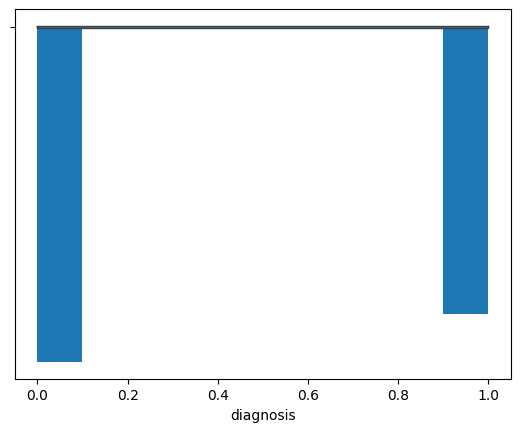

In [13]:
data['diagnosis'].describe()

sns.boxplot(data = data, x = 'diagnosis')

plt.hist(data['diagnosis'])

We will separate the dataset into numeric and categrical features so we can better visualize them

In [14]:
numeric_features = ['age', 'rest_bp', 'cholesterol', 'max_hr', 'st_depression', 'diagnosis']

cat_features = ['gender', 'chest_pain', 'fasting_bs', 'rest_ecg', 'exercise_angina', 'st_slope', 'num_vessels', 'thalassemia']

print("Numeric features:", numeric_features)
print("Categorical features:", cat_features)

Numeric features: ['age', 'rest_bp', 'cholesterol', 'max_hr', 'st_depression', 'diagnosis']
Categorical features: ['gender', 'chest_pain', 'fasting_bs', 'rest_ecg', 'exercise_angina', 'st_slope', 'num_vessels', 'thalassemia']


In [15]:
data_numeric = data[numeric_features]

data_cat = data[cat_features]

We will make a heatmap with the numerical values so we can observe which features are more relevant to the target variable, the diagnosis.

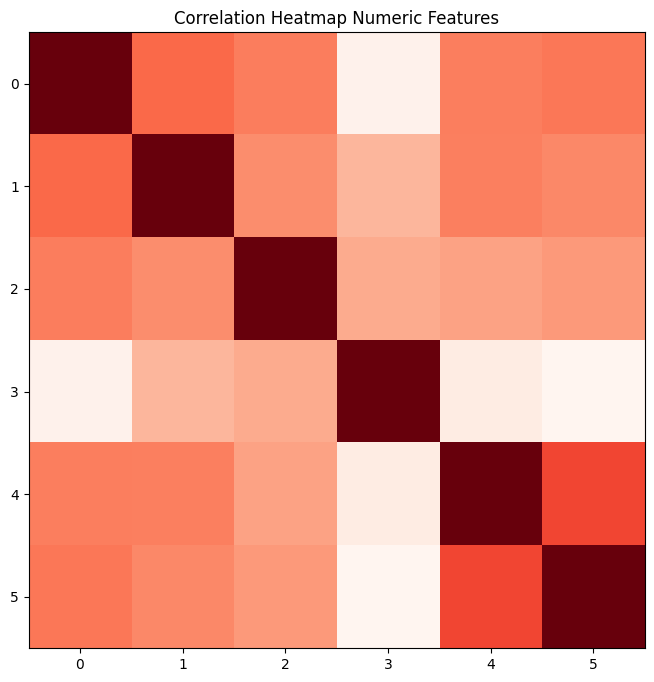

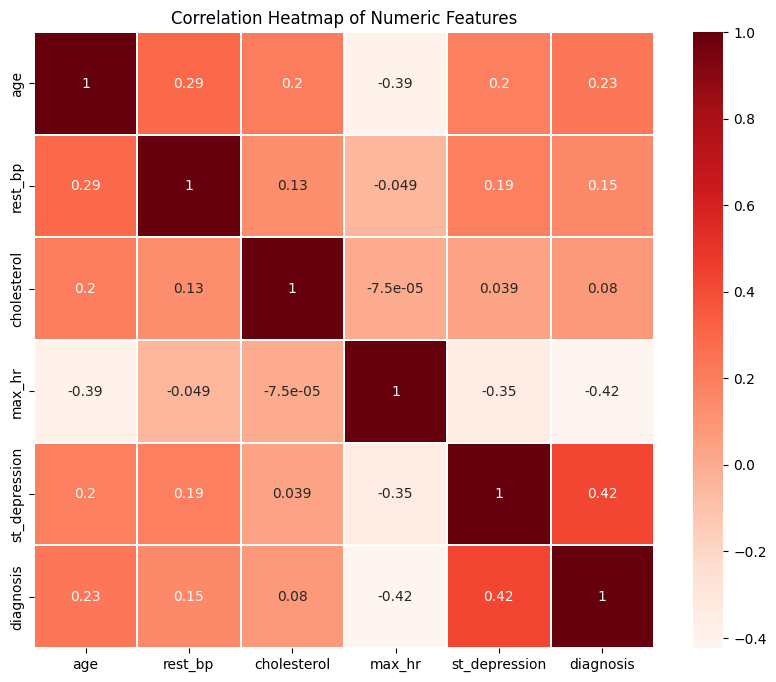

In [16]:
corr_data_numeric = data_numeric.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr_data_numeric, cmap ='Reds')
plt.title('Correlation Heatmap Numeric Features')
plt.show()

#Using sns:

plt.figure(figsize=(10, 8))
sns.heatmap(corr_data_numeric, annot=True, cmap='Reds', linewidths=0.1)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


We will now draw boxplots, histograms and QQ plots for all the numerical variables in the Dataset so we can check for normal Distribution and better understand the Dataset.

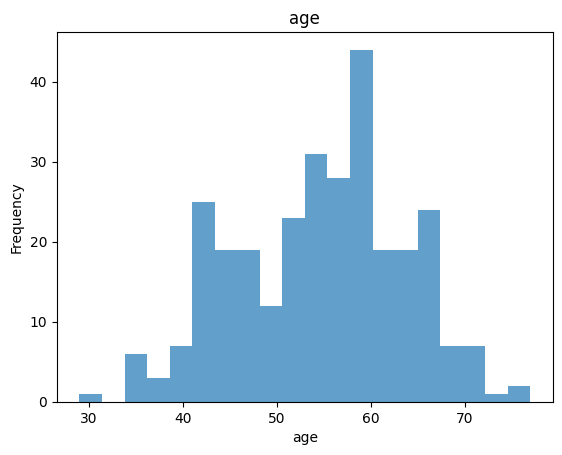

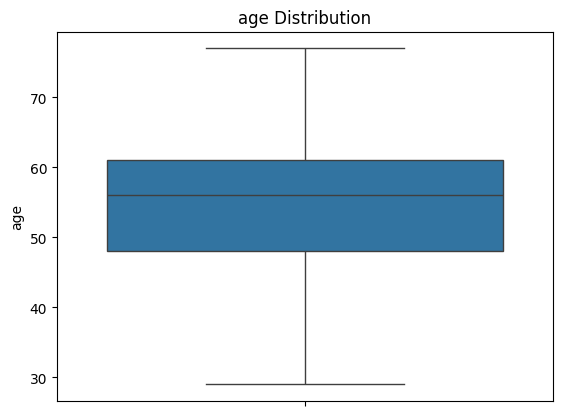

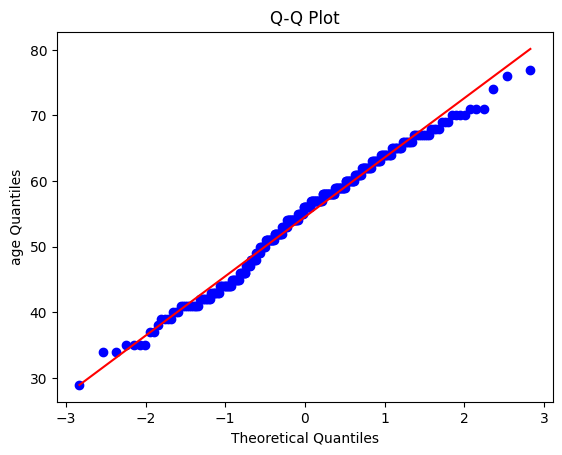

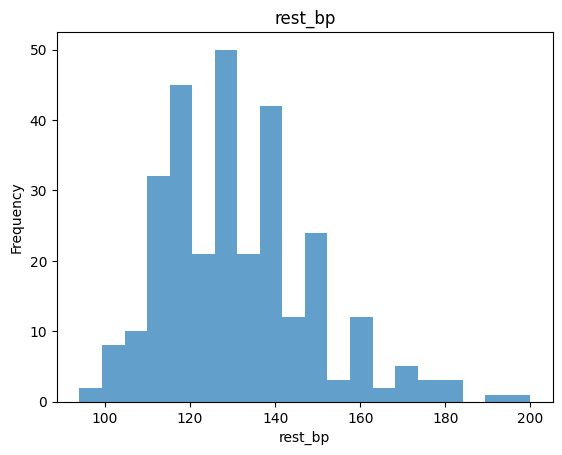

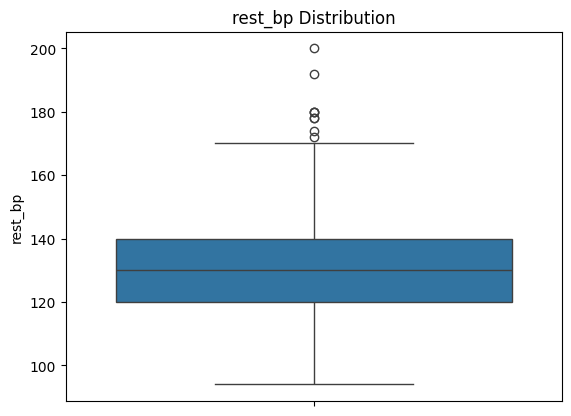

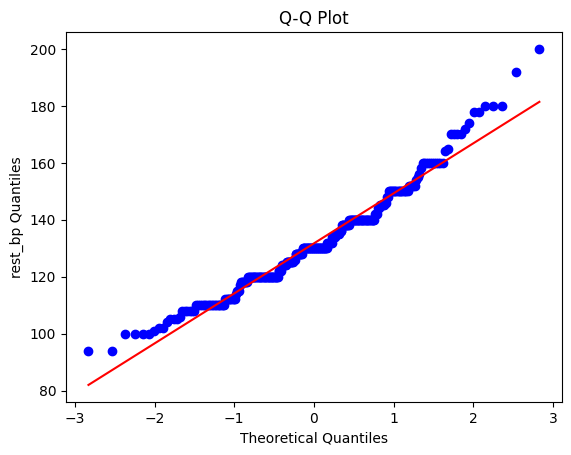

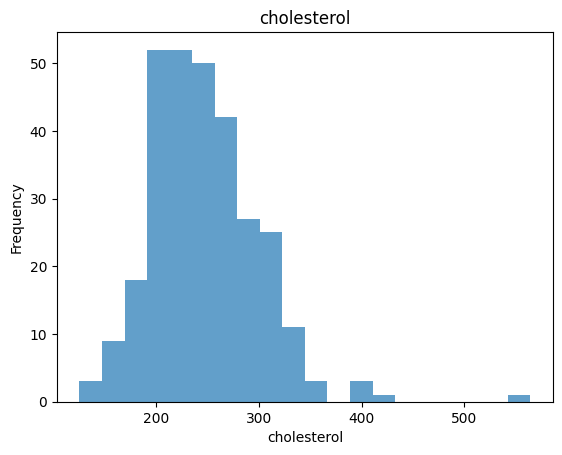

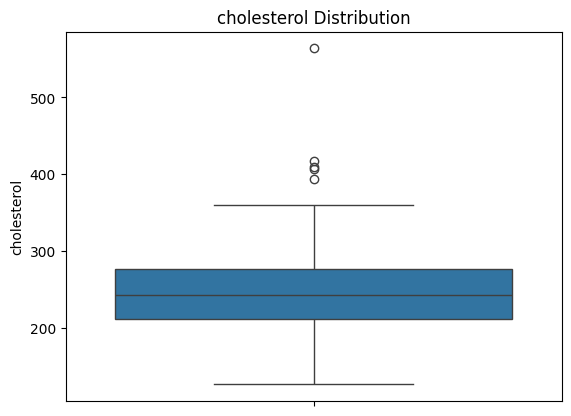

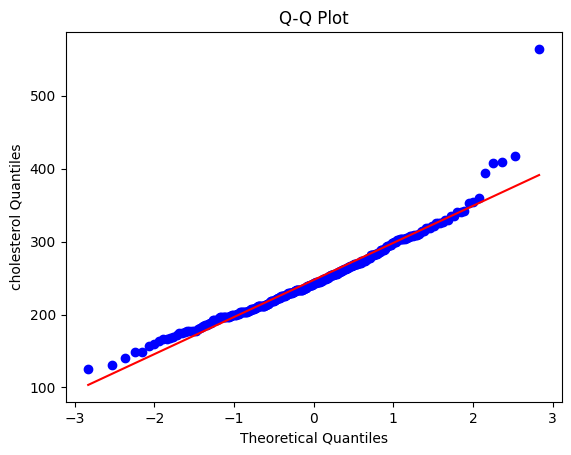

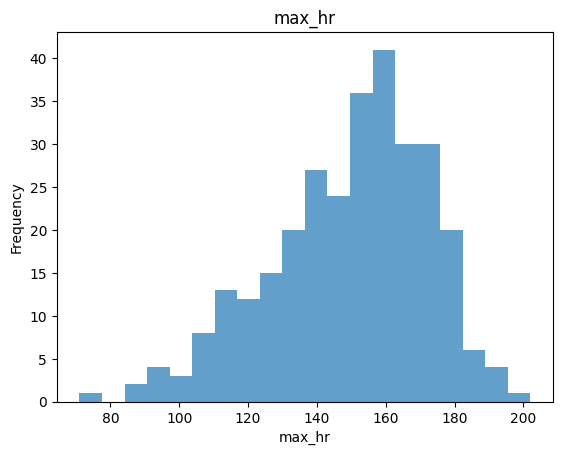

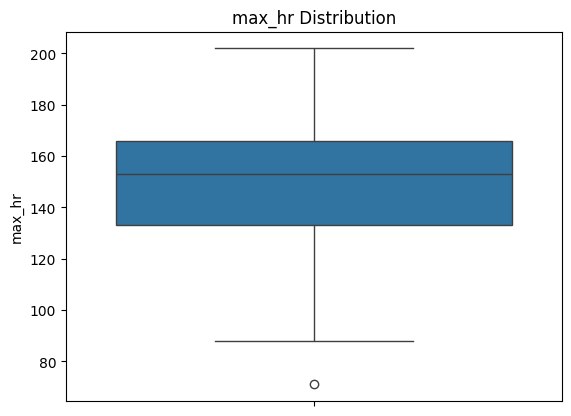

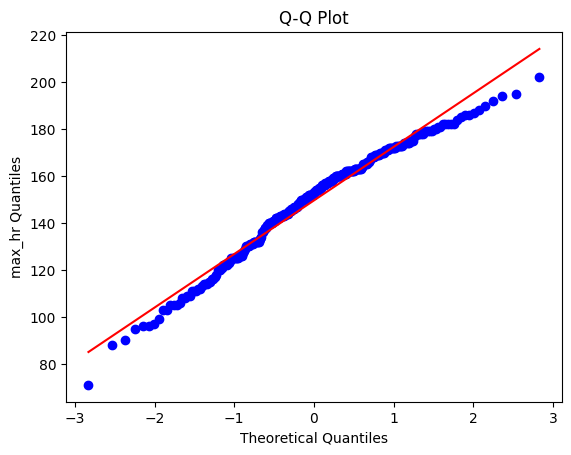

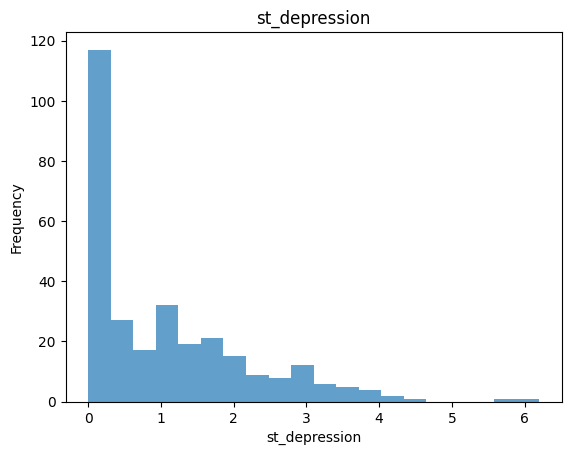

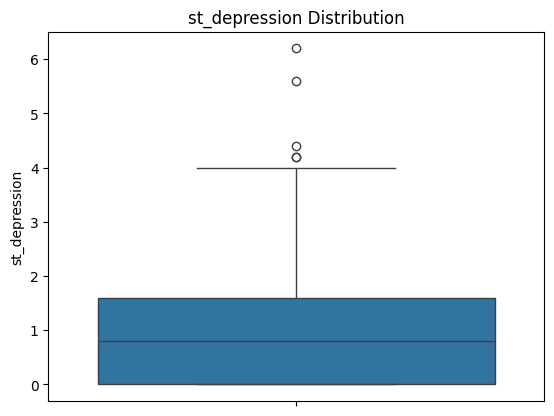

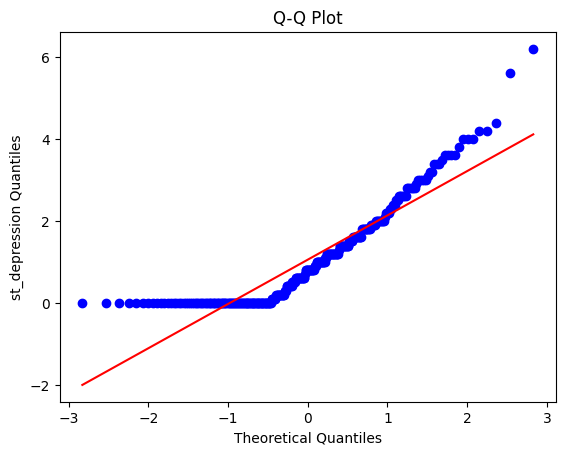

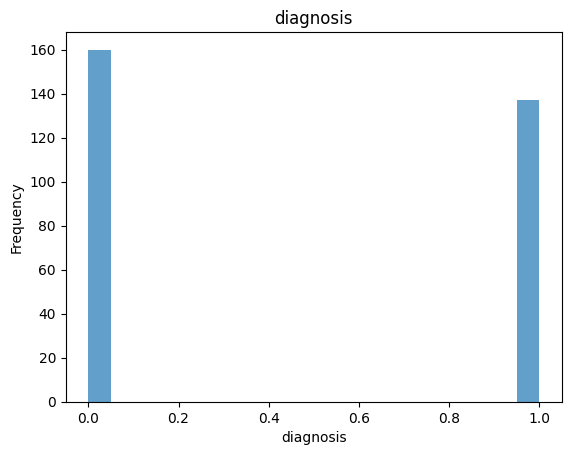

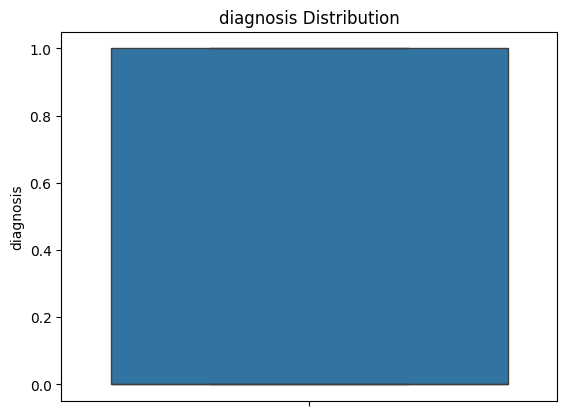

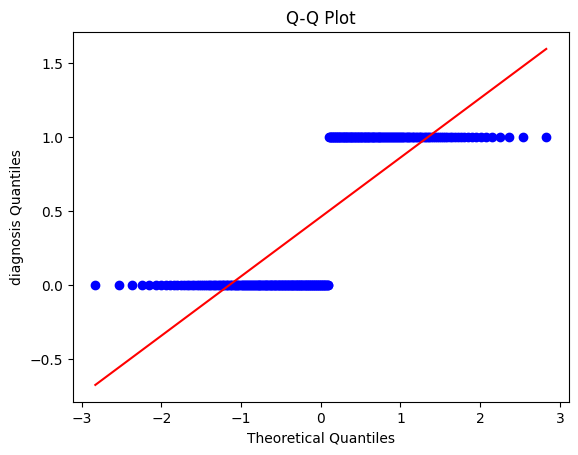

In [17]:
for column in data_numeric:

    data_numeric[column].describe()

    plt.hist(data_numeric[column], bins=20, alpha=0.7)

    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'{column}')
    plt.show()

    sns.boxplot(y= data[column], data=data)
    plt.title(f'{column} Distribution')
    plt.show()

    stats.probplot(data_numeric[column], plot=plt)
    plt.title('Q-Q Plot')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel(f'{column} Quantiles')
    plt.show()

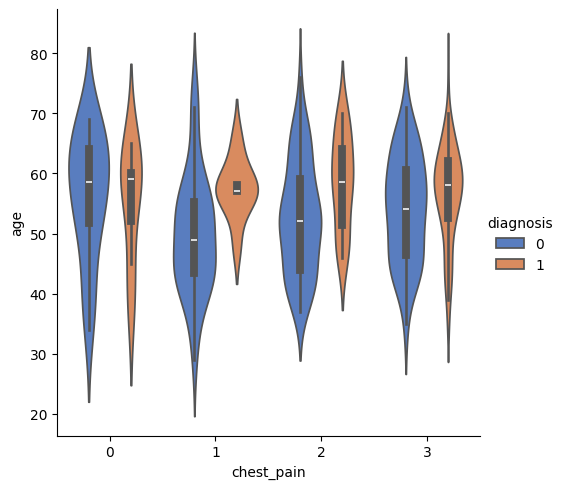

In [18]:
violinplt = sns.catplot(x='chest_pain', y='age', hue='diagnosis', kind='violin', data=data, palette='muted')

plt.show()


We will now make the Categorical Data Visualisation Analysis

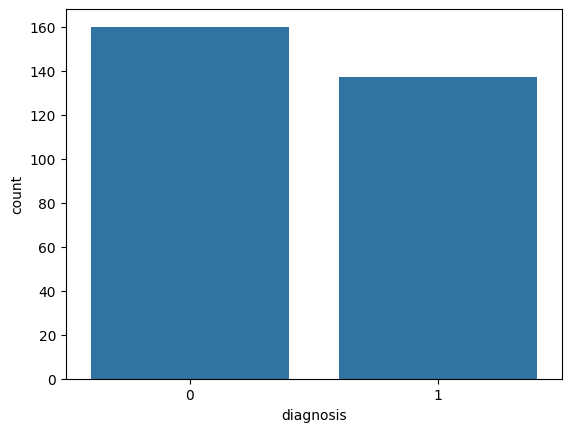

In [19]:
diagnosis_ax = sns.countplot(x='diagnosis', data = data)

plt.show()

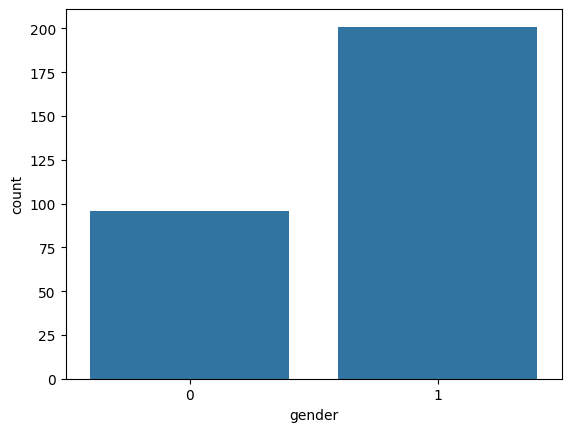

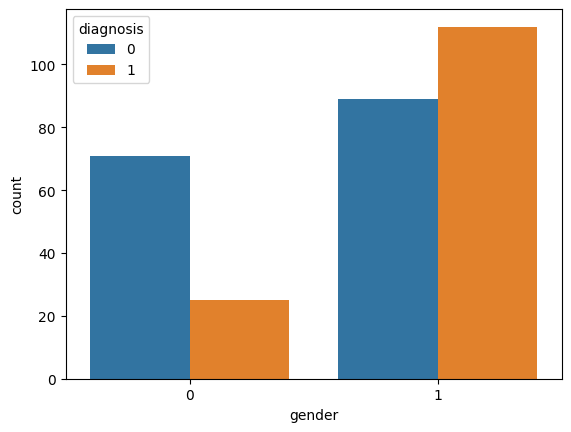

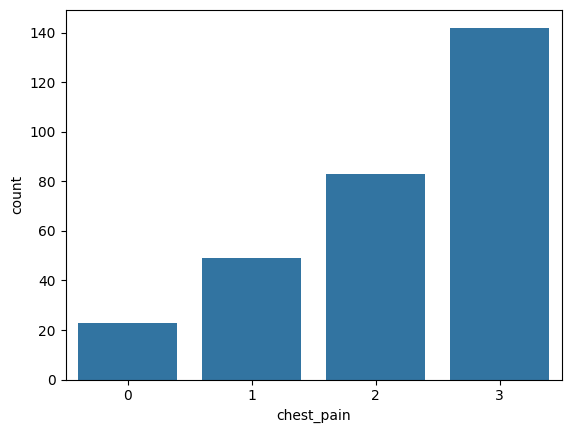

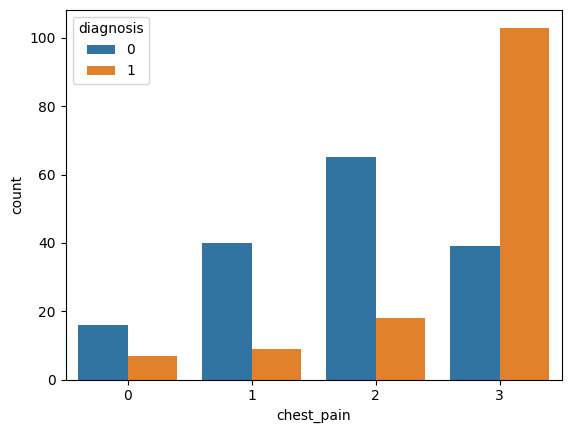

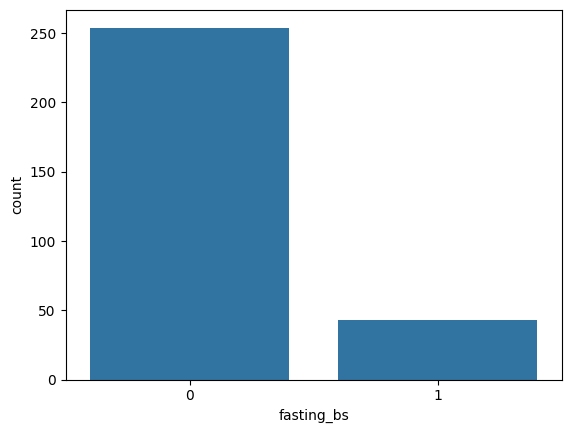

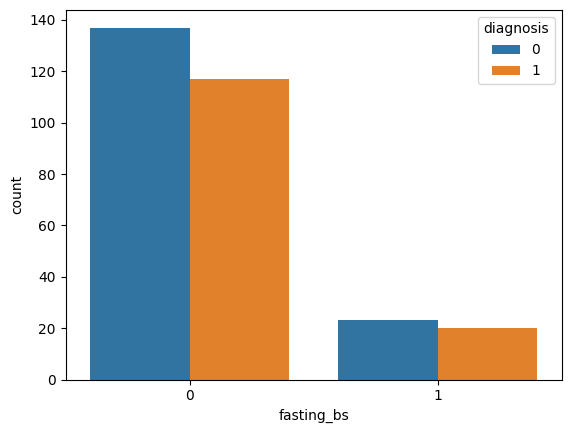

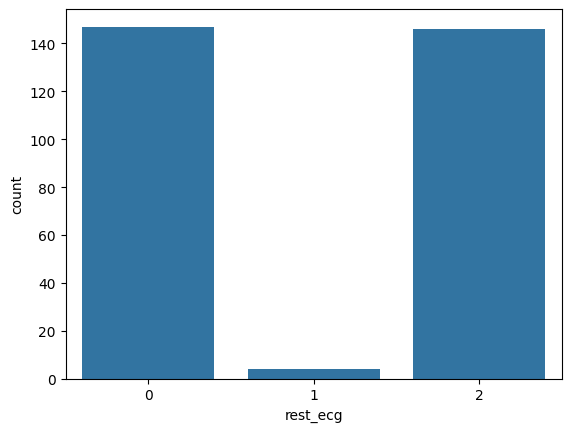

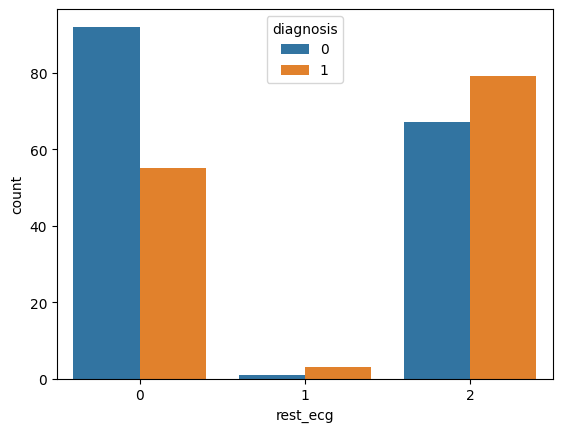

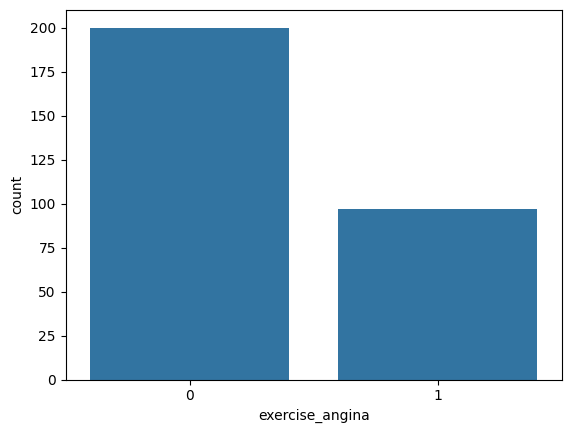

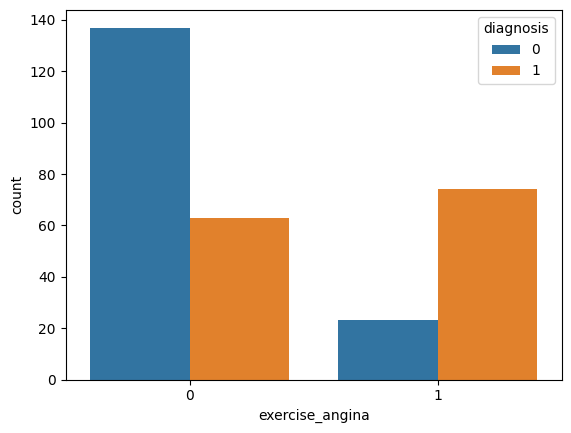

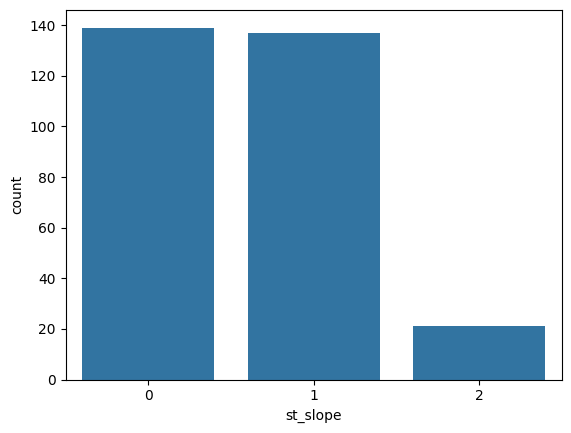

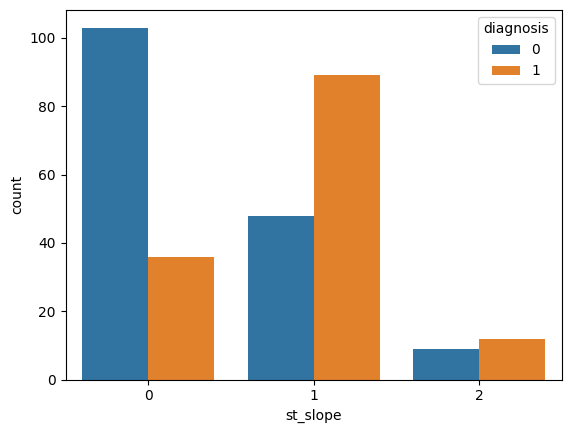

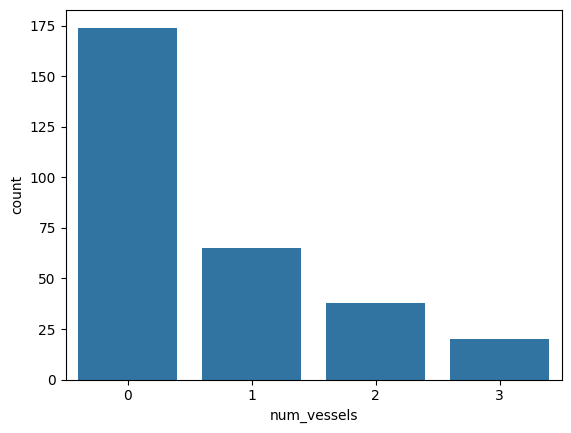

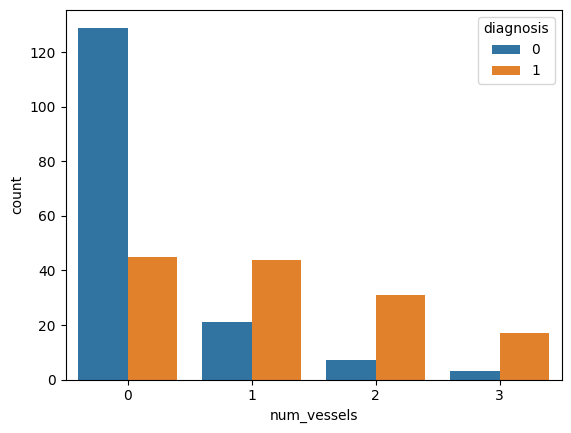

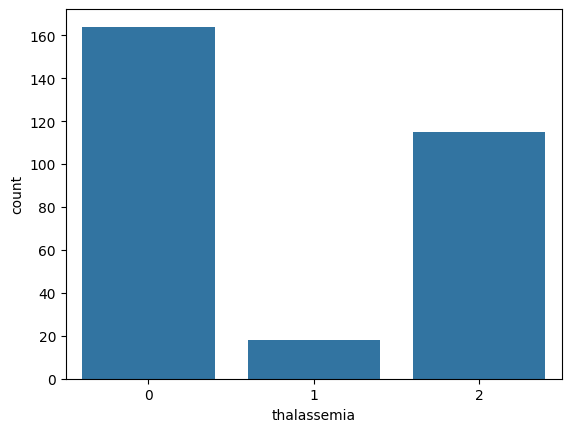

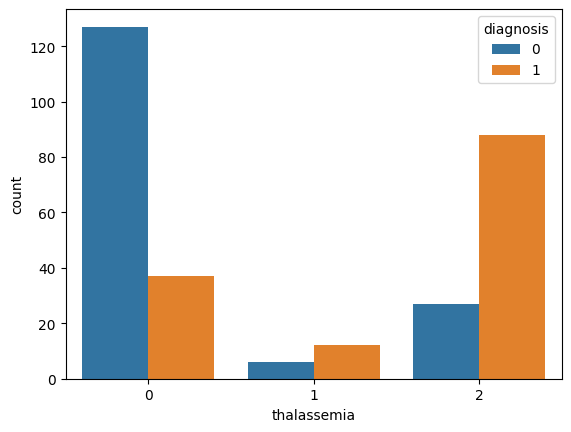

In [20]:
for i in data_cat:
  ax_1 = sns.countplot(x = i, data = data)
  plt.show()

  ax_2 = sns.countplot(x = i, hue='diagnosis', data = data)
  plt.show()

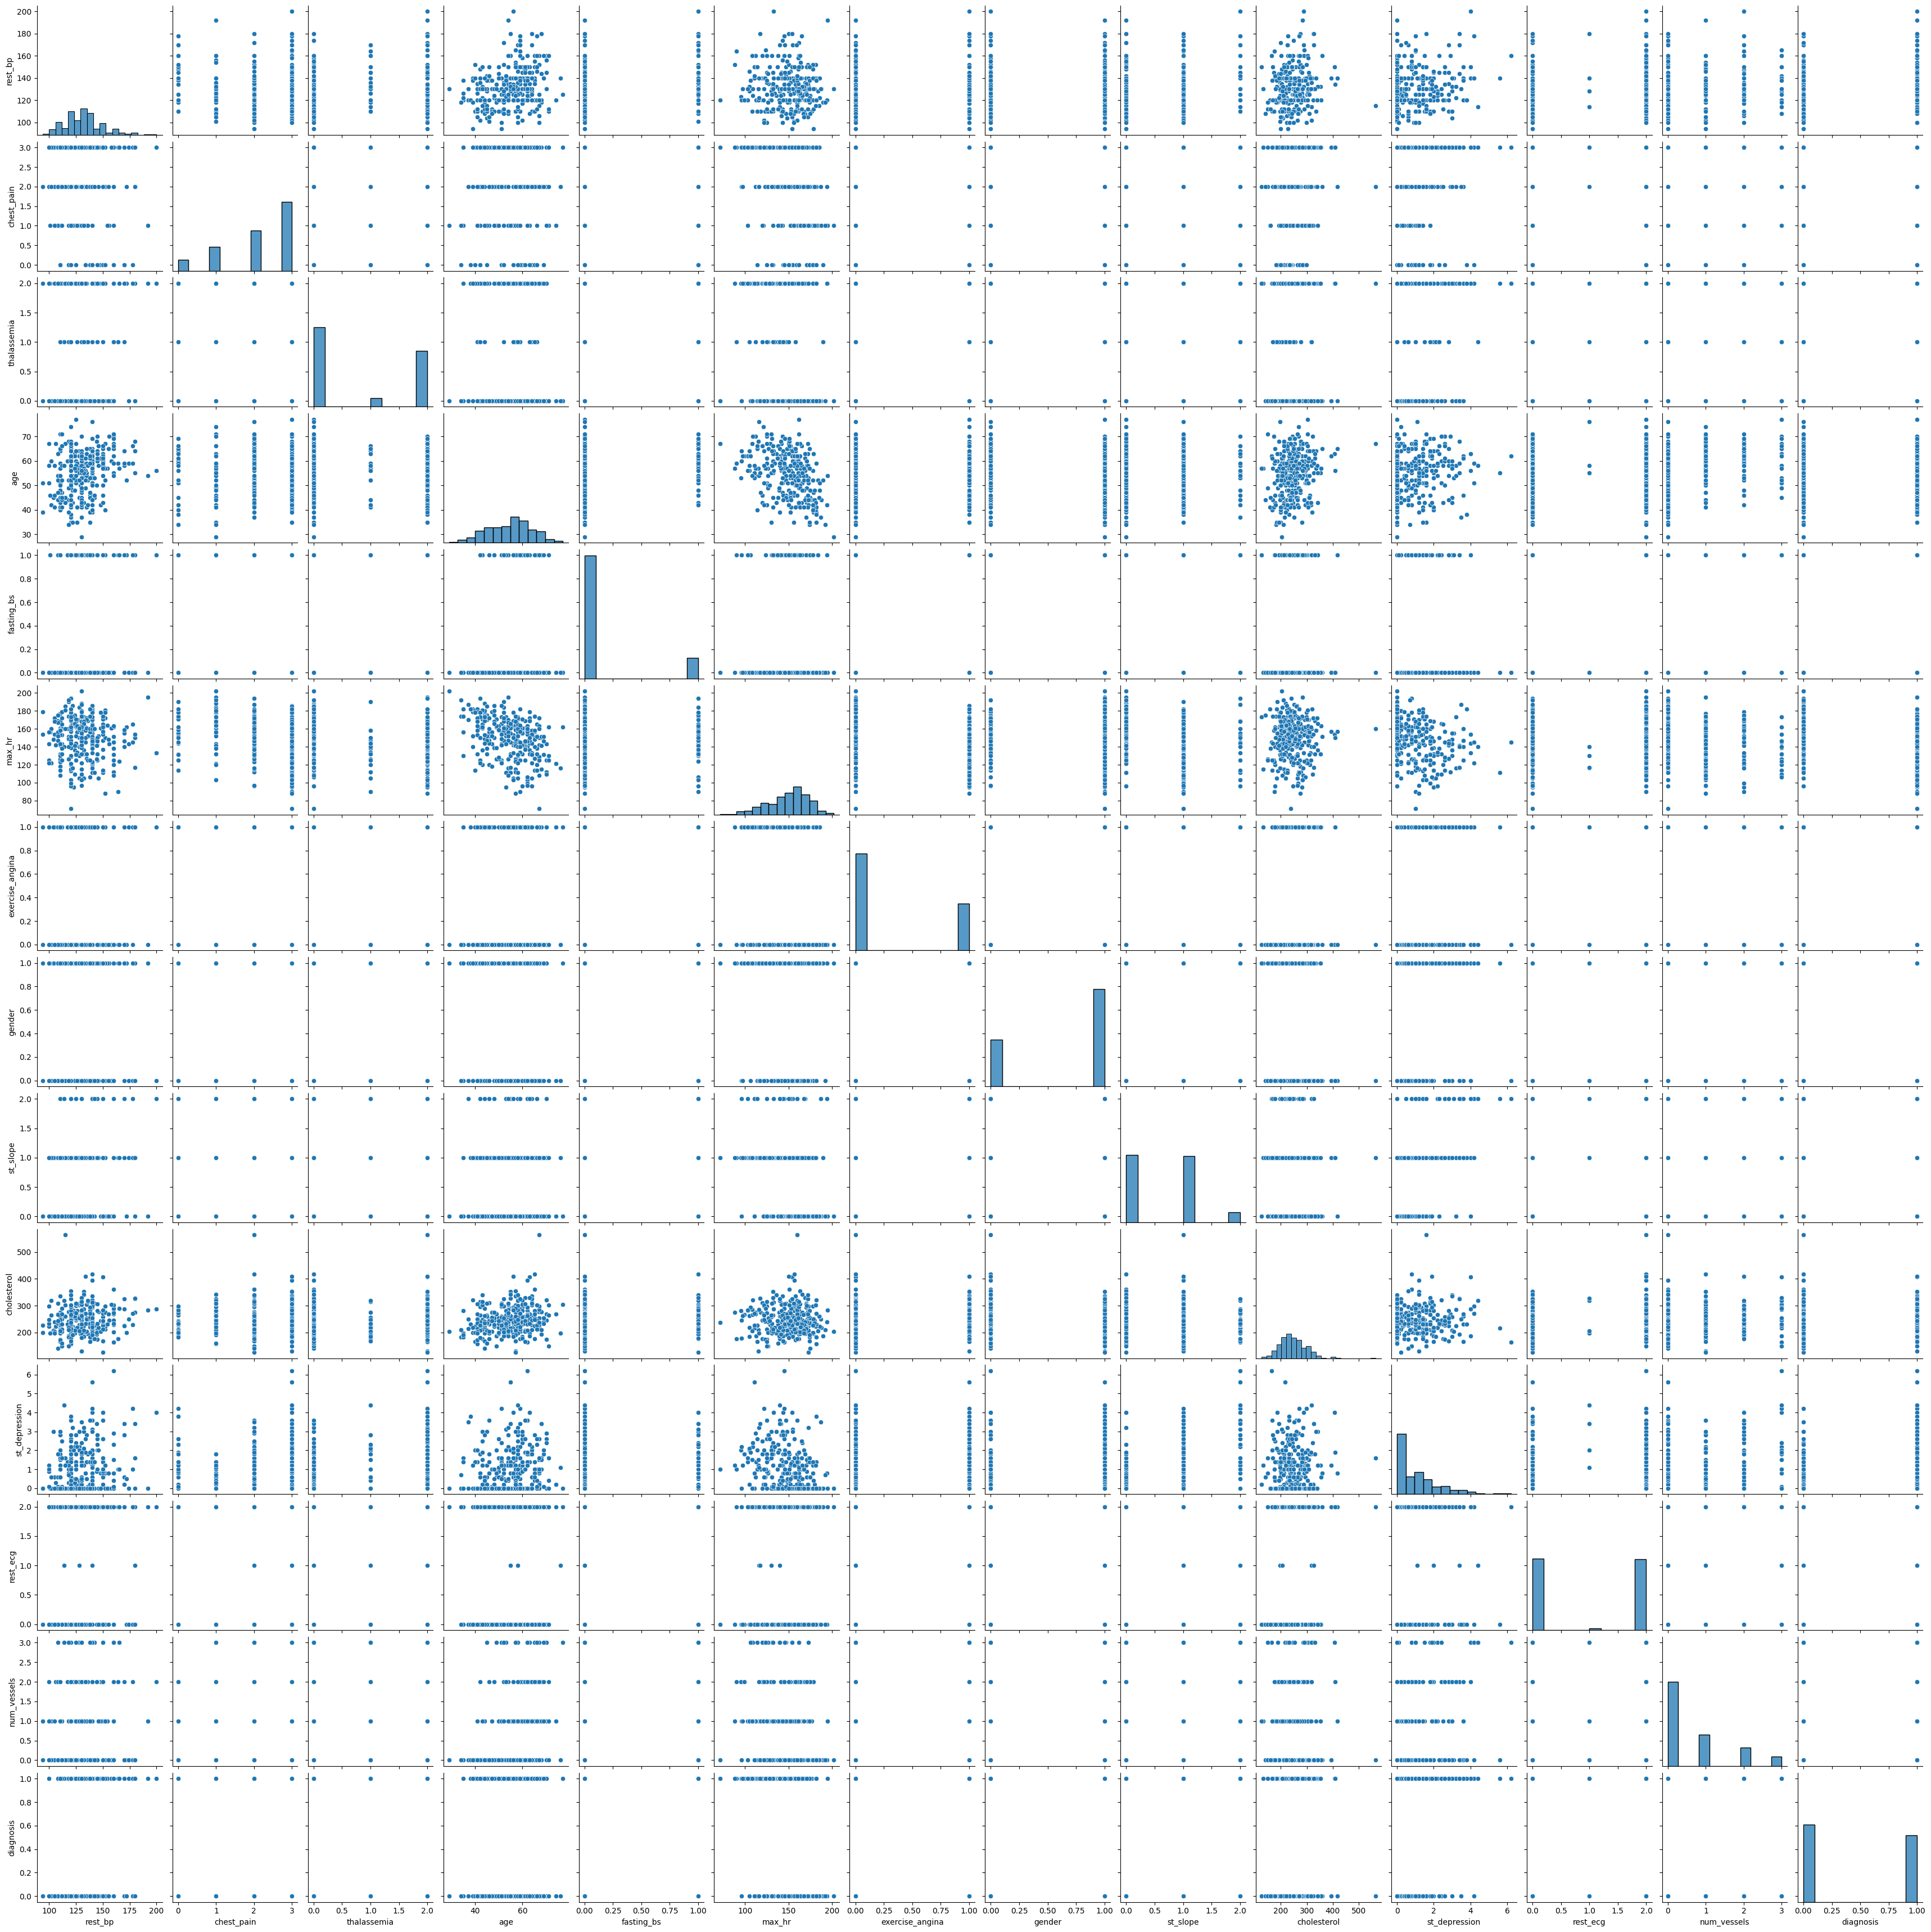

In [21]:
sns.pairplot(data)
plt.show()

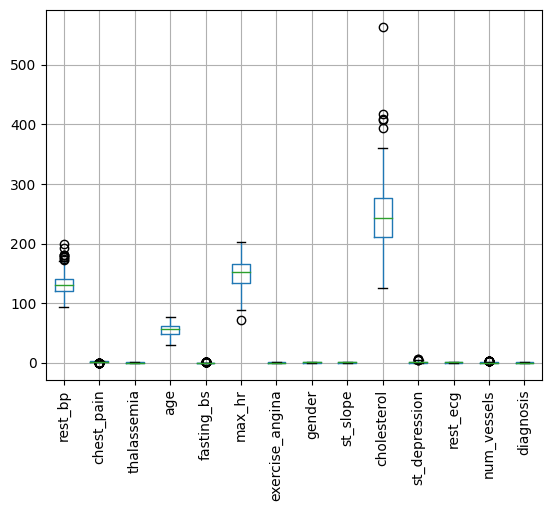

In [22]:
data.boxplot()
plt.xticks(rotation=90)
plt.show()

In [23]:
data.skew()

rest_bp            0.700070
chest_pain        -0.844412
thalassemia        0.335707
age               -0.219775
fasting_bs         2.029240
max_hr            -0.536540
exercise_angina    0.743256
gender            -0.759727
st_slope           0.510444
cholesterol        1.118096
st_depression      1.247131
rest_ecg           0.006768
num_vessels        1.179548
diagnosis          0.156138
dtype: float64

We will now check for outliers in the numerical columns.

In [24]:
for column in data_numeric:
    Q1 = data_numeric[column].quantile(0.25)
    Q3 = data_numeric[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data_numeric[(data_numeric[column]< lower_bound) | (data_numeric[column] > upper_bound)]
    percentage_outliers = (len(outliers) / len(data_numeric[column])) * 100
    print (f"Column:{column}")
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {percentage_outliers: .2f}%")
print("Outliers:")
print(outliers)
print("\n")


Column:age
Column:rest_bp
Column:cholesterol
Column:max_hr
Column:st_depression
Column:diagnosis
Number of outliers: 0
Percentage of outliers:  0.00%
Outliers:
Empty DataFrame
Columns: [age, rest_bp, cholesterol, max_hr, st_depression, diagnosis]
Index: []




In [25]:
y = data['diagnosis']
x = data.drop('diagnosis', axis=1)

We will now Standardize the Data

In [26]:
from sklearn.preprocessing import MinMaxScaler
mmax = MinMaxScaler()

data=pd.DataFrame(mmax.fit_transform(data),columns=data.columns)
data.head()

rest_bp  chest_pain  thalassemia       age  fasting_bs    max_hr  \
0  0.113208    1.000000          0.0  0.791667         0.0  0.541985   
1  0.245283    0.666667          0.0  0.437500         0.0  0.664122   
2  0.301887    1.000000          1.0  0.125000         0.0  0.648855   
3  0.528302    1.000000          1.0  0.708333         0.0  0.633588   
4  0.433962    1.000000          1.0  0.354167         0.0  0.374046   

   exercise_angina  gender  st_slope  cholesterol  st_depression  rest_ecg  \
0              0.0     0.0       0.0     0.221461       0.048387       0.0   
1              0.0     0.0       0.5     0.212329       0.258065       0.0   
2              1.0     1.0       0.0     0.356164       0.000000       1.0   
3              0.0     0.0       0.5     0.641553       0.645161       1.0   
4              1.0     1.0       0.5     0.422374       0.290323       0.0   

   num_vessels  diagnosis  
0     0.666667        0.0  
1     0.000000        0.0  
2     0.000000        1.0  
3     1.000000        1.0  
4     0.666667        1.0

We will now implement one simple Perceptron with a single hidden layer trained with standard Backpropagation Algorithm:

In [27]:
from torch import nn
import torch.nn.functional as F

In [28]:
data.shape

(297, 14)

We will now split the data into training and testing


In [29]:
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)


Firstly, we will train a simple Perceptron on the data

In [30]:
class Perceptron(nn.Module):
  def __init__(self, input_size, output_size):
    super(Perceptron, self).__init__()
    self.fc1 = nn.Linear(input_size, output_size)
    self.dropout = nn.Dropout(0.5)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.fc1(x)
    x = self.dropout(x)
    x = self.sigmoid(x)
    return x

We will now make The Multilayer Perceptron Architecture  for 1, 2 and 3 Hidden Layers

MLP1 with one Hidden Layer Architecture


In [31]:
#MLP with a single hidden layer

class MLP1(nn.Module):
  def __init__(self, input_size, hidden_size1, output_size):
    super(MLP1, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size1)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(0.5)
    self.fc2 = nn.Linear(hidden_size1, output_size)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.fc2(x)
    x = self.sigmoid(x)
    return x

MLP2 with 2 Hidden Layers

In [32]:
#MLP with two Hidden Layers

class MLP2(nn.Module):
  def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
    super(MLP2, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size1)
    self.relu1 = nn.ReLU()
    self.dropout = nn.Dropout(0.5)
    self.fc2 = nn.Linear(hidden_size1, hidden_size2)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(hidden_size2, output_size)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu1(x)
    x = self.dropout(x)
    x = self.fc2(x)
    x = self.relu2(x)
    x = self.fc3(x)
    x = self.sigmoid(x)
    return x

MLP3 with 3 Hidden Neurons

In [33]:
#MLP with three Hidden Layers

class MLP3(nn.Module):
  def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
    super(MLP3, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size1)
    self.relu1 = nn.ReLU()
    self.dropout = nn.Dropout(0.5)
    self.fc2 = nn.Linear(hidden_size1, hidden_size2)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(hidden_size2, hidden_size3)
    self.relu3 = nn.ReLU()
    self.fc4 = nn.Linear(hidden_size3, output_size)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu1(x)
    x = self.dropout(x)
    x = self.fc2(x)
    x = self.relu2(x)
    x = self.fc3(x)
    x = self.relu3(x)
    x = self.fc4(x)
    x = self.sigmoid(x)
    return x


We will now initialize the model and set the hyperparameters

In [34]:
learning_rate = [0.001, 0.01, 0.1, 0.3]
momentum = [0.3, 0.5, 0.95]
weight_decay = (0.0, 0.01, 0.1 )
hidden_size1 = [8, 64, 128, 256]
hidden_size2 = [8, 64, 128, 256]
hidden_size3 = [8, 64, 128, 256]


In [35]:
input_size = X_train.shape[1]
output_size = 1

We will set the Loss Function

In [36]:
criterion = nn.BCELoss()


In [37]:
y_train = y_train.view(-1, 1)

First, we will start with training the Simple Perceptron on the Dataset

Epoch [10/50], Loss: 0.6720
Epoch [20/50], Loss: 0.6640
Epoch [30/50], Loss: 0.6586
Epoch [40/50], Loss: 0.6595
Epoch [50/50], Loss: 0.6660
Accuracy on the test set: 0.5333
Precision: 0.4667
Recall: 0.2593
F1 Score: 0.3333
Epoch [10/50], Loss: 0.7620
Epoch [20/50], Loss: 0.7388
Epoch [30/50], Loss: 0.7662
Epoch [40/50], Loss: 0.7246
Epoch [50/50], Loss: 0.7595
Accuracy on the test set: 0.5500
Precision: 0.5000
Recall: 0.0370
F1 Score: 0.0690
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6741
Epoch [30/50], Loss: 0.6699
Epoch [40/50], Loss: 0.6708
Epoch [50/50], Loss: 0.6845
Accuracy on the test set: 0.6333
Precision: 0.7778
Recall: 0.2593
F1 Score: 0.3889
Epoch [10/50], Loss: 0.7020
Epoch [20/50], Loss: 0.6967
Epoch [30/50], Loss: 0.7108
Epoch [40/50], Loss: 0.7076
Epoch [50/50], Loss: 0.6946
Accuracy on the test set: 0.6000
Precision: 0.5429
Recall: 0.7037
F1 Score: 0.6129
Epoch [10/50], Loss: 0.7296
Epoch [20/50], Loss: 0.7216
Epoch [30/50], Loss: 0.7206
Epoch [40/50], Loss: 0.7

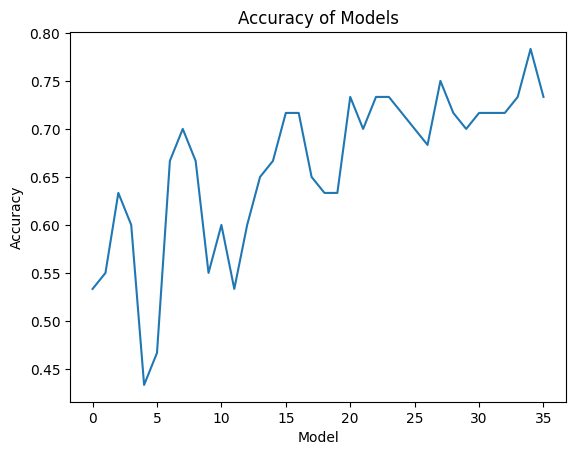

In [38]:
best_accuracy = 0.0
best_hyperparameters = None
accuracy_values = []
for i, lr in enumerate(learning_rate):
  for m, mt in enumerate(momentum):
    for w, wd in enumerate(weight_decay):
      model = Perceptron(input_size, output_size)
      optimizer = optim.SGD(model.parameters(), lr=lr, momentum=mt, weight_decay=wd)

      model.train()

      epochs = 50

      for epoch in range(epochs):
          y_pred = model(X_train)
          loss = criterion(y_pred, y_train)

          #Backpropagation

          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          if (epoch + 1) % 10 == 0:
                  print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


      with torch.no_grad():
        model.eval()
        output = model(X_test)
        predictions = (output > 0.5).float()
        accuracy = accuracy_score(y_test.numpy(), predictions.numpy())
        accuracy_values.append(accuracy)
        precision = precision_score(y_test.numpy(), predictions.numpy())
        recall = recall_score(y_test.numpy(), predictions.numpy())
        f1 = f1_score(y_test.numpy(), predictions.numpy())

        print(f'Accuracy on the test set: {accuracy:.4f}')
        print(f'Precision: {precision:.4f}')
        print(f'Recall: {recall:.4f}')
        print(f'F1 Score: {f1:.4f}')

      if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_hyperparameters = (lr, mt, wd)

print("Best Accuracy:", best_accuracy)
print("Best Hyperparameters:", best_hyperparameters)

plt.plot(accuracy_values)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()


We will now conduct a grid search using the various values for  hidden layer sizes, momentum and learning rates for the three different MLP architectures: the ones containing 1, 2 and 3 neurons.


We will start with the MLP with a single hidden layer. We will just print the loss of each 10 epochs and the model performance.

MLP1 one hidden layer

Epoch [100/1000], Loss: 0.7024
Epoch [200/1000], Loss: 0.7007
Epoch [300/1000], Loss: 0.6989
Epoch [400/1000], Loss: 0.6985
Epoch [500/1000], Loss: 0.6978
Epoch [600/1000], Loss: 0.6956
Epoch [700/1000], Loss: 0.6959
Epoch [800/1000], Loss: 0.6961
Epoch [900/1000], Loss: 0.6953
Epoch [1000/1000], Loss: 0.6927
Accuracy on the test set: 0.5000
Precision: 0.4727
Recall: 0.9630
F1 Score: 0.6341
Epoch [100/1000], Loss: 0.7025
Epoch [200/1000], Loss: 0.7026
Epoch [300/1000], Loss: 0.6965
Epoch [400/1000], Loss: 0.6898
Epoch [500/1000], Loss: 0.6925
Epoch [600/1000], Loss: 0.6852
Epoch [700/1000], Loss: 0.6893
Epoch [800/1000], Loss: 0.6824
Epoch [900/1000], Loss: 0.6829
Epoch [1000/1000], Loss: 0.6758
Accuracy on the test set: 0.5500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [100/1000], Loss: 0.7130
Epoch [200/1000], Loss: 0.7052
Epoch [300/1000], Loss: 0.7038
Epoch [400/1000], Loss: 0.7017
Epoch [500/1000], Loss: 0.7012
Epoch [600/1000], Loss: 0.6980
Epoch [700/1000], Loss: 0.6946
Epoch [800/1000], Loss: 0.6979
Epoch [900/1000], Loss: 0.6966
Epoch [1000/1000], Loss: 0.6948
Accuracy on the test set: 0.5500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [100/1000], Loss: 0.7063
Epoch [200/1000], Loss: 0.6976
Epoch [300/1000], Loss: 0.6928
Epoch [400/1000], Loss: 0.6776
Epoch [500/1000], Loss: 0.6779
Epoch [600/1000], Loss: 0.6722
Epoch [700/1000], Loss: 0.6697
Epoch [800/1000], Loss: 0.6648
Epoch [900/1000], Loss: 0.6572
Epoch [1000/1000], Loss: 0.6535
Accuracy on the test set: 0.5833
Precision: 0.5238
Recall: 0.8148
F1 Score: 0.6377
Epoch [100/1000], Loss: 0.6823
Epoch [200/1000], Loss: 0.6897
Epoch [300/1000], Loss: 0.6878
Epoch [400/1000], Loss: 0.6653
Epoch [500/1000], Loss: 0.6663
Epoch [600/1000], Loss: 0.6588
Epoch [700/1000], Loss: 0.6550
Epoch [800/1000], Loss: 0.6613
Epoch [900/1000], Loss: 0.6587
Epoch [1000/1000], Loss: 0.6550
Accuracy on the test set: 0.6000
Precision: 0.5405
Recall: 0.7407
F1 Score: 0.6250
Epoch [100/1000], Loss: 0.6831
Epoch [200/1000], Loss: 0.6822
Epoch [300/1000], Loss: 0.6747
Epoch [400/1000], Loss: 0.6719
Epoch [500/1000], Loss: 0.6757
Epoch [600/1000], Loss: 0.6685
Epoch [700/1000], Loss: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [100/1000], Loss: 0.7023
Epoch [200/1000], Loss: 0.6824
Epoch [300/1000], Loss: 0.6567
Epoch [400/1000], Loss: 0.6547
Epoch [500/1000], Loss: 0.6144
Epoch [600/1000], Loss: 0.5918
Epoch [700/1000], Loss: 0.6110
Epoch [800/1000], Loss: 0.5884
Epoch [900/1000], Loss: 0.5352
Epoch [1000/1000], Loss: 0.5465
Accuracy on the test set: 0.7333
Precision: 0.7200
Recall: 0.6667
F1 Score: 0.6923
Epoch [100/1000], Loss: 0.6893
Epoch [200/1000], Loss: 0.6782
Epoch [300/1000], Loss: 0.6760
Epoch [400/1000], Loss: 0.6672
Epoch [500/1000], Loss: 0.6589
Epoch [600/1000], Loss: 0.6590
Epoch [700/1000], Loss: 0.6545
Epoch [800/1000], Loss: 0.6493
Epoch [900/1000], Loss: 0.6413
Epoch [1000/1000], Loss: 0.6382
Accuracy on the test set: 0.6667
Precision: 0.6842
Recall: 0.4815
F1 Score: 0.5652
Epoch [100/1000], Loss: 0.6426
Epoch [200/1000], Loss: 0.6043
Epoch [300/1000], Loss: 0.5709
Epoch [400/1000], Loss: 0.5217
Epoch [500/1000], Loss: 0.4886
Epoch [600/1000], Loss: 0.4537
Epoch [700/1000], Loss: 0.

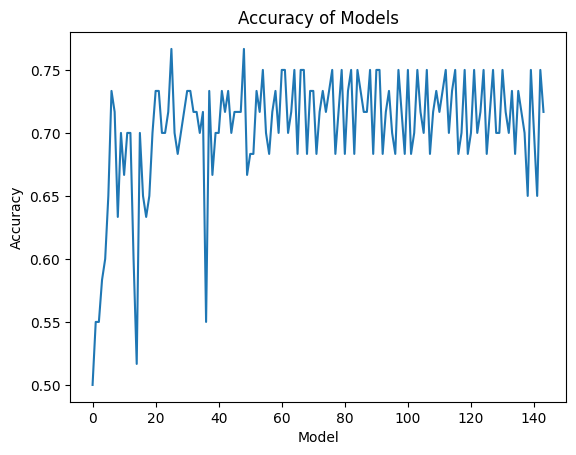

In [41]:
best_accuracy = 0.0
best_hyperparameters = None

# Lists to store results for plotting
accuracy_values = []

for i, lr in enumerate(learning_rate):
  for m, mt in enumerate(momentum):
    for j, hs1 in enumerate(hidden_size1):
      for w, wd in enumerate(weight_decay):
        model = MLP1(input_size, hs1, output_size)  # Create a new model for each combination of hyperparameters
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=mt, weight_decay=wd)

        model.train()

        epochs = 1000

        for epoch in range(epochs):
          y_pred = model(X_train)
          loss = criterion(y_pred, y_train)

          #Backpropagation

          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          if (epoch + 1) % 100 == 0:
                  print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


        with torch.no_grad():
          model.eval()
          outputs = model(X_test)
          predictions = (outputs > 0.5).float()
          accuracy = accuracy_score(y_test.numpy(), predictions.numpy())
          accuracy_values.append(accuracy)
          precision = precision_score(y_test.numpy(), predictions.numpy())
          recall = recall_score(y_test.numpy(), predictions.numpy())
          f1 = f1_score(y_test.numpy(), predictions.numpy())


          print(f'Accuracy on the test set: {accuracy:.4f}')
          print(f'Precision: {precision:.4f}')
          print(f'Recall: {recall:.4f}')
          print(f'F1 Score: {f1:.4f}')

        if accuracy > best_accuracy:
          best_accuracy = accuracy
          best_hyperparameters = (lr, mt, hs1, wd)

print("Best Accuracy:", best_accuracy)
print("Best Hyperparameters:", best_hyperparameters)

plt.plot(accuracy_values)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()

MLP with 1 hidden layer with Cross Validation.

Epoch [50/50], Loss: 0.7023
Accuracy on the test set: 0.4000
Precision: 0.4000
Recall: 1.0000
F1 Score: 0.5714
Epoch [50/50], Loss: 0.7066
Accuracy on the test set: 0.4167
Precision: 0.4310
Recall: 0.9259
F1 Score: 0.5882
Epoch [50/50], Loss: 0.6989
Accuracy on the test set: 0.4068
Precision: 0.3585
Recall: 0.9500
F1 Score: 0.5205
Epoch [50/50], Loss: 0.7169
Accuracy on the test set: 0.5424
Precision: 0.5424
Recall: 1.0000
F1 Score: 0.7033
Epoch [50/50], Loss: 0.6677
Accuracy on the test set: 0.4407
Precision: 1.0000
Recall: 0.0294
F1 Score: 0.0571
Epoch [50/50], Loss: 0.7092
Accuracy on the test set: 0.3667
Precision: 0.2500
Recall: 0.0938
F1 Score: 0.1364
Epoch [50/50], Loss: 0.7115
Accuracy on the test set: 0.5667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [50/50], Loss: 0.7025
Accuracy on the test set: 0.4746
Precision: 0.4545
Recall: 0.9615
F1 Score: 0.6173
Epoch [50/50], Loss: 0.6971
Accuracy on the test set: 0.4068
Precision: 0.4375
Recall: 0.7241
F1 Score: 0.5455
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.5254
Recall: 1.0000
F1 Score: 0.6889
Epoch [50/50], Loss: 0.6962
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [50/50], Loss: 0.6578
Accuracy on the test set: 0.6833
Precision: 0.5581
Recall: 1.0000
F1 Score: 0.7164
Epoch [50/50], Loss: 0.6920
Accuracy on the test set: 0.5000
Precision: 0.5333
Recall: 0.5000
F1 Score: 0.5161
Epoch [50/50], Loss: 0.6930
Accuracy on the test set: 0.4746
Precision: 0.5000
Recall: 0.2581
F1 Score: 0.3404
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.5593
Precision: 0.5111
Recall: 0.8519
F1 Score: 0.6389
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.6441
Precision: 1.0000
Recall: 0.0870
F1 Score: 0.1600
Epoch [50/50], Loss: 0.7085
Accuracy on the test set: 0.5833
Precision: 0.5763
Recall: 1.0000
F1 Score: 0.7312
Epoch [50/50], Loss: 0.7011
Accuracy on the test set: 0.3833
Precision: 0.2609
Recall: 0.2308
F1 Score: 0.2449
Epoch [50/50], Loss: 0.6866
Accuracy on the test set: 0.4407


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6951
Accuracy on the test set: 0.5932
Precision: 0.5660
Recall: 0.9677
F1 Score: 0.7143
Epoch [50/50], Loss: 0.6740
Accuracy on the test set: 0.6102
Precision: 0.8333
Recall: 0.1852
F1 Score: 0.3030
Epoch [50/50], Loss: 0.6978
Accuracy on the test set: 0.4000
Precision: 0.3966
Recall: 0.9583
F1 Score: 0.5610
Epoch [50/50], Loss: 0.6997
Accuracy on the test set: 0.5333
Precision: 0.5385
Recall: 0.8750
F1 Score: 0.6667
Epoch [50/50], Loss: 0.7020
Accuracy on the test set: 0.5254
Precision: 0.5000
Recall: 0.1071
F1 Score: 0.1765
Epoch [50/50], Loss: 0.6792
Accuracy on the test set: 0.7458
Precision: 0.7097
Recall: 0.7857
F1 Score: 0.7458
Epoch [50/50], Loss: 0.6980
Accuracy on the test set: 0.3898
Precision: 0.3226
Recall: 0.4000
F1 Score: 0.3571
Epoch [50/50], Loss: 0.6975
Accuracy on the test set: 0.4667
Precision: 0.4667
Recall: 1.0000
F1 Score: 0.6364
Epoch [50/50], Loss: 0.6843
Accuracy on the test set: 0.3833
Precision: 0.3833
Recall: 1.0000
F1 Score: 0.5542
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.7118
Accuracy on the test set: 0.4333
Precision: 0.4333
Recall: 1.0000
F1 Score: 0.6047
Epoch [50/50], Loss: 0.7030
Accuracy on the test set: 0.4407
Precision: 0.4286
Recall: 0.6667
F1 Score: 0.5217
Epoch [50/50], Loss: 0.6826
Accuracy on the test set: 0.5424
Precision: 0.5000
Recall: 0.1111
F1 Score: 0.1818
Epoch [50/50], Loss: 0.6962
Accuracy on the test set: 0.4576
Precision: 0.4576
Recall: 1.0000
F1 Score: 0.6279
Epoch [50/50], Loss: 0.6946
Accuracy on the test set: 0.6000
Precision: 0.5000
Recall: 0.0417
F1 Score: 0.0769
Epoch [50/50], Loss: 0.6929
Accuracy on the test set: 0.4667
Precision: 0.4583
Recall: 0.7857
F1 Score: 0.5789
Epoch [50/50], Loss: 0.7035
Accuracy on the test set: 0.4068
Precision: 0.4167
Recall: 0.5172
F1 Score: 0.4615
Epoch [50/50], Loss: 0.7099
Accuracy on the test set: 0.3390
Precision: 0.4222
Recall: 0.5938
F1 Score: 0.4935
Epoch [50/50], Loss: 0.7007
Accuracy on the test set: 0.4237
Precision: 0.3333
Recall: 0.4167
F1 Score: 0.3704
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.4915
Recall: 1.0000
F1 Score: 0.6591
Epoch [50/50], Loss: 0.6917
Accuracy on the test set: 0.6167
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [50/50], Loss: 0.6865
Accuracy on the test set: 0.4833
Precision: 0.4444
Recall: 0.7692
F1 Score: 0.5634


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6761
Accuracy on the test set: 0.6441
Precision: 0.5625
Recall: 0.3913
F1 Score: 0.4615
Epoch [50/50], Loss: 0.7034
Accuracy on the test set: 0.4576
Precision: 0.5000
Recall: 0.0938
F1 Score: 0.1579
Epoch [50/50], Loss: 0.6941
Accuracy on the test set: 0.4407
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6990
Accuracy on the test set: 0.5833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [50/50], Loss: 0.6931
Accuracy on the test set: 0.4667
Precision: 0.4483
Recall: 1.0000
F1 Score: 0.6190
Epoch [50/50], Loss: 0.6757
Accuracy on the test set: 0.4915
Precision: 0.4737
Recall: 1.0000
F1 Score: 0.6429
Epoch [50/50], Loss: 0.6853
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [50/50], Loss: 0.6977
Accuracy on the test set: 0.5593
Precision: 0.6364
Recall: 0.4375
F1 Score: 0.5185
Epoch [50/50], Loss: 0.6925
Accuracy on the test set: 0.5833
Precision: 0.5128
Recall: 0.7692
F1 Score: 0.6154


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.7123
Accuracy on the test set: 0.4833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [50/50], Loss: 0.6830
Accuracy on the test set: 0.4915
Precision: 0.4643
Recall: 0.4643
F1 Score: 0.4643
Epoch [50/50], Loss: 0.6962
Accuracy on the test set: 0.3898
Precision: 0.3500
Recall: 0.5833
F1 Score: 0.4375


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6891
Accuracy on the test set: 0.4915
Precision: 0.4000
Recall: 0.1429
F1 Score: 0.2105
Epoch [50/50], Loss: 0.6990
Accuracy on the test set: 0.5500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [50/50], Loss: 0.7173
Accuracy on the test set: 0.3833
Precision: 0.3833
Recall: 1.0000
F1 Score: 0.5542
Epoch [50/50], Loss: 0.6945
Accuracy on the test set: 0.4407
Precision: 0.4444
Recall: 0.8889
F1 Score: 0.5926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.7086
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [50/50], Loss: 0.6853
Accuracy on the test set: 0.4407
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.4500
Precision: 0.4500
Recall: 1.0000
F1 Score: 0.6207


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.5333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.5593
Precision: 0.7143
Recall: 0.1724
F1 Score: 0.2778
Epoch [50/50], Loss: 0.6988
Accuracy on the test set: 0.3898
Precision: 0.3654
Recall: 0.8636
F1 Score: 0.5135
Epoch [50/50], Loss: 0.6905
Accuracy on the test set: 0.5254
Precision: 1.0000
Recall: 0.0968
F1 Score: 0.1765
Epoch [50/50], Loss: 0.7038
Accuracy on the test set: 0.5000
Precision: 0.2500
Recall: 0.0357
F1 Score: 0.0625
Epoch [50/50], Loss: 0.7031
Accuracy on the test set: 0.4833
Precision: 0.4833
Recall: 1.0000
F1 Score: 0.6517
Epoch [50/50], Loss: 0.6973
Accuracy on the test set: 0.4237
Precision: 0.4237
Recall: 1.0000
F1 Score: 0.5952
Epoch [50/50], Loss: 0.7034
Accuracy on the test set: 0.4746
Precision: 0.5455
Recall: 0.1875
F1 Score: 0.2791
Epoch [50/50], Loss: 0.6747
Accuracy on the test set: 0.4576
Precision: 0.4182
Recall: 1.0000
F1 Score: 0.5897
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6833
Accuracy on the test set: 0.5932
Precision: 0.7143
Recall: 0.3333
F1 Score: 0.4545
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4915
Precision: 0.4828
Recall: 1.0000
F1 Score: 0.6512
Epoch [50/50], Loss: 0.7060
Accuracy on the test set: 0.5000
Precision: 0.5000
Recall: 0.9000
F1 Score: 0.6429
Epoch [50/50], Loss: 0.6987
Accuracy on the test set: 0.4833
Precision: 0.2500
Recall: 0.0345
F1 Score: 0.0606
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.4407
Precision: 0.3571
Recall: 0.7143
F1 Score: 0.4762
Epoch [50/50], Loss: 0.7152
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [50/50], Loss: 0.7072
Accuracy on the test set: 0.5085
Precision: 0.5172
Recall: 0.9677
F1 Score: 0.6742
Epoch [50/50], Loss: 0.6844
Accuracy on the test set: 0.6500
Precision: 0.5854
Recall: 0.8571
F1 Score: 0.6957
Epoch [50/50], Loss: 0.6713
Accuracy on the test set: 0.8167
Precision: 0.7917
Recall: 0.7600
F1 Score: 0.7755
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.4915
Precision: 0.4000
Recall: 1.0000
F1 Score: 0.5714
Epoch [50/50], Loss: 0.6693
Accuracy on the test set: 0.6780
Precision: 0.7308
Recall: 0.6129
F1 Score: 0.6667
Epoch [50/50], Loss: 0.6892
Accuracy on the test set: 0.3729
Precision: 0.2500
Recall: 0.0606
F1 Score: 0.0976
Epoch [50/50], Loss: 0.6718
Accuracy on the test set: 0.8000
Precision: 0.7576
Recall: 0.8621
F1 Score: 0.8065
Epoch [50/50], Loss: 0.6816
Accuracy on the test set: 0.6167
Precision: 0.5319
Recall: 0.9615
F1 Score: 0.6849
Epoch [50/50], Loss: 0.6623
Accuracy on the test set: 0.7627
Precision: 0.6857
Recall: 0.8889
F1 Score: 0.7742
Epoch [50/50], Loss: 0.6547
Accuracy on the test set: 0.7458
Precision: 0.6842
Recall: 0.8966
F1 Score: 0.7761
Epoch [50/50], Loss: 0.6865
Accuracy on the test set: 0.5763
Precision: 0.5098
Recall: 1.0000
F1 Score: 0.6753
Epoch [50/50], Loss: 0.6562
Accuracy on the test set: 0.7167
Precision: 0.6250
Recall: 0.8000
F1 Score: 0.7018
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.7070
Accuracy on the test set: 0.3729
Precision: 0.3729
Recall: 1.0000
F1 Score: 0.5432
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4576
Precision: 0.5714
Recall: 0.2353
F1 Score: 0.3333
Epoch [50/50], Loss: 0.6913
Accuracy on the test set: 0.5424
Precision: 0.5424
Recall: 1.0000
F1 Score: 0.7033
Epoch [50/50], Loss: 0.6664
Accuracy on the test set: 0.8667
Precision: 0.9231
Recall: 0.8000
F1 Score: 0.8571
Epoch [50/50], Loss: 0.6809
Accuracy on the test set: 0.5667
Precision: 0.4898
Recall: 0.9600
F1 Score: 0.6486
Epoch [50/50], Loss: 0.6732
Accuracy on the test set: 0.6610
Precision: 0.6818
Recall: 0.5357
F1 Score: 0.6000
Epoch [50/50], Loss: 0.6866
Accuracy on the test set: 0.5932
Precision: 0.5652
Recall: 0.4815
F1 Score: 0.5200
Epoch [50/50], Loss: 0.6611
Accuracy on the test set: 0.8136
Precision: 0.8333
Recall: 0.7407
F1 Score: 0.7843
Epoch [50/50], Loss: 0.6581
Accuracy on the test set: 0.8000
Precision: 0.7059
Recall: 0.9231
F1 Score: 0.8000
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.6833
Precision: 0.7667
Recall: 0.6571
F1 Score: 0.7077
Epoch [50/50], Loss: 0.6936
Accuracy on the test set: 0.5254
Precision: 0.4167
Recall: 0.4167
F1 Score: 0.4167
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.7119
Precision: 0.6923
Recall: 0.6667
F1 Score: 0.6792
Epoch [50/50], Loss: 0.6728
Accuracy on the test set: 0.6102
Precision: 0.5556
Recall: 0.8929
F1 Score: 0.6849
Epoch [50/50], Loss: 0.6675
Accuracy on the test set: 0.6167
Precision: 0.5238
Recall: 0.8800
F1 Score: 0.6567
Epoch [50/50], Loss: 0.6674
Accuracy on the test set: 0.6833
Precision: 0.6667
Recall: 0.6897
F1 Score: 0.6780
Epoch [50/50], Loss: 0.6785
Accuracy on the test set: 0.7966
Precision: 0.7000
Recall: 0.8750
F1 Score: 0.7778
Epoch [50/50], Loss: 0.6555
Accuracy on the test set: 0.8136
Precision: 0.8800
Recall: 0.7333
F1 Score: 0.8000
Epoch [50/50], Loss: 0.6405
Accuracy on the test set: 0.8475
Precision: 0.8125
Recall: 0.8966
F1 Score: 0.8525
Epoch [50/50], Loss: 0.6482
A

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.3729
Precision: 0.3621
Recall: 1.0000
F1 Score: 0.5316
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.5000
Recall: 0.9667
F1 Score: 0.6591
Epoch [50/50], Loss: 0.6730
Accuracy on the test set: 0.5500
Precision: 0.4490
Recall: 1.0000
F1 Score: 0.6197
Epoch [50/50], Loss: 0.6816
Accuracy on the test set: 0.6167
Precision: 0.8571
Recall: 0.2143
F1 Score: 0.3429
Epoch [50/50], Loss: 0.6817
Accuracy on the test set: 0.6102
Precision: 0.5800
Recall: 0.9355
F1 Score: 0.7160
Epoch [50/50], Loss: 0.6747
Accuracy on the test set: 0.6102
Precision: 0.5429
Recall: 0.7308
F1 Score: 0.6230
Epoch [50/50], Loss: 0.6745
Accuracy on the test set: 0.5763
Precision: 1.0000
Recall: 0.1667
F1 Score: 0.2857
Epoch [50/50], Loss: 0.6651
Accuracy on the test set: 0.7833
Precision: 0.9444
Recall: 0.5862
F1 Score: 0.7234
Epoch [50/50], Loss: 0.6534
Accuracy on the test set: 0.6667
Precision: 0.6053
Recall: 0.8214
F1 Score: 0.6970
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6639
Accuracy on the test set: 0.6667
Precision: 0.6957
Recall: 0.5517
F1 Score: 0.6154
Epoch [50/50], Loss: 0.6623
Accuracy on the test set: 0.5833
Precision: 0.4783
Recall: 0.9565
F1 Score: 0.6377
Epoch [50/50], Loss: 0.6657
Accuracy on the test set: 0.5424
Precision: 0.8571
Recall: 0.1875
F1 Score: 0.3077
Epoch [50/50], Loss: 0.6667
Accuracy on the test set: 0.7119
Precision: 0.6053
Recall: 0.9200
F1 Score: 0.7302
Epoch [50/50], Loss: 0.6582
Accuracy on the test set: 0.8136
Precision: 0.8696
Recall: 0.7143
F1 Score: 0.7843
Epoch [50/50], Loss: 0.6465
Accuracy on the test set: 0.7000
Precision: 0.7500
Recall: 0.6000
F1 Score: 0.6667
Epoch [50/50], Loss: 0.6626
Accuracy on the test set: 0.7500
Precision: 0.6250
Recall: 0.8696
F1 Score: 0.7273
Epoch [50/50], Loss: 0.6723
Accuracy on the test set: 0.6441
Precision: 0.9444
Recall: 0.4595
F1 Score: 0.6182
Epoch [50/50], Loss: 0.6423
Accuracy on the test set: 0.5254
Precision: 0.3953
Recall: 0.8947
F1 Score: 0.5484
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6846
Accuracy on the test set: 0.4068
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [50/50], Loss: 0.6470
Accuracy on the test set: 0.4500
Precision: 0.4000
Recall: 1.0000
F1 Score: 0.5714
Epoch [50/50], Loss: 0.6756
Accuracy on the test set: 0.7667
Precision: 0.7429
Recall: 0.8387
F1 Score: 0.7879
Epoch [50/50], Loss: 0.6728
Accuracy on the test set: 0.7797
Precision: 0.7778
Recall: 0.7500
F1 Score: 0.7636
Epoch [50/50], Loss: 0.6730
Accuracy on the test set: 0.6271
Precision: 0.5641
Recall: 0.8148
F1 Score: 0.6667
Epoch [50/50], Loss: 0.6594
Accuracy on the test set: 0.8136
Precision: 0.7647
Recall: 0.8966
F1 Score: 0.8254
Epoch [50/50], Loss: 0.6452
Accuracy on the test set: 0.5667
Precision: 0.4898
Recall: 0.9600
F1 Score: 0.6486
Epoch [50/50], Loss: 0.6519
Accuracy on the test set: 0.8333
Precision: 0.9200
Recall: 0.7419
F1 Score: 0.8214
Epoch [50/50], Loss: 0.6592
Accuracy on the test set: 0.7119
Precision: 0.7308
Recall: 0.6552
F1 Score: 0.6909
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6778
Accuracy on the test set: 0.5833
Precision: 0.6000
Recall: 0.2222
F1 Score: 0.3243
Epoch [50/50], Loss: 0.6752
Accuracy on the test set: 0.5667
Precision: 0.4884
Recall: 0.8400
F1 Score: 0.6176
Epoch [50/50], Loss: 0.6774
Accuracy on the test set: 0.5254
Precision: 0.4902
Recall: 0.9259
F1 Score: 0.6410
Epoch [50/50], Loss: 0.6946
Accuracy on the test set: 0.4576
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [50/50], Loss: 0.6750
Accuracy on the test set: 0.6780
Precision: 0.6000
Recall: 0.8077
F1 Score: 0.6885
Epoch [50/50], Loss: 0.6611
Accuracy on the test set: 0.6667
Precision: 0.5278
Recall: 0.8636
F1 Score: 0.6552


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6372
Accuracy on the test set: 0.8167
Precision: 0.8000
Recall: 0.7692
F1 Score: 0.7843
Epoch [50/50], Loss: 0.6439
Accuracy on the test set: 0.8136
Precision: 1.0000
Recall: 0.6562
F1 Score: 0.7925
Epoch [50/50], Loss: 0.6615
Accuracy on the test set: 0.8136
Precision: 0.7188
Recall: 0.9200
F1 Score: 0.8070
Epoch [50/50], Loss: 0.6684
Accuracy on the test set: 0.7119
Precision: 0.9412
Recall: 0.5000
F1 Score: 0.6531
Epoch [50/50], Loss: 0.6394
Accuracy on the test set: 0.7500
Precision: 0.6000
Recall: 0.9545
F1 Score: 0.7368
Epoch [50/50], Loss: 0.6232
Accuracy on the test set: 0.7333
Precision: 0.6970
Recall: 0.7931
F1 Score: 0.7419
Epoch [50/50], Loss: 0.6447
Accuracy on the test set: 0.8305
Precision: 0.7778
Recall: 0.8400
F1 Score: 0.8077
Epoch [50/50], Loss: 0.6284
Accuracy on the test set: 0.8305
Precision: 0.7931
Recall: 0.8519
F1 Score: 0.8214
Epoch [50/50], Loss: 0.6075
Accuracy on the test set: 0.8644
Precision: 1.0000
Recall: 0.7647
F1 Score: 0.8667
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6747
Accuracy on the test set: 0.4667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [50/50], Loss: 0.6750
Accuracy on the test set: 0.7119
Precision: 0.8750
Recall: 0.3043
F1 Score: 0.4516
Epoch [50/50], Loss: 0.6788
Accuracy on the test set: 0.7627
Precision: 0.9167
Recall: 0.4583
F1 Score: 0.6111
Epoch [50/50], Loss: 0.6801
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6198
Accuracy on the test set: 0.8333
Precision: 0.8077
Recall: 0.8077
F1 Score: 0.8077
Epoch [50/50], Loss: 0.6199
Accuracy on the test set: 0.8333
Precision: 0.7931
Recall: 0.8519
F1 Score: 0.8214
Epoch [50/50], Loss: 0.6274
Accuracy on the test set: 0.8475
Precision: 0.7857
Recall: 0.8800
F1 Score: 0.8302
Epoch [50/50], Loss: 0.6278
Accuracy on the test set: 0.6441
Precision: 0.8667
Recall: 0.4062
F1 Score: 0.5532
Epoch [50/50], Loss: 0.6312
Accuracy on the test set: 0.8475
Precision: 0.8462
Recall: 0.8148
F1 Score: 0.8302
Epoch [50/50], Loss: 0.6073
Accuracy on the test set: 0.8500
Precision: 0.8400
Recall: 0.8077
F1 Score: 0.8235
Epoch [50/50], Loss: 0.5850
Accuracy on the test set: 0.7833
Precision: 0.8276
Recall: 0.7500
F1 Score: 0.7869
Epoch [50/50], Loss: 0.5884
Accuracy on the test set: 0.8644
Precision: 0.8400
Recall: 0.8400
F1 Score: 0.8400
Epoch [50/50], Loss: 0.5541
Accuracy on the test set: 0.7966
Precision: 0.8571
Recall: 0.6667
F1 Score: 0.7500
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6104
Accuracy on the test set: 0.7966
Precision: 0.6875
Recall: 0.9167
F1 Score: 0.7857
Epoch [50/50], Loss: 0.4925
Accuracy on the test set: 0.8833
Precision: 0.9130
Recall: 0.8077
F1 Score: 0.8571
Epoch [50/50], Loss: 0.5232
Accuracy on the test set: 0.7667
Precision: 0.8529
Recall: 0.7632
F1 Score: 0.8056
Epoch [50/50], Loss: 0.5188
Accuracy on the test set: 0.8814
Precision: 0.8571
Recall: 0.8889
F1 Score: 0.8727
Epoch [50/50], Loss: 0.5193
Accuracy on the test set: 0.7119
Precision: 0.6552
Recall: 0.7308
F1 Score: 0.6909
Epoch [50/50], Loss: 0.5059
Accuracy on the test set: 0.8305
Precision: 0.7273
Recall: 0.8000
F1 Score: 0.7619
Epoch [50/50], Loss: 0.4570
Accuracy on the test set: 0.7167
Precision: 0.6667
Recall: 0.7407
F1 Score: 0.7018
Epoch [50/50], Loss: 0.4802
Accuracy on the test set: 0.8000
Precision: 0.8276
Recall: 0.7742
F1 Score: 0.8000
Epoch [50/50], Loss: 0.4504
Accuracy on the test set: 0.7797
Precision: 0.7097
Recall: 0.8462
F1 Score: 0.7719
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6132
Accuracy on the test set: 0.8167
Precision: 0.8800
Recall: 0.7333
F1 Score: 0.8000
Epoch [50/50], Loss: 0.5933
Accuracy on the test set: 0.7627
Precision: 0.8148
Recall: 0.7097
F1 Score: 0.7586
Epoch [50/50], Loss: 0.6197
Accuracy on the test set: 0.8644
Precision: 0.8077
Recall: 0.8750
F1 Score: 0.8400
Epoch [50/50], Loss: 0.5998
Accuracy on the test set: 0.8136
Precision: 0.7576
Recall: 0.8929
F1 Score: 0.8197
Epoch [50/50], Loss: 0.5836
Accuracy on the test set: 0.8500
Precision: 0.9286
Recall: 0.7879
F1 Score: 0.8525
Epoch [50/50], Loss: 0.5750
Accuracy on the test set: 0.7833
Precision: 0.7857
Recall: 0.7586
F1 Score: 0.7719
Epoch [50/50], Loss: 0.5676
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [50/50], Loss: 0.5811
Accuracy on the test set: 0.8305
Precision: 0.7692
Recall: 0.8333
F1 Score: 0.8000
Epoch [50/50], Loss: 0.5622
Accuracy on the test set: 0.8305
Precision: 0.7778
Recall: 0.8400
F1 Score: 0.8077
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.5202
Accuracy on the test set: 0.8814
Precision: 0.8929
Recall: 0.8621
F1 Score: 0.8772
Epoch [50/50], Loss: 0.5821
Accuracy on the test set: 0.8475
Precision: 0.9583
Recall: 0.7419
F1 Score: 0.8364
Epoch [50/50], Loss: 0.4404
Accuracy on the test set: 0.9000
Precision: 0.9000
Recall: 0.9000
F1 Score: 0.9000
Epoch [50/50], Loss: 0.4327
Accuracy on the test set: 0.8500
Precision: 0.8400
Recall: 0.8077
F1 Score: 0.8235
Epoch [50/50], Loss: 0.4515
Accuracy on the test set: 0.8644
Precision: 0.8519
Recall: 0.8519
F1 Score: 0.8519
Epoch [50/50], Loss: 0.4337
Accuracy on the test set: 0.7458
Precision: 0.7273
Recall: 0.8000
F1 Score: 0.7619
Epoch [50/50], Loss: 0.4049
Accuracy on the test set: 0.7797
Precision: 0.8235
Recall: 0.5833
F1 Score: 0.6829
Epoch [50/50], Loss: 0.3983
Accuracy on the test set: 0.7833
Precision: 0.8261
Recall: 0.6786
F1 Score: 0.7451
Epoch [50/50], Loss: 0.3966
Accuracy on the test set: 0.8500
Precision: 0.8621
Recall: 0.8333
F1 Score: 0.8475
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6303
Accuracy on the test set: 0.8475
Precision: 0.9259
Recall: 0.7812
F1 Score: 0.8475
Epoch [50/50], Loss: 0.6025
Accuracy on the test set: 0.8136
Precision: 0.9500
Recall: 0.6552
F1 Score: 0.7755
Epoch [50/50], Loss: 0.5493
Accuracy on the test set: 0.8333
Precision: 0.9200
Recall: 0.7419
F1 Score: 0.8214
Epoch [50/50], Loss: 0.5567
Accuracy on the test set: 0.8000
Precision: 0.7600
Recall: 0.7600
F1 Score: 0.7600
Epoch [50/50], Loss: 0.5457
Accuracy on the test set: 0.8136
Precision: 0.8148
Recall: 0.7857
F1 Score: 0.8000
Epoch [50/50], Loss: 0.5695
Accuracy on the test set: 0.8475
Precision: 0.8800
Recall: 0.7857
F1 Score: 0.8302
Epoch [50/50], Loss: 0.5704
Accuracy on the test set: 0.8475
Precision: 0.7667
Recall: 0.9200
F1 Score: 0.8364
Epoch [50/50], Loss: 0.5489
Accuracy on the test set: 0.8000
Precision: 0.7097
Recall: 0.8800
F1 Score: 0.7857
Epoch [50/50], Loss: 0.5397
Accuracy on the test set: 0.8500
Precision: 0.9000
Recall: 0.7200
F1 Score: 0.8000
E

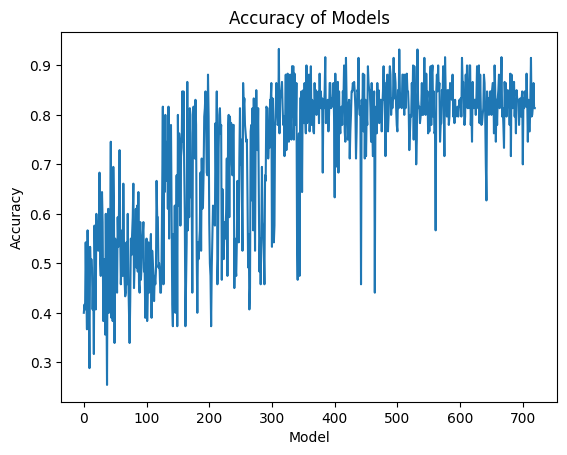

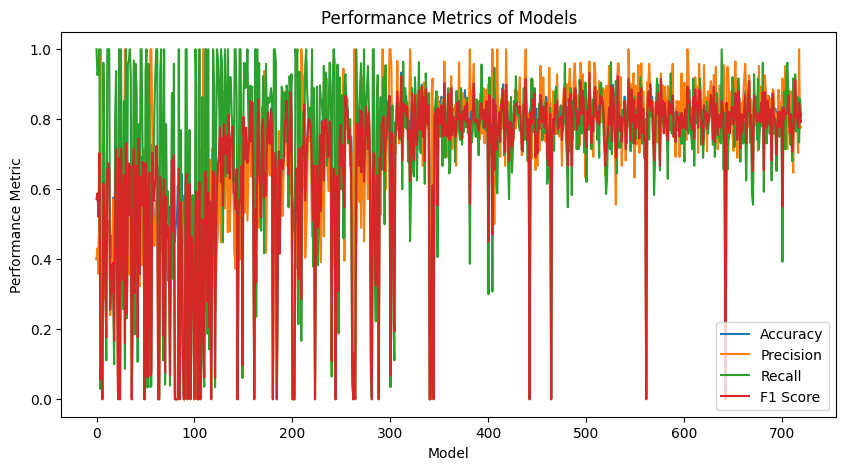

In [42]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

best_accuracy = 0.0
best_hyperparameters = None

accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

kf = KFold(n_splits=5, shuffle=True)

for lr in learning_rate:
  for mt in momentum:
    for wd in weight_decay:
      for hs1 in hidden_size1:
        for train_indices, test_indices in kf.split(X):
          X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
          y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

          X_train = torch.tensor(X_train.values, dtype=torch.float32)
          X_test = torch.tensor(X_test.values, dtype=torch.float32)
          y_train = torch.tensor(y_train.values, dtype=torch.float32)
          y_test = torch.tensor(y_test.values, dtype=torch.float32)
          y_train = y_train.view(-1, 1)

          model = MLP1(input_size, hs1, output_size)
          optimizer = optim.SGD(model.parameters(), lr=lr, momentum=mt, weight_decay=wd)

          model.train()
          epochs = 50

          for epoch in range(epochs):
            y_pred = model(X_train)
            loss = criterion(y_pred, y_train)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (epoch + 1) % 50 == 0:
                    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


          with torch.no_grad():
            model.eval()
            outputs = model(X_test)
            predictions = (outputs > 0.5).float()
            accuracy = accuracy_score(y_test.numpy(), predictions.numpy())
            accuracy_values.append(accuracy)
            precision = precision_score(y_test.numpy(), predictions.numpy())
            precision_values.append(precision)
            recall = recall_score(y_test.numpy(), predictions.numpy())
            recall_values.append(recall)
            f1 = f1_score(y_test.numpy(), predictions.numpy())
            f1_values.append(f1)
            print(f'Accuracy on the test set: {accuracy:.4f}')
            print(f'Precision: {precision:.4f}')
            print(f'Recall: {recall:.4f}')
            print(f'F1 Score: {f1:.4f}')

          if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparameters = (lr, mt, hs1, wd)

print("Best Accuracy:", best_accuracy)
print("Best Hyperparameters:", best_hyperparameters)

plt.plot(accuracy_values)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(accuracy_values, label='Accuracy')
plt.plot(precision_values, label='Precision')
plt.plot(recall_values, label='Recall')
plt.plot(f1_values, label='F1 Score')
plt.xlabel('Model')
plt.ylabel('Performance Metric')
plt.title('Performance Metrics of Models')
plt.legend()
plt.show()


We will now test MLP architecture with 2 hidden layers

Epoch [10/50], Loss: 0.7093
Epoch [20/50], Loss: 0.7121
Epoch [30/50], Loss: 0.7160
Epoch [40/50], Loss: 0.7100
Epoch [50/50], Loss: 0.7137
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.6998
Epoch [20/50], Loss: 0.6928
Epoch [30/50], Loss: 0.6890
Epoch [40/50], Loss: 0.6981
Epoch [50/50], Loss: 0.6926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6970
Epoch [20/50], Loss: 0.6989
Epoch [30/50], Loss: 0.6966
Epoch [40/50], Loss: 0.6955
Epoch [50/50], Loss: 0.6975
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7125
Epoch [20/50], Loss: 0.7071
Epoch [30/50], Loss: 0.7094
Epoch [40/50], Loss: 0.7062
Epoch [50/50], Loss: 0.7048
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.6935
Epoch [20/50], Loss: 0.6990
Epoch [30/50], Loss: 0.6941
Epoch [40/50], Loss: 0.6949
Epoch [50/50], Loss: 0.6961
Accuracy on the test set: 0.5085
Precision: 0.2000
Recall: 0.0385
F1 Score: 0.0645
Epoch [10/50], Loss: 0.6948
Epoch [20/50], Loss: 0.6938
Epoch [30/50], Loss: 0.6947
Epoch [40/50], Loss: 0.6937
Epoch [50/50], Loss: 0.6942
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.69

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6933
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.6962
Epoch [20/50], Loss: 0.6923
Epoch [30/50], Loss: 0.6934
Epoch [40/50], Loss: 0.6931
Epoch [50/50], Loss: 0.6918
Accuracy on the test set: 0.6102
Precision: 0.8000
Recall: 0.1538
F1 Score: 0.2581
Epoch [10/50], Loss: 0.7014
Epoch [20/50], Loss: 0.7036
Epoch [30/50], Loss: 0.7030
Epoch [40/50], Loss: 0.7065
Epoch [50/50], Loss: 0.7021
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6887
Epoch [30/50], Loss: 0.6916
Epoch [40/50], Loss: 0.6933
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6953
Epoch [20/50], Loss: 0.6949
Epoch [30/50], Loss: 0.6932
Epoch [40/50], Loss: 0.6930
Epoch [50/50], Loss: 0.6940
Accuracy on the test set: 0.4237
Precision: 0.4000
Recall: 0.6154
F1 Score: 0.4848
Epoch [10/50], Loss: 0.6983
Epoch [20/50], Loss: 0.7005
Epoch [30/50], Loss: 0.6973
Epoch [40/50], Loss: 0.7010
Epoch [50/50], Loss: 0.6992
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.6987
Epoch [20/50], Loss: 0.7019
Epoch [30/50], Loss: 0.7003
Epoch [40/50], Loss: 0.6962
Epoch [50/50], Loss: 0.6989
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6904
Epoch [30/50], Loss: 0.6915
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.6441
Precision: 0.5556
Recall: 0.9615
F1 Score: 0.7042
Epoch [10/50], Loss: 0.6834
Epoch [20/50], Loss: 0.6841
Epoch [30/50], Loss: 0.6891
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6847
Accuracy on the test set: 0.5763
Precision: 1.0000
Recall: 0.0385
F1 Score: 0.0741
Epoch [10/50], Loss: 0.6942
Epoch [20/50], Loss: 0.6943
Epoch [30/50], Loss: 0.6965
Epoch [40/50], Loss: 0.6945
Epoch [50/50], Loss: 0.6912
Accuracy on the test set: 0.4237
Precision: 0.4286
Recall: 0.9231
F1 Score: 0.5854
Epoch [10/50], Loss: 0.6899
Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6866
Epoch [40/50], Loss: 0.6898
Epoch [50/50], Loss: 0.6931
Accuracy on the test set: 0.6949
Precision: 0.6667
Recall: 0.6154
F1 Score: 0.6400
Epoch [10/50], Loss: 0.6958
Epoch [20/50], Loss: 0.6970
Epoch [30/50], Loss: 0.6950
Epoch [40/50], Loss: 0.6972
Epoch [50/50], Loss: 0.6947
Accuracy on the test set: 0.3729
Precision: 0.3659
Recall: 0.5769
F1 Score: 0.4478
Epoch [10/50], Loss: 0.69

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6917
Epoch [30/50], Loss: 0.6901
Epoch [40/50], Loss: 0.6927
Epoch [50/50], Loss: 0.6922
Accuracy on the test set: 0.7119
Precision: 0.9091
Recall: 0.3846
F1 Score: 0.5405
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6890
Epoch [30/50], Loss: 0.6891
Epoch [40/50], Loss: 0.6876
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.6949
Precision: 0.6250
Recall: 0.7692
F1 Score: 0.6897
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6896
Accuracy on the test set: 0.5593
Precision: 0.5000
Recall: 0.9615
F1 Score: 0.6579
Epoch [10/50], Loss: 0.6987
Epoch [20/50], Loss: 0.6942
Epoch [30/50], Loss: 0.6962
Epoch [40/50], Loss: 0.6945
Epoch [50/50], Loss: 0.6930
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.6948
Epoch [20/50], Loss: 0.6948
Epoch [30/50], Loss: 0.6942
Epoch [40/50], Loss: 0.6941
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6965
Epoch [20/50], Loss: 0.6991
Epoch [30/50], Loss: 0.7000
Epoch [40/50], Loss: 0.7014
Epoch [50/50], Loss: 0.6969
Accuracy on the test set: 0.5593
Precision: 0.5000
Recall: 0.2308
F1 Score: 0.3158
Epoch [10/50], Loss: 0.6929
Epoch [20/50], Loss: 0.6940
Epoch [30/50], Loss: 0.6928
Epoch [40/50], Loss: 0.6930
Epoch [50/50], Loss: 0.6915
Accuracy on the test set: 0.5424
Precision: 0.4444
Recall: 0.1538
F1 Score: 0.2286
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6947
Epoch [30/50], Loss: 0.6944
Epoch [40/50], Loss: 0.6928
Epoch [50/50], Loss: 0.6940
Accuracy on the test set: 0.5932
Precision: 0.6667
Recall: 0.1538
F1 Score: 0.2500
Epoch [10/50], Loss: 0.7111
Epoch [20/50], Loss: 0.7135
Epoch [30/50], Loss: 0.7100
Epoch [40/50], Loss: 0.7098
Epoch [50/50], Loss: 0.7107
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.7111
Epoch [20/50], Loss: 0.7114
Epoch [30/50], Loss: 0.7118
Epoch [40/50], Loss: 0.7

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6964
Epoch [30/50], Loss: 0.6966
Epoch [40/50], Loss: 0.6965
Epoch [50/50], Loss: 0.6945
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7005
Epoch [20/50], Loss: 0.7012
Epoch [30/50], Loss: 0.7007
Epoch [40/50], Loss: 0.7008
Epoch [50/50], Loss: 0.7002
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7082


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7070
Epoch [30/50], Loss: 0.7096
Epoch [40/50], Loss: 0.7052
Epoch [50/50], Loss: 0.7080
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.7024
Epoch [20/50], Loss: 0.6964
Epoch [30/50], Loss: 0.6997
Epoch [40/50], Loss: 0.6987
Epoch [50/50], Loss: 0.6969
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6963
Epoch [20/50], Loss: 0.6981
Epoch [30/50], Loss: 0.6971
Epoch [40/50], Loss: 0.6978
Epoch [50/50], Loss: 0.6971
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6962
Epoch [20/50], Loss: 0.6935
Epoch [30/50], Loss: 0.6959
Epoch [40/50], Loss: 0.6945
Epoch [50/50], Loss: 0.6959
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6859
Epoch [30/50], Loss: 0.6856
Epoch [40/50], Loss: 0.6864
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6997
Epoch [30/50], Loss: 0.6987
Epoch [40/50], Loss: 0.6955
Epoch [50/50], Loss: 0.7049
Accuracy on the test set: 0.4915
Precision: 0.2500
Recall: 0.0769
F1 Score: 0.1176
Epoch [10/50], Loss: 0.6984
Epoch [20/50], Loss: 0.6982
Epoch [30/50], Loss: 0.6962
Epoch [40/50], Loss: 0.6971
Epoch [50/50], Loss: 0.6961
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6994
Epoch [20/50], Loss: 0.6946
Epoch [30/50], Loss: 0.7008
Epoch [40/50], Loss: 0.6989
Epoch [50/50], Loss: 0.6954
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.6958
Epoch [20/50], Loss: 0.6952
Epoch [30/50], Loss: 0.6950
Epoch [40/50], Loss: 0.6945
Epoch [50/50], Loss: 0.6935
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.6908
Epoch [20/50], Loss: 0.6939
Epoch [30/50], Loss: 0.6925
Epoch [40/50], Loss: 0.6925
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6943
Epoch [40/50], Loss: 0.6954
Epoch [50/50], Loss: 0.6901
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.6940
Epoch [20/50], Loss: 0.6948
Epoch [30/50], Loss: 0.6950
Epoch [40/50], Loss: 0.6937
Epoch [50/50], Loss: 0.6926
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6920
Epoch [20/50], Loss: 0.6903
Epoch [30/50], Loss: 0.6913


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6900
Epoch [50/50], Loss: 0.6905
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6964
Epoch [20/50], Loss: 0.6967
Epoch [30/50], Loss: 0.6927
Epoch [40/50], Loss: 0.6912
Epoch [50/50], Loss: 0.6932
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6873
Epoch [30/50], Loss: 0.6863
Epoch [40/50], Loss: 0.6898
Epoch [50/50], Loss: 0.6859
Accuracy on the test set: 0.5763
Precision: 1.0000
Recall: 0.0385
F1 Score: 0.0741
Epoch [10/50], Loss: 0.6949
Epoch [20/50], Loss: 0.6941
Epoch [30/50], Loss: 0.6901
Epoch [40/50], Loss: 0.6926
Epoch [50/50], Loss: 0.6907
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6929
Epoch [30/50], Loss: 0.6927
Epoch [40/50], Loss: 0.6929
Epoch [50/50], Loss: 0.6932


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5424
Precision: 0.3333
Recall: 0.0385
F1 Score: 0.0690
Epoch [10/50], Loss: 0.6977
Epoch [20/50], Loss: 0.6958
Epoch [30/50], Loss: 0.6976
Epoch [40/50], Loss: 0.6964
Epoch [50/50], Loss: 0.6979
Accuracy on the test set: 0.4915
Precision: 0.1667
Recall: 0.0385
F1 Score: 0.0625
Epoch [10/50], Loss: 0.7009
Epoch [20/50], Loss: 0.7015
Epoch [30/50], Loss: 0.6970
Epoch [40/50], Loss: 0.6988
Epoch [50/50], Loss: 0.6988
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6915
Epoch [20/50], Loss: 0.6941
Epoch [30/50], Loss: 0.6941
Epoch [40/50], Loss: 0.6928
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.6908
Epoch [20/50], Loss: 0.6916
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.6949
Precision: 0.7500
Recall: 0.4615
F1 Score: 0.5714
Epoch [10/50], Loss: 0.69

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6950
Epoch [20/50], Loss: 0.6958
Epoch [30/50], Loss: 0.6947
Epoch [40/50], Loss: 0.6964
Epoch [50/50], Loss: 0.6934
Accuracy on the test set: 0.4068
Precision: 0.4000
Recall: 0.6923
F1 Score: 0.5070
Epoch [10/50], Loss: 0.6967
Epoch [20/50], Loss: 0.6994
Epoch [30/50], Loss: 0.6943
Epoch [40/50], Loss: 0.6932
Epoch [50/50], Loss: 0.6925


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6969
Epoch [20/50], Loss: 0.6968
Epoch [30/50], Loss: 0.6999
Epoch [40/50], Loss: 0.6940
Epoch [50/50], Loss: 0.6998
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6932
Epoch [20/50], Loss: 0.6909
Epoch [30/50], Loss: 0.6919
Epoch [40/50], Loss: 0.6919
Epoch [50/50], Loss: 0.6923
Accuracy on the test set: 0.4915
Precision: 0.4600
Recall: 0.8846
F1 Score: 0.6053
Epoch [10/50], Loss: 0.6874
Epoch [20/50], Loss: 0.6861
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6869
Epoch [50/50], Loss: 0.6900
Accuracy on the test set: 0.5085
Precision: 0.4717
Recall: 0.9615
F1 Score: 0.6329
Epoch [10/50], Loss: 0.7007
Epoch [20/50], Loss: 0.6976
Epoch [30/50], Loss: 0.7007
Epoch [40/50], Loss: 0.7007
Epoch [50/50], Loss: 0.6935
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.69

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6916
Epoch [40/50], Loss: 0.6919
Epoch [50/50], Loss: 0.6901
Accuracy on the test set: 0.4407
Precision: 0.4340
Recall: 0.8846
F1 Score: 0.5823
Epoch [10/50], Loss: 0.6952
Epoch [20/50], Loss: 0.6956
Epoch [30/50], Loss: 0.6955
Epoch [40/50], Loss: 0.6954
Epoch [50/50], Loss: 0.6961
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.6920
Epoch [20/50], Loss: 0.6911
Epoch [30/50], Loss: 0.6898
Epoch [40/50], Loss: 0.6921
Epoch [50/50], Loss: 0.6864
Accuracy on the test set: 0.5932
Precision: 1.0000
Recall: 0.0769
F1 Score: 0.1429
Epoch [10/50], Loss: 0.6932
Epoch [20/50], Loss: 0.6960
Epoch [30/50], Loss: 0.6949
Epoch [40/50], Loss: 0.6962
Epoch [50/50], Loss: 0.6916
Accuracy on the test set: 0.6271
Precision: 0.8333
Recall: 0.1923
F1 Score: 0.3125
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6900
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6896
Epoch [50/50], Loss: 0.6890
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6969
Epoch [20/50], Loss: 0.6969
Epoch [30/50], Loss: 0.6911
Epoch [40/50], Loss: 0.6902
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.4407
Precision: 0.4386
Recall: 0.9615
F1 Score: 0.6024
Epoch [10/50], Loss: 0.6988
Epoch [20/50], Loss: 0.6973
Epoch [30/50], Loss: 0.6952
Epoch [40/50], Loss: 0.6936
Epoch [50/50], Loss: 0.6931
Accuracy on the test set: 0.5085
Precision: 0.4727
Recall: 1.0000
F1 Score: 0.6420
Epoch [10/50], Loss: 0.6976
Epoch [20/50], Loss: 0.6950
Epoch [30/50], Loss: 0.6925
Epoch [40/50], Loss: 0.6927
Epoch [50/50], Loss: 0.6902
Accuracy on the test set: 0.5424
Precision: 0.4889
Recall: 0.8462
F1 Score: 0.6197
Epoch [10/50], Loss: 0.6964
Epoch [20/50], Loss: 0.6964
Epoch [30/50], Loss: 0.6932
Epoch [40/50], Loss: 0.6943
Epoch [50/50], Loss: 0.6936
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6918
Epoch [20/50], Loss: 0.6893
Epoch [30/50], Loss: 0.6854
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6887
Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.5763
Precision: 1.0000
Recall: 0.0385
F1 Score: 0.0741
Epoch [10/50], Loss: 0.7036
Epoch [20/50], Loss: 0.6976
Epoch [30/50], Loss: 0.6974
Epoch [40/50], Loss: 0.6942
Epoch [50/50], Loss: 0.6940
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7012
Epoch [20/50], Loss: 0.6965
Epoch [30/50], Loss: 0.6938
Epoch [40/50], Loss: 0.6915
Epoch [50/50], Loss: 0.6916
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6891
Epoch [20/50], Loss: 0.6868
Epoch [30/50], Loss: 0.6895
Epoch [40/50], Loss: 0.6858
Epoch [50/50], Loss: 0.6847
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6951
Epoch [20/50], Loss: 0.6949
Epoch [30/50], Loss: 0.6951
Epoch [40/50], Loss: 0.6920
Epoch [50/50], Loss: 0.6923
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.7105
Epoch [20/50], Loss: 0.7077
Epoch [30/50], Loss: 0.7057


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.7030
Epoch [50/50], Loss: 0.7013
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.6920
Epoch [20/50], Loss: 0.6951
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6868
Epoch [50/50], Loss: 0.6852
Accuracy on the test set: 0.4576
Precision: 0.4483
Recall: 1.0000
F1 Score: 0.6190
Epoch [10/50], Loss: 0.7075
Epoch [20/50], Loss: 0.6997
Epoch [30/50], Loss: 0.6958
Epoch [40/50], Loss: 0.6976
Epoch [50/50], Loss: 0.6973
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6886
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6891

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch [50/50], Loss: 0.6837
Accuracy on the test set: 0.5424
Precision: 0.4898
Recall: 0.9231
F1 Score: 0.6400
Epoch [10/50], Loss: 0.6971
Epoch [20/50], Loss: 0.6946
Epoch [30/50], Loss: 0.6955
Epoch [40/50], Loss: 0.6948
Epoch [50/50], Loss: 0.6949
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6862
Epoch [30/50], Loss: 0.6819
Epoch [40/50], Loss: 0.6841
Epoch [50/50], Loss: 0.6809
Accuracy on the test set: 0.7119
Precision: 0.8462
Recall: 0.4231
F1 Score: 0.5641


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6899
Epoch [20/50], Loss: 0.6873
Epoch [30/50], Loss: 0.6856
Epoch [40/50], Loss: 0.6834
Epoch [50/50], Loss: 0.6787
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6932
Epoch [30/50], Loss: 0.6931


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6934
Epoch [50/50], Loss: 0.6896
Accuracy on the test set: 0.6610
Precision: 0.8750
Recall: 0.2692
F1 Score: 0.4118
Epoch [10/50], Loss: 0.6953
Epoch [20/50], Loss: 0.6953
Epoch [30/50], Loss: 0.6912
Epoch [40/50], Loss: 0.6901
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.7119
Precision: 0.7368
Recall: 0.5385
F1 Score: 0.6222
Epoch [10/50], Loss: 0.6871
Epoch [20/50], Loss: 0.6866
Epoch [30/50], Loss: 0.6853
Epoch [40/50], Loss: 0.6814
Epoch [50/50], Loss: 0.6803
Accuracy on the test set: 0.7966
Precision: 0.7188
Recall: 0.8846
F1 Score: 0.7931
Epoch [10/50], Loss: 0.6935
Epoch [20/50], Loss: 0.6957
Epoch [30/50], Loss: 0.6942
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.6610
Precision: 0.6667
Recall: 0.4615
F1 Score: 0.5455
Epoch [10/50], Loss: 0.7195
Epoch [20/50], Loss: 0.7189
Epoch [30/50], Loss: 0.7130
Epoch [40/50], Loss: 0.7100
Epoch [50/50], Loss: 0.7057
Accuracy on the test set: 0.4407
Precision: 0.4407
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6925
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6870
Epoch [50/50], Loss: 0.6844
Accuracy on the test set: 0.5932
Precision: 0.5208
Recall: 0.9615
F1 Score: 0.6757
Epoch [10/50], Loss: 0.6908
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6845
Epoch [40/50], Loss: 0.6823
Epoch [50/50], Loss: 0.6820
Accuracy on the test set: 0.8305
Precision: 0.7667
Recall: 0.8846
F1 Score: 0.8214
Epoch [10/50], Loss: 0.6946
Epoch [20/50], Loss: 0.6942
Epoch [30/50], Loss: 0.6917
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.7627
Precision: 0.7000
Recall: 0.8077
F1 Score: 0.7500
Epoch [10/50], Loss: 0.6992
Epoch [20/50], Loss: 0.6946
Epoch [30/50], Loss: 0.6949
Epoch [40/50], Loss: 0.6899
Epoch [50/50], Loss: 0.6845
Accuracy on the test set: 0.4746
Precision: 0.4561
Recall: 1.0000
F1 Score: 0.6265
Epoch [10/50], Loss: 0.7131
Epoch [20/50], Loss: 0.7130
Epoch [30/50], Loss: 0.7104
Epoch [40/50], Loss: 0.7

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6919
Epoch [50/50], Loss: 0.6877
Accuracy on the test set: 0.5593
Precision: 0.5000
Recall: 0.1538
F1 Score: 0.2353
Epoch [10/50], Loss: 0.6928
Epoch [20/50], Loss: 0.6935
Epoch [30/50], Loss: 0.6856
Epoch [40/50], Loss: 0.6871
Epoch [50/50], Loss: 0.6810
Accuracy on the test set: 0.7288
Precision: 0.6667
Recall: 0.7692
F1 Score: 0.7143
Epoch [10/50], Loss: 0.6849
Epoch [20/50], Loss: 0.6867
Epoch [30/50], Loss: 0.6839
Epoch [40/50], Loss: 0.6807
Epoch [50/50], Loss: 0.6767
Accuracy on the test set: 0.7288
Precision: 0.6667
Recall: 0.7692
F1 Score: 0.7143
Epoch [10/50], Loss: 0.6834
Epoch [20/50], Loss: 0.6810
Epoch [30/50], Loss: 0.6810
Epoch [40/50], Loss: 0.6794
Epoch [50/50], Loss: 0.6768
Accuracy on the test set: 0.7797
Precision: 0.7241
Recall: 0.8077
F1 Score: 0.7636
Epoch [10/50], Loss: 0.6965
Epoch [20/50], Loss: 0.6912
Epoch [30/50], Loss: 0.6860
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.7119
Precision: 0.6047
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6941
Epoch [30/50], Loss: 0.6933
Epoch [40/50], Loss: 0.6905
Epoch [50/50], Loss: 0.6903
Accuracy on the test set: 0.7797
Precision: 0.7241
Recall: 0.8077
F1 Score: 0.7636
Epoch [10/50], Loss: 0.6901
Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6914
Epoch [40/50], Loss: 0.6905
Epoch [50/50], Loss: 0.6866
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6863
Epoch [30/50], Loss: 0.6875
Epoch [40/50], Loss: 0.6861
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.6102
Precision: 1.0000
Recall: 0.1154
F1 Score: 0.2069
Epoch [10/50], Loss: 0.6961
Epoch [20/50], Loss: 0.6924
Epoch [30/50], Loss: 0.6916
Epoch [40/50], Loss: 0.6918
Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.5763
Precision: 1.0000
Recall: 0.0385
F1 Score: 0.0741
Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6853
Epoch [30/50], Loss: 0.6863
Epoch [40/50], Loss: 0.6790
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6833
Epoch [50/50], Loss: 0.6793
Accuracy on the test set: 0.7627
Precision: 0.8333
Recall: 0.5769
F1 Score: 0.6818
Epoch [10/50], Loss: 0.6939
Epoch [20/50], Loss: 0.6922
Epoch [30/50], Loss: 0.6905
Epoch [40/50], Loss: 0.6895
Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6917
Epoch [30/50], Loss: 0.6864
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6928


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6968
Epoch [20/50], Loss: 0.6954
Epoch [30/50], Loss: 0.6921
Epoch [40/50], Loss: 0.6944
Epoch [50/50], Loss: 0.6920
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7026
Epoch [20/50], Loss: 0.7044
Epoch [30/50], Loss: 0.7041
Epoch [40/50], Loss: 0.7008
Epoch [50/50], Loss: 0.7005
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.6897
Epoch [20/50], Loss: 0.6901
Epoch [30/50], Loss: 0.6907
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6858
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6948
Epoch [20/50], Loss: 0.6940
Epoch [30/50], Loss: 0.6935
Epoch [40/50], Loss: 0.6939
Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.5424
Precision: 0.3333
Recall: 0.0385
F1 Score: 0.0690
Epoch [10/50], Loss: 0.68

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6895
Epoch [50/50], Loss: 0.6877
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6898
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6873
Epoch [40/50], Loss: 0.6850
Epoch [50/50], Loss: 0.6822
Accuracy on the test set: 0.7288
Precision: 0.6250
Recall: 0.9615
F1 Score: 0.7576
Epoch [10/50], Loss: 0.6933
Epoch [20/50], Loss: 0.6890
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6848
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.7797
Precision: 0.9333
Recall: 0.5385
F1 Score: 0.6829
Epoch [10/50], Loss: 0.6961
Epoch [20/50], Loss: 0.6889
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6900
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4746
Precision: 0.4561
Recall: 1.0000
F1 Score: 0.6265
Epoch [10/50], Loss: 0.6873
Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6833
Epoch [40/50], Loss: 0.6829
Epoch [50/50], Loss: 0.6830
Accuracy on the test set: 0.7627
Precision: 0.7000
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6846
Epoch [50/50], Loss: 0.6857
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6977
Epoch [20/50], Loss: 0.6973
Epoch [30/50], Loss: 0.6947
Epoch [40/50], Loss: 0.6940
Epoch [50/50], Loss: 0.6936
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6854


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6829
Epoch [50/50], Loss: 0.6822
Accuracy on the test set: 0.7458
Precision: 0.6486
Recall: 0.9231
F1 Score: 0.7619
Epoch [10/50], Loss: 0.6912
Epoch [20/50], Loss: 0.6844
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6804
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6946
Epoch [20/50], Loss: 0.6931
Epoch [30/50], Loss: 0.6937


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6955
Epoch [20/50], Loss: 0.6901
Epoch [30/50], Loss: 0.6860
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6852
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6856
Epoch [20/50], Loss: 0.6834
Epoch [30/50], Loss: 0.6826
Epoch [40/50], Loss: 0.6818
Epoch [50/50], Loss: 0.6815
Accuracy on the test set: 0.5763
Precision: 1.0000
Recall: 0.0385
F1 Score: 0.0741
Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6858
Epoch [50/50], Loss: 0.6855
Accuracy on the test set: 0.6949
Precision: 0.6429
Recall: 0.6923
F1 Score: 0.6667
Epoch [10/50], Loss: 0.6968
Epoch [20/50], Loss: 0.6935
Epoch [30/50], Loss: 0.6887
Epoch [40/50], Loss: 0.6863
Epoch [50/50], Loss: 0.6832
Accuracy on the test set: 0.5254
Precision: 0.3750
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6869
Epoch [50/50], Loss: 0.6848
Accuracy on the test set: 0.7458
Precision: 0.6410
Recall: 0.9615
F1 Score: 0.7692
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6855
Epoch [30/50], Loss: 0.6842
Epoch [40/50], Loss: 0.6823
Epoch [50/50], Loss: 0.6792
Accuracy on the test set: 0.5932
Precision: 1.0000
Recall: 0.0769
F1 Score: 0.1429
Epoch [10/50], Loss: 0.6922
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6850
Epoch [40/50], Loss: 0.6858
Epoch [50/50], Loss: 0.6825
Accuracy on the test set: 0.7288
Precision: 0.6667
Recall: 0.7692
F1 Score: 0.7143
Epoch [10/50], Loss: 0.6975
Epoch [20/50], Loss: 0.6929
Epoch [30/50], Loss: 0.6898
Epoch [40/50], Loss: 0.6866
Epoch [50/50], Loss: 0.6840
Accuracy on the test set: 0.5763
Precision: 0.5106
Recall: 0.9231
F1 Score: 0.6575
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6866
Epoch [30/50], Loss: 0.6790
Epoch [40/50], Loss: 0.6714
Epoch [50/50], Loss: 0.6721
Accuracy on the test set: 0.8136
Precision: 0.7419
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6862
Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6856
Epoch [20/50], Loss: 0.6827
Epoch [30/50], Loss: 0.6824
Epoch [40/50], Loss: 0.6764
Epoch [50/50], Loss: 0.6776
Accuracy on the test set: 0.6441
Precision: 1.0000
Recall: 0.1923
F1 Score: 0.3226
Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6908
Epoch [30/50], Loss: 0.6874
Epoch [40/50], Loss: 0.6863
Epoch [50/50], Loss: 0.6853
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6936
Epoch [20/50], Loss: 0.6873
Epoch [30/50], Loss: 0.6822


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6830
Epoch [50/50], Loss: 0.6830
Accuracy on the test set: 0.6949
Precision: 1.0000
Recall: 0.3077
F1 Score: 0.4706
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6787
Epoch [30/50], Loss: 0.6745
Epoch [40/50], Loss: 0.6668
Epoch [50/50], Loss: 0.6614
Accuracy on the test set: 0.7797
Precision: 0.7097
Recall: 0.8462
F1 Score: 0.7719
Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6824
Epoch [30/50], Loss: 0.6846
Epoch [40/50], Loss: 0.6792
Epoch [50/50], Loss: 0.6707
Accuracy on the test set: 0.6610
Precision: 0.8750
Recall: 0.2692
F1 Score: 0.4118
Epoch [10/50], Loss: 0.6918
Epoch [20/50], Loss: 0.6852
Epoch [30/50], Loss: 0.6855
Epoch [40/50], Loss: 0.6833
Epoch [50/50], Loss: 0.6823
Accuracy on the test set: 0.7119
Precision: 0.6800
Recall: 0.6538
F1 Score: 0.6667
Epoch [10/50], Loss: 0.7038
Epoch [20/50], Loss: 0.7043
Epoch [30/50], Loss: 0.7020
Epoch [40/50], Loss: 0.7005
Epoch [50/50], Loss: 0.6994
Accuracy on the test set: 0.4407
Precision: 0.4407
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6769
Epoch [50/50], Loss: 0.6758
Accuracy on the test set: 0.7458
Precision: 0.6571
Recall: 0.8846
F1 Score: 0.7541
Epoch [10/50], Loss: 0.7158
Epoch [20/50], Loss: 0.7083
Epoch [30/50], Loss: 0.7048
Epoch [40/50], Loss: 0.7040
Epoch [50/50], Loss: 0.7009
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.6982
Epoch [20/50], Loss: 0.6956
Epoch [30/50], Loss: 0.6962
Epoch [40/50], Loss: 0.6905
Epoch [50/50], Loss: 0.6891
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6838
Epoch [30/50], Loss: 0.6835
Epoch [40/50], Loss: 0.6788
Epoch [50/50], Loss: 0.6759
Accuracy on the test set: 0.6780
Precision: 1.0000
Recall: 0.2692
F1 Score: 0.4242
Epoch [10/50], Loss: 0.6954
Epoch [20/50], Loss: 0.6947
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6927
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.7627
Precision: 0.6667
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6912
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6912
Epoch [20/50], Loss: 0.6833
Epoch [30/50], Loss: 0.6684
Epoch [40/50], Loss: 0.6612
Epoch [50/50], Loss: 0.6437
Accuracy on the test set: 0.8475
Precision: 0.8696
Recall: 0.7692
F1 Score: 0.8163
Epoch [10/50], Loss: 0.6928
Epoch [20/50], Loss: 0.6926
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6841
Epoch [50/50], Loss: 0.6826
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6957


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6900
Epoch [30/50], Loss: 0.6904
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6893
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6918
Epoch [20/50], Loss: 0.6835
Epoch [30/50], Loss: 0.6775
Epoch [40/50], Loss: 0.6585
Epoch [50/50], Loss: 0.6401
Accuracy on the test set: 0.8475
Precision: 0.8696
Recall: 0.7692
F1 Score: 0.8163
Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6825
Epoch [30/50], Loss: 0.6752
Epoch [40/50], Loss: 0.6654
Epoch [50/50], Loss: 0.6534
Accuracy on the test set: 0.7458
Precision: 0.9231
Recall: 0.4615
F1 Score: 0.6154
Epoch [10/50], Loss: 0.6949
Epoch [20/50], Loss: 0.6857
Epoch [30/50], Loss: 0.6835
Epoch [40/50], Loss: 0.6806
Epoch [50/50], Loss: 0.6825
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6950
Epoch [20/50], Loss: 0.6688
Epoch [30/50], Loss: 0.6479
Epoch [40/50], Loss: 0.6231


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6101
Accuracy on the test set: 0.8305
Precision: 0.9000
Recall: 0.6923
F1 Score: 0.7826
Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6755
Epoch [30/50], Loss: 0.6664
Epoch [40/50], Loss: 0.6509
Epoch [50/50], Loss: 0.6255
Accuracy on the test set: 0.7797
Precision: 0.8095
Recall: 0.6538
F1 Score: 0.7234
Epoch [10/50], Loss: 0.6887
Epoch [20/50], Loss: 0.6790
Epoch [30/50], Loss: 0.6640
Epoch [40/50], Loss: 0.6681
Epoch [50/50], Loss: 0.6571
Accuracy on the test set: 0.8475
Precision: 0.9474
Recall: 0.6923
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6851
Epoch [20/50], Loss: 0.6761
Epoch [30/50], Loss: 0.6672
Epoch [40/50], Loss: 0.6515
Epoch [50/50], Loss: 0.6432
Accuracy on the test set: 0.7627
Precision: 0.7000
Recall: 0.8077
F1 Score: 0.7500
Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6811
Epoch [30/50], Loss: 0.6706
Epoch [40/50], Loss: 0.6559
Epoch [50/50], Loss: 0.6440
Accuracy on the test set: 0.8305
Precision: 0.8077
Recall: 0.8077
F1 Score: 0.80

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6424
Accuracy on the test set: 0.8814
Precision: 0.8800
Recall: 0.8462
F1 Score: 0.8627
Epoch [10/50], Loss: 0.6929
Epoch [20/50], Loss: 0.6865
Epoch [30/50], Loss: 0.6828
Epoch [40/50], Loss: 0.6817
Epoch [50/50], Loss: 0.6833
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6825
Epoch [30/50], Loss: 0.6640
Epoch [40/50], Loss: 0.6540


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6276
Accuracy on the test set: 0.8136
Precision: 0.7586
Recall: 0.8462
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6801
Epoch [20/50], Loss: 0.6696
Epoch [30/50], Loss: 0.6525
Epoch [40/50], Loss: 0.6490
Epoch [50/50], Loss: 0.6038
Accuracy on the test set: 0.8136
Precision: 0.7586
Recall: 0.8462
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6801
Epoch [30/50], Loss: 0.6741
Epoch [40/50], Loss: 0.6736
Epoch [50/50], Loss: 0.6757
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6862
Epoch [20/50], Loss: 0.6697
Epoch [30/50], Loss: 0.6510
Epoch [40/50], Loss: 0.6250
Epoch [50/50], Loss: 0.5794
Accuracy on the test set: 0.7797
Precision: 0.7241
Recall: 0.8077
F1 Score: 0.7636
Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6754


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6532
Epoch [40/50], Loss: 0.6463
Epoch [50/50], Loss: 0.6198
Accuracy on the test set: 0.7797
Precision: 0.7241
Recall: 0.8077
F1 Score: 0.7636
Epoch [10/50], Loss: 0.6856
Epoch [20/50], Loss: 0.6790
Epoch [30/50], Loss: 0.6680
Epoch [40/50], Loss: 0.6677
Epoch [50/50], Loss: 0.6652
Accuracy on the test set: 0.6949
Precision: 1.0000
Recall: 0.3077
F1 Score: 0.4706
Epoch [10/50], Loss: 0.6677
Epoch [20/50], Loss: 0.6487
Epoch [30/50], Loss: 0.6336
Epoch [40/50], Loss: 0.5913
Epoch [50/50], Loss: 0.5659
Accuracy on the test set: 0.7797
Precision: 0.7241
Recall: 0.8077
F1 Score: 0.7636
Epoch [10/50], Loss: 0.6853
Epoch [20/50], Loss: 0.6758
Epoch [30/50], Loss: 0.6618
Epoch [40/50], Loss: 0.6560
Epoch [50/50], Loss: 0.6221
Accuracy on the test set: 0.8136
Precision: 0.7419
Recall: 0.8846
F1 Score: 0.8070
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6826
Epoch [30/50], Loss: 0.6818
Epoch [40/50], Loss: 0.6781
Epoch [50/50], Loss: 0.6792
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6060
Epoch [50/50], Loss: 0.5686
Accuracy on the test set: 0.7966
Precision: 0.7333
Recall: 0.8462
F1 Score: 0.7857
Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6722
Epoch [30/50], Loss: 0.6497
Epoch [40/50], Loss: 0.6294
Epoch [50/50], Loss: 0.5985
Accuracy on the test set: 0.7797
Precision: 0.7600
Recall: 0.7308
F1 Score: 0.7451
Epoch [10/50], Loss: 0.6863
Epoch [20/50], Loss: 0.6766
Epoch [30/50], Loss: 0.6684
Epoch [40/50], Loss: 0.6661
Epoch [50/50], Loss: 0.6660
Accuracy on the test set: 0.6949
Precision: 1.0000
Recall: 0.3077
F1 Score: 0.4706
Epoch [10/50], Loss: 0.7014
Epoch [20/50], Loss: 0.6811
Epoch [30/50], Loss: 0.6647
Epoch [40/50], Loss: 0.6165
Epoch [50/50], Loss: 0.5876
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6839
Epoch [20/50], Loss: 0.6680
Epoch [30/50], Loss: 0.6442
Epoch [40/50], Loss: 0.6146
Epoch [50/50], Loss: 0.5614
Accuracy on the test set: 0.8136
Precision: 0.7419
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6923
Epoch [20/50], Loss: 0.6887
Epoch [30/50], Loss: 0.6867
Epoch [40/50], Loss: 0.6841
Epoch [50/50], Loss: 0.6817
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6921
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6797
Epoch [20/50], Loss: 0.6632


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6542
Epoch [40/50], Loss: 0.6395
Epoch [50/50], Loss: 0.5989
Accuracy on the test set: 0.8475
Precision: 0.9474
Recall: 0.6923
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6844
Epoch [20/50], Loss: 0.6711
Epoch [30/50], Loss: 0.6366
Epoch [40/50], Loss: 0.6169
Epoch [50/50], Loss: 0.5884
Accuracy on the test set: 0.7966
Precision: 0.7917
Recall: 0.7308
F1 Score: 0.7600
Epoch [10/50], Loss: 0.6886
Epoch [20/50], Loss: 0.6863
Epoch [30/50], Loss: 0.6848
Epoch [40/50], Loss: 0.6828
Epoch [50/50], Loss: 0.6826
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6825
Epoch [20/50], Loss: 0.6628
Epoch [30/50], Loss: 0.6386
Epoch [40/50], Loss: 0.6151
Epoch [50/50], Loss: 0.6024
Accuracy on the test set: 0.8305
Precision: 0.7857
Recall: 0.8462
F1 Score: 0.8148
Epoch [10/50], Loss: 0.6811
Epoch [20/50], Loss: 0.6812
Epoch [30/50], Loss: 0.6724
Epoch [40/50], Loss: 0.6486


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6305
Accuracy on the test set: 0.8136
Precision: 0.8571
Recall: 0.6923
F1 Score: 0.7660
Epoch [10/50], Loss: 0.6867
Epoch [20/50], Loss: 0.6828
Epoch [30/50], Loss: 0.6802
Epoch [40/50], Loss: 0.6750
Epoch [50/50], Loss: 0.6742
Accuracy on the test set: 0.5932
Precision: 1.0000
Recall: 0.0769
F1 Score: 0.1429
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6863
Epoch [50/50], Loss: 0.6855
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6873


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6811
Epoch [30/50], Loss: 0.6744
Epoch [40/50], Loss: 0.6667
Epoch [50/50], Loss: 0.6565
Accuracy on the test set: 0.8136
Precision: 0.8261
Recall: 0.7308
F1 Score: 0.7755
Epoch [10/50], Loss: 0.7000
Epoch [20/50], Loss: 0.6931
Epoch [30/50], Loss: 0.6909
Epoch [40/50], Loss: 0.6895
Epoch [50/50], Loss: 0.6898
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6928
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6817
Epoch [40/50], Loss: 0.6737
Epoch [50/50], Loss: 0.6559
Accuracy on the test set: 0.8644
Precision: 0.9091
Recall: 0.7692
F1 Score: 0.8333
Epoch [10/50], Loss: 0.6814
Epoch [20/50], Loss: 0.6706
Epoch [30/50], Loss: 0.6643
Epoch [40/50], Loss: 0.6436
Epoch [50/50], Loss: 0.6275
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6778
Epoch [20/50], Loss: 0.6735
Epoch [30/50], Loss: 0.6743
Epoch [40/50], Loss: 0.6727
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6239
Epoch [40/50], Loss: 0.5849
Epoch [50/50], Loss: 0.5634
Accuracy on the test set: 0.7966
Precision: 0.7692
Recall: 0.7692
F1 Score: 0.7692
Epoch [10/50], Loss: 0.6779
Epoch [20/50], Loss: 0.6625
Epoch [30/50], Loss: 0.6347
Epoch [40/50], Loss: 0.6078
Epoch [50/50], Loss: 0.5627
Accuracy on the test set: 0.8305
Precision: 0.8077
Recall: 0.8077
F1 Score: 0.8077
Epoch [10/50], Loss: 0.6805
Epoch [20/50], Loss: 0.6751
Epoch [30/50], Loss: 0.6703
Epoch [40/50], Loss: 0.6674
Epoch [50/50], Loss: 0.6679
Accuracy on the test set: 0.7797
Precision: 1.0000
Recall: 0.5000
F1 Score: 0.6667
Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6730
Epoch [30/50], Loss: 0.6554
Epoch [40/50], Loss: 0.6294
Epoch [50/50], Loss: 0.5822
Accuracy on the test set: 0.8136
Precision: 0.8000
Recall: 0.7692
F1 Score: 0.7843
Epoch [10/50], Loss: 0.6807
Epoch [20/50], Loss: 0.6680
Epoch [30/50], Loss: 0.6531
Epoch [40/50], Loss: 0.6261
Epoch [50/50], Loss: 0.6035
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6667
Epoch [30/50], Loss: 0.6462
Epoch [40/50], Loss: 0.6075
Epoch [50/50], Loss: 0.5596
Accuracy on the test set: 0.8136
Precision: 0.7586
Recall: 0.8462
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6755
Epoch [20/50], Loss: 0.6626
Epoch [30/50], Loss: 0.6360
Epoch [40/50], Loss: 0.6125
Epoch [50/50], Loss: 0.5734
Accuracy on the test set: 0.7966
Precision: 0.7333
Recall: 0.8462
F1 Score: 0.7857
Epoch [10/50], Loss: 0.6876
Epoch [20/50], Loss: 0.6833
Epoch [30/50], Loss: 0.6819
Epoch [40/50], Loss: 0.6794
Epoch [50/50], Loss: 0.6803
Accuracy on the test set: 0.5932
Precision: 1.0000
Recall: 0.0769
F1 Score: 0.1429
Epoch [10/50], Loss: 0.6783
Epoch [20/50], Loss: 0.6608
Epoch [30/50], Loss: 0.6281
Epoch [40/50], Loss: 0.5972
Epoch [50/50], Loss: 0.5522
Accuracy on the test set: 0.7966
Precision: 0.7692
Recall: 0.7692
F1 Score: 0.7692
Epoch [10/50], Loss: 0.6791
Epoch [20/50], Loss: 0.6582
Epoch [30/50], Loss: 0.6392
Epoch [40/50], Loss: 0.6099
Epoch [50/50], Loss: 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6867
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6892
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6851
Epoch [20/50], Loss: 0.6704
Epoch [30/50], Loss: 0.6435
Epoch [40/50], Loss: 0.6270
Epoch [50/50], Loss: 0.5890
Accuracy on the test set: 0.8136
Precision: 0.8571
Recall: 0.6923
F1 Score: 0.7660
Epoch [10/50], Loss: 0.6818
Epoch [20/50], Loss: 0.6665
Epoch [30/50], Loss: 0.6554
Epoch [40/50], Loss: 0.6179
Epoch [50/50], Loss: 0.6193
Accuracy on the test set: 0.7966
Precision: 0.7917
Recall: 0.7308
F1 Score: 0.7600
Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6861
Epoch [30/50], Loss: 0.6873
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6889
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6781
Epoch [20/50], Loss: 0.6604
Epoch [30/50], Loss: 0.6147
Epoch [40/50], Loss: 0.5666
Epoch [50/50], Loss: 0.5537
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.5769
Epoch [50/50], Loss: 0.5559
Accuracy on the test set: 0.8644
Precision: 0.9091
Recall: 0.7692
F1 Score: 0.8333
Epoch [10/50], Loss: 0.6861
Epoch [20/50], Loss: 0.6855
Epoch [30/50], Loss: 0.6741
Epoch [40/50], Loss: 0.6726
Epoch [50/50], Loss: 0.6774
Accuracy on the test set: 0.6441
Precision: 1.0000
Recall: 0.1923
F1 Score: 0.3226
Epoch [10/50], Loss: 0.6631
Epoch [20/50], Loss: 0.6558
Epoch [30/50], Loss: 0.6142
Epoch [40/50], Loss: 0.5847
Epoch [50/50], Loss: 0.5500
Accuracy on the test set: 0.8136
Precision: 0.8261
Recall: 0.7308
F1 Score: 0.7755
Epoch [10/50], Loss: 0.6759
Epoch [20/50], Loss: 0.6399
Epoch [30/50], Loss: 0.6198
Epoch [40/50], Loss: 0.5817
Epoch [50/50], Loss: 0.5138
Accuracy on the test set: 0.7966
Precision: 0.7692
Recall: 0.7692
F1 Score: 0.7692
Epoch [10/50], Loss: 0.6761
Epoch [20/50], Loss: 0.6725
Epoch [30/50], Loss: 0.6619
Epoch [40/50], Loss: 0.6599
Epoch [50/50], Loss: 0.6598
Accuracy on the test set: 0.8305
Precision: 0.9444
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6843
Epoch [20/50], Loss: 0.6678
Epoch [30/50], Loss: 0.6426
Epoch [40/50], Loss: 0.5857
Epoch [50/50], Loss: 0.5511
Accuracy on the test set: 0.8305
Precision: 0.7857
Recall: 0.8462
F1 Score: 0.8148
Epoch [10/50], Loss: 0.6732
Epoch [20/50], Loss: 0.6522
Epoch [30/50], Loss: 0.6256
Epoch [40/50], Loss: 0.5771
Epoch [50/50], Loss: 0.5455
Accuracy on the test set: 0.8305
Precision: 0.7857
Recall: 0.8462
F1 Score: 0.8148
Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6819
Epoch [30/50], Loss: 0.6824
Epoch [40/50], Loss: 0.6812
Epoch [50/50], Loss: 0.6842
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6821
Epoch [20/50], Loss: 0.6582
Epoch [30/50], Loss: 0.6315
Epoch [40/50], Loss: 0.5805
Epoch [50/50], Loss: 0.5365
Accuracy on the test set: 0.8305
Precision: 0.7857
Recall: 0.8462
F1 Score: 0.8148
Epoch [10/50], Loss: 0.6863
Epoch [20/50], Loss: 0.6648
Epoch [30/50], Loss: 0.6466


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6048
Epoch [50/50], Loss: 0.5846
Accuracy on the test set: 0.8136
Precision: 0.7586
Recall: 0.8462
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6785
Epoch [20/50], Loss: 0.6781
Epoch [30/50], Loss: 0.6763
Epoch [40/50], Loss: 0.6766
Epoch [50/50], Loss: 0.6777
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6711
Epoch [20/50], Loss: 0.6324
Epoch [30/50], Loss: 0.5847


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.5307
Epoch [50/50], Loss: 0.4879
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6686
Epoch [20/50], Loss: 0.6290
Epoch [30/50], Loss: 0.6010
Epoch [40/50], Loss: 0.5660
Epoch [50/50], Loss: 0.5420
Accuracy on the test set: 0.8305
Precision: 0.8077
Recall: 0.8077
F1 Score: 0.8077
Epoch [10/50], Loss: 0.6787
Epoch [20/50], Loss: 0.6748
Epoch [30/50], Loss: 0.6744
Epoch [40/50], Loss: 0.6759
Epoch [50/50], Loss: 0.6780
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6912
Epoch [20/50], Loss: 0.6877
Epoch [30/50], Loss: 0.6846
Epoch [40/50], Loss: 0.6718
Epoch [50/50], Loss: 0.6420
Accuracy on the test set: 0.8305
Precision: 0.7857
Recall: 0.8462
F1 Score: 0.8148
Epoch [10/50], Loss: 0.6839
Epoch [20/50], Loss: 0.6662
Epoch [30/50], Loss: 0.6457


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6118
Epoch [50/50], Loss: 0.5897
Accuracy on the test set: 0.8305
Precision: 0.7667
Recall: 0.8846
F1 Score: 0.8214
Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6865
Epoch [30/50], Loss: 0.6863
Epoch [40/50], Loss: 0.6857
Epoch [50/50], Loss: 0.6869
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6597
Epoch [20/50], Loss: 0.6186
Epoch [30/50], Loss: 0.5695
Epoch [40/50], Loss: 0.5194


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.4831
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6691
Epoch [30/50], Loss: 0.6382
Epoch [40/50], Loss: 0.5885
Epoch [50/50], Loss: 0.5359
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6820
Epoch [20/50], Loss: 0.6734
Epoch [30/50], Loss: 0.6675
Epoch [40/50], Loss: 0.6655
Epoch [50/50], Loss: 0.6676
Accuracy on the test set: 0.7627
Precision: 1.0000
Recall: 0.4615
F1 Score: 0.6316
Epoch [10/50], Loss: 0.6736
Epoch [20/50], Loss: 0.6425
Epoch [30/50], Loss: 0.5864
Epoch [40/50], Loss: 0.5274
Epoch [50/50], Loss: 0.4878
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6701
Epoch [20/50], Loss: 0.6338
Epoch [30/50], Loss: 0.5895
Epoch [40/50], Loss: 0.5338
Epoch [50/50], Loss: 0.5184
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.79

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6799
Epoch [20/50], Loss: 0.6039
Epoch [30/50], Loss: 0.5104
Epoch [40/50], Loss: 0.5421
Epoch [50/50], Loss: 0.4869
Accuracy on the test set: 0.8983
Precision: 1.0000
Recall: 0.7692
F1 Score: 0.8696
Epoch [10/50], Loss: 0.6863
Epoch [20/50], Loss: 0.6909
Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6887
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6634
Epoch [20/50], Loss: 0.5735
Epoch [30/50], Loss: 0.4582


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4976
Epoch [50/50], Loss: 0.4236
Accuracy on the test set: 0.8305
Precision: 0.8077
Recall: 0.8077
F1 Score: 0.8077
Epoch [10/50], Loss: 0.6420
Epoch [20/50], Loss: 0.4819
Epoch [30/50], Loss: 0.4070
Epoch [40/50], Loss: 0.4421
Epoch [50/50], Loss: 0.4164
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6750
Epoch [20/50], Loss: 0.6908
Epoch [30/50], Loss: 0.6919
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6906
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6629
Epoch [20/50], Loss: 0.5767
Epoch [30/50], Loss: 0.5633
Epoch [40/50], Loss: 0.4534
Epoch [50/50], Loss: 0.4247
Accuracy on the test set: 0.8305
Precision: 0.8077
Recall: 0.8077
F1 Score: 0.8077
Epoch [10/50], Loss: 0.6639
Epoch [20/50], Loss: 0.5500
Epoch [30/50], Loss: 0.4516
Epoch [40/50], Loss: 0.4567
Epoch [50/50], Loss: 0.4200
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6859
Epoch [20/50], Loss: 0.6922
Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6849
Epoch [50/50], Loss: 0.6891
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6724
Epoch [20/50], Loss: 0.6107
Epoch [30/50], Loss: 0.4725
Epoch [40/50], Loss: 0.4455
Epoch [50/50], Loss: 0.4022
Accuracy on the test set: 0.8475
Precision: 0.8400
Recall: 0.8077
F1 Score: 0.8235
Epoch [10/50], Loss: 0.6802
Epoch [20/50], Loss: 0.6309
Epoch [30/50], Loss: 0.4480
Epoch [40/50], Loss: 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3819
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6912
Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6907
Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6411
Epoch [20/50], Loss: 0.4474
Epoch [30/50], Loss: 0.3916
Epoch [40/50], Loss: 0.3818
Epoch [50/50], Loss: 0.3749
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6702
Epoch [20/50], Loss: 0.5531
Epoch [30/50], Loss: 0.4078
Epoch [40/50], Loss: 0.4117
Epoch [50/50], Loss: 0.3707
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6798
Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6905
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6500


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.4961
Epoch [30/50], Loss: 0.4468
Epoch [40/50], Loss: 0.4145
Epoch [50/50], Loss: 0.3906
Accuracy on the test set: 0.8305
Precision: 0.8077
Recall: 0.8077
F1 Score: 0.8077
Epoch [10/50], Loss: 0.6511
Epoch [20/50], Loss: 0.4894
Epoch [30/50], Loss: 0.4291
Epoch [40/50], Loss: 0.3934
Epoch [50/50], Loss: 0.3479
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6649
Epoch [20/50], Loss: 0.6846
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6407
Epoch [20/50], Loss: 0.4762
Epoch [30/50], Loss: 0.4465
Epoch [40/50], Loss: 0.4198
Epoch [50/50], Loss: 0.3730
Accuracy on the test set: 0.8305
Precision: 0.8077
Recall: 0.8077
F1 Score: 0.8077
Epoch [10/50], Loss: 0.6483


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5075
Epoch [30/50], Loss: 0.3961
Epoch [40/50], Loss: 0.4110
Epoch [50/50], Loss: 0.3665
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6753
Epoch [20/50], Loss: 0.6873
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6861
Epoch [50/50], Loss: 0.6896


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6699
Epoch [20/50], Loss: 0.5585
Epoch [30/50], Loss: 0.4048
Epoch [40/50], Loss: 0.4170
Epoch [50/50], Loss: 0.3462
Accuracy on the test set: 0.7797
Precision: 0.7600
Recall: 0.7308
F1 Score: 0.7451
Epoch [10/50], Loss: 0.6722
Epoch [20/50], Loss: 0.5209
Epoch [30/50], Loss: 0.4250
Epoch [40/50], Loss: 0.3831
Epoch [50/50], Loss: 0.3693
Accuracy on the test set: 0.8475
Precision: 0.8400
Recall: 0.8077
F1 Score: 0.8235
Epoch [10/50], Loss: 0.6823
Epoch [20/50], Loss: 0.6904
Epoch [30/50], Loss: 0.6898
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6581
Epoch [20/50], Loss: 0.4995
Epoch [30/50], Loss: 0.4930
Epoch [40/50], Loss: 0.3640


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3573
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6541
Epoch [20/50], Loss: 0.5202
Epoch [30/50], Loss: 0.4463
Epoch [40/50], Loss: 0.3777
Epoch [50/50], Loss: 0.3547
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6843
Epoch [20/50], Loss: 0.6911
Epoch [30/50], Loss: 0.6911
Epoch [40/50], Loss: 0.6904
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6501
Epoch [20/50], Loss: 0.4582
Epoch [30/50], Loss: 0.4422
Epoch [40/50], Loss: 0.3285
Epoch [50/50], Loss: 0.3576
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6479
Epoch [20/50], Loss: 0.4837
Epoch [30/50], Loss: 0.3965
Epoch [40/50], Loss: 0.3964
Epoch [50/50], Loss: 0.3902
Accuracy on the test set: 0.8136
Precision: 0.8000
Recall: 0.7692
F1 Score: 0.7843
Epoch [10/50], Loss: 0.6746
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6864
Epoch [40/50], Loss: 0.6857
Epoch [50/50], Loss: 0.6892
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6354
Epoch [20/50], Loss: 0.4335
Epoch [30/50], Loss: 0.4176


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.3991
Epoch [50/50], Loss: 0.3315
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6538
Epoch [20/50], Loss: 0.4789
Epoch [30/50], Loss: 0.4213
Epoch [40/50], Loss: 0.3967
Epoch [50/50], Loss: 0.3647
Accuracy on the test set: 0.7966
Precision: 0.7917
Recall: 0.7308
F1 Score: 0.7600
Epoch [10/50], Loss: 0.6690
Epoch [20/50], Loss: 0.6857
Epoch [30/50], Loss: 0.6891
Epoch [40/50], Loss: 0.6871
Epoch [50/50], Loss: 0.6900
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6690
Epoch [20/50], Loss: 0.4845
Epoch [30/50], Loss: 0.4277
Epoch [40/50], Loss: 0.3371
Epoch [50/50], Loss: 0.3211
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch [10/50], Loss: 0.6436
Epoch [20/50], Loss: 0.4969
Epoch [30/50], Loss: 0.3969
Epoch [40/50], Loss: 0.3752
Epoch [50/50], Loss: 0.3719
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6725
Epoch [20/50], Loss: 0.6902
Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6906
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6229
Epoch [20/50], Loss: 0.4323
Epoch [30/50], Loss: 0.4372
Epoch [40/50], Loss: 0.3937


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3516
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6246
Epoch [20/50], Loss: 0.4202
Epoch [30/50], Loss: 0.3894
Epoch [40/50], Loss: 0.3459
Epoch [50/50], Loss: 0.3615
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6710
Epoch [20/50], Loss: 0.6893
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6866
Epoch [50/50], Loss: 0.6892
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6096
Epoch [20/50], Loss: 0.3938
Epoch [30/50], Loss: 0.3800
Epoch [40/50], Loss: 0.3547
Epoch [50/50], Loss: 0.3214
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6339
Epoch [20/50], Loss: 0.4610
Epoch [30/50], Loss: 0.3704
Epoch [40/50], Loss: 0.4093
Epoch [50/50], Loss: 0.3542
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6698
Epoch [20/50], Loss: 0.6890
Epoch [30/50], Loss: 0.6863
Epoch [40/50], Loss: 0.6787
Epoch [50/50], Loss: 0.6816
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5870
Epoch [20/50], Loss: 0.4402
Epoch [30/50], Loss: 0.3612


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.3604
Epoch [50/50], Loss: 0.3325
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6226
Epoch [20/50], Loss: 0.4358
Epoch [30/50], Loss: 0.4147
Epoch [40/50], Loss: 0.3933
Epoch [50/50], Loss: 0.3285
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6605
Epoch [20/50], Loss: 0.6840
Epoch [30/50], Loss: 0.6815
Epoch [40/50], Loss: 0.6766
Epoch [50/50], Loss: 0.6813
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6843
Epoch [20/50], Loss: 0.6670
Epoch [30/50], Loss: 0.6490
Epoch [40/50], Loss: 0.5996


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6162
Accuracy on the test set: 0.8475
Precision: 1.0000
Recall: 0.6538
F1 Score: 0.7907
Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6813
Epoch [30/50], Loss: 0.6644
Epoch [40/50], Loss: 0.6650
Epoch [50/50], Loss: 0.6474
Accuracy on the test set: 0.7966
Precision: 0.9375
Recall: 0.5769
F1 Score: 0.7143
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6904
Epoch [40/50], Loss: 0.6908
Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6862
Epoch [20/50], Loss: 0.6507


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5977
Epoch [40/50], Loss: 0.4948
Epoch [50/50], Loss: 0.5039
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6548
Epoch [20/50], Loss: 0.6240
Epoch [30/50], Loss: 0.5427
Epoch [40/50], Loss: 0.5401
Epoch [50/50], Loss: 0.5132
Accuracy on the test set: 0.8475
Precision: 0.8696
Recall: 0.7692
F1 Score: 0.8163
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6860
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6905
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6650
Epoch [20/50], Loss: 0.6038
Epoch [30/50], Loss: 0.5923
Epoch [40/50], Loss: 0.5672
Epoch [50/50], Loss: 0.5441
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6793
Epoch [20/50], Loss: 0.6393
Epoch [30/50], Loss: 0.6004
Epoch [40/50], Loss: 0.5371
Epoch [50/50], Loss: 0.4939
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6774
Epoch [20/50], Loss: 0.6710
Epoch [30/50], Loss: 0.6781
Epoch [40/50], Loss: 0.6790
Epoch [50/50], Loss: 0.6849
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6814
Epoch [20/50], Loss: 0.6570
Epoch [30/50], Loss: 0.5286
Epoch [40/50], Loss: 0.5279
Epoch [50/50], Loss: 0.5085
Accuracy on the test set: 0.8305
Precision: 0.8077
Recall: 0.8077
F1 Score: 0.8077
Epoch [10/50], Loss: 0.6202
Epoch [20/50], Loss: 0.5070
Epoch [30/50], Loss: 0.4600
Epoch [40/50], Loss: 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6583
Epoch [20/50], Loss: 0.6392
Epoch [30/50], Loss: 0.6445
Epoch [40/50], Loss: 0.6511
Epoch [50/50], Loss: 0.6510
Accuracy on the test set: 0.8305
Precision: 1.0000
Recall: 0.6154
F1 Score: 0.7619
Epoch [10/50], Loss: 0.6601
Epoch [20/50], Loss: 0.5870
Epoch [30/50], Loss: 0.4907
Epoch [40/50], Loss: 0.4286
Epoch [50/50], Loss: 0.4053
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6612
Epoch [20/50], Loss: 0.6262
Epoch [30/50], Loss: 0.5478
Epoch [40/50], Loss: 0.5094
Epoch [50/50], Loss: 0.4765
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6853
Epoch [20/50], Loss: 0.6863
Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6903
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6775
Epoch [20/50], Loss: 0.6272
Epoch [30/50], Loss: 0.5305
Epoch [40/50], Loss: 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6621
Epoch [20/50], Loss: 0.6127
Epoch [30/50], Loss: 0.5113
Epoch [40/50], Loss: 0.4570
Epoch [50/50], Loss: 0.4320
Accuracy on the test set: 0.7966
Precision: 0.7692
Recall: 0.7692
F1 Score: 0.7692
Epoch [10/50], Loss: 0.6851
Epoch [20/50], Loss: 0.6867
Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6631
Epoch [20/50], Loss: 0.6104


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5000
Epoch [40/50], Loss: 0.4619
Epoch [50/50], Loss: 0.4299
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6685
Epoch [20/50], Loss: 0.6029
Epoch [30/50], Loss: 0.4999
Epoch [40/50], Loss: 0.4550
Epoch [50/50], Loss: 0.4186
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6712
Epoch [20/50], Loss: 0.6731
Epoch [30/50], Loss: 0.6747
Epoch [40/50], Loss: 0.6789
Epoch [50/50], Loss: 0.6836
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6495
Epoch [20/50], Loss: 0.5715
Epoch [30/50], Loss: 0.4985
Epoch [40/50], Loss: 0.4389
Epoch [50/50], Loss: 0.3898
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6422
Epoch [20/50], Loss: 0.5511
Epoch [30/50], Loss: 0.4731


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4258
Epoch [50/50], Loss: 0.4321
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6808
Epoch [20/50], Loss: 0.6806
Epoch [30/50], Loss: 0.6827
Epoch [40/50], Loss: 0.6856
Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6693


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6048
Epoch [30/50], Loss: 0.5007
Epoch [40/50], Loss: 0.4239
Epoch [50/50], Loss: 0.4170
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6596
Epoch [20/50], Loss: 0.5832
Epoch [30/50], Loss: 0.4846
Epoch [40/50], Loss: 0.4365
Epoch [50/50], Loss: 0.4031
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6592
Epoch [20/50], Loss: 0.6485
Epoch [30/50], Loss: 0.6520
Epoch [40/50], Loss: 0.6490
Epoch [50/50], Loss: 0.6502
Accuracy on the test set: 0.8475
Precision: 0.9474
Recall: 0.6923
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6450
Epoch [20/50], Loss: 0.5192
Epoch [30/50], Loss: 0.4073
Epoch [40/50], Loss: 0.4099
Epoch [50/50], Loss: 0.3849
Accuracy on the test set: 0.8305
Precision: 0.8077
Recall: 0.8077
F1 Score: 0.8077
Epoch [10/50], Loss: 0.6520
Epoch [20/50], Loss: 0.5550
Epoch [30/50], Loss: 0.4736
Epoch [40/50], Loss: 0.4058
Epoch [50/50], Loss: 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4189
Epoch [40/50], Loss: 0.4069
Epoch [50/50], Loss: 0.4061
Accuracy on the test set: 0.8305
Precision: 0.8077
Recall: 0.8077
F1 Score: 0.8077
Epoch [10/50], Loss: 0.6350
Epoch [20/50], Loss: 0.5445
Epoch [30/50], Loss: 0.4454
Epoch [40/50], Loss: 0.4429
Epoch [50/50], Loss: 0.3860
Accuracy on the test set: 0.8305
Precision: 0.8077
Recall: 0.8077
F1 Score: 0.8077
Epoch [10/50], Loss: 0.6652
Epoch [20/50], Loss: 0.6647
Epoch [30/50], Loss: 0.6633
Epoch [40/50], Loss: 0.6675
Epoch [50/50], Loss: 0.6706
Accuracy on the test set: 0.6949
Precision: 1.0000
Recall: 0.3077
F1 Score: 0.4706
Epoch [10/50], Loss: 0.6287
Epoch [20/50], Loss: 0.5077
Epoch [30/50], Loss: 0.4316
Epoch [40/50], Loss: 0.4027
Epoch [50/50], Loss: 0.3745
Accuracy on the test set: 0.8305
Precision: 0.8077
Recall: 0.8077
F1 Score: 0.8077
Epoch [10/50], Loss: 0.6216
Epoch [20/50], Loss: 0.4945
Epoch [30/50], Loss: 0.4276
Epoch [40/50], Loss: 0.4045
Epoch [50/50], Loss: 0.3736
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.3651
Epoch [40/50], Loss: 0.3884
Epoch [50/50], Loss: 0.3782
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6420
Epoch [20/50], Loss: 0.5074
Epoch [30/50], Loss: 0.4477
Epoch [40/50], Loss: 0.3989
Epoch [50/50], Loss: 0.3673
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6792
Epoch [20/50], Loss: 0.6738
Epoch [30/50], Loss: 0.6752
Epoch [40/50], Loss: 0.6793
Epoch [50/50], Loss: 0.6828
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6306
Epoch [20/50], Loss: 0.4734
Epoch [30/50], Loss: 0.3988
Epoch [40/50], Loss: 0.4099
Epoch [50/50], Loss: 0.3564
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6283
Epoch [20/50], Loss: 0.4958
Epoch [30/50], Loss: 0.4091
Epoch [40/50], Loss: 0.3764
Epoch [50/50], Loss: 0.3734
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6619
Epoch [20/50], Loss: 0.6514
Epoch [30/50], Loss: 0.6443
Epoch [40/50], Loss: 0.6449
Epoch [50/50], Loss: 0.6409
Accuracy on the test set: 0.8305
Precision: 0.8333
Recall: 0.7692
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6183
Epoch [20/50], Loss: 0.4946
Epoch [30/50], Loss: 0.3832
Epoch [40/50], Loss: 0.3808
Epoch [50/50], Loss: 0.3676
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6197
Epoch [20/50], Loss: 0.4878
Epoch [30/50], Loss: 0.4313
Epoch [40/50], Loss: 0.4010
Epoch [50/50], Loss: 0.3881
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6613
Epoch [20/50], Loss: 0.6462
Epoch [30/50], Loss: 0.6455
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.4621
Accuracy on the test set: 0.8305
Precision: 0.8077
Recall: 0.8077
F1 Score: 0.8077
Epoch [10/50], Loss: 0.6859
Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6907
Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6340
Epoch [20/50], Loss: 0.5219
Epoch [30/50], Loss: 0.4821
Epoch [40/50], Loss: 0.4480
Epoch [50/50], Loss: 0.4425
Accuracy on the test set: 0.8644
Precision: 0.8750
Recall: 0.8077
F1 Score: 0.8400
Epoch [10/50], Loss: 0.6482
Epoch [20/50], Loss: 0.6108


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5475
Epoch [40/50], Loss: 0.5305
Epoch [50/50], Loss: 0.4902
Accuracy on the test set: 0.7966
Precision: 0.7692
Recall: 0.7692
F1 Score: 0.7692
Epoch [10/50], Loss: 0.6891
Epoch [20/50], Loss: 0.6900
Epoch [30/50], Loss: 0.6907
Epoch [40/50], Loss: 0.6910
Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6599


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5815
Epoch [30/50], Loss: 0.5317
Epoch [40/50], Loss: 0.4380
Epoch [50/50], Loss: 0.4622
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6242
Epoch [20/50], Loss: 0.5059
Epoch [30/50], Loss: 0.5117
Epoch [40/50], Loss: 0.4600
Epoch [50/50], Loss: 0.4531
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6445
Epoch [20/50], Loss: 0.6458
Epoch [30/50], Loss: 0.6601
Epoch [40/50], Loss: 0.6642
Epoch [50/50], Loss: 0.6724
Accuracy on the test set: 0.6102
Precision: 1.0000
Recall: 0.1154
F1 Score: 0.2069
Epoch [10/50], Loss: 0.6597
Epoch [20/50], Loss: 0.5340
Epoch [30/50], Loss: 0.4517
Epoch [40/50], Loss: 0.4464
Epoch [50/50], Loss: 0.3689
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6773
Epoch [20/50], Loss: 0.6355
Epoch [30/50], Loss: 0.5601
Epoch [40/50], Loss: 0.4892
Epoch [50/50], Loss: 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3938
Accuracy on the test set: 0.8136
Precision: 0.8000
Recall: 0.7692
F1 Score: 0.7843
Epoch [10/50], Loss: 0.6414
Epoch [20/50], Loss: 0.5385
Epoch [30/50], Loss: 0.4361
Epoch [40/50], Loss: 0.4084
Epoch [50/50], Loss: 0.3998
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6745
Epoch [20/50], Loss: 0.6766
Epoch [30/50], Loss: 0.6798
Epoch [40/50], Loss: 0.6859
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6244
Epoch [20/50], Loss: 0.5288
Epoch [30/50], Loss: 0.4386
Epoch [40/50], Loss: 0.3988
Epoch [50/50], Loss: 0.4037
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6452


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5410
Epoch [30/50], Loss: 0.4492
Epoch [40/50], Loss: 0.4204
Epoch [50/50], Loss: 0.3784
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6647
Epoch [20/50], Loss: 0.6644
Epoch [30/50], Loss: 0.6658
Epoch [40/50], Loss: 0.6658
Epoch [50/50], Loss: 0.6701
Accuracy on the test set: 0.6949
Precision: 1.0000
Recall: 0.3077
F1 Score: 0.4706
Epoch [10/50], Loss: 0.6177
Epoch [20/50], Loss: 0.4849
Epoch [30/50], Loss: 0.4360
Epoch [40/50], Loss: 0.4312
Epoch [50/50], Loss: 0.3798
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6398
Epoch [20/50], Loss: 0.5066
Epoch [30/50], Loss: 0.4504
Epoch [40/50], Loss: 0.4024
Epoch [50/50], Loss: 0.3843
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6649
Epoch [20/50], Loss: 0.6705
Epoch [30/50], Loss: 0.6777
Epoch [40/50], Loss: 0.6828
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4085
Epoch [50/50], Loss: 0.3770
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6782
Epoch [20/50], Loss: 0.5996
Epoch [30/50], Loss: 0.5060
Epoch [40/50], Loss: 0.4086
Epoch [50/50], Loss: 0.4109
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6675
Epoch [20/50], Loss: 0.6642
Epoch [30/50], Loss: 0.6684
Epoch [40/50], Loss: 0.6736
Epoch [50/50], Loss: 0.6780
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6503
Epoch [20/50], Loss: 0.5350
Epoch [30/50], Loss: 0.4494
Epoch [40/50], Loss: 0.3716
Epoch [50/50], Loss: 0.3864
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6364
Epoch [20/50], Loss: 0.4971
Epoch [30/50], Loss: 0.4378


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.3911
Epoch [50/50], Loss: 0.3621
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6728
Epoch [20/50], Loss: 0.6718
Epoch [30/50], Loss: 0.6766
Epoch [40/50], Loss: 0.6819
Epoch [50/50], Loss: 0.6861
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6348
Epoch [20/50], Loss: 0.4869


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4081
Epoch [40/50], Loss: 0.3681
Epoch [50/50], Loss: 0.3319
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6143
Epoch [20/50], Loss: 0.4680
Epoch [30/50], Loss: 0.4070
Epoch [40/50], Loss: 0.3925
Epoch [50/50], Loss: 0.3684
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6634
Epoch [20/50], Loss: 0.6622
Epoch [30/50], Loss: 0.6648
Epoch [40/50], Loss: 0.6699
Epoch [50/50], Loss: 0.6764
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6034
Epoch [20/50], Loss: 0.4685
Epoch [30/50], Loss: 0.4385


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4047
Epoch [50/50], Loss: 0.3532
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6106
Epoch [20/50], Loss: 0.4732
Epoch [30/50], Loss: 0.4007
Epoch [40/50], Loss: 0.3936
Epoch [50/50], Loss: 0.3683
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6608
Epoch [20/50], Loss: 0.6615
Epoch [30/50], Loss: 0.6676
Epoch [40/50], Loss: 0.6728
Epoch [50/50], Loss: 0.6803
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6141


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.4262
Epoch [30/50], Loss: 0.4019
Epoch [40/50], Loss: 0.3807
Epoch [50/50], Loss: 0.3281
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.5450
Epoch [20/50], Loss: 0.4207
Epoch [30/50], Loss: 0.4032
Epoch [40/50], Loss: 0.3719
Epoch [50/50], Loss: 0.3674
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6631
Epoch [20/50], Loss: 0.6557
Epoch [30/50], Loss: 0.6601
Epoch [40/50], Loss: 0.6628
Epoch [50/50], Loss: 0.6678
Accuracy on the test set: 0.7288
Precision: 1.0000
Recall: 0.3846
F1 Score: 0.5556
Epoch [10/50], Loss: 0.5963
Epoch [20/50], Loss: 0.4247
Epoch [30/50], Loss: 0.4030
Epoch [40/50], Loss: 0.3964
Epoch [50/50], Loss: 0.3514
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.5682
Epoch [20/50], Loss: 0.4235
Epoch [30/50], Loss: 0.3965
Epoch [40/50], Loss: 0.3612
Epoch [50/50], Loss: 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.3814
Epoch [50/50], Loss: 0.3726
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6209
Epoch [20/50], Loss: 0.4676
Epoch [30/50], Loss: 0.4020
Epoch [40/50], Loss: 0.3867
Epoch [50/50], Loss: 0.3540
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6697
Epoch [20/50], Loss: 0.6709
Epoch [30/50], Loss: 0.6747
Epoch [40/50], Loss: 0.6806
Epoch [50/50], Loss: 0.6857
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5642
Epoch [20/50], Loss: 0.4296


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.3871
Epoch [40/50], Loss: 0.3638
Epoch [50/50], Loss: 0.3335
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.5917
Epoch [20/50], Loss: 0.4239
Epoch [30/50], Loss: 0.3861
Epoch [40/50], Loss: 0.3642
Epoch [50/50], Loss: 0.3445
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6546
Epoch [20/50], Loss: 0.6468
Epoch [30/50], Loss: 0.6443
Epoch [40/50], Loss: 0.6463
Epoch [50/50], Loss: 0.6483
Accuracy on the test set: 0.8644
Precision: 0.9500
Recall: 0.7308
F1 Score: 0.8261
Epoch [10/50], Loss: 0.6759
Epoch [20/50], Loss: 0.5201
Epoch [30/50], Loss: 0.4619
Epoch [40/50], Loss: 0.5162
Epoch [50/50], Loss: 0.4188
Accuracy on the test set: 0.8644
Precision: 0.8750
Recall: 0.8077
F1 Score: 0.8400
Epoch [10/50], Loss: 0.6849
Epoch [20/50], Loss: 0.6474
Epoch [30/50], Loss: 0.4764
Epoch [40/50], Loss: 0.4818
Epoch [50/50], Loss: 0.4577
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4247
Epoch [40/50], Loss: 0.3757
Epoch [50/50], Loss: 0.3799
Accuracy on the test set: 0.8475
Precision: 1.0000
Recall: 0.6538
F1 Score: 0.7907
Epoch [10/50], Loss: 0.6015
Epoch [20/50], Loss: 0.4558
Epoch [30/50], Loss: 0.4255
Epoch [40/50], Loss: 0.3768
Epoch [50/50], Loss: 0.4361
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6887
Epoch [30/50], Loss: 0.6917
Epoch [40/50], Loss: 0.6910
Epoch [50/50], Loss: 0.6913
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6100
Epoch [20/50], Loss: 0.5083
Epoch [30/50], Loss: 0.4748
Epoch [40/50], Loss: 0.3900
Epoch [50/50], Loss: 0.4049
Accuracy on the test set: 0.7797
Precision: 0.7241
Recall: 0.8077
F1 Score: 0.7636
Epoch [10/50], Loss: 0.6505
Epoch [20/50], Loss: 0.4461


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4283
Epoch [40/50], Loss: 0.4084
Epoch [50/50], Loss: 0.4215
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6866
Epoch [20/50], Loss: 0.6822
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6849
Epoch [50/50], Loss: 0.6920
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.5540
Epoch [20/50], Loss: 0.4662
Epoch [30/50], Loss: 0.4417
Epoch [40/50], Loss: 0.3793
Epoch [50/50], Loss: 0.3933
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.5681
Epoch [20/50], Loss: 0.5245
Epoch [30/50], Loss: 0.4299
Epoch [40/50], Loss: 0.4595
Epoch [50/50], Loss: 0.4292
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6853
Epoch [20/50], Loss: 0.6862
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6670
Epoch [50/50], Loss: 0.6861
Accuracy on the test set: 0.5932
Precision: 1.0000
Recall: 0.0769
F1 Score: 0.1429
Epoch [10/50], Loss: 0.6127
Epoch [20/50], Loss: 0.4344
Epoch [30/50], Loss: 0.3843
Epoch [40/50], Loss: 0.3704
Epoch [50/50], Loss: 0.3189
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6382
Epoch [20/50], Loss: 0.4140
Epoch [30/50], Loss: 0.3983
Epoch [40/50], Loss: 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.3938
Epoch [40/50], Loss: 0.3451
Epoch [50/50], Loss: 0.3125
Accuracy on the test set: 0.8305
Precision: 0.8077
Recall: 0.8077
F1 Score: 0.8077
Epoch [10/50], Loss: 0.5473
Epoch [20/50], Loss: 0.3766
Epoch [30/50], Loss: 0.4088
Epoch [40/50], Loss: 0.3730
Epoch [50/50], Loss: 0.3702
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6915
Epoch [20/50], Loss: 0.6810
Epoch [30/50], Loss: 0.6874
Epoch [40/50], Loss: 0.6902
Epoch [50/50], Loss: 0.6912
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5556
Epoch [20/50], Loss: 0.4680
Epoch [30/50], Loss: 0.3916
Epoch [40/50], Loss: 0.3463
Epoch [50/50], Loss: 0.3195
Accuracy on the test set: 0.8305
Precision: 0.8077
Recall: 0.8077
F1 Score: 0.8077
Epoch [10/50], Loss: 0.5790
Epoch [20/50], Loss: 0.4318
Epoch [30/50], Loss: 0.3951


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.3541
Epoch [50/50], Loss: 0.3545
Accuracy on the test set: 0.8136
Precision: 0.8261
Recall: 0.7308
F1 Score: 0.7755
Epoch [10/50], Loss: 0.6865
Epoch [20/50], Loss: 0.6766
Epoch [30/50], Loss: 0.6794
Epoch [40/50], Loss: 0.6857
Epoch [50/50], Loss: 0.6916
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.4858
Epoch [20/50], Loss: 0.4487


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.3675
Epoch [40/50], Loss: 0.3381
Epoch [50/50], Loss: 0.3191
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.5225
Epoch [20/50], Loss: 0.4214
Epoch [30/50], Loss: 0.3811
Epoch [40/50], Loss: 0.3414
Epoch [50/50], Loss: 0.3576
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6811
Epoch [20/50], Loss: 0.6690
Epoch [30/50], Loss: 0.6749
Epoch [40/50], Loss: 0.6856
Epoch [50/50], Loss: 0.6913
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6786
Epoch [20/50], Loss: 0.4624
Epoch [30/50], Loss: 0.3832
Epoch [40/50], Loss: 0.3514
Epoch [50/50], Loss: 0.2928
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.5478
Epoch [20/50], Loss: 0.4018
Epoch [30/50], Loss: 0.3572
Epoch [40/50], Loss: 0.3603
Epoch [50/50], Loss: 0.3457
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6918
Epoch [50/50], Loss: 0.6907
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.5808
Epoch [20/50], Loss: 0.4573
Epoch [30/50], Loss: 0.3796
Epoch [40/50], Loss: 0.3570
Epoch [50/50], Loss: 0.3450
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.5415
Epoch [20/50], Loss: 0.3808
Epoch [30/50], Loss: 0.3796
Epoch [40/50], Loss: 0.3584
Epoch [50/50], Loss: 0.3738
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6804
Epoch [30/50], Loss: 0.6870
Epoch [40/50], Loss: 0.6901
Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5452
Epoch [20/50], Loss: 0.4015
Epoch [30/50], Loss: 0.3440
Epoch [40/50], Loss: 0.3366


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.2881
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.5576
Epoch [20/50], Loss: 0.3878
Epoch [30/50], Loss: 0.3902
Epoch [40/50], Loss: 0.3486
Epoch [50/50], Loss: 0.3559
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6740
Epoch [20/50], Loss: 0.6671
Epoch [30/50], Loss: 0.6635
Epoch [40/50], Loss: 0.6626
Epoch [50/50], Loss: 0.6739
Accuracy on the test set: 0.8475
Precision: 1.0000
Recall: 0.6538
F1 Score: 0.7907
Epoch [10/50], Loss: 0.4927
Epoch [20/50], Loss: 0.4136
Epoch [30/50], Loss: 0.3940
Epoch [40/50], Loss: 0.3134
Epoch [50/50], Loss: 0.3165
Accuracy on the test set: 0.8305
Precision: 0.8077
Recall: 0.8077
F1 Score: 0.8077
Epoch [10/50], Loss: 0.4883
Epoch [20/50], Loss: 0.4189
Epoch [30/50], Loss: 0.3335
Epoch [40/50], Loss: 0.3742
Epoch [50/50], Loss: 0.3504
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.77

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.3553
Epoch [40/50], Loss: 0.3451
Epoch [50/50], Loss: 0.3609
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6760
Epoch [20/50], Loss: 0.6759
Epoch [30/50], Loss: 0.6700
Epoch [40/50], Loss: 0.6645
Epoch [50/50], Loss: 0.6746
Accuracy on the test set: 0.5932
Precision: 1.0000
Recall: 0.0769
F1 Score: 0.1429
Epoch [10/50], Loss: 0.4617
Epoch [20/50], Loss: 0.4055
Epoch [30/50], Loss: 0.3771
Epoch [40/50], Loss: 0.3403
Epoch [50/50], Loss: 0.3380
Accuracy on the test set: 0.7966
Precision: 0.7692
Recall: 0.7692
F1 Score: 0.7692
Epoch [10/50], Loss: 0.4445
Epoch [20/50], Loss: 0.3725
Epoch [30/50], Loss: 0.3614
Epoch [40/50], Loss: 0.3565
Epoch [50/50], Loss: 0.3710
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6837
Epoch [20/50], Loss: 0.6636
Epoch [30/50], Loss: 0.6383
Epoch [40/50], Loss: 0.5764
Epoch [50/50], Loss: 0.5605
Accuracy on the test set

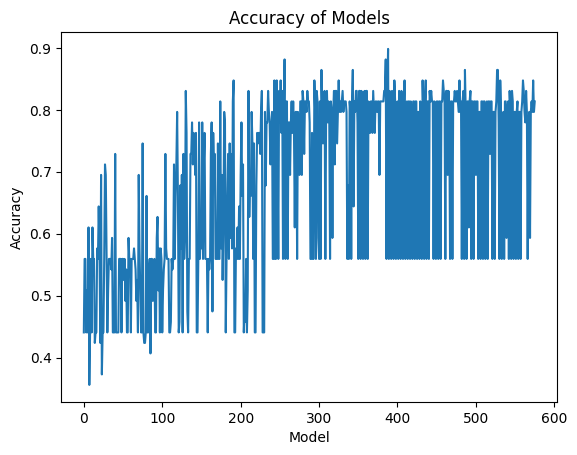

In [43]:

from sklearn.model_selection import KFold
best_accuracy = 0.0
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []
best_hyperparameters = None
kf = KFold(n_splits=5, shuffle=True)
for i, lr in enumerate(learning_rate):
  for m, mt in enumerate(momentum):
    for j1, hs1 in enumerate(hidden_size1):
      for j2, hs2 in enumerate(hidden_size2):
        for w, wd in enumerate(weight_decay):
          model = MLP2(input_size, hs1, hs2, output_size)  # Create a new model for each combination
          optimizer = optim.SGD(model.parameters(), lr=lr, momentum=mt, weight_decay=wd)

          model.train()

          epochs = 50

          for epoch in range(epochs):
            y_pred = model(X_train)
            loss = criterion(y_pred, y_train)

          #Backpropagation

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (epoch + 1) % 10 == 0:
                    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


          with torch.no_grad():
            model.eval()
            outputs = model(X_test)
            predictions = (outputs > 0.5).float()
            accuracy = accuracy_score(y_test.numpy(), predictions.numpy())
            accuracy_values.append(accuracy)
            precision = precision_score(y_test.numpy(), predictions.numpy())
            recall = recall_score(y_test.numpy(), predictions.numpy())
            f1 = f1_score(y_test.numpy(), predictions.numpy())


            print(f'Accuracy on the test set: {accuracy:.4f}')
            print(f'Precision: {precision:.4f}')
            print(f'Recall: {recall:.4f}')
            print(f'F1 Score: {f1:.4f}')

          if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparameters = (lr, mt, hs1, wd)

print("Best Accuracy:", best_accuracy)
print("Best Hyperparameters:", best_hyperparameters)

plt.plot(accuracy_values)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()


We will now test the MLP with 2 hidden layers and with Cross Validation

Epoch [10/50], Loss: 0.7163
Epoch [20/50], Loss: 0.7145
Epoch [30/50], Loss: 0.7160
Epoch [40/50], Loss: 0.7135
Epoch [50/50], Loss: 0.7123
Accuracy on the test set: 0.4667
Precision: 0.4667
Recall: 1.0000
F1 Score: 0.6364
Epoch [10/50], Loss: 0.6940
Epoch [20/50], Loss: 0.6910
Epoch [30/50], Loss: 0.6947
Epoch [40/50], Loss: 0.6989
Epoch [50/50], Loss: 0.6949
Accuracy on the test set: 0.5667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7010
Epoch [20/50], Loss: 0.7040
Epoch [30/50], Loss: 0.7024


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.7037
Epoch [50/50], Loss: 0.7052
Accuracy on the test set: 0.5085
Precision: 0.5085
Recall: 1.0000
F1 Score: 0.6742
Epoch [10/50], Loss: 0.7010
Epoch [20/50], Loss: 0.7025
Epoch [30/50], Loss: 0.6996
Epoch [40/50], Loss: 0.7011
Epoch [50/50], Loss: 0.7002
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7211
Epoch [20/50], Loss: 0.7201
Epoch [30/50], Loss: 0.7193
Epoch [40/50], Loss: 0.7182
Epoch [50/50], Loss: 0.7183
Accuracy on the test set: 0.4237
Precision: 0.4237
Recall: 1.0000
F1 Score: 0.5952
Epoch [10/50], Loss: 0.6954
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6949
Epoch [40/50], Loss: 0.6937
Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.5667
Precision: 1.0000
Recall: 0.0714
F1 Score: 0.1333
Epoch [10/50], Loss: 0.7014
Epoch [20/50], Loss: 0.6994
Epoch [30/50], Loss: 0.7005
Epoch [40/50], Loss: 0.6973
Epoch [50/50], Loss: 0.6964
Accuracy on the test set: 0.5500
Precision: 0.0000
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5424
Precision: 0.5424
Recall: 1.0000
F1 Score: 0.7033
Epoch [10/50], Loss: 0.6977
Epoch [20/50], Loss: 0.6969
Epoch [30/50], Loss: 0.6960
Epoch [40/50], Loss: 0.6967
Epoch [50/50], Loss: 0.6961
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7209
Epoch [20/50], Loss: 0.7210
Epoch [30/50], Loss: 0.7209
Epoch [40/50], Loss: 0.7193
Epoch [50/50], Loss: 0.7131
Accuracy on the test set: 0.4237
Precision: 0.4237
Recall: 1.0000
F1 Score: 0.5952
Epoch [10/50], Loss: 0.7273
Epoch [20/50], Loss: 0.7246
Epoch [30/50], Loss: 0.7234
Epoch [40/50], Loss: 0.7207
Epoch [50/50], Loss: 0.7241
Accuracy on the test set: 0.4833
Precision: 0.4833
Recall: 1.0000
F1 Score: 0.6517
Epoch [10/50], Loss: 0.7016
Epoch [20/50], Loss: 0.6987
Epoch [30/50], Loss: 0.7024
Epoch [40/50], Loss: 0.7021
Epoch [50/50], Loss: 0.7019
Accuracy on the test set: 0.5333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.68

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4407
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6855
Epoch [20/50], Loss: 0.6876
Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6891
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.6780
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7060
Epoch [20/50], Loss: 0.7095
Epoch [30/50], Loss: 0.7002
Epoch [40/50], Loss: 0.7041


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.7027
Accuracy on the test set: 0.4000
Precision: 0.4000
Recall: 1.0000
F1 Score: 0.5714
Epoch [10/50], Loss: 0.6943
Epoch [20/50], Loss: 0.6950
Epoch [30/50], Loss: 0.6990
Epoch [40/50], Loss: 0.6985
Epoch [50/50], Loss: 0.6917
Accuracy on the test set: 0.4667
Precision: 0.4667
Recall: 1.0000
F1 Score: 0.6364
Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6907
Epoch [40/50], Loss: 0.6910
Epoch [50/50], Loss: 0.6872
Accuracy on the test set: 0.4237
Precision: 0.4237
Recall: 1.0000
F1 Score: 0.5952
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6963
Epoch [30/50], Loss: 0.6964
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6907
Accuracy on the test set: 0.4576
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7113
Epoch [20/50], Loss: 0.7082
Epoch [30/50], Loss: 0.7078
Epoch [40/50], Loss: 0.7069
Epoch [50/50], Loss: 0.7083
Accuracy on the test set: 0.4746
Precision: 0.4746
Recall: 1.0000
F1 Score: 0.64

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6926
Epoch [50/50], Loss: 0.6930
Accuracy on the test set: 0.6167
Precision: 0.5357
Recall: 0.6000
F1 Score: 0.5660
Epoch [10/50], Loss: 0.7015
Epoch [20/50], Loss: 0.7017
Epoch [30/50], Loss: 0.7000
Epoch [40/50], Loss: 0.7036
Epoch [50/50], Loss: 0.6999
Accuracy on the test set: 0.4167
Precision: 0.4167
Recall: 1.0000
F1 Score: 0.5882
Epoch [10/50], Loss: 0.6861
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6914
Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6872
Accuracy on the test set: 0.5593
Precision: 0.6471
Recall: 0.6111
F1 Score: 0.6286
Epoch [10/50], Loss: 0.6939
Epoch [20/50], Loss: 0.6922
Epoch [30/50], Loss: 0.6921
Epoch [40/50], Loss: 0.6900
Epoch [50/50], Loss: 0.6935
Accuracy on the test set: 0.5932
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7019
Epoch [20/50], Loss: 0.7038
Epoch [30/50], Loss: 0.7009
Epoch [40/50], Loss: 0.7016
Epoch [50/50], Loss: 0.6997
Accuracy on the test set: 0.5500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6988
Epoch [20/50], Loss: 0.6996
Epoch [30/50], Loss: 0.6964
Epoch [40/50], Loss: 0.7009
Epoch [50/50], Loss: 0.6984
Accuracy on the test set: 0.4000
Precision: 0.4000
Recall: 1.0000
F1 Score: 0.5714
Epoch [10/50], Loss: 0.6941
Epoch [20/50], Loss: 0.6948
Epoch [30/50], Loss: 0.6945
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6931
Accuracy on the test set: 0.5932
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6903
Epoch [30/50], Loss: 0.6866
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6861
Accuracy on the test set: 0.5763
Precision: 0.5333
Recall: 0.8571
F1 Score: 0.6575
Epoch [10/50], Loss: 0.7025
Epoch [20/50], Loss: 0.7012
Epoch [30/50], Loss: 0.7005
Epoch [40/50], Loss: 0.7043
Epoch [50/50], Loss: 0.7009
Accuracy on the test set: 0.5763
Precision: 0.5763
Recall: 1.0000
F1 Score: 0.7312
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6906
Epoch [40/50], Loss: 0.6870
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6958
Epoch [20/50], Loss: 0.6974
Epoch [30/50], Loss: 0.6966
Epoch [40/50], Loss: 0.6942
Epoch [50/50], Loss: 0.6949
Accuracy on the test set: 0.6500
Precision: 0.6667
Recall: 0.0909
F1 Score: 0.16

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6902
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6864
Epoch [30/50], Loss: 0.6891
Epoch [40/50], Loss: 0.6866
Epoch [50/50], Loss: 0.6856
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6936
Epoch [20/50], Loss: 0.6983
Epoch [30/50], Loss: 0.6949
Epoch [40/50], Loss: 0.6962
Epoch [50/50], Loss: 0.6925
Accuracy on the test set: 0.3898
Precision: 0.3898
Recall: 1.0000
F1 Score: 0.5610


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6964
Epoch [20/50], Loss: 0.6914
Epoch [30/50], Loss: 0.6934
Epoch [40/50], Loss: 0.6906
Epoch [50/50], Loss: 0.6941
Accuracy on the test set: 0.5500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6948
Epoch [20/50], Loss: 0.6941
Epoch [30/50], Loss: 0.6928
Epoch [40/50], Loss: 0.6929
Epoch [50/50], Loss: 0.6923
Accuracy on the test set: 0.5333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6890
Epoch [20/50], Loss: 0.6889
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6893
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6873
Epoch [30/50], Loss: 0.6869
Epoch [40/50], Loss: 0.6856
Epoch [50/50], Loss: 0.6847
Accuracy on the test set: 0.4576
Precision: 1.0000
Recall: 0.0303
F1 Score: 0.0588
Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6903
Epoch [30/50], Loss: 0.6872
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6929
Epoch [40/50], Loss: 0.6926
Epoch [50/50], Loss: 0.6920
Accuracy on the test set: 0.5333
Precision: 0.4762
Recall: 0.3704
F1 Score: 0.4167
Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6933
Epoch [30/50], Loss: 0.6937
Epoch [40/50], Loss: 0.6931
Epoch [50/50], Loss: 0.6937
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6951
Epoch [20/50], Loss: 0.6936
Epoch [30/50], Loss: 0.6921
Epoch [40/50], Loss: 0.6927
Epoch [50/50], Loss: 0.6917
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6954
Epoch [20/50], Loss: 0.6939
Epoch [30/50], Loss: 0.6976
Epoch [40/50], Loss: 0.6962
Epoch [50/50], Loss: 0.6957
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6765
Epoch [20/50], Loss: 0.6762
Epoch [30/50], Loss: 0.6797
Epoch [40/50], Loss: 0.6735
Epoch [50/50], Loss: 0.6735


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5833
Precision: 1.0000
Recall: 0.1667
F1 Score: 0.2857
Epoch [10/50], Loss: 0.7053
Epoch [20/50], Loss: 0.7056
Epoch [30/50], Loss: 0.7035
Epoch [40/50], Loss: 0.7033
Epoch [50/50], Loss: 0.7045
Accuracy on the test set: 0.4667
Precision: 0.4667
Recall: 1.0000
F1 Score: 0.6364
Epoch [10/50], Loss: 0.6841
Epoch [20/50], Loss: 0.6844
Epoch [30/50], Loss: 0.6844
Epoch [40/50], Loss: 0.6832
Epoch [50/50], Loss: 0.6828


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4407
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6954
Epoch [20/50], Loss: 0.6958
Epoch [30/50], Loss: 0.6954
Epoch [40/50], Loss: 0.6969
Epoch [50/50], Loss: 0.6961
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6923
Epoch [20/50], Loss: 0.6915
Epoch [30/50], Loss: 0.6914
Epoch [40/50], Loss: 0.6932
Epoch [50/50], Loss: 0.6900
Accuracy on the test set: 0.3729
Precision: 0.3621
Recall: 1.0000
F1 Score: 0.5316
Epoch [10/50], Loss: 0.6960
Epoch [20/50], Loss: 0.6950
Epoch [30/50], Loss: 0.6937
Epoch [40/50], Loss: 0.6941
Epoch [50/50], Loss: 0.6932
Accuracy on the test set: 0.4833
Precision: 0.4800
Recall: 0.4000
F1 Score: 0.4364
Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6901
Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6896
Epoch [50/50], Loss: 0.6891
Accuracy on the test set: 0.5667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.69

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.6949
Precision: 0.6316
Recall: 0.5217
F1 Score: 0.5714
Epoch [10/50], Loss: 0.7054
Epoch [20/50], Loss: 0.7031
Epoch [30/50], Loss: 0.7038
Epoch [40/50], Loss: 0.7032
Epoch [50/50], Loss: 0.7030
Accuracy on the test set: 0.5085
Precision: 0.5172
Recall: 0.9677
F1 Score: 0.6742
Epoch [10/50], Loss: 0.6981
Epoch [20/50], Loss: 0.6986
Epoch [30/50], Loss: 0.6980
Epoch [40/50], Loss: 0.6979
Epoch [50/50], Loss: 0.6969
Accuracy on the test set: 0.4667
Precision: 0.4667
Recall: 1.0000
F1 Score: 0.6364
Epoch [10/50], Loss: 0.6920
Epoch [20/50], Loss: 0.6926
Epoch [30/50], Loss: 0.6925
Epoch [40/50], Loss: 0.6928
Epoch [50/50], Loss: 0.6914
Accuracy on the test set: 0.5833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7022
Epoch [20/50], Loss: 0.6995
Epoch [30/50], Loss: 0.6991
Epoch [40/50], Loss: 0.7009
Epoch [50/50], Loss: 0.6989
Accuracy on the test set: 0.4576
Precision: 0.4576
Recall: 1.0000
F1 Score: 0.6279
Epoch [10/50], Loss: 0.68

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6900
Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6914
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6943
Epoch [20/50], Loss: 0.6935
Epoch [30/50], Loss: 0.6931
Epoch [40/50], Loss: 0.6963
Epoch [50/50], Loss: 0.6949
Accuracy on the test set: 0.5593
Precision: 0.5000
Recall: 0.0385
F1 Score: 0.0714


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7012
Epoch [20/50], Loss: 0.7038
Epoch [30/50], Loss: 0.6997
Epoch [40/50], Loss: 0.7019
Epoch [50/50], Loss: 0.7003
Accuracy on the test set: 0.4167
Precision: 0.4167
Recall: 1.0000
F1 Score: 0.5882
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6922
Epoch [30/50], Loss: 0.6903
Epoch [40/50], Loss: 0.6910
Epoch [50/50], Loss: 0.6909
Accuracy on the test set: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6965
Epoch [20/50], Loss: 0.6978
Epoch [30/50], Loss: 0.6961
Epoch [40/50], Loss: 0.6959
Epoch [50/50], Loss: 0.6960
Accuracy on the test set: 0.5424
Precision: 0.5424
Recall: 1.0000
F1 Score: 0.7033
Epoch [10/50], Loss: 0.6967


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6954
Epoch [30/50], Loss: 0.6927
Epoch [40/50], Loss: 0.6962
Epoch [50/50], Loss: 0.6956
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7043
Epoch [20/50], Loss: 0.7050
Epoch [30/50], Loss: 0.7029


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.7049
Epoch [50/50], Loss: 0.7040
Accuracy on the test set: 0.4237
Precision: 0.4237
Recall: 1.0000
F1 Score: 0.5952
Epoch [10/50], Loss: 0.7044
Epoch [20/50], Loss: 0.7040
Epoch [30/50], Loss: 0.7030
Epoch [40/50], Loss: 0.7019
Epoch [50/50], Loss: 0.7020
Accuracy on the test set: 0.3833
Precision: 0.3833
Recall: 1.0000
F1 Score: 0.5542
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6898
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6917
Accuracy on the test set: 0.6167
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7021
Epoch [20/50], Loss: 0.7034


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.7008
Epoch [40/50], Loss: 0.6974
Epoch [50/50], Loss: 0.7023
Accuracy on the test set: 0.3390
Precision: 0.3519
Recall: 0.8261
F1 Score: 0.4935
Epoch [10/50], Loss: 0.6823
Epoch [20/50], Loss: 0.6812
Epoch [30/50], Loss: 0.6793
Epoch [40/50], Loss: 0.6832
Epoch [50/50], Loss: 0.6814
Accuracy on the test set: 0.3559
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7086
Epoch [20/50], Loss: 0.7096
Epoch [30/50], Loss: 0.7080
Epoch [40/50], Loss: 0.7097
Epoch [50/50], Loss: 0.7099
Accuracy on the test set: 0.5085
Precision: 0.5085
Recall: 1.0000
F1 Score: 0.6742
Epoch [10/50], Loss: 0.7113


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7101
Epoch [30/50], Loss: 0.7071
Epoch [40/50], Loss: 0.7088
Epoch [50/50], Loss: 0.7088
Accuracy on the test set: 0.4000
Precision: 0.4000
Recall: 1.0000
F1 Score: 0.5714
Epoch [10/50], Loss: 0.7127
Epoch [20/50], Loss: 0.7124
Epoch [30/50], Loss: 0.7133
Epoch [40/50], Loss: 0.7095
Epoch [50/50], Loss: 0.7093
Accuracy on the test set: 0.4333
Precision: 0.4333
Recall: 1.0000
F1 Score: 0.6047
Epoch [10/50], Loss: 0.6890
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6877
Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6878


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6948
Epoch [20/50], Loss: 0.6951
Epoch [30/50], Loss: 0.6909
Epoch [40/50], Loss: 0.6928
Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.5593
Precision: 0.5370
Recall: 0.9667
F1 Score: 0.6905
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6872
Epoch [30/50], Loss: 0.6871
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6947
Epoch [20/50], Loss: 0.6937
Epoch [30/50], Loss: 0.6934
Epoch [40/50], Loss: 0.6923
Epoch [50/50], Loss: 0.6934
Accuracy on the test set: 0.5500

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.5500
Recall: 1.0000
F1 Score: 0.7097
Epoch [10/50], Loss: 0.6916
Epoch [20/50], Loss: 0.6944
Epoch [30/50], Loss: 0.6933
Epoch [40/50], Loss: 0.6957
Epoch [50/50], Loss: 0.6949
Accuracy on the test set: 0.4000
Precision: 0.4107
Recall: 0.8846
F1 Score: 0.5610
Epoch [10/50], Loss: 0.7033
Epoch [20/50], Loss: 0.7043
Epoch [30/50], Loss: 0.7037
Epoch [40/50], Loss: 0.7059
Epoch [50/50], Loss: 0.7017
Accuracy on the test set: 0.5424
Precision: 0.5424
Recall: 1.0000
F1 Score: 0.7033
Epoch [10/50], Loss: 0.6950
Epoch [20/50], Loss: 0.6968
Epoch [30/50], Loss: 0.6987
Epoch [40/50], Loss: 0.6960
Epoch [50/50], Loss: 0.6927
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.7050
Epoch [20/50], Loss: 0.7013
Epoch [30/50], Loss: 0.7023
Epoch [40/50], Loss: 0.7048
Epoch [50/50], Loss: 0.7048
Accuracy on the test set: 0.6610
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6949
Epoch [20/50], Loss: 0.6951


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6937
Epoch [40/50], Loss: 0.6901
Epoch [50/50], Loss: 0.6922
Accuracy on the test set: 0.4833
Precision: 0.5000
Recall: 0.1290
F1 Score: 0.2051
Epoch [10/50], Loss: 0.6874
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6874
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6837
Accuracy on the test set: 0.7167
Precision: 0.5600
Recall: 0.7000
F1 Score: 0.6222
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6976
Epoch [30/50], Loss: 0.6943
Epoch [40/50], Loss: 0.6990
Epoch [50/50], Loss: 0.6948
Accuracy on the test set: 0.3898
Precision: 0.4286
Recall: 0.3750
F1 Score: 0.4000
Epoch [10/50], Loss: 0.6951
Epoch [20/50], Loss: 0.6943
Epoch [30/50], Loss: 0.6948
Epoch [40/50], Loss: 0.6958
Epoch [50/50], Loss: 0.6909
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6917


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6939
Epoch [30/50], Loss: 0.6920
Epoch [40/50], Loss: 0.6922
Epoch [50/50], Loss: 0.6927
Accuracy on the test set: 0.5085
Precision: 0.4792
Recall: 0.8519
F1 Score: 0.6133
Epoch [10/50], Loss: 0.6975
Epoch [20/50], Loss: 0.6951
Epoch [30/50], Loss: 0.6921
Epoch [40/50], Loss: 0.6957
Epoch [50/50], Loss: 0.6947
Accuracy on the test set: 0.5333
Precision: 0.2500
Recall: 0.0833
F1 Score: 0.1250
Epoch [10/50], Loss: 0.7035
Epoch [20/50], Loss: 0.7033
Epoch [30/50], Loss: 0.6982
Epoch [40/50], Loss: 0.7022
Epoch [50/50], Loss: 0.6985
Accuracy on the test set: 0.5167
Precision: 0.5167
Recall: 1.0000
F1 Score: 0.6813
Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6887
Epoch [30/50], Loss: 0.6903
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6940
Epoch [20/50], Loss: 0.6939
Epoch [30/50], Loss: 0.6927
Epoch [40/50], Loss: 0.6920
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6964
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.6989
Epoch [20/50], Loss: 0.6985
Epoch [30/50], Loss: 0.6977
Epoch [40/50], Loss: 0.6984
Epoch [50/50], Loss: 0.6978
Accuracy on the test set: 0.5333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6915
Epoch [20/50], Loss: 0.6942
Epoch [30/50], Loss: 0.6970


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6911
Epoch [50/50], Loss: 0.6948
Accuracy on the test set: 0.4000
Precision: 0.4000
Recall: 1.0000
F1 Score: 0.5714
Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6909
Epoch [30/50], Loss: 0.6918
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6919
Accuracy on the test set: 0.5932
Precision: 0.6061
Recall: 0.6452
F1 Score: 0.6250
Epoch [10/50], Loss: 0.6951
Epoch [20/50], Loss: 0.6895
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6929
Epoch [50/50], Loss: 0.6907
Accuracy on the test set: 0.4068
Precision: 0.3818
Recall: 0.9545
F1 Score: 0.5455
Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6918
Epoch [30/50], Loss: 0.6919
Epoch [40/50], Loss: 0.6927
Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.4237
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6942
Epoch [30/50], Loss: 0.6944
Epoch [40/50], Loss: 0.6933
Epoch [50/50], Loss: 0.6937
Accuracy on the test set: 0.5333
Precision: 0.4872
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7023
Epoch [30/50], Loss: 0.6981
Epoch [40/50], Loss: 0.6985
Epoch [50/50], Loss: 0.7010
Accuracy on the test set: 0.3390
Precision: 0.3784
Recall: 0.4667
F1 Score: 0.4179
Epoch [10/50], Loss: 0.6954
Epoch [20/50], Loss: 0.6986
Epoch [30/50], Loss: 0.6930
Epoch [40/50], Loss: 0.7014
Epoch [50/50], Loss: 0.6943
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.6918
Epoch [20/50], Loss: 0.6932
Epoch [30/50], Loss: 0.6927
Epoch [40/50], Loss: 0.6919
Epoch [50/50], Loss: 0.6906
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6943
Epoch [30/50], Loss: 0.6957
Epoch [40/50], Loss: 0.6949
Epoch [50/50], Loss: 0.6944
Accuracy on the test set: 0.4833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6911


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6917
Epoch [30/50], Loss: 0.6918
Epoch [40/50], Loss: 0.6913
Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.4667
Precision: 0.3077
Recall: 0.1481
F1 Score: 0.2000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6813
Epoch [30/50], Loss: 0.6851
Epoch [40/50], Loss: 0.6825
Epoch [50/50], Loss: 0.6830
Accuracy on the test set: 0.7288
Precision: 0.7027
Recall: 0.8387
F1 Score: 0.7647
Epoch [10/50], Loss: 0.6951
Epoch [20/50], Loss: 0.6955
Epoch [30/50], Loss: 0.6921
Epoch [40/50], Loss: 0.6936
Epoch [50/50], Loss: 0.6930
Accuracy on the test set: 0.6441
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6974
Epoch [20/50], Loss: 0.6969
Epoch [30/50], Loss: 0.6955
Epoch [40/50], Loss: 0.6985
Epoch [50/50], Loss: 0.6952
Accuracy on the test set: 0.3898
Precision: 0.2353
Recall: 0.1481
F1 Score: 0.1818


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6827
Epoch [20/50], Loss: 0.6818
Epoch [30/50], Loss: 0.6817
Epoch [40/50], Loss: 0.6846
Epoch [50/50], Loss: 0.6830
Accuracy on the test set: 0.7833
Precision: 0.8621
Recall: 0.7353
F1 Score: 0.7937
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6910
Epoch [30/50], Loss: 0.6899
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6923
Accuracy on the test set: 0.7833
Precision: 0.6857
Recall: 0.9231
F1 Score: 0.7869
Epoch [10/50], Loss: 0.6920
Epoch [20/50], Loss: 0.6945
Epoch [30/50], Loss: 0.6918
Epoch [40/50], Loss: 0.6901
Epoch [50/50], Loss: 0.6914
Accuracy on the test set: 0.5424
Precision: 0.4750
Recall: 0.7600
F1 Score: 0.5846
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6870
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6900
Epoch [50/50], Loss: 0.6863
Accuracy on the test set: 0.5763
Precision: 0.5000
Recall: 0.9200
F1 Score: 0.6479
Epoch [10/50], Loss: 0.6912
Epoch [20/50], Loss: 0.6958
Epoch [30/50], Loss: 0.6928
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6965
Accuracy on the test set: 0.4667
Precision: 0.4576
Recall: 1.0000
F1 Score: 0.6279
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6870
Epoch [40/50], Loss: 0.6863
Epoch [50/50], Loss: 0.6866
Accuracy on the test set: 0.4915
Precision: 0.4821
Recall: 0.9643
F1 Score: 0.6429
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6951
Epoch [30/50], Loss: 0.6917
Epoch [40/50], Loss: 0.6917
Epoch [50/50], Loss: 0.6950
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6929
Epoch [20/50], Loss: 0.6861
Epoch [30/50], Loss: 0.6890
Epoch [40/50], Loss: 0.6914
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.6271
Precision: 0.6429
Recall: 0.6000
F1 Score: 0.6207


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6918
Epoch [20/50], Loss: 0.6913
Epoch [30/50], Loss: 0.6896
Epoch [40/50], Loss: 0.6913
Epoch [50/50], Loss: 0.6906
Accuracy on the test set: 0.4667
Precision: 0.4667
Recall: 1.0000
F1 Score: 0.6364
Epoch [10/50], Loss: 0.6937
Epoch [20/50], Loss: 0.6938
Epoch [30/50], Loss: 0.6923
Epoch [40/50], Loss: 0.6937
Epoch [50/50], Loss: 0.6941
Accuracy on the test set: 0.5333
Precision: 0.5088
Recall: 1.0000
F1 Score: 0.6744
Epoch [10/50], Loss: 0.6887
Epoch [20/50], Loss: 0.6904
Epoch [30/50], Loss: 0.6915
Epoch [40/50], Loss: 0.6906
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.7458
Precision: 0.6552
Recall: 0.7917
F1 Score: 0.7170
Epoch [10/50], Loss: 0.6898
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6911
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6893
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6939
Epoch [20/50], Loss: 0.6977
Epoch [30/50], Loss: 0.6932
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7261
Epoch [30/50], Loss: 0.7212
Epoch [40/50], Loss: 0.7205
Epoch [50/50], Loss: 0.7234
Accuracy on the test set: 0.5085
Precision: 0.5085
Recall: 1.0000
F1 Score: 0.6742
Epoch [10/50], Loss: 0.6990
Epoch [20/50], Loss: 0.6963
Epoch [30/50], Loss: 0.6947
Epoch [40/50], Loss: 0.6974
Epoch [50/50], Loss: 0.6970
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7154
Epoch [20/50], Loss: 0.7159
Epoch [30/50], Loss: 0.7144


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.7136
Epoch [50/50], Loss: 0.7142
Accuracy on the test set: 0.5254
Precision: 0.5254
Recall: 1.0000
F1 Score: 0.6889
Epoch [10/50], Loss: 0.6916
Epoch [20/50], Loss: 0.6910
Epoch [30/50], Loss: 0.6860
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.5667
Precision: 0.5102
Recall: 0.9259
F1 Score: 0.6579
Epoch [10/50], Loss: 0.7143
Epoch [20/50], Loss: 0.7106
Epoch [30/50], Loss: 0.7139
Epoch [40/50], Loss: 0.7157
Epoch [50/50], Loss: 0.7142
Accuracy on the test set: 0.4667
Precision: 0.4667
Recall: 1.0000
F1 Score: 0.6364
Epoch [10/50], Loss: 0.7023
Epoch [20/50], Loss: 0.7028
Epoch [30/50], Loss: 0.7040
Epoch [40/50], Loss: 0.7050
Epoch [50/50], Loss: 0.6996
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6953
Epoch [20/50], Loss: 0.6959
Epoch [30/50], Loss: 0.6919
Epoch [40/50], Loss: 0.6951
Epoch [50/50], Loss: 0.6937
Accuracy on the test set: 0.4746
Precision: 0.2857
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6935
Epoch [40/50], Loss: 0.6958
Epoch [50/50], Loss: 0.6930
Accuracy on the test set: 0.5424
Precision: 0.5714
Recall: 0.4000
F1 Score: 0.4706
Epoch [10/50], Loss: 0.7201
Epoch [20/50], Loss: 0.7216
Epoch [30/50], Loss: 0.7252
Epoch [40/50], Loss: 0.7229
Epoch [50/50], Loss: 0.7199
Accuracy on the test set: 0.5500
Precision: 0.5500
Recall: 1.0000
F1 Score: 0.7097
Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6920
Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6902
Accuracy on the test set: 0.4667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6953
Epoch [20/50], Loss: 0.6949
Epoch [30/50], Loss: 0.6957
Epoch [40/50], Loss: 0.6938
Epoch [50/50], Loss: 0.6955
Accuracy on the test set: 0.4915
Precision: 0.4915
Recall: 1.0000
F1 Score: 0.6591
Epoch [10/50], Loss: 0.6950
Epoch [20/50], Loss: 0.6986
Epoch [30/50], Loss: 0.6943
Epoch [40/50], Loss: 0.6960
Epoch [50/50], Loss: 0.6929
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7142
Epoch [20/50], Loss: 0.7101
Epoch [30/50], Loss: 0.7107
Epoch [40/50], Loss: 0.7132
Epoch [50/50], Loss: 0.7093
Accuracy on the test set: 0.4237
Precision: 0.4237
Recall: 1.0000
F1 Score: 0.5952
Epoch [10/50], Loss: 0.6867
Epoch [20/50], Loss: 0.6831
Epoch [30/50], Loss: 0.6841
Epoch [40/50], Loss: 0.6849
Epoch [50/50], Loss: 0.6843
Accuracy on the test set: 0.7667
Precision: 0.8077
Recall: 0.7000
F1 Score: 0.7500
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6902
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.7167
Precision: 0.6842
Recall: 0.8387
F1 Score: 0.7536
Epoch [10/50], Loss: 0.6985
Epoch [20/50], Loss: 0.6943
Epoch [30/50], Loss: 0.6961
Epoch [40/50], Loss: 0.6976
Epoch [50/50], Loss: 0.6928
Accuracy on the test set: 0.3898
Precision: 0.3898
Recall: 1.0000
F1 Score: 0.5610
Epoch [10/50], Loss: 0.6937
Epoch [20/50], Loss: 0.6950
Epoch [30/50], Loss: 0.6952
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6861
Epoch [20/50], Loss: 0.6873
Epoch [30/50], Loss: 0.6871
Epoch [40/50], Loss: 0.6867
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.6833
Precision: 0.5714
Recall: 0.6957
F1 Score: 0.6275
Epoch [10/50], Loss: 0.6852
Epoch [20/50], Loss: 0.6832
Epoch [30/50], Loss: 0.6868
Epoch [40/50], Loss: 0.6852
Epoch [50/50], Loss: 0.6833
Accuracy on the test set: 0.4576
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6974
Epoch [20/50], Loss: 0.6943
Epoch [30/50], Loss: 0.6964
Epoch [40/50], Loss: 0.6962
Epoch [50/50], Loss: 0.6959
Accuracy on the test set: 0.3898
Precision: 0.3898
Recall: 1.0000
F1 Score: 0.5610
Epoch [10/50], Loss: 0.6948
Epoch [20/50], Loss: 0.6899
Epoch [30/50], Loss: 0.6905
Epoch [40/50], Loss: 0.6914
Epoch [50/50], Loss: 0.6936
Accuracy on the test set: 0.4576
Precision: 0.4318
Recall: 0.7308
F1 Score: 0.5429
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6929
Epoch [30/50], Loss: 0.6903
Epoch [40/50], Loss: 0.6903
Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.5167
Precision: 0.5273
Recall: 0.9062
F1 Score: 0.6667
Epoch [10/50], Loss: 0.7018
Epoch [20/50], Loss: 0.6983
Epoch [30/50], Loss: 0.7001
Epoch [40/50], Loss: 0.7034
Epoch [50/50], Loss: 0.7021
Accuracy on the test set: 0.2833
Precision: 0.2045
Recall: 0.5294
F1 Score: 0.2951
Epoch [10/50], Loss: 0.6897
Epoch [20/50], Loss: 0.6934
Epoch [30/50], Loss: 0.6907
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6984
Epoch [20/50], Loss: 0.6989
Epoch [30/50], Loss: 0.6998
Epoch [40/50], Loss: 0.6999
Epoch [50/50], Loss: 0.6990
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6989
Epoch [20/50], Loss: 0.6972
Epoch [30/50], Loss: 0.6952
Epoch [40/50], Loss: 0.6959


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6949
Accuracy on the test set: 0.5254
Precision: 0.5254
Recall: 1.0000
F1 Score: 0.6889
Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6931
Epoch [30/50], Loss: 0.6927
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6929
Accuracy on the test set: 0.6610
Precision: 0.5714
Recall: 0.6667
F1 Score: 0.6154
Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6950
Epoch [30/50], Loss: 0.6918
Epoch [40/50], Loss: 0.6946
Epoch [50/50], Loss: 0.6949
Accuracy on the test set: 0.5167
Precision: 0.3333
Recall: 0.0357
F1 Score: 0.0645
Epoch [10/50], Loss: 0.6927
Epoch [20/50], Loss: 0.6933
Epoch [30/50], Loss: 0.6930
Epoch [40/50], Loss: 0.6919
Epoch [50/50], Loss: 0.6939
Accuracy on the test set: 0.3833
Precision: 0.3833
Recall: 1.0000
F1 Score: 0.5542
Epoch [10/50], Loss: 0.6992
Epoch [20/50], Loss: 0.7022
Epoch [30/50], Loss: 0.7007
Epoch [40/50], Loss: 0.6996
Epoch [50/50], Loss: 0.6996
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.61

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6939
Epoch [50/50], Loss: 0.6930
Accuracy on the test set: 0.4576
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6940
Epoch [20/50], Loss: 0.6971
Epoch [30/50], Loss: 0.6946
Epoch [40/50], Loss: 0.6946
Epoch [50/50], Loss: 0.6977
Accuracy on the test set: 0.5000
Precision: 0.4815
Recall: 0.9286
F1 Score: 0.6341
Epoch [10/50], Loss: 0.6974
Epoch [20/50], Loss: 0.6984
Epoch [30/50], Loss: 0.6956
Epoch [40/50], Loss: 0.6962
Epoch [50/50], Loss: 0.6970
Accuracy on the test set: 0.4833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6940
Epoch [20/50], Loss: 0.6913
Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6872
Accuracy on the test set: 0.7119
Precision: 0.6364
Recall: 0.6087
F1 Score: 0.6222
Epoch [10/50], Loss: 0.7028
Epoch [20/50], Loss: 0.6979
Epoch [30/50], Loss: 0.6999
Epoch [40/50], Loss: 0.6980
Epoch [50/50], Loss: 0.6990
Accuracy on the test set: 0.4915
Precision: 0.4750
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7056
Epoch [20/50], Loss: 0.7067
Epoch [30/50], Loss: 0.7036
Epoch [40/50], Loss: 0.7049
Epoch [50/50], Loss: 0.7025
Accuracy on the test set: 0.4915
Precision: 0.4915
Recall: 1.0000
F1 Score: 0.6591
Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6859
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6865
Epoch [50/50], Loss: 0.6897
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7082
Epoch [20/50], Loss: 0.7073
Epoch [30/50], Loss: 0.7066
Epoch [40/50], Loss: 0.7090


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.7057
Accuracy on the test set: 0.4746
Precision: 0.4746
Recall: 1.0000
F1 Score: 0.6437
Epoch [10/50], Loss: 0.6853
Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6887
Epoch [50/50], Loss: 0.6902
Accuracy on the test set: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7066


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7035
Epoch [30/50], Loss: 0.7012
Epoch [40/50], Loss: 0.7037
Epoch [50/50], Loss: 0.7003
Accuracy on the test set: 0.5500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6936
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6911
Epoch [50/50], Loss: 0.6920
Accuracy on the test set: 0.6102
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6844
Epoch [20/50], Loss: 0.6872
Epoch [30/50], Loss: 0.6853
Epoch [40/50], Loss: 0.6845
Epoch [50/50], Loss: 0.6862
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6974


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6941
Epoch [30/50], Loss: 0.6983
Epoch [40/50], Loss: 0.6962
Epoch [50/50], Loss: 0.7005
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.7222
Epoch [20/50], Loss: 0.7206
Epoch [30/50], Loss: 0.7202
Epoch [40/50], Loss: 0.7203
Epoch [50/50], Loss: 0.7190
Accuracy on the test set: 0.6000
Precision: 0.6000
Recall: 1.0000
F1 Score: 0.7500
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6904
Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6875
Epoch [50/50], Loss: 0.6856


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6892
Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6986
Epoch [20/50], Loss: 0.6989
Epoch [30/50], Loss: 0.6970
Epoch [40/50], Loss: 0.6997
Epoch [50/50], Loss: 0.6981
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7098
Epoch [20/50], Loss: 0.7148
Epoch [30/50], Loss: 0.7087


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.7102
Epoch [50/50], Loss: 0.7068
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7012
Epoch [20/50], Loss: 0.7038
Epoch [30/50], Loss: 0.6990
Epoch [40/50], Loss: 0.7023
Epoch [50/50], Loss: 0.6985
Accuracy on the test set: 0.3667
Precision: 0.3962
Recall: 0.7778
F1 Score: 0.5250
Epoch [10/50], Loss: 0.6956
Epoch [20/50], Loss: 0.6958
Epoch [30/50], Loss: 0.6954
Epoch [40/50], Loss: 0.6928
Epoch [50/50], Loss: 0.6923
Accuracy on the test set: 0.5333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6855
Epoch [40/50], Loss: 0.6856
Epoch [50/50], Loss: 0.6889
Accuracy on the test set: 0.5254
Precision: 1.0000
Recall: 0.0667
F1 Score: 0.1250
Epoch [10/50], Loss: 0.6978
Epoch [20/50], Loss: 0.7009


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6970
Epoch [40/50], Loss: 0.6969
Epoch [50/50], Loss: 0.6978
Accuracy on the test set: 0.4237
Precision: 0.4237
Recall: 1.0000
F1 Score: 0.5952
Epoch [10/50], Loss: 0.6875
Epoch [20/50], Loss: 0.6848
Epoch [30/50], Loss: 0.6824
Epoch [40/50], Loss: 0.6837
Epoch [50/50], Loss: 0.6835
Accuracy on the test set: 0.5424
Precision: 0.5000
Recall: 0.2593
F1 Score: 0.3415
Epoch [10/50], Loss: 0.6935
Epoch [20/50], Loss: 0.6957
Epoch [30/50], Loss: 0.6923
Epoch [40/50], Loss: 0.6955
Epoch [50/50], Loss: 0.6928
Accuracy on the test set: 0.5333
Precision: 0.3448
Recall: 0.5263
F1 Score: 0.4167
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6918
Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6867
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.4500
Precision: 0.4107
Recall: 1.0000
F1 Score: 0.5823
Epoch [10/50], Loss: 0.6953
Epoch [20/50], Loss: 0.6929
Epoch [30/50], Loss: 0.6926
Epoch [40/50], Loss: 0.6942
Epoch [50/50], Loss: 0.6939
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6938
Epoch [40/50], Loss: 0.6906
Epoch [50/50], Loss: 0.6923
Accuracy on the test set: 0.3729
Precision: 0.3729
Recall: 1.0000
F1 Score: 0.5432
Epoch [10/50], Loss: 0.6953
Epoch [20/50], Loss: 0.6980
Epoch [30/50], Loss: 0.6986
Epoch [40/50], Loss: 0.6963
Epoch [50/50], Loss: 0.6975
Accuracy on the test set: 0.5000
Precision: 0.5000
Recall: 1.0000
F1 Score: 0.6667
Epoch [10/50], Loss: 0.6971
Epoch [20/50], Loss: 0.6973
Epoch [30/50], Loss: 0.6928
Epoch [40/50], Loss: 0.6927
Epoch [50/50], Loss: 0.6923
Accuracy on the test set: 0.5500
Precision: 0.4000
Recall: 0.0769
F1 Score: 0.1290
Epoch [10/50], Loss: 0.6986
Epoch [20/50], Loss: 0.6942
Epoch [30/50], Loss: 0.6951
Epoch [40/50], Loss: 0.6970
Epoch [50/50], Loss: 0.6946
Accuracy on the test set: 0.3898
Precision: 0.3898
Recall: 1.0000
F1 Score: 0.5610
Epoch [10/50], Loss: 0.6952
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6933
Epoch [40/50], Loss: 0.6914
Epoch [50/50], Loss: 0.6929
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.4915
Precision: 0.4643
Recall: 1.0000
F1 Score: 0.6341
Epoch [10/50], Loss: 0.7006
Epoch [20/50], Loss: 0.7019
Epoch [30/50], Loss: 0.7027
Epoch [40/50], Loss: 0.7008
Epoch [50/50], Loss: 0.7002
Accuracy on the test set: 0.4833
Precision: 0.4833
Recall: 1.0000
F1 Score: 0.6517
Epoch [10/50], Loss: 0.6953
Epoch [20/50], Loss: 0.6940
Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6947
Epoch [50/50], Loss: 0.6938
Accuracy on the test set: 0.5333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6883


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6871
Epoch [50/50], Loss: 0.6863
Accuracy on the test set: 0.7627
Precision: 0.8333
Recall: 0.6667
F1 Score: 0.7407
Epoch [10/50], Loss: 0.6981
Epoch [20/50], Loss: 0.6950
Epoch [30/50], Loss: 0.6961
Epoch [40/50], Loss: 0.6943
Epoch [50/50], Loss: 0.6973
Accuracy on the test set: 0.4407
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6932
Epoch [20/50], Loss: 0.6922
Epoch [30/50], Loss: 0.6895
Epoch [40/50], Loss: 0.6936
Epoch [50/50], Loss: 0.6948
Accuracy on the test set: 0.3559
Precision: 0.3559
Recall: 1.0000
F1 Score: 0.5250
Epoch [10/50], Loss: 0.6926
Epoch [20/50], Loss: 0.6918
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.6500
Precision: 0.6047
Recall: 0.8667
F1 Score: 0.7123
Epoch [10/50], Loss: 0.6964
Epoch [20/50], Loss: 0.6968
Epoch [30/50], Loss: 0.6975
Epoch [40/50], Loss: 0.6940
Epoch [50/50], Loss: 0.6965
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.5593
Precision: 0.4898
Recall: 0.9600
F1 Score: 0.6486
Epoch [10/50], Loss: 0.6950
Epoch [20/50], Loss: 0.6937
Epoch [30/50], Loss: 0.6932
Epoch [40/50], Loss: 0.6913
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.4746
Precision: 0.4783
Recall: 0.3667
F1 Score: 0.4151
Epoch [10/50], Loss: 0.6946
Epoch [20/50], Loss: 0.6934
Epoch [30/50], Loss: 0.6936
Epoch [40/50], Loss: 0.6993
Epoch [50/50], Loss: 0.6947
Accuracy on the test set: 0.4915
Precision: 0.4242
Recall: 0.5600
F1 Score: 0.4828
Epoch [10/50], Loss: 0.6949
Epoch [20/50], Loss: 0.6961
Epoch [30/50], Loss: 0.6938
Epoch [40/50], Loss: 0.6944
Epoch [50/50], Loss: 0.6976
Accuracy on the test set: 0.4500
Precision: 0.4500
Recall: 1.0000
F1 Score: 0.6207
Epoch [10/50], Loss: 0.6973
Epoch [20/50], Loss: 0.6949
Epoch [30/50], Loss: 0.6943
Epoch [40/50], Loss: 0.6978
Epoch [50/50], Loss: 0.6953
Accuracy on the test set: 0.5833
Precision: 0.7500
Recall: 0.1111
F1 Score: 0.19

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6954
Epoch [40/50], Loss: 0.6968
Epoch [50/50], Loss: 0.6970
Accuracy on the test set: 0.3667
Precision: 0.3889
Recall: 0.8077
F1 Score: 0.5250
Epoch [10/50], Loss: 0.6916
Epoch [20/50], Loss: 0.6907
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6849
Epoch [50/50], Loss: 0.6896
Accuracy on the test set: 0.6167
Precision: 0.4643
Recall: 0.6190
F1 Score: 0.5306
Epoch [10/50], Loss: 0.6943
Epoch [20/50], Loss: 0.6894
Epoch [30/50], Loss: 0.6898
Epoch [40/50], Loss: 0.6906
Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.4746
Precision: 0.6000
Recall: 0.1818
F1 Score: 0.2791
Epoch [10/50], Loss: 0.6984
Epoch [20/50], Loss: 0.6937
Epoch [30/50], Loss: 0.6985
Epoch [40/50], Loss: 0.6972
Epoch [50/50], Loss: 0.6970
Accuracy on the test set: 0.4407
Precision: 0.2857
Recall: 0.2500
F1 Score: 0.2667
Epoch [10/50], Loss: 0.6808
Epoch [20/50], Loss: 0.6846
Epoch [30/50], Loss: 0.6828
Epoch [40/50], Loss: 0.6837
Epoch [50/50], Loss: 0.6880
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7153
Epoch [30/50], Loss: 0.7186
Epoch [40/50], Loss: 0.7173
Epoch [50/50], Loss: 0.7175
Accuracy on the test set: 0.4576
Precision: 0.4576
Recall: 1.0000
F1 Score: 0.6279
Epoch [10/50], Loss: 0.6937
Epoch [20/50], Loss: 0.6936
Epoch [30/50], Loss: 0.6950
Epoch [40/50], Loss: 0.6927
Epoch [50/50], Loss: 0.6897
Accuracy on the test set: 0.6000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6873
Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6877
Epoch [40/50], Loss: 0.6867
Epoch [50/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6890
Epoch [20/50], Loss: 0.6891
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.6102
Precision: 0.8333
Recall: 0.1852
F1 Score: 0.3030
Epoch [10/50], Loss: 0.7166
Epoch [20/50], Loss: 0.7191
Epoch [30/50], Loss: 0.7174
Epoch [40/50], Loss: 0.7166
Epoch [50/50], Loss: 0.7158
Accuracy on the test set: 0.5593
Precision: 0.5593
Recall: 1.0000
F1 Score: 0.7174
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6891
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6982
Epoch [20/50], Loss: 0.6922
Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6944
Epoch [50/50], Loss: 0.6935
Accuracy on the test set: 0.5333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.70

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6920
Epoch [20/50], Loss: 0.6912
Epoch [30/50], Loss: 0.6887
Epoch [40/50], Loss: 0.6903
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7145
Epoch [20/50], Loss: 0.7095
Epoch [30/50], Loss: 0.7113
Epoch [40/50], Loss: 0.7111
Epoch [50/50], Loss: 0.7063
Accuracy on the test set: 0.5932
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7005
Epoch [20/50], Loss: 0.7023
Epoch [30/50], Loss: 0.7022


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6979
Epoch [50/50], Loss: 0.6990
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6984
Epoch [20/50], Loss: 0.7005
Epoch [30/50], Loss: 0.6970
Epoch [40/50], Loss: 0.6989
Epoch [50/50], Loss: 0.7005
Accuracy on the test set: 0.4167
Precision: 0.4167
Recall: 1.0000
F1 Score: 0.5882
Epoch [10/50], Loss: 0.6976
Epoch [20/50], Loss: 0.6958
Epoch [30/50], Loss: 0.6961
Epoch [40/50], Loss: 0.6961
Epoch [50/50], Loss: 0.6974
Accuracy on the test set: 0.3833
Precision: 0.4412
Recall: 0.4545
F1 Score: 0.4478
Epoch [10/50], Loss: 0.7022
Epoch [20/50], Loss: 0.7039
Epoch [30/50], Loss: 0.7000
Epoch [40/50], Loss: 0.7027
Epoch [50/50], Loss: 0.7053
Accuracy on the test set: 0.3729
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6907
Epoch [30/50], Loss: 0.6906
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6917
Accuracy on the test set: 0.5593
Precision: 0.6000
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.7006
Accuracy on the test set: 0.4667
Precision: 0.4667
Recall: 1.0000
F1 Score: 0.6364
Epoch [10/50], Loss: 0.6804
Epoch [20/50], Loss: 0.6809
Epoch [30/50], Loss: 0.6803
Epoch [40/50], Loss: 0.6809
Epoch [50/50], Loss: 0.6781
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6971
Epoch [20/50], Loss: 0.6949
Epoch [30/50], Loss: 0.6943
Epoch [40/50], Loss: 0.6962


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6953
Accuracy on the test set: 0.4576
Precision: 0.4576
Recall: 1.0000
F1 Score: 0.6279
Epoch [10/50], Loss: 0.6989
Epoch [20/50], Loss: 0.6977
Epoch [30/50], Loss: 0.6977
Epoch [40/50], Loss: 0.6958
Epoch [50/50], Loss: 0.6971
Accuracy on the test set: 0.4068
Precision: 0.4068
Recall: 1.0000
F1 Score: 0.5783
Epoch [10/50], Loss: 0.6927
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6912
Epoch [50/50], Loss: 0.6907
Accuracy on the test set: 0.5500
Precision: 0.5439
Recall: 0.9688
F1 Score: 0.6966
Epoch [10/50], Loss: 0.6982
Epoch [20/50], Loss: 0.7022
Epoch [30/50], Loss: 0.7026
Epoch [40/50], Loss: 0.6999
Epoch [50/50], Loss: 0.7013
Accuracy on the test set: 0.3500
Precision: 0.3111
Recall: 0.6364
F1 Score: 0.4179
Epoch [10/50], Loss: 0.7062
Epoch [20/50], Loss: 0.7038
Epoch [30/50], Loss: 0.7035
Epoch [40/50], Loss: 0.7066
Epoch [50/50], Loss: 0.7036
Accuracy on the test set: 0.5254
Precision: 0.5254
Recall: 1.0000
F1 Score: 0.68

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7132
Epoch [20/50], Loss: 0.7120
Epoch [30/50], Loss: 0.7100
Epoch [40/50], Loss: 0.7079
Epoch [50/50], Loss: 0.7101
Accuracy on the test set: 0.4915
Precision: 0.4915
Recall: 1.0000
F1 Score: 0.6591
Epoch [10/50], Loss: 0.6944
Epoch [20/50], Loss: 0.6977
Epoch [30/50], Loss: 0.6974
Epoch [40/50], Loss: 0.6966
Epoch [50/50], Loss: 0.6951
Accuracy on the test set: 0.4167
Precision: 0.4167
Recall: 1.0000
F1 Score: 0.5882
Epoch [10/50], Loss: 0.6953
Epoch [20/50], Loss: 0.6957
Epoch [30/50], Loss: 0.6945
Epoch [40/50], Loss: 0.6942
Epoch [50/50], Loss: 0.6936
Accuracy on the test set: 0.5667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7007
Epoch [20/50], Loss: 0.7021
Epoch [30/50], Loss: 0.6997


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6996
Epoch [50/50], Loss: 0.6993
Accuracy on the test set: 0.6441
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6992
Epoch [20/50], Loss: 0.6938
Epoch [30/50], Loss: 0.6936
Epoch [40/50], Loss: 0.6932
Epoch [50/50], Loss: 0.6970
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6826


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6841
Epoch [30/50], Loss: 0.6846
Epoch [40/50], Loss: 0.6844
Epoch [50/50], Loss: 0.6827
Accuracy on the test set: 0.4068
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6892
Epoch [20/50], Loss: 0.6889
Epoch [30/50], Loss: 0.6913
Epoch [40/50], Loss: 0.6912
Epoch [50/50], Loss: 0.6892
Accuracy on the test set: 0.4333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6995
Epoch [20/50], Loss: 0.6983
Epoch [30/50], Loss: 0.7004
Epoch [40/50], Loss: 0.7043
Epoch [50/50], Loss: 0.6979
Accuracy on the test set: 0.3667
Precision: 0.4211
Recall: 0.5000
F1 Score: 0.4571
Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6895
Epoch [30/50], Loss: 0.6906
Epoch [40/50], Loss: 0.6919
Epoch [50/50], Loss: 0.6889
Accuracy on the test set: 0.6271
Precision: 0.6000
Recall: 0.2500
F1 Score: 0.3529
Epoch [10/50], Loss: 0.6863
Epoch [20/50], Loss: 0.6847
Epoch [30/50], Loss: 0.6842
Epoch [40/50], Loss: 0.6833
Epoch [50/50], Loss: 0.6858
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6945
Epoch [20/50], Loss: 0.6917
Epoch [30/50], Loss: 0.6946
Epoch [40/50], Loss: 0.6933
Epoch [50/50], Loss: 0.6943
Accuracy on the test set: 0.6780
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6857
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6907
Epoch [40/50], Loss: 0.6870
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.4833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6966
Epoch [20/50], Loss: 0.6931
Epoch [30/50], Loss: 0.6945
Epoch [40/50], Loss: 0.6906
Epoch [50/50], Loss: 0.6940
Accuracy on the test set: 0.5500
Precision: 0.3333
Recall: 0.0800
F1 Score: 0.1290
Epoch [10/50], Loss: 0.6916


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6915
Epoch [30/50], Loss: 0.6914
Epoch [40/50], Loss: 0.6916
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6938
Epoch [20/50], Loss: 0.6989
Epoch [30/50], Loss: 0.6923
Epoch [40/50], Loss: 0.6953


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6942
Accuracy on the test set: 0.3898
Precision: 0.3774
Recall: 0.8696
F1 Score: 0.5263
Epoch [10/50], Loss: 0.6971
Epoch [20/50], Loss: 0.6935
Epoch [30/50], Loss: 0.6939
Epoch [40/50], Loss: 0.6912
Epoch [50/50], Loss: 0.6937
Accuracy on the test set: 0.5763
Precision: 0.5556
Recall: 0.8333
F1 Score: 0.6667
Epoch [10/50], Loss: 0.6958
Epoch [20/50], Loss: 0.6933
Epoch [30/50], Loss: 0.6920
Epoch [40/50], Loss: 0.6906
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.5500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6975
Epoch [20/50], Loss: 0.6997
Epoch [30/50], Loss: 0.6973
Epoch [40/50], Loss: 0.6960
Epoch [50/50], Loss: 0.6971
Accuracy on the test set: 0.3667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6935
Epoch [20/50], Loss: 0.6950
Epoch [30/50], Loss: 0.6945
Epoch [40/50], Loss: 0.6944
Epoch [50/50], Loss: 0.6951
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6850
Epoch [20/50], Loss: 0.6828
Epoch [30/50], Loss: 0.6844
Epoch [40/50], Loss: 0.6822


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6802
Accuracy on the test set: 0.5932
Precision: 1.0000
Recall: 0.2000
F1 Score: 0.3333
Epoch [10/50], Loss: 0.6887
Epoch [20/50], Loss: 0.6891
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6867
Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6921


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6917
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6910
Epoch [50/50], Loss: 0.6907
Accuracy on the test set: 0.5500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6876
Epoch [20/50], Loss: 0.6859
Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6875
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.5333
Precision: 0.4444
Recall: 0.8696
F1 Score: 0.5882
Epoch [10/50], Loss: 0.6930
Epoch [20/50], Loss: 0.6915
Epoch [30/50], Loss: 0.6912
Epoch [40/50], Loss: 0.6919
Epoch [50/50], Loss: 0.6930
Accuracy on the test set: 0.5593
Precision: 0.5000
Recall: 0.0385
F1 Score: 0.0714
Epoch [10/50], Loss: 0.6918
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6929
Epoch [50/50], Loss: 0.6913
Accuracy on the test set: 0.5085
Precision: 0.4667
Recall: 0.2500
F1 Score: 0.3256
Epoch [10/50], Loss: 0.6961
Epoch [20/50], Loss: 0.6964
Epoch [30/50], Loss: 0.6938
Epoch [40/50], Loss: 0.6940
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6828
Epoch [20/50], Loss: 0.6823
Epoch [30/50], Loss: 0.6849
Epoch [40/50], Loss: 0.6777
Epoch [50/50], Loss: 0.6767
Accuracy on the test set: 0.5424
Precision: 1.0000
Recall: 0.0357
F1 Score: 0.0690
Epoch [10/50], Loss: 0.6886
Epoch [20/50], Loss: 0.6814
Epoch [30/50], Loss: 0.6819
Epoch [40/50], Loss: 0.6840
Epoch [50/50], Loss: 0.6848
Accuracy on the test set: 0.5500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7037
Epoch [20/50], Loss: 0.7006
Epoch [30/50], Loss: 0.7003


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.7007
Epoch [50/50], Loss: 0.7049
Accuracy on the test set: 0.5833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7038
Epoch [20/50], Loss: 0.7033
Epoch [30/50], Loss: 0.7051
Epoch [40/50], Loss: 0.7031
Epoch [50/50], Loss: 0.7058
Accuracy on the test set: 0.5593
Precision: 0.5593
Recall: 1.0000
F1 Score: 0.7174
Epoch [10/50], Loss: 0.6963
Epoch [20/50], Loss: 0.6959
Epoch [30/50], Loss: 0.6964
Epoch [40/50], Loss: 0.6956
Epoch [50/50], Loss: 0.6944


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6960
Epoch [20/50], Loss: 0.6943
Epoch [30/50], Loss: 0.6953
Epoch [40/50], Loss: 0.6951
Epoch [50/50], Loss: 0.6921
Accuracy on the test set: 0.5085
Precision: 0.4138
Recall: 0.5000
F1 Score: 0.4528
Epoch [10/50], Loss: 0.7209
Epoch [20/50], Loss: 0.7214
Epoch [30/50], Loss: 0.7204
Epoch [40/50], Loss: 0.7223
Epoch [50/50], Loss: 0.7222
Accuracy on the test set: 0.4833
Precision: 0.4833
Recall: 1.0000
F1 Score: 0.6517
Epoch [10/50], Loss: 0.6946
Epoch [20/50], Loss: 0.6944
Epoch [30/50], Loss: 0.6948
Epoch [40/50], Loss: 0.6955
Epoch [50/50], Loss: 0.6957
Accuracy on the test set: 0.6333
Precision: 0.5000
Recall: 0.5000
F1 Score: 0.5000
Epoch [10/50], Loss: 0.6918
Epoch [20/50], Loss: 0.6933
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6933
Epoch [50/50], Loss: 0.6973
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.71

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.7104
Accuracy on the test set: 0.5593
Precision: 0.5593
Recall: 1.0000
F1 Score: 0.7174
Epoch [10/50], Loss: 0.7218
Epoch [20/50], Loss: 0.7195
Epoch [30/50], Loss: 0.7220
Epoch [40/50], Loss: 0.7173
Epoch [50/50], Loss: 0.7140
Accuracy on the test set: 0.4068
Precision: 0.4068
Recall: 1.0000
F1 Score: 0.5783
Epoch [10/50], Loss: 0.7045
Epoch [20/50], Loss: 0.6977
Epoch [30/50], Loss: 0.7032
Epoch [40/50], Loss: 0.7026
Epoch [50/50], Loss: 0.7044
Accuracy on the test set: 0.4167
Precision: 0.1667
Recall: 0.0741
F1 Score: 0.1026
Epoch [10/50], Loss: 0.6952
Epoch [20/50], Loss: 0.6972
Epoch [30/50], Loss: 0.6967
Epoch [40/50], Loss: 0.6963
Epoch [50/50], Loss: 0.6966
Accuracy on the test set: 0.4167
Precision: 0.4167
Recall: 1.0000
F1 Score: 0.5882
Epoch [10/50], Loss: 0.6948
Epoch [20/50], Loss: 0.6959
Epoch [30/50], Loss: 0.6964
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.7001
Accuracy on the test set: 0.4576
Precision: 0.4576
Recall: 1.0000
F1 Score: 0.62

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6917
Epoch [40/50], Loss: 0.6943
Epoch [50/50], Loss: 0.6923
Accuracy on the test set: 0.5833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7011
Epoch [20/50], Loss: 0.6997
Epoch [30/50], Loss: 0.7003
Epoch [40/50], Loss: 0.6996
Epoch [50/50], Loss: 0.6973
Accuracy on the test set: 0.4833
Precision: 0.4833
Recall: 1.0000
F1 Score: 0.6517
Epoch [10/50], Loss: 0.6978
Epoch [20/50], Loss: 0.6924
Epoch [30/50], Loss: 0.6953
Epoch [40/50], Loss: 0.6942
Epoch [50/50], Loss: 0.6961
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6937
Epoch [20/50], Loss: 0.6957
Epoch [30/50], Loss: 0.6926
Epoch [40/50], Loss: 0.6932
Epoch [50/50], Loss: 0.6937
Accuracy on the test set: 0.4068
Precision: 0.4068
Recall: 1.0000
F1 Score: 0.5783
Epoch [10/50], Loss: 0.6966
Epoch [20/50], Loss: 0.6961
Epoch [30/50], Loss: 0.6953
Epoch [40/50], Loss: 0.6970


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6973
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6941
Epoch [30/50], Loss: 0.6935
Epoch [40/50], Loss: 0.6924
Epoch [50/50], Loss: 0.6927
Accuracy on the test set: 0.5667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6940
Epoch [20/50], Loss: 0.6920
Epoch [30/50], Loss: 0.6921
Epoch [40/50], Loss: 0.6933
Epoch [50/50], Loss: 0.6905


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4167
Precision: 0.3958
Recall: 0.7600
F1 Score: 0.5205
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6932
Epoch [30/50], Loss: 0.6874
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6852
Accuracy on the test set: 0.5085
Precision: 1.0000
Recall: 0.0333
F1 Score: 0.0645
Epoch [10/50], Loss: 0.7062
Epoch [20/50], Loss: 0.7076
Epoch [30/50], Loss: 0.7069
Epoch [40/50], Loss: 0.7057
Epoch [50/50], Loss: 0.7060
Accuracy on the test set: 0.4576
Precision: 0.4576
Recall: 1.0000
F1 Score: 0.6279
Epoch [10/50], Loss: 0.6945
Epoch [20/50], Loss: 0.6926
Epoch [30/50], Loss: 0.6932
Epoch [40/50], Loss: 0.6943
Epoch [50/50], Loss: 0.6961
Accuracy on the test set: 0.5085
Precision: 0.5000
Recall: 0.0345
F1 Score: 0.0645
Epoch [10/50], Loss: 0.6931
Epoch [20/50], Loss: 0.6922
Epoch [30/50], Loss: 0.6943
Epoch [40/50], Loss: 0.6908
Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.5167
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6980
Epoch [20/50], Loss: 0.7006
Epoch [30/50], Loss: 0.6984
Epoch [40/50], Loss: 0.7021
Epoch [50/50], Loss: 0.7011
Accuracy on the test set: 0.3833
Precision: 0.3833
Recall: 1.0000
F1 Score: 0.5542
Epoch [10/50], Loss: 0.6929
Epoch [20/50], Loss: 0.6915
Epoch [30/50], Loss: 0.6904
Epoch [40/50], Loss: 0.6931
Epoch [50/50], Loss: 0.6906
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6865
Epoch [20/50], Loss: 0.6858
Epoch [30/50], Loss: 0.6846
Epoch [40/50], Loss: 0.6842
Epoch [50/50], Loss: 0.6844
Accuracy on the test set: 0.7288
Precision: 0.8947
Recall: 0.5484
F1 Score: 0.6800
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6917
Epoch [30/50], Loss: 0.6912
Epoch [40/50], Loss: 0.6875
Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.4237
Precision: 0.4237
Recall: 1.0000
F1 Score: 0.5952
Epoch [10/50], Loss: 0.7026
Epoch [20/50], Loss: 0.7026
Epoch [30/50], Loss: 0.7006
Epoch [40/50], Loss: 0.7

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6992
Epoch [40/50], Loss: 0.6949
Epoch [50/50], Loss: 0.6941
Accuracy on the test set: 0.4068
Precision: 0.4068
Recall: 1.0000
F1 Score: 0.5783
Epoch [10/50], Loss: 0.6961
Epoch [20/50], Loss: 0.6997
Epoch [30/50], Loss: 0.7008
Epoch [40/50], Loss: 0.6972
Epoch [50/50], Loss: 0.6977
Accuracy on the test set: 0.3667
Precision: 0.3684
Recall: 0.5000
F1 Score: 0.4242
Epoch [10/50], Loss: 0.6967
Epoch [20/50], Loss: 0.6957
Epoch [30/50], Loss: 0.6945
Epoch [40/50], Loss: 0.6971
Epoch [50/50], Loss: 0.6938
Accuracy on the test set: 0.4167
Precision: 0.4068
Recall: 1.0000
F1 Score: 0.5783
Epoch [10/50], Loss: 0.6950
Epoch [20/50], Loss: 0.6968
Epoch [30/50], Loss: 0.6966
Epoch [40/50], Loss: 0.6968
Epoch [50/50], Loss: 0.6982
Accuracy on the test set: 0.4915
Precision: 0.4915
Recall: 1.0000
F1 Score: 0.6591
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6910
Epoch [50/50], Loss: 0.6934
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6965
Epoch [40/50], Loss: 0.6970
Epoch [50/50], Loss: 0.6980
Accuracy on the test set: 0.4068
Precision: 0.1429
Recall: 0.0333
F1 Score: 0.0541
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6917
Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6896
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.5763
Precision: 0.6000
Recall: 0.1154
F1 Score: 0.1935
Epoch [10/50], Loss: 0.7018
Epoch [20/50], Loss: 0.6970
Epoch [30/50], Loss: 0.6973
Epoch [40/50], Loss: 0.6970
Epoch [50/50], Loss: 0.6972
Accuracy on the test set: 0.5167
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6913
Epoch [20/50], Loss: 0.6923


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6913
Epoch [40/50], Loss: 0.6937
Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.4833
Precision: 0.4545
Recall: 0.9615
F1 Score: 0.6173
Epoch [10/50], Loss: 0.6936
Epoch [20/50], Loss: 0.6914
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6932
Epoch [50/50], Loss: 0.6918
Accuracy on the test set: 0.5763
Precision: 0.5909
Recall: 0.4483
F1 Score: 0.5098
Epoch [10/50], Loss: 0.6861
Epoch [20/50], Loss: 0.6861
Epoch [30/50], Loss: 0.6863
Epoch [40/50], Loss: 0.6875
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.3729
Precision: 0.3729
Recall: 1.0000
F1 Score: 0.5432
Epoch [10/50], Loss: 0.7022
Epoch [20/50], Loss: 0.7072
Epoch [30/50], Loss: 0.7048
Epoch [40/50], Loss: 0.7056
Epoch [50/50], Loss: 0.7012
Accuracy on the test set: 0.4407
Precision: 0.4815
Recall: 0.8387
F1 Score: 0.6118
Epoch [10/50], Loss: 0.6943
Epoch [20/50], Loss: 0.6918
Epoch [30/50], Loss: 0.6953
Epoch [40/50], Loss: 0.6923
Epoch [50/50], Loss: 0.6925
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.3000
Precision: 0.2000
Recall: 0.1852
F1 Score: 0.1923
Epoch [10/50], Loss: 0.7042
Epoch [20/50], Loss: 0.7055
Epoch [30/50], Loss: 0.7026
Epoch [40/50], Loss: 0.6974
Epoch [50/50], Loss: 0.6988
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7031
Epoch [20/50], Loss: 0.7009
Epoch [30/50], Loss: 0.7015
Epoch [40/50], Loss: 0.7005
Epoch [50/50], Loss: 0.7022
Accuracy on the test set: 0.4576
Precision: 0.4576
Recall: 1.0000
F1 Score: 0.6279


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6951
Epoch [20/50], Loss: 0.6950
Epoch [30/50], Loss: 0.6960
Epoch [40/50], Loss: 0.6933
Epoch [50/50], Loss: 0.6973
Accuracy on the test set: 0.4576
Precision: 0.4576
Recall: 1.0000
F1 Score: 0.6279
Epoch [10/50], Loss: 0.6938
Epoch [20/50], Loss: 0.6927
Epoch [30/50], Loss: 0.6935
Epoch [40/50], Loss: 0.6938
Epoch [50/50], Loss: 0.6945
Accuracy on the test set: 0.4667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6867


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6906
Epoch [30/50], Loss: 0.6872
Epoch [40/50], Loss: 0.6913
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.5667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6915
Epoch [30/50], Loss: 0.6940
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6923
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6838
Epoch [20/50], Loss: 0.6855
Epoch [30/50], Loss: 0.6826
Epoch [40/50], Loss: 0.6838
Epoch [50/50], Loss: 0.6832
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7015
Epoch [20/50], Loss: 0.6986
Epoch [30/50], Loss: 0.7018
Epoch [40/50], Loss: 0.7036
Epoch [50/50], Loss: 0.7026
Accuracy on the test set: 0.4237
Precision: 0.4237
Recall: 1.0000
F1 Score: 0.5952
Epoch [10/50], Loss: 0.6867
Epoch [20/50], Loss: 0.6909
Epoch [30/50], Loss: 0.6847
Epoch [40/50], Loss: 0.6896


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6912
Accuracy on the test set: 0.5333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6842
Epoch [20/50], Loss: 0.6836
Epoch [30/50], Loss: 0.6844
Epoch [40/50], Loss: 0.6869
Epoch [50/50], Loss: 0.6831
Accuracy on the test set: 0.5167
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6862
Epoch [20/50], Loss: 0.6829
Epoch [30/50], Loss: 0.6857
Epoch [40/50], Loss: 0.6862


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6858
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6951
Epoch [20/50], Loss: 0.6939
Epoch [30/50], Loss: 0.6968
Epoch [40/50], Loss: 0.6944
Epoch [50/50], Loss: 0.6950
Accuracy on the test set: 0.2373
Precision: 0.1875
Recall: 0.2400
F1 Score: 0.2105
Epoch [10/50], Loss: 0.7005
Epoch [20/50], Loss: 0.7000
Epoch [30/50], Loss: 0.6983
Epoch [40/50], Loss: 0.6954
Epoch [50/50], Loss: 0.6969
Accuracy on the test set: 0.4576
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6972
Epoch [20/50], Loss: 0.6955
Epoch [30/50], Loss: 0.6957
Epoch [40/50], Loss: 0.6959
Epoch [50/50], Loss: 0.6937
Accuracy on the test set: 0.4500
Precision: 0.4500
Recall: 1.0000
F1 Score: 0.6207
Epoch [10/50], Loss: 0.7042
Epoch [20/50], Loss: 0.7045
Epoch [30/50], Loss: 0.6997
Epoch [40/50], Loss: 0.7057
Epoch [50/50], Loss: 0.7020
Accuracy on the test set: 0.5333
Precision: 0.5333
Recall: 1.0000
F1 Score: 0.69

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7044
Epoch [20/50], Loss: 0.7017
Epoch [30/50], Loss: 0.7003
Epoch [40/50], Loss: 0.7045
Epoch [50/50], Loss: 0.7004
Accuracy on the test set: 0.4068
Precision: 0.4068
Recall: 1.0000
F1 Score: 0.5783
Epoch [10/50], Loss: 0.6998
Epoch [20/50], Loss: 0.6972
Epoch [30/50], Loss: 0.7005
Epoch [40/50], Loss: 0.7007
Epoch [50/50], Loss: 0.7029
Accuracy on the test set: 0.5667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6946
Epoch [20/50], Loss: 0.6956
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6952
Epoch [50/50], Loss: 0.6945
Accuracy on the test set: 0.4167
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6926
Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6875
Epoch [50/50], Loss: 0.6898
Accuracy on the test set: 0.5932
Precision: 0.9000
Recall: 0.2812
F1 Score: 0.4286
Epoch [10/50], Loss: 0.6967
Epoch [20/50], Loss: 0.6960
Epoch [30/50], Loss: 0.6963
Epoch [40/50], Loss: 0.6959
Epoch [50/50], Loss: 0.6968
Accuracy on the test set: 0.4915
Precision: 0.4062
Recall: 0.5417
F1 Score: 0.4643
Epoch [10/50], Loss: 0.6943
Epoch [20/50], Loss: 0.6971
Epoch [30/50], Loss: 0.6964
Epoch [40/50], Loss: 0.6969
Epoch [50/50], Loss: 0.6962
Accuracy on the test set: 0.3559
Precision: 0.3559
Recall: 1.0000
F1 Score: 0.5250
Epoch [10/50], Loss: 0.6920
Epoch [20/50], Loss: 0.6932
Epoch [30/50], Loss: 0.6957
Epoch [40/50], Loss: 0.6926
Epoch [50/50], Loss: 0.6956
Accuracy on the test set: 0.5333
Precision: 0.5333
Recall: 1.0000
F1 Score: 0.6957
Epoch [10/50], Loss: 0.7025
Epoch [20/50], Loss: 0.7028
Epoch [30/50], Loss: 0.7018
Epoch [40/50], Loss: 0.7008
Epoch [50/50], Loss: 0.6996
Accuracy on the test set: 0.4167
Precision: 0.4167
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.6949
Precision: 0.9000
Recall: 0.3462
F1 Score: 0.5000
Epoch [10/50], Loss: 0.6941
Epoch [20/50], Loss: 0.6938
Epoch [30/50], Loss: 0.6925
Epoch [40/50], Loss: 0.6928
Epoch [50/50], Loss: 0.6932
Accuracy on the test set: 0.4746
Precision: 0.3333
Recall: 0.0333
F1 Score: 0.0606
Epoch [10/50], Loss: 0.6968
Epoch [20/50], Loss: 0.7002
Epoch [30/50], Loss: 0.7020
Epoch [40/50], Loss: 0.6969
Epoch [50/50], Loss: 0.6977
Accuracy on the test set: 0.4237
Precision: 0.4237
Recall: 1.0000
F1 Score: 0.5952
Epoch [10/50], Loss: 0.6849
Epoch [20/50], Loss: 0.6822
Epoch [30/50], Loss: 0.6814
Epoch [40/50], Loss: 0.6837
Epoch [50/50], Loss: 0.6820
Accuracy on the test set: 0.7333
Precision: 0.8500
Recall: 0.5667
F1 Score: 0.6800
Epoch [10/50], Loss: 0.6856
Epoch [20/50], Loss: 0.6875
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6874
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6920
Accuracy on the test set: 0.5085
Precision: 0.4419
Recall: 0.7917
F1 Score: 0.5672
Epoch [10/50], Loss: 0.6964
Epoch [20/50], Loss: 0.6957
Epoch [30/50], Loss: 0.6972
Epoch [40/50], Loss: 0.6958
Epoch [50/50], Loss: 0.6946
Accuracy on the test set: 0.5932
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6859
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6855
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.5932
Precision: 0.5532
Recall: 0.8966
F1 Score: 0.6842
Epoch [10/50], Loss: 0.6983
Epoch [20/50], Loss: 0.6987
Epoch [30/50], Loss: 0.7035
Epoch [40/50], Loss: 0.6973
Epoch [50/50], Loss: 0.6998
Accuracy on the test set: 0.4333
Precision: 0.4902
Recall: 0.7576
F1 Score: 0.5952
Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6931
Epoch [30/50], Loss: 0.6911
Epoch [40/50], Loss: 0.6899
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.4333
Precision: 0.4333
Recall: 1.0000
F1 Score: 0.6047
Epoch [10/50], Loss: 0.7011
Epoch [20/50], Loss: 0.6979
Epoch [30/50], Loss: 0.6960
Epoch [40/50], Loss: 0.6976
Epoch [50/50], Loss: 0.6959
Accuracy on the test set: 0.5254
Precision: 0.4286
Recall: 0.1111
F1 Score: 0.1765
Epoch [10/50], Loss: 0.6904
Epoch [20/50], Loss: 0.6915
Epoch [30/50], Loss: 0.6920
Epoch [40/50], Loss: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6917
Accuracy on the test set: 0.3667
Precision: 0.3667
Recall: 1.0000
F1 Score: 0.5366
Epoch [10/50], Loss: 0.6933
Epoch [20/50], Loss: 0.6938
Epoch [30/50], Loss: 0.6912
Epoch [40/50], Loss: 0.6901
Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.5833
Precision: 0.5833
Recall: 1.0000
F1 Score: 0.7368
Epoch [10/50], Loss: 0.6956
Epoch [20/50], Loss: 0.6976
Epoch [30/50], Loss: 0.6936
Epoch [40/50], Loss: 0.6947
Epoch [50/50], Loss: 0.6929
Accuracy on the test set: 0.5932
Precision: 0.6000
Recall: 0.1200
F1 Score: 0.2000
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6899
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6900
Epoch [50/50], Loss: 0.6872
Accuracy on the test set: 0.5085
Precision: 0.7500
Recall: 0.2571
F1 Score: 0.3830
Epoch [10/50], Loss: 0.6955
Epoch [20/50], Loss: 0.6976
Epoch [30/50], Loss: 0.6936
Epoch [40/50], Loss: 0.6931
Epoch [50/50], Loss: 0.6928
Accuracy on the test set: 0.3390
Precision: 0.3390
Recall: 1.0000
F1 Score: 0.50

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6865
Accuracy on the test set: 0.3898
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6939
Epoch [20/50], Loss: 0.6938
Epoch [30/50], Loss: 0.6913
Epoch [40/50], Loss: 0.6957
Epoch [50/50], Loss: 0.6932
Accuracy on the test set: 0.5254
Precision: 0.4474
Recall: 0.7083
F1 Score: 0.5484
Epoch [10/50], Loss: 0.6987
Epoch [20/50], Loss: 0.6973
Epoch [30/50], Loss: 0.6989
Epoch [40/50], Loss: 0.6983
Epoch [50/50], Loss: 0.6955
Accuracy on the test set: 0.3390
Precision: 0.2766
Recall: 0.7222
F1 Score: 0.4000
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6864
Epoch [30/50], Loss: 0.6847
Epoch [40/50], Loss: 0.6857
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.5333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7048
Epoch [20/50], Loss: 0.7079
Epoch [30/50], Loss: 0.7097
Epoch [40/50], Loss: 0.7066
Epoch [50/50], Loss: 0.7064
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6876
Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6835
Epoch [50/50], Loss: 0.6830
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7036
Epoch [20/50], Loss: 0.7008
Epoch [30/50], Loss: 0.6990
Epoch [40/50], Loss: 0.6966
Epoch [50/50], Loss: 0.7000
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7144
Epoch [20/50], Loss: 0.7106
Epoch [30/50], Loss: 0.7117
Epoch [40/50], Loss: 0.7119
Epoch [50/50], Loss: 0.7082
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.6954
Epoch [20/50], Loss: 0.6975
Epoch [30/50], Loss: 0.6946
Epoch [40/50], Loss: 0.6973
Epoch [50/50], Loss: 0.6912
Accuracy on the test set: 0.6167
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7016
Epoch [20/50], Loss: 0.6993
Epoch [30/50], Loss: 0.6982
Epoch [40/50], Loss: 0.6983
Epoch [50/50], Loss: 0.6987
Accuracy on the test set: 0.4667
Precision: 0.4667
Recall: 1.0000
F1 Score: 0.6364
Epoch [10/50], Loss: 0.6958
Epoch [20/50], Loss: 0.6975
Epoch [30/50], Loss: 0.6946


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6946
Epoch [50/50], Loss: 0.6912
Accuracy on the test set: 0.5085
Precision: 0.4722
Recall: 0.6296
F1 Score: 0.5397
Epoch [10/50], Loss: 0.6968
Epoch [20/50], Loss: 0.6963
Epoch [30/50], Loss: 0.6938
Epoch [40/50], Loss: 0.6947
Epoch [50/50], Loss: 0.6942
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6941
Epoch [20/50], Loss: 0.6980


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6942
Epoch [40/50], Loss: 0.6953
Epoch [50/50], Loss: 0.6918
Accuracy on the test set: 0.4746
Precision: 0.4000
Recall: 0.0667
F1 Score: 0.1143
Epoch [10/50], Loss: 0.7159
Epoch [20/50], Loss: 0.7117
Epoch [30/50], Loss: 0.7140
Epoch [40/50], Loss: 0.7145
Epoch [50/50], Loss: 0.7116
Accuracy on the test set: 0.5000
Precision: 0.5000
Recall: 1.0000
F1 Score: 0.6667
Epoch [10/50], Loss: 0.6849
Epoch [20/50], Loss: 0.6828
Epoch [30/50], Loss: 0.6808
Epoch [40/50], Loss: 0.6830
Epoch [50/50], Loss: 0.6862
Accuracy on the test set: 0.3833
Precision: 0.3833
Recall: 1.0000
F1 Score: 0.5542
Epoch [10/50], Loss: 0.7070
Epoch [20/50], Loss: 0.7077
Epoch [30/50], Loss: 0.7094
Epoch [40/50], Loss: 0.7055
Epoch [50/50], Loss: 0.7070
Accuracy on the test set: 0.3390
Precision: 0.3390
Recall: 1.0000
F1 Score: 0.5063
Epoch [10/50], Loss: 0.7005
Epoch [20/50], Loss: 0.7008
Epoch [30/50], Loss: 0.6980
Epoch [40/50], Loss: 0.6987
Epoch [50/50], Loss: 0.7009
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6852
Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.5667
Precision: 1.0000
Recall: 0.1333
F1 Score: 0.2353
Epoch [10/50], Loss: 0.6966
Epoch [20/50], Loss: 0.6927
Epoch [30/50], Loss: 0.6942
Epoch [40/50], Loss: 0.6910
Epoch [50/50], Loss: 0.6940
Accuracy on the test set: 0.5763
Precision: 0.4828
Recall: 0.5833
F1 Score: 0.5283
Epoch [10/50], Loss: 0.6967
Epoch [20/50], Loss: 0.7015
Epoch [30/50], Loss: 0.6982
Epoch [40/50], Loss: 0.6948
Epoch [50/50], Loss: 0.6973
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6916
Epoch [20/50], Loss: 0.6936
Epoch [30/50], Loss: 0.6946
Epoch [40/50], Loss: 0.6956


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.5424
Precision: 1.0000
Recall: 0.0690
F1 Score: 0.1290
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6843
Epoch [30/50], Loss: 0.6862
Epoch [40/50], Loss: 0.6860
Epoch [50/50], Loss: 0.6850
Accuracy on the test set: 0.6500
Precision: 0.5000
Recall: 0.5714
F1 Score: 0.5333
Epoch [10/50], Loss: 0.6952
Epoch [20/50], Loss: 0.6961
Epoch [30/50], Loss: 0.6963
Epoch [40/50], Loss: 0.6967
Epoch [50/50], Loss: 0.6952
Accuracy on the test set: 0.4833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7073
Epoch [20/50], Loss: 0.7032
Epoch [30/50], Loss: 0.7025


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.7035
Epoch [50/50], Loss: 0.7010
Accuracy on the test set: 0.5085
Precision: 0.5085
Recall: 1.0000
F1 Score: 0.6742
Epoch [10/50], Loss: 0.6968
Epoch [20/50], Loss: 0.6964
Epoch [30/50], Loss: 0.6945
Epoch [40/50], Loss: 0.6922
Epoch [50/50], Loss: 0.6928
Accuracy on the test set: 0.4746
Precision: 0.4746
Recall: 1.0000
F1 Score: 0.6437
Epoch [10/50], Loss: 0.6863
Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6874
Epoch [40/50], Loss: 0.6849
Epoch [50/50], Loss: 0.6854
Accuracy on the test set: 0.7458
Precision: 0.6579
Recall: 0.9259
F1 Score: 0.7692
Epoch [10/50], Loss: 0.7000
Epoch [20/50], Loss: 0.6999
Epoch [30/50], Loss: 0.7014
Epoch [40/50], Loss: 0.6982
Epoch [50/50], Loss: 0.6978
Accuracy on the test set: 0.4833
Precision: 0.4833
Recall: 1.0000
F1 Score: 0.6517
Epoch [10/50], Loss: 0.6944
Epoch [20/50], Loss: 0.6948
Epoch [30/50], Loss: 0.6964
Epoch [40/50], Loss: 0.6975
Epoch [50/50], Loss: 0.6930
Accuracy on the test set: 0.4000
Precision: 0.4000
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6938
Epoch [20/50], Loss: 0.6927
Epoch [30/50], Loss: 0.6914
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4500
Precision: 0.4211
Recall: 1.0000
F1 Score: 0.5926
Epoch [10/50], Loss: 0.6921
Epoch [20/50], Loss: 0.6943
Epoch [30/50], Loss: 0.6929
Epoch [40/50], Loss: 0.6933
Epoch [50/50], Loss: 0.6945
Accuracy on the test set: 0.5667
Precision: 0.6000
Recall: 0.1111
F1 Score: 0.1875
Epoch [10/50], Loss: 0.6971
Epoch [20/50], Loss: 0.6959
Epoch [30/50], Loss: 0.6957
Epoch [40/50], Loss: 0.6930
Epoch [50/50], Loss: 0.6914
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6904
Epoch [30/50], Loss: 0.6924
Epoch [40/50], Loss: 0.6929
Epoch [50/50], Loss: 0.6924
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6975
Epoch [20/50], Loss: 0.7002
Epoch [30/50], Loss: 0.7003
Epoch [40/50], Loss: 0.7011
Epoch [50/50], Loss: 0.6972
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7019
Epoch [20/50], Loss: 0.7030


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.7036
Epoch [40/50], Loss: 0.7045
Epoch [50/50], Loss: 0.7005
Accuracy on the test set: 0.4667
Precision: 0.5000
Recall: 0.0312
F1 Score: 0.0588
Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6903
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.5000
Precision: 0.4528
Recall: 0.9600
F1 Score: 0.6154
Epoch [10/50], Loss: 0.6925
Epoch [20/50], Loss: 0.6910
Epoch [30/50], Loss: 0.6933
Epoch [40/50], Loss: 0.6913
Epoch [50/50], Loss: 0.6893
Accuracy on the test set: 0.5593
Precision: 1.0000
Recall: 0.0370
F1 Score: 0.0714
Epoch [10/50], Loss: 0.6990
Epoch [20/50], Loss: 0.6983
Epoch [30/50], Loss: 0.6979
Epoch [40/50], Loss: 0.7001
Epoch [50/50], Loss: 0.6997
Accuracy on the test set: 0.4576
Precision: 0.4483
Recall: 1.0000
F1 Score: 0.6190
Epoch [10/50], Loss: 0.6891
Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6868
Epoch [50/50], Loss: 0.6876
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.7010
Epoch [40/50], Loss: 0.7000
Epoch [50/50], Loss: 0.6970
Accuracy on the test set: 0.3898
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6987
Epoch [20/50], Loss: 0.7011
Epoch [30/50], Loss: 0.7010
Epoch [40/50], Loss: 0.6992
Epoch [50/50], Loss: 0.7008
Accuracy on the test set: 0.4667
Precision: 0.4667
Recall: 1.0000
F1 Score: 0.6364
Epoch [10/50], Loss: 0.6982
Epoch [20/50], Loss: 0.6978
Epoch [30/50], Loss: 0.6967
Epoch [40/50], Loss: 0.6976
Epoch [50/50], Loss: 0.6977
Accuracy on the test set: 0.5333
Precision: 0.5333
Recall: 1.0000
F1 Score: 0.6957
Epoch [10/50], Loss: 0.6966
Epoch [20/50], Loss: 0.6963
Epoch [30/50], Loss: 0.6985
Epoch [40/50], Loss: 0.7006
Epoch [50/50], Loss: 0.6999
Accuracy on the test set: 0.5932
Precision: 0.5000
Recall: 0.1250
F1 Score: 0.2000
Epoch [10/50], Loss: 0.6856
Epoch [20/50], Loss: 0.6797
Epoch [30/50], Loss: 0.6850
Epoch [40/50], Loss: 0.6839
Epoch [50/50], Loss: 0.6819
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6946
Epoch [40/50], Loss: 0.6957
Epoch [50/50], Loss: 0.6914
Accuracy on the test set: 0.5763
Precision: 0.3929
Recall: 0.5789
F1 Score: 0.4681
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6865
Epoch [40/50], Loss: 0.6843
Epoch [50/50], Loss: 0.6858
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6993
Epoch [20/50], Loss: 0.6992


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6970
Epoch [40/50], Loss: 0.6980
Epoch [50/50], Loss: 0.6951
Accuracy on the test set: 0.4746
Precision: 0.4655
Recall: 1.0000
F1 Score: 0.6353
Epoch [10/50], Loss: 0.6980
Epoch [20/50], Loss: 0.6975
Epoch [30/50], Loss: 0.6976
Epoch [40/50], Loss: 0.6953
Epoch [50/50], Loss: 0.6944
Accuracy on the test set: 0.4667
Precision: 0.4667
Recall: 1.0000
F1 Score: 0.6364
Epoch [10/50], Loss: 0.7002
Epoch [20/50], Loss: 0.6998
Epoch [30/50], Loss: 0.6989
Epoch [40/50], Loss: 0.7028
Epoch [50/50], Loss: 0.6984
Accuracy on the test set: 0.5167
Precision: 0.5085
Recall: 1.0000
F1 Score: 0.6742
Epoch [10/50], Loss: 0.6890
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6890
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.7627
Precision: 0.7037
Recall: 0.7600
F1 Score: 0.7308
Epoch [10/50], Loss: 0.6915
Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6933
Epoch [40/50], Loss: 0.6914
Epoch [50/50], Loss: 0.6904
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6917
Accuracy on the test set: 0.5833
Precision: 0.5600
Recall: 0.5000
F1 Score: 0.5283
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6913
Epoch [30/50], Loss: 0.6901
Epoch [40/50], Loss: 0.6902
Epoch [50/50], Loss: 0.6913
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6953
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6921
Epoch [40/50], Loss: 0.6910
Epoch [50/50], Loss: 0.6891
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6903
Epoch [30/50], Loss: 0.6909
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6902
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6925
Epoch [20/50], Loss: 0.6938


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6924
Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.4667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6899
Epoch [20/50], Loss: 0.6918
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6901
Epoch [50/50], Loss: 0.6907
Accuracy on the test set: 0.5167
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7099

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch [20/50], Loss: 0.7082
Epoch [30/50], Loss: 0.7071
Epoch [40/50], Loss: 0.7040
Epoch [50/50], Loss: 0.7024
Accuracy on the test set: 0.4915
Precision: 0.4915
Recall: 1.0000
F1 Score: 0.6591
Epoch [10/50], Loss: 0.7000
Epoch [20/50], Loss: 0.7046
Epoch [30/50], Loss: 0.6984
Epoch [40/50], Loss: 0.7005
Epoch [50/50], Loss: 0.6970
Accuracy on the test set: 0.4068
Precision: 0.3824
Recall: 0.4815
F1 Score: 0.4262
Epoch [10/50], Loss: 0.6942
Epoch [20/50], Loss: 0.6957
Epoch [30/50], Loss: 0.6921
Epoch [40/50], Loss: 0.6908
Epoch [50/50], Loss: 0.6915
Accuracy on the test set: 0.6610
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7040
Epoch [20/50], Loss: 0.7008
Epoch [30/50], Loss: 0.7002
Epoch [40/50], Loss: 0.6972


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6987
Accuracy on the test set: 0.4333
Precision: 0.4310
Recall: 0.9615
F1 Score: 0.5952
Epoch [10/50], Loss: 0.6921
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6913
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6889
Accuracy on the test set: 0.6667
Precision: 0.7857
Recall: 0.3929
F1 Score: 0.5238
Epoch [10/50], Loss: 0.6971
Epoch [20/50], Loss: 0.6977
Epoch [30/50], Loss: 0.6988
Epoch [40/50], Loss: 0.6971
Epoch [50/50], Loss: 0.6938
Accuracy on the test set: 0.3729
Precision: 0.3729
Recall: 1.0000
F1 Score: 0.5432
Epoch [10/50], Loss: 0.6991
Epoch [20/50], Loss: 0.6964
Epoch [30/50], Loss: 0.6970
Epoch [40/50], Loss: 0.6978
Epoch [50/50], Loss: 0.6945
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6955
Epoch [20/50], Loss: 0.6993
Epoch [30/50], Loss: 0.6928


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6933
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.5085
Precision: 0.5085
Recall: 1.0000
F1 Score: 0.6742
Epoch [10/50], Loss: 0.6947
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6936
Epoch [40/50], Loss: 0.6919
Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.5333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6913
Epoch [30/50], Loss: 0.6904
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.6333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6972
Epoch [20/50], Loss: 0.6950
Epoch [30/50], Loss: 0.6918
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6848
Accuracy on the test set: 0.3898
Precision: 1.0000
Recall: 0.0769
F1 Score: 0.1429
Epoch [10/50], Loss: 0.7018


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6952
Epoch [30/50], Loss: 0.6964
Epoch [40/50], Loss: 0.6919
Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6900
Epoch [30/50], Loss: 0.6901


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6906
Accuracy on the test set: 0.5763
Precision: 0.3571
Recall: 0.2381
F1 Score: 0.2857
Epoch [10/50], Loss: 0.7070
Epoch [20/50], Loss: 0.7054
Epoch [30/50], Loss: 0.6985
Epoch [40/50], Loss: 0.6977
Epoch [50/50], Loss: 0.6897
Accuracy on the test set: 0.6000
Precision: 0.5400
Recall: 0.9643
F1 Score: 0.6923
Epoch [10/50], Loss: 0.6960
Epoch [20/50], Loss: 0.6946
Epoch [30/50], Loss: 0.6936
Epoch [40/50], Loss: 0.6916
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.7000
Precision: 0.6562
Recall: 0.7500
F1 Score: 0.7000
Epoch [10/50], Loss: 0.6943
Epoch [20/50], Loss: 0.6936
Epoch [30/50], Loss: 0.6929
Epoch [40/50], Loss: 0.6925
Epoch [50/50], Loss: 0.6921
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6877
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6865
Accuracy on the test set: 0.5254
Precision: 0.0000
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7018
Epoch [20/50], Loss: 0.7019
Epoch [30/50], Loss: 0.7004
Epoch [40/50], Loss: 0.6979
Epoch [50/50], Loss: 0.6969
Accuracy on the test set: 0.2712
Precision: 0.2143
Recall: 0.2222
F1 Score: 0.2182
Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6918
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6892
Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.4500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7064
Epoch [20/50], Loss: 0.7078
Epoch [30/50], Loss: 0.7010
Epoch [40/50], Loss: 0.6948
Epoch [50/50], Loss: 0.6909
Accuracy on the test set: 0.4667
Precision: 0.4667
Recall: 1.0000
F1 Score: 0.6364


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7060
Epoch [20/50], Loss: 0.6989
Epoch [30/50], Loss: 0.7031
Epoch [40/50], Loss: 0.7014
Epoch [50/50], Loss: 0.6951
Accuracy on the test set: 0.6441
Precision: 1.0000
Recall: 0.0455
F1 Score: 0.0870
Epoch [10/50], Loss: 0.6935
Epoch [20/50], Loss: 0.6933
Epoch [30/50], Loss: 0.6912
Epoch [40/50], Loss: 0.6925
Epoch [50/50], Loss: 0.6913
Accuracy on the test set: 0.6102
Precision: 1.0000
Recall: 0.1481
F1 Score: 0.2581
Epoch [10/50], Loss: 0.7038
Epoch [20/50], Loss: 0.7012
Epoch [30/50], Loss: 0.6985
Epoch [40/50], Loss: 0.6962
Epoch [50/50], Loss: 0.6946
Accuracy on the test set: 0.4576
Precision: 0.4576
Recall: 1.0000
F1 Score: 0.6279
Epoch [10/50], Loss: 0.6982
Epoch [20/50], Loss: 0.6945
Epoch [30/50], Loss: 0.6931
Epoch [40/50], Loss: 0.6917
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.5333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6961
Epoch [20/50], Loss: 0.6957
Epoch [30/50], Loss: 0.6941


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6938
Epoch [50/50], Loss: 0.6914
Accuracy on the test set: 0.5167
Precision: 0.1429
Recall: 0.0417
F1 Score: 0.0645
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6935
Epoch [30/50], Loss: 0.6926
Epoch [40/50], Loss: 0.6918
Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.6949
Precision: 0.7500
Recall: 0.3750
F1 Score: 0.5000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6893
Epoch [30/50], Loss: 0.6824
Epoch [40/50], Loss: 0.6798
Epoch [50/50], Loss: 0.6791
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6895
Epoch [30/50], Loss: 0.6862
Epoch [40/50], Loss: 0.6846
Epoch [50/50], Loss: 0.6817
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6938
Epoch [20/50], Loss: 0.6944
Epoch [30/50], Loss: 0.6913
Epoch [40/50], Loss: 0.6902
Epoch [50/50], Loss: 0.6917
Accuracy on the test set: 0.6000
Precision: 0.0000
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6972
Epoch [20/50], Loss: 0.6945
Epoch [30/50], Loss: 0.6944
Epoch [40/50], Loss: 0.6915
Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.5667
Precision: 1.0000
Recall: 0.0370
F1 Score: 0.0714
Epoch [10/50], Loss: 0.6956
Epoch [20/50], Loss: 0.6923
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6872
Epoch [50/50], Loss: 0.6825
Accuracy on the test set: 0.4237
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6961


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6942
Epoch [30/50], Loss: 0.6931
Epoch [40/50], Loss: 0.6940
Epoch [50/50], Loss: 0.6930
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6921
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6862
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6948
Epoch [20/50], Loss: 0.6920
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6857
Epoch [50/50], Loss: 0.6846
Accuracy on the test set: 0.6000
Precision: 1.0000
Recall: 0.0769
F1 Score: 0.1429
Epoch [10/50], Loss: 0.6981
Epoch [20/50], Loss: 0.7005
Epoch [30/50], Loss: 0.6959
Epoch [40/50], Loss: 0.6926
Epoch [50/50], Loss: 0.6937
Accuracy on the test set: 0.4833
Precision: 0.1429
Recall: 0.0385
F1 Score: 0.0606
Epoch [10/50], Loss: 0.6996
Epoch [20/50], Loss: 0.6973
Epoch [30/50], Loss: 0.6936
Epoch [40/50], Loss: 0.6876
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6913
Epoch [40/50], Loss: 0.6907
Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.5932
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6853
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6850
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6842
Epoch [20/50], Loss: 0.6808
Epoch [30/50], Loss: 0.6809
Epoch [40/50], Loss: 0.6780
Epoch [50/50], Loss: 0.6738
Accuracy on the test set: 0.4333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6966
Epoch [20/50], Loss: 0.6948
Epoch [30/50], Loss: 0.6870
Epoch [40/50], Loss: 0.6856
Epoch [50/50], Loss: 0.6828
Accuracy on the test set: 0.6833
Precision: 0.8000
Recall: 0.4286
F1 Score: 0.5581
Epoch [10/50], Loss: 0.6913
Epoch [20/50], Loss: 0.6886
Epoch [30/50], Loss: 0.6905
Epoch [40/50], Loss: 0.6835


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6836
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6844
Epoch [30/50], Loss: 0.6816
Epoch [40/50], Loss: 0.6761
Epoch [50/50], Loss: 0.6715
Accuracy on the test set: 0.8644
Precision: 0.7407
Recall: 0.9524
F1 Score: 0.8333
Epoch [10/50], Loss: 0.7006
Epoch [20/50], Loss: 0.6917
Epoch [30/50], Loss: 0.6854
Epoch [40/50], Loss: 0.6810
Epoch [50/50], Loss: 0.6781
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6949
Epoch [20/50], Loss: 0.6949
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6915
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.6000
Precision: 0.4211
Recall: 0.3810
F1 Score: 0.4000
Epoch [10/50], Loss: 0.6912
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6866
Accuracy on the test set: 0.5500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6919
Epoch [20/50], Loss: 0.6877
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6823
Epoch [50/50], Loss: 0.6834
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6929
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6863
Accuracy on the test set: 0.4407
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6935
Epoch [20/50], Loss: 0.6908
Epoch [30/50], Loss: 0.6939


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6896
Epoch [50/50], Loss: 0.6918
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6857
Epoch [20/50], Loss: 0.6839
Epoch [30/50], Loss: 0.6851
Epoch [40/50], Loss: 0.6821
Epoch [50/50], Loss: 0.6830
Accuracy on the test set: 0.4667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6920
Epoch [20/50], Loss: 0.6891
Epoch [30/50], Loss: 0.6845


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6829
Accuracy on the test set: 0.6167
Precision: 0.5000
Recall: 0.4783
F1 Score: 0.4889
Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6849
Epoch [30/50], Loss: 0.6861
Epoch [40/50], Loss: 0.6792
Epoch [50/50], Loss: 0.6777
Accuracy on the test set: 0.7966
Precision: 0.7000
Recall: 0.8750
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6873
Epoch [20/50], Loss: 0.6845
Epoch [30/50], Loss: 0.6855
Epoch [40/50], Loss: 0.6851
Epoch [50/50], Loss: 0.6843
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6918
Epoch [20/50], Loss: 0.6926
Epoch [30/50], Loss: 0.6901
Epoch [40/50], Loss: 0.6852
Epoch [50/50], Loss: 0.6827
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6918
Epoch [20/50], Loss: 0.6929
Epoch [30/50], Loss: 0.6920
Epoch [40/50], Loss: 0.6898
Epoch [50/50], Loss: 0.6929
Accuracy on the test set: 0.6167
Precision: 0.0000
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7197
Epoch [30/50], Loss: 0.7201
Epoch [40/50], Loss: 0.7157
Epoch [50/50], Loss: 0.7148
Accuracy on the test set: 0.5333
Precision: 0.5333
Recall: 1.0000
F1 Score: 0.6957
Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6933
Epoch [30/50], Loss: 0.6914
Epoch [40/50], Loss: 0.6903
Epoch [50/50], Loss: 0.6896
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6921
Epoch [20/50], Loss: 0.6911
Epoch [30/50], Loss: 0.6907
Epoch [40/50], Loss: 0.6926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.5932
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6980
Epoch [20/50], Loss: 0.6960
Epoch [30/50], Loss: 0.6927
Epoch [40/50], Loss: 0.6944
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4576
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6815
Epoch [20/50], Loss: 0.6807
Epoch [30/50], Loss: 0.6798
Epoch [40/50], Loss: 0.6800
Epoch [50/50], Loss: 0.6762
Accuracy on the test set: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6844
Epoch [30/50], Loss: 0.6852
Epoch [40/50], Loss: 0.6860
Epoch [50/50], Loss: 0.6825
Accuracy on the test set: 0.5333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6889
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6842
Epoch [50/50], Loss: 0.6828
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6958
Epoch [20/50], Loss: 0.6946
Epoch [30/50], Loss: 0.6891
Epoch [40/50], Loss: 0.6921
Epoch [50/50], Loss: 0.6936
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7025
Epoch [20/50], Loss: 0.7020
Epoch [30/50], Loss: 0.7006
Epoch [40/50], Loss: 0.6988
Epoch [50/50], Loss: 0.6972
Accuracy on the test set: 0.4576
Precision: 0.4576
Recall: 1.0000
F1 Score: 0.6279
Epoch [10/50], Loss: 0.6935
Epoch [20/50], Loss: 0.6911
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6907
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.6000
Precision: 0.6190
Recall: 0.4483
F1 Score: 0.5200
Epoch [10/50], Loss: 0.6965
Epoch [20/50], Loss: 0.6924
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6937
Epoch [50/50], Loss: 0.6940
Accuracy on the test set: 0.3833
Precision: 0.3833
Recall: 1.0000
F1 Score: 0.5542
Epoch [10/50], Loss: 0.7071
Epoch [20/50], Loss: 0.7078
Epoch [30/50], Loss: 0.7039
Epoch [40/50], Loss: 0.7026
Epoch [50/50], Loss: 0.7011
Accuracy on the test set: 0.4746
Precision: 0.4746
Recall: 1.0000
F1 Score: 0.6437
Epoch [10/50], Loss: 0.6843
Epoch [20/50], Loss: 0.6875
Epoch [30/50], Loss: 0.6846
Epoch [40/50], Loss: 0.6831
Epoch [50/50], Loss: 0.6833
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6984
Epoch [20/50], Loss: 0.6945
Epoch [30/50], Loss: 0.6935
Epoch [40/50], Loss: 0.6956
Epoch [50/50], Loss: 0.6915
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.69

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6912
Accuracy on the test set: 0.3833
Precision: 0.3898
Recall: 0.9583
F1 Score: 0.5542
Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6856
Epoch [50/50], Loss: 0.6862
Accuracy on the test set: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6873
Epoch [20/50], Loss: 0.6855
Epoch [30/50], Loss: 0.6845
Epoch [40/50], Loss: 0.6827
Epoch [50/50], Loss: 0.6824


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.7627
Precision: 0.7097
Recall: 0.8148
F1 Score: 0.7586
Epoch [10/50], Loss: 0.7068
Epoch [20/50], Loss: 0.7041
Epoch [30/50], Loss: 0.7027
Epoch [40/50], Loss: 0.6970
Epoch [50/50], Loss: 0.6922
Accuracy on the test set: 0.5424
Precision: 0.5741
Recall: 0.8857
F1 Score: 0.6966
Epoch [10/50], Loss: 0.7002
Epoch [20/50], Loss: 0.6995
Epoch [30/50], Loss: 0.6968
Epoch [40/50], Loss: 0.6991
Epoch [50/50], Loss: 0.6949
Accuracy on the test set: 0.3559
Precision: 0.3559
Recall: 1.0000
F1 Score: 0.5250
Epoch [10/50], Loss: 0.6974
Epoch [20/50], Loss: 0.6975
Epoch [30/50], Loss: 0.6980
Epoch [40/50], Loss: 0.6968
Epoch [50/50], Loss: 0.6955
Accuracy on the test set: 0.2833
Precision: 0.2619
Recall: 0.4783
F1 Score: 0.3385
Epoch [10/50], Loss: 0.6985
Epoch [20/50], Loss: 0.6921
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6917
Epoch [50/50], Loss: 0.6858
Accuracy on the test set: 0.5500
Precision: 0.5000
Recall: 0.8519
F1 Score: 0.6301
Epoch [10/50], Loss: 0.69

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6975
Epoch [30/50], Loss: 0.6936
Epoch [40/50], Loss: 0.6943
Epoch [50/50], Loss: 0.6912
Accuracy on the test set: 0.4576
Precision: 0.4576
Recall: 1.0000
F1 Score: 0.6279
Epoch [10/50], Loss: 0.6973
Epoch [20/50], Loss: 0.6970
Epoch [30/50], Loss: 0.6946
Epoch [40/50], Loss: 0.6918
Epoch [50/50], Loss: 0.6920
Accuracy on the test set: 0.4167
Precision: 0.4167
Recall: 1.0000
F1 Score: 0.5882
Epoch [10/50], Loss: 0.6915
Epoch [20/50], Loss: 0.6914
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6898
Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.4167
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7010
Epoch [20/50], Loss: 0.7027
Epoch [30/50], Loss: 0.6962
Epoch [40/50], Loss: 0.6978
Epoch [50/50], Loss: 0.6924
Accuracy on the test set: 0.5593
Precision: 0.5185
Recall: 0.5185
F1 Score: 0.5185
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6922


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6912
Epoch [40/50], Loss: 0.6910
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.5763
Precision: 0.5000
Recall: 0.0400
F1 Score: 0.0741
Epoch [10/50], Loss: 0.6986
Epoch [20/50], Loss: 0.6924
Epoch [30/50], Loss: 0.6916
Epoch [40/50], Loss: 0.6910
Epoch [50/50], Loss: 0.6900
Accuracy on the test set: 0.7288
Precision: 0.6957
Recall: 0.6400
F1 Score: 0.6667
Epoch [10/50], Loss: 0.6859
Epoch [20/50], Loss: 0.6877
Epoch [30/50], Loss: 0.6841
Epoch [40/50], Loss: 0.6826
Epoch [50/50], Loss: 0.6856
Accuracy on the test set: 0.6000
Precision: 1.0000
Recall: 0.2258
F1 Score: 0.3684
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6941
Epoch [30/50], Loss: 0.6866
Epoch [40/50], Loss: 0.6853
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.8333
Precision: 0.9500
Recall: 0.6786
F1 Score: 0.7917
Epoch [10/50], Loss: 0.6945
Epoch [20/50], Loss: 0.6933
Epoch [30/50], Loss: 0.6907
Epoch [40/50], Loss: 0.6867
Epoch [50/50], Loss: 0.6867
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6990
Epoch [30/50], Loss: 0.6985
Epoch [40/50], Loss: 0.6947
Epoch [50/50], Loss: 0.6934
Accuracy on the test set: 0.4167
Precision: 0.4615
Recall: 0.3636
F1 Score: 0.4068
Epoch [10/50], Loss: 0.6986
Epoch [20/50], Loss: 0.6976
Epoch [30/50], Loss: 0.6953
Epoch [40/50], Loss: 0.6961
Epoch [50/50], Loss: 0.6956
Accuracy on the test set: 0.4068
Precision: 0.4068
Recall: 1.0000
F1 Score: 0.5783
Epoch [10/50], Loss: 0.6992
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6869
Epoch [50/50], Loss: 0.6801
Accuracy on the test set: 0.3729
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7174
Epoch [20/50], Loss: 0.7148
Epoch [30/50], Loss: 0.7141
Epoch [40/50], Loss: 0.7102
Epoch [50/50], Loss: 0.7058
Accuracy on the test set: 0.3898
Precision: 0.3898
Recall: 1.0000
F1 Score: 0.5610
Epoch [10/50], Loss: 0.6979
Epoch [20/50], Loss: 0.7008
Epoch [30/50], Loss: 0.6966


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6944
Epoch [50/50], Loss: 0.6916
Accuracy on the test set: 0.6000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7309
Epoch [20/50], Loss: 0.7283
Epoch [30/50], Loss: 0.7180
Epoch [40/50], Loss: 0.7116
Epoch [50/50], Loss: 0.7035
Accuracy on the test set: 0.5333
Precision: 0.5333
Recall: 1.0000
F1 Score: 0.6957
Epoch [10/50], Loss: 0.7242


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7192
Epoch [30/50], Loss: 0.7178
Epoch [40/50], Loss: 0.7146
Epoch [50/50], Loss: 0.7110
Accuracy on the test set: 0.4746
Precision: 0.4746
Recall: 1.0000
F1 Score: 0.6437
Epoch [10/50], Loss: 0.6988
Epoch [20/50], Loss: 0.6973
Epoch [30/50], Loss: 0.6958
Epoch [40/50], Loss: 0.6956
Epoch [50/50], Loss: 0.6915
Accuracy on the test set: 0.4576
Precision: 0.4655
Recall: 0.9643
F1 Score: 0.6279
Epoch [10/50], Loss: 0.6947
Epoch [20/50], Loss: 0.6907
Epoch [30/50], Loss: 0.6938
Epoch [40/50], Loss: 0.6938
Epoch [50/50], Loss: 0.6905
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6838
Epoch [20/50], Loss: 0.6853
Epoch [30/50], Loss: 0.6866


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6838
Epoch [50/50], Loss: 0.6830
Accuracy on the test set: 0.4500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6993
Epoch [20/50], Loss: 0.6998
Epoch [30/50], Loss: 0.6942
Epoch [40/50], Loss: 0.6912
Epoch [50/50], Loss: 0.6922
Accuracy on the test set: 0.6000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6898


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6923
Epoch [40/50], Loss: 0.6891
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6982
Epoch [20/50], Loss: 0.6966
Epoch [30/50], Loss: 0.6941
Epoch [40/50], Loss: 0.6927
Epoch [50/50], Loss: 0.6907
Accuracy on the test set: 0.5932
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7110
Epoch [20/50], Loss: 0.7051
Epoch [30/50], Loss: 0.7037
Epoch [40/50], Loss: 0.6990
Epoch [50/50], Loss: 0.6927
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6899


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6952
Epoch [30/50], Loss: 0.6862
Epoch [40/50], Loss: 0.6871
Epoch [50/50], Loss: 0.6865
Accuracy on the test set: 0.6667
Precision: 0.6304
Recall: 0.9062
F1 Score: 0.7436
Epoch [10/50], Loss: 0.6936
Epoch [20/50], Loss: 0.6940
Epoch [30/50], Loss: 0.6943
Epoch [40/50], Loss: 0.6900
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.5833
Precision: 1.0000
Recall: 0.0385
F1 Score: 0.0741
Epoch [10/50], Loss: 0.7018
Epoch [20/50], Loss: 0.7020
Epoch [30/50], Loss: 0.6967
Epoch [40/50], Loss: 0.6933
Epoch [50/50], Loss: 0.6932
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.7003
Epoch [20/50], Loss: 0.7000
Epoch [30/50], Loss: 0.7009
Epoch [40/50], Loss: 0.6953
Epoch [50/50], Loss: 0.6970
Accuracy on the test set: 0.4915
Precision: 0.5128
Recall: 0.6452
F1 Score: 0.5714
Epoch [10/50], Loss: 0.6955
Epoch [20/50], Loss: 0.6911
Epoch [30/50], Loss: 0.6902
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6853
Epoch [50/50], Loss: 0.6824
Accuracy on the test set: 0.7000
Precision: 0.5909
Recall: 0.5909
F1 Score: 0.5909
Epoch [10/50], Loss: 0.6978
Epoch [20/50], Loss: 0.6981
Epoch [30/50], Loss: 0.6946
Epoch [40/50], Loss: 0.6954
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.6000
Precision: 0.5435
Recall: 0.8929
F1 Score: 0.6757
Epoch [10/50], Loss: 0.6971
Epoch [20/50], Loss: 0.6974
Epoch [30/50], Loss: 0.6936
Epoch [40/50], Loss: 0.6887
Epoch [50/50], Loss: 0.6925
Accuracy on the test set: 0.5424
Precision: 0.5227
Recall: 0.7931
F1 Score: 0.6301
Epoch [10/50], Loss: 0.6959
Epoch [20/50], Loss: 0.6949
Epoch [30/50], Loss: 0.6930
Epoch [40/50], Loss: 0.6913
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.4576
Precision: 0.4576
Recall: 1.0000
F1 Score: 0.6279
Epoch [10/50], Loss: 0.7001
Epoch [20/50], Loss: 0.6950
Epoch [30/50], Loss: 0.6929
Epoch [40/50], Loss: 0.6919
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.4915
Precision: 0.5098
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6918
Epoch [20/50], Loss: 0.6887
Epoch [30/50], Loss: 0.6863
Epoch [40/50], Loss: 0.6869
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6921
Epoch [20/50], Loss: 0.6909
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6849
Epoch [50/50], Loss: 0.6854
Accuracy on the test set: 0.6441
Precision: 1.0000
Recall: 0.0455
F1 Score: 0.0870
Epoch [10/50], Loss: 0.6916
Epoch [20/50], Loss: 0.6914
Epoch [30/50], Loss: 0.6928
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6860
Accuracy on the test set: 0.5000
Precision: 1.0000
Recall: 0.0323
F1 Score: 0.0625
Epoch [10/50], Loss: 0.6851
Epoch [20/50], Loss: 0.6833
Epoch [30/50], Loss: 0.6781
Epoch [40/50], Loss: 0.6750
Epoch [50/50], Loss: 0.6735
Accuracy on the test set: 0.5833
Precision: 0.9167
Recall: 0.3143
F1 Score: 0.4681
Epoch [10/50], Loss: 0.6950
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6906
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6771
Epoch [50/50], Loss: 0.6788
Accuracy on the test set: 0.6102
Precision: 0.9091
Recall: 0.3125
F1 Score: 0.4651
Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6862
Epoch [30/50], Loss: 0.6849
Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6848
Accuracy on the test set: 0.4068
Precision: 0.4068
Recall: 1.0000
F1 Score: 0.5783
Epoch [10/50], Loss: 0.6957
Epoch [20/50], Loss: 0.6957
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6912
Accuracy on the test set: 0.7119
Precision: 0.6471
Recall: 0.8148
F1 Score: 0.7213
Epoch [10/50], Loss: 0.6956
Epoch [20/50], Loss: 0.6940
Epoch [30/50], Loss: 0.6923
Epoch [40/50], Loss: 0.6901
Epoch [50/50], Loss: 0.6898
Accuracy on the test set: 0.5000
Precision: 1.0000
Recall: 0.0323
F1 Score: 0.0625
Epoch [10/50], Loss: 0.6955
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6916
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6860
Accuracy on the test set: 0.5000
Precision: 0.4737
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6822
Accuracy on the test set: 0.7288
Precision: 0.9412
Recall: 0.5161
F1 Score: 0.6667
Epoch [10/50], Loss: 0.7044
Epoch [20/50], Loss: 0.6992
Epoch [30/50], Loss: 0.6972
Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.5254
Precision: 0.5091
Recall: 0.9655
F1 Score: 0.6667
Epoch [10/50], Loss: 0.6928
Epoch [20/50], Loss: 0.6915
Epoch [30/50], Loss: 0.6907
Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6828
Accuracy on the test set: 0.6833
Precision: 0.6562
Recall: 0.7241
F1 Score: 0.6885
Epoch [10/50], Loss: 0.7002
Epoch [20/50], Loss: 0.6954
Epoch [30/50], Loss: 0.6917
Epoch [40/50], Loss: 0.6898
Epoch [50/50], Loss: 0.6896
Accuracy on the test set: 0.5833
Precision: 0.5192
Recall: 1.0000
F1 Score: 0.6835
Epoch [10/50], Loss: 0.6995
Epoch [20/50], Loss: 0.6914
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6850
Epoch [50/50], Loss: 0.6845
Accuracy on the test set: 0.7797
Precision: 0.9091
Recall: 0.4545
F1 Score: 0.60

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6917
Epoch [40/50], Loss: 0.6835
Epoch [50/50], Loss: 0.6801
Accuracy on the test set: 0.6833
Precision: 0.5714
Recall: 0.9600
F1 Score: 0.7164
Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6877
Epoch [30/50], Loss: 0.6801
Epoch [40/50], Loss: 0.6848
Epoch [50/50], Loss: 0.6773
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6849


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6801
Epoch [40/50], Loss: 0.6849
Epoch [50/50], Loss: 0.6802
Accuracy on the test set: 0.7458
Precision: 0.7353
Recall: 0.8065
F1 Score: 0.7692
Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6851
Epoch [40/50], Loss: 0.6853
Epoch [50/50], Loss: 0.6802
Accuracy on the test set: 0.4407
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7149


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7090
Epoch [30/50], Loss: 0.7037
Epoch [40/50], Loss: 0.7011
Epoch [50/50], Loss: 0.6960
Accuracy on the test set: 0.7000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6815
Epoch [20/50], Loss: 0.6781
Epoch [30/50], Loss: 0.6763
Epoch [40/50], Loss: 0.6737
Epoch [50/50], Loss: 0.6708
Accuracy on the test set: 0.7167
Precision: 0.6774
Recall: 0.7500
F1 Score: 0.7119
Epoch [10/50], Loss: 0.6967
Epoch [20/50], Loss: 0.6921
Epoch [30/50], Loss: 0.6865
Epoch [40/50], Loss: 0.6820
Epoch [50/50], Loss: 0.6770
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6911
Epoch [30/50], Loss: 0.6846
Epoch [40/50], Loss: 0.6853
Epoch [50/50], Loss: 0.6826
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6941
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6823
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6940
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6860
Epoch [50/50], Loss: 0.6861


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.7167
Precision: 1.0000
Recall: 0.2917
F1 Score: 0.4516
Epoch [10/50], Loss: 0.6926
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6801
Epoch [40/50], Loss: 0.6721
Epoch [50/50], Loss: 0.6753
Accuracy on the test set: 0.7667
Precision: 1.0000
Recall: 0.3636
F1 Score: 0.5333
Epoch [10/50], Loss: 0.6952
Epoch [20/50], Loss: 0.6939
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6890
Epoch [50/50], Loss: 0.6837
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6966
Epoch [20/50], Loss: 0.6936
Epoch [30/50], Loss: 0.6938
Epoch [40/50], Loss: 0.6949
Epoch [50/50], Loss: 0.6935
Accuracy on the test set: 0.5593
Precision: 0.5789
Recall: 0.3793
F1 Score: 0.4583
Epoch [10/50], Loss: 0.7191
Epoch [20/50], Loss: 0.7181
Epoch [30/50], Loss: 0.7141


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.7117
Epoch [50/50], Loss: 0.7087
Accuracy on the test set: 0.5254
Precision: 0.5254
Recall: 1.0000
F1 Score: 0.6889
Epoch [10/50], Loss: 0.6996
Epoch [20/50], Loss: 0.6960
Epoch [30/50], Loss: 0.6982
Epoch [40/50], Loss: 0.6936
Epoch [50/50], Loss: 0.6891
Accuracy on the test set: 0.4500
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.6947
Epoch [20/50], Loss: 0.6931
Epoch [30/50], Loss: 0.6912
Epoch [40/50], Loss: 0.6913
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.6333
Precision: 0.6667
Recall: 0.4286
F1 Score: 0.5217
Epoch [10/50], Loss: 0.6966
Epoch [20/50], Loss: 0.6919
Epoch [30/50], Loss: 0.6914
Epoch [40/50], Loss: 0.6900
Epoch [50/50], Loss: 0.6827
Accuracy on the test set: 0.6271
Precision: 0.5455
Recall: 0.7200
F1 Score: 0.6207
Epoch [10/50], Loss: 0.6927
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6889
Epoch [40/50], Loss: 0.6842
Epoch [50/50], Loss: 0.6819
Accuracy on the test set: 0.6610
Precision: 0.7857
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6866
Epoch [40/50], Loss: 0.6803
Epoch [50/50], Loss: 0.6766
Accuracy on the test set: 0.7833
Precision: 0.7857
Recall: 0.7586
F1 Score: 0.7719
Epoch [10/50], Loss: 0.6940
Epoch [20/50], Loss: 0.6863
Epoch [30/50], Loss: 0.6832
Epoch [40/50], Loss: 0.6790
Epoch [50/50], Loss: 0.6774
Accuracy on the test set: 0.8983
Precision: 0.8214
Recall: 0.9583
F1 Score: 0.8846
Epoch [10/50], Loss: 0.7067
Epoch [20/50], Loss: 0.6988
Epoch [30/50], Loss: 0.6948
Epoch [40/50], Loss: 0.6901
Epoch [50/50], Loss: 0.6865
Accuracy on the test set: 0.4068
Precision: 0.3673
Recall: 0.8182
F1 Score: 0.5070
Epoch [10/50], Loss: 0.6916
Epoch [20/50], Loss: 0.6867
Epoch [30/50], Loss: 0.6861
Epoch [40/50], Loss: 0.6822
Epoch [50/50], Loss: 0.6750
Accuracy on the test set: 0.8136
Precision: 0.8000
Recall: 0.8276
F1 Score: 0.8136
Epoch [10/50], Loss: 0.6976
Epoch [20/50], Loss: 0.6953
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6855
Epoch [50/50], Loss: 0.6816
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5254
Precision: 0.5345
Recall: 0.9688
F1 Score: 0.6889
Epoch [10/50], Loss: 0.6956
Epoch [20/50], Loss: 0.6950
Epoch [30/50], Loss: 0.6971
Epoch [40/50], Loss: 0.6977
Epoch [50/50], Loss: 0.6938
Accuracy on the test set: 0.5254
Precision: 0.5254
Recall: 1.0000
F1 Score: 0.6889
Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6853
Epoch [40/50], Loss: 0.6850
Epoch [50/50], Loss: 0.6839
Accuracy on the test set: 0.5833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6997
Epoch [20/50], Loss: 0.7024
Epoch [30/50], Loss: 0.6913
Epoch [40/50], Loss: 0.6956
Epoch [50/50], Loss: 0.6906
Accuracy on the test set: 0.5833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6902
Epoch [30/50], Loss: 0.6931
Epoch [40/50], Loss: 0.6870
Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7187
Epoch [20/50], Loss: 0.7168
Epoch [30/50], Loss: 0.7138
Epoch [40/50], Loss: 0.7126
Epoch [50/50], Loss: 0.7103
Accuracy on the test set: 0.5254
Precision: 0.5254
Recall: 1.0000
F1 Score: 0.6889
Epoch [10/50], Loss: 0.7136
Epoch [20/50], Loss: 0.7112
Epoch [30/50], Loss: 0.7080
Epoch [40/50], Loss: 0.7058
Epoch [50/50], Loss: 0.7051
Accuracy on the test set: 0.4576
Precision: 0.4576
Recall: 1.0000
F1 Score: 0.6279
Epoch [10/50], Loss: 0.6931
Epoch [20/50], Loss: 0.6853
Epoch [30/50], Loss: 0.6899
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6830
Epoch [30/50], Loss: 0.6823
Epoch [40/50], Loss: 0.6786
Epoch [50/50], Loss: 0.6757
Accuracy on the test set: 0.4833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6974
Epoch [20/50], Loss: 0.6943
Epoch [30/50], Loss: 0.6921
Epoch [40/50], Loss: 0.6926
Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.5932
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7113
Epoch [20/50], Loss: 0.7072
Epoch [30/50], Loss: 0.7053
Epoch [40/50], Loss: 0.7030
Epoch [50/50], Loss: 0.7014
Accuracy on the test set: 0.5593
Precision: 0.5593
Recall: 1.0000
F1 Score: 0.7174
Epoch [10/50], Loss: 0.6926
Epoch [20/50], Loss: 0.6914
Epoch [30/50], Loss: 0.6909
Epoch [40/50], Loss: 0.6914
Epoch [50/50], Loss: 0.6920
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6944
Epoch [20/50], Loss: 0.6935
Epoch [30/50], Loss: 0.6938
Epoch [40/50], Loss: 0.6907
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.6667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6904
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6926
Epoch [40/50], Loss: 0.6875
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.5667
Precision: 1.0000
Recall: 0.0370
F1 Score: 0.0714
Epoch [10/50], Loss: 0.6999
Epoch [20/50], Loss: 0.6956
Epoch [30/50], Loss: 0.6980
Epoch [40/50], Loss: 0.6911
Epoch [50/50], Loss: 0.6973
Accuracy on the test set: 0.4746
Precision: 0.4746
Recall: 1.0000
F1 Score: 0.6437
Epoch [10/50], Loss: 0.6992
Epoch [20/50], Loss: 0.7008
Epoch [30/50], Loss: 0.6977
Epoch [40/50], Loss: 0.6972
Epoch [50/50], Loss: 0.6936
Accuracy on the test set: 0.4746
Precision: 0.4600
Recall: 0.8519
F1 Score: 0.5974
Epoch [10/50], Loss: 0.7093
Epoch [20/50], Loss: 0.7030
Epoch [30/50], Loss: 0.6994
Epoch [40/50], Loss: 0.6941
Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.5593
Precision: 0.5918
Recall: 0.8286
F1 Score: 0.6905
Epoch [10/50], Loss: 0.69

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6941
Epoch [40/50], Loss: 0.6944
Epoch [50/50], Loss: 0.6927
Accuracy on the test set: 0.3898
Precision: 0.3333
Recall: 0.5000
F1 Score: 0.4000
Epoch [10/50], Loss: 0.6916
Epoch [20/50], Loss: 0.6903
Epoch [30/50], Loss: 0.6914
Epoch [40/50], Loss: 0.6927
Epoch [50/50], Loss: 0.6907
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7015
Epoch [20/50], Loss: 0.6977
Epoch [30/50], Loss: 0.6987
Epoch [40/50], Loss: 0.6961
Epoch [50/50], Loss: 0.6948


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.6000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7031
Epoch [20/50], Loss: 0.6966
Epoch [30/50], Loss: 0.6982
Epoch [40/50], Loss: 0.6971
Epoch [50/50], Loss: 0.6967
Accuracy on the test set: 0.4667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6854
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6837
Epoch [40/50], Loss: 0.6846
Epoch [50/50], Loss: 0.6836
Accuracy on the test set: 0.6441
Precision: 1.0000
Recall: 0.2222
F1 Score: 0.3636
Epoch [10/50], Loss: 0.6853
Epoch [20/50], Loss: 0.6858
Epoch [30/50], Loss: 0.6827
Epoch [40/50], Loss: 0.6834
Epoch [50/50], Loss: 0.6827
Accuracy on the test set: 0.4576
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6941
Epoch [20/50], Loss: 0.6951
Epoch [30/50], Loss: 0.6948
Epoch [40/50], Loss: 0.6943
Epoch [50/50], Loss: 0.6948
Accuracy on the test set: 0.5932
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.69

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6914
Epoch [30/50], Loss: 0.6899
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.5333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6952
Epoch [20/50], Loss: 0.6863
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6848
Epoch [50/50], Loss: 0.6812
Accuracy on the test set: 0.7458
Precision: 0.6471
Recall: 0.5500
F1 Score: 0.5946
Epoch [10/50], Loss: 0.6933
Epoch [20/50], Loss: 0.6904


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6822
Epoch [50/50], Loss: 0.6787
Accuracy on the test set: 0.4407
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6929
Epoch [20/50], Loss: 0.6914
Epoch [30/50], Loss: 0.6903
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6898
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6806
Epoch [20/50], Loss: 0.6865
Epoch [30/50], Loss: 0.6817
Epoch [40/50], Loss: 0.6771
Epoch [50/50], Loss: 0.6833


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.3167
Precision: 0.3167
Recall: 1.0000
F1 Score: 0.4810
Epoch [10/50], Loss: 0.6954
Epoch [20/50], Loss: 0.6915
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6846
Epoch [50/50], Loss: 0.6810
Accuracy on the test set: 0.5500
Precision: 1.0000
Recall: 0.1290
F1 Score: 0.2286
Epoch [10/50], Loss: 0.6939
Epoch [20/50], Loss: 0.6947
Epoch [30/50], Loss: 0.6919
Epoch [40/50], Loss: 0.6932
Epoch [50/50], Loss: 0.6924
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6894
Epoch [20/50], Loss: 0.6870


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6869
Epoch [40/50], Loss: 0.6855
Epoch [50/50], Loss: 0.6866
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6802
Epoch [20/50], Loss: 0.6731
Epoch [30/50], Loss: 0.6779
Epoch [40/50], Loss: 0.6727
Epoch [50/50], Loss: 0.6679
Accuracy on the test set: 0.4576
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6891
Epoch [20/50], Loss: 0.6858
Epoch [30/50], Loss: 0.6857
Epoch [40/50], Loss: 0.6825
Epoch [50/50], Loss: 0.6843
Accuracy on the test set: 0.7500
Precision: 0.8333
Recall: 0.4348
F1 Score: 0.5714
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6893
Epoch [30/50], Loss: 0.6871
Epoch [40/50], Loss: 0.6854
Epoch [50/50], Loss: 0.6853
Accuracy on the test set: 0.4500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6959
Epoch [20/50], Loss: 0.6967
Epoch [30/50], Loss: 0.6968
Epoch [40/50], Loss: 0.6952
Epoch [50/50], Loss: 0.6921
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6873
Epoch [20/50], Loss: 0.6868
Epoch [30/50], Loss: 0.6837
Epoch [40/50], Loss: 0.6844
Epoch [50/50], Loss: 0.6836
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6891
Epoch [20/50], Loss: 0.6929
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6927
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6870
Epoch [40/50], Loss: 0.6867


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6836
Accuracy on the test set: 0.5333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7010
Epoch [20/50], Loss: 0.6937
Epoch [30/50], Loss: 0.6903
Epoch [40/50], Loss: 0.6863
Epoch [50/50], Loss: 0.6811
Accuracy on the test set: 0.7333
Precision: 0.7143
Recall: 0.7143
F1 Score: 0.7143
Epoch [10/50], Loss: 0.6943
Epoch [20/50], Loss: 0.6940
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6906
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.6441
Precision: 0.8333
Recall: 0.2000
F1 Score: 0.3226
Epoch [10/50], Loss: 0.6916
Epoch [20/50], Loss: 0.6923
Epoch [30/50], Loss: 0.6808
Epoch [40/50], Loss: 0.6850
Epoch [50/50], Loss: 0.6812
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6946
Epoch [20/50], Loss: 0.6930
Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6849
Epoch [50/50], Loss: 0.6826
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6929
Epoch [40/50], Loss: 0.6928
Epoch [50/50], Loss: 0.6929
Accuracy on the test set: 0.6500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6946
Epoch [20/50], Loss: 0.6917
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.4667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6977
Epoch [20/50], Loss: 0.6954


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6928
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.5424
Precision: 1.0000
Recall: 0.0357
F1 Score: 0.0690
Epoch [10/50], Loss: 0.6989
Epoch [20/50], Loss: 0.7018
Epoch [30/50], Loss: 0.6996
Epoch [40/50], Loss: 0.6933
Epoch [50/50], Loss: 0.6928
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6901
Epoch [30/50], Loss: 0.6849
Epoch [40/50], Loss: 0.6848
Epoch [50/50], Loss: 0.6803
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6866
Epoch [30/50], Loss: 0.6856
Epoch [40/50], Loss: 0.6813
Epoch [50/50], Loss: 0.6803
Accuracy on the test set: 0.6167
Precision: 0.5135
Recall: 0.7917
F1 Score: 0.6230
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6841
Epoch [30/50], Loss: 0.6836
Epoch [40/50], Loss: 0.6780
Epoch [50/50], Loss: 0.6770
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6850
Epoch [20/50], Loss: 0.6797
Epoch [30/50], Loss: 0.6776
Epoch [40/50], Loss: 0.6741
Epoch [50/50], Loss: 0.6700
Accuracy on the test set: 0.4915
Precision: 1.0000
Recall: 0.0625
F1 Score: 0.1176
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6871
Epoch [40/50], Loss: 0.6863
Epoch [50/50], Loss: 0.6849
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6887


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6893
Epoch [30/50], Loss: 0.6877
Epoch [40/50], Loss: 0.6837
Epoch [50/50], Loss: 0.6857
Accuracy on the test set: 0.8305
Precision: 0.7083
Recall: 0.8500
F1 Score: 0.7727
Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.5167
Precision: 1.0000
Recall: 0.0938
F1 Score: 0.1714
Epoch [10/50], Loss: 0.6925
Epoch [20/50], Loss: 0.6907
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6850
Epoch [50/50], Loss: 0.6840
Accuracy on the test set: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6967
Epoch [20/50], Loss: 0.6989
Epoch [30/50], Loss: 0.6963
Epoch [40/50], Loss: 0.6972
Epoch [50/50], Loss: 0.6984
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6980
Epoch [20/50], Loss: 0.6941
Epoch [30/50], Loss: 0.6950
Epoch [40/50], Loss: 0.6927
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6990
Epoch [20/50], Loss: 0.7033
Epoch [30/50], Loss: 0.6969
Epoch [40/50], Loss: 0.6936
Epoch [50/50], Loss: 0.6898
Accuracy on the test set: 0.4746
Precision: 0.4464
Recall: 1.0000
F1 Score: 0.6173
Epoch [10/50], Loss: 0.7185
Epoch [20/50], Loss: 0.7181
Epoch [30/50], Loss: 0.7148
Epoch [40/50], Loss: 0.7127
Epoch [50/50], Loss: 0.7088
Accuracy on the test set: 0.4500
Precision: 0.4500
Recall: 1.0000
F1 Score: 0.6207
Epoch [10/50], Loss: 0.7045
Epoch [20/50], Loss: 0.7046
Epoch [30/50], Loss: 0.7034
Epoch [40/50], Loss: 0.7014
Epoch [50/50], Loss: 0.7002
Accuracy on the test set: 0.5333
Precision: 0.5333
Recall: 1.0000
F1 Score: 0.6957
Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6891
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6871
Epoch [50/50], Loss: 0.6859
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7022
Epoch [20/50], Loss: 0.7010
Epoch [30/50], Loss: 0.6977
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6929
Epoch [30/50], Loss: 0.6905
Epoch [40/50], Loss: 0.6892
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6935
Epoch [20/50], Loss: 0.6920
Epoch [30/50], Loss: 0.6919
Epoch [40/50], Loss: 0.6907
Epoch [50/50], Loss: 0.6928
Accuracy on the test set: 0.6333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6932
Epoch [20/50], Loss: 0.6942
Epoch [30/50], Loss: 0.6902


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6907
Epoch [50/50], Loss: 0.6906
Accuracy on the test set: 0.5833
Precision: 1.0000
Recall: 0.0385
F1 Score: 0.0741
Epoch [10/50], Loss: 0.6865
Epoch [20/50], Loss: 0.6861
Epoch [30/50], Loss: 0.6853
Epoch [40/50], Loss: 0.6852
Epoch [50/50], Loss: 0.6827
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6934
Epoch [40/50], Loss: 0.6916
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6938
Epoch [20/50], Loss: 0.6924
Epoch [30/50], Loss: 0.6921
Epoch [40/50], Loss: 0.6903
Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.4407
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7028
Epoch [20/50], Loss: 0.7024
Epoch [30/50], Loss: 0.6994
Epoch [40/50], Loss: 0.6982
Epoch [50/50], Loss: 0.6987
Accuracy on the test set: 0.4500
Precision: 0.4500
Recall: 1.0000
F1 Score: 0.6207
Epoch [10/50], Loss: 0.6971
Epoch [20/50], Loss: 0.6951
Epoch [30/50], Loss: 0.6945
Epoch [40/50], Loss: 0.6938
Epoch [50/50], Loss: 0.6965
Accuracy on the test set: 0.5667
Precision: 0.5556
Recall: 0.1852
F1 Score: 0.2778
Epoch [10/50], Loss: 0.7000
Epoch [20/50], Loss: 0.6977
Epoch [30/50], Loss: 0.6965
Epoch [40/50], Loss: 0.6963
Epoch [50/50], Loss: 0.6933
Accuracy on the test set: 0.4237
Precision: 0.4237
Recall: 1.0000
F1 Score: 0.5952
Epoch [10/50], Loss: 0.7001
Epoch [20/50], Loss: 0.6970
Epoch [30/50], Loss: 0.6974
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6988
Epoch [20/50], Loss: 0.6947
Epoch [30/50], Loss: 0.6948
Epoch [40/50], Loss: 0.6980
Epoch [50/50], Loss: 0.6902
Accuracy on the test set: 0.5085
Precision: 0.4651
Recall: 0.7692
F1 Score: 0.5797
Epoch [10/50], Loss: 0.6933
Epoch [20/50], Loss: 0.6850
Epoch [30/50], Loss: 0.6855
Epoch [40/50], Loss: 0.6860
Epoch [50/50], Loss: 0.6846
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7002


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6998
Epoch [30/50], Loss: 0.6972
Epoch [40/50], Loss: 0.6967
Epoch [50/50], Loss: 0.6907
Accuracy on the test set: 0.5000
Precision: 0.5102
Recall: 0.8065
F1 Score: 0.6250
Epoch [10/50], Loss: 0.6897
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6896
Epoch [40/50], Loss: 0.6872
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.5500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6850
Epoch [20/50], Loss: 0.6858
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6837
Accuracy on the test set: 0.5932
Precision: 0.6667
Recall: 0.2222
F1 Score: 0.3333
Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6920
Epoch [30/50], Loss: 0.6921
Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6872
Accuracy on the test set: 0.7458
Precision: 0.7273
Recall: 0.6400
F1 Score: 0.6809
Epoch [10/50], Loss: 0.6948
Epoch [20/50], Loss: 0.6900
Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6864
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6923
Epoch [20/50], Loss: 0.6887
Epoch [30/50], Loss: 0.6838
Epoch [40/50], Loss: 0.6827
Epoch [50/50], Loss: 0.6839
Accuracy on the test set: 0.4333
Precision: 0.4138
Recall: 1.0000
F1 Score: 0.5854
Epoch [10/50], Loss: 0.6946
Epoch [20/50], Loss: 0.6920
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.4167
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6951


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6902
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6845
Accuracy on the test set: 0.4915
Precision: 1.0000
Recall: 0.0323
F1 Score: 0.0625
Epoch [10/50], Loss: 0.6940
Epoch [20/50], Loss: 0.6937
Epoch [30/50], Loss: 0.6921
Epoch [40/50], Loss: 0.6905
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.5932
Precision: 1.0000
Recall: 0.0400
F1 Score: 0.0769
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6893
Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6866
Accuracy on the test set: 0.6780
Precision: 0.5455
Recall: 0.8182
F1 Score: 0.6545
Epoch [10/50], Loss: 0.6919
Epoch [20/50], Loss: 0.6917
Epoch [30/50], Loss: 0.6915
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.5333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6840
Epoch [20/50], Loss: 0.6797
Epoch [30/50], Loss: 0.6794


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6726
Epoch [50/50], Loss: 0.6762
Accuracy on the test set: 0.5667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6876
Epoch [20/50], Loss: 0.6868
Epoch [30/50], Loss: 0.6860
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6832
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6821


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6790
Epoch [30/50], Loss: 0.6777
Epoch [40/50], Loss: 0.6779
Epoch [50/50], Loss: 0.6816
Accuracy on the test set: 0.4407
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7004
Epoch [20/50], Loss: 0.6990
Epoch [30/50], Loss: 0.6987
Epoch [40/50], Loss: 0.6957
Epoch [50/50], Loss: 0.6935
Accuracy on the test set: 0.4068
Precision: 0.4068
Recall: 1.0000
F1 Score: 0.5783
Epoch [10/50], Loss: 0.6947
Epoch [20/50], Loss: 0.6927
Epoch [30/50], Loss: 0.6906
Epoch [40/50], Loss: 0.6902
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.6667
Precision: 0.5854
Recall: 0.8889
F1 Score: 0.7059
Epoch [10/50], Loss: 0.7397
Epoch [20/50], Loss: 0.7332
Epoch [30/50], Loss: 0.7277
Epoch [40/50], Loss: 0.7238
Epoch [50/50], Loss: 0.7182
Accuracy on the test set: 0.5667
Precision: 0.5667
Recall: 1.0000
F1 Score: 0.7234
Epoch [10/50], Loss: 0.7059
Epoch [20/50], Loss: 0.6975
Epoch [30/50], Loss: 0.6953
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6939
Epoch [30/50], Loss: 0.6963
Epoch [40/50], Loss: 0.6926
Epoch [50/50], Loss: 0.6920
Accuracy on the test set: 0.6271
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6913
Epoch [20/50], Loss: 0.6926
Epoch [30/50], Loss: 0.6935
Epoch [40/50], Loss: 0.6896
Epoch [50/50], Loss: 0.6901
Accuracy on the test set: 0.4500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7132


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7092
Epoch [30/50], Loss: 0.7045
Epoch [40/50], Loss: 0.7056
Epoch [50/50], Loss: 0.7041
Accuracy on the test set: 0.4500
Precision: 0.4576
Recall: 0.9643
F1 Score: 0.6207
Epoch [10/50], Loss: 0.7072
Epoch [20/50], Loss: 0.7003
Epoch [30/50], Loss: 0.6981
Epoch [40/50], Loss: 0.6932
Epoch [50/50], Loss: 0.6866
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7015
Epoch [20/50], Loss: 0.6972


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6988
Epoch [40/50], Loss: 0.6968
Epoch [50/50], Loss: 0.6957
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7102
Epoch [20/50], Loss: 0.7081
Epoch [30/50], Loss: 0.7044
Epoch [40/50], Loss: 0.7019
Epoch [50/50], Loss: 0.7014
Accuracy on the test set: 0.4407
Precision: 0.4407
Recall: 1.0000
F1 Score: 0.6118
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6858
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6819
Accuracy on the test set: 0.6833
Precision: 0.5714
Recall: 0.5455
F1 Score: 0.5581
Epoch [10/50], Loss: 0.6951
Epoch [20/50], Loss: 0.6928
Epoch [30/50], Loss: 0.6934
Epoch [40/50], Loss: 0.6902
Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.4000
Precision: 0.4000
Recall: 1.0000
F1 Score: 0.5714
Epoch [10/50], Loss: 0.6921
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6856
Epoch [50/50], Loss: 0.6854
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.5932
Precision: 0.8333
Recall: 0.4167
F1 Score: 0.5556
Epoch [10/50], Loss: 0.6810
Epoch [20/50], Loss: 0.6823
Epoch [30/50], Loss: 0.6826
Epoch [40/50], Loss: 0.6808
Epoch [50/50], Loss: 0.6783
Accuracy on the test set: 0.8333
Precision: 0.8095
Recall: 0.7391
F1 Score: 0.7727
Epoch [10/50], Loss: 0.6925
Epoch [20/50], Loss: 0.6894
Epoch [30/50], Loss: 0.6895
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6859
Accuracy on the test set: 0.4333
Precision: 0.4333
Recall: 1.0000
F1 Score: 0.6047
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6887
Epoch [30/50], Loss: 0.6865
Epoch [40/50], Loss: 0.6866
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.5254
Precision: 0.4800
Recall: 0.9231
F1 Score: 0.6316
Epoch [10/50], Loss: 0.6894
Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6856
Epoch [40/50], Loss: 0.6854
Epoch [50/50], Loss: 0.6812
Accuracy on the test set: 0.7119
Precision: 0.7826
Recall: 0.6000
F1 Score: 0.67

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.8000
Precision: 0.7500
Recall: 0.9000
F1 Score: 0.8182
Epoch [10/50], Loss: 0.6850
Epoch [20/50], Loss: 0.6848
Epoch [30/50], Loss: 0.6822
Epoch [40/50], Loss: 0.6793
Epoch [50/50], Loss: 0.6810
Accuracy on the test set: 0.7333
Precision: 0.5938
Recall: 0.8636
F1 Score: 0.7037
Epoch [10/50], Loss: 0.6975
Epoch [20/50], Loss: 0.6977
Epoch [30/50], Loss: 0.6985
Epoch [40/50], Loss: 0.6968
Epoch [50/50], Loss: 0.6959


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6913
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6870
Epoch [40/50], Loss: 0.6872
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.5085
Precision: 0.6667
Recall: 0.0667
F1 Score: 0.1212
Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6931
Epoch [30/50], Loss: 0.6837
Epoch [40/50], Loss: 0.6876
Epoch [50/50], Loss: 0.6875


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6920
Epoch [20/50], Loss: 0.6915
Epoch [30/50], Loss: 0.6926
Epoch [40/50], Loss: 0.6867
Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.7500
Precision: 0.6875
Recall: 0.8148
F1 Score: 0.7458
Epoch [10/50], Loss: 0.6915
Epoch [20/50], Loss: 0.6891
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6850
Epoch [50/50], Loss: 0.6856
Accuracy on the test set: 0.6500
Precision: 0.5676
Recall: 0.8077
F1 Score: 0.6667
Epoch [10/50], Loss: 0.6851
Epoch [20/50], Loss: 0.6864
Epoch [30/50], Loss: 0.6807
Epoch [40/50], Loss: 0.6793
Epoch [50/50], Loss: 0.6778
Accuracy on the test set: 0.6949
Precision: 0.7857
Recall: 0.4231
F1 Score: 0.5500
Epoch [10/50], Loss: 0.6913
Epoch [20/50], Loss: 0.6875
Epoch [30/50], Loss: 0.6866
Epoch [40/50], Loss: 0.6860
Epoch [50/50], Loss: 0.6827
Accuracy on the test set: 0.7627
Precision: 0.7353
Recall: 0.8333
F1 Score: 0.7812
Epoch [10/50], Loss: 0.68

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6957
Epoch [20/50], Loss: 0.6968
Epoch [30/50], Loss: 0.6918
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6891
Accuracy on the test set: 0.6667
Precision: 0.7368
Recall: 0.4828
F1 Score: 0.5833
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6838
Epoch [40/50], Loss: 0.6868
Epoch [50/50], Loss: 0.6825
Accuracy on the test set: 0.7167
Precision: 1.0000
Recall: 0.3462
F1 Score: 0.5143
Epoch [10/50], Loss: 0.6915
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6871
Epoch [40/50], Loss: 0.6829
Epoch [50/50], Loss: 0.6850
Accuracy on the test set: 0.8305
Precision: 0.8462
Recall: 0.7857
F1 Score: 0.8148
Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6868
Epoch [50/50], Loss: 0.6828
Accuracy on the test set: 0.5763
Precision: 1.0000
Recall: 0.1379
F1 Score: 0.2424
Epoch [10/50], Loss: 0.6922
Epoch [20/50], Loss: 0.6953
Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6869
Accuracy on the test set: 0.5667
Precision: 0.4800
Recall: 1.0000
F1 Score: 0.6486
Epoch [10/50], Loss: 0.6981
Epoch [20/50], Loss: 0.6933
Epoch [30/50], Loss: 0.6887
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6815
Accuracy on the test set: 0.5254
Precision: 0.8000
Recall: 0.1290
F1 Score: 0.2222
Epoch [10/50], Loss: 0.6939
Epoch [20/50], Loss: 0.6935
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.7119
Precision: 0.6316
Recall: 0.8889
F1 Score: 0.7385
Epoch [10/50], Loss: 0.6982
Epoch [20/50], Loss: 0.6950
Epoch [30/50], Loss: 0.6916
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4407
Precision: 0.3774
Recall: 1.0000
F1 Score: 0.5479
Epoch [10/50], Loss: 0.7028
Epoch [20/50], Loss: 0.6998
Epoch [30/50], Loss: 0.6965
Epoch [40/50], Loss: 0.6953
Epoch [50/50], Loss: 0.6945
Accuracy on the test set: 0.5333
Precision: 0.5333
Recall: 1.0000
F1 Score: 0.69

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6841
Epoch [20/50], Loss: 0.6818
Epoch [30/50], Loss: 0.6796
Epoch [40/50], Loss: 0.6792
Epoch [50/50], Loss: 0.6747
Accuracy on the test set: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6920
Epoch [20/50], Loss: 0.6864
Epoch [30/50], Loss: 0.6847
Epoch [40/50], Loss: 0.6832
Epoch [50/50], Loss: 0.6749
Accuracy on the test set: 0.6000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6974
Epoch [20/50], Loss: 0.6952
Epoch [30/50], Loss: 0.6911
Epoch [40/50], Loss: 0.6936
Epoch [50/50], Loss: 0.6859
Accuracy on the test set: 0.5254
Precision: 0.5172
Recall: 1.0000
F1 Score: 0.6818
Epoch [10/50], Loss: 0.7067
Epoch [20/50], Loss: 0.7069
Epoch [30/50], Loss: 0.7041
Epoch [40/50], Loss: 0.7020
Epoch [50/50], Loss: 0.7004
Accuracy on the test set: 0.3729
Precision: 0.3729
Recall: 1.0000
F1 Score: 0.5432
Epoch [10/50], Loss: 0.6942
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6848
Epoch [40/50], Loss: 0.6848
Epoch [50/50], Loss: 0.6798
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7007
Epoch [20/50], Loss: 0.6978
Epoch [30/50], Loss: 0.6944
Epoch [40/50], Loss: 0.6960


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.4500
Precision: 0.4500
Recall: 1.0000
F1 Score: 0.6207
Epoch [10/50], Loss: 0.7075
Epoch [20/50], Loss: 0.7011
Epoch [30/50], Loss: 0.7000
Epoch [40/50], Loss: 0.6921
Epoch [50/50], Loss: 0.6900
Accuracy on the test set: 0.4833
Precision: 0.4833
Recall: 1.0000
F1 Score: 0.6517
Epoch [10/50], Loss: 0.7070
Epoch [20/50], Loss: 0.7072
Epoch [30/50], Loss: 0.7038
Epoch [40/50], Loss: 0.7011
Epoch [50/50], Loss: 0.6990
Accuracy on the test set: 0.5932
Precision: 0.5932
Recall: 1.0000
F1 Score: 0.7447
Epoch [10/50], Loss: 0.7192
Epoch [20/50], Loss: 0.7146
Epoch [30/50], Loss: 0.7108
Epoch [40/50], Loss: 0.7084
Epoch [50/50], Loss: 0.7059
Accuracy on the test set: 0.4746
Precision: 0.4746
Recall: 1.0000
F1 Score: 0.6437
Epoch [10/50], Loss: 0.6970
Epoch [20/50], Loss: 0.6927
Epoch [30/50], Loss: 0.6911
Epoch [40/50], Loss: 0.6900
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.3051
Precision: 0.3051
Recall: 1.0000
F1 Score: 0.46

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6961
Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6852
Accuracy on the test set: 0.4068
Precision: 0.4068
Recall: 1.0000
F1 Score: 0.5783
Epoch [10/50], Loss: 0.6908
Epoch [20/50], Loss: 0.6903
Epoch [30/50], Loss: 0.6844
Epoch [40/50], Loss: 0.6815
Epoch [50/50], Loss: 0.6749
Accuracy on the test set: 0.7333
Precision: 0.6486
Recall: 0.8889
F1 Score: 0.7500
Epoch [10/50], Loss: 0.7024
Epoch [20/50], Loss: 0.6937
Epoch [30/50], Loss: 0.6960
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.4667
Precision: 0.4286
Recall: 1.0000
F1 Score: 0.6000
Epoch [10/50], Loss: 0.6853
Epoch [20/50], Loss: 0.6848
Epoch [30/50], Loss: 0.6842
Epoch [40/50], Loss: 0.6788
Epoch [50/50], Loss: 0.6778
Accuracy on the test set: 0.7627
Precision: 0.6571
Recall: 0.9200
F1 Score: 0.7667
Epoch [10/50], Loss: 0.6944
Epoch [20/50], Loss: 0.6940
Epoch [30/50], Loss: 0.6871
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.7094
Epoch [40/50], Loss: 0.7075
Epoch [50/50], Loss: 0.7031
Accuracy on the test set: 0.4237
Precision: 0.4237
Recall: 1.0000
F1 Score: 0.5952
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6909
Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6887
Epoch [50/50], Loss: 0.6862
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7164
Epoch [20/50], Loss: 0.7147
Epoch [30/50], Loss: 0.7114
Epoch [40/50], Loss: 0.7083
Epoch [50/50], Loss: 0.7044
Accuracy on the test set: 0.5763
Precision: 0.5763
Recall: 1.0000
F1 Score: 0.7312


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6957
Epoch [20/50], Loss: 0.6930
Epoch [30/50], Loss: 0.6946
Epoch [40/50], Loss: 0.6929
Epoch [50/50], Loss: 0.6925
Accuracy on the test set: 0.5500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7100
Epoch [20/50], Loss: 0.7058
Epoch [30/50], Loss: 0.7065
Epoch [40/50], Loss: 0.7012
Epoch [50/50], Loss: 0.7020
Accuracy on the test set: 0.5333
Precision: 0.5333
Recall: 1.0000
F1 Score: 0.6957
Epoch [10/50], Loss: 0.6935
Epoch [20/50], Loss: 0.6936
Epoch [30/50], Loss: 0.6931
Epoch [40/50], Loss: 0.6932
Epoch [50/50], Loss: 0.6928
Accuracy on the test set: 0.3559
Precision: 0.3448
Recall: 1.0000
F1 Score: 0.5128
Epoch [10/50], Loss: 0.6970
Epoch [20/50], Loss: 0.6951
Epoch [30/50], Loss: 0.6945
Epoch [40/50], Loss: 0.6940
Epoch [50/50], Loss: 0.6939
Accuracy on the test set: 0.4746
Precision: 0.4746
Recall: 1.0000
F1 Score: 0.6437
Epoch [10/50], Loss: 0.6813
Epoch [20/50], Loss: 0.6830
Epoch [30/50], Loss: 0.6839
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6972
Epoch [20/50], Loss: 0.7012
Epoch [30/50], Loss: 0.6982
Epoch [40/50], Loss: 0.6920
Epoch [50/50], Loss: 0.6946
Accuracy on the test set: 0.5254
Precision: 0.6667
Recall: 0.1333
F1 Score: 0.2222
Epoch [10/50], Loss: 0.6890
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6898
Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.6610
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6945
Epoch [20/50], Loss: 0.6948
Epoch [30/50], Loss: 0.6947


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6907
Epoch [50/50], Loss: 0.6921
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6962
Epoch [20/50], Loss: 0.6932
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6837
Epoch [50/50], Loss: 0.6849
Accuracy on the test set: 0.5167
Precision: 0.5085
Recall: 1.0000
F1 Score: 0.6742
Epoch [10/50], Loss: 0.7068
Epoch [20/50], Loss: 0.7047
Epoch [30/50], Loss: 0.7040
Epoch [40/50], Loss: 0.6983
Epoch [50/50], Loss: 0.6958
Accuracy on the test set: 0.3333
Precision: 0.3333
Recall: 0.6667
F1 Score: 0.4444
Epoch [10/50], Loss: 0.7018
Epoch [20/50], Loss: 0.7023
Epoch [30/50], Loss: 0.7046
Epoch [40/50], Loss: 0.6979
Epoch [50/50], Loss: 0.6916
Accuracy on the test set: 0.5085
Precision: 0.4545
Recall: 0.1786
F1 Score: 0.2564
Epoch [10/50], Loss: 0.7007
Epoch [20/50], Loss: 0.6963
Epoch [30/50], Loss: 0.6959
Epoch [40/50], Loss: 0.6941
Epoch [50/50], Loss: 0.6928
Accuracy on the test set: 0.4746
Precision: 0.4667
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6902
Epoch [40/50], Loss: 0.6898
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.4576
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6867
Epoch [30/50], Loss: 0.6858
Epoch [40/50], Loss: 0.6858
Epoch [50/50], Loss: 0.6862
Accuracy on the test set: 0.4833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6990
Epoch [20/50], Loss: 0.6945
Epoch [30/50], Loss: 0.6933
Epoch [40/50], Loss: 0.6933


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6929
Accuracy on the test set: 0.6333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6801
Epoch [20/50], Loss: 0.6801
Epoch [30/50], Loss: 0.6764
Epoch [40/50], Loss: 0.6750
Epoch [50/50], Loss: 0.6754
Accuracy on the test set: 0.6271
Precision: 0.9231
Recall: 0.3636
F1 Score: 0.5217
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6924
Epoch [40/50], Loss: 0.6905
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4068
Precision: 0.3750
Recall: 1.0000
F1 Score: 0.5455
Epoch [10/50], Loss: 0.6902
Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6961
Epoch [20/50], Loss: 0.6921
Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6896
Epoch [50/50], Loss: 0.6869
Accuracy on the test set: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6842
Epoch [50/50], Loss: 0.6819
Accuracy on the test set: 0.6500
Precision: 0.6296
Recall: 0.6071
F1 Score: 0.6182
Epoch [10/50], Loss: 0.6940
Epoch [20/50], Loss: 0.6918
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6863
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6871
Epoch [20/50], Loss: 0.6872
Epoch [30/50], Loss: 0.6857
Epoch [40/50], Loss: 0.6849
Epoch [50/50], Loss: 0.6831
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6941
Epoch [20/50], Loss: 0.6946
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6904
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.6610
Precision: 0.7778
Recall: 0.2800
F1 Score: 0.4118
Epoch [10/50], Loss: 0.6923
Epoch [20/50], Loss: 0.6904
Epoch [30/50], Loss: 0.6891
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6837
Accuracy on the test set: 0.5667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6887
Epoch [20/50], Loss: 0.6889
Epoch [30/50], Loss: 0.6867


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6889
Accuracy on the test set: 0.5167
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6901
Epoch [20/50], Loss: 0.6815
Epoch [30/50], Loss: 0.6736
Epoch [40/50], Loss: 0.6737
Epoch [50/50], Loss: 0.6662
Accuracy on the test set: 0.6102
Precision: 0.7500
Recall: 0.3103
F1 Score: 0.4390
Epoch [10/50], Loss: 0.6901
Epoch [20/50], Loss: 0.6864
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6839
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6856
Epoch [50/50], Loss: 0.6853
Accuracy on the test set: 0.6271
Precision: 0.5116
Recall: 0.9565
F1 Score: 0.6667
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6866
Epoch [30/50], Loss: 0.6856
Epoch [40/50], Loss: 0.6844
Epoch [50/50], Loss: 0.6832
Accuracy on the test set: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6894
Epoch [20/50], Loss: 0.6806
Epoch [30/50], Loss: 0.6743
Epoch [40/50], Loss: 0.6730
Epoch [50/50], Loss: 0.6715
Accuracy on the test set: 0.7000
Precision: 0.5946
Recall: 0.8800
F1 Score: 0.7097
Epoch [10/50], Loss: 0.6965
Epoch [20/50], Loss: 0.6904
Epoch [30/50], Loss: 0.6939
Epoch [40/50], Loss: 0.6911
Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7060
Epoch [20/50], Loss: 0.6975
Epoch [30/50], Loss: 0.6896
Epoch [40/50], Loss: 0.6898
Epoch [50/50], Loss: 0.6897
Accuracy on the test set: 0.6102
Precision: 0.6667
Recall: 0.4138
F1 Score: 0.5106
Epoch [10/50], Loss: 0.6948
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6854
Epoch [40/50], Loss: 0.6863
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.6610
Precision: 0.8571
Recall: 0.2400
F1 Score: 0.3750
Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6889
Epoch [30/50], Loss: 0.6815
Epoch [40/50], Loss: 0.6773
Epoch [50/50], Loss: 0.6718
Accuracy on the test set: 0.4167
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6840
Epoch [30/50], Loss: 0.6857
Epoch [40/50], Loss: 0.6821
Epoch [50/50], Loss: 0.6740
Accuracy on the test set: 0.5667
Precision: 0.6000
Recall: 0.1111
F1 Score: 0.1875
Epoch [10/50], Loss: 0.6851
Epoch [20/50], Loss: 0.6838
Epoch [30/50], Loss: 0.6849


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6776
Epoch [50/50], Loss: 0.6746
Accuracy on the test set: 0.7119
Precision: 0.5769
Recall: 0.7143
F1 Score: 0.6383
Epoch [10/50], Loss: 0.6868
Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6851
Epoch [40/50], Loss: 0.6798
Epoch [50/50], Loss: 0.6799
Accuracy on the test set: 0.5763
Precision: 0.8000
Recall: 0.1429
F1 Score: 0.2424
Epoch [10/50], Loss: 0.6928
Epoch [20/50], Loss: 0.6960
Epoch [30/50], Loss: 0.6819
Epoch [40/50], Loss: 0.6822
Epoch [50/50], Loss: 0.6731
Accuracy on the test set: 0.5763
Precision: 0.6000
Recall: 0.1154
F1 Score: 0.1935
Epoch [10/50], Loss: 0.6807
Epoch [20/50], Loss: 0.6715
Epoch [30/50], Loss: 0.6696
Epoch [40/50], Loss: 0.6668
Epoch [50/50], Loss: 0.6594
Accuracy on the test set: 0.3833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6865


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6867
Epoch [50/50], Loss: 0.6838
Accuracy on the test set: 0.5833
Precision: 0.7500
Recall: 0.1111
F1 Score: 0.1935
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6847
Epoch [30/50], Loss: 0.6822
Epoch [40/50], Loss: 0.6804
Epoch [50/50], Loss: 0.6829
Accuracy on the test set: 0.6271
Precision: 1.0000
Recall: 0.0833
F1 Score: 0.1538
Epoch [10/50], Loss: 0.6941
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6828
Epoch [40/50], Loss: 0.6801
Epoch [50/50], Loss: 0.6764
Accuracy on the test set: 0.6102
Precision: 0.5385
Recall: 0.8077
F1 Score: 0.6462
Epoch [10/50], Loss: 0.6932
Epoch [20/50], Loss: 0.6950
Epoch [30/50], Loss: 0.6939
Epoch [40/50], Loss: 0.6906
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.6271
Precision: 0.6667
Recall: 0.0870
F1 Score: 0.1538
Epoch [10/50], Loss: 0.6861
Epoch [20/50], Loss: 0.6811
Epoch [30/50], Loss: 0.6774
Epoch [40/50], Loss: 0.6741
Epoch [50/50], Loss: 0.6701
Accuracy on the test set: 0.4333
Precision: 0.0000
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6947
Epoch [20/50], Loss: 0.6930
Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.5667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6902
Epoch [20/50], Loss: 0.6861
Epoch [30/50], Loss: 0.6849
Epoch [40/50], Loss: 0.6833
Epoch [50/50], Loss: 0.6819
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6962
Epoch [20/50], Loss: 0.6915
Epoch [30/50], Loss: 0.6846
Epoch [40/50], Loss: 0.6839
Epoch [50/50], Loss: 0.6822
Accuracy on the test set: 0.3220
Precision: 0.3220
Recall: 1.0000
F1 Score: 0.4872
Epoch [10/50], Loss: 0.6954
Epoch [20/50], Loss: 0.6917
Epoch [30/50], Loss: 0.6914
Epoch [40/50], Loss: 0.6905
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6982
Epoch [20/50], Loss: 0.6942


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6932
Epoch [40/50], Loss: 0.6935
Epoch [50/50], Loss: 0.6926
Accuracy on the test set: 0.5833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7155
Epoch [20/50], Loss: 0.7128
Epoch [30/50], Loss: 0.7109
Epoch [40/50], Loss: 0.7068
Epoch [50/50], Loss: 0.7039
Accuracy on the test set: 0.4667
Precision: 0.4667
Recall: 1.0000
F1 Score: 0.6364
Epoch [10/50], Loss: 0.6921
Epoch [20/50], Loss: 0.6943
Epoch [30/50], Loss: 0.6925
Epoch [40/50], Loss: 0.6929
Epoch [50/50], Loss: 0.6893
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7172
Epoch [20/50], Loss: 0.7149
Epoch [30/50], Loss: 0.7120
Epoch [40/50], Loss: 0.7093
Epoch [50/50], Loss: 0.7078
Accuracy on the test set: 0.4746
Precision: 0.4746
Recall: 1.0000
F1 Score: 0.6437
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6906
Epoch [30/50], Loss: 0.6909
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6893
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.7031
Epoch [40/50], Loss: 0.7025
Epoch [50/50], Loss: 0.6986
Accuracy on the test set: 0.4833
Precision: 0.5000
Recall: 0.9355
F1 Score: 0.6517
Epoch [10/50], Loss: 0.6986
Epoch [20/50], Loss: 0.6935
Epoch [30/50], Loss: 0.6912
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6855
Accuracy on the test set: 0.5833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6839
Epoch [20/50], Loss: 0.6778
Epoch [30/50], Loss: 0.6790
Epoch [40/50], Loss: 0.6805
Epoch [50/50], Loss: 0.6735


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6902
Epoch [40/50], Loss: 0.6887
Epoch [50/50], Loss: 0.6866
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6945
Epoch [20/50], Loss: 0.6923
Epoch [30/50], Loss: 0.6865
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6996
Epoch [20/50], Loss: 0.6954
Epoch [30/50], Loss: 0.6961
Epoch [40/50], Loss: 0.6950
Epoch [50/50], Loss: 0.6927
Accuracy on the test set: 0.5667
Precision: 0.6250
Recall: 0.4688
F1 Score: 0.5357
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6887
Epoch [40/50], Loss: 0.6892
Epoch [50/50], Loss: 0.6855
Accuracy on the test set: 0.4833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6969
Epoch [20/50], Loss: 0.6987
Epoch [30/50], Loss: 0.6950
Epoch [40/50], Loss: 0.6963
Epoch [50/50], Loss: 0.6953
Accuracy on the test set: 0.3898
Precision: 0.3750
Recall: 0.7500
F1 Score: 0.5000
Epoch [10/50], Loss: 0.7014
Epoch [20/50], Loss: 0.6966
Epoch [30/50], Loss: 0.6942
Epoch [40/50], Loss: 0.6967
Epoch [50/50], Loss: 0.6916
Accuracy on the test set: 0.4237
Precision: 0.4237
Recall: 1.0000
F1 Score: 0.5952
Epoch [10/50], Loss: 0.7009
Epoch [20/50], Loss: 0.6986
Epoch [30/50], Loss: 0.6972
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6842
Epoch [30/50], Loss: 0.6826
Epoch [40/50], Loss: 0.6816
Epoch [50/50], Loss: 0.6773
Accuracy on the test set: 0.7288
Precision: 1.0000
Recall: 0.4483
F1 Score: 0.6190
Epoch [10/50], Loss: 0.6851
Epoch [20/50], Loss: 0.6906
Epoch [30/50], Loss: 0.6871
Epoch [40/50], Loss: 0.6866
Epoch [50/50], Loss: 0.6854
Accuracy on the test set: 0.4500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6841
Epoch [20/50], Loss: 0.6863
Epoch [30/50], Loss: 0.6841
Epoch [40/50], Loss: 0.6804
Epoch [50/50], Loss: 0.6814
Accuracy on the test set: 0.7833
Precision: 0.6786
Recall: 0.8261
F1 Score: 0.7451
Epoch [10/50], Loss: 0.6973
Epoch [20/50], Loss: 0.6945


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6927
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.4068
Precision: 0.3636
Recall: 1.0000
F1 Score: 0.5333
Epoch [10/50], Loss: 0.6954
Epoch [20/50], Loss: 0.6961
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6913
Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.4746
Precision: 1.0000
Recall: 0.0312
F1 Score: 0.0606
Epoch [10/50], Loss: 0.6967
Epoch [20/50], Loss: 0.6938
Epoch [30/50], Loss: 0.6930
Epoch [40/50], Loss: 0.6923
Epoch [50/50], Loss: 0.6869
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6928
Epoch [20/50], Loss: 0.6917
Epoch [30/50], Loss: 0.6917
Epoch [40/50], Loss: 0.6882


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6851
Accuracy on the test set: 0.5667
Precision: 1.0000
Recall: 0.1875
F1 Score: 0.3158
Epoch [10/50], Loss: 0.7014
Epoch [20/50], Loss: 0.6970
Epoch [30/50], Loss: 0.6999
Epoch [40/50], Loss: 0.6978
Epoch [50/50], Loss: 0.6949
Accuracy on the test set: 0.3833
Precision: 0.2000
Recall: 0.1071
F1 Score: 0.1395
Epoch [10/50], Loss: 0.7048
Epoch [20/50], Loss: 0.6997
Epoch [30/50], Loss: 0.6974
Epoch [40/50], Loss: 0.6990
Epoch [50/50], Loss: 0.6983
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6927
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6896
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.5932
Precision: 0.3333
Recall: 0.0435
F1 Score: 0.0769


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6898
Epoch [20/50], Loss: 0.6910
Epoch [30/50], Loss: 0.6915
Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6869
Accuracy on the test set: 0.7288
Precision: 0.7143
Recall: 0.7143
F1 Score: 0.7143
Epoch [10/50], Loss: 0.6886
Epoch [20/50], Loss: 0.6876
Epoch [30/50], Loss: 0.6830
Epoch [40/50], Loss: 0.6854
Epoch [50/50], Loss: 0.6854
Accuracy on the test set: 0.7500
Precision: 0.7778
Recall: 0.5600
F1 Score: 0.6512
Epoch [10/50], Loss: 0.6875
Epoch [20/50], Loss: 0.6861
Epoch [30/50], Loss: 0.6820
Epoch [40/50], Loss: 0.6817
Epoch [50/50], Loss: 0.6812
Accuracy on the test set: 0.6833
Precision: 0.8125
Recall: 0.4483
F1 Score: 0.5778
Epoch [10/50], Loss: 0.6949
Epoch [20/50], Loss: 0.6971
Epoch [30/50], Loss: 0.6905
Epoch [40/50], Loss: 0.6892
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.6102
Precision: 1.0000
Recall: 0.2812
F1 Score: 0.4390
Epoch [10/50], Loss: 0.6938
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6853
Epoch [20/50], Loss: 0.6853
Epoch [30/50], Loss: 0.6827
Epoch [40/50], Loss: 0.6800
Epoch [50/50], Loss: 0.6828
Accuracy on the test set: 0.7458
Precision: 0.7143
Recall: 0.6250
F1 Score: 0.6667
Epoch [10/50], Loss: 0.7005
Epoch [20/50], Loss: 0.6929
Epoch [30/50], Loss: 0.6944
Epoch [40/50], Loss: 0.6899
Epoch [50/50], Loss: 0.6862
Accuracy on the test set: 0.6780
Precision: 0.6667
Recall: 0.7742
F1 Score: 0.7164
Epoch [10/50], Loss: 0.6923
Epoch [20/50], Loss: 0.6919
Epoch [30/50], Loss: 0.6896
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.8644
Precision: 0.8000
Recall: 0.8696
F1 Score: 0.8333
Epoch [10/50], Loss: 0.6931
Epoch [20/50], Loss: 0.6855
Epoch [30/50], Loss: 0.6849
Epoch [40/50], Loss: 0.6798
Epoch [50/50], Loss: 0.6754
Accuracy on the test set: 0.7333
Precision: 0.6585
Recall: 0.9310
F1 Score: 0.7714
Epoch [10/50], Loss: 0.6988
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6903
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6833
Epoch [40/50], Loss: 0.6802
Epoch [50/50], Loss: 0.6749
Accuracy on the test set: 0.6610
Precision: 0.8750
Recall: 0.2692
F1 Score: 0.4118
Epoch [10/50], Loss: 0.6954
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6858
Epoch [50/50], Loss: 0.6841
Accuracy on the test set: 0.6610
Precision: 1.0000
Recall: 0.3103
F1 Score: 0.4737
Epoch [10/50], Loss: 0.6813
Epoch [20/50], Loss: 0.6795
Epoch [30/50], Loss: 0.6781
Epoch [40/50], Loss: 0.6791
Epoch [50/50], Loss: 0.6749
Accuracy on the test set: 0.4333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7008
Epoch [20/50], Loss: 0.6965
Epoch [30/50], Loss: 0.6934
Epoch [40/50], Loss: 0.6946
Epoch [50/50], Loss: 0.6900


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5167
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6785
Epoch [20/50], Loss: 0.6742
Epoch [30/50], Loss: 0.6716
Epoch [40/50], Loss: 0.6709
Epoch [50/50], Loss: 0.6712
Accuracy on the test set: 0.7966
Precision: 0.8421
Recall: 0.6400
F1 Score: 0.7273
Epoch [10/50], Loss: 0.6862
Epoch [20/50], Loss: 0.6842
Epoch [30/50], Loss: 0.6823
Epoch [40/50], Loss: 0.6805
Epoch [50/50], Loss: 0.6805
Accuracy on the test set: 0.8305
Precision: 0.7097
Recall: 0.9565
F1 Score: 0.8148
Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6890
Epoch [30/50], Loss: 0.6868
Epoch [40/50], Loss: 0.6822
Epoch [50/50], Loss: 0.6820
Accuracy on the test set: 0.7797
Precision: 0.7097
Recall: 0.8462
F1 Score: 0.7719
Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6872
Epoch [30/50], Loss: 0.6862
Epoch [40/50], Loss: 0.6812
Epoch [50/50], Loss: 0.6847
Accuracy on the test set: 0.6500
Precision: 0.6667
Recall: 0.2500
F1 Score: 0.3636
Epoch [10/50], Loss: 0.69

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6824
Accuracy on the test set: 0.7333
Precision: 0.6897
Recall: 0.7407
F1 Score: 0.7143
Epoch [10/50], Loss: 0.6971
Epoch [20/50], Loss: 0.6946
Epoch [30/50], Loss: 0.6923
Epoch [40/50], Loss: 0.6908
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.7288
Precision: 0.7500
Recall: 0.7500
F1 Score: 0.7500
Epoch [10/50], Loss: 0.6988
Epoch [20/50], Loss: 0.6935
Epoch [30/50], Loss: 0.6933
Epoch [40/50], Loss: 0.6912
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.4237
Precision: 0.4237
Recall: 1.0000
F1 Score: 0.5952
Epoch [10/50], Loss: 0.6915
Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6859
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6922
Epoch [20/50], Loss: 0.6914
Epoch [30/50], Loss: 0.6902
Epoch [40/50], Loss: 0.6905
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.4000
Precision: 0.4000
Recall: 1.0000
F1 Score: 0.57

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7117
Epoch [20/50], Loss: 0.7087
Epoch [30/50], Loss: 0.7062
Epoch [40/50], Loss: 0.7021
Epoch [50/50], Loss: 0.7006
Accuracy on the test set: 0.4500
Precision: 0.4500
Recall: 1.0000
F1 Score: 0.6207
Epoch [10/50], Loss: 0.6964
Epoch [20/50], Loss: 0.6963
Epoch [30/50], Loss: 0.6936
Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6916
Accuracy on the test set: 0.5254
Precision: 0.5000
Recall: 1.0000
F1 Score: 0.6667
Epoch [10/50], Loss: 0.7077
Epoch [20/50], Loss: 0.7041
Epoch [30/50], Loss: 0.6990
Epoch [40/50], Loss: 0.6968
Epoch [50/50], Loss: 0.6949
Accuracy on the test set: 0.4068
Precision: 0.4068
Recall: 1.0000
F1 Score: 0.5783
Epoch [10/50], Loss: 0.7113
Epoch [20/50], Loss: 0.7043
Epoch [30/50], Loss: 0.6989
Epoch [40/50], Loss: 0.6959
Epoch [50/50], Loss: 0.6924
Accuracy on the test set: 0.6271
Precision: 0.6579
Recall: 0.7353
F1 Score: 0.6944
Epoch [10/50], Loss: 0.6974
Epoch [20/50], Loss: 0.6960
Epoch [30/50], Loss: 0.6906
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6945
Epoch [30/50], Loss: 0.6898
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6866
Accuracy on the test set: 0.5424
Precision: 0.4889
Recall: 0.8462
F1 Score: 0.6197
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6830
Epoch [30/50], Loss: 0.6866
Epoch [40/50], Loss: 0.6786
Epoch [50/50], Loss: 0.6794
Accuracy on the test set: 0.3500
Precision: 0.3333
Recall: 0.9500
F1 Score: 0.4935
Epoch [10/50], Loss: 0.6929
Epoch [20/50], Loss: 0.6900
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6826
Accuracy on the test set: 0.4333
Precision: 1.0000
Recall: 0.0286
F1 Score: 0.0556
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6906
Epoch [30/50], Loss: 0.6838
Epoch [40/50], Loss: 0.6814
Epoch [50/50], Loss: 0.6847
Accuracy on the test set: 0.7119
Precision: 0.6364
Recall: 0.9655
F1 Score: 0.7671
Epoch [10/50], Loss: 0.6920
Epoch [20/50], Loss: 0.6889
Epoch [30/50], Loss: 0.6858
Epoch [40/50], Loss: 0.6849
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6934
Epoch [30/50], Loss: 0.6916
Epoch [40/50], Loss: 0.6906
Epoch [50/50], Loss: 0.6902
Accuracy on the test set: 0.6833
Precision: 0.7200
Recall: 0.6000
F1 Score: 0.6545
Epoch [10/50], Loss: 0.6963
Epoch [20/50], Loss: 0.6920
Epoch [30/50], Loss: 0.6847
Epoch [40/50], Loss: 0.6858
Epoch [50/50], Loss: 0.6857
Accuracy on the test set: 0.6500
Precision: 0.8667
Recall: 0.4062
F1 Score: 0.5532
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6873
Epoch [30/50], Loss: 0.6826
Epoch [40/50], Loss: 0.6769
Epoch [50/50], Loss: 0.6725
Accuracy on the test set: 0.3729
Precision: 0.3729
Recall: 1.0000
F1 Score: 0.5432
Epoch [10/50], Loss: 0.6972
Epoch [20/50], Loss: 0.6990
Epoch [30/50], Loss: 0.6939
Epoch [40/50], Loss: 0.6907
Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.7458
Precision: 0.6842
Recall: 0.8966
F1 Score: 0.7761
Epoch [10/50], Loss: 0.6996
Epoch [20/50], Loss: 0.6960
Epoch [30/50], Loss: 0.6957
Epoch [40/50], Loss: 0.6962
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6945
Epoch [20/50], Loss: 0.6919
Epoch [30/50], Loss: 0.6918
Epoch [40/50], Loss: 0.6838
Epoch [50/50], Loss: 0.6845
Accuracy on the test set: 0.3898
Precision: 0.3793
Recall: 1.0000
F1 Score: 0.5500
Epoch [10/50], Loss: 0.6803
Epoch [20/50], Loss: 0.6818
Epoch [30/50], Loss: 0.6794
Epoch [40/50], Loss: 0.6778
Epoch [50/50], Loss: 0.6782
Accuracy on the test set: 0.8167
Precision: 1.0000
Recall: 0.6071
F1 Score: 0.7556
Epoch [10/50], Loss: 0.6918
Epoch [20/50], Loss: 0.6865
Epoch [30/50], Loss: 0.6838
Epoch [40/50], Loss: 0.6807
Epoch [50/50], Loss: 0.6803
Accuracy on the test set: 0.7500
Precision: 0.6364
Recall: 0.8750
F1 Score: 0.7368
Epoch [10/50], Loss: 0.6965
Epoch [20/50], Loss: 0.6919
Epoch [30/50], Loss: 0.6924
Epoch [40/50], Loss: 0.6895
Epoch [50/50], Loss: 0.6865
Accuracy on the test set: 0.7288
Precision: 0.8182
Recall: 0.3913
F1 Score: 0.5294
Epoch [10/50], Loss: 0.7008
Epoch [20/50], Loss: 0.6906
Epoch [30/50], Loss: 0.6896
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6812
Epoch [50/50], Loss: 0.6758
Accuracy on the test set: 0.6167
Precision: 0.8889
Recall: 0.2667
F1 Score: 0.4103
Epoch [10/50], Loss: 0.6920
Epoch [20/50], Loss: 0.6873
Epoch [30/50], Loss: 0.6887
Epoch [40/50], Loss: 0.6800
Epoch [50/50], Loss: 0.6735
Accuracy on the test set: 0.5833
Precision: 0.4889
Recall: 0.9167
F1 Score: 0.6377
Epoch [10/50], Loss: 0.6946
Epoch [20/50], Loss: 0.6910
Epoch [30/50], Loss: 0.6866
Epoch [40/50], Loss: 0.6810
Epoch [50/50], Loss: 0.6778
Accuracy on the test set: 0.6271
Precision: 1.0000
Recall: 0.2143
F1 Score: 0.3529
Epoch [10/50], Loss: 0.6940
Epoch [20/50], Loss: 0.6911
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6849
Epoch [50/50], Loss: 0.6817
Accuracy on the test set: 0.7458
Precision: 0.8500
Recall: 0.5862
F1 Score: 0.6939
Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6843
Epoch [30/50], Loss: 0.6796
Epoch [40/50], Loss: 0.6726
Epoch [50/50], Loss: 0.6681
Accuracy on the test set: 0.7119
Precision: 0.6216
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6962
Epoch [30/50], Loss: 0.6913
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6829
Accuracy on the test set: 0.4068
Precision: 0.4068
Recall: 1.0000
F1 Score: 0.5783
Epoch [10/50], Loss: 0.6952
Epoch [20/50], Loss: 0.6907
Epoch [30/50], Loss: 0.6844
Epoch [40/50], Loss: 0.6786
Epoch [50/50], Loss: 0.6708
Accuracy on the test set: 0.5593
Precision: 1.0000
Recall: 0.0370
F1 Score: 0.0714
Epoch [10/50], Loss: 0.7102
Epoch [20/50], Loss: 0.7063
Epoch [30/50], Loss: 0.7031
Epoch [40/50], Loss: 0.7000
Epoch [50/50], Loss: 0.6961
Accuracy on the test set: 0.6167
Precision: 0.6102
Recall: 1.0000
F1 Score: 0.7579
Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6921
Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6863
Epoch [50/50], Loss: 0.6825
Accuracy on the test set: 0.6500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6992
Epoch [20/50], Loss: 0.6935
Epoch [30/50], Loss: 0.6917
Epoch [40/50], Loss: 0.6868
Epoch [50/50], Loss: 0.6842
Accuracy on the test set: 0.6610
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6867
Epoch [30/50], Loss: 0.6745
Epoch [40/50], Loss: 0.6671
Epoch [50/50], Loss: 0.6678
Accuracy on the test set: 0.7797
Precision: 0.7500
Recall: 0.8276
F1 Score: 0.7869
Epoch [10/50], Loss: 0.6901
Epoch [20/50], Loss: 0.6852
Epoch [30/50], Loss: 0.6840
Epoch [40/50], Loss: 0.6832
Epoch [50/50], Loss: 0.6756
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6994
Epoch [20/50], Loss: 0.6942
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6870
Epoch [50/50], Loss: 0.6831
Accuracy on the test set: 0.6000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6962


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6848
Epoch [30/50], Loss: 0.6783
Epoch [40/50], Loss: 0.6713
Epoch [50/50], Loss: 0.6738
Accuracy on the test set: 0.5500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6955
Epoch [20/50], Loss: 0.6910
Epoch [30/50], Loss: 0.6873


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6843
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7002
Epoch [20/50], Loss: 0.6895
Epoch [30/50], Loss: 0.6921
Epoch [40/50], Loss: 0.6871
Epoch [50/50], Loss: 0.6823
Accuracy on the test set: 0.6780
Precision: 0.8333
Recall: 0.4839
F1 Score: 0.6122
Epoch [10/50], Loss: 0.6916
Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6860
Epoch [40/50], Loss: 0.6837
Epoch [50/50], Loss: 0.6774
Accuracy on the test set: 0.6780
Precision: 0.6136
Recall: 0.9310
F1 Score: 0.7397
Epoch [10/50], Loss: 0.6981
Epoch [20/50], Loss: 0.6940
Epoch [30/50], Loss: 0.6905
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.7833
Precision: 0.8400
Recall: 0.7000
F1 Score: 0.7636
Epoch [10/50], Loss: 0.6964
Epoch [20/50], Loss: 0.6972
Epoch [30/50], Loss: 0.6915
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6853
Accuracy on the test set: 0.5833
Precision: 0.6667
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6930
Epoch [20/50], Loss: 0.6886
Epoch [30/50], Loss: 0.6887
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6837
Accuracy on the test set: 0.7458
Precision: 0.7857
Recall: 0.4783
F1 Score: 0.5946
Epoch [10/50], Loss: 0.6998
Epoch [20/50], Loss: 0.6928
Epoch [30/50], Loss: 0.6924
Epoch [40/50], Loss: 0.6866
Epoch [50/50], Loss: 0.6848
Accuracy on the test set: 0.6610
Precision: 0.6429
Recall: 0.8438
F1 Score: 0.7297
Epoch [10/50], Loss: 0.6839
Epoch [20/50], Loss: 0.6823
Epoch [30/50], Loss: 0.6774
Epoch [40/50], Loss: 0.6776
Epoch [50/50], Loss: 0.6693
Accuracy on the test set: 0.6271
Precision: 0.5238
Recall: 0.9167
F1 Score: 0.6667
Epoch [10/50], Loss: 0.6933
Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6875
Epoch [40/50], Loss: 0.6857
Epoch [50/50], Loss: 0.6831
Accuracy on the test set: 0.5167
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6970
Epoch [20/50], Loss: 0.6917


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6919
Epoch [40/50], Loss: 0.6906
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.7667
Precision: 0.8182
Recall: 0.6429
F1 Score: 0.7200
Epoch [10/50], Loss: 0.6837
Epoch [20/50], Loss: 0.6799
Epoch [30/50], Loss: 0.6786
Epoch [40/50], Loss: 0.6784
Epoch [50/50], Loss: 0.6766
Accuracy on the test set: 0.7797
Precision: 0.9412
Recall: 0.5714
F1 Score: 0.7111
Epoch [10/50], Loss: 0.6871
Epoch [20/50], Loss: 0.6801
Epoch [30/50], Loss: 0.6822
Epoch [40/50], Loss: 0.6783
Epoch [50/50], Loss: 0.6769
Accuracy on the test set: 0.8136
Precision: 0.9444
Recall: 0.6296
F1 Score: 0.7556
Epoch [10/50], Loss: 0.6849
Epoch [20/50], Loss: 0.6767
Epoch [30/50], Loss: 0.6783
Epoch [40/50], Loss: 0.6751
Epoch [50/50], Loss: 0.6712
Accuracy on the test set: 0.7627
Precision: 0.6897
Recall: 0.8000
F1 Score: 0.7407
Epoch [10/50], Loss: 0.6876
Epoch [20/50], Loss: 0.6818
Epoch [30/50], Loss: 0.6820
Epoch [40/50], Loss: 0.6753
Epoch [50/50], Loss: 0.6705
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch [10/50], Loss: 0.6962
Epoch [20/50], Loss: 0.6877
Epoch [30/50], Loss: 0.6742
Epoch [40/50], Loss: 0.6703
Epoch [50/50], Loss: 0.6588
Accuracy on the test set: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6866
Epoch [20/50], Loss: 0.6807
Epoch [30/50], Loss: 0.6788
Epoch [40/50], Loss: 0.6656
Epoch [50/50], Loss: 0.6573
Accuracy on the test set: 0.7797
Precision: 0.8571
Recall: 0.6429
F1 Score: 0.7347
Epoch [10/50], Loss: 0.6943
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6800
Epoch [50/50], Loss: 0.6733
Accuracy on the test set: 0.6271
Precision: 1.0000
Recall: 0.1852
F1 Score: 0.3125
Epoch [10/50], Loss: 0.6955
Epoch [20/50], Loss: 0.6787
Epoch [30/50], Loss: 0.6834
Epoch [40/50], Loss: 0.6712
Epoch [50/50], Loss: 0.6550
Accuracy on the test set: 0.6271
Precision: 1.0000
Recall: 0.1852
F1 Score: 0.3125
Epoch [10/50], Loss: 0.6945
Epoch [20/50], Loss: 0.6912
Epoch [30/50], Loss: 0.6906
Epoch [40/50], Loss: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6831
Epoch [30/50], Loss: 0.6801
Epoch [40/50], Loss: 0.6777
Epoch [50/50], Loss: 0.6693
Accuracy on the test set: 0.4667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6850
Epoch [40/50], Loss: 0.6813
Epoch [50/50], Loss: 0.6788
Accuracy on the test set: 0.4068
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6976
Epoch [20/50], Loss: 0.6894
Epoch [30/50], Loss: 0.6847
Epoch [40/50], Loss: 0.6807
Epoch [50/50], Loss: 0.6798
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6958
Epoch [20/50], Loss: 0.6939
Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.6271
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6833
Epoch [20/50], Loss: 0.6838
Epoch [30/50], Loss: 0.6821
Epoch [40/50], Loss: 0.6850
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6919
Epoch [30/50], Loss: 0.6875
Epoch [40/50], Loss: 0.6872
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.5333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7105
Epoch [20/50], Loss: 0.6947
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6951
Epoch [20/50], Loss: 0.6915
Epoch [30/50], Loss: 0.6902
Epoch [40/50], Loss: 0.6905
Epoch [50/50], Loss: 0.6914
Accuracy on the test set: 0.7797
Precision: 0.6250
Recall: 0.9524
F1 Score: 0.7547


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6859
Epoch [30/50], Loss: 0.6839
Epoch [40/50], Loss: 0.6847
Epoch [50/50], Loss: 0.6872
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6829
Epoch [30/50], Loss: 0.6761
Epoch [40/50], Loss: 0.6701
Epoch [50/50], Loss: 0.6549
Accuracy on the test set: 0.5000
Precision: 1.0000
Recall: 0.0625
F1 Score: 0.1176
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6848
Epoch [30/50], Loss: 0.6826


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6773
Epoch [50/50], Loss: 0.6709
Accuracy on the test set: 0.7833
Precision: 0.6667
Recall: 0.7619
F1 Score: 0.7111
Epoch [10/50], Loss: 0.6826
Epoch [20/50], Loss: 0.6794
Epoch [30/50], Loss: 0.6661
Epoch [40/50], Loss: 0.6617
Epoch [50/50], Loss: 0.6419
Accuracy on the test set: 0.8814
Precision: 0.8000
Recall: 0.9600
F1 Score: 0.8727
Epoch [10/50], Loss: 0.6913
Epoch [20/50], Loss: 0.6785
Epoch [30/50], Loss: 0.6641
Epoch [40/50], Loss: 0.6554
Epoch [50/50], Loss: 0.6359
Accuracy on the test set: 0.7288
Precision: 0.8889
Recall: 0.5333
F1 Score: 0.6667
Epoch [10/50], Loss: 0.6866
Epoch [20/50], Loss: 0.6848
Epoch [30/50], Loss: 0.6798
Epoch [40/50], Loss: 0.6762
Epoch [50/50], Loss: 0.6681
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6857
Epoch [20/50], Loss: 0.6866
Epoch [30/50], Loss: 0.6820
Epoch [40/50], Loss: 0.6813
Epoch [50/50], Loss: 0.6688
Accuracy on the test set: 0.4667
Precision: 0.0000
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6688
Epoch [50/50], Loss: 0.6622
Accuracy on the test set: 0.7333
Precision: 0.9231
Recall: 0.4444
F1 Score: 0.6000
Epoch [10/50], Loss: 0.6957
Epoch [20/50], Loss: 0.6873
Epoch [30/50], Loss: 0.6793
Epoch [40/50], Loss: 0.6763
Epoch [50/50], Loss: 0.6661
Accuracy on the test set: 0.8305
Precision: 0.8500
Recall: 0.7083
F1 Score: 0.7727
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6838
Epoch [30/50], Loss: 0.6779
Epoch [40/50], Loss: 0.6725
Epoch [50/50], Loss: 0.6742
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6925
Epoch [20/50], Loss: 0.6911
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6861
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6832
Epoch [20/50], Loss: 0.6784
Epoch [30/50], Loss: 0.6738
Epoch [40/50], Loss: 0.6696
Epoch [50/50], Loss: 0.6681
Accuracy on the test set: 0.5333
Precision: 0.0000
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6832
Epoch [40/50], Loss: 0.6840
Epoch [50/50], Loss: 0.6843
Accuracy on the test set: 0.4667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6930
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6860
Epoch [40/50], Loss: 0.6860
Epoch [50/50], Loss: 0.6896
Accuracy on the test set: 0.6610
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6875
Epoch [20/50], Loss: 0.6847
Epoch [30/50], Loss: 0.6846
Epoch [40/50], Loss: 0.6846


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6823
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6801
Epoch [30/50], Loss: 0.6812
Epoch [40/50], Loss: 0.6821
Epoch [50/50], Loss: 0.6808
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6965
Epoch [20/50], Loss: 0.6798
Epoch [30/50], Loss: 0.6496
Epoch [40/50], Loss: 0.6405
Epoch [50/50], Loss: 0.6064
Accuracy on the test set: 0.7333
Precision: 0.6923
Recall: 0.6923
F1 Score: 0.6923
Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6800
Epoch [30/50], Loss: 0.6565
Epoch [40/50], Loss: 0.6400
Epoch [50/50], Loss: 0.6071
Accuracy on the test set: 0.8500
Precision: 0.8148
Recall: 0.8462
F1 Score: 0.8302
Epoch [10/50], Loss: 0.6861
Epoch [20/50], Loss: 0.6819
Epoch [30/50], Loss: 0.6782
Epoch [40/50], Loss: 0.6582
Epoch [50/50], Loss: 0.6370
Accuracy on the test set: 0.8475
Precision: 0.9565
Recall: 0.7333
F1 Score: 0.83

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6755
Accuracy on the test set: 0.5333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6855
Epoch [30/50], Loss: 0.6820
Epoch [40/50], Loss: 0.6774
Epoch [50/50], Loss: 0.6796
Accuracy on the test set: 0.5333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6828
Epoch [20/50], Loss: 0.6668
Epoch [30/50], Loss: 0.6600
Epoch [40/50], Loss: 0.6537
Epoch [50/50], Loss: 0.6533
Accuracy on the test set: 0.5932
Precision: 1.0000
Recall: 0.1429
F1 Score: 0.2500
Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6844
Epoch [50/50], Loss: 0.6838
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6822
Epoch [30/50], Loss: 0.6803
Epoch [40/50], Loss: 0.6801
Epoch [50/50], Loss: 0.6822
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6582
Epoch [40/50], Loss: 0.6415
Epoch [50/50], Loss: 0.6086
Accuracy on the test set: 0.6500
Precision: 0.8333
Recall: 0.3448
F1 Score: 0.4878
Epoch [10/50], Loss: 0.6853
Epoch [20/50], Loss: 0.6850
Epoch [30/50], Loss: 0.6634
Epoch [40/50], Loss: 0.6446
Epoch [50/50], Loss: 0.6277
Accuracy on the test set: 0.4167
Precision: 1.0000
Recall: 0.0278
F1 Score: 0.0541
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6833
Epoch [40/50], Loss: 0.6728
Epoch [50/50], Loss: 0.6611
Accuracy on the test set: 0.8136
Precision: 0.7407
Recall: 0.8333
F1 Score: 0.7843
Epoch [10/50], Loss: 0.6902
Epoch [20/50], Loss: 0.6666
Epoch [30/50], Loss: 0.6377
Epoch [40/50], Loss: 0.6038
Epoch [50/50], Loss: 0.5448
Accuracy on the test set: 0.7797
Precision: 0.7619
Recall: 0.6667
F1 Score: 0.7111
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6751
Epoch [30/50], Loss: 0.6596
Epoch [40/50], Loss: 0.6343
Epoch [50/50], Loss: 0.6181
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Accuracy on the test set: 0.5593
Precision: 1.0000
Recall: 0.0370
F1 Score: 0.0714
Epoch [10/50], Loss: 0.7033
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6839
Epoch [40/50], Loss: 0.6765
Epoch [50/50], Loss: 0.6614
Accuracy on the test set: 0.8167
Precision: 1.0000
Recall: 0.6071
F1 Score: 0.7556
Epoch [10/50], Loss: 0.7022
Epoch [20/50], Loss: 0.6910
Epoch [30/50], Loss: 0.6848
Epoch [40/50], Loss: 0.6792
Epoch [50/50], Loss: 0.6736
Accuracy on the test set: 0.6500
Precision: 1.0000
Recall: 0.1600
F1 Score: 0.2759
Epoch [10/50], Loss: 0.7069
Epoch [20/50], Loss: 0.6979
Epoch [30/50], Loss: 0.6805
Epoch [40/50], Loss: 0.6661
Epoch [50/50], Loss: 0.6537
Accuracy on the test set: 0.7458
Precision: 0.7037
Recall: 0.7308
F1 Score: 0.7170
Epoch [10/50], Loss: 0.6975
Epoch [20/50], Loss: 0.6886
Epoch [30/50], Loss: 0.6860
Epoch [40/50], Loss: 0.6839
Epoch [50/50], Loss: 0.6818
Accuracy on the test set: 0.4407
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6860
Epoch [50/50], Loss: 0.6794
Accuracy on the test set: 0.7797
Precision: 0.8333
Recall: 0.6000
F1 Score: 0.6977
Epoch [10/50], Loss: 0.6991
Epoch [20/50], Loss: 0.6890
Epoch [30/50], Loss: 0.6866
Epoch [40/50], Loss: 0.6749
Epoch [50/50], Loss: 0.6690
Accuracy on the test set: 0.5667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6985
Epoch [20/50], Loss: 0.6947


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6924
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6818
Accuracy on the test set: 0.5667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6941
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6856
Epoch [40/50], Loss: 0.6830
Epoch [50/50], Loss: 0.6807
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6932
Epoch [20/50], Loss: 0.6850
Epoch [30/50], Loss: 0.6755
Epoch [40/50], Loss: 0.6607
Epoch [50/50], Loss: 0.6431
Accuracy on the test set: 0.8136
Precision: 0.9500
Recall: 0.6552
F1 Score: 0.7755
Epoch [10/50], Loss: 0.6937
Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6757
Epoch [40/50], Loss: 0.6679
Epoch [50/50], Loss: 0.6465
Accuracy on the test set: 0.7458
Precision: 0.9231
Recall: 0.4615
F1 Score: 0.6154
Epoch [10/50], Loss: 0.7061
Epoch [20/50], Loss: 0.6934
Epoch [30/50], Loss: 0.6866
Epoch [40/50], Loss: 0.6829
Epoch [50/50], Loss: 0.6823
Accuracy on the test set: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6846


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6814
Epoch [40/50], Loss: 0.6797
Epoch [50/50], Loss: 0.6808
Accuracy on the test set: 0.6500
Precision: 1.0000
Recall: 0.1600
F1 Score: 0.2759
Epoch [10/50], Loss: 0.7117
Epoch [20/50], Loss: 0.6893
Epoch [30/50], Loss: 0.6861
Epoch [40/50], Loss: 0.6804
Epoch [50/50], Loss: 0.6850
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6992


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6952
Epoch [30/50], Loss: 0.6917
Epoch [40/50], Loss: 0.6907
Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.6102
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7000
Epoch [20/50], Loss: 0.6924
Epoch [30/50], Loss: 0.6874
Epoch [40/50], Loss: 0.6855
Epoch [50/50], Loss: 0.6849
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6783
Epoch [30/50], Loss: 0.6657
Epoch [40/50], Loss: 0.6463
Epoch [50/50], Loss: 0.6237
Accuracy on the test set: 0.9167
Precision: 0.8621
Recall: 0.9615
F1 Score: 0.9091
Epoch [10/50], Loss: 0.6994
Epoch [20/50], Loss: 0.6841
Epoch [30/50], Loss: 0.6758
Epoch [40/50], Loss: 0.6659
Epoch [50/50], Loss: 0.6430
Accuracy on the test set: 0.7333
Precision: 0.9286
Recall: 0.4643
F1 Score: 0.6190
Epoch [10/50], Loss: 0.6854
Epoch [20/50], Loss: 0.6818
Epoch [30/50], Loss: 0.6711
Epoch [40/50], Loss: 0.6559
Epoch [50/50], Loss: 0.6368
Accuracy on the test set: 0.6949
Precision: 0.6957
Recall: 0.5926
F1 Score: 0.6400
Epoch [10/50], Loss: 0.6923
Epoch [20/50], Loss: 0.6776
Epoch [30/50], Loss: 0.6675
Epoch [40/50], Loss: 0.6579
Epoch [50/50], Loss: 0.6415
Accuracy on the test set: 0.8136
Precision: 0.6875
Recall: 0.9565
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6908
Epoch [20/50], Loss: 0.6814
Epoch [30/50], Loss: 0.6720
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6863
Epoch [30/50], Loss: 0.6835
Epoch [40/50], Loss: 0.6836
Epoch [50/50], Loss: 0.6838
Accuracy on the test set: 0.5667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6894
Epoch [20/50], Loss: 0.6831
Epoch [30/50], Loss: 0.6818
Epoch [40/50], Loss: 0.6817
Epoch [50/50], Loss: 0.6819
Accuracy on the test set: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6932


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6868
Epoch [30/50], Loss: 0.6849
Epoch [40/50], Loss: 0.6836
Epoch [50/50], Loss: 0.6840
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6933
Epoch [20/50], Loss: 0.6861
Epoch [30/50], Loss: 0.6820
Epoch [40/50], Loss: 0.6817
Epoch [50/50], Loss: 0.6817
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6915


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6837
Epoch [30/50], Loss: 0.6790
Epoch [40/50], Loss: 0.6795
Epoch [50/50], Loss: 0.6779
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6964
Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6807
Epoch [40/50], Loss: 0.6678
Epoch [50/50], Loss: 0.6467
Accuracy on the test set: 0.8833
Precision: 0.8846
Recall: 0.8519
F1 Score: 0.8679
Epoch [10/50], Loss: 0.6887
Epoch [20/50], Loss: 0.6769
Epoch [30/50], Loss: 0.6566
Epoch [40/50], Loss: 0.6379
Epoch [50/50], Loss: 0.6194
Accuracy on the test set: 0.7833
Precision: 0.7419
Recall: 0.8214
F1 Score: 0.7797
Epoch [10/50], Loss: 0.6848
Epoch [20/50], Loss: 0.6720
Epoch [30/50], Loss: 0.6544
Epoch [40/50], Loss: 0.6523
Epoch [50/50], Loss: 0.6096
Accuracy on the test set: 0.7797
Precision: 0.8696
Recall: 0.6667
F1 Score: 0.7547
Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6832
Epoch [30/50], Loss: 0.6700
Epoch [40/50], Loss: 0.6556
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6904
Epoch [20/50], Loss: 0.6837
Epoch [30/50], Loss: 0.6769
Epoch [40/50], Loss: 0.6755
Epoch [50/50], Loss: 0.6780
Accuracy on the test set: 0.5167
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6921
Epoch [20/50], Loss: 0.6838
Epoch [30/50], Loss: 0.6807
Epoch [40/50], Loss: 0.6782
Epoch [50/50], Loss: 0.6792
Accuracy on the test set: 0.6271
Precision: 1.0000
Recall: 0.0833
F1 Score: 0.1538
Epoch [10/50], Loss: 0.6874
Epoch [20/50], Loss: 0.6788
Epoch [30/50], Loss: 0.6734
Epoch [40/50], Loss: 0.6685
Epoch [50/50], Loss: 0.6713
Accuracy on the test set: 0.8305
Precision: 0.8750
Recall: 0.6364
F1 Score: 0.7368
Epoch [10/50], Loss: 0.7013
Epoch [20/50], Loss: 0.6862
Epoch [30/50], Loss: 0.6815
Epoch [40/50], Loss: 0.6791
Epoch [50/50], Loss: 0.6779


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4407
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6671
Epoch [30/50], Loss: 0.6402
Epoch [40/50], Loss: 0.6025
Epoch [50/50], Loss: 0.5652
Accuracy on the test set: 0.7833
Precision: 0.7857
Recall: 0.7586
F1 Score: 0.7719
Epoch [10/50], Loss: 0.6868
Epoch [20/50], Loss: 0.6614
Epoch [30/50], Loss: 0.6351
Epoch [40/50], Loss: 0.6147
Epoch [50/50], Loss: 0.5692
Accuracy on the test set: 0.7333
Precision: 0.7600
Recall: 0.6552
F1 Score: 0.7037
Epoch [10/50], Loss: 0.6970
Epoch [20/50], Loss: 0.6780
Epoch [30/50], Loss: 0.6587
Epoch [40/50], Loss: 0.6324
Epoch [50/50], Loss: 0.6059
Accuracy on the test set: 0.9153
Precision: 0.9200
Recall: 0.8846
F1 Score: 0.9020
Epoch [10/50], Loss: 0.6854
Epoch [20/50], Loss: 0.6684
Epoch [30/50], Loss: 0.6328
Epoch [40/50], Loss: 0.5877
Epoch [50/50], Loss: 0.5379
Accuracy on the test set: 0.8136
Precision: 0.7391
Recall: 0.7727
F1 Score: 0.7556
Epoch [10/50], Loss: 0.68

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6721
Epoch [30/50], Loss: 0.6620
Epoch [40/50], Loss: 0.6616
Epoch [50/50], Loss: 0.6579
Accuracy on the test set: 0.5932
Precision: 0.6364
Recall: 0.2593
F1 Score: 0.3684
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6754
Epoch [30/50], Loss: 0.6623
Epoch [40/50], Loss: 0.6635
Epoch [50/50], Loss: 0.6601
Accuracy on the test set: 0.7288
Precision: 0.9000
Recall: 0.3750
F1 Score: 0.5294
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6762
Epoch [30/50], Loss: 0.6729
Epoch [40/50], Loss: 0.6698
Epoch [50/50], Loss: 0.6729
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6828
Epoch [20/50], Loss: 0.6605
Epoch [30/50], Loss: 0.6323


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6135
Epoch [50/50], Loss: 0.5725
Accuracy on the test set: 0.7667
Precision: 0.6552
Recall: 0.8261
F1 Score: 0.7308
Epoch [10/50], Loss: 0.6947
Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6747
Epoch [40/50], Loss: 0.6636
Epoch [50/50], Loss: 0.6446
Accuracy on the test set: 0.7333
Precision: 0.7778
Recall: 0.5385
F1 Score: 0.6364
Epoch [10/50], Loss: 0.6791
Epoch [20/50], Loss: 0.6586
Epoch [30/50], Loss: 0.6341
Epoch [40/50], Loss: 0.6087
Epoch [50/50], Loss: 0.5791
Accuracy on the test set: 0.7797
Precision: 0.8519
Recall: 0.7188
F1 Score: 0.7797
Epoch [10/50], Loss: 0.6954
Epoch [20/50], Loss: 0.6912
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6869
Epoch [50/50], Loss: 0.6842
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6849
Epoch [30/50], Loss: 0.6774
Epoch [40/50], Loss: 0.6637
Epoch [50/50], Loss: 0.6314
Accuracy on the test set: 0.7288
Precision: 0.9375
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6822
Epoch [20/50], Loss: 0.6693
Epoch [30/50], Loss: 0.6417
Epoch [40/50], Loss: 0.6098
Epoch [50/50], Loss: 0.5770
Accuracy on the test set: 0.7500
Precision: 1.0000
Recall: 0.5455
F1 Score: 0.7059
Epoch [10/50], Loss: 0.6813
Epoch [20/50], Loss: 0.6696
Epoch [30/50], Loss: 0.6603
Epoch [40/50], Loss: 0.6430
Epoch [50/50], Loss: 0.6154
Accuracy on the test set: 0.7000
Precision: 0.8571
Recall: 0.5455
F1 Score: 0.6667
Epoch [10/50], Loss: 0.6828
Epoch [20/50], Loss: 0.6666
Epoch [30/50], Loss: 0.6543
Epoch [40/50], Loss: 0.6330
Epoch [50/50], Loss: 0.5952
Accuracy on the test set: 0.7966
Precision: 0.7353
Recall: 0.8929
F1 Score: 0.8065
Epoch [10/50], Loss: 0.6927
Epoch [20/50], Loss: 0.6807
Epoch [30/50], Loss: 0.6647
Epoch [40/50], Loss: 0.6597
Epoch [50/50], Loss: 0.6374
Accuracy on the test set: 0.7458
Precision: 0.6667
Recall: 0.8889
F1 Score: 0.7619
Epoch [10/50], Loss: 0.7084
Epoch [20/50], Loss: 0.6945
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6844
Epoch [50/50], Loss: 0.6831
Accuracy on the test set: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6788
Epoch [30/50], Loss: 0.6802
Epoch [40/50], Loss: 0.6789
Epoch [50/50], Loss: 0.6789
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6812
Epoch [20/50], Loss: 0.6746
Epoch [30/50], Loss: 0.6666


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6666
Epoch [50/50], Loss: 0.6650
Accuracy on the test set: 0.7627
Precision: 0.5833
Recall: 0.7778
F1 Score: 0.6667
Epoch [10/50], Loss: 0.6925
Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6867
Epoch [40/50], Loss: 0.6858
Epoch [50/50], Loss: 0.6854
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6850
Epoch [20/50], Loss: 0.6752


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6511
Epoch [40/50], Loss: 0.6258
Epoch [50/50], Loss: 0.5886
Accuracy on the test set: 0.8167
Precision: 0.7333
Recall: 0.8800
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6937
Epoch [20/50], Loss: 0.6836
Epoch [30/50], Loss: 0.6686
Epoch [40/50], Loss: 0.6499
Epoch [50/50], Loss: 0.6250
Accuracy on the test set: 0.8667
Precision: 0.7931
Recall: 0.9200
F1 Score: 0.8519
Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6762
Epoch [30/50], Loss: 0.6643
Epoch [40/50], Loss: 0.6460
Epoch [50/50], Loss: 0.6243
Accuracy on the test set: 0.7797
Precision: 0.8400
Recall: 0.7000
F1 Score: 0.7636
Epoch [10/50], Loss: 0.6802
Epoch [20/50], Loss: 0.6662
Epoch [30/50], Loss: 0.6518
Epoch [40/50], Loss: 0.6183
Epoch [50/50], Loss: 0.5739
Accuracy on the test set: 0.7288
Precision: 0.7200
Recall: 0.6667
F1 Score: 0.6923
Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6787
Epoch [30/50], Loss: 0.6643
Epoch [40/50], Loss: 0.6408
Epoch [50/50], Loss: 0.6032
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6648
Accuracy on the test set: 0.6833
Precision: 1.0000
Recall: 0.2963
F1 Score: 0.4571
Epoch [10/50], Loss: 0.6840
Epoch [20/50], Loss: 0.6753
Epoch [30/50], Loss: 0.6761
Epoch [40/50], Loss: 0.6701
Epoch [50/50], Loss: 0.6730
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6837
Epoch [30/50], Loss: 0.6787
Epoch [40/50], Loss: 0.6740


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6764
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6890
Epoch [20/50], Loss: 0.6825
Epoch [30/50], Loss: 0.6783
Epoch [40/50], Loss: 0.6763
Epoch [50/50], Loss: 0.6773
Accuracy on the test set: 0.5932
Precision: 1.0000
Recall: 0.0400
F1 Score: 0.0769
Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6721
Epoch [30/50], Loss: 0.6464
Epoch [40/50], Loss: 0.6132
Epoch [50/50], Loss: 0.5595
Accuracy on the test set: 0.7167
Precision: 0.6207
Recall: 0.7500
F1 Score: 0.6792
Epoch [10/50], Loss: 0.6918
Epoch [20/50], Loss: 0.6732
Epoch [30/50], Loss: 0.6560
Epoch [40/50], Loss: 0.6247
Epoch [50/50], Loss: 0.5956
Accuracy on the test set: 0.8500
Precision: 0.8077
Recall: 0.8400
F1 Score: 0.8235
Epoch [10/50], Loss: 0.6958
Epoch [20/50], Loss: 0.6798
Epoch [30/50], Loss: 0.6631
Epoch [40/50], Loss: 0.6386
Epoch [50/50], Loss: 0.6164
Accuracy on the test set: 0.8475
Precision: 0.9259
Recall: 0.7812
F1 Score: 0.84

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6773
Epoch [30/50], Loss: 0.6675
Epoch [40/50], Loss: 0.6604
Epoch [50/50], Loss: 0.6587
Accuracy on the test set: 0.7288
Precision: 0.8125
Recall: 0.5000
F1 Score: 0.6190
Epoch [10/50], Loss: 0.6973
Epoch [20/50], Loss: 0.6844
Epoch [30/50], Loss: 0.6765
Epoch [40/50], Loss: 0.6733
Epoch [50/50], Loss: 0.6720


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6754
Epoch [30/50], Loss: 0.6723
Epoch [40/50], Loss: 0.6711
Epoch [50/50], Loss: 0.6670
Accuracy on the test set: 0.7966
Precision: 1.0000
Recall: 0.5200
F1 Score: 0.6842
Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6673
Epoch [30/50], Loss: 0.6467
Epoch [40/50], Loss: 0.6080
Epoch [50/50], Loss: 0.5694
Accuracy on the test set: 0.7833
Precision: 0.7200
Recall: 0.7500
F1 Score: 0.7347
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6645
Epoch [30/50], Loss: 0.6477
Epoch [40/50], Loss: 0.6022
Epoch [50/50], Loss: 0.5505
Accuracy on the test set: 0.7833
Precision: 0.7333
Recall: 0.8148
F1 Score: 0.7719
Epoch [10/50], Loss: 0.6823
Epoch [20/50], Loss: 0.6641
Epoch [30/50], Loss: 0.6474
Epoch [40/50], Loss: 0.6088
Epoch [50/50], Loss: 0.5799
Accuracy on the test set: 0.8136
Precision: 0.8929
Recall: 0.7576
F1 Score: 0.8197
Epoch [10/50], Loss: 0.68

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6691
Epoch [30/50], Loss: 0.6675
Epoch [40/50], Loss: 0.6599
Epoch [50/50], Loss: 0.6602
Accuracy on the test set: 0.7288
Precision: 1.0000
Recall: 0.4286
F1 Score: 0.6000
Epoch [10/50], Loss: 0.6904
Epoch [20/50], Loss: 0.6768
Epoch [30/50], Loss: 0.6692
Epoch [40/50], Loss: 0.6640
Epoch [50/50], Loss: 0.6628
Accuracy on the test set: 0.7288
Precision: 1.0000
Recall: 0.3333
F1 Score: 0.5000
Epoch [10/50], Loss: 0.6837
Epoch [20/50], Loss: 0.6726
Epoch [30/50], Loss: 0.6571
Epoch [40/50], Loss: 0.6569
Epoch [50/50], Loss: 0.6532
Accuracy on the test set: 0.7119
Precision: 0.9167
Recall: 0.4074
F1 Score: 0.5641
Epoch [10/50], Loss: 0.6861
Epoch [20/50], Loss: 0.6698
Epoch [30/50], Loss: 0.6415
Epoch [40/50], Loss: 0.6076
Epoch [50/50], Loss: 0.5530
Accuracy on the test set: 0.9167
Precision: 0.9259
Recall: 0.8929
F1 Score: 0.9091
Epoch [10/50], Loss: 0.6778
Epoch [20/50], Loss: 0.6605
Epoch [30/50], Loss: 0.6385
Epoch [40/50], Loss: 0.6022
Epoch [50/50], Loss: 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6646
Epoch [40/50], Loss: 0.6546
Epoch [50/50], Loss: 0.6509
Accuracy on the test set: 0.7458
Precision: 0.9286
Recall: 0.4815
F1 Score: 0.6341
Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6876
Epoch [30/50], Loss: 0.6840
Epoch [40/50], Loss: 0.6830
Epoch [50/50], Loss: 0.6826


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6968
Epoch [20/50], Loss: 0.6836
Epoch [30/50], Loss: 0.6782
Epoch [40/50], Loss: 0.6729
Epoch [50/50], Loss: 0.6732
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6867
Epoch [20/50], Loss: 0.6711
Epoch [30/50], Loss: 0.6543
Epoch [40/50], Loss: 0.6183
Epoch [50/50], Loss: 0.5762
Accuracy on the test set: 0.8667
Precision: 0.8889
Recall: 0.8276
F1 Score: 0.8571
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6688
Epoch [30/50], Loss: 0.6377
Epoch [40/50], Loss: 0.5934
Epoch [50/50], Loss: 0.5329
Accuracy on the test set: 0.7833
Precision: 0.7600
Recall: 0.7308
F1 Score: 0.7451
Epoch [10/50], Loss: 0.6902
Epoch [20/50], Loss: 0.6767
Epoch [30/50], Loss: 0.6546
Epoch [40/50], Loss: 0.6223
Epoch [50/50], Loss: 0.5840
Accuracy on the test set: 0.8814
Precision: 0.8276
Recall: 0.9231
F1 Score: 0.8727
Epoch [10/50], Loss: 0.69

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6749
Epoch [30/50], Loss: 0.6655
Epoch [40/50], Loss: 0.6604
Epoch [50/50], Loss: 0.6561
Accuracy on the test set: 0.7966
Precision: 0.6818
Recall: 0.7500
F1 Score: 0.7143
Epoch [10/50], Loss: 0.6874
Epoch [20/50], Loss: 0.6766
Epoch [30/50], Loss: 0.6668
Epoch [40/50], Loss: 0.6591
Epoch [50/50], Loss: 0.6527
Accuracy on the test set: 0.7458
Precision: 0.9333
Recall: 0.5000
F1 Score: 0.6512
Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6747
Epoch [30/50], Loss: 0.6655
Epoch [40/50], Loss: 0.6587
Epoch [50/50], Loss: 0.6571
Accuracy on the test set: 0.7966
Precision: 0.8947
Recall: 0.6296
F1 Score: 0.7391
Epoch [10/50], Loss: 0.6773
Epoch [20/50], Loss: 0.6486
Epoch [30/50], Loss: 0.6066
Epoch [40/50], Loss: 0.5458
Epoch [50/50], Loss: 0.4702
Accuracy on the test set: 0.8333
Precision: 0.8065
Recall: 0.8621
F1 Score: 0.8333
Epoch [10/50], Loss: 0.6807
Epoch [20/50], Loss: 0.6569
Epoch [30/50], Loss: 0.6209
Epoch [40/50], Loss: 0.5720
Epoch [50/50], Loss: 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6855
Epoch [30/50], Loss: 0.6822
Epoch [40/50], Loss: 0.6744
Epoch [50/50], Loss: 0.6728
Accuracy on the test set: 0.5000
Precision: 1.0000
Recall: 0.0625
F1 Score: 0.1176
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6859
Epoch [30/50], Loss: 0.6828
Epoch [40/50], Loss: 0.6784
Epoch [50/50], Loss: 0.6748
Accuracy on the test set: 0.8167
Precision: 0.6897
Recall: 0.9091
F1 Score: 0.7843
Epoch [10/50], Loss: 0.6942
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6823
Epoch [40/50], Loss: 0.6817
Epoch [50/50], Loss: 0.6778
Accuracy on the test set: 0.4576
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6872
Epoch [20/50], Loss: 0.6851
Epoch [30/50], Loss: 0.6834
Epoch [40/50], Loss: 0.6808
Epoch [50/50], Loss: 0.6796
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6808
Epoch [20/50], Loss: 0.6657
Epoch [30/50], Loss: 0.6780
Epoch [40/50], Loss: 0.6642
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6875
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.5167
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6951
Epoch [20/50], Loss: 0.6901
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6857
Epoch [50/50], Loss: 0.6859


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6957
Epoch [20/50], Loss: 0.6936
Epoch [30/50], Loss: 0.6922
Epoch [40/50], Loss: 0.6917
Epoch [50/50], Loss: 0.6918
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6926
Epoch [20/50], Loss: 0.6912
Epoch [30/50], Loss: 0.6907


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6899
Epoch [50/50], Loss: 0.6901
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6981
Epoch [20/50], Loss: 0.6952
Epoch [30/50], Loss: 0.6922
Epoch [40/50], Loss: 0.6921
Epoch [50/50], Loss: 0.6917
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6876
Epoch [20/50], Loss: 0.6786


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6660
Epoch [40/50], Loss: 0.6446
Epoch [50/50], Loss: 0.6315
Accuracy on the test set: 0.7333
Precision: 0.7083
Recall: 0.6538
F1 Score: 0.6800
Epoch [10/50], Loss: 0.6927
Epoch [20/50], Loss: 0.6887
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6842
Epoch [50/50], Loss: 0.6835
Accuracy on the test set: 0.7333
Precision: 0.8182
Recall: 0.3913
F1 Score: 0.5294
Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6843
Epoch [30/50], Loss: 0.6838
Epoch [40/50], Loss: 0.6828
Epoch [50/50], Loss: 0.6796
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6848
Epoch [20/50], Loss: 0.6663
Epoch [30/50], Loss: 0.6547
Epoch [40/50], Loss: 0.6452
Epoch [50/50], Loss: 0.6144
Accuracy on the test set: 0.7458
Precision: 0.7778
Recall: 0.7000
F1 Score: 0.7368
Epoch [10/50], Loss: 0.6893


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6794
Epoch [30/50], Loss: 0.6644
Epoch [40/50], Loss: 0.6572
Epoch [50/50], Loss: 0.6424
Accuracy on the test set: 0.7797
Precision: 0.9375
Recall: 0.5556
F1 Score: 0.6977
Epoch [10/50], Loss: 0.6887
Epoch [20/50], Loss: 0.6855
Epoch [30/50], Loss: 0.6760
Epoch [40/50], Loss: 0.6667
Epoch [50/50], Loss: 0.6516
Accuracy on the test set: 0.8833
Precision: 0.9130
Recall: 0.8077
F1 Score: 0.8571
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6829
Epoch [30/50], Loss: 0.6792
Epoch [40/50], Loss: 0.6675
Epoch [50/50], Loss: 0.6500
Accuracy on the test set: 0.7167
Precision: 0.9375
Recall: 0.4839
F1 Score: 0.6383
Epoch [10/50], Loss: 0.6827
Epoch [20/50], Loss: 0.6787
Epoch [30/50], Loss: 0.6699
Epoch [40/50], Loss: 0.6491
Epoch [50/50], Loss: 0.6391
Accuracy on the test set: 0.8814
Precision: 0.8947
Recall: 0.7727
F1 Score: 0.8293
Epoch [10/50], Loss: 0.6925
Epoch [20/50], Loss: 0.6902
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6877
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6437
Accuracy on the test set: 0.6949
Precision: 0.8182
Recall: 0.5625
F1 Score: 0.6667
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6891
Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6897
Accuracy on the test set: 0.5667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6851


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6836
Epoch [40/50], Loss: 0.6832
Epoch [50/50], Loss: 0.6846
Accuracy on the test set: 0.4667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6836
Epoch [30/50], Loss: 0.6812
Epoch [40/50], Loss: 0.6805
Epoch [50/50], Loss: 0.6796
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6862
Epoch [30/50], Loss: 0.6850
Epoch [40/50], Loss: 0.6835
Epoch [50/50], Loss: 0.6835
Accuracy on the test set: 0.6102
Precision: 1.0000
Recall: 0.0417
F1 Score: 0.0800
Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6866
Epoch [30/50], Loss: 0.6809
Epoch [40/50], Loss: 0.6827
Epoch [50/50], Loss: 0.6830
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6725
Epoch [20/50], Loss: 0.6624
Epoch [30/50], Loss: 0.6187
Epoch [40/50], Loss: 0.6339
Epoch [50/50], Loss: 0.5732
Accuracy on the test set: 0.8500
Precision: 0.8696
Recall: 0.7692
F1 Score: 0.8163
Epoch [10/50], Loss: 0.6620
Epoch [20/50], Loss: 0.6458
Epoch [30/50], Loss: 0.6432
Epoch [40/50], Loss: 0.6011


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.5840
Accuracy on the test set: 0.7500
Precision: 0.9200
Recall: 0.6389
F1 Score: 0.7541
Epoch [10/50], Loss: 0.6798
Epoch [20/50], Loss: 0.6655
Epoch [30/50], Loss: 0.6637
Epoch [40/50], Loss: 0.6193
Epoch [50/50], Loss: 0.5893
Accuracy on the test set: 0.7966
Precision: 0.7826
Recall: 0.7200
F1 Score: 0.7500
Epoch [10/50], Loss: 0.6755
Epoch [20/50], Loss: 0.6685
Epoch [30/50], Loss: 0.6424
Epoch [40/50], Loss: 0.6245
Epoch [50/50], Loss: 0.6090
Accuracy on the test set: 0.8983
Precision: 0.8148
Recall: 0.9565
F1 Score: 0.8800
Epoch [10/50], Loss: 0.6829
Epoch [20/50], Loss: 0.6793
Epoch [30/50], Loss: 0.6707
Epoch [40/50], Loss: 0.6543
Epoch [50/50], Loss: 0.6236
Accuracy on the test set: 0.6610
Precision: 0.6842
Recall: 0.4815
F1 Score: 0.5652
Epoch [10/50], Loss: 0.6802
Epoch [20/50], Loss: 0.6572
Epoch [30/50], Loss: 0.6467
Epoch [40/50], Loss: 0.5994
Epoch [50/50], Loss: 0.5752
Accuracy on the test set: 0.7833
Precision: 0.7083
Recall: 0.7391
F1 Score: 0.72

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6860
Epoch [20/50], Loss: 0.6793
Epoch [30/50], Loss: 0.6774
Epoch [40/50], Loss: 0.6750
Epoch [50/50], Loss: 0.6771
Accuracy on the test set: 0.7119
Precision: 1.0000
Recall: 0.3462
F1 Score: 0.5143
Epoch [10/50], Loss: 0.6649
Epoch [20/50], Loss: 0.6443
Epoch [30/50], Loss: 0.6106
Epoch [40/50], Loss: 0.5787
Epoch [50/50], Loss: 0.5741
Accuracy on the test set: 0.8833
Precision: 0.9200
Recall: 0.8214
F1 Score: 0.8679
Epoch [10/50], Loss: 0.6631
Epoch [20/50], Loss: 0.6158
Epoch [30/50], Loss: 0.6051
Epoch [40/50], Loss: 0.5517
Epoch [50/50], Loss: 0.5458
Accuracy on the test set: 0.7500
Precision: 0.8000
Recall: 0.6667
F1 Score: 0.7273
Epoch [10/50], Loss: 0.6856
Epoch [20/50], Loss: 0.6739
Epoch [30/50], Loss: 0.6451
Epoch [40/50], Loss: 0.6109
Epoch [50/50], Loss: 0.6138
Accuracy on the test set: 0.7627
Precision: 0.7000
Recall: 0.8077
F1 Score: 0.7500
Epoch [10/50], Loss: 0.6687
Epoch [20/50], Loss: 0.6165
Epoch [30/50], Loss: 0.6116
Epoch [40/50], Loss: 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6763
Epoch [30/50], Loss: 0.6594
Epoch [40/50], Loss: 0.6456
Epoch [50/50], Loss: 0.6098
Accuracy on the test set: 0.7333
Precision: 0.6000
Recall: 0.8182
F1 Score: 0.6923
Epoch [10/50], Loss: 0.6750
Epoch [20/50], Loss: 0.6627
Epoch [30/50], Loss: 0.6388
Epoch [40/50], Loss: 0.6174
Epoch [50/50], Loss: 0.5891
Accuracy on the test set: 0.8475
Precision: 0.9032
Recall: 0.8235
F1 Score: 0.8615
Epoch [10/50], Loss: 0.6981
Epoch [20/50], Loss: 0.6837
Epoch [30/50], Loss: 0.6611
Epoch [40/50], Loss: 0.6311
Epoch [50/50], Loss: 0.6044
Accuracy on the test set: 0.7797
Precision: 0.7353
Recall: 0.8621
F1 Score: 0.7937
Epoch [10/50], Loss: 0.6829
Epoch [20/50], Loss: 0.6675
Epoch [30/50], Loss: 0.6596
Epoch [40/50], Loss: 0.6294
Epoch [50/50], Loss: 0.5921
Accuracy on the test set: 0.7797
Precision: 0.8000
Recall: 0.7143
F1 Score: 0.7547
Epoch [10/50], Loss: 0.7021
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6753
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6866
Epoch [30/50], Loss: 0.6838
Epoch [40/50], Loss: 0.6834
Epoch [50/50], Loss: 0.6828
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6859
Epoch [40/50], Loss: 0.6869
Epoch [50/50], Loss: 0.6856
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6826
Epoch [20/50], Loss: 0.6634
Epoch [30/50], Loss: 0.6490
Epoch [40/50], Loss: 0.6264
Epoch [50/50], Loss: 0.5971
Accuracy on the test set: 0.6833
Precision: 0.5806
Recall: 0.7500
F1 Score: 0.6545
Epoch [10/50], Loss: 0.6810
Epoch [20/50], Loss: 0.6690
Epoch [30/50], Loss: 0.6519
Epoch [40/50], Loss: 0.6367
Epoch [50/50], Loss: 0.6057
Accuracy on the test set: 0.8167
Precision: 0.8095
Recall: 0.7083
F1 Score: 0.7556
Epoch [10/50], Loss: 0.6936
Epoch [20/50], Loss: 0.6852
Epoch [30/50], Loss: 0.6780
Epoch [40/50], Loss: 0.6621
Epoch [50/50], Loss: 0.6523
Accuracy on the test set: 0.8644
Precision: 0.8519
Recall: 0.8519
F1 Score: 0.8519
Epoch [10/50], Loss: 0.6849
Epoch [20/50], Loss: 0.6774
Epoch [30/50], Loss: 0.6706
Epoch [40/50], Loss: 0.6513
Epoch [50/50], Loss: 0.6358
Accuracy on the test set: 0.6780
Precision: 0.8421
Recall: 0.5000
F1 Score: 0.6275
Epoch [10/50], Loss: 0.6789
Epoch [20/50], Loss: 0.6635
Epoch [30/50], Loss: 0.6512
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6831
Epoch [20/50], Loss: 0.6797
Epoch [30/50], Loss: 0.6820
Epoch [40/50], Loss: 0.6789
Epoch [50/50], Loss: 0.6811
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6839
Epoch [30/50], Loss: 0.6803
Epoch [40/50], Loss: 0.6798


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6793
Accuracy on the test set: 0.5763
Precision: 1.0000
Recall: 0.0385
F1 Score: 0.0741
Epoch [10/50], Loss: 0.6855
Epoch [20/50], Loss: 0.6789
Epoch [30/50], Loss: 0.6737
Epoch [40/50], Loss: 0.6737
Epoch [50/50], Loss: 0.6729
Accuracy on the test set: 0.4576
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6751
Epoch [20/50], Loss: 0.6589
Epoch [30/50], Loss: 0.6254


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6029
Epoch [50/50], Loss: 0.5651
Accuracy on the test set: 0.8500
Precision: 0.9259
Recall: 0.7812
F1 Score: 0.8475
Epoch [10/50], Loss: 0.6807
Epoch [20/50], Loss: 0.6702
Epoch [30/50], Loss: 0.6601
Epoch [40/50], Loss: 0.6445
Epoch [50/50], Loss: 0.6261
Accuracy on the test set: 0.8333
Precision: 0.9000
Recall: 0.6923
F1 Score: 0.7826
Epoch [10/50], Loss: 0.6786
Epoch [20/50], Loss: 0.6579
Epoch [30/50], Loss: 0.6310
Epoch [40/50], Loss: 0.5989
Epoch [50/50], Loss: 0.5576
Accuracy on the test set: 0.7627
Precision: 0.6207
Recall: 0.8571
F1 Score: 0.7200
Epoch [10/50], Loss: 0.6775
Epoch [20/50], Loss: 0.6525
Epoch [30/50], Loss: 0.6291
Epoch [40/50], Loss: 0.6053
Epoch [50/50], Loss: 0.5462
Accuracy on the test set: 0.8305
Precision: 0.8065
Recall: 0.8621
F1 Score: 0.8333
Epoch [10/50], Loss: 0.6902
Epoch [20/50], Loss: 0.6782
Epoch [30/50], Loss: 0.6628
Epoch [40/50], Loss: 0.6434
Epoch [50/50], Loss: 0.6217
Accuracy on the test set: 0.7627
Precision: 0.8261
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6818
Epoch [50/50], Loss: 0.6829
Accuracy on the test set: 0.5833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6828
Epoch [20/50], Loss: 0.6808
Epoch [30/50], Loss: 0.6792
Epoch [40/50], Loss: 0.6787
Epoch [50/50], Loss: 0.6801
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6861


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6803
Epoch [30/50], Loss: 0.6780
Epoch [40/50], Loss: 0.6782
Epoch [50/50], Loss: 0.6775
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6867
Epoch [20/50], Loss: 0.6796
Epoch [30/50], Loss: 0.6800
Epoch [40/50], Loss: 0.6798
Epoch [50/50], Loss: 0.6799
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6698
Epoch [20/50], Loss: 0.6535
Epoch [30/50], Loss: 0.6181
Epoch [40/50], Loss: 0.5870
Epoch [50/50], Loss: 0.5698
Accuracy on the test set: 0.7667
Precision: 0.6429
Recall: 0.8182
F1 Score: 0.7200
Epoch [10/50], Loss: 0.6802
Epoch [20/50], Loss: 0.6556
Epoch [30/50], Loss: 0.6334
Epoch [40/50], Loss: 0.5970
Epoch [50/50], Loss: 0.5757
Accuracy on the test set: 0.8000
Precision: 0.7692
Recall: 0.7692
F1 Score: 0.7692
Epoch [10/50], Loss: 0.6739
Epoch [20/50], Loss: 0.6540
Epoch [30/50], Loss: 0.6258
Epoch [40/50], Loss: 0.5922
Epoch [50/50], Loss: 0.5641
Accuracy on the test set: 0.7627
Precision: 0.7692
Recall: 0.7143
F1 Score: 0.7407
Epoch [10/50], Loss: 0.6801
Epoch [20/50], Loss: 0.6612
Epoch [30/50], Loss: 0.6363
Epoch [40/50], Loss: 0.6226
Epoch [50/50], Loss: 0.6004
Accuracy on the test set: 0.8305
Precision: 0.9615
Recall: 0.7353
F1 Score: 0.8333
Epoch [10/50], Loss: 0.6778
Epoch [20/50], Loss: 0.6523
Epoch [30/50], Loss: 0.6366
Epoch [40/50], Loss: 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6530
Epoch [40/50], Loss: 0.6298
Epoch [50/50], Loss: 0.5907
Accuracy on the test set: 0.8167
Precision: 1.0000
Recall: 0.6071
F1 Score: 0.7556
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6698
Epoch [30/50], Loss: 0.6539
Epoch [40/50], Loss: 0.6224
Epoch [50/50], Loss: 0.5735
Accuracy on the test set: 0.8136
Precision: 0.7586
Recall: 0.8462
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6838
Epoch [20/50], Loss: 0.6733
Epoch [30/50], Loss: 0.6602
Epoch [40/50], Loss: 0.6359
Epoch [50/50], Loss: 0.6044
Accuracy on the test set: 0.7627
Precision: 0.6897
Recall: 0.8000
F1 Score: 0.7407
Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6712
Epoch [30/50], Loss: 0.6547
Epoch [40/50], Loss: 0.6336
Epoch [50/50], Loss: 0.6014
Accuracy on the test set: 0.8983
Precision: 0.9167
Recall: 0.8462
F1 Score: 0.8800
Epoch [10/50], Loss: 0.6931
Epoch [20/50], Loss: 0.6835
Epoch [30/50], Loss: 0.6713
Epoch [40/50], Loss: 0.6546
Epoch [50/50], Loss: 0.6265
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6798
Accuracy on the test set: 0.7458
Precision: 0.9091
Recall: 0.4167
F1 Score: 0.5714
Epoch [10/50], Loss: 0.6804
Epoch [20/50], Loss: 0.6761
Epoch [30/50], Loss: 0.6730
Epoch [40/50], Loss: 0.6713
Epoch [50/50], Loss: 0.6726
Accuracy on the test set: 0.4237
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6850
Epoch [30/50], Loss: 0.6814
Epoch [40/50], Loss: 0.6811
Epoch [50/50], Loss: 0.6793
Accuracy on the test set: 0.7458
Precision: 0.8462
Recall: 0.4583
F1 Score: 0.5946


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6699
Epoch [20/50], Loss: 0.6410
Epoch [30/50], Loss: 0.6075
Epoch [40/50], Loss: 0.5429
Epoch [50/50], Loss: 0.5202
Accuracy on the test set: 0.7833
Precision: 0.7407
Recall: 0.7692
F1 Score: 0.7547
Epoch [10/50], Loss: 0.6797
Epoch [20/50], Loss: 0.6698
Epoch [30/50], Loss: 0.6523
Epoch [40/50], Loss: 0.6306
Epoch [50/50], Loss: 0.6023
Accuracy on the test set: 0.8833
Precision: 0.9062
Recall: 0.8788
F1 Score: 0.8923
Epoch [10/50], Loss: 0.6816
Epoch [20/50], Loss: 0.6629
Epoch [30/50], Loss: 0.6325
Epoch [40/50], Loss: 0.5964
Epoch [50/50], Loss: 0.5378
Accuracy on the test set: 0.7797
Precision: 0.7500
Recall: 0.7778
F1 Score: 0.7636
Epoch [10/50], Loss: 0.6821
Epoch [20/50], Loss: 0.6631
Epoch [30/50], Loss: 0.6376
Epoch [40/50], Loss: 0.5969
Epoch [50/50], Loss: 0.5505
Accuracy on the test set: 0.7966
Precision: 0.7407
Recall: 0.8000
F1 Score: 0.7692
Epoch [10/50], Loss: 0.6723
Epoch [20/50], Loss: 0.6598
Epoch [30/50], Loss: 0.6389
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6700
Epoch [40/50], Loss: 0.6698
Epoch [50/50], Loss: 0.6680
Accuracy on the test set: 0.7667
Precision: 1.0000
Recall: 0.4400
F1 Score: 0.6111
Epoch [10/50], Loss: 0.6811
Epoch [20/50], Loss: 0.6763
Epoch [30/50], Loss: 0.6730
Epoch [40/50], Loss: 0.6706
Epoch [50/50], Loss: 0.6689
Accuracy on the test set: 0.5424
Precision: 1.0000
Recall: 0.1000
F1 Score: 0.1818
Epoch [10/50], Loss: 0.6850
Epoch [20/50], Loss: 0.6820
Epoch [30/50], Loss: 0.6822
Epoch [40/50], Loss: 0.6812
Epoch [50/50], Loss: 0.6828
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6821
Epoch [20/50], Loss: 0.6799


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6804
Epoch [40/50], Loss: 0.6796
Epoch [50/50], Loss: 0.6796
Accuracy on the test set: 0.6271
Precision: 0.8000
Recall: 0.1600
F1 Score: 0.2667
Epoch [10/50], Loss: 0.6856
Epoch [20/50], Loss: 0.6722
Epoch [30/50], Loss: 0.6520
Epoch [40/50], Loss: 0.6342
Epoch [50/50], Loss: 0.5960
Accuracy on the test set: 0.8000
Precision: 0.7000
Recall: 0.8750
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6894
Epoch [20/50], Loss: 0.6747
Epoch [30/50], Loss: 0.6598
Epoch [40/50], Loss: 0.6388
Epoch [50/50], Loss: 0.6057
Accuracy on the test set: 0.8333
Precision: 0.8462
Recall: 0.7857
F1 Score: 0.8148
Epoch [10/50], Loss: 0.6704
Epoch [20/50], Loss: 0.6535
Epoch [30/50], Loss: 0.6221
Epoch [40/50], Loss: 0.5922
Epoch [50/50], Loss: 0.5479
Accuracy on the test set: 0.8814
Precision: 0.8929
Recall: 0.8621
F1 Score: 0.8772
Epoch [10/50], Loss: 0.6824
Epoch [20/50], Loss: 0.6663
Epoch [30/50], Loss: 0.6370
Epoch [40/50], Loss: 0.6051
Epoch [50/50], Loss: 0.5623
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6484
Accuracy on the test set: 0.8333
Precision: 0.8182
Recall: 0.7500
F1 Score: 0.7826
Epoch [10/50], Loss: 0.6776
Epoch [20/50], Loss: 0.6738
Epoch [30/50], Loss: 0.6688
Epoch [40/50], Loss: 0.6682
Epoch [50/50], Loss: 0.6645
Accuracy on the test set: 0.5424
Precision: 1.0000
Recall: 0.1000
F1 Score: 0.1818
Epoch [10/50], Loss: 0.6805
Epoch [20/50], Loss: 0.6749
Epoch [30/50], Loss: 0.6708
Epoch [40/50], Loss: 0.6695
Epoch [50/50], Loss: 0.6703
Accuracy on the test set: 0.7966
Precision: 0.8889
Recall: 0.6154
F1 Score: 0.7273
Epoch [10/50], Loss: 0.6861
Epoch [20/50], Loss: 0.6817
Epoch [30/50], Loss: 0.6785
Epoch [40/50], Loss: 0.6775
Epoch [50/50], Loss: 0.6769
Accuracy on the test set: 0.6949
Precision: 0.8182
Recall: 0.3600
F1 Score: 0.5000
Epoch [10/50], Loss: 0.6755
Epoch [20/50], Loss: 0.6492
Epoch [30/50], Loss: 0.6099
Epoch [40/50], Loss: 0.5834
Epoch [50/50], Loss: 0.5358
Accuracy on the test set: 0.8667
Precision: 0.9130
Recall: 0.7778
F1 Score: 0.84

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6645
Epoch [40/50], Loss: 0.6621
Epoch [50/50], Loss: 0.6550
Accuracy on the test set: 0.7288
Precision: 0.8750
Recall: 0.5000
F1 Score: 0.6364
Epoch [10/50], Loss: 0.6785
Epoch [20/50], Loss: 0.6679
Epoch [30/50], Loss: 0.6640
Epoch [40/50], Loss: 0.6601
Epoch [50/50], Loss: 0.6570
Accuracy on the test set: 0.7627
Precision: 0.6429
Recall: 0.8182
F1 Score: 0.7200
Epoch [10/50], Loss: 0.6583
Epoch [20/50], Loss: 0.6119
Epoch [30/50], Loss: 0.5520
Epoch [40/50], Loss: 0.5064
Epoch [50/50], Loss: 0.4453
Accuracy on the test set: 0.8333
Precision: 0.8214
Recall: 0.8214
F1 Score: 0.8214
Epoch [10/50], Loss: 0.6686
Epoch [20/50], Loss: 0.6333
Epoch [30/50], Loss: 0.5931
Epoch [40/50], Loss: 0.5280
Epoch [50/50], Loss: 0.4938
Accuracy on the test set: 0.8333
Precision: 0.7917
Recall: 0.7917
F1 Score: 0.7917
Epoch [10/50], Loss: 0.6722
Epoch [20/50], Loss: 0.6453
Epoch [30/50], Loss: 0.6080
Epoch [40/50], Loss: 0.5483
Epoch [50/50], Loss: 0.4866
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6626
Accuracy on the test set: 0.4237
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6912
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6811
Epoch [40/50], Loss: 0.6770
Epoch [50/50], Loss: 0.6613
Accuracy on the test set: 0.6610
Precision: 0.6250
Recall: 0.2273
F1 Score: 0.3333
Epoch [10/50], Loss: 0.6652
Epoch [20/50], Loss: 0.6629
Epoch [30/50], Loss: 0.6501


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6262
Epoch [50/50], Loss: 0.6202
Accuracy on the test set: 0.7333
Precision: 0.7391
Recall: 0.6296
F1 Score: 0.6800
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6899
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6854
Accuracy on the test set: 0.5500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6950
Epoch [20/50], Loss: 0.6842


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6787
Epoch [40/50], Loss: 0.6718
Epoch [50/50], Loss: 0.6657
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6952
Epoch [20/50], Loss: 0.6903
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.5593

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6863
Epoch [30/50], Loss: 0.6787
Epoch [40/50], Loss: 0.6729
Epoch [50/50], Loss: 0.6685
Accuracy on the test set: 0.8136
Precision: 1.0000
Recall: 0.5769
F1 Score: 0.7317
Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.5833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6965
Epoch [20/50], Loss: 0.6913
Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6908
Epoch [50/50], Loss: 0.6907
Accuracy on the test set: 0.5833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6925
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6872
Epoch [50/50], Loss: 0.6877


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6889
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6908
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6887
Epoch [50/50], Loss: 0.6891
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6726
Epoch [20/50], Loss: 0.6533
Epoch [30/50], Loss: 0.6133


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6087
Epoch [50/50], Loss: 0.5671
Accuracy on the test set: 0.8000
Precision: 0.7727
Recall: 0.7083
F1 Score: 0.7391
Epoch [10/50], Loss: 0.6807
Epoch [20/50], Loss: 0.6757
Epoch [30/50], Loss: 0.6750
Epoch [40/50], Loss: 0.6414
Epoch [50/50], Loss: 0.6336
Accuracy on the test set: 0.7667
Precision: 0.9375
Recall: 0.5357
F1 Score: 0.6818
Epoch [10/50], Loss: 0.6852
Epoch [20/50], Loss: 0.6750
Epoch [30/50], Loss: 0.6571
Epoch [40/50], Loss: 0.6342
Epoch [50/50], Loss: 0.6030
Accuracy on the test set: 0.7797
Precision: 0.7308
Recall: 0.7600
F1 Score: 0.7451
Epoch [10/50], Loss: 0.6900
Epoch [20/50], Loss: 0.6870
Epoch [30/50], Loss: 0.6844
Epoch [40/50], Loss: 0.6834
Epoch [50/50], Loss: 0.6791
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6815
Epoch [20/50], Loss: 0.6795
Epoch [30/50], Loss: 0.6409
Epoch [40/50], Loss: 0.6147
Epoch [50/50], Loss: 0.5878
Accuracy on the test set: 0.8136
Precision: 0.8750
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6489
Epoch [50/50], Loss: 0.6365
Accuracy on the test set: 0.8000
Precision: 0.7500
Recall: 0.8077
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6812
Epoch [30/50], Loss: 0.6715
Epoch [40/50], Loss: 0.6616
Epoch [50/50], Loss: 0.6364
Accuracy on the test set: 0.8500
Precision: 0.7500
Recall: 0.9130
F1 Score: 0.8235
Epoch [10/50], Loss: 0.6840
Epoch [20/50], Loss: 0.6762
Epoch [30/50], Loss: 0.6705
Epoch [40/50], Loss: 0.6592
Epoch [50/50], Loss: 0.6471
Accuracy on the test set: 0.7119
Precision: 0.9286
Recall: 0.4483
F1 Score: 0.6047
Epoch [10/50], Loss: 0.6771
Epoch [20/50], Loss: 0.6567
Epoch [30/50], Loss: 0.6411
Epoch [40/50], Loss: 0.6178
Epoch [50/50], Loss: 0.6273
Accuracy on the test set: 0.8136
Precision: 0.9500
Recall: 0.6552
F1 Score: 0.7755
Epoch [10/50], Loss: 0.6886
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6877
Epoch [40/50], Loss: 0.6864
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.4915
Precision: 0.0000
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6848
Accuracy on the test set: 0.5167
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6839
Epoch [20/50], Loss: 0.6829
Epoch [30/50], Loss: 0.6836
Epoch [40/50], Loss: 0.6835
Epoch [50/50], Loss: 0.6831
Accuracy on the test set: 0.4167
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6869
Epoch [40/50], Loss: 0.6891
Epoch [50/50], Loss: 0.6891
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6868
Epoch [30/50], Loss: 0.6847
Epoch [40/50], Loss: 0.6845
Epoch [50/50], Loss: 0.6862
Accuracy on the test set: 0.6102
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6842
Epoch [20/50], Loss: 0.6791
Epoch [30/50], Loss: 0.6825
Epoch [40/50], Loss: 0.6808
Epoch [50/50], Loss: 0.6806
Accuracy on the test set: 0.5932
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6774
Epoch [20/50], Loss: 0.6642
Epoch [30/50], Loss: 0.6377
Epoch [40/50], Loss: 0.6086
Epoch [50/50], Loss: 0.5903
Accuracy on the test set: 0.9000
Precision: 1.0000
Recall: 0.8065
F1 Score: 0.8929
Epoch [10/50], Loss: 0.6849
Epoch [20/50], Loss: 0.6838
Epoch [30/50], Loss: 0.6813
Epoch [40/50], Loss: 0.6798
Epoch [50/50], Loss: 0.6718
Accuracy on the test set: 0.4500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6887
Epoch [20/50], Loss: 0.6758
Epoch [30/50], Loss: 0.6573
Epoch [40/50], Loss: 0.6399
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6782
Epoch [30/50], Loss: 0.6690
Epoch [40/50], Loss: 0.6453
Epoch [50/50], Loss: 0.6207
Accuracy on the test set: 0.7966
Precision: 0.7143
Recall: 0.7143
F1 Score: 0.7143
Epoch [10/50], Loss: 0.6551
Epoch [20/50], Loss: 0.6165
Epoch [30/50], Loss: 0.5825
Epoch [40/50], Loss: 0.5506
Epoch [50/50], Loss: 0.5329
Accuracy on the test set: 0.7627
Precision: 0.7727
Recall: 0.6538
F1 Score: 0.7083
Epoch [10/50], Loss: 0.6741
Epoch [20/50], Loss: 0.6528
Epoch [30/50], Loss: 0.6131
Epoch [40/50], Loss: 0.6229
Epoch [50/50], Loss: 0.5955
Accuracy on the test set: 0.8167
Precision: 0.7692
Recall: 0.8000
F1 Score: 0.7843
Epoch [10/50], Loss: 0.6697
Epoch [20/50], Loss: 0.6405
Epoch [30/50], Loss: 0.6213
Epoch [40/50], Loss: 0.5734
Epoch [50/50], Loss: 0.5419
Accuracy on the test set: 0.8000
Precision: 0.8800
Recall: 0.7097
F1 Score: 0.7857
Epoch [10/50], Loss: 0.6796
Epoch [20/50], Loss: 0.6520
Epoch [30/50], Loss: 0.6257
Epoch [40/50], Loss: 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6749
Accuracy on the test set: 0.7288
Precision: 0.9000
Recall: 0.3750
F1 Score: 0.5294
Epoch [10/50], Loss: 0.6817
Epoch [20/50], Loss: 0.6775
Epoch [30/50], Loss: 0.6755
Epoch [40/50], Loss: 0.6749
Epoch [50/50], Loss: 0.6732
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6867
Epoch [20/50], Loss: 0.6849
Epoch [30/50], Loss: 0.6861
Epoch [40/50], Loss: 0.6836
Epoch [50/50], Loss: 0.6843
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6686
Epoch [20/50], Loss: 0.6240
Epoch [30/50], Loss: 0.6157
Epoch [40/50], Loss: 0.5940
Epoch [50/50], Loss: 0.5511
Accuracy on the test set: 0.7667
Precision: 0.9000
Recall: 0.6000
F1 Score: 0.7200
Epoch [10/50], Loss: 0.6797
Epoch [20/50], Loss: 0.6693
Epoch [30/50], Loss: 0.6200
Epoch [40/50], Loss: 0.6063
Epoch [50/50], Loss: 0.5645
Accuracy on the test set: 0.8833
Precision: 0.9000
Recall: 0.7826
F1 Score: 0.8372
Epoch [10/50], Loss: 0.6512
Epoch [20/50], Loss: 0.6247
Epoch [30/50], Loss: 0.5862
Epoch [40/50], Loss: 0.5655
Epoch [50/50], Loss: 0.5332
Accuracy on the test set: 0.7797
Precision: 0.8214
Recall: 0.7419
F1 Score: 0.7797
Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6796
Epoch [30/50], Loss: 0.6721
Epoch [40/50], Loss: 0.6445
Epoch [50/50], Loss: 0.6354
Accuracy on the test set: 0.7966
Precision: 0.7727
Recall: 0.7083
F1 Score: 0.7391
Epoch [10/50], Loss: 0.6626
Epoch [20/50], Loss: 0.6347
Epoch [30/50], Loss: 0.6088
Epoch [40/50], Loss: 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6712
Epoch [20/50], Loss: 0.6403
Epoch [30/50], Loss: 0.5942
Epoch [40/50], Loss: 0.5368
Epoch [50/50], Loss: 0.5158
Accuracy on the test set: 0.8475
Precision: 0.8333
Recall: 0.8000
F1 Score: 0.8163
Epoch [10/50], Loss: 0.6731
Epoch [20/50], Loss: 0.6459
Epoch [30/50], Loss: 0.5788
Epoch [40/50], Loss: 0.5446
Epoch [50/50], Loss: 0.5294
Accuracy on the test set: 0.8305
Precision: 0.8750
Recall: 0.8235
F1 Score: 0.8485
Epoch [10/50], Loss: 0.6789
Epoch [20/50], Loss: 0.6608
Epoch [30/50], Loss: 0.6310
Epoch [40/50], Loss: 0.6168
Epoch [50/50], Loss: 0.6031
Accuracy on the test set: 0.8136
Precision: 0.9091
Recall: 0.6897
F1 Score: 0.7843
Epoch [10/50], Loss: 0.6798
Epoch [20/50], Loss: 0.6690
Epoch [30/50], Loss: 0.6551
Epoch [40/50], Loss: 0.6484
Epoch [50/50], Loss: 0.6497
Accuracy on the test set: 0.7667
Precision: 0.8889
Recall: 0.5714
F1 Score: 0.6957
Epoch [10/50], Loss: 0.6774
Epoch [20/50], Loss: 0.6679
Epoch [30/50], Loss: 0.6535
Epoch [40/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6666
Epoch [30/50], Loss: 0.6631
Epoch [40/50], Loss: 0.6586
Epoch [50/50], Loss: 0.6533
Accuracy on the test set: 0.6610
Precision: 1.0000
Recall: 0.2857
F1 Score: 0.4444
Epoch [10/50], Loss: 0.6528
Epoch [20/50], Loss: 0.6311
Epoch [30/50], Loss: 0.6139
Epoch [40/50], Loss: 0.6169
Epoch [50/50], Loss: 0.6241
Accuracy on the test set: 0.8136
Precision: 0.8696
Recall: 0.7143
F1 Score: 0.7843
Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6867
Epoch [40/50], Loss: 0.6765
Epoch [50/50], Loss: 0.6593
Accuracy on the test set: 0.6333
Precision: 1.0000
Recall: 0.2667
F1 Score: 0.4211
Epoch [10/50], Loss: 0.6866
Epoch [20/50], Loss: 0.6587
Epoch [30/50], Loss: 0.6307
Epoch [40/50], Loss: 0.5688
Epoch [50/50], Loss: 0.5233
Accuracy on the test set: 0.8167
Precision: 0.8519
Recall: 0.7667
F1 Score: 0.8070
Epoch [10/50], Loss: 0.6901
Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6815
Epoch [40/50], Loss: 0.6797
Epoch [50/50], Loss: 0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.5563
Accuracy on the test set: 0.7627
Precision: 0.7692
Recall: 0.7143
F1 Score: 0.7407
Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6818
Epoch [30/50], Loss: 0.6739
Epoch [40/50], Loss: 0.6580
Epoch [50/50], Loss: 0.6464
Accuracy on the test set: 0.7500
Precision: 0.6562
Recall: 0.8400
F1 Score: 0.7368
Epoch [10/50], Loss: 0.6985
Epoch [20/50], Loss: 0.6824
Epoch [30/50], Loss: 0.6699
Epoch [40/50], Loss: 0.6581
Epoch [50/50], Loss: 0.6208
Accuracy on the test set: 0.7833
Precision: 1.0000
Recall: 0.5806
F1 Score: 0.7347
Epoch [10/50], Loss: 0.6816
Epoch [20/50], Loss: 0.6666
Epoch [30/50], Loss: 0.6515
Epoch [40/50], Loss: 0.6303
Epoch [50/50], Loss: 0.5939
Accuracy on the test set: 0.8136
Precision: 0.7931
Recall: 0.8214
F1 Score: 0.8070
Epoch [10/50], Loss: 0.6815
Epoch [20/50], Loss: 0.6685
Epoch [30/50], Loss: 0.6559
Epoch [40/50], Loss: 0.6220
Epoch [50/50], Loss: 0.6046
Accuracy on the test set: 0.7966
Precision: 0.7778
Recall: 0.7778
F1 Score: 0.77

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6922
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6905
Epoch [40/50], Loss: 0.6910
Epoch [50/50], Loss: 0.6912
Accuracy on the test set: 0.6610
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6840
Epoch [20/50], Loss: 0.6829
Epoch [30/50], Loss: 0.6806
Epoch [40/50], Loss: 0.6807
Epoch [50/50], Loss: 0.6815
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6807
Epoch [20/50], Loss: 0.6769


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6770
Epoch [40/50], Loss: 0.6780
Epoch [50/50], Loss: 0.6795
Accuracy on the test set: 0.4576
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6634
Epoch [20/50], Loss: 0.6435
Epoch [30/50], Loss: 0.5986
Epoch [40/50], Loss: 0.5603
Epoch [50/50], Loss: 0.5003
Accuracy on the test set: 0.8333
Precision: 0.9130
Recall: 0.7241
F1 Score: 0.8077
Epoch [10/50], Loss: 0.6757
Epoch [20/50], Loss: 0.6583
Epoch [30/50], Loss: 0.6338
Epoch [40/50], Loss: 0.5919
Epoch [50/50], Loss: 0.5574
Accuracy on the test set: 0.8000
Precision: 0.7059
Recall: 0.9231
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6724
Epoch [20/50], Loss: 0.6451
Epoch [30/50], Loss: 0.6073
Epoch [40/50], Loss: 0.5467
Epoch [50/50], Loss: 0.4963
Accuracy on the test set: 0.7288
Precision: 0.7407
Recall: 0.6897
F1 Score: 0.7143
Epoch [10/50], Loss: 0.6775
Epoch [20/50], Loss: 0.6632
Epoch [30/50], Loss: 0.6360
Epoch [40/50], Loss: 0.6007
Epoch [50/50], Loss: 0.5378
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6865
Epoch [20/50], Loss: 0.6812
Epoch [30/50], Loss: 0.6809
Epoch [40/50], Loss: 0.6811
Epoch [50/50], Loss: 0.6811
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6843
Epoch [20/50], Loss: 0.6824
Epoch [30/50], Loss: 0.6815
Epoch [40/50], Loss: 0.6831
Epoch [50/50], Loss: 0.6839
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6857


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6692
Epoch [30/50], Loss: 0.6566
Epoch [40/50], Loss: 0.6133
Epoch [50/50], Loss: 0.5936
Accuracy on the test set: 0.8000
Precision: 0.7778
Recall: 0.7778
F1 Score: 0.7778
Epoch [10/50], Loss: 0.6823
Epoch [20/50], Loss: 0.6673
Epoch [30/50], Loss: 0.6439
Epoch [40/50], Loss: 0.6199
Epoch [50/50], Loss: 0.5843
Accuracy on the test set: 0.8167
Precision: 0.8065
Recall: 0.8333
F1 Score: 0.8197
Epoch [10/50], Loss: 0.6760
Epoch [20/50], Loss: 0.6559
Epoch [30/50], Loss: 0.6314
Epoch [40/50], Loss: 0.6009
Epoch [50/50], Loss: 0.5641
Accuracy on the test set: 0.8983
Precision: 0.9615
Recall: 0.8333
F1 Score: 0.8929
Epoch [10/50], Loss: 0.6847
Epoch [20/50], Loss: 0.6685
Epoch [30/50], Loss: 0.6394
Epoch [40/50], Loss: 0.6187
Epoch [50/50], Loss: 0.5764
Accuracy on the test set: 0.7797
Precision: 0.6800
Recall: 0.7727
F1 Score: 0.7234
Epoch [10/50], Loss: 0.6669
Epoch [20/50], Loss: 0.6253
Epoch [30/50], Loss: 0.5761
Epoch [40/50], Loss: 0.4988
Epoch [50/50], Loss: 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6756
Epoch [40/50], Loss: 0.6766
Epoch [50/50], Loss: 0.6775
Accuracy on the test set: 0.6780
Precision: 1.0000
Recall: 0.2400
F1 Score: 0.3871
Epoch [10/50], Loss: 0.6765
Epoch [20/50], Loss: 0.6740
Epoch [30/50], Loss: 0.6763
Epoch [40/50], Loss: 0.6750
Epoch [50/50], Loss: 0.6784
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6764


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6720
Epoch [30/50], Loss: 0.6746
Epoch [40/50], Loss: 0.6733
Epoch [50/50], Loss: 0.6719
Accuracy on the test set: 0.6102
Precision: 1.0000
Recall: 0.1154
F1 Score: 0.2069
Epoch [10/50], Loss: 0.6684
Epoch [20/50], Loss: 0.6255
Epoch [30/50], Loss: 0.5832
Epoch [40/50], Loss: 0.5229
Epoch [50/50], Loss: 0.4839
Accuracy on the test set: 0.8667
Precision: 0.8966
Recall: 0.8387
F1 Score: 0.8667
Epoch [10/50], Loss: 0.6700
Epoch [20/50], Loss: 0.6249
Epoch [30/50], Loss: 0.5965
Epoch [40/50], Loss: 0.5609
Epoch [50/50], Loss: 0.5012
Accuracy on the test set: 0.7500
Precision: 0.7200
Recall: 0.6923
F1 Score: 0.7059
Epoch [10/50], Loss: 0.6687
Epoch [20/50], Loss: 0.6380
Epoch [30/50], Loss: 0.5989
Epoch [40/50], Loss: 0.5572
Epoch [50/50], Loss: 0.5187
Accuracy on the test set: 0.8475
Precision: 0.8182
Recall: 0.7826
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6631
Epoch [20/50], Loss: 0.6125
Epoch [30/50], Loss: 0.5667
Epoch [40/50], Loss: 0.5022
Epoch [50/50], Loss: 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6769
Accuracy on the test set: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6706
Epoch [20/50], Loss: 0.6642
Epoch [30/50], Loss: 0.6610
Epoch [40/50], Loss: 0.6569
Epoch [50/50], Loss: 0.6585
Accuracy on the test set: 0.7797
Precision: 0.9375
Recall: 0.5556
F1 Score: 0.6977
Epoch [10/50], Loss: 0.6818
Epoch [20/50], Loss: 0.6761
Epoch [30/50], Loss: 0.6761
Epoch [40/50], Loss: 0.6741
Epoch [50/50], Loss: 0.6741
Accuracy on the test set: 0.7966
Precision: 0.8571
Recall: 0.5455
F1 Score: 0.6667
Epoch [10/50], Loss: 0.6743
Epoch [20/50], Loss: 0.6606
Epoch [30/50], Loss: 0.6570
Epoch [40/50], Loss: 0.6540
Epoch [50/50], Loss: 0.6552
Accuracy on the test set: 0.6949
Precision: 0.8333
Recall: 0.3846
F1 Score: 0.5263
Epoch [10/50], Loss: 0.6816
Epoch [20/50], Loss: 0.6438
Epoch [30/50], Loss: 0.5976
Epoch [40/50], Loss: 0.5246
Epoch [50/50], Loss: 0.4832
Accuracy on the test set: 0.8000
Precision: 0.8519
Recall: 0.7419
F1 Score: 0.79

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6671
Epoch [40/50], Loss: 0.6654
Epoch [50/50], Loss: 0.6677
Accuracy on the test set: 0.6780
Precision: 0.9000
Recall: 0.3333
F1 Score: 0.4865
Epoch [10/50], Loss: 0.6900
Epoch [20/50], Loss: 0.6779
Epoch [30/50], Loss: 0.6726
Epoch [40/50], Loss: 0.6748
Epoch [50/50], Loss: 0.6738
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6855
Epoch [30/50], Loss: 0.6814
Epoch [40/50], Loss: 0.6799
Epoch [50/50], Loss: 0.6811
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6732
Epoch [20/50], Loss: 0.6357
Epoch [30/50], Loss: 0.5792
Epoch [40/50], Loss: 0.5344
Epoch [50/50], Loss: 0.4742
Accuracy on the test set: 0.7500
Precision: 0.8571
Recall: 0.6857
F1 Score: 0.7619
Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6694
Epoch [30/50], Loss: 0.6468
Epoch [40/50], Loss: 0.5995
Epoch [50/50], Loss: 0.5620
Accuracy on the test set: 0.8333
Precision: 0.8333
Recall: 0.8333
F1 Score: 0.8333
Epoch [10/50], Loss: 0.6746
Epoch [20/50], Loss: 0.6424
Epoch [30/50], Loss: 0.5802
Epoch [40/50], Loss: 0.5171
Epoch [50/50], Loss: 0.4616
Accuracy on the test set: 0.7797
Precision: 0.6957
Recall: 0.7273
F1 Score: 0.7111
Epoch [10/50], Loss: 0.6691
Epoch [20/50], Loss: 0.6418
Epoch [30/50], Loss: 0.5913
Epoch [40/50], Loss: 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.6833
Precision: 0.8889
Recall: 0.3077
F1 Score: 0.4571
Epoch [10/50], Loss: 0.6762
Epoch [20/50], Loss: 0.6702
Epoch [30/50], Loss: 0.6679
Epoch [40/50], Loss: 0.6681
Epoch [50/50], Loss: 0.6664
Accuracy on the test set: 0.6780
Precision: 1.0000
Recall: 0.2963
F1 Score: 0.4571
Epoch [10/50], Loss: 0.6802
Epoch [20/50], Loss: 0.6758
Epoch [30/50], Loss: 0.6722
Epoch [40/50], Loss: 0.6713
Epoch [50/50], Loss: 0.6684
Accuracy on the test set: 0.7627
Precision: 0.7222
Recall: 0.5909
F1 Score: 0.6500
Epoch [10/50], Loss: 0.6815
Epoch [20/50], Loss: 0.6733
Epoch [30/50], Loss: 0.6688
Epoch [40/50], Loss: 0.6686
Epoch [50/50], Loss: 0.6693
Accuracy on the test set: 0.4407
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6729


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6402
Epoch [30/50], Loss: 0.5973
Epoch [40/50], Loss: 0.5484
Epoch [50/50], Loss: 0.4940
Accuracy on the test set: 0.8333
Precision: 0.9259
Recall: 0.7576
F1 Score: 0.8333
Epoch [10/50], Loss: 0.6671
Epoch [20/50], Loss: 0.6271
Epoch [30/50], Loss: 0.5579
Epoch [40/50], Loss: 0.5075
Epoch [50/50], Loss: 0.4626
Accuracy on the test set: 0.7000
Precision: 0.6111
Recall: 0.8462
F1 Score: 0.7097
Epoch [10/50], Loss: 0.6759
Epoch [20/50], Loss: 0.6454
Epoch [30/50], Loss: 0.6029
Epoch [40/50], Loss: 0.5338
Epoch [50/50], Loss: 0.4957
Accuracy on the test set: 0.8475
Precision: 0.8387
Recall: 0.8667
F1 Score: 0.8525
Epoch [10/50], Loss: 0.6746
Epoch [20/50], Loss: 0.6486
Epoch [30/50], Loss: 0.6032
Epoch [40/50], Loss: 0.5461
Epoch [50/50], Loss: 0.4960
Accuracy on the test set: 0.8644
Precision: 0.9048
Recall: 0.7600
F1 Score: 0.8261
Epoch [10/50], Loss: 0.6725
Epoch [20/50], Loss: 0.6395
Epoch [30/50], Loss: 0.6022
Epoch [40/50], Loss: 0.5375
Epoch [50/50], Loss: 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6733
Epoch [40/50], Loss: 0.6734
Epoch [50/50], Loss: 0.6748
Accuracy on the test set: 0.4576
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6723
Epoch [20/50], Loss: 0.6338
Epoch [30/50], Loss: 0.5820
Epoch [40/50], Loss: 0.5206


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.4894
Accuracy on the test set: 0.8167
Precision: 0.8387
Recall: 0.8125
F1 Score: 0.8254
Epoch [10/50], Loss: 0.6731
Epoch [20/50], Loss: 0.6354
Epoch [30/50], Loss: 0.5685
Epoch [40/50], Loss: 0.4957
Epoch [50/50], Loss: 0.4336
Accuracy on the test set: 0.7167
Precision: 0.7407
Recall: 0.6667
F1 Score: 0.7018
Epoch [10/50], Loss: 0.6665
Epoch [20/50], Loss: 0.6250
Epoch [30/50], Loss: 0.5684
Epoch [40/50], Loss: 0.5246
Epoch [50/50], Loss: 0.4855
Accuracy on the test set: 0.8305
Precision: 0.7500
Recall: 0.8750
F1 Score: 0.8077
Epoch [10/50], Loss: 0.6715
Epoch [20/50], Loss: 0.6271
Epoch [30/50], Loss: 0.5693
Epoch [40/50], Loss: 0.5013
Epoch [50/50], Loss: 0.4430
Accuracy on the test set: 0.8475
Precision: 0.8261
Recall: 0.7917
F1 Score: 0.8085
Epoch [10/50], Loss: 0.6549
Epoch [20/50], Loss: 0.6146
Epoch [30/50], Loss: 0.5638
Epoch [40/50], Loss: 0.5121
Epoch [50/50], Loss: 0.4448
Accuracy on the test set: 0.7966
Precision: 0.7778
Recall: 0.7778
F1 Score: 0.77

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6673
Epoch [50/50], Loss: 0.6649
Accuracy on the test set: 0.8167
Precision: 0.8889
Recall: 0.6400
F1 Score: 0.7442
Epoch [10/50], Loss: 0.6771
Epoch [20/50], Loss: 0.6727
Epoch [30/50], Loss: 0.6712
Epoch [40/50], Loss: 0.6697
Epoch [50/50], Loss: 0.6706
Accuracy on the test set: 0.7627
Precision: 1.0000
Recall: 0.4615
F1 Score: 0.6316
Epoch [10/50], Loss: 0.6777
Epoch [20/50], Loss: 0.6737
Epoch [30/50], Loss: 0.6737
Epoch [40/50], Loss: 0.6724
Epoch [50/50], Loss: 0.6732
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6743


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6666
Epoch [30/50], Loss: 0.6621
Epoch [40/50], Loss: 0.6626
Epoch [50/50], Loss: 0.6641
Accuracy on the test set: 0.5593
Precision: 1.0000
Recall: 0.1333
F1 Score: 0.2353
Epoch [10/50], Loss: 0.6727
Epoch [20/50], Loss: 0.6305
Epoch [30/50], Loss: 0.5602
Epoch [40/50], Loss: 0.4964
Epoch [50/50], Loss: 0.4671
Accuracy on the test set: 0.8500
Precision: 0.7826
Recall: 0.8182
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6689
Epoch [20/50], Loss: 0.6260
Epoch [30/50], Loss: 0.5615
Epoch [40/50], Loss: 0.4723
Epoch [50/50], Loss: 0.4626
Accuracy on the test set: 0.8000
Precision: 0.7917
Recall: 0.7308
F1 Score: 0.7600
Epoch [10/50], Loss: 0.6745
Epoch [20/50], Loss: 0.6280
Epoch [30/50], Loss: 0.5300
Epoch [40/50], Loss: 0.4650
Epoch [50/50], Loss: 0.4274
Accuracy on the test set: 0.8305
Precision: 0.9130
Recall: 0.7241
F1 Score: 0.8077
Epoch [10/50], Loss: 0.6557
Epoch [20/50], Loss: 0.5727
Epoch [30/50], Loss: 0.4758
Epoch [40/50], Loss: 0.4371
Epoch [50/50], Loss: 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6920
Epoch [30/50], Loss: 0.6926
Epoch [40/50], Loss: 0.6927
Epoch [50/50], Loss: 0.6930
Accuracy on the test set: 0.6610
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6910
Epoch [30/50], Loss: 0.6919
Epoch [40/50], Loss: 0.6910
Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6826
Epoch [20/50], Loss: 0.6850
Epoch [30/50], Loss: 0.6866


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6861
Epoch [50/50], Loss: 0.6854
Accuracy on the test set: 0.4407
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6664
Epoch [20/50], Loss: 0.5829
Epoch [30/50], Loss: 0.4924
Epoch [40/50], Loss: 0.4652
Epoch [50/50], Loss: 0.4549
Accuracy on the test set: 0.8500
Precision: 0.9231
Recall: 0.7742
F1 Score: 0.8421
Epoch [10/50], Loss: 0.6719
Epoch [20/50], Loss: 0.5658
Epoch [30/50], Loss: 0.4960
Epoch [40/50], Loss: 0.4436
Epoch [50/50], Loss: 0.3535
Accuracy on the test set: 0.8333
Precision: 0.8519
Recall: 0.7931
F1 Score: 0.8214
Epoch [10/50], Loss: 0.6806
Epoch [20/50], Loss: 0.6020
Epoch [30/50], Loss: 0.5236
Epoch [40/50], Loss: 0.4948
Epoch [50/50], Loss: 0.4659
Accuracy on the test set: 0.8983
Precision: 0.9474
Recall: 0.7826
F1 Score: 0.8571
Epoch [10/50], Loss: 0.6552
Epoch [20/50], Loss: 0.5387
Epoch [30/50], Loss: 0.4536
Epoch [40/50], Loss: 0.4923
Epoch [50/50], Loss: 0.4118
Accuracy on the test set: 0.8136
Precision: 0.8696
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6875
Epoch [20/50], Loss: 0.6927
Epoch [30/50], Loss: 0.6914
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6913
Accuracy on the test set: 0.6271
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6825
Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6889
Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6665
Epoch [20/50], Loss: 0.6833


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6866
Epoch [40/50], Loss: 0.6853
Epoch [50/50], Loss: 0.6862
Accuracy on the test set: 0.4407
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6658
Epoch [20/50], Loss: 0.5489
Epoch [30/50], Loss: 0.4959
Epoch [40/50], Loss: 0.4481
Epoch [50/50], Loss: 0.4118
Accuracy on the test set: 0.8500
Precision: 0.8519
Recall: 0.8214
F1 Score: 0.8364
Epoch [10/50], Loss: 0.6772
Epoch [20/50], Loss: 0.6011
Epoch [30/50], Loss: 0.4863
Epoch [40/50], Loss: 0.4628
Epoch [50/50], Loss: 0.3941
Accuracy on the test set: 0.7667
Precision: 0.9000
Recall: 0.6000
F1 Score: 0.7200
Epoch [10/50], Loss: 0.6753
Epoch [20/50], Loss: 0.6033
Epoch [30/50], Loss: 0.5248
Epoch [40/50], Loss: 0.5143
Epoch [50/50], Loss: 0.4800
Accuracy on the test set: 0.7797
Precision: 0.7188
Recall: 0.8519
F1 Score: 0.7797
Epoch [10/50], Loss: 0.6854
Epoch [20/50], Loss: 0.6384
Epoch [30/50], Loss: 0.5170
Epoch [40/50], Loss: 0.4971
Epoch [50/50], Loss: 0.4649
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6862
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6713
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6909
Epoch [40/50], Loss: 0.6910
Epoch [50/50], Loss: 0.6918
Accuracy on the test set: 0.5932
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6890
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6902


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6099
Epoch [20/50], Loss: 0.4798
Epoch [30/50], Loss: 0.4581
Epoch [40/50], Loss: 0.4332
Epoch [50/50], Loss: 0.4323
Accuracy on the test set: 0.8500
Precision: 0.9286
Recall: 0.7879
F1 Score: 0.8525
Epoch [10/50], Loss: 0.6629
Epoch [20/50], Loss: 0.5652
Epoch [30/50], Loss: 0.4462
Epoch [40/50], Loss: 0.4188
Epoch [50/50], Loss: 0.3805
Accuracy on the test set: 0.8333
Precision: 0.9048
Recall: 0.7037
F1 Score: 0.7917
Epoch [10/50], Loss: 0.5504
Epoch [20/50], Loss: 0.4411
Epoch [30/50], Loss: 0.4047
Epoch [40/50], Loss: 0.4445
Epoch [50/50], Loss: 0.4433
Accuracy on the test set: 0.8475
Precision: 0.7727
Recall: 0.8095
F1 Score: 0.7907
Epoch [10/50], Loss: 0.6425
Epoch [20/50], Loss: 0.5674
Epoch [30/50], Loss: 0.4756
Epoch [40/50], Loss: 0.4481
Epoch [50/50], Loss: 0.4079
Accuracy on the test set: 0.8475
Precision: 0.9474
Recall: 0.6923
F1 Score: 0.8000
Epoch [10/50], Loss: 0.62

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6718
Accuracy on the test set: 0.3559
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6656
Epoch [20/50], Loss: 0.6926
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6905
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6863
Epoch [20/50], Loss: 0.6934
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6772
Epoch [50/50], Loss: 0.6780
Accuracy on the test set: 0.6441
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6801
Epoch [20/50], Loss: 0.6005
Epoch [30/50], Loss: 0.4856
Epoch [40/50], Loss: 0.4418
Epoch [50/50], Loss: 0.3558
Accuracy on the test set: 0.8167
Precision: 0.9259
Recall: 0.7353
F1 Score: 0.8197
Epoch [10/50], Loss: 0.6768
Epoch [20/50], Loss: 0.6038
Epoch [30/50], Loss: 0.4799
Epoch [40/50], Loss: 0.4225
Epoch [50/50], Loss: 0.3926
Accuracy on the test set: 0.8500
Precision: 0.8261
Recall: 0.7917
F1 Score: 0.8085
Epoch [10/50], Loss: 0.6717
Epoch [20/50], Loss: 0.5970
Epoch [30/50], Loss: 0.4736
Epoch [40/50], Loss: 0.4273
Epoch [50/50], Loss: 0.4188
Accuracy on the test set: 0.8814
Precision: 0.9167
Recall: 0.8148
F1 Score: 0.8627
Epoch [10/50], Loss: 0.6362
Epoch [20/50], Loss: 0.4918
Epoch [30/50], Loss: 0.4818
Epoch [40/50], Loss: 0.4047
Epoch [50/50], Loss: 0.3796
Accuracy on the test set: 0.8475
Precision: 0.8261
Recall: 0.7917
F1 Score: 0.8085
Epoch [10/50], Loss: 0.6577
Epoch [20/50], Loss: 0.5089
Epoch [30/50], Loss: 0.4146
Epoch [40/50], Loss: 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6792
Epoch [20/50], Loss: 0.6908
Epoch [30/50], Loss: 0.6918
Epoch [40/50], Loss: 0.6918
Epoch [50/50], Loss: 0.6926
Accuracy on the test set: 0.6102
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6855
Epoch [20/50], Loss: 0.6894
Epoch [30/50], Loss: 0.6875
Epoch [40/50], Loss: 0.6872
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6791
Epoch [20/50], Loss: 0.6876


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6551
Epoch [20/50], Loss: 0.5375
Epoch [30/50], Loss: 0.4105
Epoch [40/50], Loss: 0.3717
Epoch [50/50], Loss: 0.3263
Accuracy on the test set: 0.8000
Precision: 0.8529
Recall: 0.8056
F1 Score: 0.8286
Epoch [10/50], Loss: 0.6693
Epoch [20/50], Loss: 0.5676
Epoch [30/50], Loss: 0.4609
Epoch [40/50], Loss: 0.3701
Epoch [50/50], Loss: 0.3866
Accuracy on the test set: 0.8000
Precision: 0.9167
Recall: 0.6875
F1 Score: 0.7857
Epoch [10/50], Loss: 0.6687
Epoch [20/50], Loss: 0.5379
Epoch [30/50], Loss: 0.4392
Epoch [40/50], Loss: 0.4204
Epoch [50/50], Loss: 0.3310
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.7500
F1 Score: 0.7500
Epoch [10/50], Loss: 0.6708
Epoch [20/50], Loss: 0.5869
Epoch [30/50], Loss: 0.4682
Epoch [40/50], Loss: 0.4487
Epoch [50/50], Loss: 0.3957
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6904
Epoch [40/50], Loss: 0.6896
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6812
Epoch [20/50], Loss: 0.6902
Epoch [30/50], Loss: 0.6890
Epoch [40/50], Loss: 0.6886


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6900
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6830
Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6869
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6526


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5131
Epoch [30/50], Loss: 0.4257
Epoch [40/50], Loss: 0.3658
Epoch [50/50], Loss: 0.3857
Accuracy on the test set: 0.8167
Precision: 0.8636
Recall: 0.7037
F1 Score: 0.7755
Epoch [10/50], Loss: 0.6797
Epoch [20/50], Loss: 0.5879
Epoch [30/50], Loss: 0.4564
Epoch [40/50], Loss: 0.4662
Epoch [50/50], Loss: 0.4047
Accuracy on the test set: 0.8833
Precision: 0.8000
Recall: 0.9091
F1 Score: 0.8511
Epoch [10/50], Loss: 0.6617
Epoch [20/50], Loss: 0.5263
Epoch [30/50], Loss: 0.4389
Epoch [40/50], Loss: 0.3989
Epoch [50/50], Loss: 0.3698
Accuracy on the test set: 0.8644
Precision: 0.9286
Recall: 0.8125
F1 Score: 0.8667
Epoch [10/50], Loss: 0.6468
Epoch [20/50], Loss: 0.4911
Epoch [30/50], Loss: 0.4549
Epoch [40/50], Loss: 0.3747
Epoch [50/50], Loss: 0.3688
Accuracy on the test set: 0.8644
Precision: 0.9583
Recall: 0.7667
F1 Score: 0.8519
Epoch [10/50], Loss: 0.6519
Epoch [20/50], Loss: 0.5006
Epoch [30/50], Loss: 0.4321
Epoch [40/50], Loss: 0.4025
Epoch [50/50], Loss: 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6733
Epoch [20/50], Loss: 0.6866
Epoch [30/50], Loss: 0.6904
Epoch [40/50], Loss: 0.6900
Epoch [50/50], Loss: 0.6918
Accuracy on the test set: 0.6000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6718
Epoch [20/50], Loss: 0.6863
Epoch [30/50], Loss: 0.6890
Epoch [40/50], Loss: 0.6891
Epoch [50/50], Loss: 0.6915
Accuracy on the test set: 0.6102
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6734
Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6895


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6871
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6746
Epoch [20/50], Loss: 0.6860
Epoch [30/50], Loss: 0.6871
Epoch [40/50], Loss: 0.6858
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6454

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch [20/50], Loss: 0.5089
Epoch [30/50], Loss: 0.4102
Epoch [40/50], Loss: 0.3816
Epoch [50/50], Loss: 0.3997
Accuracy on the test set: 0.8333
Precision: 0.8889
Recall: 0.7742
F1 Score: 0.8276
Epoch [10/50], Loss: 0.6336
Epoch [20/50], Loss: 0.4533
Epoch [30/50], Loss: 0.3968
Epoch [40/50], Loss: 0.3702
Epoch [50/50], Loss: 0.3247
Accuracy on the test set: 0.7833
Precision: 0.8571
Recall: 0.6429
F1 Score: 0.7347
Epoch [10/50], Loss: 0.6371
Epoch [20/50], Loss: 0.4930
Epoch [30/50], Loss: 0.3998
Epoch [40/50], Loss: 0.3694
Epoch [50/50], Loss: 0.3360
Accuracy on the test set: 0.8644
Precision: 0.8276
Recall: 0.8889
F1 Score: 0.8571
Epoch [10/50], Loss: 0.6443
Epoch [20/50], Loss: 0.5006
Epoch [30/50], Loss: 0.4649
Epoch [40/50], Loss: 0.4209
Epoch [50/50], Loss: 0.4130
Accuracy on the test set: 0.8983
Precision: 0.9474
Recall: 0.7826
F1 Score: 0.8571
Epoch [10/50], Loss: 0.6350
Epoch [20/50], Loss: 0.4632
Epoch [30/50], Loss: 0.3988
Epoch [40/50], Loss: 0.3971
Epoch [50/50], Loss: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6711
Epoch [40/50], Loss: 0.6589
Epoch [50/50], Loss: 0.6461
Accuracy on the test set: 0.6780
Precision: 0.5312
Recall: 0.8095
F1 Score: 0.6415
Epoch [10/50], Loss: 0.6601
Epoch [20/50], Loss: 0.6815
Epoch [30/50], Loss: 0.6854
Epoch [40/50], Loss: 0.6845
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6629
Epoch [20/50], Loss: 0.6808
Epoch [30/50], Loss: 0.6839
Epoch [40/50], Loss: 0.6819
Epoch [50/50], Loss: 0.6855
Accuracy on the test set: 0.4407
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6815
Epoch [20/50], Loss: 0.5588
Epoch [30/50], Loss: 0.4362
Epoch [40/50], Loss: 0.3696
Epoch [50/50], Loss: 0.4020
Accuracy on the test set: 0.8000
Precision: 0.6923
Recall: 0.8182
F1 Score: 0.7500
Epoch [10/50], Loss: 0.6323
Epoch [20/50], Loss: 0.4608
Epoch [30/50], Loss: 0.4286
Epoch [40/50], Loss: 0.3939
Epoch [50/50], Loss: 0.3741
Accuracy on the test set: 0.7833
Precision: 0.9524
Recall: 0.6250
F1 Score: 0.7547
Epoch [10/50], Loss: 0.6472
Epoch [20/50], Loss: 0.4997
Epoch [30/50], Loss: 0.3979
Epoch [40/50], Loss: 0.3577
Epoch [50/50], Loss: 0.3450
Accuracy on the test set: 0.7627
Precision: 0.7826
Recall: 0.6667
F1 Score: 0.7200
Epoch [10/50], Loss: 0.6784
Epoch [20/50], Loss: 0.6125
Epoch [30/50], Loss: 0.4835
Epoch [40/50], Loss: 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6934
Epoch [30/50], Loss: 0.6922
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6952
Epoch [30/50], Loss: 0.6933
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6915


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5932
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6848
Epoch [20/50], Loss: 0.6904
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6891
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6551
Epoch [20/50], Loss: 0.4939
Epoch [30/50], Loss: 0.4454
Epoch [40/50], Loss: 0.3610


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3467
Accuracy on the test set: 0.7833
Precision: 0.8000
Recall: 0.7143
F1 Score: 0.7547
Epoch [10/50], Loss: 0.6580
Epoch [20/50], Loss: 0.5244
Epoch [30/50], Loss: 0.4222
Epoch [40/50], Loss: 0.3848
Epoch [50/50], Loss: 0.3744
Accuracy on the test set: 0.8833
Precision: 0.9310
Recall: 0.8438
F1 Score: 0.8852
Epoch [10/50], Loss: 0.6605
Epoch [20/50], Loss: 0.4898
Epoch [30/50], Loss: 0.4769
Epoch [40/50], Loss: 0.3551
Epoch [50/50], Loss: 0.3401
Accuracy on the test set: 0.7966
Precision: 0.7500
Recall: 0.7500
F1 Score: 0.7500
Epoch [10/50], Loss: 0.6340
Epoch [20/50], Loss: 0.4026
Epoch [30/50], Loss: 0.3987
Epoch [40/50], Loss: 0.3557
Epoch [50/50], Loss: 0.3305
Accuracy on the test set: 0.7797
Precision: 0.7826
Recall: 0.6923
F1 Score: 0.7347
Epoch [10/50], Loss: 0.6700
Epoch [20/50], Loss: 0.5453
Epoch [30/50], Loss: 0.4831
Epoch [40/50], Loss: 0.4085
Epoch [50/50], Loss: 0.3985
Accuracy on the test set: 0.9322
Precision: 0.9600
Recall: 0.8889
F1 Score: 0.92

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6840
Epoch [30/50], Loss: 0.6870
Epoch [40/50], Loss: 0.6865
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6777
Epoch [20/50], Loss: 0.6870
Epoch [30/50], Loss: 0.6874
Epoch [40/50], Loss: 0.6839
Epoch [50/50], Loss: 0.6860
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6736
Epoch [20/50], Loss: 0.6893
Epoch [30/50], Loss: 0.6922
Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6927
Accuracy on the test set: 0.6610
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6437
Epoch [20/50], Loss: 0.4743
Epoch [30/50], Loss: 0.4434
Epoch [40/50], Loss: 0.3951


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3792
Accuracy on the test set: 0.9000
Precision: 1.0000
Recall: 0.8065
F1 Score: 0.8929
Epoch [10/50], Loss: 0.6188
Epoch [20/50], Loss: 0.4462
Epoch [30/50], Loss: 0.4025
Epoch [40/50], Loss: 0.3394
Epoch [50/50], Loss: 0.3378
Accuracy on the test set: 0.8167
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6510
Epoch [20/50], Loss: 0.4826
Epoch [30/50], Loss: 0.4707
Epoch [40/50], Loss: 0.4014
Epoch [50/50], Loss: 0.3937
Accuracy on the test set: 0.9153
Precision: 0.8462
Recall: 0.9565
F1 Score: 0.8980
Epoch [10/50], Loss: 0.6521
Epoch [20/50], Loss: 0.4851
Epoch [30/50], Loss: 0.4106
Epoch [40/50], Loss: 0.3628
Epoch [50/50], Loss: 0.3358
Accuracy on the test set: 0.7797
Precision: 0.8571
Recall: 0.7273
F1 Score: 0.7869
Epoch [10/50], Loss: 0.6437
Epoch [20/50], Loss: 0.4814
Epoch [30/50], Loss: 0.4224
Epoch [40/50], Loss: 0.3665
Epoch [50/50], Loss: 0.3228
Accuracy on the test set: 0.8475
Precision: 0.8261
Recall: 0.7917
F1 Score: 0.80

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6865
Epoch [30/50], Loss: 0.6869
Epoch [40/50], Loss: 0.6844
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.6000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6778
Epoch [20/50], Loss: 0.6907
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6877
Epoch [50/50], Loss: 0.6905


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6762
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6859
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6667
Epoch [20/50], Loss: 0.6835
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6842
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6215
Epoch [20/50], Loss: 0.4556
Epoch [30/50], Loss: 0.3896
Epoch [40/50], Loss: 0.3594
Epoch [50/50], Loss: 0.3248
Accuracy on the test set: 0.8500
Precision: 0.7931
Recall: 0.8846
F1 Score: 0.8364


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6289
Epoch [20/50], Loss: 0.4189
Epoch [30/50], Loss: 0.4212
Epoch [40/50], Loss: 0.3722
Epoch [50/50], Loss: 0.3462
Accuracy on the test set: 0.8333
Precision: 0.8261
Recall: 0.7600
F1 Score: 0.7917
Epoch [10/50], Loss: 0.6177
Epoch [20/50], Loss: 0.4396
Epoch [30/50], Loss: 0.4076
Epoch [40/50], Loss: 0.3562
Epoch [50/50], Loss: 0.3249
Accuracy on the test set: 0.7797
Precision: 0.8621
Recall: 0.7353
F1 Score: 0.7937
Epoch [10/50], Loss: 0.6053
Epoch [20/50], Loss: 0.4168
Epoch [30/50], Loss: 0.3898
Epoch [40/50], Loss: 0.3855
Epoch [50/50], Loss: 0.3730
Accuracy on the test set: 0.8644
Precision: 0.9130
Recall: 0.7778
F1 Score: 0.8400
Epoch [10/50], Loss: 0.6335
Epoch [20/50], Loss: 0.4392
Epoch [30/50], Loss: 0.4221
Epoch [40/50], Loss: 0.4195
Epoch [50/50], Loss: 0.3857
Accuracy on the test set: 0.8644
Precision: 0.8696
Recall: 0.8000
F1 Score: 0.8333
Epoch [10/50], Loss: 0.6345
Epoch [20/50], Loss: 0.4698
Epoch [30/50], Loss: 0.4144
Epoch [40/50], Loss: 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6621
Epoch [20/50], Loss: 0.6820
Epoch [30/50], Loss: 0.6858
Epoch [40/50], Loss: 0.6830
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.5500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6669
Epoch [20/50], Loss: 0.6857
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6856
Epoch [50/50], Loss: 0.6893
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6523
Epoch [20/50], Loss: 0.6772
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6713
Epoch [20/50], Loss: 0.6891
Epoch [30/50], Loss: 0.6890
Epoch [40/50], Loss: 0.6848
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6626
Epoch [20/50], Loss: 0.4656
Epoch [30/50], Loss: 0.4344
Epoch [40/50], Loss: 0.3976
Epoch [50/50], Loss: 0.3795
Accuracy on the test set: 0.8500
Precision: 0.8148
Recall: 0.8462
F1 Score: 0.8302
Epoch [10/50], Loss: 0.6213
Epoch [20/50], Loss: 0.4074
Epoch [30/50], Loss: 0.3894
Epoch [40/50], Loss: 0.3666
Epoch [50/50], Loss: 0.3500
Accuracy on the test set: 0.8667
Precision: 0.9231
Recall: 0.8000
F1 Score: 0.8571
Epoch [10/50], Loss: 0.6492
Epoch [20/50], Loss: 0.4112
Epoch [30/50], Loss: 0.4095
Epoch [40/50], Loss: 0.3827
Epoch [50/50], Loss: 0.3812
Accuracy on the test set: 0.8305
Precision: 0.8571
Recall: 0.8000
F1 Score: 0.8276
Epoch [10/50], Loss: 0.6202
Epoch [20/50], Loss: 0.4309
Epoch [30/50], Loss: 0.3968
Epoch [40/50], Loss: 0.3857
Epoch [50/50], Loss: 0.3268
Accuracy on the test set: 0.8475
Precision: 0.8636
Recall: 0.7600
F1 Score: 0.8085
Epoch [10/50], Loss: 0.5941
Epoch [20/50], Loss: 0.4310
Epoch [30/50], Loss: 0.3824
Epoch [40/50], Loss: 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6642
Epoch [20/50], Loss: 0.6846
Epoch [30/50], Loss: 0.6871
Epoch [40/50], Loss: 0.6877
Epoch [50/50], Loss: 0.6873
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6473
Epoch [20/50], Loss: 0.6717
Epoch [30/50], Loss: 0.6768
Epoch [40/50], Loss: 0.6681


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6682
Accuracy on the test set: 0.8305
Precision: 0.9412
Recall: 0.6400
F1 Score: 0.7619
Epoch [10/50], Loss: 0.6721
Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6898
Epoch [40/50], Loss: 0.6857
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6316


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.4193
Epoch [30/50], Loss: 0.3701
Epoch [40/50], Loss: 0.3982
Epoch [50/50], Loss: 0.3521
Accuracy on the test set: 0.8500
Precision: 0.8182
Recall: 0.7826
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6404
Epoch [20/50], Loss: 0.4495
Epoch [30/50], Loss: 0.3912
Epoch [40/50], Loss: 0.3742
Epoch [50/50], Loss: 0.3071
Accuracy on the test set: 0.8167
Precision: 0.7333
Recall: 0.8800
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6252
Epoch [20/50], Loss: 0.4138
Epoch [30/50], Loss: 0.4161
Epoch [40/50], Loss: 0.3780
Epoch [50/50], Loss: 0.3404
Accuracy on the test set: 0.8644
Precision: 0.8235
Recall: 0.9333
F1 Score: 0.8750
Epoch [10/50], Loss: 0.6352
Epoch [20/50], Loss: 0.4631
Epoch [30/50], Loss: 0.3757
Epoch [40/50], Loss: 0.3970
Epoch [50/50], Loss: 0.3742
Accuracy on the test set: 0.8814
Precision: 0.8929
Recall: 0.8621
F1 Score: 0.8772
Epoch [10/50], Loss: 0.6196
Epoch [20/50], Loss: 0.4156
Epoch [30/50], Loss: 0.4016
Epoch [40/50], Loss: 0.3664
Epoch [50/50], Loss: 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6845
Epoch [50/50], Loss: 0.6872
Accuracy on the test set: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6748
Epoch [20/50], Loss: 0.6887
Epoch [30/50], Loss: 0.6873
Epoch [40/50], Loss: 0.6844
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6749
Epoch [20/50], Loss: 0.6911
Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6856


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.5932
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6571
Epoch [20/50], Loss: 0.6849
Epoch [30/50], Loss: 0.6866
Epoch [40/50], Loss: 0.6806
Epoch [50/50], Loss: 0.6856
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6559
Epoch [20/50], Loss: 0.4162
Epoch [30/50], Loss: 0.4383
Epoch [40/50], Loss: 0.3822


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3806
Accuracy on the test set: 0.8833
Precision: 0.8929
Recall: 0.8621
F1 Score: 0.8772
Epoch [10/50], Loss: 0.6160
Epoch [20/50], Loss: 0.4488
Epoch [30/50], Loss: 0.4250
Epoch [40/50], Loss: 0.3653
Epoch [50/50], Loss: 0.3590
Accuracy on the test set: 0.8000
Precision: 0.8636
Recall: 0.6786
F1 Score: 0.7600
Epoch [10/50], Loss: 0.6152
Epoch [20/50], Loss: 0.4124
Epoch [30/50], Loss: 0.3671
Epoch [40/50], Loss: 0.3900
Epoch [50/50], Loss: 0.3353
Accuracy on the test set: 0.8644
Precision: 0.8889
Recall: 0.8276
F1 Score: 0.8571
Epoch [10/50], Loss: 0.6286
Epoch [20/50], Loss: 0.4150
Epoch [30/50], Loss: 0.4148
Epoch [40/50], Loss: 0.3507
Epoch [50/50], Loss: 0.3234
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6002
Epoch [20/50], Loss: 0.4558
Epoch [30/50], Loss: 0.3906
Epoch [40/50], Loss: 0.3893
Epoch [50/50], Loss: 0.3348
Accuracy on the test set: 0.8136
Precision: 0.7692
Recall: 0.8000
F1 Score: 0.78

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6582
Epoch [20/50], Loss: 0.6829
Epoch [30/50], Loss: 0.6864
Epoch [40/50], Loss: 0.6830
Epoch [50/50], Loss: 0.6866
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6633


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6858
Epoch [30/50], Loss: 0.6868
Epoch [40/50], Loss: 0.6842
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5788
Epoch [20/50], Loss: 0.4289
Epoch [30/50], Loss: 0.3996
Epoch [40/50], Loss: 0.3711
Epoch [50/50], Loss: 0.3324
Accuracy on the test set: 0.8333
Precision: 0.7097
Recall: 0.9565
F1 Score: 0.8148
Epoch [10/50], Loss: 0.6032
Epoch [20/50], Loss: 0.4425
Epoch [30/50], Loss: 0.4410
Epoch [40/50], Loss: 0.3792
Epoch [50/50], Loss: 0.3565
Accuracy on the test set: 0.8167
Precision: 0.9130
Recall: 0.7000
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6300
Epoch [20/50], Loss: 0.4529
Epoch [30/50], Loss: 0.3773
Epoch [40/50], Loss: 0.4051
Epoch [50/50], Loss: 0.3570
Accuracy on the test set: 0.8305
Precision: 0.8333
Recall: 0.8333
F1 Score: 0.8333
Epoch [10/50], Loss: 0.6045
Epoch [20/50], Loss: 0.4403
Epoch [30/50], Loss: 0.4131
Epoch [40/50], Loss: 0.4210
Epoch [50/50], Loss: 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6819
Epoch [30/50], Loss: 0.6850
Epoch [40/50], Loss: 0.6791
Epoch [50/50], Loss: 0.6847
Accuracy on the test set: 0.5500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6434
Epoch [20/50], Loss: 0.6715
Epoch [30/50], Loss: 0.6702
Epoch [40/50], Loss: 0.6500
Epoch [50/50], Loss: 0.6383
Accuracy on the test set: 0.8305
Precision: 0.8333
Recall: 0.7692
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6548
Epoch [20/50], Loss: 0.6812
Epoch [30/50], Loss: 0.6843
Epoch [40/50], Loss: 0.6804
Epoch [50/50], Loss: 0.6856
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6518
Epoch [20/50], Loss: 0.6769
Epoch [30/50], Loss: 0.6790
Epoch [40/50], Loss: 0.6662
Epoch [50/50], Loss: 0.6655
Accuracy on the test set: 0.6610
Precision: 0.8889
Recall: 0.2963
F1 Score: 0.4444
Epoch [10/50], Loss: 0.6873
Epoch [20/50], Loss: 0.6844
Epoch [30/50], Loss: 0.6776
Epoch [40/50], Loss: 0.6638
Epoch [50/50], Loss: 0.6410
Accuracy on the test set: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6919
Epoch [20/50], Loss: 0.6901
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6858
Epoch [50/50], Loss: 0.6800
Accuracy on the test set: 0.6000
Precision: 1.0000
Recall: 0.0769
F1 Score: 0.1429
Epoch [10/50], Loss: 0.6672
Epoch [20/50], Loss: 0.6203
Epoch [30/50], Loss: 0.5612


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.5185
Epoch [50/50], Loss: 0.5014
Accuracy on the test set: 0.8644
Precision: 0.8710
Recall: 0.8710
F1 Score: 0.8710
Epoch [10/50], Loss: 0.6812
Epoch [20/50], Loss: 0.6493
Epoch [30/50], Loss: 0.6072
Epoch [40/50], Loss: 0.5520
Epoch [50/50], Loss: 0.5613
Accuracy on the test set: 0.7966
Precision: 0.7391
Recall: 0.7391
F1 Score: 0.7391
Epoch [10/50], Loss: 0.6847
Epoch [20/50], Loss: 0.6720
Epoch [30/50], Loss: 0.6503
Epoch [40/50], Loss: 0.6305
Epoch [50/50], Loss: 0.5990
Accuracy on the test set: 0.7797
Precision: 0.8889
Recall: 0.5926
F1 Score: 0.7111
Epoch [10/50], Loss: 0.6891
Epoch [20/50], Loss: 0.6864
Epoch [30/50], Loss: 0.6848
Epoch [40/50], Loss: 0.6841
Epoch [50/50], Loss: 0.6788
Accuracy on the test set: 0.4667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6829
Epoch [20/50], Loss: 0.6792
Epoch [30/50], Loss: 0.6793
Epoch [40/50], Loss: 0.6692
Epoch [50/50], Loss: 0.6571
Accuracy on the test set: 0.4333
Precision: 0.0000
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6809
Epoch [50/50], Loss: 0.6717
Accuracy on the test set: 0.7627
Precision: 1.0000
Recall: 0.4615
F1 Score: 0.6316
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6829
Epoch [30/50], Loss: 0.6692
Epoch [40/50], Loss: 0.6472
Epoch [50/50], Loss: 0.6227
Accuracy on the test set: 0.7966
Precision: 0.9333
Recall: 0.5600
F1 Score: 0.7000
Epoch [10/50], Loss: 0.6853
Epoch [20/50], Loss: 0.6765
Epoch [30/50], Loss: 0.6508
Epoch [40/50], Loss: 0.6201
Epoch [50/50], Loss: 0.5543
Accuracy on the test set: 0.8136
Precision: 0.7143
Recall: 0.7500
F1 Score: 0.7317
Epoch [10/50], Loss: 0.6922
Epoch [20/50], Loss: 0.6922
Epoch [30/50], Loss: 0.6922
Epoch [40/50], Loss: 0.6922
Epoch [50/50], Loss: 0.6922
Accuracy on the test set: 0.6000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6859
Epoch [20/50], Loss: 0.6868
Epoch [30/50], Loss: 0.6874
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.5000
Precision: 0.0000
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6886
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6898
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6905
Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6715
Epoch [20/50], Loss: 0.6334


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5716
Epoch [40/50], Loss: 0.5541
Epoch [50/50], Loss: 0.4966
Accuracy on the test set: 0.9167
Precision: 0.9200
Recall: 0.8846
F1 Score: 0.9020
Epoch [10/50], Loss: 0.6842
Epoch [20/50], Loss: 0.6691
Epoch [30/50], Loss: 0.6323
Epoch [40/50], Loss: 0.5746
Epoch [50/50], Loss: 0.5401
Accuracy on the test set: 0.8000
Precision: 0.8846
Recall: 0.7188
F1 Score: 0.7931
Epoch [10/50], Loss: 0.6761
Epoch [20/50], Loss: 0.6252
Epoch [30/50], Loss: 0.5700
Epoch [40/50], Loss: 0.5208
Epoch [50/50], Loss: 0.4987
Accuracy on the test set: 0.8644
Precision: 0.8824
Recall: 0.7143
F1 Score: 0.7895
Epoch [10/50], Loss: 0.6862
Epoch [20/50], Loss: 0.6797
Epoch [30/50], Loss: 0.6630
Epoch [40/50], Loss: 0.6098
Epoch [50/50], Loss: 0.5423
Accuracy on the test set: 0.7458
Precision: 0.8824
Recall: 0.5357
F1 Score: 0.6667
Epoch [10/50], Loss: 0.6700
Epoch [20/50], Loss: 0.6433
Epoch [30/50], Loss: 0.6030
Epoch [40/50], Loss: 0.5727
Epoch [50/50], Loss: 0.5225
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6787
Epoch [40/50], Loss: 0.6822
Epoch [50/50], Loss: 0.6857
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6804
Epoch [20/50], Loss: 0.6816
Epoch [30/50], Loss: 0.6838
Epoch [40/50], Loss: 0.6868
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.6441
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6865
Epoch [30/50], Loss: 0.6886


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6892
Epoch [50/50], Loss: 0.6896
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6208
Epoch [20/50], Loss: 0.5348
Epoch [30/50], Loss: 0.5027
Epoch [40/50], Loss: 0.4441
Epoch [50/50], Loss: 0.4363
Accuracy on the test set: 0.8000
Precision: 0.6522
Recall: 0.7895
F1 Score: 0.7143
Epoch [10/50], Loss: 0.6419
Epoch [20/50], Loss: 0.6152
Epoch [30/50], Loss: 0.5399
Epoch [40/50], Loss: 0.5192
Epoch [50/50], Loss: 0.4683
Accuracy on the test set: 0.9167
Precision: 0.8846
Recall: 0.9200
F1 Score: 0.9020
Epoch [10/50], Loss: 0.6402
Epoch [20/50], Loss: 0.5731
Epoch [30/50], Loss: 0.4893
Epoch [40/50], Loss: 0.4710
Epoch [50/50], Loss: 0.4409
Accuracy on the test set: 0.7797
Precision: 0.9524
Recall: 0.6250
F1 Score: 0.7547
Epoch [10/50], Loss: 0.6734
Epoch [20/50], Loss: 0.6303
Epoch [30/50], Loss: 0.5795
Epoch [40/50], Loss: 0.4799
Epoch [50/50], Loss: 0.4506
Accuracy on the test set: 0.8136
Precision: 0.8800
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6901
Accuracy on the test set: 0.6167
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6622
Epoch [20/50], Loss: 0.6462
Epoch [30/50], Loss: 0.6592
Epoch [40/50], Loss: 0.6675
Epoch [50/50], Loss: 0.6694
Accuracy on the test set: 0.4407
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6807
Epoch [20/50], Loss: 0.6754
Epoch [30/50], Loss: 0.6751
Epoch [40/50], Loss: 0.6780
Epoch [50/50], Loss: 0.6823
Accuracy on the test set: 0.5254
Precision: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6854
Epoch [20/50], Loss: 0.6846
Epoch [30/50], Loss: 0.6862
Epoch [40/50], Loss: 0.6876
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6551
Epoch [20/50], Loss: 0.5976
Epoch [30/50], Loss: 0.5596
Epoch [40/50], Loss: 0.5323
Epoch [50/50], Loss: 0.5256
Accuracy on the test set: 0.8833
Precision: 0.9615
Recall: 0.8065
F1 Score: 0.8772
Epoch [10/50], Loss: 0.5948
Epoch [20/50], Loss: 0.5137
Epoch [30/50], Loss: 0.4633
Epoch [40/50], Loss: 0.4462
Epoch [50/50], Loss: 0.4358
Accuracy on the test set: 0.7833
Precision: 0.7083
Recall: 0.7391
F1 Score: 0.7234
Epoch [10/50], Loss: 0.6618
Epoch [20/50], Loss: 0.5878
Epoch [30/50], Loss: 0.5468
Epoch [40/50], Loss: 0.5564
Epoch [50/50], Loss: 0.4998
Accuracy on the test set: 0.8814
Precision: 0.9091
Recall: 0.8000
F1 Score: 0.8511
Epoch [10/50], Loss: 0.6216
Epoch [20/50], Loss: 0.5885
Epoch [30/50], Loss:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6690
Epoch [20/50], Loss: 0.6231
Epoch [30/50], Loss: 0.5299
Epoch [40/50], Loss: 0.4750
Epoch [50/50], Loss: 0.4338
Accuracy on the test set: 0.8000
Precision: 0.8710
Recall: 0.7714
F1 Score: 0.8182
Epoch [10/50], Loss: 0.6694
Epoch [20/50], Loss: 0.6025
Epoch [30/50], Loss: 0.4619
Epoch [40/50], Loss: 0.4457
Epoch [50/50], Loss: 0.4181
Accuracy on the test set: 0.8305
Precision: 0.8387
Recall: 0.8387
F1 Score: 0.8387
Epoch [10/50], Loss: 0.6619
Epoch [20/50], Loss: 0.5895
Epoch [30/50], Loss: 0.4943
Epoch [40/50], Loss: 0.4229
Epoch [50/50], Loss: 0.4147
Accuracy on the test set: 0.8475
Precision: 0.7917
Recall: 0.8261
F1 Score: 0.8085
Epoch [10/50], Loss: 0.6779
Epoch [20/50], Loss: 0.6405
Epoch [30/50], Loss: 0.5779
Epoch [40/50], Loss: 0.4893
Epoch [50/50], Loss: 0.4673
Accuracy on the test set: 0.8814
Precision: 0.8947
Recall: 0.7727
F1 Score: 0.8293
Epoch [10/50], Loss: 0.6817
Epoch [20/50], Loss: 0.6610
Epoch [30/50], Loss: 0.6014
Epoch [40/50], Loss: 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6890
Epoch [50/50], Loss: 0.6896
Accuracy on the test set: 0.5333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6793
Epoch [20/50], Loss: 0.6816
Epoch [30/50], Loss: 0.6851
Epoch [40/50], Loss: 0.6865
Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6862


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6856
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6904
Epoch [50/50], Loss: 0.6914
Accuracy on the test set: 0.6441
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6821
Epoch [20/50], Loss: 0.6848
Epoch [30/50], Loss: 0.6861
Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6880


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6237
Epoch [20/50], Loss: 0.5318
Epoch [30/50], Loss: 0.4470
Epoch [40/50], Loss: 0.3957
Epoch [50/50], Loss: 0.4046
Accuracy on the test set: 0.7333
Precision: 0.6000
Recall: 0.8182
F1 Score: 0.6923
Epoch [10/50], Loss: 0.6730
Epoch [20/50], Loss: 0.6191
Epoch [30/50], Loss: 0.5203
Epoch [40/50], Loss: 0.4586
Epoch [50/50], Loss: 0.4489
Accuracy on the test set: 0.9167
Precision: 0.9143
Recall: 0.9412
F1 Score: 0.9275
Epoch [10/50], Loss: 0.6799
Epoch [20/50], Loss: 0.6382
Epoch [30/50], Loss: 0.5266
Epoch [40/50], Loss: 0.4454
Epoch [50/50], Loss: 0.3589
Accuracy on the test set: 0.7627
Precision: 0.6667
Recall: 0.6667
F1 Score: 0.6667
Epoch [10/50], Loss: 0.6759
Epoch [20/50], Loss: 0.6283
Epoch [30/50], Loss: 0.5593
Epoch [40/50], Loss: 0.4808
Epoch [50/50], Loss: 0.4377
Accuracy on the test set: 0.8644
Precision: 1.0000
Recall: 0.7419
F1 Score: 0.8519
Epoch [10/50], Loss: 0.67

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6841
Epoch [30/50], Loss: 0.6860
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6795
Epoch [20/50], Loss: 0.6804
Epoch [30/50], Loss: 0.6829
Epoch [40/50], Loss: 0.6854


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6837
Epoch [20/50], Loss: 0.6858
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6899
Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.6102
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6705
Epoch [20/50], Loss: 0.5945
Epoch [30/50], Loss: 0.5067
Epoch [40/50], Loss: 0.4175
Epoch [50/50], Loss: 0.4128
Accuracy on the test set: 0.8667
Precision: 0.9200
Recall: 0.7931
F1 Score: 0.8519
Epoch [10/50], Loss: 0.6584
Epoch [20/50], Loss: 0.5766
Epoch [30/50], Loss: 0.5121
Epoch [40/50], Loss: 0.4818
Epoch [50/50], Loss: 0.4521
Accuracy on the test set: 0.8333
Precision: 0.7241
Recall: 0.9130
F1 Score: 0.8077
Epoch [10/50], Loss: 0.6587
Epoch [20/50], Loss: 0.5637
Epoch [30/50], Loss: 0.4438
Epoch [40/50], Loss: 0.4277
Epoch [50/50], Loss: 0.3750
Accuracy on the test set: 0.7797
Precision: 0.7826
Recall: 0.6923
F1 Score: 0.7347
Epoch [10/50], Loss: 0.6463
Epoch [20/50], Loss: 0.5397
Epoch [30/50], Loss: 0.4567
Epoch [40/50], Loss: 0.4077
Epoch [50/50], Loss: 0.3825
Accuracy on the test set: 0.8136
Precision: 0.8095
Recall: 0.7083
F1 Score: 0.7556
Epoch [10/50], Loss: 0.6526
Epoch [20/50], Loss: 0.5702
Epoch [30/50], Loss: 0.4766
Epoch [40/50], Loss: 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6828
Epoch [20/50], Loss: 0.6826
Epoch [30/50], Loss: 0.6846
Epoch [40/50], Loss: 0.6865
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6824
Epoch [20/50], Loss: 0.6830
Epoch [30/50], Loss: 0.6853
Epoch [40/50], Loss: 0.6875
Epoch [50/50], Loss: 0.6892
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6787
Epoch [20/50], Loss: 0.6761
Epoch [30/50], Loss: 0.6778
Epoch [40/50], Loss: 0.6811
Epoch [50/50], Loss: 0.6848
Accuracy on the test set: 0.5932
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6596
Epoch [20/50], Loss: 0.5749
Epoch [30/50], Loss: 0.5313
Epoch [40/50], Loss: 0.4694


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.4595
Accuracy on the test set: 0.8667
Precision: 0.8519
Recall: 0.8519
F1 Score: 0.8519
Epoch [10/50], Loss: 0.6513
Epoch [20/50], Loss: 0.5231
Epoch [30/50], Loss: 0.4456
Epoch [40/50], Loss: 0.3881
Epoch [50/50], Loss: 0.3652
Accuracy on the test set: 0.7500
Precision: 0.6897
Recall: 0.7692
F1 Score: 0.7273
Epoch [10/50], Loss: 0.6455
Epoch [20/50], Loss: 0.5411
Epoch [30/50], Loss: 0.4491
Epoch [40/50], Loss: 0.4407
Epoch [50/50], Loss: 0.4018
Accuracy on the test set: 0.8305
Precision: 0.8333
Recall: 0.7692
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6529
Epoch [20/50], Loss: 0.6054
Epoch [30/50], Loss: 0.5140
Epoch [40/50], Loss: 0.4346
Epoch [50/50], Loss: 0.3999
Accuracy on the test set: 0.8814
Precision: 0.9565
Recall: 0.7857
F1 Score: 0.8627
Epoch [10/50], Loss: 0.6316
Epoch [20/50], Loss: 0.5143
Epoch [30/50], Loss: 0.4551
Epoch [40/50], Loss: 0.4142
Epoch [50/50], Loss: 0.4006
Accuracy on the test set: 0.8814
Precision: 1.0000
Recall: 0.7667
F1 Score: 0.86

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6727
Epoch [20/50], Loss: 0.6770
Epoch [30/50], Loss: 0.6787
Epoch [40/50], Loss: 0.6796
Epoch [50/50], Loss: 0.6853
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6855
Epoch [20/50], Loss: 0.6854


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6868
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6900
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6508
Epoch [20/50], Loss: 0.6385
Epoch [30/50], Loss: 0.6312
Epoch [40/50], Loss: 0.6267
Epoch [50/50], Loss: 0.6253
Accuracy on the test set: 0.7119
Precision: 0.8889
Recall: 0.5161
F1 Score: 0.6531
Epoch [10/50], Loss: 0.6793
Epoch [20/50], Loss: 0.6108
Epoch [30/50], Loss: 0.5014
Epoch [40/50], Loss: 0.4270
Epoch [50/50], Loss: 0.3883
Accuracy on the test set: 0.8500
Precision: 0.8571
Recall: 0.8276
F1 Score: 0.8421
Epoch [10/50], Loss: 0.6545
Epoch [20/50], Loss: 0.5427
Epoch [30/50], Loss: 0.4223
Epoch [40/50], Loss: 0.4380
Epoch [50/50], Loss: 0.3979
Accuracy on the test set: 0.8000
Precision: 0.8571
Recall: 0.7500
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6435
Epoch [20/50], Loss: 0.5429
Epoch [30/50], Loss: 0.4362
Epoch [40/50], Loss: 0.3659
Epoch [50/50], Loss: 0.3656
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6856
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6746
Epoch [20/50], Loss: 0.6690
Epoch [30/50], Loss: 0.6714
Epoch [40/50], Loss: 0.6756
Epoch [50/50], Loss: 0.6793
Accuracy on the test set: 0.4237
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6782
Epoch [20/50], Loss: 0.6767
Epoch [30/50], Loss: 0.6778
Epoch [40/50], Loss: 0.6815
Epoch [50/50], Loss: 0.6842
Accuracy on the test set: 0.5932
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6750
Epoch [20/50], Loss: 0.6124
Epoch [30/50], Loss: 0.4928
Epoch [40/50], Loss: 0.4052
Epoch [50/50], Loss: 0.3896
Accuracy on the test set: 0.8167
Precision: 0.8077
Recall: 0.7778
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6453
Epoch [20/50], Loss: 0.5373
Epoch [30/50], Loss: 0.4519
Epoch [40/50], Loss: 0.4188
Epoch [50/50], Loss: 0.4183


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.8667
Precision: 0.8333
Recall: 0.8929
F1 Score: 0.8621
Epoch [10/50], Loss: 0.6429
Epoch [20/50], Loss: 0.5409
Epoch [30/50], Loss: 0.4506
Epoch [40/50], Loss: 0.4570
Epoch [50/50], Loss: 0.4006
Accuracy on the test set: 0.8983
Precision: 0.8846
Recall: 0.8846
F1 Score: 0.8846
Epoch [10/50], Loss: 0.6597
Epoch [20/50], Loss: 0.5690
Epoch [30/50], Loss: 0.5089
Epoch [40/50], Loss: 0.4377
Epoch [50/50], Loss: 0.4331
Accuracy on the test set: 0.8814
Precision: 0.8636
Recall: 0.8261
F1 Score: 0.8444
Epoch [10/50], Loss: 0.6110
Epoch [20/50], Loss: 0.4722
Epoch [30/50], Loss: 0.4000
Epoch [40/50], Loss: 0.3528
Epoch [50/50], Loss: 0.3731
Accuracy on the test set: 0.7797
Precision: 0.8571
Recall: 0.7273
F1 Score: 0.7869
Epoch [10/50], Loss: 0.6595
Epoch [20/50], Loss: 0.5618
Epoch [30/50], Loss: 0.4512
Epoch [40/50], Loss: 0.4050
Epoch [50/50], Loss: 0.3727
Accuracy on the test set: 0.7500
Precision: 0.6818
Recall: 0.6522
F1 Score: 0.6667
Epoch [10/50], Loss: 0.66

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6817
Epoch [50/50], Loss: 0.6848
Accuracy on the test set: 0.5500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6794
Epoch [20/50], Loss: 0.6787
Epoch [30/50], Loss: 0.6803
Epoch [40/50], Loss: 0.6835
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.7797
Precision: 1.0000
Recall: 0.3500
F1 Score: 0.5185
Epoch [10/50], Loss: 0.6755
Epoch [20/50], Loss: 0.6728
Epoch [30/50], Loss: 0.6751
Epoch [40/50], Loss: 0.6790
Epoch [50/50], Loss: 0.6823
Accuracy on the test set: 0.4576
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6773
Epoch [20/50], Loss: 0.6746
Epoch [30/50], Loss: 0.6757
Epoch [40/50], Loss: 0.6784
Epoch [50/50], Loss: 0.6816
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6294


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.4989
Epoch [30/50], Loss: 0.4443
Epoch [40/50], Loss: 0.4355
Epoch [50/50], Loss: 0.4122
Accuracy on the test set: 0.8667
Precision: 0.9677
Recall: 0.8108
F1 Score: 0.8824
Epoch [10/50], Loss: 0.6449
Epoch [20/50], Loss: 0.5318
Epoch [30/50], Loss: 0.4395
Epoch [40/50], Loss: 0.3747
Epoch [50/50], Loss: 0.3723
Accuracy on the test set: 0.7667
Precision: 0.7586
Recall: 0.7586
F1 Score: 0.7586
Epoch [10/50], Loss: 0.6437
Epoch [20/50], Loss: 0.5562
Epoch [30/50], Loss: 0.4646
Epoch [40/50], Loss: 0.4085
Epoch [50/50], Loss: 0.4083
Accuracy on the test set: 0.8644
Precision: 0.9259
Recall: 0.8065
F1 Score: 0.8621
Epoch [10/50], Loss: 0.6515
Epoch [20/50], Loss: 0.5593
Epoch [30/50], Loss: 0.4817
Epoch [40/50], Loss: 0.4409
Epoch [50/50], Loss: 0.4135
Accuracy on the test set: 0.8475
Precision: 0.6957
Recall: 0.8889
F1 Score: 0.7805
Epoch [10/50], Loss: 0.6160
Epoch [20/50], Loss: 0.4947
Epoch [30/50], Loss: 0.4323
Epoch [40/50], Loss: 0.3940
Epoch [50/50], Loss: 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6856
Accuracy on the test set: 0.6167
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6733
Epoch [20/50], Loss: 0.6751
Epoch [30/50], Loss: 0.6761
Epoch [40/50], Loss: 0.6818
Epoch [50/50], Loss: 0.6854
Accuracy on the test set: 0.5500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6690
Epoch [20/50], Loss: 0.6626
Epoch [30/50], Loss: 0.6605
Epoch [40/50], Loss: 0.6653
Epoch [50/50], Loss: 0.6672
Accuracy on the test set: 0.5424
Precision: 1.0000
Recall: 0.0690
F1 Score: 0.1290
Epoch [10/50], Loss: 0.6719
Epoch [20/50], Loss: 0.6672
Epoch [30/50], Loss: 0.6692
Epoch [40/50], Loss: 0.6730
Epoch [50/50], Loss: 0.6769
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6685
Epoch [20/50], Loss: 0.6669
Epoch [30/50], Loss: 0.6651
Epoch [40/50], Loss: 0.6686
Epoch [50/50], Loss: 0.6710
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6365
Epoch [20/50], Loss: 0.5007
Epoch [30/50], Loss: 0.4092
Epoch [40/50], Loss: 0.3772
Epoch [50/50], Loss: 0.3466
Accuracy on the test set: 0.7667
Precision: 0.6667
Recall: 0.7273
F1 Score: 0.6957
Epoch [10/50], Loss: 0.6332
Epoch [20/50], Loss: 0.5060
Epoch [30/50], Loss: 0.4543
Epoch [40/50], Loss: 0.3959
Epoch [50/50], Loss: 0.3850
Accuracy on the test set: 0.8000
Precision: 0.7391
Recall: 0.7391
F1 Score: 0.7391
Epoch [10/50], Loss: 0.6369
Epoch [20/50], Loss: 0.5496
Epoch [30/50], Loss: 0.4698
Epoch [40/50], Loss: 0.4185
Epoch [50/50], Loss: 0.4173
Accuracy on the test set: 0.8814
Precision: 0.8710
Recall: 0.9000
F1 Score: 0.8852
Epoch [10/50], Loss: 0.6309
Epoch [20/50], Loss: 0.5259
Epoch [30/50], Loss: 0.4506
Epoch [40/50], Loss: 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6607
Epoch [20/50], Loss: 0.6570
Epoch [30/50], Loss: 0.6502
Epoch [40/50], Loss: 0.6480
Epoch [50/50], Loss: 0.6483
Accuracy on the test set: 0.8167
Precision: 0.8000
Recall: 0.7692
F1 Score: 0.7843
Epoch [10/50], Loss: 0.6732
Epoch [20/50], Loss: 0.6702
Epoch [30/50], Loss: 0.6747
Epoch [40/50], Loss: 0.6769
Epoch [50/50], Loss: 0.6809
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6705
Epoch [20/50], Loss: 0.6687
Epoch [30/50], Loss: 0.6738
Epoch [40/50], Loss: 0.6756
Epoch [50/50], Loss: 0.6803
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6676
Epoch [20/50], Loss: 0.6643
Epoch [30/50], Loss: 0.6660
Epoch [40/50], Loss: 0.6724
Epoch [50/50], Loss: 0.6747
Accuracy on the test set: 0.5763
Precision: 1.0000
Recall: 0.0385
F1 Score: 0.0741
Epoch [10/50], Loss: 0.6218
Epoch [20/50], Loss: 0.4783
Epoch [30/50], Loss: 0.4051
Epoch [40/50], Loss: 0.3763
Epoch [50/50], Loss: 0.3667
Accuracy on the test set: 0.8000
Precision: 0.8667
Recall: 0.7647
F1 Score: 0.8125
Epoch [10/50], Loss: 0.6566
Epoch [20/50], Loss: 0.5208
Epoch [30/50], Loss: 0.4408
Epoch [40/50], Loss: 0.4204
Epoch [50/50], Loss: 0.4065
Accuracy on the test set: 0.8833
Precision: 0.8000
Recall: 0.8421
F1 Score: 0.8205
Epoch [10/50], Loss: 0.6733
Epoch [20/50], Loss: 0.5515
Epoch [30/50], Loss: 0.4088
Epoch [40/50], Loss: 0.3839
Epoch [50/50], Loss: 0.3560
Accuracy on the test set: 0.8136
Precision: 0.8276
Recall: 0.8000
F1 Score: 0.8136
Epoch [10/50], Loss: 0.6219
Epoch [20/50], Loss: 0.4729
Epoch [30/50], Loss: 0.4250
Epoch [40/50], Loss: 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6837
Epoch [20/50], Loss: 0.6805
Epoch [30/50], Loss: 0.6821
Epoch [40/50], Loss: 0.6846
Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6198
Epoch [20/50], Loss: 0.4476
Epoch [30/50], Loss: 0.3889
Epoch [40/50], Loss: 0.3460
Epoch [50/50], Loss: 0.3478
Accuracy on the test set: 0.8000
Precision: 0.8000
Recall: 0.8000
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6314
Epoch [20/50], Loss: 0.4681
Epoch [30/50], Loss: 0.4083
Epoch [40/50], Loss: 0.3809
Epoch [50/50], Loss: 0.3757
Accuracy on the test set: 0.8500
Precision: 0.8333
Recall: 0.8000
F1 Score: 0.8163
Epoch [10/50], Loss: 0.6252
Epoch [20/50], Loss: 0.4811
Epoch [30/50], Loss: 0.4424
Epoch [40/50], Loss: 0.3906
Epoch [50/50], Loss: 0.3901
Accuracy on the test set: 0.8305
Precision: 0.8000
Recall: 0.8000
F1 Score: 0.8000
Epoch [10/50], Loss: 0.62

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.7288
Precision: 1.0000
Recall: 0.3846
F1 Score: 0.5556
Epoch [10/50], Loss: 0.6548
Epoch [20/50], Loss: 0.6371
Epoch [30/50], Loss: 0.6320
Epoch [40/50], Loss: 0.6258
Epoch [50/50], Loss: 0.6226
Accuracy on the test set: 0.8475
Precision: 0.8750
Recall: 0.7778
F1 Score: 0.8235
Epoch [10/50], Loss: 0.6634
Epoch [20/50], Loss: 0.6452
Epoch [30/50], Loss: 0.6361
Epoch [40/50], Loss: 0.6314
Epoch [50/50], Loss: 0.6236
Accuracy on the test set: 0.7966
Precision: 0.7308
Recall: 0.7917
F1 Score: 0.7600
Epoch [10/50], Loss: 0.6255
Epoch [20/50], Loss: 0.4700
Epoch [30/50], Loss: 0.4054
Epoch [40/50], Loss: 0.3717
Epoch [50/50], Loss: 0.3927
Accuracy on the test set: 0.8333
Precision: 0.8400
Recall: 0.7778
F1 Score: 0.8077
Epoch [10/50], Loss: 0.6071
Epoch [20/50], Loss: 0.4745
Epoch [30/50], Loss: 0.4148
Epoch [40/50], Loss: 0.4147
Epoch [50/50], Loss: 0.4010
Accuracy on the test set: 0.8500
Precision: 0.8750
Recall: 0.8485
F1 Score: 0.8615
Epoch [10/50], Loss: 0.61

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.3915
Epoch [50/50], Loss: 0.3805
Accuracy on the test set: 0.8500
Precision: 0.8333
Recall: 0.8621
F1 Score: 0.8475
Epoch [10/50], Loss: 0.5873
Epoch [20/50], Loss: 0.4559
Epoch [30/50], Loss: 0.4073
Epoch [40/50], Loss: 0.3972
Epoch [50/50], Loss: 0.3742
Accuracy on the test set: 0.8667
Precision: 0.9130
Recall: 0.7778
F1 Score: 0.8400
Epoch [10/50], Loss: 0.5569
Epoch [20/50], Loss: 0.4357
Epoch [30/50], Loss: 0.4059
Epoch [40/50], Loss: 0.4022
Epoch [50/50], Loss: 0.3602
Accuracy on the test set: 0.8136
Precision: 0.8333
Recall: 0.7407
F1 Score: 0.7843
Epoch [10/50], Loss: 0.5775
Epoch [20/50], Loss: 0.4436
Epoch [30/50], Loss: 0.3810
Epoch [40/50], Loss: 0.3919
Epoch [50/50], Loss: 0.3674
Accuracy on the test set: 0.8475
Precision: 0.8800
Recall: 0.7857
F1 Score: 0.8302
Epoch [10/50], Loss: 0.5726
Epoch [20/50], Loss: 0.4244
Epoch [30/50], Loss: 0.4086
Epoch [40/50], Loss: 0.3496
Epoch [50/50], Loss: 0.3474
Accuracy on the test set: 0.7966
Precision: 0.7500
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6520
Epoch [30/50], Loss: 0.5813
Epoch [40/50], Loss: 0.5116
Epoch [50/50], Loss: 0.4835
Accuracy on the test set: 0.8333
Precision: 0.8333
Recall: 0.8333
F1 Score: 0.8333
Epoch [10/50], Loss: 0.6920
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6870
Epoch [40/50], Loss: 0.6671
Epoch [50/50], Loss: 0.6438
Accuracy on the test set: 0.7458
Precision: 0.8235
Recall: 0.5385
F1 Score: 0.6512
Epoch [10/50], Loss: 0.6867
Epoch [20/50], Loss: 0.6714
Epoch [30/50], Loss: 0.6347
Epoch [40/50], Loss: 0.6015
Epoch [50/50], Loss: 0.5882
Accuracy on the test set: 0.8136
Precision: 0.7778
Recall: 0.8077
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6835
Epoch [20/50], Loss: 0.6669
Epoch [30/50], Loss: 0.6273
Epoch [40/50], Loss: 0.6013
Epoch [50/50], Loss: 0.5909
Accuracy on the test set: 0.9322
Precision: 1.0000
Recall: 0.8621
F1 Score: 0.9259
Epoch [10/50], Loss: 0.6708
Epoch [20/50], Loss: 0.6460
Epoch [30/50], Loss: 0.5958
Epoch [40/50], Loss: 0.5623
Epoch [50/50], Loss: 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6904
Epoch [50/50], Loss: 0.6905
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6892
Epoch [20/50], Loss: 0.6893
Epoch [30/50], Loss: 0.6898
Epoch [40/50], Loss: 0.6899


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6908
Epoch [20/50], Loss: 0.6919
Epoch [30/50], Loss: 0.6927
Epoch [40/50], Loss: 0.6931
Epoch [50/50], Loss: 0.6931
Accuracy on the test set: 0.3051
Precision: 0.3051
Recall: 1.0000
F1 Score: 0.4675
Epoch [10/50], Loss: 0.6557
Epoch [20/50], Loss: 0.5804
Epoch [30/50], Loss: 0.5472
Epoch [40/50], Loss: 0.4616
Epoch [50/50], Loss: 0.4555
Accuracy on the test set: 0.8667
Precision: 0.9167
Recall: 0.7857
F1 Score: 0.8462
Epoch [10/50], Loss: 0.6840
Epoch [20/50], Loss: 0.6500
Epoch [30/50], Loss: 0.6048
Epoch [40/50], Loss: 0.5442
Epoch [50/50], Loss: 0.4683
Accuracy on the test set: 0.7833
Precision: 0.9474
Recall: 0.6000
F1 Score: 0.7347
Epoch [10/50], Loss: 0.6839
Epoch [20/50], Loss: 0.6347
Epoch [30/50], Loss: 0.5577
Epoch [40/50], Loss: 0.5113
Epoch [50/50], Loss: 0.4580
Accuracy on the test set: 0.8136
Precision: 0.8261
Recall: 0.7308
F1 Score: 0.77

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6819
Epoch [30/50], Loss: 0.6849
Epoch [40/50], Loss: 0.6864
Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.4667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6825
Epoch [20/50], Loss: 0.6848
Epoch [30/50], Loss: 0.6863
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6883


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6702
Epoch [20/50], Loss: 0.6765
Epoch [30/50], Loss: 0.6804
Epoch [40/50], Loss: 0.6856
Epoch [50/50], Loss: 0.6891
Accuracy on the test set: 0.5932
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6909
Epoch [30/50], Loss: 0.6920
Epoch [40/50], Loss: 0.6925
Epoch [50/50], Loss: 0.6926
Accuracy on the test set: 0.6271
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6288
Epoch [20/50], Loss: 0.5097
Epoch [30/50], Loss: 0.4539
Epoch [40/50], Loss: 0.4413
Epoch [50/50], Loss: 0.4540
Accuracy on the test set: 0.8167
Precision: 0.7895
Recall: 0.6818
F1 Score: 0.7317
Epoch [10/50], Loss: 0.6854


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6548
Epoch [30/50], Loss: 0.5703
Epoch [40/50], Loss: 0.4829
Epoch [50/50], Loss: 0.4911
Accuracy on the test set: 0.8167
Precision: 0.7857
Recall: 0.8148
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6519
Epoch [20/50], Loss: 0.5430
Epoch [30/50], Loss: 0.5332
Epoch [40/50], Loss: 0.4297
Epoch [50/50], Loss: 0.4360
Accuracy on the test set: 0.8814
Precision: 0.9032
Recall: 0.8750
F1 Score: 0.8889
Epoch [10/50], Loss: 0.6326
Epoch [20/50], Loss: 0.5104
Epoch [30/50], Loss: 0.4722
Epoch [40/50], Loss: 0.4266
Epoch [50/50], Loss: 0.4158
Accuracy on the test set: 0.8136
Precision: 0.8929
Recall: 0.7576
F1 Score: 0.8197
Epoch [10/50], Loss: 0.6720
Epoch [20/50], Loss: 0.6056
Epoch [30/50], Loss: 0.5505
Epoch [40/50], Loss: 0.5185
Epoch [50/50], Loss: 0.5046
Accuracy on the test set: 0.8983
Precision: 0.9048
Recall: 0.8261
F1 Score: 0.8636
Epoch [10/50], Loss: 0.6674
Epoch [20/50], Loss: 0.5775
Epoch [30/50], Loss: 0.5108
Epoch [40/50], Loss: 0.5037
Epoch [50/50], Loss: 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6660
Epoch [30/50], Loss: 0.6758
Epoch [40/50], Loss: 0.6797
Epoch [50/50], Loss: 0.6842
Accuracy on the test set: 0.5833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6810
Epoch [20/50], Loss: 0.6803
Epoch [30/50], Loss: 0.6851
Epoch [40/50], Loss: 0.6868
Epoch [50/50], Loss: 0.6879


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6640
Epoch [20/50], Loss: 0.6673
Epoch [30/50], Loss: 0.6784
Epoch [40/50], Loss: 0.6828
Epoch [50/50], Loss: 0.6861
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6519
Epoch [20/50], Loss: 0.6590
Epoch [30/50], Loss: 0.6668
Epoch [40/50], Loss: 0.6694
Epoch [50/50], Loss: 0.6805
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6343
Epoch [20/50], Loss: 0.5548
Epoch [30/50], Loss: 0.4616
Epoch [40/50], Loss: 0.4896
Epoch [50/50], Loss: 0.4847
Accuracy on the test set: 0.8500
Precision: 0.9500
Recall: 0.7037
F1 Score: 0.8085
Epoch [10/50], Loss: 0.6009


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.4968
Epoch [30/50], Loss: 0.4584
Epoch [40/50], Loss: 0.4525
Epoch [50/50], Loss: 0.4190
Accuracy on the test set: 0.8833
Precision: 0.8571
Recall: 0.8889
F1 Score: 0.8727
Epoch [10/50], Loss: 0.6396
Epoch [20/50], Loss: 0.5465
Epoch [30/50], Loss: 0.4531
Epoch [40/50], Loss: 0.4702
Epoch [50/50], Loss: 0.4466
Accuracy on the test set: 0.8475
Precision: 0.8276
Recall: 0.8571
F1 Score: 0.8421
Epoch [10/50], Loss: 0.6336
Epoch [20/50], Loss: 0.5064
Epoch [30/50], Loss: 0.4771
Epoch [40/50], Loss: 0.4675
Epoch [50/50], Loss: 0.4434
Accuracy on the test set: 0.8475
Precision: 0.9091
Recall: 0.7407
F1 Score: 0.8163
Epoch [10/50], Loss: 0.6123
Epoch [20/50], Loss: 0.4642
Epoch [30/50], Loss: 0.4394
Epoch [40/50], Loss: 0.3908
Epoch [50/50], Loss: 0.4000
Accuracy on the test set: 0.7627
Precision: 0.8500
Recall: 0.6071
F1 Score: 0.7083
Epoch [10/50], Loss: 0.6343
Epoch [20/50], Loss: 0.5527
Epoch [30/50], Loss: 0.4916
Epoch [40/50], Loss: 0.4784
Epoch [50/50], Loss: 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6355
Epoch [30/50], Loss: 0.6382
Epoch [40/50], Loss: 0.6514
Epoch [50/50], Loss: 0.6516
Accuracy on the test set: 0.8305
Precision: 0.7500
Recall: 0.8182
F1 Score: 0.7826
Epoch [10/50], Loss: 0.6344
Epoch [20/50], Loss: 0.6405
Epoch [30/50], Loss: 0.6468
Epoch [40/50], Loss: 0.6540
Epoch [50/50], Loss: 0.6629
Accuracy on the test set: 0.7966
Precision: 1.0000
Recall: 0.5556
F1 Score: 0.7143
Epoch [10/50], Loss: 0.6311
Epoch [20/50], Loss: 0.6069
Epoch [30/50], Loss: 0.6200
Epoch [40/50], Loss: 0.6306
Epoch [50/50], Loss: 0.6326
Accuracy on the test set: 0.4237
Precision: 1.0000
Recall: 0.0811
F1 Score: 0.1500
Epoch [10/50], Loss: 0.6571
Epoch [20/50], Loss: 0.5270
Epoch [30/50], Loss: 0.4234
Epoch [40/50], Loss: 0.3925
Epoch [50/50], Loss: 0.3926
Accuracy on the test set: 0.8167
Precision: 0.8400
Recall: 0.7500
F1 Score: 0.7925
Epoch [10/50], Loss: 0.6591
Epoch [20/50], Loss: 0.5371
Epoch [30/50], Loss: 0.4381
Epoch [40/50], Loss: 0.4161
Epoch [50/50], Loss: 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6891
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6917
Epoch [50/50], Loss: 0.6919
Accuracy on the test set: 0.5932
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6825
Epoch [20/50], Loss: 0.6853
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6898
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6419
Epoch [20/50], Loss: 0.5350
Epoch [30/50], Loss: 0.4489


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4208
Epoch [50/50], Loss: 0.3853
Accuracy on the test set: 0.8500
Precision: 0.9643
Recall: 0.7714
F1 Score: 0.8571
Epoch [10/50], Loss: 0.6558
Epoch [20/50], Loss: 0.5588
Epoch [30/50], Loss: 0.4877
Epoch [40/50], Loss: 0.4002
Epoch [50/50], Loss: 0.3908
Accuracy on the test set: 0.8167
Precision: 0.7917
Recall: 0.7600
F1 Score: 0.7755
Epoch [10/50], Loss: 0.6449
Epoch [20/50], Loss: 0.5141
Epoch [30/50], Loss: 0.4194
Epoch [40/50], Loss: 0.4039
Epoch [50/50], Loss: 0.3766
Accuracy on the test set: 0.7966
Precision: 0.6897
Recall: 0.8696
F1 Score: 0.7692
Epoch [10/50], Loss: 0.6652
Epoch [20/50], Loss: 0.5468
Epoch [30/50], Loss: 0.4450
Epoch [40/50], Loss: 0.4070
Epoch [50/50], Loss: 0.3663
Accuracy on the test set: 0.7966
Precision: 0.7826
Recall: 0.7200
F1 Score: 0.7500
Epoch [10/50], Loss: 0.6512
Epoch [20/50], Loss: 0.5584
Epoch [30/50], Loss: 0.4648
Epoch [40/50], Loss: 0.4606
Epoch [50/50], Loss: 0.4137
Accuracy on the test set: 0.9153
Precision: 0.9286
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6743
Epoch [20/50], Loss: 0.6781
Epoch [30/50], Loss: 0.6831
Epoch [40/50], Loss: 0.6872
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.5500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6799
Epoch [20/50], Loss: 0.6828
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6901
Epoch [50/50], Loss: 0.6915
Accuracy on the test set: 0.6102
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6786
Epoch [20/50], Loss: 0.6784
Epoch [30/50], Loss: 0.6820
Epoch [40/50], Loss: 0.6871
Epoch [50/50], Loss: 0.6896
Accuracy on the test set: 0.5932
Precision: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6775
Epoch [20/50], Loss: 0.6800
Epoch [30/50], Loss: 0.6848
Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6351
Epoch [20/50], Loss: 0.4796
Epoch [30/50], Loss: 0.4124


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.3882
Epoch [50/50], Loss: 0.3696
Accuracy on the test set: 0.7833
Precision: 0.8519
Recall: 0.7188
F1 Score: 0.7797
Epoch [10/50], Loss: 0.6372
Epoch [20/50], Loss: 0.5242
Epoch [30/50], Loss: 0.4421
Epoch [40/50], Loss: 0.3704
Epoch [50/50], Loss: 0.3983
Accuracy on the test set: 0.8333
Precision: 0.7586
Recall: 0.8800
F1 Score: 0.8148
Epoch [10/50], Loss: 0.6224
Epoch [20/50], Loss: 0.4893
Epoch [30/50], Loss: 0.4090
Epoch [40/50], Loss: 0.3909
Epoch [50/50], Loss: 0.3645
Accuracy on the test set: 0.7797
Precision: 0.8261
Recall: 0.6786
F1 Score: 0.7451
Epoch [10/50], Loss: 0.6277
Epoch [20/50], Loss: 0.5104
Epoch [30/50], Loss: 0.4212
Epoch [40/50], Loss: 0.4323
Epoch [50/50], Loss: 0.3793
Accuracy on the test set: 0.8983
Precision: 0.9200
Recall: 0.8519
F1 Score: 0.8846
Epoch [10/50], Loss: 0.6451
Epoch [20/50], Loss: 0.5241
Epoch [30/50], Loss: 0.4582
Epoch [40/50], Loss: 0.4507
Epoch [50/50], Loss: 0.4228
Accuracy on the test set: 0.8983
Precision: 0.8519
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6834
Epoch [50/50], Loss: 0.6853
Accuracy on the test set: 0.4500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6691
Epoch [20/50], Loss: 0.6715
Epoch [30/50], Loss: 0.6740
Epoch [40/50], Loss: 0.6780
Epoch [50/50], Loss: 0.6821
Accuracy on the test set: 0.6610
Precision: 1.0000
Recall: 0.0909
F1 Score: 0.1667
Epoch [10/50], Loss: 0.6764
Epoch [20/50], Loss: 0.6781
Epoch [30/50], Loss: 0.6811
Epoch [40/50], Loss: 0.6822
Epoch [50/50], Loss: 0.6825
Accuracy on the test set: 0.3898
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6807
Epoch [20/50], Loss: 0.6834
Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6904
Epoch [50/50], Loss: 0.6922
Accuracy on the test set: 0.6441
Precision: 0.0000
Recall: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.0000
Epoch [10/50], Loss: 0.6202
Epoch [20/50], Loss: 0.4713
Epoch [30/50], Loss: 0.4146
Epoch [40/50], Loss: 0.3784
Epoch [50/50], Loss: 0.3532
Accuracy on the test set: 0.7500
Precision: 0.6897
Recall: 0.7692
F1 Score: 0.7273
Epoch [10/50], Loss: 0.5854
Epoch [20/50], Loss: 0.4298
Epoch [30/50], Loss: 0.3853
Epoch [40/50], Loss: 0.3535
Epoch [50/50], Loss: 0.3715
Accuracy on the test set: 0.8167
Precision: 0.8182
Recall: 0.7200
F1 Score: 0.7660
Epoch [10/50], Loss: 0.6181
Epoch [20/50], Loss: 0.4725
Epoch [30/50], Loss: 0.4388
Epoch [40/50], Loss: 0.4096
Epoch [50/50], Loss: 0.3670
Accuracy on the test set: 0.8983
Precision: 0.9600
Recall: 0.8276
F1 Score: 0.8889
Epoch [10/50], Loss: 0.6500
Epoch [20/50], Loss: 0.5042
Epoch [30/50], Loss: 0.4545
Epoch [40/50], Loss: 0.4081
Epoch [50/50], Loss: 0.4027
Accuracy on the test set: 0.7797
Precision: 0.6897
Recall: 0.8333
F1 Score: 0.7547
Epoch [10/50], Loss: 0.6317
Epoch [20/50], Loss: 0.4941
Epoch [30/50], Loss: 0.4339
Epoch [

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6700
Epoch [30/50], Loss: 0.6748
Epoch [40/50], Loss: 0.6808
Epoch [50/50], Loss: 0.6857
Accuracy on the test set: 0.5932
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6652
Epoch [20/50], Loss: 0.6683
Epoch [30/50], Loss: 0.6745
Epoch [40/50], Loss: 0.6813
Epoch [50/50], Loss: 0.6844


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6736
Epoch [20/50], Loss: 0.6762
Epoch [30/50], Loss: 0.6815
Epoch [40/50], Loss: 0.6853
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5777
Epoch [20/50], Loss: 0.4022


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.3945
Epoch [40/50], Loss: 0.3757
Epoch [50/50], Loss: 0.3436
Accuracy on the test set: 0.7833
Precision: 0.8387
Recall: 0.7647
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6396
Epoch [20/50], Loss: 0.5028
Epoch [30/50], Loss: 0.4218
Epoch [40/50], Loss: 0.3974
Epoch [50/50], Loss: 0.4064
Accuracy on the test set: 0.9167
Precision: 0.9048
Recall: 0.8636
F1 Score: 0.8837
Epoch [10/50], Loss: 0.6475
Epoch [20/50], Loss: 0.5061
Epoch [30/50], Loss: 0.4250
Epoch [40/50], Loss: 0.4097
Epoch [50/50], Loss: 0.3666
Accuracy on the test set: 0.8644
Precision: 0.8333
Recall: 0.7500
F1 Score: 0.7895
Epoch [10/50], Loss: 0.6646
Epoch [20/50], Loss: 0.5801
Epoch [30/50], Loss: 0.4737
Epoch [40/50], Loss: 0.4379
Epoch [50/50], Loss: 0.4091
Accuracy on the test set: 0.7627
Precision: 0.8125
Recall: 0.7647
F1 Score: 0.7879
Epoch [10/50], Loss: 0.6539
Epoch [20/50], Loss: 0.5565
Epoch [30/50], Loss: 0.5034
Epoch [40/50], Loss: 0.4162
Epoch [50/50], Loss: 0.4051
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6876
Epoch [50/50], Loss: 0.6903
Accuracy on the test set: 0.5833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6844
Epoch [20/50], Loss: 0.6849
Epoch [30/50], Loss: 0.6867
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6890
Epoch [20/50], Loss: 0.6902
Epoch [30/50], Loss: 0.6915
Epoch [40/50], Loss: 0.6921
Epoch [50/50], Loss: 0.6923
Accuracy on the test set: 0.6102
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6600
Epoch [20/50], Loss: 0.6600
Epoch [30/50], Loss: 0.6656
Epoch [40/50], Loss: 0.6735
Epoch [50/50], Loss: 0.6774
Accuracy on the test set: 0.4068
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6099
Epoch [20/50], Loss: 0.4822
Epoch [30/50], Loss: 0.4174
Epoch [40/50], Loss: 0.4123
Epoch [50/50], Loss: 0.3765
Accuracy on the test set: 0.8833
Precision: 0.8788
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6479
Epoch [20/50], Loss: 0.5232
Epoch [30/50], Loss: 0.4490
Epoch [40/50], Loss: 0.4010
Epoch [50/50], Loss: 0.3725
Accuracy on the test set: 0.9167
Precision: 0.9130
Recall: 0.8750
F1 Score: 0.8936
Epoch [10/50], Loss: 0.6055
Epoch [20/50], Loss: 0.4545
Epoch [30/50], Loss: 0.4111
Epoch [40/50], Loss: 0.3745
Epoch [50/50], Loss: 0.3420
Accuracy on the test set: 0.7627
Precision: 0.6800
Recall: 0.7391
F1 Score: 0.7083
Epoch [10/50], Loss: 0.5998
Epoch [20/50], Loss: 0.4399
Epoch [30/50], Loss: 0.3847
Epoch [40/50], Loss: 0.3629
Epoch [50/50], Loss: 0.3522
Accuracy on the test set: 0.7966
Precision: 0.9167
Recall: 0.6875
F1 Score: 0.7857
Epoch [10/50], Loss: 0.6303
Epoch [20/50], Loss: 0.4828
Epoch [30/50], Loss: 0.4083
Epoch [40/50], Loss: 0.3749
Epoch [50/50], Loss: 0.3924
Accuracy on the test set: 0.8305
Precision: 0.9000
Recall: 0.6923
F1 Score: 0.7826
Epoch [10/50], Loss: 0.6535
Epoch [20/50], Loss: 0.5269
Epoch [30/50], Loss: 0.4390
Epoch [40/50], Loss: 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6670
Epoch [20/50], Loss: 0.6599
Epoch [30/50], Loss: 0.6571
Epoch [40/50], Loss: 0.6579
Epoch [50/50], Loss: 0.6555
Accuracy on the test set: 0.7667
Precision: 0.6538
Recall: 0.7727
F1 Score: 0.7083
Epoch [10/50], Loss: 0.6716
Epoch [20/50], Loss: 0.6740
Epoch [30/50], Loss: 0.6785
Epoch [40/50], Loss: 0.6837
Epoch [50/50], Loss: 0.6866


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6727
Epoch [20/50], Loss: 0.6730
Epoch [30/50], Loss: 0.6759
Epoch [40/50], Loss: 0.6815
Epoch [50/50], Loss: 0.6851
Accuracy on the test set: 0.4746
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6785
Epoch [20/50], Loss: 0.6800
Epoch [30/50], Loss: 0.6841
Epoch [40/50], Loss: 0.6877
Epoch [50/50], Loss: 0.6892
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5923
Epoch [20/50], Loss: 0.4085


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.3869
Epoch [40/50], Loss: 0.3447
Epoch [50/50], Loss: 0.3416
Accuracy on the test set: 0.8333
Precision: 0.9310
Recall: 0.7714
F1 Score: 0.8438
Epoch [10/50], Loss: 0.6092
Epoch [20/50], Loss: 0.4630
Epoch [30/50], Loss: 0.3972
Epoch [40/50], Loss: 0.3614
Epoch [50/50], Loss: 0.3336
Accuracy on the test set: 0.7500
Precision: 0.7407
Recall: 0.7143
F1 Score: 0.7273
Epoch [10/50], Loss: 0.6264
Epoch [20/50], Loss: 0.4778
Epoch [30/50], Loss: 0.4184
Epoch [40/50], Loss: 0.3903
Epoch [50/50], Loss: 0.3608
Accuracy on the test set: 0.7966
Precision: 0.8000
Recall: 0.8000
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6337
Epoch [20/50], Loss: 0.4907
Epoch [30/50], Loss: 0.4355
Epoch [40/50], Loss: 0.4182
Epoch [50/50], Loss: 0.4179
Accuracy on the test set: 0.9492
Precision: 0.9524
Recall: 0.9091
F1 Score: 0.9302
Epoch [10/50], Loss: 0.6242
Epoch [20/50], Loss: 0.4966
Epoch [30/50], Loss: 0.4399
Epoch [40/50], Loss: 0.3972
Epoch [50/50], Loss: 0.4196
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6753
Epoch [40/50], Loss: 0.6795
Epoch [50/50], Loss: 0.6846
Accuracy on the test set: 0.6000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6754
Epoch [20/50], Loss: 0.6789
Epoch [30/50], Loss: 0.6823
Epoch [40/50], Loss: 0.6850
Epoch [50/50], Loss: 0.6863
Accuracy on the test set: 0.4576
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6700
Epoch [20/50], Loss: 0.6700
Epoch [30/50], Loss: 0.6743
Epoch [40/50], Loss: 0.6796


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6846
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6711
Epoch [20/50], Loss: 0.6729
Epoch [30/50], Loss: 0.6802
Epoch [40/50], Loss: 0.6847
Epoch [50/50], Loss: 0.6891


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.6271
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6080
Epoch [20/50], Loss: 0.4481
Epoch [30/50], Loss: 0.4399
Epoch [40/50], Loss: 0.3979
Epoch [50/50], Loss: 0.3905
Accuracy on the test set: 0.8500
Precision: 0.9524
Recall: 0.7143
F1 Score: 0.8163
Epoch [10/50], Loss: 0.6047
Epoch [20/50], Loss: 0.4578
Epoch [30/50], Loss: 0.4009
Epoch [40/50], Loss: 0.3776
Epoch [50/50], Loss: 0.3704
Accuracy on the test set: 0.7833
Precision: 0.7857
Recall: 0.7586
F1 Score: 0.7719
Epoch [10/50], Loss: 0.5964
Epoch [20/50], Loss: 0.4784
Epoch [30/50], Loss: 0.3984
Epoch [40/50], Loss: 0.3745
Epoch [50/50], Loss: 0.3776
Accuracy on the test set: 0.8305
Precision: 0.8125
Recall: 0.8667
F1 Score: 0.8387
Epoch [10/50], Loss: 0.6208
Epoch [20/50], Loss: 0.4682
Epoch [30/50], Loss: 0.4303
Epoch [40/50], Loss: 0.3732
Epoch [50/50], Loss: 0.3988
Accuracy on the test set: 0.9153
Precision: 0.9167
Recall: 0.8800
F1 Score: 0.8980
Epoch [10/50], Loss: 0.59

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6255
Accuracy on the test set: 0.7500
Precision: 0.7143
Recall: 0.7407
F1 Score: 0.7273
Epoch [10/50], Loss: 0.6575
Epoch [20/50], Loss: 0.6590
Epoch [30/50], Loss: 0.6605
Epoch [40/50], Loss: 0.6656
Epoch [50/50], Loss: 0.6719
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6654


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6626
Epoch [30/50], Loss: 0.6638
Epoch [40/50], Loss: 0.6679
Epoch [50/50], Loss: 0.6717
Accuracy on the test set: 0.6441
Precision: 0.8333
Recall: 0.2000
F1 Score: 0.3226
Epoch [10/50], Loss: 0.6664
Epoch [20/50], Loss: 0.6691
Epoch [30/50], Loss: 0.6738
Epoch [40/50], Loss: 0.6809
Epoch [50/50], Loss: 0.6855
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5602
Epoch [20/50], Loss: 0.4205
Epoch [30/50], Loss: 0.3923
Epoch [40/50], Loss: 0.4040
Epoch [50/50], Loss: 0.3769
Accuracy on the test set: 0.8167
Precision: 0.7857
Recall: 0.8148
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6220
Epoch [20/50], Loss: 0.4631


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4339
Epoch [40/50], Loss: 0.4141
Epoch [50/50], Loss: 0.3887
Accuracy on the test set: 0.9500
Precision: 1.0000
Recall: 0.8846
F1 Score: 0.9388
Epoch [10/50], Loss: 0.6518
Epoch [20/50], Loss: 0.4761
Epoch [30/50], Loss: 0.4103
Epoch [40/50], Loss: 0.3829
Epoch [50/50], Loss: 0.3711
Accuracy on the test set: 0.8475
Precision: 0.8889
Recall: 0.8000
F1 Score: 0.8421
Epoch [10/50], Loss: 0.5913
Epoch [20/50], Loss: 0.4284
Epoch [30/50], Loss: 0.4066
Epoch [40/50], Loss: 0.3764
Epoch [50/50], Loss: 0.3530
Accuracy on the test set: 0.8644
Precision: 0.7600
Recall: 0.9048
F1 Score: 0.8261
Epoch [10/50], Loss: 0.5059
Epoch [20/50], Loss: 0.3332
Epoch [30/50], Loss: 0.2965
Epoch [40/50], Loss: 0.2893
Epoch [50/50], Loss: 0.2921
Accuracy on the test set: 0.6949
Precision: 0.8261
Recall: 0.5758
F1 Score: 0.6786
Epoch [10/50], Loss: 0.6034
Epoch [20/50], Loss: 0.4909
Epoch [30/50], Loss: 0.4167
Epoch [40/50], Loss: 0.4239
Epoch [50/50], Loss: 0.4106
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6638
Epoch [20/50], Loss: 0.6565
Epoch [30/50], Loss: 0.6545
Epoch [40/50], Loss: 0.6560
Epoch [50/50], Loss: 0.6570
Accuracy on the test set: 0.6000
Precision: 0.7000
Recall: 0.2500
F1 Score: 0.3684
Epoch [10/50], Loss: 0.6752
Epoch [20/50], Loss: 0.6745
Epoch [30/50], Loss: 0.6784
Epoch [40/50], Loss: 0.6842
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.6271
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6734
Epoch [20/50], Loss: 0.6730
Epoch [30/50], Loss: 0.6783
Epoch [40/50], Loss: 0.6830
Epoch [50/50], Loss: 0.6855
Accuracy on the test set: 0.4576
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6641
Epoch [20/50], Loss: 0.6585
Epoch [30/50], Loss: 0.6647
Epoch [40/50], Loss: 0.6711
Epoch [50/50], Loss: 0.6767


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4068
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5717
Epoch [20/50], Loss: 0.3963
Epoch [30/50], Loss: 0.4048
Epoch [40/50], Loss: 0.3615
Epoch [50/50], Loss: 0.3486
Accuracy on the test set: 0.8833
Precision: 0.8710
Recall: 0.9000
F1 Score: 0.8852
Epoch [10/50], Loss: 0.6202
Epoch [20/50], Loss: 0.4399
Epoch [30/50], Loss: 0.4055
Epoch [40/50], Loss: 0.3436
Epoch [50/50], Loss: 0.3476
Accuracy on the test set: 0.8000
Precision: 0.9000
Recall: 0.6429
F1 Score: 0.7500
Epoch [10/50], Loss: 0.6132
Epoch [20/50], Loss: 0.4116
Epoch [30/50], Loss: 0.4124
Epoch [40/50], Loss: 0.3632
Epoch [50/50], Loss: 0.3573
Accuracy on the test set: 0.8136
Precision: 0.8214
Recall: 0.7931
F1 Score: 0.8070
Epoch [10/50], Loss: 0.5807
Epoch [20/50], Loss: 0.3923
Epoch [30/50], Loss: 0.3707
Epoch [40/50], Loss: 0.3419
Epoch [50/50], Loss: 0.3323
Accuracy on the test set: 0.7966
Precision: 0.7692
Recall: 0.7692
F1 Score: 0.7692
Epoch [10/50], Loss: 0.59

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3525
Accuracy on the test set: 0.8167
Precision: 0.7500
Recall: 0.7143
F1 Score: 0.7317
Epoch [10/50], Loss: 0.5851
Epoch [20/50], Loss: 0.4035
Epoch [30/50], Loss: 0.3604
Epoch [40/50], Loss: 0.3540
Epoch [50/50], Loss: 0.3675
Accuracy on the test set: 0.8167
Precision: 0.8846
Recall: 0.7419
F1 Score: 0.8070
Epoch [10/50], Loss: 0.6020
Epoch [20/50], Loss: 0.4328
Epoch [30/50], Loss: 0.3747
Epoch [40/50], Loss: 0.3917
Epoch [50/50], Loss: 0.3648
Accuracy on the test set: 0.8136
Precision: 0.8125
Recall: 0.8387
F1 Score: 0.8254
Epoch [10/50], Loss: 0.6038
Epoch [20/50], Loss: 0.4427
Epoch [30/50], Loss: 0.3791
Epoch [40/50], Loss: 0.3962
Epoch [50/50], Loss: 0.3605
Accuracy on the test set: 0.8983
Precision: 0.8800
Recall: 0.8800
F1 Score: 0.8800
Epoch [10/50], Loss: 0.6199
Epoch [20/50], Loss: 0.4517
Epoch [30/50], Loss: 0.4131
Epoch [40/50], Loss: 0.3699
Epoch [50/50], Loss: 0.3641
Accuracy on the test set: 0.8644
Precision: 0.9565
Recall: 0.7586
F1 Score: 0.84

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6395
Epoch [20/50], Loss: 0.6221
Epoch [30/50], Loss: 0.6147
Epoch [40/50], Loss: 0.6099
Epoch [50/50], Loss: 0.6020
Accuracy on the test set: 0.7627
Precision: 0.8462
Recall: 0.6875
F1 Score: 0.7586
Epoch [10/50], Loss: 0.6699
Epoch [20/50], Loss: 0.6644
Epoch [30/50], Loss: 0.6695
Epoch [40/50], Loss: 0.6770
Epoch [50/50], Loss: 0.6819
Accuracy on the test set: 0.4576
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5538
Epoch [20/50], Loss: 0.3853


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.3805
Epoch [40/50], Loss: 0.3465
Epoch [50/50], Loss: 0.3322
Accuracy on the test set: 0.7833
Precision: 0.8667
Recall: 0.7429
F1 Score: 0.8000
Epoch [10/50], Loss: 0.5693
Epoch [20/50], Loss: 0.4269
Epoch [30/50], Loss: 0.3733
Epoch [40/50], Loss: 0.3635
Epoch [50/50], Loss: 0.3555
Accuracy on the test set: 0.8833
Precision: 0.8621
Recall: 0.8929
F1 Score: 0.8772
Epoch [10/50], Loss: 0.5777
Epoch [20/50], Loss: 0.4090
Epoch [30/50], Loss: 0.3522
Epoch [40/50], Loss: 0.3690
Epoch [50/50], Loss: 0.3438
Accuracy on the test set: 0.8136
Precision: 0.8261
Recall: 0.7308
F1 Score: 0.7755
Epoch [10/50], Loss: 0.5576
Epoch [20/50], Loss: 0.4075
Epoch [30/50], Loss: 0.3400
Epoch [40/50], Loss: 0.3308
Epoch [50/50], Loss: 0.3419
Accuracy on the test set: 0.7966
Precision: 0.7692
Recall: 0.7692
F1 Score: 0.7692
Epoch [10/50], Loss: 0.5591
Epoch [20/50], Loss: 0.4293
Epoch [30/50], Loss: 0.4174
Epoch [40/50], Loss: 0.3905
Epoch [50/50], Loss: 0.3667
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6868
Epoch [30/50], Loss: 0.6896
Epoch [40/50], Loss: 0.6907
Epoch [50/50], Loss: 0.6900
Accuracy on the test set: 0.5333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6921
Epoch [20/50], Loss: 0.6910
Epoch [30/50], Loss: 0.6922
Epoch [40/50], Loss: 0.6913
Epoch [50/50], Loss: 0.6922
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6915
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6916
Epoch [40/50], Loss: 0.6916
Epoch [50/50], Loss: 0.6915
Accuracy on the test set: 0.5763
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.5446
Epoch [20/50], Loss: 0.5095
Epoch [30/50], Loss: 0.4615
Epoch [40/50], Loss: 0.4236
Epoch [50/50], Loss: 0.4047
Accuracy on the test set: 0.8833
Precision: 0.8824
Recall: 0.7500
F1 Score: 0.8108
Epoch [10/50], Loss: 0.6032
Epoch [20/50], Loss: 0.4546
Epoch [30/50], Loss: 0.4550
Epoch [40/50], Loss: 0.3914
Epoch [50/50], Loss: 0.4138
Accuracy on the test set: 0.8167
Precision: 0.8056
Recall: 0.8788
F1 Score: 0.8406
Epoch [10/50], Loss: 0.6763
Epoch [20/50], Loss: 0.5012
Epoch [30/50], Loss: 0.5079
Epoch [40/50], Loss: 0.4484
Epoch [50/50], Loss: 0.4426
Accuracy on the test set: 0.7797
Precision: 0.9048
Recall: 0.6333
F1 Score: 0.7451
Epoch [10/50], Loss: 0.6327
Epoch [20/50], Loss: 0.4379
Epoch [30/50], Loss: 0.4419
Epoch [40/50], Loss: 0.3950
Epoch [50/50], Loss: 0.3557
Accuracy on the test set: 0.7797
Precision: 0.7826
Recall: 0.6923
F1 Score: 0.7347
Epoch [10/50], Loss: 0.6298
Epoch [20/50], Loss: 0.4525
Epoch [30/50], Loss: 0.4870
Epoch [40/50], Loss: 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6841
Epoch [30/50], Loss: 0.6904
Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6898
Epoch [20/50], Loss: 0.6890
Epoch [30/50], Loss: 0.6911
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6833
Epoch [30/50], Loss: 0.6919
Epoch [40/50], Loss: 0.6930
Epoch [50/50], Loss: 0.6934
Accuracy on the test set: 0.6610
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5672
Epoch [20/50], Loss: 0.4584
Epoch [30/50], Loss: 0.4252
Epoch [40/50], Loss: 0.4292
Epoch [50/50], Loss: 0.3663
Accuracy on the test set: 0.8667
Precision: 0.8800
Recall: 0.8148
F1 Score: 0.8462
Epoch [10/50], Loss: 0.5600
Epoch [20/50], Loss: 0.4562
Epoch [30/50], Loss: 0.4264
Epoch [40/50], Loss: 0.3973
Epoch [50/50], Loss: 0.3563
Accuracy on the test set: 0.8167
Precision: 0.9565
Recall: 0.6875
F1 Score: 0.8000
Epoch [10/50], Loss: 0.5763
Epoch [20/50], Loss: 0.4953
Epoch [30/50], Loss: 0.4509
Epoch [40/50], Loss: 0.4338
Epoch [50/50], Loss: 0.4808
Accuracy on the test set: 0.8305
Precision: 1.0000
Recall: 0.6429
F1 Score: 0.7826
Epoch [10/50], Loss: 0.5612
Epoch [20/50], Loss: 0.4443
Epoch [30/50], Loss: 0.4161
Epoch [40/50], Loss: 0.4332
Epoch [50/50], Loss: 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6897
Epoch [20/50], Loss: 0.6900
Epoch [30/50], Loss: 0.6906
Epoch [40/50], Loss: 0.6830
Epoch [50/50], Loss: 0.6942
Accuracy on the test set: 0.2667
Precision: 0.2667
Recall: 1.0000
F1 Score: 0.4211
Epoch [10/50], Loss: 0.6792
Epoch [20/50], Loss: 0.6838
Epoch [30/50], Loss: 0.6864
Epoch [40/50], Loss: 0.6824
Epoch [50/50], Loss: 0.6853
Accuracy on the test set: 0.4237
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6833
Epoch [30/50], Loss: 0.6902
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6861
Epoch [20/50], Loss: 0.6868
Epoch [30/50], Loss: 0.6901
Epoch [40/50], Loss: 0.6869
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5259
Epoch [20/50], Loss: 0.4816


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.3939
Epoch [40/50], Loss: 0.3786
Epoch [50/50], Loss: 0.3713
Accuracy on the test set: 0.8167
Precision: 0.9048
Recall: 0.6786
F1 Score: 0.7755
Epoch [10/50], Loss: 0.6147
Epoch [20/50], Loss: 0.4295
Epoch [30/50], Loss: 0.4012
Epoch [40/50], Loss: 0.3988
Epoch [50/50], Loss: 0.3868
Accuracy on the test set: 0.7833
Precision: 0.9231
Recall: 0.5000
F1 Score: 0.6486
Epoch [10/50], Loss: 0.5916
Epoch [20/50], Loss: 0.4688
Epoch [30/50], Loss: 0.4310
Epoch [40/50], Loss: 0.4534
Epoch [50/50], Loss: 0.4647
Accuracy on the test set: 0.8305
Precision: 0.9200
Recall: 0.7419
F1 Score: 0.8214
Epoch [10/50], Loss: 0.5908
Epoch [20/50], Loss: 0.4986
Epoch [30/50], Loss: 0.4195
Epoch [40/50], Loss: 0.4103
Epoch [50/50], Loss: 0.3747
Accuracy on the test set: 0.8305
Precision: 1.0000
Recall: 0.5455
F1 Score: 0.7059
Epoch [10/50], Loss: 0.5521
Epoch [20/50], Loss: 0.4448
Epoch [30/50], Loss: 0.4155
Epoch [40/50], Loss: 0.4541
Epoch [50/50], Loss: 0.4406
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6342
Epoch [20/50], Loss: 0.4742
Epoch [30/50], Loss: 0.4177
Epoch [40/50], Loss: 0.3560
Epoch [50/50], Loss: 0.3251
Accuracy on the test set: 0.8500
Precision: 0.7812
Recall: 0.9259
F1 Score: 0.8475
Epoch [10/50], Loss: 0.5237
Epoch [20/50], Loss: 0.4007
Epoch [30/50], Loss: 0.3118
Epoch [40/50], Loss: 0.3591
Epoch [50/50], Loss: 0.2950
Accuracy on the test set: 0.8305
Precision: 0.8276
Recall: 0.8276
F1 Score: 0.8276
Epoch [10/50], Loss: 0.6280
Epoch [20/50], Loss: 0.4409
Epoch [30/50], Loss: 0.3813
Epoch [40/50], Loss: 0.3803
Epoch [50/50], Loss: 0.3594
Accuracy on the test set: 0.8644
Precision: 0.8696
Recall: 0.8000
F1 Score: 0.8333
Epoch [10/50], Loss: 0.5756
Epoch [20/50], Loss: 0.4252
Epoch [30/50], Loss: 0.3714
Epoch [40/50], Loss: 0.3653
Epoch [50/50], Loss: 0.3385
Accuracy on the test set: 0.7458
Precision: 0.8000
Recall: 0.6667
F1 Score: 0.7273
Epoch [10/50], Loss: 0.6621
Epoch [20/50], Loss: 0.4473
Epoch [30/50], Loss: 0.3483
Epoch [40/50], Loss: 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6902
Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.4833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6833
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6956
Epoch [20/50], Loss: 0.6912
Epoch [30/50], Loss: 0.6913
Epoch [40/50], Loss: 0.6927
Epoch [50/50], Loss: 0.6909
Accuracy on the test set: 0.5593
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6855
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6925
Epoch [40/50], Loss: 0.6923
Epoch [50/50], Loss: 0.6924
Accuracy on the test set: 0.6102
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6342
Epoch [20/50], Loss: 0.4878
Epoch [30/50], Loss: 0.3862
Epoch [40/50], Loss: 0.3286
Epoch [50/50], Loss: 0.3316
Accuracy on the test set: 0.7500
Precision: 0.7200
Recall: 0.6923
F1 Score: 0.7059
Epoch [10/50], Loss: 0.5727
Epoch [20/50], Loss: 0.3815


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.3407
Epoch [40/50], Loss: 0.3168
Epoch [50/50], Loss: 0.2743
Accuracy on the test set: 0.7500
Precision: 0.9091
Recall: 0.6061
F1 Score: 0.7273
Epoch [10/50], Loss: 0.5722
Epoch [20/50], Loss: 0.4700
Epoch [30/50], Loss: 0.3497
Epoch [40/50], Loss: 0.3805
Epoch [50/50], Loss: 0.3243
Accuracy on the test set: 0.8136
Precision: 0.8571
Recall: 0.7742
F1 Score: 0.8136
Epoch [10/50], Loss: 0.5670
Epoch [20/50], Loss: 0.4837
Epoch [30/50], Loss: 0.3902
Epoch [40/50], Loss: 0.3349
Epoch [50/50], Loss: 0.3199
Accuracy on the test set: 0.8983
Precision: 0.8065
Recall: 1.0000
F1 Score: 0.8929
Epoch [10/50], Loss: 0.6274
Epoch [20/50], Loss: 0.5069
Epoch [30/50], Loss: 0.4061
Epoch [40/50], Loss: 0.4278
Epoch [50/50], Loss: 0.3551
Accuracy on the test set: 0.8136
Precision: 0.7037
Recall: 0.8636
F1 Score: 0.7755
Epoch [10/50], Loss: 0.6052
Epoch [20/50], Loss: 0.3902
Epoch [30/50], Loss: 0.4019
Epoch [40/50], Loss: 0.3967
Epoch [50/50], Loss: 0.3832
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6917
Epoch [50/50], Loss: 0.6917
Accuracy on the test set: 0.5833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6868
Epoch [20/50], Loss: 0.6840
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6891
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6843
Epoch [20/50], Loss: 0.6830


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6867
Epoch [40/50], Loss: 0.6887
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6850
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6905
Epoch [50/50], Loss: 0.6905
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6034


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.4293
Epoch [30/50], Loss: 0.4058
Epoch [40/50], Loss: 0.3525
Epoch [50/50], Loss: 0.3590
Accuracy on the test set: 0.8500
Precision: 0.8333
Recall: 0.8000
F1 Score: 0.8163
Epoch [10/50], Loss: 0.5164
Epoch [20/50], Loss: 0.3710
Epoch [30/50], Loss: 0.3596
Epoch [40/50], Loss: 0.3463
Epoch [50/50], Loss: 0.3046
Accuracy on the test set: 0.7833
Precision: 0.7419
Recall: 0.8214
F1 Score: 0.7797
Epoch [10/50], Loss: 0.4838
Epoch [20/50], Loss: 0.3754
Epoch [30/50], Loss: 0.3718
Epoch [40/50], Loss: 0.3223
Epoch [50/50], Loss: 0.3289
Accuracy on the test set: 0.7458
Precision: 0.8000
Recall: 0.5926
F1 Score: 0.6809
Epoch [10/50], Loss: 0.5552
Epoch [20/50], Loss: 0.4053
Epoch [30/50], Loss: 0.4489
Epoch [40/50], Loss: 0.3555
Epoch [50/50], Loss: 0.3172
Accuracy on the test set: 0.8475
Precision: 0.8148
Recall: 0.8462
F1 Score: 0.8302
Epoch [10/50], Loss: 0.5275
Epoch [20/50], Loss: 0.4556
Epoch [30/50], Loss: 0.3812
Epoch [40/50], Loss: 0.3613
Epoch [50/50], Loss: 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6843
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4833
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6826
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6903
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6901
Epoch [20/50], Loss: 0.6822
Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6920


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6919
Accuracy on the test set: 0.5932
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6839
Epoch [20/50], Loss: 0.6815
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6888

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.4992
Epoch [20/50], Loss: 0.3920


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.3118
Epoch [40/50], Loss: 0.3070
Epoch [50/50], Loss: 0.3494
Accuracy on the test set: 0.8333
Precision: 0.8966
Recall: 0.7879
F1 Score: 0.8387
Epoch [10/50], Loss: 0.4883
Epoch [20/50], Loss: 0.3777
Epoch [30/50], Loss: 0.3580
Epoch [40/50], Loss: 0.3363
Epoch [50/50], Loss: 0.2887
Accuracy on the test set: 0.7667
Precision: 0.6667
Recall: 0.7826
F1 Score: 0.7200
Epoch [10/50], Loss: 0.5307
Epoch [20/50], Loss: 0.4217
Epoch [30/50], Loss: 0.3748
Epoch [40/50], Loss: 0.3780
Epoch [50/50], Loss: 0.3148
Accuracy on the test set: 0.8644
Precision: 0.9231
Recall: 0.8000
F1 Score: 0.8571
Epoch [10/50], Loss: 0.4983
Epoch [20/50], Loss: 0.4363
Epoch [30/50], Loss: 0.3896
Epoch [40/50], Loss: 0.3738
Epoch [50/50], Loss: 0.3588
Accuracy on the test set: 0.8814
Precision: 0.8947
Recall: 0.7727
F1 Score: 0.8293
Epoch [10/50], Loss: 0.4922
Epoch [20/50], Loss: 0.3734
Epoch [30/50], Loss: 0.3567
Epoch [40/50], Loss: 0.3431
Epoch [50/50], Loss: 0.3196
Accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6612
Epoch [30/50], Loss: 0.6625
Epoch [40/50], Loss: 0.6653
Epoch [50/50], Loss: 0.6806
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6735
Epoch [20/50], Loss: 0.6682
Epoch [30/50], Loss: 0.6644
Epoch [40/50], Loss: 0.6709
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6859
Epoch [20/50], Loss: 0.6693
Epoch [30/50], Loss: 0.6746


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6833
Epoch [50/50], Loss: 0.6909
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5591
Epoch [20/50], Loss: 0.3817
Epoch [30/50], Loss: 0.3452
Epoch [40/50], Loss: 0.3388
Epoch [50/50], Loss: 0.3402


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.7667
Precision: 0.7097
Recall: 0.8148
F1 Score: 0.7586
Epoch [10/50], Loss: 0.5929
Epoch [20/50], Loss: 0.4675
Epoch [30/50], Loss: 0.4409
Epoch [40/50], Loss: 0.3835
Epoch [50/50], Loss: 0.3767
Accuracy on the test set: 0.9000
Precision: 0.9062
Recall: 0.9062
F1 Score: 0.9062
Epoch [10/50], Loss: 0.5758
Epoch [20/50], Loss: 0.4475
Epoch [30/50], Loss: 0.3690
Epoch [40/50], Loss: 0.3386
Epoch [50/50], Loss: 0.3000
Accuracy on the test set: 0.7797
Precision: 0.7778
Recall: 0.6087
F1 Score: 0.6829
Epoch [10/50], Loss: 0.6373
Epoch [20/50], Loss: 0.5017
Epoch [30/50], Loss: 0.3569
Epoch [40/50], Loss: 0.3653
Epoch [50/50], Loss: 0.3345
Accuracy on the test set: 0.8305
Precision: 0.8000
Recall: 0.8000
F1 Score: 0.8000
Epoch [10/50], Loss: 0.5032
Epoch [20/50], Loss: 0.4200
Epoch [30/50], Loss: 0.3340
Epoch [40/50], Loss: 0.3660
Epoch [50/50], Loss: 0.3411
Accuracy on the test set: 0.8475
Precision: 0.9565
Recall: 0.7333
F1 Score: 0.8302
Epoch [10/50], Loss: 0.58

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6925
Epoch [50/50], Loss: 0.6924
Accuracy on the test set: 0.6167
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6898


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6810
Epoch [30/50], Loss: 0.6814
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6891


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6784
Epoch [30/50], Loss: 0.6621
Epoch [40/50], Loss: 0.6348
Epoch [50/50], Loss: 0.5770
Accuracy on the test set: 0.6949
Precision: 0.6786
Recall: 0.6786
F1 Score: 0.6786
Epoch [10/50], Loss: 0.6843
Epoch [20/50], Loss: 0.6920
Epoch [30/50], Loss: 0.6904
Epoch [40/50], Loss: 0.6914
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.4490
Epoch [20/50], Loss: 0.4008
Epoch [30/50], Loss: 0.3590
Epoch [40/50], Loss: 0.3250
Epoch [50/50], Loss: 0.2986
Accuracy on the test set: 0.7667
Precision: 0.7353
Recall: 0.8333
F1 Score: 0.7812
Epoch [10/50], Loss: 0.5022
Epoch [20/50], Loss: 0.3493
Epoch [30/50], Loss: 0.3635
Epoch [40/50], Loss: 0.3337
Epoch [50/50], Loss: 0.3148
Accuracy on the test set: 0.8167
Precision: 0.8261
Recall: 0.7308
F1 Score: 0.7755
Epoch [10/50], Loss: 0.5463
Epoch [20/50], Loss: 0.4288
Epoch [30/50], Loss: 0.4171
Epoch [40/50], Loss: 0.3402
Epoch [50/50], Loss: 0.3666
Accuracy on the test set: 0.8814
Precision: 0.8333
Recall: 0.8696
F1 Score: 0.8511
Epoch [10/50], Loss: 0.5602
Epoch [20/50], Loss: 0.4494
Epoch [30/50], Loss: 0.3779
Epoch [40/50], Loss: 0.3262
Epoch [50/50], Loss: 0.3078
Accuracy on the test set: 0.8814
Precision: 0.9231
Recall: 0.8276
F1 Score: 0.8727
Epoch [10/50], Loss: 0.5448
Epoch [20/50], Loss: 0.4174
Epoch [30/50], Loss: 0.3481
Epoch [40/50], Loss: 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6855
Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6870
Epoch [30/50], Loss: 0.6913
Epoch [40/50], Loss: 0.6924
Epoch [50/50], Loss: 0.6918
Accuracy on the test set: 0.5932
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6809
Epoch [30/50], Loss: 0.6850
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6906


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6840
Epoch [20/50], Loss: 0.6742
Epoch [30/50], Loss: 0.6594
Epoch [40/50], Loss: 0.6381
Epoch [50/50], Loss: 0.6010
Accuracy on the test set: 0.7627
Precision: 0.7917
Recall: 0.6786
F1 Score: 0.7308
Epoch [10/50], Loss: 0.5206
Epoch [20/50], Loss: 0.4402
Epoch [30/50], Loss: 0.3494
Epoch [40/50], Loss: 0.3363
Epoch [50/50], Loss: 0.3027
Accuracy on the test set: 0.8667
Precision: 0.9231
Recall: 0.8000
F1 Score: 0.8571
Epoch [10/50], Loss: 0.4763
Epoch [20/50], Loss: 0.4145
Epoch [30/50], Loss: 0.3768
Epoch [40/50], Loss: 0.3527
Epoch [50/50], Loss: 0.3262
Accuracy on the test set: 0.8000
Precision: 0.7083
Recall: 0.7727
F1 Score: 0.7391
Epoch [10/50], Loss: 0.5276
Epoch [20/50], Loss: 0.3836
Epoch [30/50], Loss: 0.3853
Epoch [40/50], Loss: 0.3390
Epoch [50/50], Loss: 0.3043
Accuracy on the test set: 0.8136
Precision: 0.8214
Recall: 0.7931
F1 Score: 0.8070
Epoch [10/50], Loss: 0.58

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6868
Epoch [20/50], Loss: 0.6735
Epoch [30/50], Loss: 0.6741
Epoch [40/50], Loss: 0.6835
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.5085
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6859
Epoch [20/50], Loss: 0.6772
Epoch [30/50], Loss: 0.6850
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.5254
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6842
Epoch [20/50], Loss: 0.6689
Epoch [30/50], Loss: 0.6482
Epoch [40/50], Loss: 0.6047
Epoch [50/50], Loss: 0.5348
Accuracy on the test set: 0.8305
Precision: 0.7826
Recall: 0.7826
F1 Score: 0.7826
Epoch [10/50], Loss: 0.4825
Epoch [20/50], Loss: 0.4670
Epoch [30/50], Loss: 0.3886
Epoch [40/50], Loss: 0.3574
Epoch [50/50], Loss: 0.3502
Accuracy on the test set: 0.8667
Precision: 0.9583
Recall: 0.7667
F1 Score: 0.8519
Epoch [10/50], Loss: 0.5174
Epoch [20/50], Loss: 0.3961
Epoch [30/50], Loss: 0.3711
Epoch [40/50], Loss: 0.3240
Epoch [50/50], Loss: 0.2905
Accuracy on the test set: 0.8000
Precision: 0.8519
Recall: 0.7419
F1 Score: 0.7931
Epoch [10/50], Loss: 0.4494
Epoch [20/50], Loss: 0.3942
Epoch [30/50], Loss: 0.3584
Epoch [40/50], Loss: 0.3074
Epoch [50/50], Loss: 0.3019
Accuracy on the test set: 0.8475
Precision: 0.7778
Recall: 0.8750
F1 Score: 0.8235
Epoch [10/50], Loss: 0.5005
Epoch [20/50], Loss: 0.3972
Epoch [30/50], Loss: 0.3849
Epoch [40/50], Loss: 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6402
Epoch [30/50], Loss: 0.5796
Epoch [40/50], Loss: 0.5468
Epoch [50/50], Loss: 0.5520
Accuracy on the test set: 0.7500
Precision: 0.7037
Recall: 0.7308
F1 Score: 0.7170
Epoch [10/50], Loss: 0.6733
Epoch [20/50], Loss: 0.6637
Epoch [30/50], Loss: 0.6614
Epoch [40/50], Loss: 0.6638
Epoch [50/50], Loss: 0.6759
Accuracy on the test set: 0.8136
Precision: 0.8500
Recall: 0.6800
F1 Score: 0.7556
Epoch [10/50], Loss: 0.6789
Epoch [20/50], Loss: 0.6652
Epoch [30/50], Loss: 0.6519
Epoch [40/50], Loss: 0.6163
Epoch [50/50], Loss: 0.5399
Accuracy on the test set: 0.6949
Precision: 0.6897
Recall: 0.6897
F1 Score: 0.6897
Epoch [10/50], Loss: 0.6772
Epoch [20/50], Loss: 0.6663
Epoch [30/50], Loss: 0.6748
Epoch [40/50], Loss: 0.6833
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.4576
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5862
Epoch [20/50], Loss: 0.3907
Epoch [30/50], Loss: 0.3337
Epoch [40/50], Loss: 0.3172


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.2906
Accuracy on the test set: 0.8167
Precision: 0.8438
Recall: 0.8182
F1 Score: 0.8308
Epoch [10/50], Loss: 0.5798
Epoch [20/50], Loss: 0.4369
Epoch [30/50], Loss: 0.3734
Epoch [40/50], Loss: 0.3583
Epoch [50/50], Loss: 0.3124
Accuracy on the test set: 0.8333
Precision: 0.8333
Recall: 0.7692
F1 Score: 0.8000
Epoch [10/50], Loss: 0.6122
Epoch [20/50], Loss: 0.4335
Epoch [30/50], Loss: 0.3777
Epoch [40/50], Loss: 0.3477
Epoch [50/50], Loss: 0.3142
Accuracy on the test set: 0.8475
Precision: 0.8333
Recall: 0.8000
F1 Score: 0.8163
Epoch [10/50], Loss: 0.4231
Epoch [20/50], Loss: 0.3943
Epoch [30/50], Loss: 0.3255
Epoch [40/50], Loss: 0.3185
Epoch [50/50], Loss: 0.2936
Accuracy on the test set: 0.7627
Precision: 0.7083
Recall: 0.7083
F1 Score: 0.7083
Epoch [10/50], Loss: 0.4289
Epoch [20/50], Loss: 0.3958
Epoch [30/50], Loss: 0.3644
Epoch [40/50], Loss: 0.3329
Epoch [50/50], Loss: 0.3031
Accuracy on the test set: 0.8136
Precision: 0.8214
Recall: 0.7931
F1 Score: 0.80

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6913
Epoch [40/50], Loss: 0.6913
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.5424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6552
Epoch [20/50], Loss: 0.6367
Epoch [30/50], Loss: 0.6062
Epoch [40/50], Loss: 0.5383
Epoch [50/50], Loss: 0.5555
Accuracy on the test set: 0.7797
Precision: 0.7037
Recall: 0.7917
F1 Score: 0.7451
Epoch [10/50], Loss: 0.6709


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6808
Epoch [30/50], Loss: 0.6872
Epoch [40/50], Loss: 0.6892
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.4515
Epoch [20/50], Loss: 0.4024
Epoch [30/50], Loss: 0.3779
Epoch [40/50], Loss: 0.3058


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3515
Accuracy on the test set: 0.8333
Precision: 0.7931
Recall: 0.8519
F1 Score: 0.8214
Epoch [10/50], Loss: 0.4718
Epoch [20/50], Loss: 0.4374
Epoch [30/50], Loss: 0.3961
Epoch [40/50], Loss: 0.3519
Epoch [50/50], Loss: 0.3322
Accuracy on the test set: 0.9000
Precision: 0.9259
Recall: 0.8621
F1 Score: 0.8929
Epoch [10/50], Loss: 0.4487
Epoch [20/50], Loss: 0.4349
Epoch [30/50], Loss: 0.3402
Epoch [40/50], Loss: 0.3371
Epoch [50/50], Loss: 0.3076
Accuracy on the test set: 0.7797
Precision: 0.7742
Recall: 0.8000
F1 Score: 0.7869
Epoch [10/50], Loss: 0.4442
Epoch [20/50], Loss: 0.4073
Epoch [30/50], Loss: 0.3860
Epoch [40/50], Loss: 0.3289
Epoch [50/50], Loss: 0.3079
Accuracy on the test set: 0.8983
Precision: 0.9524
Recall: 0.8000
F1 Score: 0.8696
Epoch [10/50], Loss: 0.4615
Epoch [20/50], Loss: 0.3692
Epoch [30/50], Loss: 0.3397
Epoch [40/50], Loss: 0.2699
Epoch [50/50], Loss: 0.2295
Accuracy on the test set: 0.7797
Precision: 0.7826
Recall: 0.6923
F1 Score: 0.73

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6757
Accuracy on the test set: 0.4237
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6794
Epoch [20/50], Loss: 0.6638
Epoch [30/50], Loss: 0.6334
Epoch [40/50], Loss: 0.5771
Epoch [50/50], Loss: 0.5596
Accuracy on the test set: 0.7797
Precision: 0.7600
Recall: 0.7308
F1 Score: 0.7451
Epoch [10/50], Loss: 0.6712
Epoch [20/50], Loss: 0.6589
Epoch [30/50], Loss: 0.6197
Epoch [40/50], Loss: 0.5387
Epoch [50/50], Loss: 0.5359
Accuracy on the test set: 0.7458
Precision: 0.7037
Recall: 0.7308
F1 Score: 0.7170
Epoch [10/50], Loss: 0.4815
Epoch [20/50], Loss: 0.3737
Epoch [30/50], Loss: 0.3823
Epoch [40/50], Loss: 0.3511
Epoch [50/50], Loss: 0.3342
Accuracy on the test set: 0.8667
Precision: 0.9474
Recall: 0.7200
F1 Score: 0.8182
Epoch [10/50], Loss: 0.4495
Epoch [20/50], Loss: 0.3832
Epoch [30/50], Loss: 0.3713
Epoch [40/50], Loss: 0.3290
Epoch [50/50], Loss: 0.3155
Accuracy on the test set: 0.8333
Precision: 0.7500
Recall: 0.8182
F1 Score: 0.78

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.5608
Accuracy on the test set: 0.7500
Precision: 0.6207
Recall: 0.8182
F1 Score: 0.7059
Epoch [10/50], Loss: 0.6715
Epoch [20/50], Loss: 0.6355
Epoch [30/50], Loss: 0.5522
Epoch [40/50], Loss: 0.4837
Epoch [50/50], Loss: 0.5573
Accuracy on the test set: 0.6949
Precision: 0.6129
Recall: 0.7600
F1 Score: 0.6786
Epoch [10/50], Loss: 0.6804
Epoch [20/50], Loss: 0.6587
Epoch [30/50], Loss: 0.6430
Epoch [40/50], Loss: 0.6148
Epoch [50/50], Loss: 0.5919
Accuracy on the test set: 0.8983
Precision: 0.9259
Recall: 0.8621
F1 Score: 0.8929
Epoch [10/50], Loss: 0.6744
Epoch [20/50], Loss: 0.6621
Epoch [30/50], Loss: 0.6538
Epoch [40/50], Loss: 0.6496
Epoch [50/50], Loss: 0.6633
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Best Accuracy: 0.95
Best Hyperparameters: (0.3, 0.5, 256, 8, 0.0)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


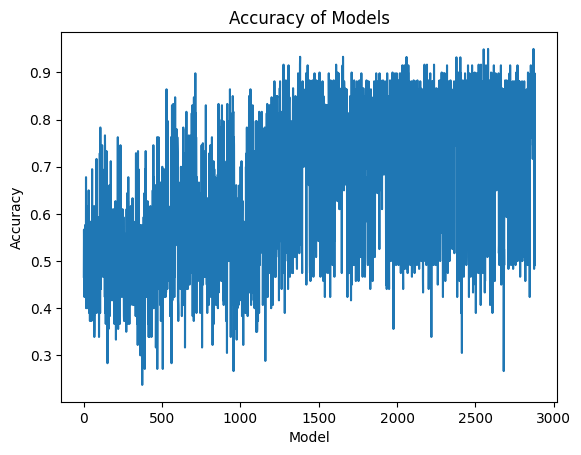

In [44]:
best_accuracy = 0.0
best_accuracy = 0.0
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []
best_hyperparameters = None
for i, lr in enumerate(learning_rate):
  for m, mt in enumerate(momentum):
    for j1, hs1 in enumerate(hidden_size1):
      for j2, hs2 in enumerate(hidden_size2):
        for w, wd in enumerate(weight_decay):
          for train_indices, test_indices in kf.split(X):
            X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
            y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
            X_train = torch.tensor(X_train.values, dtype=torch.float32)
            X_test = torch.tensor(X_test.values, dtype=torch.float32)
            y_train = torch.tensor(y_train.values, dtype=torch.float32)
            y_test = torch.tensor(y_test.values, dtype=torch.float32)
            y_train = y_train.view(-1, 1)

            model = MLP2(input_size, hs1, hs2, output_size)  # Create a new model for each combination
            optimizer = optim.SGD(model.parameters(), lr=lr, momentum=mt, weight_decay=wd)
            model.train()
            epochs = 50
            for epoch in range(epochs):
              y_pred = model(X_train)
              loss = criterion(y_pred, y_train)
          #Backpropagation
              optimizer.zero_grad()
              loss.backward()
              optimizer.step()
              if (epoch + 1) % 10 == 0:
                    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
            with torch.no_grad():
              model.eval()
              outputs = model(X_test)
              predictions = (outputs > 0.5).float()
              accuracy = accuracy_score(y_test.numpy(), predictions.numpy())
              accuracy_values.append(accuracy)
              precision = precision_score(y_test.numpy(), predictions.numpy())
              recall = recall_score(y_test.numpy(), predictions.numpy())
              f1 = f1_score(y_test.numpy(), predictions.numpy())
              print(f'Accuracy on the test set: {accuracy:.4f}')
              print(f'Precision: {precision:.4f}')
              print(f'Recall: {recall:.4f}')
              print(f'F1 Score: {f1:.4f}')
            if accuracy > best_accuracy:
              best_accuracy = accuracy
              best_hyperparameters = (lr, mt, hs1, hs2, wd)

print("Best Accuracy:", best_accuracy)
print("Best Hyperparameters:", best_hyperparameters)

plt.plot(accuracy_values)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()

We will now test the MLP with 3 Hidden Layers

Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7129
Epoch [20/50], Loss: 0.7133
Epoch [30/50], Loss: 0.7126
Epoch [40/50], Loss: 0.7130
Epoch [50/50], Loss: 0.7124
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7067
Epoch [20/50], Loss: 0.7067
Epoch [30/50], Loss: 0.7063


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.7063
Epoch [50/50], Loss: 0.7059
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6956
Epoch [20/50], Loss: 0.6964
Epoch [30/50], Loss: 0.6953
Epoch [40/50], Loss: 0.6958
Epoch [50/50], Loss: 0.6941
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6953
Epoch [20/50], Loss: 0.6947
Epoch [30/50], Loss: 0.6944
Epoch [40/50], Loss: 0.6942
Epoch [50/50], Loss: 0.6942


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6898
Epoch [20/50], Loss: 0.6895
Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6959
Epoch [20/50], Loss: 0.6955
Epoch [30/50], Loss: 0.6949
Epoch [40/50], Loss: 0.6947
Epoch [50/50], Loss: 0.6945
Accuracy on the test set: 0.4915
Precision: 0.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7065
Epoch [20/50], Loss: 0.7060
Epoch [30/50], Loss: 0.7053
Epoch [40/50], Loss: 0.7044
Epoch [50/50], Loss: 0.7045
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6897
Epoch [20/50], Loss: 0.6906
Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6944
Epoch [20/50], Loss: 0.6937
Epoch [30/50], Loss: 0.6936
Epoch [40/50], Loss: 0.6922


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6923
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7068
Epoch [20/50], Loss: 0.7072
Epoch [30/50], Loss: 0.7067
Epoch [40/50], Loss: 0.7057
Epoch [50/50], Loss: 0.7052
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6952


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6948
Epoch [30/50], Loss: 0.6942
Epoch [40/50], Loss: 0.6939
Epoch [50/50], Loss: 0.6936
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6874
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6916
Epoch [30/50], Loss: 0.6915
Epoch [40/50], Loss: 0.6921
Epoch [50/50], Loss: 0.6928
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6990


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6995
Epoch [30/50], Loss: 0.6985
Epoch [40/50], Loss: 0.6984
Epoch [50/50], Loss: 0.6978
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6928
Epoch [30/50], Loss: 0.6915
Epoch [40/50], Loss: 0.6925


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7009
Epoch [20/50], Loss: 0.7010
Epoch [30/50], Loss: 0.7013
Epoch [40/50], Loss: 0.7010
Epoch [50/50], Loss: 0.7006
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6911


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6916
Epoch [30/50], Loss: 0.6911
Epoch [40/50], Loss: 0.6908
Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6897
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6896


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6893
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6967
Epoch [20/50], Loss: 0.6973
Epoch [30/50], Loss: 0.6967
Epoch [40/50], Loss: 0.6970
Epoch [50/50], Loss: 0.6959
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6908
Epoch [20/50], Loss: 0.6903
Epoch [30/50], Loss: 0.6901
Epoch [40/50], Loss: 0.6907
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6939
Epoch [20/50], Loss: 0.6926
Epoch [30/50], Loss: 0.6933
Epoch [40/50], Loss: 0.6943
Epoch [50/50], Loss: 0.6930
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7037
Epoch [20/50], Loss: 0.7021


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.7024
Epoch [40/50], Loss: 0.7003
Epoch [50/50], Loss: 0.7025
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7024
Epoch [20/50], Loss: 0.7023
Epoch [30/50], Loss: 0.7037
Epoch [40/50], Loss: 0.7010
Epoch [50/50], Loss: 0.7012
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6953
Epoch [20/50], Loss: 0.6957
Epoch [30/50], Loss: 0.6949
Epoch [40/50], Loss: 0.6959
Epoch [50/50], Loss: 0.6946
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7003
Epoch [20/50], Loss: 0.7032
Epoch [30/50], Loss: 0.7047
Epoch [40/50], Loss: 0.6978
Epoch [50/50], Loss: 0.7101
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6892
Epoch [20/50], Loss: 0.6899
Epoch [30/50], Loss: 0.6890


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6896
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6995
Epoch [20/50], Loss: 0.6997
Epoch [30/50], Loss: 0.6989
Epoch [40/50], Loss: 0.6992
Epoch [50/50], Loss: 0.6986
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6943
Epoch [20/50], Loss: 0.6932
Epoch [30/50], Loss: 0.6936
Epoch [40/50], Loss: 0.6937
Epoch [50/50], Loss: 0.6928
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6887
Epoch [20/50], Loss: 0.6887
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6890
Epoch [50/50], Loss: 0.6889
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6940


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6935
Epoch [30/50], Loss: 0.6946
Epoch [40/50], Loss: 0.6941
Epoch [50/50], Loss: 0.6934
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6959


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6970
Epoch [30/50], Loss: 0.6974
Epoch [40/50], Loss: 0.6962
Epoch [50/50], Loss: 0.6970
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6956


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6949
Epoch [30/50], Loss: 0.6942
Epoch [40/50], Loss: 0.6948
Epoch [50/50], Loss: 0.6960
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6912
Epoch [20/50], Loss: 0.6900
Epoch [30/50], Loss: 0.6895
Epoch [40/50], Loss: 0.6904
Epoch [50/50], Loss: 0.6905
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6918
Epoch [20/50], Loss: 0.6920
Epoch [30/50], Loss: 0.6913
Epoch [40/50], Loss: 0.6907
Epoch [50/50], Loss: 0.6915
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6923
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6922
Epoch [40/50], Loss: 0.6920
Epoch [50/50], Loss: 0.6918
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7055
Epoch [20/50], Loss: 0.7051
Epoch [30/50], Loss: 0.7037


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.7050
Epoch [50/50], Loss: 0.7039
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6939
Epoch [20/50], Loss: 0.6937
Epoch [30/50], Loss: 0.6940
Epoch [40/50], Loss: 0.6930
Epoch [50/50], Loss: 0.6930
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6922
Epoch [20/50], Loss: 0.6886
Epoch [30/50], Loss: 0.6914


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6926
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6968
Epoch [20/50], Loss: 0.6962
Epoch [30/50], Loss: 0.6972
Epoch [40/50], Loss: 0.6964
Epoch [50/50], Loss: 0.6956
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6887
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6925
Epoch [20/50], Loss: 0.6924
Epoch [30/50], Loss: 0.6917
Epoch [40/50], Loss: 0.6913
Epoch [50/50], Loss: 0.6922
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6904
Epoch [20/50], Loss: 0.6910
Epoch [30/50], Loss: 0.6906
Epoch [40/50], Loss: 0.6911


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6896
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6895
Epoch [40/50], Loss: 0.6896
Epoch [50/50], Loss: 0.6893
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6942
Epoch [20/50], Loss: 0.6941
Epoch [30/50], Loss: 0.6941
Epoch [40/50], Loss: 0.6937
Epoch [50/50], Loss: 0.6938
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6949
Epoch [30/50], Loss: 0.6921


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6934
Epoch [50/50], Loss: 0.6921
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6946
Epoch [20/50], Loss: 0.6940


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6935
Epoch [40/50], Loss: 0.6933
Epoch [50/50], Loss: 0.6940
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7200
Epoch [20/50], Loss: 0.7190
Epoch [30/50], Loss: 0.7200


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.7187
Epoch [50/50], Loss: 0.7187
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7103
Epoch [20/50], Loss: 0.7091
Epoch [30/50], Loss: 0.7083
Epoch [40/50], Loss: 0.7069
Epoch [50/50], Loss: 0.7093
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6875
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6873
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7085
Epoch [20/50], Loss: 0.7081
Epoch [30/50], Loss: 0.7090
Epoch [40/50], Loss: 0.7084
Epoch [50/50], Loss: 0.7078
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7079
Epoch [20/50], Loss: 0.7083
Epoch [30/50], Loss: 0.7102
Epoch [40/50], Loss: 0.7089
Epoch [50/50], Loss: 0.7077
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7018
Epoch [20/50], Loss: 0.6989
Epoch [30/50], Loss: 0.6995
Epoch [40/50], Loss: 0.6990
Epoch [50/50], Loss: 0.7009
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6906
Epoch [40/50], Loss: 0.6910
Epoch [50/50], Loss: 0.6905
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7073
Epoch [20/50], Loss: 0.7064
Epoch [30/50], Loss: 0.7070
Epoch [40/50], Loss: 0.7054
Epoch [50/50], Loss: 0.7055
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6996
Epoch [20/50], Loss: 0.7006
Epoch [30/50], Loss: 0.7005
Epoch [40/50], Loss: 0.6983
Epoch [50/50], Loss: 0.6987
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6939
Epoch [20/50], Loss: 0.6928
Epoch [30/50], Loss: 0.6934
Epoch [40/50], Loss: 0.6943


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6940
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6900
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6950
Epoch [20/50], Loss: 0.6939


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6937
Epoch [40/50], Loss: 0.6934
Epoch [50/50], Loss: 0.6933
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6908
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6912
Epoch [50/50], Loss: 0.6917
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7060
Epoch [20/50], Loss: 0.7056


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.7069
Epoch [40/50], Loss: 0.7071
Epoch [50/50], Loss: 0.7070
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6896
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6906
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6943
Epoch [20/50], Loss: 0.6922


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6922
Epoch [50/50], Loss: 0.6914
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6900
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6901
Epoch [40/50], Loss: 0.6901
Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6903


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6905
Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6933
Epoch [20/50], Loss: 0.6951
Epoch [30/50], Loss: 0.6948
Epoch [40/50], Loss: 0.6938
Epoch [50/50], Loss: 0.6946
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6930


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6927
Epoch [30/50], Loss: 0.6920
Epoch [40/50], Loss: 0.6918
Epoch [50/50], Loss: 0.6927
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6923
Epoch [20/50], Loss: 0.6924
Epoch [30/50], Loss: 0.6930
Epoch [40/50], Loss: 0.6917
Epoch [50/50], Loss: 0.6912
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch [10/50], Loss: 0.6912
Epoch [20/50], Loss: 0.6903
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6914
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6937
Epoch [20/50], Loss: 0.6952
Epoch [30/50], Loss: 0.6940
Epoch [40/50], Loss: 0.6944
Epoch [50/50], Loss: 0.6939
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6949
Epoch [20/50], Loss: 0.6945
Epoch [30/50], Loss: 0.6952
Epoch [40/50], Loss: 0.6935
Epoch [50/50], Loss: 0.6940
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6872
Epoch [30/50], Loss: 0.6868
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6857
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6908
Epoch [30/50], Loss: 0.6911
Epoch [40/50], Loss: 0.6908
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7059
Epoch [20/50], Loss: 0.7062
Epoch [30/50], Loss: 0.7062
Epoch [40/50], Loss: 0.7056
Epoch [50/50], Loss: 0.7058
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7036
Epoch [20/50], Loss: 0.7025
Epoch [30/50], Loss: 0.7031
Epoch [40/50], Loss: 0.7027
Epoch [50/50], Loss: 0.7022


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6971
Epoch [20/50], Loss: 0.6990
Epoch [30/50], Loss: 0.6986
Epoch [40/50], Loss: 0.6973
Epoch [50/50], Loss: 0.6970
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6920
Epoch [30/50], Loss: 0.6922


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6916
Epoch [50/50], Loss: 0.6912
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6912
Epoch [20/50], Loss: 0.6887
Epoch [30/50], Loss: 0.6896
Epoch [40/50], Loss: 0.6903
Epoch [50/50], Loss: 0.6897
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6927
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6925
Epoch [40/50], Loss: 0.6926
Epoch [50/50], Loss: 0.6917
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6964
Epoch [20/50], Loss: 0.6950
Epoch [30/50], Loss: 0.6955
Epoch [40/50], Loss: 0.6946
Epoch [50/50], Loss: 0.6958
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6913
Epoch [30/50], Loss: 0.6922
Epoch [40/50], Loss: 0.6912
Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6927
Epoch [20/50], Loss: 0.6916
Epoch [30/50], Loss: 0.6905
Epoch [40/50], Loss: 0.6923
Epoch [50/50], Loss: 0.6907
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6957


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6963
Epoch [30/50], Loss: 0.6965
Epoch [40/50], Loss: 0.6960
Epoch [50/50], Loss: 0.6957
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7041
Epoch [20/50], Loss: 0.7038
Epoch [30/50], Loss: 0.7028
Epoch [40/50], Loss: 0.7031
Epoch [50/50], Loss: 0.7035
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7087
Epoch [20/50], Loss: 0.7089
Epoch [30/50], Loss: 0.7090
Epoch [40/50], Loss: 0.7085
Epoch [50/50], Loss: 0.7091
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6901
Epoch [30/50], Loss: 0.6914
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6972
Epoch [20/50], Loss: 0.6973


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6962
Epoch [40/50], Loss: 0.6971
Epoch [50/50], Loss: 0.6969
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6936
Epoch [20/50], Loss: 0.6935
Epoch [30/50], Loss: 0.6927
Epoch [40/50], Loss: 0.6934
Epoch [50/50], Loss: 0.6924
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6993
Epoch [20/50], Loss: 0.6976
Epoch [30/50], Loss: 0.6992
Epoch [40/50], Loss: 0.7003
Epoch [50/50], Loss: 0.6983
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6971
Epoch [20/50], Loss: 0.6990
Epoch [30/50], Loss: 0.6993
Epoch [40/50], Loss: 0.6982
Epoch [50/50], Loss: 0.6975
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6943


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6945
Epoch [30/50], Loss: 0.6947
Epoch [40/50], Loss: 0.6943
Epoch [50/50], Loss: 0.6948
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6902
Epoch [30/50], Loss: 0.6907
Epoch [40/50], Loss: 0.6911
Epoch [50/50], Loss: 0.6902
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6915
Epoch [20/50], Loss: 0.6916


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6903
Epoch [40/50], Loss: 0.6922
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6936


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6938
Epoch [30/50], Loss: 0.6934
Epoch [40/50], Loss: 0.6943
Epoch [50/50], Loss: 0.6938
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6954
Epoch [20/50], Loss: 0.6984
Epoch [30/50], Loss: 0.6976
Epoch [40/50], Loss: 0.6963
Epoch [50/50], Loss: 0.6975


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7182
Epoch [20/50], Loss: 0.7179
Epoch [30/50], Loss: 0.7181
Epoch [40/50], Loss: 0.7174
Epoch [50/50], Loss: 0.7174
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7194
Epoch [20/50], Loss: 0.7198
Epoch [30/50], Loss: 0.7194
Epoch [40/50], Loss: 0.7188
Epoch [50/50], Loss: 0.7188
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6876
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6876
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6977
Epoch [20/50], Loss: 0.6971
Epoch [30/50], Loss: 0.6973
Epoch [40/50], Loss: 0.6964
Epoch [50/50], Loss: 0.6963


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7003
Epoch [20/50], Loss: 0.6998
Epoch [30/50], Loss: 0.6997
Epoch [40/50], Loss: 0.7000
Epoch [50/50], Loss: 0.6985
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6890


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6896
Epoch [40/50], Loss: 0.6875
Epoch [50/50], Loss: 0.6889
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6873
Epoch [40/50], Loss: 0.6875
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6922
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6925
Epoch [40/50], Loss: 0.6910


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6928
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7009
Epoch [20/50], Loss: 0.7009
Epoch [30/50], Loss: 0.7003
Epoch [40/50], Loss: 0.6993
Epoch [50/50], Loss: 0.6980
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6946


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6950
Epoch [30/50], Loss: 0.6938
Epoch [40/50], Loss: 0.6935
Epoch [50/50], Loss: 0.6939
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6906
Epoch [30/50], Loss: 0.6898
Epoch [40/50], Loss: 0.6888


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6893
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7251
Epoch [20/50], Loss: 0.7251
Epoch [30/50], Loss: 0.7240
Epoch [40/50], Loss: 0.7234
Epoch [50/50], Loss: 0.7232
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6915
Epoch [20/50], Loss: 0.6909
Epoch [30/50], Loss: 0.6912
Epoch [40/50], Loss: 0.6915
Epoch [50/50], Loss: 0.6905
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6922
Epoch [30/50], Loss: 0.6909


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6916
Epoch [50/50], Loss: 0.6901
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6904
Epoch [20/50], Loss: 0.6919
Epoch [30/50], Loss: 0.6911
Epoch [40/50], Loss: 0.6907
Epoch [50/50], Loss: 0.6892
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6928
Epoch [20/50], Loss: 0.6937
Epoch [30/50], Loss: 0.6936
Epoch [40/50], Loss: 0.6945
Epoch [50/50], Loss: 0.6942
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6939
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6928
Epoch [40/50], Loss: 0.6935
Epoch [50/50], Loss: 0.6932
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6888


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6960
Epoch [20/50], Loss: 0.6957
Epoch [30/50], Loss: 0.6954
Epoch [40/50], Loss: 0.6957
Epoch [50/50], Loss: 0.6950
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6904


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6910
Epoch [50/50], Loss: 0.6902
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6938
Epoch [30/50], Loss: 0.6905


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6917
Epoch [50/50], Loss: 0.6937
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6963


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6963
Epoch [30/50], Loss: 0.6978
Epoch [40/50], Loss: 0.6960
Epoch [50/50], Loss: 0.6961
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6950


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6963
Epoch [30/50], Loss: 0.6958
Epoch [40/50], Loss: 0.6955
Epoch [50/50], Loss: 0.6950
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6946


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6939
Epoch [30/50], Loss: 0.6937
Epoch [40/50], Loss: 0.6926
Epoch [50/50], Loss: 0.6935
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6896


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6890
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6898
Epoch [20/50], Loss: 0.6890
Epoch [30/50], Loss: 0.6889
Epoch [40/50], Loss: 0.6890
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6975
Epoch [20/50], Loss: 0.6970
Epoch [30/50], Loss: 0.6963
Epoch [40/50], Loss: 0.6971
Epoch [50/50], Loss: 0.6969
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6918
Epoch [20/50], Loss: 0.6920
Epoch [30/50], Loss: 0.6914
Epoch [40/50], Loss: 0.6926
Epoch [50/50], Loss: 0.6920
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6948
Epoch [20/50], Loss: 0.6951


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6947
Epoch [40/50], Loss: 0.6938
Epoch [50/50], Loss: 0.6927
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6939
Epoch [20/50], Loss: 0.6941
Epoch [30/50], Loss: 0.6934
Epoch [40/50], Loss: 0.6940
Epoch [50/50], Loss: 0.6934
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6925
Epoch [20/50], Loss: 0.6929
Epoch [30/50], Loss: 0.6948
Epoch [40/50], Loss: 0.6941
Epoch [50/50], Loss: 0.6927
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6957
Epoch [20/50], Loss: 0.6944
Epoch [30/50], Loss: 0.6950
Epoch [40/50], Loss: 0.6955
Epoch [50/50], Loss: 0.6935
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6902
Epoch [20/50], Loss: 0.6899
Epoch [30/50], Loss: 0.6901
Epoch [40/50], Loss: 0.6899
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6942


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6939
Epoch [30/50], Loss: 0.6935
Epoch [40/50], Loss: 0.6942
Epoch [50/50], Loss: 0.6931
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7125
Epoch [20/50], Loss: 0.7118


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.7113
Epoch [40/50], Loss: 0.7112
Epoch [50/50], Loss: 0.7106
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6950
Epoch [20/50], Loss: 0.6957
Epoch [30/50], Loss: 0.6967
Epoch [40/50], Loss: 0.6957
Epoch [50/50], Loss: 0.6950
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6844
Epoch [20/50], Loss: 0.6829
Epoch [30/50], Loss: 0.6851
Epoch [40/50], Loss: 0.6853
Epoch [50/50], Loss: 0.6851
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6901
Epoch [30/50], Loss: 0.6915
Epoch [40/50], Loss: 0.6913
Epoch [50/50], Loss: 0.6924
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6911
Epoch [30/50], Loss: 0.6913
Epoch [40/50], Loss: 0.6916
Epoch [50/50], Loss: 0.6919
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6938


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6939
Epoch [30/50], Loss: 0.6939
Epoch [40/50], Loss: 0.6942
Epoch [50/50], Loss: 0.6945
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7012
Epoch [20/50], Loss: 0.6999
Epoch [30/50], Loss: 0.7010
Epoch [40/50], Loss: 0.7003
Epoch [50/50], Loss: 0.7003
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6980


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6975
Epoch [30/50], Loss: 0.6966
Epoch [40/50], Loss: 0.6964
Epoch [50/50], Loss: 0.6964
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6965


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6958
Epoch [30/50], Loss: 0.6961
Epoch [40/50], Loss: 0.6953
Epoch [50/50], Loss: 0.6971
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7001


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6991
Epoch [30/50], Loss: 0.6987
Epoch [40/50], Loss: 0.6987
Epoch [50/50], Loss: 0.6991
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6962
Epoch [20/50], Loss: 0.6963
Epoch [30/50], Loss: 0.6962
Epoch [40/50], Loss: 0.6959
Epoch [50/50], Loss: 0.6962
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6966
Epoch [20/50], Loss: 0.6946
Epoch [30/50], Loss: 0.6958


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6951
Epoch [50/50], Loss: 0.6942
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6987
Epoch [30/50], Loss: 0.6983
Epoch [40/50], Loss: 0.6990
Epoch [50/50], Loss: 0.6984
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7280
Epoch [20/50], Loss: 0.7264
Epoch [30/50], Loss: 0.7253
Epoch [40/50], Loss: 0.7255
Epoch [50/50], Loss: 0.7260
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6959
Epoch [20/50], Loss: 0.6967
Epoch [30/50], Loss: 0.6967
Epoch [40/50], Loss: 0.6958
Epoch [50/50], Loss: 0.6954
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7046
Epoch [20/50], Loss: 0.7046
Epoch [30/50], Loss: 0.7041
Epoch [40/50], Loss: 0.7031


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.7028
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6986
Epoch [20/50], Loss: 0.6981
Epoch [30/50], Loss: 0.6971
Epoch [40/50], Loss: 0.6981
Epoch [50/50], Loss: 0.6976
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6916
Epoch [20/50], Loss: 0.6911


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6912
Epoch [40/50], Loss: 0.6901
Epoch [50/50], Loss: 0.6898
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6981
Epoch [20/50], Loss: 0.6981
Epoch [30/50], Loss: 0.6964
Epoch [40/50], Loss: 0.6967
Epoch [50/50], Loss: 0.6973
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7010
Epoch [20/50], Loss: 0.7012
Epoch [30/50], Loss: 0.7004
Epoch [40/50], Loss: 0.7005
Epoch [50/50], Loss: 0.6994
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6982
Epoch [20/50], Loss: 0.6979


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6980
Epoch [40/50], Loss: 0.6960
Epoch [50/50], Loss: 0.6965
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6861
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6910
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6905
Epoch [50/50], Loss: 0.6897
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6891
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6889


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7029
Epoch [20/50], Loss: 0.7026
Epoch [30/50], Loss: 0.7021
Epoch [40/50], Loss: 0.7027
Epoch [50/50], Loss: 0.7025
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6956
Epoch [20/50], Loss: 0.6950
Epoch [30/50], Loss: 0.6954
Epoch [40/50], Loss: 0.6949
Epoch [50/50], Loss: 0.6951
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7032
Epoch [20/50], Loss: 0.7038
Epoch [30/50], Loss: 0.7037
Epoch [40/50], Loss: 0.7037
Epoch [50/50], Loss: 0.7032
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6995
Epoch [20/50], Loss: 0.6992
Epoch [30/50], Loss: 0.6987
Epoch [40/50], Loss: 0.7003


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6994
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6991
Epoch [20/50], Loss: 0.6991
Epoch [30/50], Loss: 0.7001
Epoch [40/50], Loss: 0.6992
Epoch [50/50], Loss: 0.7001
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6904


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6912
Epoch [30/50], Loss: 0.6907
Epoch [40/50], Loss: 0.6913
Epoch [50/50], Loss: 0.6897
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6912
Epoch [20/50], Loss: 0.6915
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6915
Epoch [50/50], Loss: 0.6912
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6916
Epoch [20/50], Loss: 0.6924
Epoch [30/50], Loss: 0.6913


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6928
Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6939
Epoch [20/50], Loss: 0.6933
Epoch [30/50], Loss: 0.6934
Epoch [40/50], Loss: 0.6923
Epoch [50/50], Loss: 0.6924
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6940
Epoch [20/50], Loss: 0.6952
Epoch [30/50], Loss: 0.6939
Epoch [40/50], Loss: 0.6930
Epoch [50/50], Loss: 0.6939
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6948
Epoch [20/50], Loss: 0.6947
Epoch [30/50], Loss: 0.6969
Epoch [40/50], Loss: 0.6945
Epoch [50/50], Loss: 0.6957
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6898


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6899
Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6895
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7099
Epoch [20/50], Loss: 0.7099
Epoch [30/50], Loss: 0.7114
Epoch [40/50], Loss: 0.7096
Epoch [50/50], Loss: 0.7105
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6873
Epoch [30/50], Loss: 0.6875


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6922
Epoch [20/50], Loss: 0.6916
Epoch [30/50], Loss: 0.6914
Epoch [40/50], Loss: 0.6919
Epoch [50/50], Loss: 0.6913
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6970
Epoch [20/50], Loss: 0.6958
Epoch [30/50], Loss: 0.6950
Epoch [40/50], Loss: 0.6956
Epoch [50/50], Loss: 0.6956
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6908
Epoch [20/50], Loss: 0.6927
Epoch [30/50], Loss: 0.6918
Epoch [40/50], Loss: 0.6919
Epoch [50/50], Loss: 0.6907
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6861
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6872
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6928
Epoch [20/50], Loss: 0.6927


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6926
Epoch [40/50], Loss: 0.6930
Epoch [50/50], Loss: 0.6937
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6920


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6920
Epoch [40/50], Loss: 0.6927
Epoch [50/50], Loss: 0.6927
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6935
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6931
Epoch [40/50], Loss: 0.6935
Epoch [50/50], Loss: 0.6924
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6947


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6945
Epoch [30/50], Loss: 0.6938
Epoch [40/50], Loss: 0.6946
Epoch [50/50], Loss: 0.6943
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6964
Epoch [20/50], Loss: 0.6945


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6962
Epoch [40/50], Loss: 0.6954
Epoch [50/50], Loss: 0.6956
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7101
Epoch [20/50], Loss: 0.7092
Epoch [30/50], Loss: 0.7099
Epoch [40/50], Loss: 0.7095
Epoch [50/50], Loss: 0.7098
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6899


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6902
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7222

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch [20/50], Loss: 0.7208
Epoch [30/50], Loss: 0.7203
Epoch [40/50], Loss: 0.7199
Epoch [50/50], Loss: 0.7204
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6902


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6907
Epoch [30/50], Loss: 0.6899
Epoch [40/50], Loss: 0.6905
Epoch [50/50], Loss: 0.6915
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6972
Epoch [20/50], Loss: 0.6969


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6968
Epoch [40/50], Loss: 0.6962
Epoch [50/50], Loss: 0.6959
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6957
Epoch [20/50], Loss: 0.6941
Epoch [30/50], Loss: 0.6945
Epoch [40/50], Loss: 0.6952
Epoch [50/50], Loss: 0.6938
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6879


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6875
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6968
Epoch [20/50], Loss: 0.6962


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6958
Epoch [40/50], Loss: 0.6970
Epoch [50/50], Loss: 0.6958
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6960
Epoch [20/50], Loss: 0.6963
Epoch [30/50], Loss: 0.6971
Epoch [40/50], Loss: 0.6974
Epoch [50/50], Loss: 0.6964
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6911


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6902
Epoch [30/50], Loss: 0.6913
Epoch [40/50], Loss: 0.6899
Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.4915

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6944
Epoch [20/50], Loss: 0.6930
Epoch [30/50], Loss: 0.6928
Epoch [40/50], Loss: 0.6946
Epoch [50/50], Loss: 0.6940
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6896
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6898
Epoch [40/50], Loss: 0.6911
Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6886
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6916


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6917
Epoch [50/50], Loss: 0.6906
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6897
Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6901
Epoch [40/50], Loss: 0.6903
Epoch [50/50], Loss: 0.6897
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6896
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6897
Epoch [20/50], Loss: 0.6891
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7037
Epoch [20/50], Loss: 0.7036
Epoch [30/50], Loss: 0.7029
Epoch [40/50], Loss: 0.7033
Epoch [50/50], Loss: 0.7015
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6908
Epoch [20/50], Loss: 0.6910
Epoch [30/50], Loss: 0.6911
Epoch [40/50], Loss: 0.6903
Epoch [50/50], Loss: 0.6903
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6912
Epoch [20/50], Loss: 0.6908
Epoch [30/50], Loss: 0.6903
Epoch [40/50], Loss: 0.6899
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6901
Epoch [20/50], Loss: 0.6899
Epoch [30/50], Loss: 0.6899
Epoch [40/50], Loss: 0.6895
Epoch [50/50], Loss: 0.6901
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6950
Epoch [20/50], Loss: 0.6940
Epoch [30/50], Loss: 0.6936
Epoch [40/50], Loss: 0.6936
Epoch [50/50], Loss: 0.6931
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6919
Epoch [30/50], Loss: 0.6862
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6929
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6921
Epoch [40/50], Loss: 0.6941
Epoch [50/50], Loss: 0.6925
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6902
Epoch [20/50], Loss: 0.6895
Epoch [30/50], Loss: 0.6898
Epoch [40/50], Loss: 0.6898
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6874


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6870
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6906
Epoch [40/50], Loss: 0.6910
Epoch [50/50], Loss: 0.6903
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6936
Epoch [20/50], Loss: 0.6951
Epoch [30/50], Loss: 0.6947
Epoch [40/50], Loss: 0.6944
Epoch [50/50], Loss: 0.6949
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6988
Epoch [20/50], Loss: 0.6992
Epoch [30/50], Loss: 0.6983
Epoch [40/50], Loss: 0.6996
Epoch [50/50], Loss: 0.6992
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.0000
Epoch [10/50], Loss: 0.6996
Epoch [20/50], Loss: 0.6994
Epoch [30/50], Loss: 0.6992
Epoch [40/50], Loss: 0.6989
Epoch [50/50], Loss: 0.6980
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6963
Epoch [20/50], Loss: 0.6961
Epoch [30/50], Loss: 0.6969
Epoch [40/50], Loss: 0.6953
Epoch [50/50], Loss: 0.6949
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6957
Epoch [20/50], Loss: 0.6946
Epoch [30/50], Loss: 0.6950
Epoch [40/50], Loss: 0.6948
Epoch [50/50], Loss: 0.6952
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6966
Epoch [20/50], Loss: 0.6967
Epoch [30/50], Loss: 0.6963


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6969
Epoch [50/50], Loss: 0.6962
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6931
Epoch [20/50], Loss: 0.6917
Epoch [30/50], Loss: 0.6922
Epoch [40/50], Loss: 0.6918
Epoch [50/50], Loss: 0.6901
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6906


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6909
Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6890
Epoch [50/50], Loss: 0.6924
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6865
Epoch [20/50], Loss: 0.6865
Epoch [30/50], Loss: 0.6864
Epoch [40/50], Loss: 0.6871
Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7098


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7093
Epoch [30/50], Loss: 0.7089
Epoch [40/50], Loss: 0.7087
Epoch [50/50], Loss: 0.7087
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6901
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6921


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6908
Epoch [30/50], Loss: 0.6914
Epoch [40/50], Loss: 0.6910
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6903
Epoch [30/50], Loss: 0.6905
Epoch [40/50], Loss: 0.6903
Epoch [50/50], Loss: 0.6896
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6967
Epoch [20/50], Loss: 0.6964
Epoch [30/50], Loss: 0.6955
Epoch [40/50], Loss: 0.6958
Epoch [50/50], Loss: 0.6949
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6896
Epoch [20/50], Loss: 0.6902
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6908
Epoch [30/50], Loss: 0.6905
Epoch [40/50], Loss: 0.6907
Epoch [50/50], Loss: 0.6909
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6919
Epoch [20/50], Loss: 0.6917


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6928
Epoch [40/50], Loss: 0.6925
Epoch [50/50], Loss: 0.6915
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6969
Epoch [20/50], Loss: 0.6956
Epoch [30/50], Loss: 0.6950
Epoch [40/50], Loss: 0.6936


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6960
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6897
Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6896
Epoch [40/50], Loss: 0.6898
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6922
Epoch [20/50], Loss: 0.6922
Epoch [30/50], Loss: 0.6920
Epoch [40/50], Loss: 0.6922
Epoch [50/50], Loss: 0.6917
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6923
Epoch [20/50], Loss: 0.6934
Epoch [30/50], Loss: 0.6925
Epoch [40/50], Loss: 0.6918
Epoch [50/50], Loss: 0.6929
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6904
Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6903
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6865
Epoch [30/50], Loss: 0.6871


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6869
Epoch [50/50], Loss: 0.6852
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6927
Epoch [20/50], Loss: 0.6919
Epoch [30/50], Loss: 0.6917
Epoch [40/50], Loss: 0.6902
Epoch [50/50], Loss: 0.6915
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7011


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6999
Epoch [30/50], Loss: 0.6990
Epoch [40/50], Loss: 0.6984
Epoch [50/50], Loss: 0.6988
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6860
Epoch [40/50], Loss: 0.6886


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6902
Epoch [40/50], Loss: 0.6905
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6944
Epoch [20/50], Loss: 0.6943
Epoch [30/50], Loss: 0.6943
Epoch [40/50], Loss: 0.6942
Epoch [50/50], Loss: 0.6939
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6922
Epoch [20/50], Loss: 0.6929


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6920
Epoch [40/50], Loss: 0.6917
Epoch [50/50], Loss: 0.6917
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6896
Epoch [20/50], Loss: 0.6896


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6890
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6894


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6898
Epoch [40/50], Loss: 0.6912
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7229
Epoch [20/50], Loss: 0.7224
Epoch [30/50], Loss: 0.7211
Epoch [40/50], Loss: 0.7212
Epoch [50/50], Loss: 0.7201
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7119
Epoch [20/50], Loss: 0.7121
Epoch [30/50], Loss: 0.7108
Epoch [40/50], Loss: 0.7102
Epoch [50/50], Loss: 0.7099
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6932


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6931
Epoch [30/50], Loss: 0.6930
Epoch [40/50], Loss: 0.6919
Epoch [50/50], Loss: 0.6934
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6916
Epoch [20/50], Loss: 0.6924
Epoch [30/50], Loss: 0.6901
Epoch [40/50], Loss: 0.6901
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6969


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6947
Epoch [30/50], Loss: 0.6950
Epoch [40/50], Loss: 0.6943
Epoch [50/50], Loss: 0.6946
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6901
Epoch [30/50], Loss: 0.6916
Epoch [40/50], Loss: 0.6899
Epoch [50/50], Loss: 0.6902
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6904


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6903
Epoch [40/50], Loss: 0.6895
Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6908
Epoch [20/50], Loss: 0.6893
Epoch [30/50], Loss: 0.6905
Epoch [40/50], Loss: 0.6899
Epoch [50/50], Loss: 0.6901
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6927
Epoch [20/50], Loss: 0.6929
Epoch [30/50], Loss: 0.6925
Epoch [40/50], Loss: 0.6910
Epoch [50/50], Loss: 0.6919
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6891
Epoch [20/50], Loss: 0.6890
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6889


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6858
Epoch [30/50], Loss: 0.6853
Epoch [40/50], Loss: 0.6864
Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6869


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6874
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7214
Epoch [20/50], Loss: 0.7209
Epoch [30/50], Loss: 0.7206
Epoch [40/50], Loss: 0.7207
Epoch [50/50], Loss: 0.7190
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6887


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6889
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6920
Epoch [20/50], Loss: 0.6907
Epoch [30/50], Loss: 0.6907
Epoch [40/50], Loss: 0.6905
Epoch [50/50], Loss: 0.6915
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6916
Epoch [20/50], Loss: 0.6915
Epoch [30/50], Loss: 0.6909
Epoch [40/50], Loss: 0.6915
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7021
Epoch [20/50], Loss: 0.7022
Epoch [30/50], Loss: 0.7028
Epoch [40/50], Loss: 0.7019
Epoch [50/50], Loss: 0.7018


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6889
Epoch [30/50], Loss: 0.6868
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6877
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6905


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6903
Epoch [50/50], Loss: 0.6900
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6932
Epoch [20/50], Loss: 0.6936
Epoch [30/50], Loss: 0.6938
Epoch [40/50], Loss: 0.6943
Epoch [50/50], Loss: 0.6945
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6929
Epoch [20/50], Loss: 0.6938
Epoch [30/50], Loss: 0.6934
Epoch [40/50], Loss: 0.6928
Epoch [50/50], Loss: 0.6927
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6911
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6867
Epoch [30/50], Loss: 0.6863
Epoch [40/50], Loss: 0.6864


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6869
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7200
Epoch [20/50], Loss: 0.7198
Epoch [30/50], Loss: 0.7196
Epoch [40/50], Loss: 0.7197
Epoch [50/50], Loss: 0.7193
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7023
Epoch [20/50], Loss: 0.7017
Epoch [30/50], Loss: 0.7026
Epoch [40/50], Loss: 0.7019
Epoch [50/50], Loss: 0.7024
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6950
Epoch [20/50], Loss: 0.6947
Epoch [30/50], Loss: 0.6934
Epoch [40/50], Loss: 0.6942
Epoch [50/50], Loss: 0.6949
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6898
Epoch [20/50], Loss: 0.6891
Epoch [30/50], Loss: 0.6908


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6901
Epoch [50/50], Loss: 0.6902
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6992
Epoch [20/50], Loss: 0.6973
Epoch [30/50], Loss: 0.6997
Epoch [40/50], Loss: 0.6985
Epoch [50/50], Loss: 0.6964
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6938
Epoch [20/50], Loss: 0.6945
Epoch [30/50], Loss: 0.6939
Epoch [40/50], Loss: 0.6942
Epoch [50/50], Loss: 0.6936
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6958
Epoch [20/50], Loss: 0.6988
Epoch [30/50], Loss: 0.6962
Epoch [40/50], Loss: 0.6971
Epoch [50/50], Loss: 0.6964
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6952
Epoch [20/50], Loss: 0.6967
Epoch [30/50], Loss: 0.6956
Epoch [40/50], Loss: 0.6949
Epoch [50/50], Loss: 0.6947
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6946
Epoch [20/50], Loss: 0.6936
Epoch [30/50], Loss: 0.6942
Epoch [40/50], Loss: 0.6929
Epoch [50/50], Loss: 0.6931
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6971
Epoch [20/50], Loss: 0.6965
Epoch [30/50], Loss: 0.6968


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6960
Epoch [50/50], Loss: 0.6976
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6974
Epoch [20/50], Loss: 0.6979


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6970
Epoch [40/50], Loss: 0.6964
Epoch [50/50], Loss: 0.6957
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7178
Epoch [20/50], Loss: 0.7177


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.7178
Epoch [40/50], Loss: 0.7160
Epoch [50/50], Loss: 0.7165
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7045
Epoch [20/50], Loss: 0.7027
Epoch [30/50], Loss: 0.7051
Epoch [40/50], Loss: 0.7057
Epoch [50/50], Loss: 0.7042
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7232
Epoch [20/50], Loss: 0.7225
Epoch [30/50], Loss: 0.7219
Epoch [40/50], Loss: 0.7217


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.7205
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6914
Epoch [30/50], Loss: 0.6918
Epoch [40/50], Loss: 0.6922
Epoch [50/50], Loss: 0.6927
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6993
Epoch [20/50], Loss: 0.6985
Epoch [30/50], Loss: 0.6988
Epoch [40/50], Loss: 0.6983


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6993
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6972
Epoch [20/50], Loss: 0.6934
Epoch [30/50], Loss: 0.6937
Epoch [40/50], Loss: 0.6959


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6951
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6918
Epoch [20/50], Loss: 0.6916
Epoch [30/50], Loss: 0.6917


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6916
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6967
Epoch [20/50], Loss: 0.6950


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6949
Epoch [40/50], Loss: 0.6963
Epoch [50/50], Loss: 0.6960
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6917


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6919
Epoch [40/50], Loss: 0.6915
Epoch [50/50], Loss: 0.6921
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6923
Epoch [30/50], Loss: 0.6928
Epoch [40/50], Loss: 0.6931
Epoch [50/50], Loss: 0.6933
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6929
Epoch [20/50], Loss: 0.6936


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6924
Epoch [40/50], Loss: 0.6927
Epoch [50/50], Loss: 0.6912
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6948
Epoch [20/50], Loss: 0.6946


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6944
Epoch [40/50], Loss: 0.6949
Epoch [50/50], Loss: 0.6943
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7102
Epoch [20/50], Loss: 0.7096
Epoch [30/50], Loss: 0.7092
Epoch [40/50], Loss: 0.7096


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.7101
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6871
Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6875
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6886
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6882


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6902
Epoch [20/50], Loss: 0.6902
Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6907
Epoch [50/50], Loss: 0.6905
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6919
Epoch [30/50], Loss: 0.6923
Epoch [40/50], Loss: 0.6919


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6875
Epoch [40/50], Loss: 0.6891
Epoch [50/50], Loss: 0.6872
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6941
Epoch [20/50], Loss: 0.6923
Epoch [30/50], Loss: 0.6923


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6936
Epoch [50/50], Loss: 0.6919
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6918
Epoch [30/50], Loss: 0.6917
Epoch [40/50], Loss: 0.6915
Epoch [50/50], Loss: 0.6901
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6957
Epoch [20/50], Loss: 0.6941
Epoch [30/50], Loss: 0.6949


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6953
Epoch [50/50], Loss: 0.6926
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6896
Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6891
Epoch [50/50], Loss: 0.6889
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6931
Epoch [20/50], Loss: 0.6913


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6921
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6900
Epoch [30/50], Loss: 0.6906
Epoch [40/50], Loss: 0.6908
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7044
Epoch [20/50], Loss: 0.7040
Epoch [30/50], Loss: 0.7038
Epoch [40/50], Loss: 0.7045
Epoch [50/50], Loss: 0.7041
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6924
Epoch [30/50], Loss: 0.6899
Epoch [40/50], Loss: 0.6923
Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6926
Epoch [20/50], Loss: 0.6924
Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6907
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6897
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6910


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6900
Epoch [50/50], Loss: 0.6917
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6966
Epoch [20/50], Loss: 0.6951
Epoch [30/50], Loss: 0.6951
Epoch [40/50], Loss: 0.6940
Epoch [50/50], Loss: 0.6954
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6906


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6908
Epoch [30/50], Loss: 0.6896
Epoch [40/50], Loss: 0.6920
Epoch [50/50], Loss: 0.6906
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6972
Epoch [20/50], Loss: 0.6977
Epoch [30/50], Loss: 0.6974
Epoch [40/50], Loss: 0.6977


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6963
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6959
Epoch [20/50], Loss: 0.6943
Epoch [30/50], Loss: 0.6955
Epoch [40/50], Loss: 0.6923
Epoch [50/50], Loss: 0.6933
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6944


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6942
Epoch [30/50], Loss: 0.6941
Epoch [40/50], Loss: 0.6932
Epoch [50/50], Loss: 0.6934
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6942
Epoch [20/50], Loss: 0.6945
Epoch [30/50], Loss: 0.6947
Epoch [40/50], Loss: 0.6950
Epoch [50/50], Loss: 0.6948
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6960
Epoch [20/50], Loss: 0.6967
Epoch [30/50], Loss: 0.6957
Epoch [40/50], Loss: 0.6948
Epoch [50/50], Loss: 0.6944
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6942


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6942
Epoch [30/50], Loss: 0.6945
Epoch [40/50], Loss: 0.6942
Epoch [50/50], Loss: 0.6946
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7166
Epoch [20/50], Loss: 0.7170
Epoch [30/50], Loss: 0.7168
Epoch [40/50], Loss: 0.7152


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.7156
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6877
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6922
Epoch [20/50], Loss: 0.6917


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6909
Epoch [40/50], Loss: 0.6919
Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6906
Epoch [40/50], Loss: 0.6903
Epoch [50/50], Loss: 0.6889
Accuracy on the test set: 0.4915

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7029
Epoch [20/50], Loss: 0.7034
Epoch [30/50], Loss: 0.7029
Epoch [40/50], Loss: 0.7023
Epoch [50/50], Loss: 0.7023
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6916
Epoch [20/50], Loss: 0.6940
Epoch [30/50], Loss: 0.6934
Epoch [40/50], Loss: 0.6931
Epoch [50/50], Loss: 0.6932
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6936
Epoch [30/50], Loss: 0.6936


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6932
Epoch [50/50], Loss: 0.6942
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6938
Epoch [20/50], Loss: 0.6934
Epoch [30/50], Loss: 0.6938
Epoch [40/50], Loss: 0.6937
Epoch [50/50], Loss: 0.6930


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6953
Epoch [20/50], Loss: 0.6949
Epoch [30/50], Loss: 0.6947
Epoch [40/50], Loss: 0.6945
Epoch [50/50], Loss: 0.6944
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6943
Epoch [20/50], Loss: 0.6934
Epoch [30/50], Loss: 0.6923
Epoch [40/50], Loss: 0.6936
Epoch [50/50], Loss: 0.6942
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6940


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6941
Epoch [30/50], Loss: 0.6945
Epoch [40/50], Loss: 0.6936
Epoch [50/50], Loss: 0.6932
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6933


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6921
Epoch [30/50], Loss: 0.6931
Epoch [40/50], Loss: 0.6926
Epoch [50/50], Loss: 0.6922
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7137
Epoch [20/50], Loss: 0.7137
Epoch [30/50], Loss: 0.7139
Epoch [40/50], Loss: 0.7130
Epoch [50/50], Loss: 0.7122
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7189
Epoch [20/50], Loss: 0.7176
Epoch [30/50], Loss: 0.7167
Epoch [40/50], Loss: 0.7166


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.7167
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6862
Epoch [20/50], Loss: 0.6869
Epoch [30/50], Loss: 0.6854
Epoch [40/50], Loss: 0.6862
Epoch [50/50], Loss: 0.6848
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6942
Epoch [20/50], Loss: 0.6942
Epoch [30/50], Loss: 0.6932
Epoch [40/50], Loss: 0.6940
Epoch [50/50], Loss: 0.6939
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6980
Epoch [20/50], Loss: 0.6971
Epoch [30/50], Loss: 0.6977
Epoch [40/50], Loss: 0.6975
Epoch [50/50], Loss: 0.6977
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6939
Epoch [20/50], Loss: 0.6939


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6938
Epoch [40/50], Loss: 0.6925
Epoch [50/50], Loss: 0.6931
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6925


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6914
Epoch [40/50], Loss: 0.6918
Epoch [50/50], Loss: 0.6918
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6877


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6950


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6960
Epoch [30/50], Loss: 0.6945
Epoch [40/50], Loss: 0.6955
Epoch [50/50], Loss: 0.6945
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6971
Epoch [20/50], Loss: 0.6972
Epoch [30/50], Loss: 0.6966
Epoch [40/50], Loss: 0.6965
Epoch [50/50], Loss: 0.6967
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6920
Epoch [30/50], Loss: 0.6918


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6915
Epoch [50/50], Loss: 0.6913
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6971
Epoch [20/50], Loss: 0.6967
Epoch [30/50], Loss: 0.6954
Epoch [40/50], Loss: 0.6959
Epoch [50/50], Loss: 0.6964
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7250
Epoch [20/50], Loss: 0.7242
Epoch [30/50], Loss: 0.7240
Epoch [40/50], Loss: 0.7237


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.7226
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6903
Epoch [40/50], Loss: 0.6910
Epoch [50/50], Loss: 0.6903
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6944
Epoch [20/50], Loss: 0.6944
Epoch [30/50], Loss: 0.6940


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6927
Epoch [50/50], Loss: 0.6932
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6916
Epoch [20/50], Loss: 0.6912
Epoch [30/50], Loss: 0.6913
Epoch [40/50], Loss: 0.6911
Epoch [50/50], Loss: 0.6917
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6987


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6974
Epoch [30/50], Loss: 0.6982
Epoch [40/50], Loss: 0.6976
Epoch [50/50], Loss: 0.6986
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6977
Epoch [20/50], Loss: 0.6979
Epoch [30/50], Loss: 0.6981
Epoch [40/50], Loss: 0.6999
Epoch [50/50], Loss: 0.6977
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6875
Epoch [20/50], Loss: 0.6868
Epoch [30/50], Loss: 0.6889
Epoch [40/50], Loss: 0.6876
Epoch [50/50], Loss: 0.6873
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7069


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7044
Epoch [30/50], Loss: 0.7033
Epoch [40/50], Loss: 0.7007
Epoch [50/50], Loss: 0.7006
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6888


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6896
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6875
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6887
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6940
Epoch [20/50], Loss: 0.6946
Epoch [30/50], Loss: 0.6935


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6936
Epoch [50/50], Loss: 0.6940
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7090
Epoch [20/50], Loss: 0.7091
Epoch [30/50], Loss: 0.7095
Epoch [40/50], Loss: 0.7078
Epoch [50/50], Loss: 0.7072
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6893
Epoch [30/50], Loss: 0.6890
Epoch [40/50], Loss: 0.6888

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6892
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6982
Epoch [20/50], Loss: 0.6980
Epoch [30/50], Loss: 0.6976


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6971
Epoch [50/50], Loss: 0.6982
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6843
Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6870


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6869
Epoch [50/50], Loss: 0.6869
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6923
Epoch [20/50], Loss: 0.6921
Epoch [30/50], Loss: 0.6924


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6908
Epoch [50/50], Loss: 0.6930
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6913
Epoch [30/50], Loss: 0.6914


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6914
Epoch [50/50], Loss: 0.6909
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6957
Epoch [20/50], Loss: 0.6959
Epoch [30/50], Loss: 0.6960


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6956
Epoch [50/50], Loss: 0.6965
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6994
Epoch [20/50], Loss: 0.7000
Epoch [30/50], Loss: 0.7007


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6979
Epoch [50/50], Loss: 0.6982
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6932


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6926
Epoch [40/50], Loss: 0.6936
Epoch [50/50], Loss: 0.6938
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6947


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6944
Epoch [30/50], Loss: 0.6924
Epoch [40/50], Loss: 0.6944
Epoch [50/50], Loss: 0.6927
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6891
Epoch [20/50], Loss: 0.6886
Epoch [30/50], Loss: 0.6872
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6865
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7066
Epoch [20/50], Loss: 0.7069
Epoch [30/50], Loss: 0.7071


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.7073
Epoch [50/50], Loss: 0.7063
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7024
Epoch [20/50], Loss: 0.7022


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.7025
Epoch [40/50], Loss: 0.7019
Epoch [50/50], Loss: 0.7017
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6990


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7002
Epoch [30/50], Loss: 0.7001
Epoch [40/50], Loss: 0.6998
Epoch [50/50], Loss: 0.7005
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6987


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6977
Epoch [30/50], Loss: 0.6970
Epoch [40/50], Loss: 0.7000
Epoch [50/50], Loss: 0.6970
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7012
Epoch [20/50], Loss: 0.7005
Epoch [30/50], Loss: 0.6999
Epoch [40/50], Loss: 0.7008
Epoch [50/50], Loss: 0.7009
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6988
Epoch [20/50], Loss: 0.6997
Epoch [30/50], Loss: 0.6987


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6989
Epoch [50/50], Loss: 0.6983
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6902
Epoch [20/50], Loss: 0.6912
Epoch [30/50], Loss: 0.6901


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6912
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6886
Epoch [20/50], Loss: 0.6889
Epoch [30/50], Loss: 0.6895


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6891
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6918


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6920
Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6901
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6987
Epoch [20/50], Loss: 0.6984


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6981
Epoch [40/50], Loss: 0.6980
Epoch [50/50], Loss: 0.6965
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6938


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6922
Epoch [30/50], Loss: 0.6927
Epoch [40/50], Loss: 0.6926
Epoch [50/50], Loss: 0.6922
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6876
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6893
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7226
Epoch [20/50], Loss: 0.7221
Epoch [30/50], Loss: 0.7213
Epoch [40/50], Loss: 0.7215
Epoch [50/50], Loss: 0.7206
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6895


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6964
Epoch [20/50], Loss: 0.6965
Epoch [30/50], Loss: 0.6964
Epoch [40/50], Loss: 0.6962
Epoch [50/50], Loss: 0.6969
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6936
Epoch [20/50], Loss: 0.6935


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6943
Epoch [40/50], Loss: 0.6936
Epoch [50/50], Loss: 0.6937
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6926
Epoch [30/50], Loss: 0.6933
Epoch [40/50], Loss: 0.6937
Epoch [50/50], Loss: 0.6929
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6889
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6906


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6896
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6951


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6953
Epoch [30/50], Loss: 0.6947
Epoch [40/50], Loss: 0.6942
Epoch [50/50], Loss: 0.6948
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6946
Epoch [20/50], Loss: 0.6940
Epoch [30/50], Loss: 0.6935
Epoch [40/50], Loss: 0.6936
Epoch [50/50], Loss: 0.6930
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6888


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6872
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6944
Epoch [20/50], Loss: 0.6942


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6935
Epoch [40/50], Loss: 0.6952
Epoch [50/50], Loss: 0.6925
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7140
Epoch [20/50], Loss: 0.7131
Epoch [30/50], Loss: 0.7114


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.7095
Epoch [50/50], Loss: 0.7079
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7183
Epoch [20/50], Loss: 0.7160
Epoch [30/50], Loss: 0.7143
Epoch [40/50], Loss: 0.7102
Epoch [50/50], Loss: 0.7072
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6886
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6867
Epoch [50/50], Loss: 0.6891


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6982
Epoch [20/50], Loss: 0.6959
Epoch [30/50], Loss: 0.6943
Epoch [40/50], Loss: 0.6917
Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6908
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6898
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6893
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6876
Epoch [20/50], Loss: 0.6872
Epoch [30/50], Loss: 0.6860
Epoch [40/50], Loss: 0.6852
Epoch [50/50], Loss: 0.6855
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6902
Epoch [30/50], Loss: 0.6895
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.69

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6914
Epoch [30/50], Loss: 0.6905
Epoch [40/50], Loss: 0.6895
Epoch [50/50], Loss: 0.6889
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6902
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6895
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6968


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6937
Epoch [30/50], Loss: 0.6912
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6953
Epoch [20/50], Loss: 0.6944
Epoch [30/50], Loss: 0.6925
Epoch [40/50], Loss: 0.6903
Epoch [50/50], Loss: 0.6909
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6923


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6869
Epoch [40/50], Loss: 0.6863
Epoch [50/50], Loss: 0.6848
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6898
Epoch [20/50], Loss: 0.6904
Epoch [30/50], Loss: 0.6907
Epoch [40/50], Loss: 0.6896
Epoch [50/50], Loss: 0.6889
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6873


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6849
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7109
Epoch [20/50], Loss: 0.7071
Epoch [30/50], Loss: 0.7044
Epoch [40/50], Loss: 0.7025
Epoch [50/50], Loss: 0.6991
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6927


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6915
Epoch [30/50], Loss: 0.6913
Epoch [40/50], Loss: 0.6906
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6908
Epoch [20/50], Loss: 0.6934
Epoch [30/50], Loss: 0.6903
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6960
Epoch [20/50], Loss: 0.6928
Epoch [30/50], Loss: 0.6941
Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6906
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7011
Epoch [20/50], Loss: 0.7002
Epoch [30/50], Loss: 0.6984
Epoch [40/50], Loss: 0.6960
Epoch [50/50], Loss: 0.6948
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6928
Epoch [20/50], Loss: 0.6914


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6902
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6926
Epoch [20/50], Loss: 0.6909
Epoch [30/50], Loss: 0.6915
Epoch [40/50], Loss: 0.6903
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6904


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6895
Epoch [40/50], Loss: 0.6895
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7002
Epoch [20/50], Loss: 0.6988
Epoch [30/50], Loss: 0.6965
Epoch [40/50], Loss: 0.6974


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6951
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6886
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7219
Epoch [20/50], Loss: 0.7190


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.7161
Epoch [40/50], Loss: 0.7116
Epoch [50/50], Loss: 0.7080
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7123
Epoch [20/50], Loss: 0.7081
Epoch [30/50], Loss: 0.7052
Epoch [40/50], Loss: 0.7030
Epoch [50/50], Loss: 0.7016
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6892
Epoch [20/50], Loss: 0.6895
Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6891
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6984
Epoch [20/50], Loss: 0.7001
Epoch [30/50], Loss: 0.6946
Epoch [40/50], Loss: 0.6939
Epoch [50/50], Loss: 0.6920
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6953
Epoch [20/50], Loss: 0.6916
Epoch [30/50], Loss: 0.6898


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6902
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6891
Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6942
Epoch [20/50], Loss: 0.6939


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6929
Epoch [40/50], Loss: 0.6917
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6957
Epoch [20/50], Loss: 0.6940
Epoch [30/50], Loss: 0.6924
Epoch [40/50], Loss: 0.6923


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6966
Epoch [20/50], Loss: 0.6953
Epoch [30/50], Loss: 0.6934
Epoch [40/50], Loss: 0.6916
Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6923
Epoch [20/50], Loss: 0.6915


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6902
Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6909
Epoch [30/50], Loss: 0.6899
Epoch [40/50], Loss: 0.6896
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6975
Epoch [20/50], Loss: 0.6958
Epoch [30/50], Loss: 0.6915
Epoch [40/50], Loss: 0.6903
Epoch [50/50], Loss: 0.6892
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6867


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6862
Epoch [30/50], Loss: 0.6846
Epoch [40/50], Loss: 0.6843
Epoch [50/50], Loss: 0.6831
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6864
Epoch [30/50], Loss: 0.6848
Epoch [40/50], Loss: 0.6833
Epoch [50/50], Loss: 0.6809
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6894


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6891
Epoch [40/50], Loss: 0.6887
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6929
Epoch [20/50], Loss: 0.6920

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6903


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6890
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6981
Epoch [20/50], Loss: 0.6960


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6943
Epoch [40/50], Loss: 0.6927
Epoch [50/50], Loss: 0.6913
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6907
Epoch [30/50], Loss: 0.6895
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6866
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6905


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6899
Epoch [40/50], Loss: 0.6891
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6908
Epoch [20/50], Loss: 0.6907


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6904
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6948


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6941
Epoch [30/50], Loss: 0.6930
Epoch [40/50], Loss: 0.6920
Epoch [50/50], Loss: 0.6911
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6949
Epoch [20/50], Loss: 0.6929


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6924
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6925


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6901
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6872
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7188
Epoch [20/50], Loss: 0.7169
Epoch [30/50], Loss: 0.7134
Epoch [40/50], Loss: 0.7119
Epoch [50/50], Loss: 0.7102
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7253
Epoch [20/50], Loss: 0.7231
Epoch [30/50], Loss: 0.7177
Epoch [40/50], Loss: 0.7123
Epoch [50/50], Loss: 0.7088
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6852
Epoch [30/50], Loss: 0.6860
Epoch [40/50], Loss: 0.6848
Epoch [50/50], Loss: 0.6858
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6913


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6895
Epoch [50/50], Loss: 0.6898
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6965
Epoch [20/50], Loss: 0.6985
Epoch [30/50], Loss: 0.6980
Epoch [40/50], Loss: 0.6965
Epoch [50/50], Loss: 0.6954
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6930
Epoch [20/50], Loss: 0.6907
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6912
Epoch [50/50], Loss: 0.6913
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6938
Epoch [20/50], Loss: 0.6927
Epoch [30/50], Loss: 0.6909

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6901
Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6870
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6993
Epoch [20/50], Loss: 0.6971
Epoch [30/50], Loss: 0.6933
Epoch [40/50], Loss: 0.6904
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6935
Epoch [20/50], Loss: 0.6915
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6898
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7024
Epoch [20/50], Loss: 0.6980


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6951
Epoch [40/50], Loss: 0.6920
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6873
Epoch [20/50], Loss: 0.6873
Epoch [30/50], Loss: 0.6874
Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6894
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6877


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6895
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6903
Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6866
Epoch [20/50], Loss: 0.6859
Epoch [30/50], Loss: 0.6855


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6848
Epoch [50/50], Loss: 0.6838
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6919
Epoch [20/50], Loss: 0.6927
Epoch [30/50], Loss: 0.6921
Epoch [40/50], Loss: 0.6911
Epoch [50/50], Loss: 0.6913
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6942
Epoch [20/50], Loss: 0.6945


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6932
Epoch [40/50], Loss: 0.6929
Epoch [50/50], Loss: 0.6932
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6929
Epoch [30/50], Loss: 0.6902
Epoch [40/50], Loss: 0.6906
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6929
Epoch [20/50], Loss: 0.6931


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6920
Epoch [40/50], Loss: 0.6918
Epoch [50/50], Loss: 0.6913
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6877
Epoch [30/50], Loss: 0.6871
Epoch [40/50], Loss: 0.6854
Epoch [50/50], Loss: 0.6858
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6903


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6900
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6892
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6929
Epoch [20/50], Loss: 0.6933
Epoch [30/50], Loss: 0.6913
Epoch [40/50], Loss: 0.6906
Epoch [50/50], Loss: 0.6898
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6902
Epoch [30/50], Loss: 0.6898
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6889


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6889
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7143
Epoch [20/50], Loss: 0.7132
Epoch [30/50], Loss: 0.7104
Epoch [40/50], Loss: 0.7069


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.7052
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7171
Epoch [20/50], Loss: 0.7165
Epoch [30/50], Loss: 0.7129
Epoch [40/50], Loss: 0.7106
Epoch [50/50], Loss: 0.7085
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6953
Epoch [20/50], Loss: 0.6952
Epoch [30/50], Loss: 0.6930


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6923
Epoch [50/50], Loss: 0.6902
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6865
Epoch [30/50], Loss: 0.6863
Epoch [40/50], Loss: 0.6858
Epoch [50/50], Loss: 0.6849
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7023


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7007
Epoch [30/50], Loss: 0.6983
Epoch [40/50], Loss: 0.6970
Epoch [50/50], Loss: 0.6949
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6983
Epoch [20/50], Loss: 0.6983
Epoch [30/50], Loss: 0.6955
Epoch [40/50], Loss: 0.6964
Epoch [50/50], Loss: 0.6948
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6960
Epoch [20/50], Loss: 0.6953
Epoch [30/50], Loss: 0.6944
Epoch [40/50], Loss: 0.6930
Epoch [50/50], Loss: 0.6925
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6966
Epoch [20/50], Loss: 0.6939


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6915
Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6902
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6923
Epoch [20/50], Loss: 0.6910
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6895


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6886
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6940
Epoch [20/50], Loss: 0.6940
Epoch [30/50], Loss: 0.6930
Epoch [40/50], Loss: 0.6926
Epoch [50/50], Loss: 0.6903
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6955
Epoch [20/50], Loss: 0.6956
Epoch [30/50], Loss: 0.6921
Epoch [40/50], Loss: 0.6914
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6869
Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6930
Epoch [20/50], Loss: 0.6914
Epoch [30/50], Loss: 0.6906
Epoch [40/50], Loss: 0.6908
Epoch [50/50], Loss: 0.6889


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6876
Epoch [30/50], Loss: 0.6874
Epoch [40/50], Loss: 0.6869
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6873
Epoch [30/50], Loss: 0.6862
Epoch [40/50], Loss: 0.6865
Epoch [50/50], Loss: 0.6842
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6916
Epoch [30/50], Loss: 0.6903
Epoch [40/50], Loss: 0.6900


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6890
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6974
Epoch [20/50], Loss: 0.6961
Epoch [30/50], Loss: 0.6949
Epoch [40/50], Loss: 0.6942
Epoch [50/50], Loss: 0.6930
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6894
Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6869
Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6963
Epoch [20/50], Loss: 0.6962


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6945
Epoch [40/50], Loss: 0.6945
Epoch [50/50], Loss: 0.6918
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6941
Epoch [20/50], Loss: 0.6937
Epoch [30/50], Loss: 0.6930
Epoch [40/50], Loss: 0.6917
Epoch [50/50], Loss: 0.6913
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6900


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6893
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6872
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6925
Epoch [20/50], Loss: 0.6930
Epoch [30/50], Loss: 0.6909
Epoch [40/50], Loss: 0.6904
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6974
Epoch [20/50], Loss: 0.6963
Epoch [30/50], Loss: 0.6956
Epoch [40/50], Loss: 0.6951
Epoch [50/50], Loss: 0.6938
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6932
Epoch [20/50], Loss: 0.6900
Epoch [30/50], Loss: 0.6913
Epoch [40/50], Loss: 0.6910
Epoch [50/50], Loss: 0.6912
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6900
Epoch [20/50], Loss: 0.6906
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6855
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6891
Epoch [20/50], Loss: 0.6878


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6887
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6922
Epoch [20/50], Loss: 0.6904
Epoch [30/50], Loss: 0.6903
Epoch [40/50], Loss: 0.6901
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7007


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7004
Epoch [30/50], Loss: 0.6971
Epoch [40/50], Loss: 0.6921
Epoch [50/50], Loss: 0.6897
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6897
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6891
Epoch [40/50], Loss: 0.6891
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7005
Epoch [20/50], Loss: 0.6967
Epoch [30/50], Loss: 0.6956
Epoch [40/50], Loss: 0.6928
Epoch [50/50], Loss: 0.6920
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6923
Epoch [20/50], Loss: 0.6914
Epoch [30/50], Loss: 0.6895
Epoch [40/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6877
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6900
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6928
Epoch [20/50], Loss: 0.6912
Epoch [30/50], Loss: 0.6902


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6912
Epoch [20/50], Loss: 0.6913
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6895
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6882


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6870
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7178
Epoch [20/50], Loss: 0.7159
Epoch [30/50], Loss: 0.7110
Epoch [40/50], Loss: 0.7077
Epoch [50/50], Loss: 0.7061
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6973
Epoch [20/50], Loss: 0.6957
Epoch [30/50], Loss: 0.6946
Epoch [40/50], Loss: 0.6934
Epoch [50/50], Loss: 0.6919
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6978
Epoch [20/50], Loss: 0.6988
Epoch [30/50], Loss: 0.6970
Epoch [40/50], Loss: 0.6959
Epoch [50/50], Loss: 0.6950
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6968
Epoch [20/50], Loss: 0.6951
Epoch [30/50], Loss: 0.6941
Epoch [40/50], Loss: 0.6938
Epoch [50/50], Loss: 0.6924
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6933
Epoch [20/50], Loss: 0.6920


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6924
Epoch [40/50], Loss: 0.6929
Epoch [50/50], Loss: 0.6902
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6956
Epoch [20/50], Loss: 0.6947
Epoch [30/50], Loss: 0.6938
Epoch [40/50], Loss: 0.6927
Epoch [50/50], Loss: 0.6924
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6956
Epoch [20/50], Loss: 0.6945
Epoch [30/50], Loss: 0.6939
Epoch [40/50], Loss: 0.6931
Epoch [50/50], Loss: 0.6935
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6925
Epoch [20/50], Loss: 0.6926
Epoch [30/50], Loss: 0.6906


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6895
Epoch [50/50], Loss: 0.6892
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6931
Epoch [20/50], Loss: 0.6915
Epoch [30/50], Loss: 0.6911
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6895


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6876
Epoch [50/50], Loss: 0.6860
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7110
Epoch [20/50], Loss: 0.7088
Epoch [30/50], Loss: 0.7069
Epoch [40/50], Loss: 0.7053
Epoch [50/50], Loss: 0.7023
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6899
Epoch [20/50], Loss: 0.6886
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6868


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6902
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6887
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7003


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7004
Epoch [30/50], Loss: 0.6995
Epoch [40/50], Loss: 0.6980
Epoch [50/50], Loss: 0.6955
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6988


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6971
Epoch [30/50], Loss: 0.6964
Epoch [40/50], Loss: 0.6951
Epoch [50/50], Loss: 0.6939
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6933


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6928
Epoch [40/50], Loss: 0.6919
Epoch [50/50], Loss: 0.6902
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6938


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6929
Epoch [30/50], Loss: 0.6938
Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6912
Epoch [30/50], Loss: 0.6907
Epoch [40/50], Loss: 0.6904
Epoch [50/50], Loss: 0.6895


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6951
Epoch [20/50], Loss: 0.6943
Epoch [30/50], Loss: 0.6940
Epoch [40/50], Loss: 0.6925
Epoch [50/50], Loss: 0.6928
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6951
Epoch [20/50], Loss: 0.6943
Epoch [30/50], Loss: 0.6929


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6935
Epoch [50/50], Loss: 0.6914
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6966
Epoch [20/50], Loss: 0.6958


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6943
Epoch [40/50], Loss: 0.6941
Epoch [50/50], Loss: 0.6926
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6912


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6914
Epoch [30/50], Loss: 0.6901
Epoch [40/50], Loss: 0.6895
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



F1 Score: 0.0000
Epoch [10/50], Loss: 0.6890
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6871
Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6940
Epoch [20/50], Loss: 0.6922


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6922
Epoch [40/50], Loss: 0.6912
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7219


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7185
Epoch [30/50], Loss: 0.7148
Epoch [40/50], Loss: 0.7122
Epoch [50/50], Loss: 0.7083
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6931
Epoch [40/50], Loss: 0.6912
Epoch [50/50], Loss: 0.6921
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6901
Epoch [20/50], Loss: 0.6909
Epoch [30/50], Loss: 0.6887


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6916
Epoch [20/50], Loss: 0.6910


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6901
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6973
Epoch [20/50], Loss: 0.6958
Epoch [30/50], Loss: 0.6944
Epoch [40/50], Loss: 0.6937
Epoch [50/50], Loss: 0.6921
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6918
Epoch [20/50], Loss: 0.6940
Epoch [30/50], Loss: 0.6926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6899
Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6956


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6962
Epoch [30/50], Loss: 0.6941
Epoch [40/50], Loss: 0.6940
Epoch [50/50], Loss: 0.6926
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6923
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6911
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6900
Epoch [30/50], Loss: 0.6891


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6925
Epoch [20/50], Loss: 0.6925


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6897
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6868
Epoch [40/50], Loss: 0.6855


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6845
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6908
Epoch [20/50], Loss: 0.6903
Epoch [30/50], Loss: 0.6898
Epoch [40/50], Loss: 0.6901
Epoch [50/50], Loss: 0.6891
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7161
Epoch [20/50], Loss: 0.7144


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.7118
Epoch [40/50], Loss: 0.7091
Epoch [50/50], Loss: 0.7067
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6955
Epoch [20/50], Loss: 0.6937
Epoch [30/50], Loss: 0.6925
Epoch [40/50], Loss: 0.6901
Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6912
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6892
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7065
Epoch [20/50], Loss: 0.7042
Epoch [30/50], Loss: 0.7004
Epoch [40/50], Loss: 0.6962
Epoch [50/50], Loss: 0.6935
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6963
Epoch [20/50], Loss: 0.6929
Epoch [30/50], Loss: 0.6926
Epoch [40/50], Loss: 0.6900
Epoch [50/50], Loss: 0.6927
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6912
Epoch [20/50], Loss: 0.6909
Epoch [30/50], Loss: 0.6904
Epoch [40/50], Loss: 0.6892
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6863
Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6867
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6855
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6923
Epoch [20/50], Loss: 0.6911


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6903
Epoch [40/50], Loss: 0.6891
Epoch [50/50], Loss: 0.6872
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6918
Epoch [20/50], Loss: 0.6906
Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6863
Epoch [50/50], Loss: 0.6843
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6903


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6906
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7038
Epoch [20/50], Loss: 0.7017
Epoch [30/50], Loss: 0.6995
Epoch [40/50], Loss: 0.6973
Epoch [50/50], Loss: 0.6957
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7213
Epoch [20/50], Loss: 0.7197
Epoch [30/50], Loss: 0.7158
Epoch [40/50], Loss: 0.7118
Epoch [50/50], Loss: 0.7092
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6930


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6915
Epoch [30/50], Loss: 0.6898
Epoch [40/50], Loss: 0.6892
Epoch [50/50], Loss: 0.6892
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6915
Epoch [20/50], Loss: 0.6922
Epoch [30/50], Loss: 0.6919


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6928
Epoch [30/50], Loss: 0.6919
Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6902
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6982
Epoch [20/50], Loss: 0.6957
Epoch [30/50], Loss: 0.6961
Epoch [40/50], Loss: 0.6932
Epoch [50/50], Loss: 0.6921
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6943
Epoch [20/50], Loss: 0.6936
Epoch [30/50], Loss: 0.6927
Epoch [40/50], Loss: 0.6911
Epoch [50/50], Loss: 0.6912
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6897
Epoch [20/50], Loss: 0.6902
Epoch [30/50], Loss: 0.6895
Epoch [40/50], Loss: 0.6894


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6907
Epoch [30/50], Loss: 0.6906
Epoch [40/50], Loss: 0.6892
Epoch [50/50], Loss: 0.6869
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6926
Epoch [20/50], Loss: 0.6919
Epoch [30/50], Loss: 0.6909
Epoch [40/50], Loss: 0.6902
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6918
Epoch [20/50], Loss: 0.6911
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7084


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7063
Epoch [30/50], Loss: 0.7042
Epoch [40/50], Loss: 0.7030
Epoch [50/50], Loss: 0.7021
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7040


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7031
Epoch [30/50], Loss: 0.7017
Epoch [40/50], Loss: 0.7006
Epoch [50/50], Loss: 0.6987
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7253
Epoch [20/50], Loss: 0.7228


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.7185
Epoch [40/50], Loss: 0.7147
Epoch [50/50], Loss: 0.7110
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6985
Epoch [20/50], Loss: 0.6975
Epoch [30/50], Loss: 0.6962
Epoch [40/50], Loss: 0.6931
Epoch [50/50], Loss: 0.6921
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6899
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6874


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6868
Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6921
Epoch [20/50], Loss: 0.6908
Epoch [30/50], Loss: 0.6905


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6905
Epoch [50/50], Loss: 0.6893
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6923
Epoch [30/50], Loss: 0.6913


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6902
Epoch [50/50], Loss: 0.6906
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6866


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6863
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6899
Epoch [30/50], Loss: 0.6897


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6891


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6864
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6991
Epoch [20/50], Loss: 0.6980


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6954
Epoch [40/50], Loss: 0.6946
Epoch [50/50], Loss: 0.6926
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6969
Epoch [20/50], Loss: 0.6967


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6958
Epoch [40/50], Loss: 0.6926
Epoch [50/50], Loss: 0.6923
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7039
Epoch [20/50], Loss: 0.7018


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.7014
Epoch [40/50], Loss: 0.7005
Epoch [50/50], Loss: 0.6985
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6921
Epoch [20/50], Loss: 0.6920


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6915
Epoch [40/50], Loss: 0.6907
Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6859
Epoch [20/50], Loss: 0.6865


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6872
Epoch [40/50], Loss: 0.6856
Epoch [50/50], Loss: 0.6834
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6930


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6919
Epoch [30/50], Loss: 0.6904
Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7022
Epoch [20/50], Loss: 0.7004
Epoch [30/50], Loss: 0.6985
Epoch [40/50], Loss: 0.6979
Epoch [50/50], Loss: 0.6973
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6987
Epoch [20/50], Loss: 0.6976
Epoch [30/50], Loss: 0.6958


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6945
Epoch [50/50], Loss: 0.6931
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6960
Epoch [20/50], Loss: 0.6950


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6945
Epoch [40/50], Loss: 0.6935
Epoch [50/50], Loss: 0.6920
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6927


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6915
Epoch [30/50], Loss: 0.6902
Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6903
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6919
Epoch [20/50], Loss: 0.6912
Epoch [30/50], Loss: 0.6907
Epoch [40/50], Loss: 0.6911
Epoch [50/50], Loss: 0.6889
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6904
Epoch [20/50], Loss: 0.6907
Epoch [30/50], Loss: 0.6887


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6890
Epoch [50/50], Loss: 0.6869
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6929
Epoch [20/50], Loss: 0.6938
Epoch [30/50], Loss: 0.6919
Epoch [40/50], Loss: 0.6920
Epoch [50/50], Loss: 0.6905
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6937
Epoch [20/50], Loss: 0.6935
Epoch [30/50], Loss: 0.6925
Epoch [40/50], Loss: 0.6911
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6871
Epoch [20/50], Loss: 0.6862
Epoch [30/50], Loss: 0.6869
Epoch [40/50], Loss: 0.6865


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6925
Epoch [20/50], Loss: 0.6918
Epoch [30/50], Loss: 0.6914
Epoch [40/50], Loss: 0.6911
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6894


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6902
Epoch [20/50], Loss: 0.6895
Epoch [30/50], Loss: 0.6896
Epoch [40/50], Loss: 0.6887
Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7034
Epoch [20/50], Loss: 0.7011
Epoch [30/50], Loss: 0.6988
Epoch [40/50], Loss: 0.6977
Epoch [50/50], Loss: 0.6961
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6903
Epoch [30/50], Loss: 0.6895
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6923
Epoch [30/50], Loss: 0.6916
Epoch [40/50], Loss: 0.6905
Epoch [50/50], Loss: 0.6902
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6860
Epoch [20/50], Loss: 0.6847


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6842
Epoch [40/50], Loss: 0.6832
Epoch [50/50], Loss: 0.6808
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6926
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6913
Epoch [40/50], Loss: 0.6917


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6901
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6870
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6860
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6915


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6895
Epoch [30/50], Loss: 0.6873
Epoch [40/50], Loss: 0.6868
Epoch [50/50], Loss: 0.6861
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6952
Epoch [20/50], Loss: 0.6916
Epoch [30/50], Loss: 0.6902
Epoch [40/50], Loss: 0.6891
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6913
Epoch [30/50], Loss: 0.6917
Epoch [40/50], Loss: 0.6913
Epoch [50/50], Loss: 0.6912
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6898
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6899
Epoch [20/50], Loss: 0.6890
Epoch [30/50], Loss: 0.6894


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6922
Epoch [20/50], Loss: 0.6911
Epoch [30/50], Loss: 0.6909
Epoch [40/50], Loss: 0.6908
Epoch [50/50], Loss: 0.6907
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6930
Epoch [20/50], Loss: 0.6914
Epoch [30/50], Loss: 0.6905
Epoch [40/50], Loss: 0.6901
Epoch [50/50], Loss: 0.6905
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6994
Epoch [20/50], Loss: 0.6967
Epoch [30/50], Loss: 0.6949
Epoch [40/50], Loss: 0.6946
Epoch [50/50], Loss: 0.6940
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6906
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6903


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6926
Epoch [20/50], Loss: 0.6924
Epoch [30/50], Loss: 0.6915
Epoch [40/50], Loss: 0.6913
Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6948
Epoch [20/50], Loss: 0.6933
Epoch [30/50], Loss: 0.6927


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6926
Epoch [50/50], Loss: 0.6913
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6946
Epoch [20/50], Loss: 0.6926
Epoch [30/50], Loss: 0.6924
Epoch [40/50], Loss: 0.6915
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6919


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6909
Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6892
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6866
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6947
Epoch [20/50], Loss: 0.6943
Epoch [30/50], Loss: 0.6933
Epoch [40/50], Loss: 0.6930
Epoch [50/50], Loss: 0.6928
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7229
Epoch [20/50], Loss: 0.7194
Epoch [30/50], Loss: 0.7161
Epoch [40/50], Loss: 0.7134
Epoch [50/50], Loss: 0.7119
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6876
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6920
Epoch [20/50], Loss: 0.6914
Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6911
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6891
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6915
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6902
Epoch [40/50], Loss: 0.6906
Epoch [50/50], Loss: 0.6887


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6862
Epoch [50/50], Loss: 0.6854
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6967
Epoch [20/50], Loss: 0.6960


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6942
Epoch [40/50], Loss: 0.6936
Epoch [50/50], Loss: 0.6934
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6890


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6901
Epoch [30/50], Loss: 0.6899
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6992
Epoch [20/50], Loss: 0.6962
Epoch [30/50], Loss: 0.6943
Epoch [40/50], Loss: 0.6929
Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6912
Epoch [20/50], Loss: 0.6899
Epoch [30/50], Loss: 0.6896


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6895
Epoch [50/50], Loss: 0.6898
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6904
Epoch [20/50], Loss: 0.6904
Epoch [30/50], Loss: 0.6902
Epoch [40/50], Loss: 0.6895
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7220
Epoch [20/50], Loss: 0.7200


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.7178
Epoch [40/50], Loss: 0.7145
Epoch [50/50], Loss: 0.7126
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6841
Epoch [20/50], Loss: 0.6849
Epoch [30/50], Loss: 0.6834
Epoch [40/50], Loss: 0.6829
Epoch [50/50], Loss: 0.6828
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6925


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6914
Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6971
Epoch [20/50], Loss: 0.6959
Epoch [30/50], Loss: 0.6949
Epoch [40/50], Loss: 0.6937
Epoch [50/50], Loss: 0.6937
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6898
Epoch [20/50], Loss: 0.6916
Epoch [30/50], Loss: 0.6901
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6892
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6911


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6891
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6861
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6920
Epoch [20/50], Loss: 0.6916
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6895


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6922
Epoch [30/50], Loss: 0.6904
Epoch [40/50], Loss: 0.6900
Epoch [50/50], Loss: 0.6892
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6994
Epoch [20/50], Loss: 0.6974
Epoch [30/50], Loss: 0.6938
Epoch [40/50], Loss: 0.6925
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6920
Epoch [20/50], Loss: 0.6894
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6895
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6963
Epoch [20/50], Loss: 0.6926
Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6855
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7014


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7019
Epoch [30/50], Loss: 0.6998
Epoch [40/50], Loss: 0.6995
Epoch [50/50], Loss: 0.6942
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6890
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6891
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6930
Epoch [20/50], Loss: 0.6921


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6916
Epoch [40/50], Loss: 0.6918
Epoch [50/50], Loss: 0.6905
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6892
Epoch [20/50], Loss: 0.6887
Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6872
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6918
Epoch [20/50], Loss: 0.6914
Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6902
Epoch [50/50], Loss: 0.6907
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6946
Epoch [20/50], Loss: 0.6936
Epoch [30/50], Loss: 0.6924
Epoch [40/50], Loss: 0.6917
Epoch [50/50], Loss: 0.6913
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6955
Epoch [20/50], Loss: 0.6940
Epoch [30/50], Loss: 0.6926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6916
Epoch [50/50], Loss: 0.6912
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6875
Epoch [40/50], Loss: 0.6870
Epoch [50/50], Loss: 0.6851
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6986
Epoch [20/50], Loss: 0.6953
Epoch [30/50], Loss: 0.6932


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6926
Epoch [50/50], Loss: 0.6903
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6895
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6874
Epoch [20/50], Loss: 0.6849
Epoch [30/50], Loss: 0.6838


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6830
Epoch [50/50], Loss: 0.6835
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6877
Epoch [30/50], Loss: 0.6871
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6877
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6883


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7186
Epoch [20/50], Loss: 0.7161
Epoch [30/50], Loss: 0.7138
Epoch [40/50], Loss: 0.7116
Epoch [50/50], Loss: 0.7103
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6906
Epoch [30/50], Loss: 0.6916


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6898
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6961
Epoch [20/50], Loss: 0.6955
Epoch [30/50], Loss: 0.6939
Epoch [40/50], Loss: 0.6943
Epoch [50/50], Loss: 0.6921
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6933
Epoch [20/50], Loss: 0.6933


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6919
Epoch [40/50], Loss: 0.6913
Epoch [50/50], Loss: 0.6914
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6970
Epoch [20/50], Loss: 0.6952
Epoch [30/50], Loss: 0.6951
Epoch [40/50], Loss: 0.6947
Epoch [50/50], Loss: 0.6932
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6901


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6893
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6872
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6948
Epoch [20/50], Loss: 0.6928
Epoch [30/50], Loss: 0.6926
Epoch [40/50], Loss: 0.6922
Epoch [50/50], Loss: 0.6898
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6992
Epoch [20/50], Loss: 0.6974
Epoch [30/50], Loss: 0.6957
Epoch [40/50], Loss: 0.6943
Epoch [50/50], Loss: 0.6937
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6902
Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6903


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6920
Epoch [30/50], Loss: 0.6901
Epoch [40/50], Loss: 0.6892
Epoch [50/50], Loss: 0.6896
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6956


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6940
Epoch [30/50], Loss: 0.6932
Epoch [40/50], Loss: 0.6932
Epoch [50/50], Loss: 0.6916
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6897
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6892
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.0000
Epoch [10/50], Loss: 0.7089
Epoch [20/50], Loss: 0.7058
Epoch [30/50], Loss: 0.7041
Epoch [40/50], Loss: 0.7003
Epoch [50/50], Loss: 0.6990
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7065
Epoch [20/50], Loss: 0.7041
Epoch [30/50], Loss: 0.7026
Epoch [40/50], Loss: 0.7014
Epoch [50/50], Loss: 0.7003
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6988
Epoch [20/50], Loss: 0.6973
Epoch [30/50], Loss: 0.6965
Epoch [40/50], Loss: 0.6947
Epoch [50/50], Loss: 0.6941
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6952
Epoch [20/50], Loss: 0.6939


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6941
Epoch [40/50], Loss: 0.6933
Epoch [50/50], Loss: 0.6914
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6901
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6891
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6968
Epoch [20/50], Loss: 0.6947
Epoch [30/50], Loss: 0.6957
Epoch [40/50], Loss: 0.6939
Epoch [50/50], Loss: 0.6930
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6938
Epoch [20/50], Loss: 0.6928


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6920
Epoch [40/50], Loss: 0.6910
Epoch [50/50], Loss: 0.6912
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6902
Epoch [20/50], Loss: 0.6901
Epoch [30/50], Loss: 0.6905
Epoch [40/50], Loss: 0.6890
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6896
Epoch [40/50], Loss: 0.6872
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6925
Epoch [20/50], Loss: 0.6911
Epoch [30/50], Loss: 0.6911
Epoch [40/50], Loss: 0.6899
Epoch [50/50], Loss: 0.6901
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6890


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6962
Epoch [20/50], Loss: 0.6943
Epoch [30/50], Loss: 0.6952
Epoch [40/50], Loss: 0.6943
Epoch [50/50], Loss: 0.6933
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7220
Epoch [20/50], Loss: 0.7200
Epoch [30/50], Loss: 0.7177
Epoch [40/50], Loss: 0.7159


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.7132
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7149
Epoch [20/50], Loss: 0.7116
Epoch [30/50], Loss: 0.7088
Epoch [40/50], Loss: 0.7065
Epoch [50/50], Loss: 0.7056
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6872
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6973
Epoch [20/50], Loss: 0.6954
Epoch [30/50], Loss: 0.6950
Epoch [40/50], Loss: 0.6939
Epoch [50/50], Loss: 0.6935
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6877
Epoch [30/50], Loss: 0.6870
Epoch [40/50], Loss: 0.6864
Epoch [50/50], Loss: 0.6869
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6927
Epoch [20/50], Loss: 0.6919
Epoch [30/50], Loss: 0.6922
Epoch [40/50], Loss: 0.6916
Epoch [50/50], Loss: 0.6907
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6925
Epoch [20/50], Loss: 0.6922
Epoch [30/50], Loss: 0.6923
Epoch [40/50], Loss: 0.6910
Epoch [50/50], Loss: 0.6898
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6945
Epoch [20/50], Loss: 0.6938
Epoch [30/50], Loss: 0.6927


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6924
Epoch [50/50], Loss: 0.6913
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6886


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6858
Epoch [40/50], Loss: 0.6857
Epoch [50/50], Loss: 0.6839
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6952
Epoch [20/50], Loss: 0.6950


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6934
Epoch [40/50], Loss: 0.6919
Epoch [50/50], Loss: 0.6915
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6906
Epoch [30/50], Loss: 0.6907
Epoch [40/50], Loss: 0.6892
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7211
Epoch [20/50], Loss: 0.7190
Epoch [30/50], Loss: 0.7163
Epoch [40/50], Loss: 0.7139


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.7113
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6944
Epoch [30/50], Loss: 0.6933
Epoch [40/50], Loss: 0.6921
Epoch [50/50], Loss: 0.6915
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6994
Epoch [20/50], Loss: 0.6978
Epoch [30/50], Loss: 0.6973
Epoch [40/50], Loss: 0.6961
Epoch [50/50], Loss: 0.6963
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6850
Epoch [50/50], Loss: 0.6817
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7006
Epoch [20/50], Loss: 0.6972
Epoch [30/50], Loss: 0.6932
Epoch [40/50], Loss: 0.6918
Epoch [50/50], Loss: 0.6905
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6888

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6877
Epoch [40/50], Loss: 0.6870
Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6949
Epoch [20/50], Loss: 0.6939
Epoch [30/50], Loss: 0.6907


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6901
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6940
Epoch [20/50], Loss: 0.6922
Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6898
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6894
Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6889
Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6889
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6951
Epoch [20/50], Loss: 0.6911
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6853
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6857
Epoch [30/50], Loss: 0.6847


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6834
Epoch [50/50], Loss: 0.6847
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6932
Epoch [20/50], Loss: 0.6913
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6931
Epoch [20/50], Loss: 0.6909
Epoch [30/50], Loss: 0.6919
Epoch [40/50], Loss: 0.6921
Epoch [50/50], Loss: 0.6900
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6907
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6887
Epoch [20/50], Loss: 0.6879


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6890
Epoch [20/50], Loss: 0.6894
Epoch [30/50], Loss: 0.6899
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6877
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7004
Epoch [20/50], Loss: 0.6985
Epoch [30/50], Loss: 0.6966
Epoch [40/50], Loss: 0.6966


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6951
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6910
Epoch [30/50], Loss: 0.6906
Epoch [40/50], Loss: 0.6896
Epoch [50/50], Loss: 0.6905
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6902
Epoch [20/50], Loss: 0.6902
Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6926
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6911
Epoch [40/50], Loss: 0.6914
Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7016
Epoch [20/50], Loss: 0.6984
Epoch [30/50], Loss: 0.6978


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6964
Epoch [50/50], Loss: 0.6947
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6956
Epoch [20/50], Loss: 0.6944
Epoch [30/50], Loss: 0.6937
Epoch [40/50], Loss: 0.6931
Epoch [50/50], Loss: 0.6909
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6954
Epoch [20/50], Loss: 0.6947
Epoch [30/50], Loss: 0.6935
Epoch [40/50], Loss: 0.6920
Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7000
Epoch [20/50], Loss: 0.6970
Epoch [30/50], Loss: 0.6966
Epoch [40/50], Loss: 0.6949


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6940
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6887
Epoch [20/50], Loss: 0.6869
Epoch [30/50], Loss: 0.6871
Epoch [40/50], Loss: 0.6867
Epoch [50/50], Loss: 0.6856
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6910


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6896
Epoch [50/50], Loss: 0.6896
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6920
Epoch [20/50], Loss: 0.6918
Epoch [30/50], Loss: 0.6898
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6931
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6922
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6978


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6959
Epoch [30/50], Loss: 0.6947
Epoch [40/50], Loss: 0.6949
Epoch [50/50], Loss: 0.6937
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6951
Epoch [20/50], Loss: 0.6946
Epoch [30/50], Loss: 0.6937


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6924
Epoch [50/50], Loss: 0.6917
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6862
Epoch [40/50], Loss: 0.6850
Epoch [50/50], Loss: 0.6848
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6927
Epoch [20/50], Loss: 0.6911
Epoch [30/50], Loss: 0.6919
Epoch [40/50], Loss: 0.6917
Epoch [50/50], Loss: 0.6912
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6900
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6928


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6923
Epoch [30/50], Loss: 0.6901
Epoch [40/50], Loss: 0.6902
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6942


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6918
Epoch [30/50], Loss: 0.6914
Epoch [40/50], Loss: 0.6912
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7166
Epoch [20/50], Loss: 0.7116
Epoch [30/50], Loss: 0.7081
Epoch [40/50], Loss: 0.7065
Epoch [50/50], Loss: 0.7042
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6936
Epoch [20/50], Loss: 0.6928
Epoch [30/50], Loss: 0.6917


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6911
Epoch [50/50], Loss: 0.6904
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6887
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6877
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6981
Epoch [20/50], Loss: 0.6970
Epoch [30/50], Loss: 0.6945
Epoch [40/50], Loss: 0.6951
Epoch [50/50], Loss: 0.6941


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6937
Epoch [20/50], Loss: 0.6934
Epoch [30/50], Loss: 0.6921
Epoch [40/50], Loss: 0.6922
Epoch [50/50], Loss: 0.6915
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6946
Epoch [20/50], Loss: 0.6944
Epoch [30/50], Loss: 0.6933
Epoch [40/50], Loss: 0.6924
Epoch [50/50], Loss: 0.6919
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6939
Epoch [20/50], Loss: 0.6927
Epoch [30/50], Loss: 0.6913
Epoch [40/50], Loss: 0.6892
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6892
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6876


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6896
Epoch [40/50], Loss: 0.6887
Epoch [50/50], Loss: 0.6893
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6899
Epoch [20/50], Loss: 0.6910


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6903
Epoch [40/50], Loss: 0.6896
Epoch [50/50], Loss: 0.6891
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6904


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6915
Epoch [30/50], Loss: 0.6906
Epoch [40/50], Loss: 0.6898
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7282
Epoch [20/50], Loss: 0.7238
Epoch [30/50], Loss: 0.7205
Epoch [40/50], Loss: 0.7184
Epoch [50/50], Loss: 0.7147
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6869
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6933
Epoch [20/50], Loss: 0.6915
Epoch [30/50], Loss: 0.6903
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6899
Epoch [30/50], Loss: 0.6888


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6857
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6876
Epoch [30/50], Loss: 0.6865
Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6858
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6903


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6889
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6898
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6938
Epoch [20/50], Loss: 0.6922
Epoch [30/50], Loss: 0.6916
Epoch [40/50], Loss: 0.6904


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6897
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6921
Epoch [20/50], Loss: 0.6919
Epoch [30/50], Loss: 0.6909
Epoch [40/50], Loss: 0.6890
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6916
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6887
Epoch [50/50], Loss: 0.6869
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6918
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6948
Epoch [20/50], Loss: 0.6914


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6901
Epoch [50/50], Loss: 0.6897


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6901
Epoch [30/50], Loss: 0.6907
Epoch [40/50], Loss: 0.6890
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6965


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6952
Epoch [30/50], Loss: 0.6947
Epoch [40/50], Loss: 0.6947
Epoch [50/50], Loss: 0.6942
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6972
Epoch [20/50], Loss: 0.6955
Epoch [30/50], Loss: 0.6951
Epoch [40/50], Loss: 0.6929
Epoch [50/50], Loss: 0.6933
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6954
Epoch [20/50], Loss: 0.6952
Epoch [30/50], Loss: 0.6944
Epoch [40/50], Loss: 0.6933
Epoch [50/50], Loss: 0.6940
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6958
Epoch [20/50], Loss: 0.6937
Epoch [30/50], Loss: 0.6939
Epoch [40/50], Loss: 0.6939
Epoch [50/50], Loss: 0.6930
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6912
Epoch [20/50], Loss: 0.6902


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6895
Epoch [40/50], Loss: 0.6877
Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6912
Epoch [30/50], Loss: 0.6909
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6929
Epoch [20/50], Loss: 0.6920
Epoch [30/50], Loss: 0.6907
Epoch [40/50], Loss: 0.6895
Epoch [50/50], Loss: 0.6900
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6949
Epoch [20/50], Loss: 0.6932
Epoch [30/50], Loss: 0.6922
Epoch [40/50], Loss: 0.6916
Epoch [50/50], Loss: 0.6896
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6931


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6926
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6900
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6916


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6909
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6905
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6886
Epoch [20/50], Loss: 0.6865
Epoch [30/50], Loss: 0.6863
Epoch [40/50], Loss: 0.6868
Epoch [50/50], Loss: 0.6840
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6995
Epoch [20/50], Loss: 0.6973
Epoch [30/50], Loss: 0.6959
Epoch [40/50], Loss: 0.6955


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6938
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6865
Epoch [20/50], Loss: 0.6866
Epoch [30/50], Loss: 0.6857
Epoch [40/50], Loss: 0.6854
Epoch [50/50], Loss: 0.6853
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6958
Epoch [20/50], Loss: 0.6930


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6930
Epoch [40/50], Loss: 0.6934
Epoch [50/50], Loss: 0.6906
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7012


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7015
Epoch [30/50], Loss: 0.7001
Epoch [40/50], Loss: 0.6965
Epoch [50/50], Loss: 0.6954
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6945
Epoch [20/50], Loss: 0.6926
Epoch [30/50], Loss: 0.6912
Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6897
Epoch [20/50], Loss: 0.6891
Epoch [30/50], Loss: 0.6884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6875
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6930


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6930
Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6906
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6900
Epoch [30/50], Loss: 0.6909
Epoch [40/50], Loss: 0.6912
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6883


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6870
Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6942
Epoch [20/50], Loss: 0.6919
Epoch [30/50], Loss: 0.6914
Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6898
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6982
Epoch [20/50], Loss: 0.6959


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6956
Epoch [40/50], Loss: 0.6935
Epoch [50/50], Loss: 0.6925
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6945
Epoch [20/50], Loss: 0.6944
Epoch [30/50], Loss: 0.6934
Epoch [40/50], Loss: 0.6929
Epoch [50/50], Loss: 0.6926
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6883


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6855
Epoch [50/50], Loss: 0.6877
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7112
Epoch [20/50], Loss: 0.7091
Epoch [30/50], Loss: 0.7067
Epoch [40/50], Loss: 0.7056
Epoch [50/50], Loss: 0.7036
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6898
Epoch [40/50], Loss: 0.6876
Epoch [50/50], Loss: 0.6889
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6867
Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6855


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6860
Epoch [50/50], Loss: 0.6849
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6975
Epoch [20/50], Loss: 0.6969


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6958
Epoch [40/50], Loss: 0.6949
Epoch [50/50], Loss: 0.6937
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6972


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6963
Epoch [30/50], Loss: 0.6952
Epoch [40/50], Loss: 0.6942
Epoch [50/50], Loss: 0.6941
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6961
Epoch [20/50], Loss: 0.6953
Epoch [30/50], Loss: 0.6946
Epoch [40/50], Loss: 0.6922
Epoch [50/50], Loss: 0.6907
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6919
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6910


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6904
Epoch [50/50], Loss: 0.6898
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6913
Epoch [20/50], Loss: 0.6909


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6891
Epoch [40/50], Loss: 0.6892
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6903


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6886
Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6861
Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6963
Epoch [20/50], Loss: 0.6934


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6924
Epoch [40/50], Loss: 0.6923
Epoch [50/50], Loss: 0.6920
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6928
Epoch [20/50], Loss: 0.6921
Epoch [30/50], Loss: 0.6926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6898
Epoch [50/50], Loss: 0.6916
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6896
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6890
Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6940
Epoch [20/50], Loss: 0.6937
Epoch [30/50], Loss: 0.6930
Epoch [40/50], Loss: 0.6926
Epoch [50/50], Loss: 0.6918
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6897
Epoch [20/50], Loss: 0.6900
Epoch [30/50], Loss: 0.6891
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6894
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6887
Epoch [40/50], Loss: 0.6892
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6961
Epoch [20/50], Loss: 0.6942
Epoch [30/50], Loss: 0.6929
Epoch [40/50], Loss: 0.6923
Epoch [50/50], Loss: 0.6915
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6999
Epoch [20/50], Loss: 0.6967
Epoch [30/50], Loss: 0.6917
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6912


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6952
Epoch [20/50], Loss: 0.6928
Epoch [30/50], Loss: 0.6913
Epoch [40/50], Loss: 0.6906
Epoch [50/50], Loss: 0.6897
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6999


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6935
Epoch [30/50], Loss: 0.6898
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6877
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6925
Epoch [20/50], Loss: 0.6894
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6869
Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6886


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6866
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7054
Epoch [20/50], Loss: 0.7030
Epoch [30/50], Loss: 0.7014
Epoch [40/50], Loss: 0.6999
Epoch [50/50], Loss: 0.6985
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6956


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6944
Epoch [30/50], Loss: 0.6931
Epoch [40/50], Loss: 0.6932
Epoch [50/50], Loss: 0.6916
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6996
Epoch [20/50], Loss: 0.6978
Epoch [30/50], Loss: 0.6949
Epoch [40/50], Loss: 0.6977
Epoch [50/50], Loss: 0.6951
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6902
Epoch [20/50], Loss: 0.6907


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6901
Epoch [40/50], Loss: 0.6899
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6960
Epoch [20/50], Loss: 0.6939
Epoch [30/50], Loss: 0.6940
Epoch [40/50], Loss: 0.6909
Epoch [50/50], Loss: 0.6897
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6894
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6891
Epoch [40/50], Loss: 0.6870
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6900
Epoch [30/50], Loss: 0.6889
Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6927
Epoch [20/50], Loss: 0.6895
Epoch [30/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6877
Epoch [50/50], Loss: 0.6865
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6887
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6924


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6912
Epoch [40/50], Loss: 0.6904
Epoch [50/50], Loss: 0.6905
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6904
Epoch [20/50], Loss: 0.6899
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6873


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6941
Epoch [20/50], Loss: 0.6913
Epoch [30/50], Loss: 0.6891
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6968
Epoch [20/50], Loss: 0.6952
Epoch [30/50], Loss: 0.6940


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6924
Epoch [50/50], Loss: 0.6906
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6877
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7105
Epoch [20/50], Loss: 0.7067
Epoch [30/50], Loss: 0.7032


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.7014
Epoch [50/50], Loss: 0.6985
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6978
Epoch [20/50], Loss: 0.6963
Epoch [30/50], Loss: 0.6944
Epoch [40/50], Loss: 0.6935
Epoch [50/50], Loss: 0.6929
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6897
Epoch [20/50], Loss: 0.6898


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6896
Epoch [40/50], Loss: 0.6891
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6887
Epoch [20/50], Loss: 0.6891
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6938


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6920
Epoch [30/50], Loss: 0.6915
Epoch [40/50], Loss: 0.6892
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6955
Epoch [20/50], Loss: 0.6937
Epoch [30/50], Loss: 0.6928
Epoch [40/50], Loss: 0.6914
Epoch [50/50], Loss: 0.6904


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6923
Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6892
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6942
Epoch [20/50], Loss: 0.6928
Epoch [30/50], Loss: 0.6916
Epoch [40/50], Loss: 0.6903
Epoch [50/50], Loss: 0.6897
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6929
Epoch [20/50], Loss: 0.6911
Epoch [30/50], Loss: 0.6902
Epoch [40/50], Loss: 0.6890


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6893
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6891
Epoch [30/50], Loss: 0.6887
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7138


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7077
Epoch [30/50], Loss: 0.7043
Epoch [40/50], Loss: 0.6998
Epoch [50/50], Loss: 0.6978
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7046
Epoch [20/50], Loss: 0.7010
Epoch [30/50], Loss: 0.7001
Epoch [40/50], Loss: 0.6975
Epoch [50/50], Loss: 0.6932
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6904
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6857
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6957
Epoch [20/50], Loss: 0.6926
Epoch [30/50], Loss: 0.6914
Epoch [40/50], Loss: 0.6896
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6941
Epoch [20/50], Loss: 0.6911
Epoch [30/50], Loss: 0.6895
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6877
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6916
Epoch [20/50], Loss: 0.6890


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6873
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6907
Epoch [30/50], Loss: 0.6905
Epoch [40/50], Loss: 0.6897


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6921
Epoch [20/50], Loss: 0.6906
Epoch [30/50], Loss: 0.6902
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6944
Epoch [20/50], Loss: 0.6926
Epoch [30/50], Loss: 0.6919
Epoch [40/50], Loss: 0.6906
Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6890
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6864
Epoch [40/50], Loss: 0.6850
Epoch [50/50], Loss: 0.6845
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6965


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6934
Epoch [30/50], Loss: 0.6911
Epoch [40/50], Loss: 0.6900
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6980


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6938
Epoch [30/50], Loss: 0.6922
Epoch [40/50], Loss: 0.6912
Epoch [50/50], Loss: 0.6906
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7053
Epoch [20/50], Loss: 0.7032
Epoch [30/50], Loss: 0.7010


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6997
Epoch [50/50], Loss: 0.6981
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7013
Epoch [20/50], Loss: 0.6992
Epoch [30/50], Loss: 0.6981
Epoch [40/50], Loss: 0.6974
Epoch [50/50], Loss: 0.6946
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6916
Epoch [30/50], Loss: 0.6918


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6915
Epoch [50/50], Loss: 0.6903
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6872
Epoch [40/50], Loss: 0.6836
Epoch [50/50], Loss: 0.6857
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6904
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6898


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6918
Epoch [30/50], Loss: 0.6909
Epoch [40/50], Loss: 0.6906
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6919
Epoch [20/50], Loss: 0.6910


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6899
Epoch [40/50], Loss: 0.6898
Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6866
Epoch [40/50], Loss: 0.6858
Epoch [50/50], Loss: 0.6843
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6931


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6922
Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6898
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6886
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6869
Epoch [40/50], Loss: 0.6856
Epoch [50/50], Loss: 0.6843
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6947
Epoch [20/50], Loss: 0.6908
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6876
Epoch [50/50], Loss: 0.6857
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6875
Epoch [20/50], Loss: 0.6867
Epoch [30/50], Loss: 0.6857
Epoch [40/50], Loss: 0.6851
Epoch [50/50], Loss: 0.6860
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6890
Epoch [30/50], Loss: 0.6903
Epoch [40/50], Loss: 0.6901


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6906
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6912
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6892
Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7028
Epoch [20/50], Loss: 0.6993
Epoch [30/50], Loss: 0.6964
Epoch [40/50], Loss: 0.6961
Epoch [50/50], Loss: 0.6938
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7014
Epoch [20/50], Loss: 0.7005
Epoch [30/50], Loss: 0.6978
Epoch [40/50], Loss: 0.6969
Epoch [50/50], Loss: 0.6938
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6935
Epoch [20/50], Loss: 0.6922
Epoch [30/50], Loss: 0.6919
Epoch [40/50], Loss: 0.6913
Epoch [50/50], Loss: 0.6913


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6983
Epoch [20/50], Loss: 0.6971
Epoch [30/50], Loss: 0.6950
Epoch [40/50], Loss: 0.6946
Epoch [50/50], Loss: 0.6937
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6869
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6952
Epoch [20/50], Loss: 0.6944
Epoch [30/50], Loss: 0.6938
Epoch [40/50], Loss: 0.6933
Epoch [50/50], Loss: 0.6926
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6919
Epoch [30/50], Loss: 0.6906


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6919
Epoch [50/50], Loss: 0.6909
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6948
Epoch [20/50], Loss: 0.6920
Epoch [30/50], Loss: 0.6907
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6908
Epoch [30/50], Loss: 0.6902


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6877
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6964
Epoch [20/50], Loss: 0.6956
Epoch [30/50], Loss: 0.6924


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6923
Epoch [50/50], Loss: 0.6921
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7050
Epoch [20/50], Loss: 0.7030
Epoch [30/50], Loss: 0.7013
Epoch [40/50], Loss: 0.6991


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6981
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6876
Epoch [30/50], Loss: 0.6868
Epoch [40/50], Loss: 0.6876
Epoch [50/50], Loss: 0.6852
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6857
Epoch [30/50], Loss: 0.6867
Epoch [40/50], Loss: 0.6852
Epoch [50/50], Loss: 0.6839
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6961
Epoch [20/50], Loss: 0.6945
Epoch [30/50], Loss: 0.6930
Epoch [40/50], Loss: 0.6898
Epoch [50/50], Loss: 0.6891
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6906
Epoch [30/50], Loss: 0.6905


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6895
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6912
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6959
Epoch [20/50], Loss: 0.6923
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6907


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6965
Epoch [20/50], Loss: 0.6966
Epoch [30/50], Loss: 0.6940
Epoch [40/50], Loss: 0.6925
Epoch [50/50], Loss: 0.6918
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6912
Epoch [20/50], Loss: 0.6893
Epoch [30/50], Loss: 0.6903
Epoch [40/50], Loss: 0.6899
Epoch [50/50], Loss: 0.6892
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6858
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6920
Epoch [20/50], Loss: 0.6926
Epoch [30/50], Loss: 0.6904


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6907
Epoch [50/50], Loss: 0.6902
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6904
Epoch [30/50], Loss: 0.6894


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6891
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6868
Epoch [20/50], Loss: 0.6862
Epoch [30/50], Loss: 0.6854
Epoch [40/50], Loss: 0.6814
Epoch [50/50], Loss: 0.6800
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6899
Epoch [20/50], Loss: 0.6891
Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7074
Epoch [20/50], Loss: 0.7011
Epoch [30/50], Loss: 0.6991
Epoch [40/50], Loss: 0.6982
Epoch [50/50], Loss: 0.6958
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6946
Epoch [20/50], Loss: 0.6944
Epoch [30/50], Loss: 0.6933
Epoch [40/50], Loss: 0.6928
Epoch [50/50], Loss: 0.6911


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6988
Epoch [20/50], Loss: 0.6981
Epoch [30/50], Loss: 0.6951
Epoch [40/50], Loss: 0.6925
Epoch [50/50], Loss: 0.6928
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6941
Epoch [20/50], Loss: 0.6927
Epoch [30/50], Loss: 0.6904
Epoch [40/50], Loss: 0.6901
Epoch [50/50], Loss: 0.6902
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6925
Epoch [20/50], Loss: 0.6904
Epoch [30/50], Loss: 0.6902
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6890
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6862


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6849
Epoch [50/50], Loss: 0.6831
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6940
Epoch [20/50], Loss: 0.6918
Epoch [30/50], Loss: 0.6918
Epoch [40/50], Loss: 0.6904


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6921
Epoch [20/50], Loss: 0.6922
Epoch [30/50], Loss: 0.6909
Epoch [40/50], Loss: 0.6890
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6864


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6839
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6857
Epoch [30/50], Loss: 0.6867


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6847
Epoch [50/50], Loss: 0.6855
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6876
Epoch [20/50], Loss: 0.6870
Epoch [30/50], Loss: 0.6863
Epoch [40/50], Loss: 0.6865
Epoch [50/50], Loss: 0.6858
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6890
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7216
Epoch [20/50], Loss: 0.7163
Epoch [30/50], Loss: 0.7131
Epoch [40/50], Loss: 0.7105
Epoch [50/50], Loss: 0.7076


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6904
Epoch [20/50], Loss: 0.6906
Epoch [30/50], Loss: 0.6903
Epoch [40/50], Loss: 0.6896
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6959
Epoch [20/50], Loss: 0.6921
Epoch [30/50], Loss: 0.6917
Epoch [40/50], Loss: 0.6898


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6953
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6919
Epoch [40/50], Loss: 0.6907
Epoch [50/50], Loss: 0.6895
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6899
Epoch [20/50], Loss: 0.6899
Epoch [30/50], Loss: 0.6875
Epoch [40/50], Loss: 0.6871


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6869
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6916
Epoch [20/50], Loss: 0.6913
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6922
Epoch [20/50], Loss: 0.6906
Epoch [30/50], Loss: 0.6896


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6889
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6921


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6920
Epoch [30/50], Loss: 0.6905
Epoch [40/50], Loss: 0.6861
Epoch [50/50], Loss: 0.6856
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6960
Epoch [20/50], Loss: 0.6927
Epoch [30/50], Loss: 0.6898
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6897


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6925
Epoch [20/50], Loss: 0.6921
Epoch [30/50], Loss: 0.6915
Epoch [40/50], Loss: 0.6913
Epoch [50/50], Loss: 0.6906
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6875
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6898
Epoch [20/50], Loss: 0.6894
Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6878


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6877
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6858
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6967
Epoch [20/50], Loss: 0.6947
Epoch [30/50], Loss: 0.6941
Epoch [40/50], Loss: 0.6928


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6912
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6893
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6872
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6934


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6933
Epoch [30/50], Loss: 0.6914
Epoch [40/50], Loss: 0.6916
Epoch [50/50], Loss: 0.6898
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6874
Epoch [20/50], Loss: 0.6868
Epoch [30/50], Loss: 0.6865
Epoch [40/50], Loss: 0.6861
Epoch [50/50], Loss: 0.6857
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6962
Epoch [20/50], Loss: 0.6940
Epoch [30/50], Loss: 0.6927
Epoch [40/50], Loss: 0.6917
Epoch [50/50], Loss: 0.6910
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6905


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6876
Epoch [50/50], Loss: 0.6869
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6919
Epoch [20/50], Loss: 0.6908
Epoch [30/50], Loss: 0.6895


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6956
Epoch [20/50], Loss: 0.6931
Epoch [30/50], Loss: 0.6916


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6908
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6902
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6877


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6869
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7023
Epoch [20/50], Loss: 0.7011
Epoch [30/50], Loss: 0.6988
Epoch [40/50], Loss: 0.6957
Epoch [50/50], Loss: 0.6956
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6955


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6960
Epoch [30/50], Loss: 0.6940
Epoch [40/50], Loss: 0.6929
Epoch [50/50], Loss: 0.6926
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6897
Epoch [20/50], Loss: 0.6890
Epoch [30/50], Loss: 0.6890
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6898
Epoch [20/50], Loss: 0.6887
Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6990
Epoch [20/50], Loss: 0.6973
Epoch [30/50], Loss: 0.6951
Epoch [40/50], Loss: 0.6937
Epoch [50/50], Loss: 0.6935
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6952
Epoch [20/50], Loss: 0.6944


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6936
Epoch [40/50], Loss: 0.6923
Epoch [50/50], Loss: 0.6913
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6946
Epoch [20/50], Loss: 0.6926
Epoch [30/50], Loss: 0.6938
Epoch [40/50], Loss: 0.6931
Epoch [50/50], Loss: 0.6930
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6906
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6897


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6869
Epoch [40/50], Loss: 0.6861
Epoch [50/50], Loss: 0.6838
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6942
Epoch [20/50], Loss: 0.6921
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6908


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6891
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6966
Epoch [20/50], Loss: 0.6959
Epoch [30/50], Loss: 0.6938
Epoch [40/50], Loss: 0.6919
Epoch [50/50], Loss: 0.6919


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7040
Epoch [20/50], Loss: 0.7020
Epoch [30/50], Loss: 0.7005
Epoch [40/50], Loss: 0.6990
Epoch [50/50], Loss: 0.6974
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7166
Epoch [20/50], Loss: 0.7123
Epoch [30/50], Loss: 0.7083
Epoch [40/50], Loss: 0.7049
Epoch [50/50], Loss: 0.6995
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6920
Epoch [20/50], Loss: 0.6903
Epoch [30/50], Loss: 0.6890
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6979
Epoch [20/50], Loss: 0.6958


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6938
Epoch [40/50], Loss: 0.6939
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6957
Epoch [20/50], Loss: 0.6936


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6924
Epoch [40/50], Loss: 0.6920
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6937
Epoch [20/50], Loss: 0.6921


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6916
Epoch [40/50], Loss: 0.6898
Epoch [50/50], Loss: 0.6896
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6946
Epoch [20/50], Loss: 0.6933
Epoch [30/50], Loss: 0.6934
Epoch [40/50], Loss: 0.6917
Epoch [50/50], Loss: 0.6899
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6916
Epoch [20/50], Loss: 0.6904


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6895
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6908
Epoch [20/50], Loss: 0.6894


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6890
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6912
Epoch [30/50], Loss: 0.6889
Epoch [40/50], Loss: 0.6887
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6901


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6891
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6919
Epoch [20/50], Loss: 0.6919
Epoch [30/50], Loss: 0.6905
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6896
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6890
Epoch [40/50], Loss: 0.6889


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7096
Epoch [20/50], Loss: 0.7074
Epoch [30/50], Loss: 0.7059
Epoch [40/50], Loss: 0.7032
Epoch [50/50], Loss: 0.7014
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7102


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.7072
Epoch [30/50], Loss: 0.7053
Epoch [40/50], Loss: 0.6999
Epoch [50/50], Loss: 0.6982
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6850
Epoch [20/50], Loss: 0.6842
Epoch [30/50], Loss: 0.6816
Epoch [40/50], Loss: 0.6783
Epoch [50/50], Loss: 0.6777
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6967
Epoch [20/50], Loss: 0.6956
Epoch [30/50], Loss: 0.6934


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6924
Epoch [50/50], Loss: 0.6914
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6898
Epoch [20/50], Loss: 0.6890
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6877


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6961
Epoch [20/50], Loss: 0.6913
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6855
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7036
Epoch [20/50], Loss: 0.6971
Epoch [30/50], Loss: 0.6946
Epoch [40/50], Loss: 0.6917
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6900
Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6877
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6929
Epoch [20/50], Loss: 0.6899


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6874
Epoch [40/50], Loss: 0.6849
Epoch [50/50], Loss: 0.6852
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6972
Epoch [20/50], Loss: 0.6910
Epoch [30/50], Loss: 0.6897
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6911
Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6874


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6855
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6907
Epoch [30/50], Loss: 0.6901
Epoch [40/50], Loss: 0.6900
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6911
Epoch [30/50], Loss: 0.6904
Epoch [40/50], Loss: 0.6891


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6940
Epoch [20/50], Loss: 0.6914
Epoch [30/50], Loss: 0.6912
Epoch [40/50], Loss: 0.6908


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6900
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6981
Epoch [20/50], Loss: 0.6963
Epoch [30/50], Loss: 0.6960
Epoch [40/50], Loss: 0.6935


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6916
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6902
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6893


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6898
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6922
Epoch [20/50], Loss: 0.6922
Epoch [30/50], Loss: 0.6910
Epoch [40/50], Loss: 0.6906


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6905
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6877
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6868
Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6862
Epoch [40/50], Loss: 0.6862
Epoch [50/50], Loss: 0.6845
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6925
Epoch [20/50], Loss: 0.6914
Epoch [30/50], Loss: 0.6904
Epoch [40/50], Loss: 0.6904
Epoch [50/50], Loss: 0.6897
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6933
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6909
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6945
Epoch [20/50], Loss: 0.6926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6913
Epoch [40/50], Loss: 0.6915
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6921
Epoch [20/50], Loss: 0.6898


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6889
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6902
Epoch [20/50], Loss: 0.6894
Epoch [30/50], Loss: 0.6886


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6872
Epoch [50/50], Loss: 0.6857
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6949
Epoch [20/50], Loss: 0.6932
Epoch [30/50], Loss: 0.6927
Epoch [40/50], Loss: 0.6923
Epoch [50/50], Loss: 0.6908
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7055
Epoch [20/50], Loss: 0.7022
Epoch [30/50], Loss: 0.6990
Epoch [40/50], Loss: 0.6980
Epoch [50/50], Loss: 0.6974
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6891
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7000
Epoch [20/50], Loss: 0.6986
Epoch [30/50], Loss: 0.6964
Epoch [40/50], Loss: 0.6958
Epoch [50/50], Loss: 0.6942
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6932
Epoch [20/50], Loss: 0.6938
Epoch [30/50], Loss: 0.6919
Epoch [40/50], Loss: 0.6912
Epoch [50/50], Loss: 0.6900
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6883


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6891
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6867
Epoch [50/50], Loss: 0.6863
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6940


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6935
Epoch [30/50], Loss: 0.6921
Epoch [40/50], Loss: 0.6899
Epoch [50/50], Loss: 0.6896
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6898


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6886
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6876
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6924


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6915
Epoch [30/50], Loss: 0.6905
Epoch [40/50], Loss: 0.6903
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6913
Epoch [20/50], Loss: 0.6906
Epoch [30/50], Loss: 0.6896
Epoch [40/50], Loss: 0.6870
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6918
Epoch [20/50], Loss: 0.6902
Epoch [30/50], Loss: 0.6896
Epoch [40/50], Loss: 0.6899


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7133
Epoch [20/50], Loss: 0.7098
Epoch [30/50], Loss: 0.7064
Epoch [40/50], Loss: 0.7023


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6996
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6865
Epoch [20/50], Loss: 0.6850
Epoch [30/50], Loss: 0.6839
Epoch [40/50], Loss: 0.6813


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6806
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7177
Epoch [20/50], Loss: 0.7136
Epoch [30/50], Loss: 0.7102
Epoch [40/50], Loss: 0.7074


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.7049
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6946
Epoch [20/50], Loss: 0.6936
Epoch [30/50], Loss: 0.6935
Epoch [40/50], Loss: 0.6919


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6903
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6942
Epoch [20/50], Loss: 0.6929
Epoch [30/50], Loss: 0.6916


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6890
Epoch [50/50], Loss: 0.6889
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6943
Epoch [20/50], Loss: 0.6926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6912
Epoch [40/50], Loss: 0.6903
Epoch [50/50], Loss: 0.6897
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6999


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6971
Epoch [30/50], Loss: 0.6950
Epoch [40/50], Loss: 0.6934
Epoch [50/50], Loss: 0.6912
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6953
Epoch [20/50], Loss: 0.6944
Epoch [30/50], Loss: 0.6928
Epoch [40/50], Loss: 0.6919
Epoch [50/50], Loss: 0.6905
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6899
Epoch [30/50], Loss: 0.6901


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6941


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6912
Epoch [30/50], Loss: 0.6920
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6897
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6900


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6874
Epoch [40/50], Loss: 0.6876
Epoch [50/50], Loss: 0.6854
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6929
Epoch [20/50], Loss: 0.6930
Epoch [30/50], Loss: 0.6924
Epoch [40/50], Loss: 0.6907
Epoch [50/50], Loss: 0.6889
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6872
Epoch [40/50], Loss: 0.6866
Epoch [50/50], Loss: 0.6861
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6882


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6869
Epoch [40/50], Loss: 0.6863
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6891
Epoch [20/50], Loss: 0.6886
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6919
Epoch [20/50], Loss: 0.6866
Epoch [30/50], Loss: 0.6854


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6836
Epoch [50/50], Loss: 0.6832
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6956
Epoch [20/50], Loss: 0.6893
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6864
Epoch [30/50], Loss: 0.6870
Epoch [40/50], Loss: 0.6876
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6873
Epoch [30/50], Loss: 0.6900
Epoch [40/50], Loss: 0.6871
Epoch [50/50], Loss: 0.6858
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6870
Epoch [30/50], Loss: 0.6851
Epoch [40/50], Loss: 0.6851
Epoch [50/50], Loss: 0.6814
Accuracy on the test set: 0.4915
Precision: 0.0000
R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6867
Epoch [30/50], Loss: 0.6877
Epoch [40/50], Loss: 0.6859
Epoch [50/50], Loss: 0.6872
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6831
Epoch [30/50], Loss: 0.6743
Epoch [40/50], Loss: 0.6700
Epoch [50/50], Loss: 0.6539
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6892
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6852
Epoch [40/50], Loss: 0.6823
Epoch [50/50], Loss: 0.6809
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6866
Epoch [30/50], Loss: 0.6871
Epoch [40/50], Loss: 0.6874


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6877
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6919
Epoch [20/50], Loss: 0.6899
Epoch [30/50], Loss: 0.6868
Epoch [40/50], Loss: 0.6839
Epoch [50/50], Loss: 0.6796
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6863
Epoch [30/50], Loss: 0.6855
Epoch [40/50], Loss: 0.6823
Epoch [50/50], Loss: 0.6805


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7132
Epoch [20/50], Loss: 0.6945
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6904
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6866
Epoch [40/50], Loss: 0.6865
Epoch [50/50], Loss: 0.6855
Accuracy on the test set: 0.4915
Precision: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6896
Epoch [20/50], Loss: 0.6848
Epoch [30/50], Loss: 0.6821
Epoch [40/50], Loss: 0.6767
Epoch [50/50], Loss: 0.6714
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6948
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6942
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6818
Epoch [40/50], Loss: 0.6726
Epoch [50/50], Loss: 0.6674
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6899
Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6827
Epoch [40/50], Loss: 0.6817
Epoch [50/50], Loss: 0.6763
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6872
Epoch [20/50], Loss: 0.6842
Epoch [30/50], Loss: 0.6819
Epoch [40/50], Loss: 0.6839
Epoch [50/50], Loss: 0.6856
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6894
Epoch [20/50], Loss: 0.6876
Epoch [30/50], Loss: 0.6863


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6844
Epoch [50/50], Loss: 0.6855
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6922
Epoch [20/50], Loss: 0.6870
Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6867
Epoch [50/50], Loss: 0.6844


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6849
Epoch [30/50], Loss: 0.6854
Epoch [40/50], Loss: 0.6854
Epoch [50/50], Loss: 0.6874


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7091
Epoch [20/50], Loss: 0.6946
Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6857
Epoch [50/50], Loss: 0.6785
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6863
Epoch [30/50], Loss: 0.6848
Epoch [40/50], Loss: 0.6825
Epoch [50/50], Loss: 0.6784
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6986
Epoch [20/50], Loss: 0.6907
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6859
Epoch [20/50], Loss: 0.6777
Epoch [30/50], Loss: 0.6748
Epoch [40/50], Loss: 0.6651
Epoch [50/50], Loss: 0.6579
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6860
Epoch [30/50], Loss: 0.6823
Epoch [40/50], Loss: 0.6804
Epoch [50/50], Loss: 0.6765
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6895
Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6877
Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6874
Epoch [20/50], Loss: 0.6833
Epoch [30/50], Loss: 0.6798


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6716
Epoch [50/50], Loss: 0.6677
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6861
Epoch [40/50], Loss: 0.6856
Epoch [50/50], Loss: 0.6851
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6890
Epoch [20/50], Loss: 0.6870
Epoch [30/50], Loss: 0.6861


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6865
Epoch [50/50], Loss: 0.6869
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6892
Epoch [20/50], Loss: 0.6879


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6869
Epoch [40/50], Loss: 0.6851
Epoch [50/50], Loss: 0.6821
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6811
Epoch [30/50], Loss: 0.6748
Epoch [40/50], Loss: 0.6690
Epoch [50/50], Loss: 0.6600
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6916


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6867
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6887
Epoch [20/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6873
Epoch [40/50], Loss: 0.6862
Epoch [50/50], Loss: 0.6847
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6871
Epoch [40/50], Loss: 0.6861
Epoch [50/50], Loss: 0.6866
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6915
Epoch [20/50], Loss: 0.6886
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6877
Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6928


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6835
Epoch [40/50], Loss: 0.6838
Epoch [50/50], Loss: 0.6773
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6819
Epoch [30/50], Loss: 0.6771

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch [40/50], Loss: 0.6731
Epoch [50/50], Loss: 0.6670
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6930
Epoch [20/50], Loss: 0.6889
Epoch [30/50], Loss: 0.6868
Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6822


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6696
Epoch [40/50], Loss: 0.6590
Epoch [50/50], Loss: 0.6327
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6894


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6779
Epoch [30/50], Loss: 0.6736
Epoch [40/50], Loss: 0.6619
Epoch [50/50], Loss: 0.6440
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6898


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6866
Epoch [30/50], Loss: 0.6847
Epoch [40/50], Loss: 0.6860
Epoch [50/50], Loss: 0.6863
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6864
Epoch [30/50], Loss: 0.6782
Epoch [40/50], Loss: 0.6746
Epoch [50/50], Loss: 0.6495
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6847
Epoch [30/50], Loss: 0.6783
Epoch [40/50], Loss: 0.6697
Epoch [50/50], Loss: 0.6750
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6867
Epoch [20/50], Loss: 0.6787
Epoch [30/50], Loss: 0.6737
Epoch [40/50], Loss: 0.6738
Epoch [50/50], Loss: 0.6789
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6886
Epoch [30/50], Loss: 0.6872
Epoch [40/50], Loss: 0.6866
Epoch [50/50], Loss: 0.6866
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6866
Epoch [20/50], Loss: 0.6839
Epoch [30/50], Loss: 0.6794
Epoch [40/50], Loss: 0.6745
Epoch [50/50], Loss: 0.6709
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6871
Epoch [20/50], Loss: 0.6867
Epoch [30/50], Loss: 0.6870
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6858
Epoch [30/50], Loss: 0.6821
Epoch [40/50], Loss: 0.6810
Epoch [50/50], Loss: 0.6741
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6961
Epoch [20/50], Loss: 0.6877


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6869
Epoch [40/50], Loss: 0.6859
Epoch [50/50], Loss: 0.6845
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6919
Epoch [20/50], Loss: 0.6872
Epoch [30/50], Loss: 0.6867
Epoch [40/50], Loss: 0.6871
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6936


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6866
Epoch [30/50], Loss: 0.6819
Epoch [40/50], Loss: 0.6704
Epoch [50/50], Loss: 0.6610
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6932
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6877
Epoch [40/50], Loss: 0.6852
Epoch [50/50], Loss: 0.6810
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6890
Epoch [20/50], Loss: 0.6865
Epoch [30/50], Loss: 0.6869
Epoch [40/50], Loss: 0.6870
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6897
Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6872
Epoch [40/50], Loss: 0.6788
Epoch [50/50], Loss: 0.6730
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6898
Epoch [20/50], Loss: 0.6903
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6857
Epoch [50/50], Loss: 0.6855
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6861
Epoch [20/50], Loss: 0.6856
Epoch [30/50], Loss: 0.6844
Epoch [40/50], Loss: 0.6849
Epoch [50/50], Loss: 0.6864


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7048
Epoch [20/50], Loss: 0.6950
Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6838
Epoch [50/50], Loss: 0.6802
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6872
Epoch [30/50], Loss: 0.6854
Epoch [40/50], Loss: 0.6825


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6817
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6901
Epoch [20/50], Loss: 0.6876
Epoch [30/50], Loss: 0.6863
Epoch [40/50], Loss: 0.6869
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6946
Epoch [20/50], Loss: 0.6902
Epoch [30/50], Loss: 0.6871
Epoch [40/50], Loss: 0.6843


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6798
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6902
Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6834
Epoch [40/50], Loss: 0.6794
Epoch [50/50], Loss: 0.6749
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6878


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6861
Epoch [40/50], Loss: 0.6848
Epoch [50/50], Loss: 0.6798
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6831
Epoch [40/50], Loss: 0.6790
Epoch [50/50], Loss: 0.6763
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6933
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6876
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6919
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6854
Epoch [40/50], Loss: 0.6822
Epoch [50/50], Loss: 0.6779
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6954
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6837
Epoch [40/50], Loss: 0.6796
Epoch [50/50], Loss: 0.6752
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6874
Epoch [20/50], Loss: 0.6849


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6852
Epoch [40/50], Loss: 0.6859
Epoch [50/50], Loss: 0.6866
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6835
Epoch [20/50], Loss: 0.6822
Epoch [30/50], Loss: 0.6742
Epoch [40/50], Loss: 0.6657
Epoch [50/50], Loss: 0.6607


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7080
Epoch [20/50], Loss: 0.6962
Epoch [30/50], Loss: 0.6872
Epoch [40/50], Loss: 0.6852
Epoch [50/50], Loss: 0.6840
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7077
Epoch [20/50], Loss: 0.6955
Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6877
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6889
Epoch [30/50], Loss: 0.6856
Epoch [40/50], Loss: 0.6833
Epoch [50/50], Loss: 0.6804
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6840
Epoch [30/50], Loss: 0.6798
Epoch [40/50], Loss: 0.6723
Epoch [50/50], Loss: 0.6635
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6919
Epoch [20/50], Loss: 0.6890
Epoch [30/50], Loss: 0.6874
Epoch [40/50], Loss: 0.6872


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6873
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6898
Epoch [20/50], Loss: 0.6838
Epoch [30/50], Loss: 0.6806
Epoch [40/50], Loss: 0.6726
Epoch [50/50], Loss: 0.6619
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6886
Epoch [20/50], Loss: 0.6859
Epoch [30/50], Loss: 0.6827
Epoch [40/50], Loss: 0.6787
Epoch [50/50], Loss: 0.6750
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6887
Epoch [30/50], Loss: 0.6872
Epoch [40/50], Loss: 0.6872
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6938
Epoch [20/50], Loss: 0.6863


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6786
Epoch [40/50], Loss: 0.6721
Epoch [50/50], Loss: 0.6482
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6867
Epoch [20/50], Loss: 0.6801
Epoch [30/50], Loss: 0.6716
Epoch [40/50], Loss: 0.6625
Epoch [50/50], Loss: 0.6488
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6875
Epoch [30/50], Loss: 0.6869
Epoch [40/50], Loss: 0.6871


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6913
Epoch [20/50], Loss: 0.6891
Epoch [30/50], Loss: 0.6862
Epoch [40/50], Loss: 0.6854
Epoch [50/50], Loss: 0.6842
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6819


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6768
Epoch [40/50], Loss: 0.6686
Epoch [50/50], Loss: 0.6610
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6868
Epoch [20/50], Loss: 0.6814
Epoch [30/50], Loss: 0.6808
Epoch [40/50], Loss: 0.6829
Epoch [50/50], Loss: 0.6851
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6870
Epoch [30/50], Loss: 0.6809
Epoch [40/50], Loss: 0.6782
Epoch [50/50], Loss: 0.6688
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6886


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6855
Epoch [30/50], Loss: 0.6829
Epoch [40/50], Loss: 0.6787
Epoch [50/50], Loss: 0.6751
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6975
Epoch [20/50], Loss: 0.6896


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6861
Epoch [40/50], Loss: 0.6856
Epoch [50/50], Loss: 0.6869
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6916
Epoch [30/50], Loss: 0.6833
Epoch [40/50], Loss: 0.6808
Epoch [50/50], Loss: 0.6736
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6845


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6799
Epoch [40/50], Loss: 0.6741
Epoch [50/50], Loss: 0.6658
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6864


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6855
Epoch [40/50], Loss: 0.6860
Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6856


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6789
Epoch [40/50], Loss: 0.6680
Epoch [50/50], Loss: 0.6508
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6919


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6867
Epoch [30/50], Loss: 0.6811
Epoch [40/50], Loss: 0.6743
Epoch [50/50], Loss: 0.6659
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6951
Epoch [20/50], Loss: 0.6895
Epoch [30/50], Loss: 0.6867
Epoch [40/50], Loss: 0.6860
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6886
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6865
Epoch [20/50], Loss: 0.6849
Epoch [30/50], Loss: 0.6827
Epoch [40/50], Loss: 0.6812


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6772
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6957
Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6975
Epoch [20/50], Loss: 0.6846
Epoch [30/50], Loss: 0.6750
Epoch [40/50], Loss: 0.6646


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6372
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6943
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6861
Epoch [40/50], Loss: 0.6851
Epoch [50/50], Loss: 0.6837
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6971
Epoch [20/50], Loss: 0.6901
Epoch [30/50], Loss: 0.6882


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6877
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6860
Epoch [30/50], Loss: 0.6819
Epoch [40/50], Loss: 0.6698
Epoch [50/50], Loss: 0.6643
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7010


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6895
Epoch [30/50], Loss: 0.6898
Epoch [40/50], Loss: 0.6824
Epoch [50/50], Loss: 0.6768
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6904
Epoch [20/50], Loss: 0.6854
Epoch [30/50], Loss: 0.6868
Epoch [40/50], Loss: 0.6858
Epoch [50/50], Loss: 0.6860


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6873
Epoch [20/50], Loss: 0.6833
Epoch [30/50], Loss: 0.6804
Epoch [40/50], Loss: 0.6727
Epoch [50/50], Loss: 0.6539
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6859
Epoch [40/50], Loss: 0.6830
Epoch [50/50], Loss: 0.6787
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6869
Epoch [30/50], Loss: 0.6866
Epoch [40/50], Loss: 0.6868
Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7132
Epoch [20/50], Loss: 0.6949
Epoch [30/50], Loss: 0.6852
Epoch [40/50], Loss: 0.6784
Epoch [50/50], Loss: 0.6690
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6876
Epoch [20/50], Loss: 0.6866
Epoch [30/50], Loss: 0.6831
Epoch [40/50], Loss: 0.6818
Epoch [50/50], Loss: 0.6773
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7004
Epoch [20/50], Loss: 0.6928
Epoch [30/50], Loss: 0.6889
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6886
Epoch [20/50], Loss: 0.6854


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6761
Epoch [40/50], Loss: 0.6710
Epoch [50/50], Loss: 0.6576
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6942
Epoch [20/50], Loss: 0.6908
Epoch [30/50], Loss: 0.6875
Epoch [40/50], Loss: 0.6830


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6776
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6872
Epoch [30/50], Loss: 0.6860
Epoch [40/50], Loss: 0.6861
Epoch [50/50], Loss: 0.6869


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6964
Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6844
Epoch [40/50], Loss: 0.6765
Epoch [50/50], Loss: 0.6734
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6818
Epoch [40/50], Loss: 0.6779
Epoch [50/50], Loss: 0.6720
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6859
Epoch [30/50], Loss: 0.6832
Epoch [40/50], Loss: 0.6844
Epoch [50/50], Loss: 0.6854
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6930
Epoch [20/50], Loss: 0.6870
Epoch [30/50], Loss: 0.6796
Epoch [40/50], Loss: 0.6728
Epoch [50/50], Loss: 0.6594
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6822
Epoch [30/50], Loss: 0.6731
Epoch [40/50], Loss: 0.6647
Epoch [50/50], Loss: 0.6512
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6899
Epoch [30/50], Loss: 0.6874
Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6873
Epoch [30/50], Loss: 0.6861
Epoch [40/50], Loss: 0.6843
Epoch [50/50], Loss: 0.6810
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6877
Epoch [30/50], Loss: 0.6831
Epoch [40/50], Loss: 0.6814
Epoch [50/50], Loss: 0.6780
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6920


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6895
Epoch [30/50], Loss: 0.6877
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6853
Epoch [30/50], Loss: 0.6776
Epoch [40/50], Loss: 0.6765
Epoch [50/50], Loss: 0.6631
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6876


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6831
Epoch [30/50], Loss: 0.6783
Epoch [40/50], Loss: 0.6728
Epoch [50/50], Loss: 0.6647
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6904


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6870
Epoch [40/50], Loss: 0.6871
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6901


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6842
Epoch [40/50], Loss: 0.6816
Epoch [50/50], Loss: 0.6781
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6931


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6846
Epoch [40/50], Loss: 0.6811
Epoch [50/50], Loss: 0.6768
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6930
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6869
Epoch [40/50], Loss: 0.6862
Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6892
Epoch [20/50], Loss: 0.6825
Epoch [30/50], Loss: 0.6726
Epoch [40/50], Loss: 0.6564
Epoch [50/50], Loss: 0.6400
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6900
Epoch [20/50], Loss: 0.6866
Epoch [30/50], Loss: 0.6823


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6801
Epoch [50/50], Loss: 0.6736
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6869


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6862
Epoch [40/50], Loss: 0.6865
Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6937


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6889
Epoch [30/50], Loss: 0.6858
Epoch [40/50], Loss: 0.6823
Epoch [50/50], Loss: 0.6775
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6886
Epoch [20/50], Loss: 0.6855
Epoch [30/50], Loss: 0.6824
Epoch [40/50], Loss: 0.6814
Epoch [50/50], Loss: 0.6777
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6863
Epoch [30/50], Loss: 0.6865
Epoch [40/50], Loss: 0.6865


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6873
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6846
Epoch [30/50], Loss: 0.6775
Epoch [40/50], Loss: 0.6641
Epoch [50/50], Loss: 0.6529
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6892
Epoch [20/50], Loss: 0.6858
Epoch [30/50], Loss: 0.6817
Epoch [40/50], Loss: 0.6752
Epoch [50/50], Loss: 0.6668
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6867
Epoch [30/50], Loss: 0.6859
Epoch [40/50], Loss: 0.6864
Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6839
Epoch [30/50], Loss: 0.6791
Epoch [40/50], Loss: 0.6707
Epoch [50/50], Loss: 0.6595
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6925


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6855
Epoch [30/50], Loss: 0.6788
Epoch [40/50], Loss: 0.6732
Epoch [50/50], Loss: 0.6654
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6930


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6867
Epoch [40/50], Loss: 0.6868
Epoch [50/50], Loss: 0.6873
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6910


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6853
Epoch [30/50], Loss: 0.6794
Epoch [40/50], Loss: 0.6712
Epoch [50/50], Loss: 0.6583
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6875
Epoch [20/50], Loss: 0.6823
Epoch [30/50], Loss: 0.6764
Epoch [40/50], Loss: 0.6676
Epoch [50/50], Loss: 0.6506
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6896
Epoch [20/50], Loss: 0.6857
Epoch [30/50], Loss: 0.6846


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6852
Epoch [50/50], Loss: 0.6861
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7049
Epoch [20/50], Loss: 0.6935
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6870
Epoch [50/50], Loss: 0.6853
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6928


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6867
Epoch [30/50], Loss: 0.6792
Epoch [40/50], Loss: 0.6709
Epoch [50/50], Loss: 0.6617
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6904
Epoch [20/50], Loss: 0.6855
Epoch [30/50], Loss: 0.6831
Epoch [40/50], Loss: 0.6830
Epoch [50/50], Loss: 0.6843
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6961
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6868
Epoch [40/50], Loss: 0.6854
Epoch [50/50], Loss: 0.6839
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6970
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6866
Epoch [40/50], Loss: 0.6857


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6844
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6904
Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6874
Epoch [40/50], Loss: 0.6871
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6868


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6851
Epoch [40/50], Loss: 0.6791
Epoch [50/50], Loss: 0.6607
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6832
Epoch [30/50], Loss: 0.6752
Epoch [40/50], Loss: 0.6531
Epoch [50/50], Loss: 0.6284
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6861
Epoch [30/50], Loss: 0.6859
Epoch [40/50], Loss: 0.6859
Epoch [50/50], Loss: 0.6862
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6835
Epoch [40/50], Loss: 0.6725
Epoch [50/50], Loss: 0.6463
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6875
Epoch [30/50], Loss: 0.6847
Epoch [40/50], Loss: 0.6772
Epoch [50/50], Loss: 0.6605
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6869


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6854
Epoch [40/50], Loss: 0.6832
Epoch [50/50], Loss: 0.6838
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6838
Epoch [40/50], Loss: 0.6784
Epoch [50/50], Loss: 0.6706
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.7004
Epoch [20/50], Loss: 0.6920
Epoch [30/50], Loss: 0.6868
Epoch [40/50], Loss: 0.6828
Epoch [50/50], Loss: 0.6794
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7006
Epoch [20/50], Loss: 0.6928


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6889
Epoch [40/50], Loss: 0.6876
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6899
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6848
Epoch [40/50], Loss: 0.6811
Epoch [50/50], Loss: 0.6774
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6965
Epoch [20/50], Loss: 0.6898
Epoch [30/50], Loss: 0.6842
Epoch [40/50], Loss: 0.6780
Epoch [50/50], Loss: 0.6692
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6956


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6887
Epoch [30/50], Loss: 0.6856
Epoch [40/50], Loss: 0.6855
Epoch [50/50], Loss: 0.6861
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6887
Epoch [30/50], Loss: 0.6815


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6730
Epoch [50/50], Loss: 0.6613
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6898
Epoch [20/50], Loss: 0.6845
Epoch [30/50], Loss: 0.6781
Epoch [40/50], Loss: 0.6678
Epoch [50/50], Loss: 0.6527
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6926
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6868
Epoch [40/50], Loss: 0.6867
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6901
Epoch [20/50], Loss: 0.6815
Epoch [30/50], Loss: 0.6715
Epoch [40/50], Loss: 0.6560
Epoch [50/50], Loss: 0.6279
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6873


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6810
Epoch [30/50], Loss: 0.6725
Epoch [40/50], Loss: 0.6617
Epoch [50/50], Loss: 0.6400
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6962
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6861
Epoch [40/50], Loss: 0.6865
Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6899
Epoch [20/50], Loss: 0.6855
Epoch [30/50], Loss: 0.6803


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6760
Epoch [50/50], Loss: 0.6688
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6909
Epoch [20/50], Loss: 0.6858
Epoch [30/50], Loss: 0.6809
Epoch [40/50], Loss: 0.6774
Epoch [50/50], Loss: 0.6659
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7123
Epoch [20/50], Loss: 0.6978
Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6875


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6877
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6921
Epoch [20/50], Loss: 0.6867
Epoch [30/50], Loss: 0.6801
Epoch [40/50], Loss: 0.6711
Epoch [50/50], Loss: 0.6611


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6855
Epoch [30/50], Loss: 0.6788
Epoch [40/50], Loss: 0.6746
Epoch [50/50], Loss: 0.6656
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.0000
Epoch [10/50], Loss: 0.6948
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6871
Epoch [40/50], Loss: 0.6866
Epoch [50/50], Loss: 0.6869
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6886
Epoch [20/50], Loss: 0.6842
Epoch [30/50], Loss: 0.6788
Epoch [40/50], Loss: 0.6708
Epoch [50/50], Loss: 0.6593
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6899
Epoch [20/50], Loss: 0.6865
Epoch [30/50], Loss: 0.6802
Epoch [40/50], Loss: 0.6743
Epoch [50/50], Loss: 0.6683
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6865
Epoch [30/50], Loss: 0.6850
Epoch [40/50], Loss: 0.6852
Epoch [50/50], Loss: 0.6861
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6904
Epoch [20/50], Loss: 0.6868
Epoch [30/50], Loss: 0.6811
Epoch [40/50], Loss: 0.6705
Epoch [50/50], Loss: 0.6597


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6891
Epoch [20/50], Loss: 0.6843
Epoch [30/50], Loss: 0.6802
Epoch [40/50], Loss: 0.6758
Epoch [50/50], Loss: 0.6675
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6936
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6860
Epoch [40/50], Loss: 0.6858


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6863
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6805
Epoch [30/50], Loss: 0.6713
Epoch [40/50], Loss: 0.6594


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6471
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6817
Epoch [20/50], Loss: 0.6745
Epoch [30/50], Loss: 0.6653
Epoch [40/50], Loss: 0.6490


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6343
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6865
Epoch [20/50], Loss: 0.6864
Epoch [30/50], Loss: 0.6858
Epoch [40/50], Loss: 0.6861


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6869
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6951
Epoch [20/50], Loss: 0.6868
Epoch [30/50], Loss: 0.6808


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6718
Epoch [50/50], Loss: 0.6544
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6841


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6777
Epoch [30/50], Loss: 0.6676
Epoch [40/50], Loss: 0.6529
Epoch [50/50], Loss: 0.6345
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6890
Epoch [20/50], Loss: 0.6872


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6857
Epoch [40/50], Loss: 0.6862
Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6927
Epoch [20/50], Loss: 0.6850
Epoch [30/50], Loss: 0.6725
Epoch [40/50], Loss: 0.6564
Epoch [50/50], Loss: 0.6288
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6867


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6810
Epoch [30/50], Loss: 0.6732
Epoch [40/50], Loss: 0.6659
Epoch [50/50], Loss: 0.6512
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6944
Epoch [20/50], Loss: 0.6888


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6861
Epoch [40/50], Loss: 0.6860
Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6921
Epoch [20/50], Loss: 0.6848
Epoch [30/50], Loss: 0.6757
Epoch [40/50], Loss: 0.6607
Epoch [50/50], Loss: 0.6442
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6927


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6865
Epoch [30/50], Loss: 0.6816
Epoch [40/50], Loss: 0.6745
Epoch [50/50], Loss: 0.6620
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6925
Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6842
Epoch [40/50], Loss: 0.6844
Epoch [50/50], Loss: 0.6856


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6851
Epoch [30/50], Loss: 0.6829
Epoch [40/50], Loss: 0.6849
Epoch [50/50], Loss: 0.6786
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6860
Epoch [20/50], Loss: 0.6845
Epoch [30/50], Loss: 0.6823
Epoch [40/50], Loss: 0.6830
Epoch [50/50], Loss: 0.6802
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6921
Epoch [20/50], Loss: 0.6899
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6855
Epoch [20/50], Loss: 0.6848
Epoch [30/50], Loss: 0.6858
Epoch [40/50], Loss: 0.6795
Epoch [50/50], Loss: 0.6794
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6830


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6817
Epoch [40/50], Loss: 0.6797
Epoch [50/50], Loss: 0.6739
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6873
Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6874
Epoch [20/50], Loss: 0.6854
Epoch [30/50], Loss: 0.6834
Epoch [40/50], Loss: 0.6820
Epoch [50/50], Loss: 0.6728
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6890
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6863
Epoch [20/50], Loss: 0.6865
Epoch [30/50], Loss: 0.6865
Epoch [40/50], Loss: 0.6870
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6829
Epoch [20/50], Loss: 0.6798
Epoch [30/50], Loss: 0.6730
Epoch [40/50], Loss: 0.6641
Epoch [50/50], Loss: 0.6410
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6857
Epoch [20/50], Loss: 0.6829
Epoch [30/50], Loss: 0.6783
Epoch [40/50], Loss: 0.6703
Epoch [50/50], Loss: 0.6614
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6871
Epoch [20/50], Loss: 0.6860
Epoch [30/50], Loss: 0.6858
Epoch [40/50], Loss: 0.6859
Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6829


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6813
Epoch [30/50], Loss: 0.6735
Epoch [40/50], Loss: 0.6634
Epoch [50/50], Loss: 0.6527
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6969
Epoch [20/50], Loss: 0.6902
Epoch [30/50], Loss: 0.6861
Epoch [40/50], Loss: 0.6829
Epoch [50/50], Loss: 0.6780
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6882


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6865
Epoch [40/50], Loss: 0.6848
Epoch [50/50], Loss: 0.6833
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6853
Epoch [20/50], Loss: 0.6815
Epoch [30/50], Loss: 0.6769
Epoch [40/50], Loss: 0.6726
Epoch [50/50], Loss: 0.6736
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6904
Epoch [20/50], Loss: 0.6890
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6826
Epoch [20/50], Loss: 0.6719


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6686
Epoch [40/50], Loss: 0.6564
Epoch [50/50], Loss: 0.6350
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6816
Epoch [30/50], Loss: 0.6745
Epoch [40/50], Loss: 0.6675
Epoch [50/50], Loss: 0.6467
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6895


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6876
Epoch [50/50], Loss: 0.6877
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6819
Epoch [20/50], Loss: 0.6787
Epoch [30/50], Loss: 0.6755
Epoch [40/50], Loss: 0.6552
Epoch [50/50], Loss: 0.6570


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6886
Epoch [20/50], Loss: 0.6858
Epoch [30/50], Loss: 0.6828
Epoch [40/50], Loss: 0.6812
Epoch [50/50], Loss: 0.6779
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6875
Epoch [20/50], Loss: 0.6871


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6870
Epoch [40/50], Loss: 0.6876
Epoch [50/50], Loss: 0.6877
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7006
Epoch [20/50], Loss: 0.6905
Epoch [30/50], Loss: 0.6844
Epoch [40/50], Loss: 0.6790
Epoch [50/50], Loss: 0.6736
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6863


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6857
Epoch [30/50], Loss: 0.6865
Epoch [40/50], Loss: 0.6850
Epoch [50/50], Loss: 0.6853
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6801
Epoch [30/50], Loss: 0.6711
Epoch [40/50], Loss: 0.6669
Epoch [50/50], Loss: 0.6431
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6892
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6868
Epoch [40/50], Loss: 0.6861
Epoch [50/50], Loss: 0.6860
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6876
Epoch [20/50], Loss: 0.6863
Epoch [30/50], Loss: 0.6861
Epoch [40/50], Loss: 0.6861
Epoch [50/50], Loss: 0.6873
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6857
Epoch [20/50], Loss: 0.6820
Epoch [30/50], Loss: 0.6781
Epoch [40/50], Loss: 0.6758


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6669
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6874
Epoch [20/50], Loss: 0.6842
Epoch [30/50], Loss: 0.6783
Epoch [40/50], Loss: 0.6753
Epoch [50/50], Loss: 0.6681
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6883


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6852
Epoch [20/50], Loss: 0.6807
Epoch [30/50], Loss: 0.6755
Epoch [40/50], Loss: 0.6677
Epoch [50/50], Loss: 0.6529
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6821
Epoch [30/50], Loss: 0.6806
Epoch [40/50], Loss: 0.6776
Epoch [50/50], Loss: 0.6661
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6867
Epoch [30/50], Loss: 0.6859
Epoch [40/50], Loss: 0.6870
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6741
Epoch [30/50], Loss: 0.6610


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6516
Epoch [50/50], Loss: 0.6220
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7015
Epoch [20/50], Loss: 0.6934
Epoch [30/50], Loss: 0.6901
Epoch [40/50], Loss: 0.6875
Epoch [50/50], Loss: 0.6858
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6843


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6851
Epoch [30/50], Loss: 0.6849
Epoch [40/50], Loss: 0.6855
Epoch [50/50], Loss: 0.6865
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6859
Epoch [20/50], Loss: 0.6815
Epoch [30/50], Loss: 0.6809
Epoch [40/50], Loss: 0.6707
Epoch [50/50], Loss: 0.6602
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6902
Epoch [20/50], Loss: 0.6818
Epoch [30/50], Loss: 0.6773
Epoch [40/50], Loss: 0.6619
Epoch [50/50], Loss: 0.6570
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6876


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6865
Epoch [40/50], Loss: 0.6868
Epoch [50/50], Loss: 0.6872
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6875
Epoch [20/50], Loss: 0.6853
Epoch [30/50], Loss: 0.6781
Epoch [40/50], Loss: 0.6719


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6680
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6809
Epoch [30/50], Loss: 0.6832
Epoch [40/50], Loss: 0.6724
Epoch [50/50], Loss: 0.6637
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6857
Epoch [20/50], Loss: 0.6852
Epoch [30/50], Loss: 0.6861
Epoch [40/50], Loss: 0.6859
Epoch [50/50], Loss: 0.6865
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6807
Epoch [20/50], Loss: 0.6736
Epoch [30/50], Loss: 0.6542
Epoch [40/50], Loss: 0.6393
Epoch [50/50], Loss: 0.6030
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6872


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6860
Epoch [30/50], Loss: 0.6834
Epoch [40/50], Loss: 0.6828
Epoch [50/50], Loss: 0.6800
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6790


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6765
Epoch [30/50], Loss: 0.6824
Epoch [40/50], Loss: 0.6795
Epoch [50/50], Loss: 0.6831
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6844
Epoch [30/50], Loss: 0.6823


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6762
Epoch [50/50], Loss: 0.6726
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6886
Epoch [30/50], Loss: 0.6874
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6861
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6936
Epoch [20/50], Loss: 0.6909
Epoch [30/50], Loss: 0.6895


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6891
Epoch [50/50], Loss: 0.6889
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6857
Epoch [20/50], Loss: 0.6772
Epoch [30/50], Loss: 0.6681
Epoch [40/50], Loss: 0.6569
Epoch [50/50], Loss: 0.6272
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6856
Epoch [20/50], Loss: 0.6815
Epoch [30/50], Loss: 0.6790


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6712
Epoch [50/50], Loss: 0.6592
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6865
Epoch [20/50], Loss: 0.6851
Epoch [30/50], Loss: 0.6857
Epoch [40/50], Loss: 0.6861
Epoch [50/50], Loss: 0.6865
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6892
Epoch [20/50], Loss: 0.6856
Epoch [30/50], Loss: 0.6804


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6743
Epoch [50/50], Loss: 0.6652
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6866
Epoch [20/50], Loss: 0.6804
Epoch [30/50], Loss: 0.6766
Epoch [40/50], Loss: 0.6702
Epoch [50/50], Loss: 0.6443
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6863
Epoch [20/50], Loss: 0.6845


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6853
Epoch [40/50], Loss: 0.6860
Epoch [50/50], Loss: 0.6866
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6845
Epoch [20/50], Loss: 0.6766
Epoch [30/50], Loss: 0.6627
Epoch [40/50], Loss: 0.6218
Epoch [50/50], Loss: 0.5767
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



F1 Score: 0.0000
Epoch [10/50], Loss: 0.6838
Epoch [20/50], Loss: 0.6763
Epoch [30/50], Loss: 0.6645
Epoch [40/50], Loss: 0.6378
Epoch [50/50], Loss: 0.5937
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6869
Epoch [30/50], Loss: 0.6871
Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6873
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6968
Epoch [20/50], Loss: 0.6895
Epoch [30/50], Loss: 0.6851
Epoch [40/50], Loss: 0.6808
Epoch [50/50], Loss: 0.6769
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6971


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6914
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6864
Epoch [50/50], Loss: 0.6846
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6855
Epoch [20/50], Loss: 0.6851
Epoch [30/50], Loss: 0.6857
Epoch [40/50], Loss: 0.6864
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6940
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6842
Epoch [40/50], Loss: 0.6808
Epoch [50/50], Loss: 0.6787
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6857
Epoch [30/50], Loss: 0.6829


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6810
Epoch [50/50], Loss: 0.6736
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6888


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6848
Epoch [30/50], Loss: 0.6800
Epoch [40/50], Loss: 0.6779
Epoch [50/50], Loss: 0.6723
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6843
Epoch [30/50], Loss: 0.6814
Epoch [40/50], Loss: 0.6779
Epoch [50/50], Loss: 0.6688
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6887
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6866
Epoch [20/50], Loss: 0.6800


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6738
Epoch [40/50], Loss: 0.6633
Epoch [50/50], Loss: 0.6463
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6840
Epoch [30/50], Loss: 0.6820
Epoch [40/50], Loss: 0.6730


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6696
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6887
Epoch [20/50], Loss: 0.6860
Epoch [30/50], Loss: 0.6858
Epoch [40/50], Loss: 0.6862
Epoch [50/50], Loss: 0.6865
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6939


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6863
Epoch [40/50], Loss: 0.6848
Epoch [50/50], Loss: 0.6811
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6978
Epoch [20/50], Loss: 0.6893
Epoch [30/50], Loss: 0.6841
Epoch [40/50], Loss: 0.6781
Epoch [50/50], Loss: 0.6739
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6873
Epoch [20/50], Loss: 0.6867
Epoch [30/50], Loss: 0.6870
Epoch [40/50], Loss: 0.6875
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6861
Epoch [30/50], Loss: 0.6831


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6756
Epoch [50/50], Loss: 0.6711
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6863
Epoch [20/50], Loss: 0.6810
Epoch [30/50], Loss: 0.6764
Epoch [40/50], Loss: 0.6675
Epoch [50/50], Loss: 0.6602
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6875
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6879


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6840
Epoch [40/50], Loss: 0.6818
Epoch [50/50], Loss: 0.6791
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6852
Epoch [30/50], Loss: 0.6806
Epoch [40/50], Loss: 0.6784
Epoch [50/50], Loss: 0.6749
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6933
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6887


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6863


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6817
Epoch [40/50], Loss: 0.6752
Epoch [50/50], Loss: 0.6681
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6846
Epoch [20/50], Loss: 0.6779
Epoch [30/50], Loss: 0.6693
Epoch [40/50], Loss: 0.6578
Epoch [50/50], Loss: 0.6450
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6874


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6873
Epoch [40/50], Loss: 0.6876
Epoch [50/50], Loss: 0.6877
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6870
Epoch [30/50], Loss: 0.6854
Epoch [40/50], Loss: 0.6845
Epoch [50/50], Loss: 0.6804
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6821
Epoch [30/50], Loss: 0.6718
Epoch [40/50], Loss: 0.6634


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6545
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6929
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6874


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6873
Epoch [20/50], Loss: 0.6818
Epoch [30/50], Loss: 0.6751


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6664
Epoch [50/50], Loss: 0.6580
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6861
Epoch [20/50], Loss: 0.6824


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6778
Epoch [40/50], Loss: 0.6739
Epoch [50/50], Loss: 0.6699
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6867
Epoch [30/50], Loss: 0.6862
Epoch [40/50], Loss: 0.6866
Epoch [50/50], Loss: 0.6872
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6863
Epoch [20/50], Loss: 0.6788
Epoch [30/50], Loss: 0.6697
Epoch [40/50], Loss: 0.6561
Epoch [50/50], Loss: 0.6310
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6863
Epoch [20/50], Loss: 0.6794


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6730
Epoch [40/50], Loss: 0.6584
Epoch [50/50], Loss: 0.6520
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6869
Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6876
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6897


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6831
Epoch [30/50], Loss: 0.6752
Epoch [40/50], Loss: 0.6691
Epoch [50/50], Loss: 0.6579
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6898
Epoch [20/50], Loss: 0.6852


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6815
Epoch [40/50], Loss: 0.6799
Epoch [50/50], Loss: 0.6742
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6875
Epoch [20/50], Loss: 0.6857
Epoch [30/50], Loss: 0.6863
Epoch [40/50], Loss: 0.6867
Epoch [50/50], Loss: 0.6872
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6872
Epoch [40/50], Loss: 0.6867


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6840
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6962
Epoch [20/50], Loss: 0.6913
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6869
Epoch [50/50], Loss: 0.6859
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6903
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6811
Epoch [20/50], Loss: 0.6762
Epoch [30/50], Loss: 0.6643
Epoch [40/50], Loss: 0.6342
Epoch [50/50], Loss: 0.6040
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6868
Epoch [40/50], Loss: 0.6867
Epoch [50/50], Loss: 0.6857
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6896
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6847


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6749
Epoch [30/50], Loss: 0.6575
Epoch [40/50], Loss: 0.6203
Epoch [50/50], Loss: 0.5694
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6816
Epoch [30/50], Loss: 0.6776
Epoch [40/50], Loss: 0.6619
Epoch [50/50], Loss: 0.6513
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6871
Epoch [20/50], Loss: 0.6861
Epoch [30/50], Loss: 0.6863


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6863
Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6874
Epoch [20/50], Loss: 0.6835
Epoch [30/50], Loss: 0.6709
Epoch [40/50], Loss: 0.6368
Epoch [50/50], Loss: 0.5830
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6803
Epoch [30/50], Loss: 0.6655
Epoch [40/50], Loss: 0.6325


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.5838
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6865
Epoch [30/50], Loss: 0.6859
Epoch [40/50], Loss: 0.6860


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6858
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6950
Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6835
Epoch [40/50], Loss: 0.6763


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6725
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7054
Epoch [20/50], Loss: 0.6954
Epoch [30/50], Loss: 0.6908
Epoch [40/50], Loss: 0.6887


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6899
Epoch [20/50], Loss: 0.6889
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6861
Epoch [30/50], Loss: 0.6823
Epoch [40/50], Loss: 0.6774


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6724
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6863
Epoch [30/50], Loss: 0.6835


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6788
Epoch [50/50], Loss: 0.6721
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6894
Epoch [20/50], Loss: 0.6879


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6824


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6767
Epoch [40/50], Loss: 0.6681
Epoch [50/50], Loss: 0.6448
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6825


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6792
Epoch [40/50], Loss: 0.6744
Epoch [50/50], Loss: 0.6635
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6889


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6892
Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6785
Epoch [40/50], Loss: 0.6719
Epoch [50/50], Loss: 0.6537


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6896
Epoch [20/50], Loss: 0.6838
Epoch [30/50], Loss: 0.6776
Epoch [40/50], Loss: 0.6687
Epoch [50/50], Loss: 0.6555
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6856


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6861
Epoch [40/50], Loss: 0.6871
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6862
Epoch [20/50], Loss: 0.6829


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6788
Epoch [40/50], Loss: 0.6751
Epoch [50/50], Loss: 0.6702
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6838
Epoch [20/50], Loss: 0.6808


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6751
Epoch [40/50], Loss: 0.6735
Epoch [50/50], Loss: 0.6643
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6861
Epoch [20/50], Loss: 0.6858


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6859
Epoch [40/50], Loss: 0.6867
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6902
Epoch [20/50], Loss: 0.6848


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6779
Epoch [40/50], Loss: 0.6733
Epoch [50/50], Loss: 0.6642
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6900
Epoch [20/50], Loss: 0.6858


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6836
Epoch [40/50], Loss: 0.6794
Epoch [50/50], Loss: 0.6781
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6919
Epoch [20/50], Loss: 0.6880


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6875
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6896
Epoch [20/50], Loss: 0.6840

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch [30/50], Loss: 0.6768
Epoch [40/50], Loss: 0.6702
Epoch [50/50], Loss: 0.6555
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6877


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6822
Epoch [30/50], Loss: 0.6790
Epoch [40/50], Loss: 0.6750
Epoch [50/50], Loss: 0.6628
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6876
Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6874
Epoch [40/50], Loss: 0.6875
Epoch [50/50], Loss: 0.6877
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6876
Epoch [20/50], Loss: 0.6777
Epoch [30/50], Loss: 0.6681


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6515
Epoch [50/50], Loss: 0.6289
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6861
Epoch [20/50], Loss: 0.6778


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6703
Epoch [40/50], Loss: 0.6639
Epoch [50/50], Loss: 0.6545
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6893


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6875
Epoch [30/50], Loss: 0.6871
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6844
Epoch [20/50], Loss: 0.6829
Epoch [30/50], Loss: 0.6778
Epoch [40/50], Loss: 0.6715
Epoch [50/50], Loss: 0.6584
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6933
Epoch [20/50], Loss: 0.6864
Epoch [30/50], Loss: 0.6806
Epoch [40/50], Loss: 0.6746
Epoch [50/50], Loss: 0.6712
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6862


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6839
Epoch [30/50], Loss: 0.6848
Epoch [40/50], Loss: 0.6857
Epoch [50/50], Loss: 0.6865
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6846
Epoch [20/50], Loss: 0.6768
Epoch [30/50], Loss: 0.6647
Epoch [40/50], Loss: 0.6546
Epoch [50/50], Loss: 0.6226
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6866
Epoch [20/50], Loss: 0.6799
Epoch [30/50], Loss: 0.6738


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6646
Epoch [50/50], Loss: 0.6528
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6875


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6877
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6905
Epoch [20/50], Loss: 0.6841


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6776
Epoch [40/50], Loss: 0.6713
Epoch [50/50], Loss: 0.6580
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6829


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6776
Epoch [40/50], Loss: 0.6717
Epoch [50/50], Loss: 0.6588
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6863


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6864
Epoch [40/50], Loss: 0.6870
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6863


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6791
Epoch [30/50], Loss: 0.6708
Epoch [40/50], Loss: 0.6595
Epoch [50/50], Loss: 0.6350
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6793
Epoch [30/50], Loss: 0.6734
Epoch [40/50], Loss: 0.6617
Epoch [50/50], Loss: 0.6461
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6877


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6875
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6931
Epoch [20/50], Loss: 0.6789
Epoch [30/50], Loss: 0.6598
Epoch [40/50], Loss: 0.6396
Epoch [50/50], Loss: 0.6140
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6837
Epoch [30/50], Loss: 0.6818
Epoch [40/50], Loss: 0.6743
Epoch [50/50], Loss: 0.6694
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6939
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6868


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6872
Epoch [50/50], Loss: 0.6873
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6872
Epoch [20/50], Loss: 0.6821
Epoch [30/50], Loss: 0.6730
Epoch [40/50], Loss: 0.6583
Epoch [50/50], Loss: 0.6354
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6894
Epoch [20/50], Loss: 0.6876
Epoch [30/50], Loss: 0.6866
Epoch [40/50], Loss: 0.6842
Epoch [50/50], Loss: 0.6769
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6892
Epoch [20/50], Loss: 0.6876
Epoch [30/50], Loss: 0.6871
Epoch [40/50], Loss: 0.6869
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6850
Epoch [20/50], Loss: 0.6801
Epoch [30/50], Loss: 0.6500
Epoch [40/50], Loss: 0.6005
Epoch [50/50], Loss: 0.5419
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6857


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6807
Epoch [30/50], Loss: 0.6578
Epoch [40/50], Loss: 0.6280
Epoch [50/50], Loss: 0.5657
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6860
Epoch [30/50], Loss: 0.6858
Epoch [40/50], Loss: 0.6858


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6857
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6863
Epoch [20/50], Loss: 0.6757
Epoch [30/50], Loss: 0.6444
Epoch [40/50], Loss: 0.5774
Epoch [50/50], Loss: 0.4995
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6865


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6714
Epoch [30/50], Loss: 0.6364
Epoch [40/50], Loss: 0.5685
Epoch [50/50], Loss: 0.5083
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6851
Epoch [20/50], Loss: 0.6816
Epoch [30/50], Loss: 0.6755
Epoch [40/50], Loss: 0.6727
Epoch [50/50], Loss: 0.6706
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6860
Epoch [30/50], Loss: 0.6837
Epoch [40/50], Loss: 0.6772
Epoch [50/50], Loss: 0.6669
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6936
Epoch [20/50], Loss: 0.6848
Epoch [30/50], Loss: 0.6740
Epoch [40/50], Loss: 0.6585
Epoch [50/50], Loss: 0.6383
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6855
Epoch [20/50], Loss: 0.6852


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6860
Epoch [40/50], Loss: 0.6865
Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6790
Epoch [30/50], Loss: 0.6639
Epoch [40/50], Loss: 0.6414
Epoch [50/50], Loss: 0.6001
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6824
Epoch [20/50], Loss: 0.6773
Epoch [30/50], Loss: 0.6683
Epoch [40/50], Loss: 0.6564


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6290
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6910
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6880


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6900
Epoch [20/50], Loss: 0.6840
Epoch [30/50], Loss: 0.6752
Epoch [40/50], Loss: 0.6676

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch [50/50], Loss: 0.6506
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6852
Epoch [20/50], Loss: 0.6787
Epoch [30/50], Loss: 0.6693


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6542
Epoch [50/50], Loss: 0.6352
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6908


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6828
Epoch [30/50], Loss: 0.6730
Epoch [40/50], Loss: 0.6561
Epoch [50/50], Loss: 0.6351


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6861
Epoch [20/50], Loss: 0.6814
Epoch [30/50], Loss: 0.6748
Epoch [40/50], Loss: 0.6598
Epoch [50/50], Loss: 0.6424
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6862
Epoch [30/50], Loss: 0.6863


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6864
Epoch [50/50], Loss: 0.6864
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6821


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6796
Epoch [40/50], Loss: 0.6660
Epoch [50/50], Loss: 0.6450
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6887


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6869
Epoch [30/50], Loss: 0.6854
Epoch [40/50], Loss: 0.6837
Epoch [50/50], Loss: 0.6821
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6886
Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6869
Epoch [40/50], Loss: 0.6871
Epoch [50/50], Loss: 0.6874


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6833
Epoch [20/50], Loss: 0.6770
Epoch [30/50], Loss: 0.6676
Epoch [40/50], Loss: 0.6450
Epoch [50/50], Loss: 0.6119
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6876
Epoch [20/50], Loss: 0.6842


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6758
Epoch [40/50], Loss: 0.6680
Epoch [50/50], Loss: 0.6534
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6904


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6872
Epoch [30/50], Loss: 0.6858
Epoch [40/50], Loss: 0.6860
Epoch [50/50], Loss: 0.6865
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6846
Epoch [20/50], Loss: 0.6764
Epoch [30/50], Loss: 0.6652
Epoch [40/50], Loss: 0.6437
Epoch [50/50], Loss: 0.6040
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6849
Epoch [20/50], Loss: 0.6766
Epoch [30/50], Loss: 0.6661


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6482
Epoch [50/50], Loss: 0.6252
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6873

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch [30/50], Loss: 0.6871
Epoch [40/50], Loss: 0.6875
Epoch [50/50], Loss: 0.6875


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6872
Epoch [20/50], Loss: 0.6790
Epoch [30/50], Loss: 0.6660
Epoch [40/50], Loss: 0.6467
Epoch [50/50], Loss: 0.6145
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6854


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6772
Epoch [30/50], Loss: 0.6689
Epoch [40/50], Loss: 0.6536
Epoch [50/50], Loss: 0.6278
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6875
Epoch [20/50], Loss: 0.6857
Epoch [30/50], Loss: 0.6855
Epoch [40/50], Loss: 0.6859
Epoch [50/50], Loss: 0.6866
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6950
Epoch [20/50], Loss: 0.6833
Epoch [30/50], Loss: 0.6684
Epoch [40/50], Loss: 0.6467


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6149
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6848
Epoch [20/50], Loss: 0.6750
Epoch [30/50], Loss: 0.6685
Epoch [40/50], Loss: 0.6534


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6415
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6984
Epoch [20/50], Loss: 0.6913
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6886


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6858
Epoch [20/50], Loss: 0.6769
Epoch [30/50], Loss: 0.6626


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6481
Epoch [50/50], Loss: 0.6128
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6816


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6697
Epoch [40/50], Loss: 0.6563
Epoch [50/50], Loss: 0.6328
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6908


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6872
Epoch [30/50], Loss: 0.6861
Epoch [40/50], Loss: 0.6864
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6829
Epoch [20/50], Loss: 0.6761
Epoch [30/50], Loss: 0.6655
Epoch [40/50], Loss: 0.6460
Epoch [50/50], Loss: 0.6201
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6866
Epoch [20/50], Loss: 0.6788
Epoch [30/50], Loss: 0.6713


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6591
Epoch [50/50], Loss: 0.6422
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6864


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6862
Epoch [40/50], Loss: 0.6866
Epoch [50/50], Loss: 0.6871
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6797
Epoch [20/50], Loss: 0.6685
Epoch [30/50], Loss: 0.6488
Epoch [40/50], Loss: 0.6225
Epoch [50/50], Loss: 0.5736
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6829


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6705
Epoch [30/50], Loss: 0.6501
Epoch [40/50], Loss: 0.6227
Epoch [50/50], Loss: 0.5922
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6876
Epoch [20/50], Loss: 0.6863


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6860
Epoch [40/50], Loss: 0.6860
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6892
Epoch [20/50], Loss: 0.6882


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6930
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6917


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6876
Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6879


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6868
Epoch [30/50], Loss: 0.6856
Epoch [40/50], Loss: 0.6844
Epoch [50/50], Loss: 0.6835
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6876
Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6852
Epoch [20/50], Loss: 0.6844
Epoch [30/50], Loss: 0.6823
Epoch [40/50], Loss: 0.6812
Epoch [50/50], Loss: 0.6762
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6867
Epoch [20/50], Loss: 0.6847
Epoch [30/50], Loss: 0.6834
Epoch [40/50], Loss: 0.6775
Epoch [50/50], Loss: 0.6611
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6865
Epoch [20/50], Loss: 0.6750
Epoch [30/50], Loss: 0.6525
Epoch [40/50], Loss: 0.6259
Epoch [50/50], Loss: 0.5845
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



F1 Score: 0.0000
Epoch [10/50], Loss: 0.6860
Epoch [20/50], Loss: 0.6844
Epoch [30/50], Loss: 0.6766
Epoch [40/50], Loss: 0.6733
Epoch [50/50], Loss: 0.6607
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6852
Epoch [20/50], Loss: 0.6862
Epoch [30/50], Loss: 0.6865
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6845
Epoch [30/50], Loss: 0.6846
Epoch [40/50], Loss: 0.6757
Epoch [50/50], Loss: 0.6735
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6907
Epoch [20/50], Loss: 0.6788


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6714
Epoch [40/50], Loss: 0.6597
Epoch [50/50], Loss: 0.6586
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6975
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6873
Epoch [20/50], Loss: 0.6815


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6750
Epoch [40/50], Loss: 0.6643
Epoch [50/50], Loss: 0.6506
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6834
Epoch [20/50], Loss: 0.6752
Epoch [30/50], Loss: 0.6673
Epoch [40/50], Loss: 0.6623
Epoch [50/50], Loss: 0.6416
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6871


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6874
Epoch [20/50], Loss: 0.6845
Epoch [30/50], Loss: 0.6781
Epoch [40/50], Loss: 0.6633
Epoch [50/50], Loss: 0.6512
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6835


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6706
Epoch [30/50], Loss: 0.6626
Epoch [40/50], Loss: 0.6512
Epoch [50/50], Loss: 0.6374
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6854
Epoch [20/50], Loss: 0.6830
Epoch [30/50], Loss: 0.6760
Epoch [40/50], Loss: 0.6711
Epoch [50/50], Loss: 0.6453
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6872
Epoch [20/50], Loss: 0.6840
Epoch [30/50], Loss: 0.6786
Epoch [40/50], Loss: 0.6710
Epoch [50/50], Loss: 0.6618
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6857
Epoch [20/50], Loss: 0.6830
Epoch [30/50], Loss: 0.6844
Epoch [40/50], Loss: 0.6865


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6936
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6825
Epoch [40/50], Loss: 0.6753
Epoch [50/50], Loss: 0.6606
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6865
Epoch [20/50], Loss: 0.6835
Epoch [30/50], Loss: 0.6813
Epoch [40/50], Loss: 0.6803


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6753
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6867
Epoch [30/50], Loss: 0.6867
Epoch [40/50], Loss: 0.6875
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6862
Epoch [20/50], Loss: 0.6854
Epoch [30/50], Loss: 0.6812
Epoch [40/50], Loss: 0.6771
Epoch [50/50], Loss: 0.6693
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6886
Epoch [20/50], Loss: 0.6858
Epoch [30/50], Loss: 0.6840
Epoch [40/50], Loss: 0.6813
Epoch [50/50], Loss: 0.6771
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6866
Epoch [20/50], Loss: 0.6858


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6868
Epoch [40/50], Loss: 0.6872
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6868
Epoch [20/50], Loss: 0.6826
Epoch [30/50], Loss: 0.6791
Epoch [40/50], Loss: 0.6700
Epoch [50/50], Loss: 0.6556
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6843
Epoch [30/50], Loss: 0.6785
Epoch [40/50], Loss: 0.6738
Epoch [50/50], Loss: 0.6598
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6894
Epoch [20/50], Loss: 0.6887
Epoch [30/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6835
Epoch [20/50], Loss: 0.6726
Epoch [30/50], Loss: 0.6563
Epoch [40/50], Loss: 0.6372
Epoch [50/50], Loss: 0.5734
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6872
Epoch [20/50], Loss: 0.6804
Epoch [30/50], Loss: 0.6725
Epoch [40/50], Loss: 0.6542
Epoch [50/50], Loss: 0.6447
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6868
Epoch [20/50], Loss: 0.6855
Epoch [30/50], Loss: 0.6872
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6866
Epoch [20/50], Loss: 0.6829


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6761
Epoch [40/50], Loss: 0.6755
Epoch [50/50], Loss: 0.6664
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6821
Epoch [20/50], Loss: 0.6690
Epoch [30/50], Loss: 0.6532
Epoch [40/50], Loss: 0.6291
Epoch [50/50], Loss: 0.5927
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6851
Epoch [20/50], Loss: 0.6834
Epoch [30/50], Loss: 0.6843
Epoch [40/50], Loss: 0.6856
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6805
Epoch [20/50], Loss: 0.6774
Epoch [30/50], Loss: 0.6669
Epoch [40/50], Loss: 0.6495
Epoch [50/50], Loss: 0.6150
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6752
Epoch [20/50], Loss: 0.6626
Epoch [30/50], Loss: 0.6511
Epoch [40/50], Loss: 0.6257
Epoch [50/50], Loss: 0.6129
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6874


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6870
Epoch [30/50], Loss: 0.6877
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6770


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6556
Epoch [30/50], Loss: 0.6158
Epoch [40/50], Loss: 0.5606
Epoch [50/50], Loss: 0.5251
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6868
Epoch [20/50], Loss: 0.6842
Epoch [30/50], Loss: 0.6804
Epoch [40/50], Loss: 0.6792
Epoch [50/50], Loss: 0.6751
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6883


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6851


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6743
Epoch [30/50], Loss: 0.6522
Epoch [40/50], Loss: 0.6237
Epoch [50/50], Loss: 0.5755


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6866
Epoch [20/50], Loss: 0.6806
Epoch [30/50], Loss: 0.6737
Epoch [40/50], Loss: 0.6606
Epoch [50/50], Loss: 0.6446
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6874
Epoch [20/50], Loss: 0.6859


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6859
Epoch [40/50], Loss: 0.6865
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6853


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6776
Epoch [30/50], Loss: 0.6709
Epoch [40/50], Loss: 0.6453
Epoch [50/50], Loss: 0.6143
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6911
Epoch [20/50], Loss: 0.6865
Epoch [30/50], Loss: 0.6852
Epoch [40/50], Loss: 0.6810
Epoch [50/50], Loss: 0.6741
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6859
Epoch [30/50], Loss: 0.6869
Epoch [40/50], Loss: 0.6872


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6847
Epoch [30/50], Loss: 0.6819
Epoch [40/50], Loss: 0.6744
Epoch [50/50], Loss: 0.6601
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6862


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6785
Epoch [30/50], Loss: 0.6735
Epoch [40/50], Loss: 0.6600
Epoch [50/50], Loss: 0.6440
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6886
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6800
Epoch [20/50], Loss: 0.6647
Epoch [30/50], Loss: 0.6382
Epoch [40/50], Loss: 0.5924
Epoch [50/50], Loss: 0.5480
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6867


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6824
Epoch [30/50], Loss: 0.6775
Epoch [40/50], Loss: 0.6650
Epoch [50/50], Loss: 0.6534
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6880

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6830
Epoch [20/50], Loss: 0.6684
Epoch [30/50], Loss: 0.6352
Epoch [40/50], Loss: 0.5921
Epoch [50/50], Loss: 0.5235
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6886
Epoch [20/50], Loss: 0.6827
Epoch [30/50], Loss: 0.6668
Epoch [40/50], Loss: 0.6373
Epoch [50/50], Loss: 0.5846
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6849


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6854
Epoch [30/50], Loss: 0.6846
Epoch [40/50], Loss: 0.6861
Epoch [50/50], Loss: 0.6867
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6903
Epoch [20/50], Loss: 0.6837


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6762
Epoch [40/50], Loss: 0.6631
Epoch [50/50], Loss: 0.6475
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6927
Epoch [20/50], Loss: 0.6895
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6875
Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6882


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6818
Epoch [30/50], Loss: 0.6765
Epoch [40/50], Loss: 0.6718
Epoch [50/50], Loss: 0.6653


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6854
Epoch [20/50], Loss: 0.6852
Epoch [30/50], Loss: 0.6819
Epoch [40/50], Loss: 0.6790
Epoch [50/50], Loss: 0.6769


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6890
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6816
Epoch [30/50], Loss: 0.6736
Epoch [40/50], Loss: 0.6672
Epoch [50/50], Loss: 0.6502
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6839
Epoch [20/50], Loss: 0.6761
Epoch [30/50], Loss: 0.6655
Epoch [40/50], Loss: 0.6540


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6266
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6893
Epoch [20/50], Loss: 0.6877
Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6852


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6783
Epoch [30/50], Loss: 0.6654
Epoch [40/50], Loss: 0.6418
Epoch [50/50], Loss: 0.6140
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6859
Epoch [20/50], Loss: 0.6783
Epoch [30/50], Loss: 0.6728
Epoch [40/50], Loss: 0.6552
Epoch [50/50], Loss: 0.6387
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6859
Epoch [20/50], Loss: 0.6769
Epoch [30/50], Loss: 0.6667
Epoch [40/50], Loss: 0.6526
Epoch [50/50], Loss: 0.6237
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6842
Epoch [20/50], Loss: 0.6783
Epoch [30/50], Loss: 0.6714
Epoch [40/50], Loss: 0.6593


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6508
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6863
Epoch [20/50], Loss: 0.6870
Epoch [30/50], Loss: 0.6872
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6875
Epoch [20/50], Loss: 0.6840


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6807
Epoch [40/50], Loss: 0.6765
Epoch [50/50], Loss: 0.6597
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6830
Epoch [30/50], Loss: 0.6791
Epoch [40/50], Loss: 0.6704
Epoch [50/50], Loss: 0.6625
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6904
Epoch [20/50], Loss: 0.6847


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6817
Epoch [40/50], Loss: 0.6773
Epoch [50/50], Loss: 0.6713
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6857
Epoch [20/50], Loss: 0.6795
Epoch [30/50], Loss: 0.6719
Epoch [40/50], Loss: 0.6585


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6401
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6869
Epoch [30/50], Loss: 0.6870
Epoch [40/50], Loss: 0.6876
Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6853


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6815
Epoch [30/50], Loss: 0.6735
Epoch [40/50], Loss: 0.6640
Epoch [50/50], Loss: 0.6506
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6862
Epoch [20/50], Loss: 0.6797
Epoch [30/50], Loss: 0.6725
Epoch [40/50], Loss: 0.6613
Epoch [50/50], Loss: 0.6413
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6860
Epoch [20/50], Loss: 0.6848


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6858
Epoch [40/50], Loss: 0.6869
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6854
Epoch [20/50], Loss: 0.6754
Epoch [30/50], Loss: 0.6650
Epoch [40/50], Loss: 0.6467
Epoch [50/50], Loss: 0.6293
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6930
Epoch [20/50], Loss: 0.6808
Epoch [30/50], Loss: 0.6658
Epoch [40/50], Loss: 0.6560
Epoch [50/50], Loss: 0.6327
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6890
Epoch [20/50], Loss: 0.6852


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6852
Epoch [40/50], Loss: 0.6867
Epoch [50/50], Loss: 0.6872
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6854
Epoch [20/50], Loss: 0.6811
Epoch [30/50], Loss: 0.6731
Epoch [40/50], Loss: 0.6624


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6460
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6855
Epoch [30/50], Loss: 0.6817
Epoch [40/50], Loss: 0.6804
Epoch [50/50], Loss: 0.6745
Accuracy on the test set: 0.4915
Precision: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6872
Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6871
Epoch [20/50], Loss: 0.6791
Epoch [30/50], Loss: 0.6645
Epoch [40/50], Loss: 0.6469
Epoch [50/50], Loss: 0.6106
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6819
Epoch [20/50], Loss: 0.6738
Epoch [30/50], Loss: 0.6618
Epoch [40/50], Loss: 0.6503
Epoch [50/50], Loss: 0.6315
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6863
Epoch [30/50], Loss: 0.6868
Epoch [40/50], Loss: 0.6872
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6834
Epoch [20/50], Loss: 0.6702
Epoch [30/50], Loss: 0.6603
Epoch [40/50], Loss: 0.6368
Epoch [50/50], Loss: 0.6042
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6838
Epoch [20/50], Loss: 0.6767
Epoch [30/50], Loss: 0.6655


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6440
Epoch [50/50], Loss: 0.6117
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6874
Epoch [20/50], Loss: 0.6859


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6866
Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6876
Epoch [20/50], Loss: 0.6833
Epoch [30/50], Loss: 0.6809
Epoch [40/50], Loss: 0.6751


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6660
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6918
Epoch [20/50], Loss: 0.6862
Epoch [30/50], Loss: 0.6843
Epoch [40/50], Loss: 0.6807
Epoch [50/50], Loss: 0.6793
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6924
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6883


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6818
Epoch [20/50], Loss: 0.6659
Epoch [30/50], Loss: 0.6224
Epoch [40/50], Loss: 0.5606
Epoch [50/50], Loss: 0.4778
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6834


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6759
Epoch [40/50], Loss: 0.6579
Epoch [50/50], Loss: 0.6238
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6859
Epoch [20/50], Loss: 0.6852
Epoch [30/50], Loss: 0.6859
Epoch [40/50], Loss: 0.6868
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6857
Epoch [20/50], Loss: 0.6792
Epoch [30/50], Loss: 0.6525
Epoch [40/50], Loss: 0.5908
Epoch [50/50], Loss: 0.5105
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6736
Epoch [20/50], Loss: 0.6367
Epoch [30/50], Loss: 0.5928
Epoch [40/50], Loss: 0.5130
Epoch [50/50], Loss: 0.4744
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6867
Epoch [30/50], Loss: 0.6868
Epoch [40/50], Loss: 0.6868
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6819
Epoch [20/50], Loss: 0.6449


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5410
Epoch [40/50], Loss: 0.4704
Epoch [50/50], Loss: 0.4459
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6867
Epoch [20/50], Loss: 0.6822
Epoch [30/50], Loss: 0.6667
Epoch [40/50], Loss: 0.6156


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.5547
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6866
Epoch [20/50], Loss: 0.6846
Epoch [30/50], Loss: 0.6854
Epoch [40/50], Loss: 0.6860
Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6943
Epoch [20/50], Loss: 0.6791


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6581
Epoch [40/50], Loss: 0.6199
Epoch [50/50], Loss: 0.5788
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6854
Epoch [40/50], Loss: 0.6837
Epoch [50/50], Loss: 0.6806


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6833
Epoch [20/50], Loss: 0.6855
Epoch [30/50], Loss: 0.6858
Epoch [40/50], Loss: 0.6872
Epoch [50/50], Loss: 0.6877
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6859
Epoch [20/50], Loss: 0.6819
Epoch [30/50], Loss: 0.6772
Epoch [40/50], Loss: 0.6670
Epoch [50/50], Loss: 0.6460
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6836
Epoch [30/50], Loss: 0.6807
Epoch [40/50], Loss: 0.6747


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6687
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6875
Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6822
Epoch [20/50], Loss: 0.6683
Epoch [30/50], Loss: 0.6498
Epoch [40/50], Loss: 0.6044
Epoch [50/50], Loss: 0.5600
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6866
Epoch [20/50], Loss: 0.6806
Epoch [30/50], Loss: 0.6729
Epoch [40/50], Loss: 0.6595
Epoch [50/50], Loss: 0.6382
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6902
Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6877
Epoch [40/50], Loss: 0.6880


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6811
Epoch [30/50], Loss: 0.6670
Epoch [40/50], Loss: 0.6428
Epoch [50/50], Loss: 0.6016
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6838
Epoch [20/50], Loss: 0.6694
Epoch [30/50], Loss: 0.6497
Epoch [40/50], Loss: 0.6164
Epoch [50/50], Loss: 0.5667
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6859
Epoch [20/50], Loss: 0.6849
Epoch [30/50], Loss: 0.6859
Epoch [40/50], Loss: 0.6868
Epoch [50/50], Loss: 0.6873
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6822
Epoch [20/50], Loss: 0.6747
Epoch [30/50], Loss: 0.6542


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6264
Epoch [50/50], Loss: 0.5970
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6821
Epoch [30/50], Loss: 0.6751
Epoch [40/50], Loss: 0.6680
Epoch [50/50], Loss: 0.6543
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6951
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6799
Epoch [20/50], Loss: 0.6718
Epoch [30/50], Loss: 0.6584
Epoch [40/50], Loss: 0.6292
Epoch [50/50], Loss: 0.5846
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6851
Epoch [30/50], Loss: 0.6813
Epoch [40/50], Loss: 0.6750


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6671
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6914
Epoch [20/50], Loss: 0.6864
Epoch [30/50], Loss: 0.6816
Epoch [40/50], Loss: 0.6761
Epoch [50/50], Loss: 0.6662
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6844
Epoch [20/50], Loss: 0.6806
Epoch [30/50], Loss: 0.6706
Epoch [40/50], Loss: 0.6595
Epoch [50/50], Loss: 0.6267
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6856
Epoch [20/50], Loss: 0.6855
Epoch [30/50], Loss: 0.6865
Epoch [40/50], Loss: 0.6872
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6824
Epoch [20/50], Loss: 0.6679
Epoch [30/50], Loss: 0.6494


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6170
Epoch [50/50], Loss: 0.5741
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6843


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6782
Epoch [30/50], Loss: 0.6682
Epoch [40/50], Loss: 0.6435
Epoch [50/50], Loss: 0.6143
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6891
Epoch [20/50], Loss: 0.6875
Epoch [30/50], Loss: 0.6872
Epoch [40/50], Loss: 0.6877
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6791
Epoch [30/50], Loss: 0.6687
Epoch [40/50], Loss: 0.6497


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6178
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6802
Epoch [20/50], Loss: 0.6655
Epoch [30/50], Loss: 0.6459


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6171
Epoch [50/50], Loss: 0.5747
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6917
Epoch [20/50], Loss: 0.6883


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6821


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6725
Epoch [30/50], Loss: 0.6548
Epoch [40/50], Loss: 0.6224
Epoch [50/50], Loss: 0.5613
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6871
Epoch [20/50], Loss: 0.6783
Epoch [30/50], Loss: 0.6713
Epoch [40/50], Loss: 0.6566
Epoch [50/50], Loss: 0.6345
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6864
Epoch [30/50], Loss: 0.6867


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6838


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6759
Epoch [40/50], Loss: 0.6637
Epoch [50/50], Loss: 0.6401
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6820
Epoch [20/50], Loss: 0.6736
Epoch [30/50], Loss: 0.6593
Epoch [40/50], Loss: 0.6418
Epoch [50/50], Loss: 0.6055
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6872
Epoch [30/50], Loss: 0.6874
Epoch [40/50], Loss: 0.6877
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6825
Epoch [20/50], Loss: 0.6660


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6412
Epoch [40/50], Loss: 0.5821
Epoch [50/50], Loss: 0.5144
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6812
Epoch [20/50], Loss: 0.6682
Epoch [30/50], Loss: 0.6484
Epoch [40/50], Loss: 0.6221
Epoch [50/50], Loss: 0.5716
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6873


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6860
Epoch [30/50], Loss: 0.6870
Epoch [40/50], Loss: 0.6875
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6873
Epoch [20/50], Loss: 0.6785
Epoch [30/50], Loss: 0.6645
Epoch [40/50], Loss: 0.6396
Epoch [50/50], Loss: 0.6040
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6663
Epoch [20/50], Loss: 0.6387
Epoch [30/50], Loss: 0.6084
Epoch [40/50], Loss: 0.5427
Epoch [50/50], Loss: 0.4964
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6863
Epoch [30/50], Loss: 0.6870
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6868
Epoch [20/50], Loss: 0.6822


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6662
Epoch [40/50], Loss: 0.6182
Epoch [50/50], Loss: 0.5193
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6857
Epoch [20/50], Loss: 0.6793
Epoch [30/50], Loss: 0.6629
Epoch [40/50], Loss: 0.6296
Epoch [50/50], Loss: 0.5481
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6854
Epoch [20/50], Loss: 0.6845
Epoch [30/50], Loss: 0.6851
Epoch [40/50], Loss: 0.6861
Epoch [50/50], Loss: 0.6868
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6858
Epoch [20/50], Loss: 0.6707
Epoch [30/50], Loss: 0.6025


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4883
Epoch [50/50], Loss: 0.4386
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6846
Epoch [30/50], Loss: 0.6696
Epoch [40/50], Loss: 0.6282
Epoch [50/50], Loss: 0.5384
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6892


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6877
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6753
Epoch [20/50], Loss: 0.6140
Epoch [30/50], Loss: 0.5201
Epoch [40/50], Loss: 0.4472
Epoch [50/50], Loss: 0.4355
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6851
Epoch [20/50], Loss: 0.6683
Epoch [30/50], Loss: 0.6005
Epoch [40/50], Loss: 0.5024
Epoch [50/50], Loss: 0.4414
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6870
Epoch [30/50], Loss: 0.6869
Epoch [40/50], Loss: 0.6871
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6975
Epoch [20/50], Loss: 0.6850


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6740
Epoch [40/50], Loss: 0.6586
Epoch [50/50], Loss: 0.6305
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6921
Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6828
Epoch [40/50], Loss: 0.6793
Epoch [50/50], Loss: 0.6731
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6947
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6883


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6765
Epoch [30/50], Loss: 0.6578
Epoch [40/50], Loss: 0.6197
Epoch [50/50], Loss: 0.5508
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6862
Epoch [20/50], Loss: 0.6814
Epoch [30/50], Loss: 0.6703


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6543
Epoch [50/50], Loss: 0.6264
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6874
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6854
Epoch [20/50], Loss: 0.6754
Epoch [30/50], Loss: 0.6570
Epoch [40/50], Loss: 0.6202


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.5417
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6828
Epoch [20/50], Loss: 0.6736
Epoch [30/50], Loss: 0.6527
Epoch [40/50], Loss: 0.6132
Epoch [50/50], Loss: 0.5622
Accuracy on the test set: 0.4915
Precision: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6873
Epoch [30/50], Loss: 0.6875
Epoch [40/50], Loss: 0.6877
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6852
Epoch [20/50], Loss: 0.6744
Epoch [30/50], Loss: 0.6486
Epoch [40/50], Loss: 0.6057
Epoch [50/50], Loss: 0.5225
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6854
Epoch [20/50], Loss: 0.6775
Epoch [30/50], Loss: 0.6647
Epoch [40/50], Loss: 0.6361
Epoch [50/50], Loss: 0.5809
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6866
Epoch [20/50], Loss: 0.6853


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6858
Epoch [40/50], Loss: 0.6863
Epoch [50/50], Loss: 0.6873
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6799
Epoch [20/50], Loss: 0.6677
Epoch [30/50], Loss: 0.6372


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.5894
Epoch [50/50], Loss: 0.5028
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6867
Epoch [20/50], Loss: 0.6828
Epoch [30/50], Loss: 0.6772
Epoch [40/50], Loss: 0.6651
Epoch [50/50], Loss: 0.6474
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6919
Epoch [20/50], Loss: 0.6889
Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6862
Epoch [20/50], Loss: 0.6794
Epoch [30/50], Loss: 0.6665
Epoch [40/50], Loss: 0.6382
Epoch [50/50], Loss: 0.5842
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6820
Epoch [30/50], Loss: 0.6762
Epoch [40/50], Loss: 0.6657
Epoch [50/50], Loss: 0.6462
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6872
Epoch [30/50], Loss: 0.6873
Epoch [40/50], Loss: 0.6878
Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6865


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6779
Epoch [30/50], Loss: 0.6612
Epoch [40/50], Loss: 0.6304
Epoch [50/50], Loss: 0.5691
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6839


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6756
Epoch [30/50], Loss: 0.6633
Epoch [40/50], Loss: 0.6380
Epoch [50/50], Loss: 0.5979
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6873


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6867
Epoch [30/50], Loss: 0.6870
Epoch [40/50], Loss: 0.6874
Epoch [50/50], Loss: 0.6879
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6823


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6610
Epoch [30/50], Loss: 0.6279
Epoch [40/50], Loss: 0.5783
Epoch [50/50], Loss: 0.4919
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6823


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6673
Epoch [30/50], Loss: 0.6430
Epoch [40/50], Loss: 0.5959
Epoch [50/50], Loss: 0.5212
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6871
Epoch [20/50], Loss: 0.6861
Epoch [30/50], Loss: 0.6867
Epoch [40/50], Loss: 0.6873
Epoch [50/50], Loss: 0.6877


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6942
Epoch [20/50], Loss: 0.6836
Epoch [30/50], Loss: 0.6713
Epoch [40/50], Loss: 0.6506
Epoch [50/50], Loss: 0.6110
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6961
Epoch [20/50], Loss: 0.6828
Epoch [30/50], Loss: 0.6628


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6366
Epoch [50/50], Loss: 0.5864
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6961
Epoch [20/50], Loss: 0.6892


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6880
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6836


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6684
Epoch [30/50], Loss: 0.6358
Epoch [40/50], Loss: 0.5845
Epoch [50/50], Loss: 0.5223
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6853
Epoch [20/50], Loss: 0.6706
Epoch [30/50], Loss: 0.6508
Epoch [40/50], Loss: 0.6232
Epoch [50/50], Loss: 0.5738
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6899
Epoch [20/50], Loss: 0.6877
Epoch [30/50], Loss: 0.6874


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6877
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6854
Epoch [20/50], Loss: 0.6680


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6391
Epoch [40/50], Loss: 0.5782
Epoch [50/50], Loss: 0.5227
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6810


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6711
Epoch [30/50], Loss: 0.6517
Epoch [40/50], Loss: 0.6191
Epoch [50/50], Loss: 0.5636
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.0000
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6868
Epoch [30/50], Loss: 0.6865
Epoch [40/50], Loss: 0.6872
Epoch [50/50], Loss: 0.6878
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6774


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6563
Epoch [40/50], Loss: 0.6161
Epoch [50/50], Loss: 0.5388
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6807


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6681
Epoch [30/50], Loss: 0.6446
Epoch [40/50], Loss: 0.5902
Epoch [50/50], Loss: 0.5348
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6859
Epoch [30/50], Loss: 0.6861
Epoch [40/50], Loss: 0.6869
Epoch [50/50], Loss: 0.6875
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6874
Epoch [20/50], Loss: 0.6996
Epoch [30/50], Loss: 0.6849
Epoch [40/50], Loss: 0.6803


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6583
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6822
Epoch [20/50], Loss: 0.6612
Epoch [30/50], Loss: 0.6138
Epoch [40/50], Loss: 0.5268
Epoch [50/50], Loss: 0.4875
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6890
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6795
Epoch [20/50], Loss: 0.6262
Epoch [30/50], Loss: 0.5251
Epoch [40/50], Loss: 0.5007
Epoch [50/50], Loss: 0.4311


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6833
Epoch [30/50], Loss: 0.6769
Epoch [40/50], Loss: 0.6396
Epoch [50/50], Loss: 0.5729
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6901
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6890
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.7009
Epoch [20/50], Loss: 0.6947
Epoch [30/50], Loss: 0.6847
Epoch [40/50], Loss: 0.6593


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.5652
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6807
Epoch [20/50], Loss: 0.6385
Epoch [30/50], Loss: 0.5226
Epoch [40/50], Loss: 0.5011
Epoch [50/50], Loss: 0.4799
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6866


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6889
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6891
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6901
Epoch [20/50], Loss: 0.6717
Epoch [30/50], Loss: 0.5513
Epoch [40/50], Loss: 0.4576
Epoch [50/50], Loss: 0.4775
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6855
Epoch [20/50], Loss: 0.6630
Epoch [30/50], Loss: 0.6060
Epoch [40/50], Loss: 0.5646
Epoch [50/50], Loss: 0.5120
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6855
Epoch [20/50], Loss: 0.6904
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6826
Epoch [30/50], Loss: 0.6599
Epoch [40/50], Loss: 0.5932


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.5330
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6893
Epoch [30/50], Loss: 0.6877
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6876
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6876
Epoch [20/50], Loss: 0.6882


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6865
Epoch [30/50], Loss: 0.6798
Epoch [40/50], Loss: 0.6665
Epoch [50/50], Loss: 0.5770
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6836
Epoch [20/50], Loss: 0.6608
Epoch [30/50], Loss: 0.5938
Epoch [40/50], Loss: 0.5226
Epoch [50/50], Loss: 0.4447
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6850
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6887
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6709
Epoch [30/50], Loss: 0.5996


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.5299
Epoch [50/50], Loss: 0.5132
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6847
Epoch [20/50], Loss: 0.6727
Epoch [30/50], Loss: 0.6460
Epoch [40/50], Loss: 0.5313
Epoch [50/50], Loss: 0.4649
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6889
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6776
Epoch [20/50], Loss: 0.6446
Epoch [30/50], Loss: 0.5189
Epoch [40/50], Loss: 0.4653
Epoch [50/50], Loss: 0.4269
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6726


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6237
Epoch [30/50], Loss: 0.5533
Epoch [40/50], Loss: 0.4458
Epoch [50/50], Loss: 0.4761
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6872
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6945
Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6897
Epoch [50/50], Loss: 0.6861
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6795
Epoch [20/50], Loss: 0.6627


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5642
Epoch [40/50], Loss: 0.4842
Epoch [50/50], Loss: 0.4358
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6875
Epoch [20/50], Loss: 0.6927
Epoch [30/50], Loss: 0.6926
Epoch [40/50], Loss: 0.6905
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6819
Epoch [20/50], Loss: 0.6522


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5597
Epoch [40/50], Loss: 0.4897
Epoch [50/50], Loss: 0.4719
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6820
Epoch [20/50], Loss: 0.6693
Epoch [30/50], Loss: 0.5973
Epoch [40/50], Loss: 0.5080
Epoch [50/50], Loss: 0.4542
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6867


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6890
Epoch [40/50], Loss: 0.6887
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6770
Epoch [20/50], Loss: 0.6129
Epoch [30/50], Loss: 0.5364
Epoch [40/50], Loss: 0.4580
Epoch [50/50], Loss: 0.4197


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6754
Epoch [20/50], Loss: 0.6440
Epoch [30/50], Loss: 0.5626
Epoch [40/50], Loss: 0.4723
Epoch [50/50], Loss: 0.4849
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6887
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6540
Epoch [20/50], Loss: 0.5734
Epoch [30/50], Loss: 0.4638
Epoch [40/50], Loss: 0.4781
Epoch [50/50], Loss: 0.4338
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6849


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6733
Epoch [30/50], Loss: 0.6389
Epoch [40/50], Loss: 0.5400
Epoch [50/50], Loss: 0.4347
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6858
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6873
Epoch [20/50], Loss: 0.6686
Epoch [30/50], Loss: 0.6078
Epoch [40/50], Loss: 0.5506
Epoch [50/50], Loss: 0.4582
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6858
Epoch [20/50], Loss: 0.6796


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6261
Epoch [40/50], Loss: 0.5416
Epoch [50/50], Loss: 0.4784
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6890
Epoch [30/50], Loss: 0.6902
Epoch [40/50], Loss: 0.6896
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6766


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6257
Epoch [30/50], Loss: 0.4970
Epoch [40/50], Loss: 0.4584
Epoch [50/50], Loss: 0.4232
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6758
Epoch [20/50], Loss: 0.6169
Epoch [30/50], Loss: 0.5056
Epoch [40/50], Loss: 0.4600
Epoch [50/50], Loss: 0.4084
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6876
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6891
Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6821


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6407
Epoch [30/50], Loss: 0.4972
Epoch [40/50], Loss: 0.4552
Epoch [50/50], Loss: 0.4501
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6515
Epoch [20/50], Loss: 0.5374


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4476
Epoch [40/50], Loss: 0.4203
Epoch [50/50], Loss: 0.4580
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6867
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6723
Epoch [20/50], Loss: 0.5906
Epoch [30/50], Loss: 0.5031
Epoch [40/50], Loss: 0.4883


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.4473
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6852
Epoch [20/50], Loss: 0.6714
Epoch [30/50], Loss: 0.6323
Epoch [40/50], Loss: 0.5393


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.5060
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6856
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6762
Epoch [30/50], Loss: 0.6483
Epoch [40/50], Loss: 0.5024
Epoch [50/50], Loss: 0.4737
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6836
Epoch [20/50], Loss: 0.6767
Epoch [30/50], Loss: 0.6410
Epoch [40/50], Loss: 0.4803
Epoch [50/50], Loss: 0.4252
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6872
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6893
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6859
Epoch [20/50], Loss: 0.6378
Epoch [30/50], Loss: 0.4901
Epoch [40/50], Loss: 0.4222
Epoch [50/50], Loss: 0.3943
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6906
Epoch [20/50], Loss: 0.6841
Epoch [30/50], Loss: 0.6701
Epoch [40/50], Loss: 0.6095
Epoch [50/50], Loss: 0.4406
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6891
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6970
Epoch [20/50], Loss: 0.6886
Epoch [30/50], Loss: 0.6481
Epoch [40/50], Loss: 0.4738
Epoch [50/50], Loss: 0.4228
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6854
Epoch [20/50], Loss: 0.6333
Epoch [30/50], Loss: 0.4719
Epoch [40/50], Loss: 0.4178
Epoch [50/50], Loss: 0.3772
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6860
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6892
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6904
Epoch [20/50], Loss: 0.6590
Epoch [30/50], Loss: 0.4803
Epoch [40/50], Loss: 0.4283
Epoch [50/50], Loss: 0.3946
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6576
Epoch [20/50], Loss: 0.5166
Epoch [30/50], Loss: 0.4249
Epoch [40/50], Loss: 0.3972
Epoch [50/50], Loss: 0.3992
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6833
Epoch [20/50], Loss: 0.6901
Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6883


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6896
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6834
Epoch [20/50], Loss: 0.6598
Epoch [30/50], Loss: 0.5725
Epoch [40/50], Loss: 0.4982
Epoch [50/50], Loss: 0.4389
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6858
Epoch [20/50], Loss: 0.6787
Epoch [30/50], Loss: 0.6509


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.5326
Epoch [50/50], Loss: 0.4605
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6892
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6821


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6445
Epoch [30/50], Loss: 0.5208
Epoch [40/50], Loss: 0.4682
Epoch [50/50], Loss: 0.4297
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6827
Epoch [20/50], Loss: 0.6575
Epoch [30/50], Loss: 0.6067
Epoch [40/50], Loss: 0.4740
Epoch [50/50], Loss: 0.4308
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6873
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6821
Epoch [20/50], Loss: 0.6426
Epoch [30/50], Loss: 0.5024
Epoch [40/50], Loss: 0.4375
Epoch [50/50], Loss: 0.4010
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6807
Epoch [20/50], Loss: 0.6582
Epoch [30/50], Loss: 0.5517
Epoch [40/50], Loss: 0.4210
Epoch [50/50], Loss: 0.4060
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6868
Epoch [20/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6890
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6744
Epoch [20/50], Loss: 0.6045
Epoch [30/50], Loss: 0.5011
Epoch [40/50], Loss: 0.4639


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6749
Epoch [20/50], Loss: 0.6202
Epoch [30/50], Loss: 0.4700
Epoch [40/50], Loss: 0.3982
Epoch [50/50], Loss: 0.3891
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6861


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6834
Epoch [20/50], Loss: 0.6526
Epoch [30/50], Loss: 0.4988
Epoch [40/50], Loss: 0.4313
Epoch [50/50], Loss: 0.3872
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6810
Epoch [20/50], Loss: 0.6414
Epoch [30/50], Loss: 0.5069
Epoch [40/50], Loss: 0.4217
Epoch [50/50], Loss: 0.4146
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6863
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6891


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6887
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6774
Epoch [20/50], Loss: 0.6153
Epoch [30/50], Loss: 0.5032
Epoch [40/50], Loss: 0.4621
Epoch [50/50], Loss: 0.3975
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6787


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6409
Epoch [30/50], Loss: 0.5231
Epoch [40/50], Loss: 0.4280
Epoch [50/50], Loss: 0.3951
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6875
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6898


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6778
Epoch [20/50], Loss: 0.6188
Epoch [30/50], Loss: 0.5001
Epoch [40/50], Loss: 0.4458
Epoch [50/50], Loss: 0.3986


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6755
Epoch [20/50], Loss: 0.6294
Epoch [30/50], Loss: 0.4939
Epoch [40/50], Loss: 0.4692
Epoch [50/50], Loss: 0.4351
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6865
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6891
Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6809
Epoch [20/50], Loss: 0.6272
Epoch [30/50], Loss: 0.4628


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4462
Epoch [50/50], Loss: 0.4335
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6845
Epoch [20/50], Loss: 0.6502
Epoch [30/50], Loss: 0.5487
Epoch [40/50], Loss: 0.4324
Epoch [50/50], Loss: 0.4084
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6770
Epoch [20/50], Loss: 0.6341
Epoch [30/50], Loss: 0.4649
Epoch [40/50], Loss: 0.4724
Epoch [50/50], Loss: 0.3957
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6737
Epoch [20/50], Loss: 0.6103
Epoch [30/50], Loss: 0.4954


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4034
Epoch [50/50], Loss: 0.4008
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6863
Epoch [20/50], Loss: 0.6909
Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6893
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6832
Epoch [20/50], Loss: 0.6442
Epoch [30/50], Loss: 0.4970
Epoch [40/50], Loss: 0.3888
Epoch [50/50], Loss: 0.4338
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6814
Epoch [20/50], Loss: 0.6379
Epoch [30/50], Loss: 0.5107
Epoch [40/50], Loss: 0.4520
Epoch [50/50], Loss: 0.3934
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6853
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6890


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6803
Epoch [20/50], Loss: 0.6386
Epoch [30/50], Loss: 0.4895
Epoch [40/50], Loss: 0.4232
Epoch [50/50], Loss: 0.3726
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6794
Epoch [20/50], Loss: 0.6466
Epoch [30/50], Loss: 0.5090
Epoch [40/50], Loss: 0.4399


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.4066
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6887
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6761
Epoch [20/50], Loss: 0.6048
Epoch [30/50], Loss: 0.5047
Epoch [40/50], Loss: 0.3940
Epoch [50/50], Loss: 0.3941
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6704


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5829
Epoch [30/50], Loss: 0.4696
Epoch [40/50], Loss: 0.4159
Epoch [50/50], Loss: 0.3849
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6858
Epoch [20/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6889
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6809


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6394
Epoch [30/50], Loss: 0.4870
Epoch [40/50], Loss: 0.4299
Epoch [50/50], Loss: 0.3925
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6762
Epoch [20/50], Loss: 0.6454
Epoch [30/50], Loss: 0.5197
Epoch [40/50], Loss: 0.4368
Epoch [50/50], Loss: 0.3929
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6876
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6903
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6776
Epoch [20/50], Loss: 0.5710


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5016
Epoch [40/50], Loss: 0.4515
Epoch [50/50], Loss: 0.3949
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6876
Epoch [20/50], Loss: 0.6764
Epoch [30/50], Loss: 0.6302
Epoch [40/50], Loss: 0.4858


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.4271
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6873
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6846
Epoch [20/50], Loss: 0.6457
Epoch [30/50], Loss: 0.4484
Epoch [40/50], Loss: 0.3960
Epoch [50/50], Loss: 0.3814
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6793
Epoch [20/50], Loss: 0.6029
Epoch [30/50], Loss: 0.4489
Epoch [40/50], Loss: 0.4333
Epoch [50/50], Loss: 0.3875
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6893
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6892


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6826
Epoch [20/50], Loss: 0.5673
Epoch [30/50], Loss: 0.4379
Epoch [40/50], Loss: 0.4105
Epoch [50/50], Loss: 0.3827
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6654


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.4666
Epoch [30/50], Loss: 0.4332
Epoch [40/50], Loss: 0.4293
Epoch [50/50], Loss: 0.3914
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6868
Epoch [20/50], Loss: 0.6906
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6851
Epoch [20/50], Loss: 0.6219
Epoch [30/50], Loss: 0.5148
Epoch [40/50], Loss: 0.4167


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.4082
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6862
Epoch [20/50], Loss: 0.6733
Epoch [30/50], Loss: 0.6282
Epoch [40/50], Loss: 0.4719
Epoch [50/50], Loss: 0.4106
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6765
Epoch [20/50], Loss: 0.5942
Epoch [30/50], Loss: 0.4702
Epoch [40/50], Loss: 0.4293
Epoch [50/50], Loss: 0.4144
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6836
Epoch [20/50], Loss: 0.6637
Epoch [30/50], Loss: 0.5666
Epoch [40/50], Loss: 0.4206
Epoch [50/50], Loss: 0.4340
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6872
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6745
Epoch [20/50], Loss: 0.5923
Epoch [30/50], Loss: 0.4918
Epoch [40/50], Loss: 0.4122
Epoch [50/50], Loss: 0.4089
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6772


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6280
Epoch [30/50], Loss: 0.4630
Epoch [40/50], Loss: 0.4197
Epoch [50/50], Loss: 0.4152
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6899
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6816
Epoch [20/50], Loss: 0.6304
Epoch [30/50], Loss: 0.4601
Epoch [40/50], Loss: 0.3997
Epoch [50/50], Loss: 0.3589
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6804
Epoch [20/50], Loss: 0.6296
Epoch [30/50], Loss: 0.4604
Epoch [40/50], Loss: 0.3924


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.4031
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6855
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6481
Epoch [40/50], Loss: 0.5052
Epoch [50/50], Loss: 0.4667
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6822
Epoch [20/50], Loss: 0.6550
Epoch [30/50], Loss: 0.5317
Epoch [40/50], Loss: 0.4259
Epoch [50/50], Loss: 0.4167
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6851
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6883


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6767
Epoch [20/50], Loss: 0.5962
Epoch [30/50], Loss: 0.4572
Epoch [40/50], Loss: 0.4083
Epoch [50/50], Loss: 0.4078
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6832


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6552
Epoch [30/50], Loss: 0.5354
Epoch [40/50], Loss: 0.4997
Epoch [50/50], Loss: 0.4035
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6860
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6821
Epoch [20/50], Loss: 0.6383
Epoch [30/50], Loss: 0.4791
Epoch [40/50], Loss: 0.4568
Epoch [50/50], Loss: 0.4058
Accuracy on the test set: 0.4915

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6798
Epoch [20/50], Loss: 0.6444
Epoch [30/50], Loss: 0.4955
Epoch [40/50], Loss: 0.4009
Epoch [50/50], Loss: 0.4187
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6887
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6674
Epoch [20/50], Loss: 0.5327
Epoch [30/50], Loss: 0.4969
Epoch [40/50], Loss: 0.4153
Epoch [50/50], Loss: 0.4079
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6759


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6161
Epoch [30/50], Loss: 0.4422
Epoch [40/50], Loss: 0.4147
Epoch [50/50], Loss: 0.3733
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6859


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6794


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5825
Epoch [30/50], Loss: 0.4965
Epoch [40/50], Loss: 0.4323
Epoch [50/50], Loss: 0.3984
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6856
Epoch [20/50], Loss: 0.6762
Epoch [30/50], Loss: 0.6384
Epoch [40/50], Loss: 0.5272
Epoch [50/50], Loss: 0.4277
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6890


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6902
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6771
Epoch [20/50], Loss: 0.6017


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4426
Epoch [40/50], Loss: 0.4402
Epoch [50/50], Loss: 0.4177
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6806
Epoch [20/50], Loss: 0.6377


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4481
Epoch [40/50], Loss: 0.4349
Epoch [50/50], Loss: 0.4137
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6852
Epoch [20/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6889
Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6772
Epoch [20/50], Loss: 0.6042


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5210
Epoch [40/50], Loss: 0.4286
Epoch [50/50], Loss: 0.3927
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6719


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5769
Epoch [30/50], Loss: 0.4462
Epoch [40/50], Loss: 0.4073
Epoch [50/50], Loss: 0.4054
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6867


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6732
Epoch [20/50], Loss: 0.5735
Epoch [30/50], Loss: 0.4781
Epoch [40/50], Loss: 0.4384
Epoch [50/50], Loss: 0.3720
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6731
Epoch [20/50], Loss: 0.5913
Epoch [30/50], Loss: 0.4579


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.3955
Epoch [50/50], Loss: 0.4014
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6848
Epoch [20/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6887
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6773
Epoch [20/50], Loss: 0.5429


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4973
Epoch [40/50], Loss: 0.4286
Epoch [50/50], Loss: 0.3930
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6875
Epoch [20/50], Loss: 0.6889
Epoch [30/50], Loss: 0.6772
Epoch [40/50], Loss: 0.6506
Epoch [50/50], Loss: 0.5446
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6896
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6823
Epoch [20/50], Loss: 0.5355
Epoch [30/50], Loss: 0.4525
Epoch [40/50], Loss: 0.3717
Epoch [50/50], Loss: 0.3632
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6746
Epoch [20/50], Loss: 0.5508
Epoch [30/50], Loss: 0.4176
Epoch [40/50], Loss: 0.3727
Epoch [50/50], Loss: 0.3839
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6667
Epoch [20/50], Loss: 0.4600
Epoch [30/50], Loss: 0.4832
Epoch [40/50], Loss: 0.4338
Epoch [50/50], Loss: 0.3887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6728


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5110
Epoch [30/50], Loss: 0.3985
Epoch [40/50], Loss: 0.4040
Epoch [50/50], Loss: 0.3745
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6861
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6883


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6893
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6413
Epoch [20/50], Loss: 0.4397
Epoch [30/50], Loss: 0.3759
Epoch [40/50], Loss: 0.3761
Epoch [50/50], Loss: 0.3623
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6494
Epoch [20/50], Loss: 0.4357


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4554
Epoch [40/50], Loss: 0.3869
Epoch [50/50], Loss: 0.3835
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6781
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6876
Epoch [40/50], Loss: 0.6879
Epoch [50/50], Loss: 0.6894
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6875
Epoch [20/50], Loss: 0.6850
Epoch [30/50], Loss: 0.6357
Epoch [40/50], Loss: 0.5228
Epoch [50/50], Loss: 0.4603
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6811
Epoch [20/50], Loss: 0.6362
Epoch [30/50], Loss: 0.4867
Epoch [40/50], Loss: 0.4582
Epoch [50/50], Loss: 0.4028
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6897
Epoch [30/50], Loss: 0.6906
Epoch [40/50], Loss: 0.6898
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6810
Epoch [20/50], Loss: 0.6231
Epoch [30/50], Loss: 0.4678
Epoch [40/50], Loss: 0.4085
Epoch [50/50], Loss: 0.4285
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6769
Epoch [20/50], Loss: 0.6084
Epoch [30/50], Loss: 0.4530
Epoch [40/50], Loss: 0.3943


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3953
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6868
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6899
Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6762
Epoch [20/50], Loss: 0.5644
Epoch [30/50], Loss: 0.4665
Epoch [40/50], Loss: 0.3856
Epoch [50/50], Loss: 0.3778
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6752
Epoch [20/50], Loss: 0.5812
Epoch [30/50], Loss: 0.4912
Epoch [40/50], Loss: 0.3744
Epoch [50/50], Loss: 0.3849
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6850
Epoch [20/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6896
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6647
Epoch [20/50], Loss: 0.4819
Epoch [30/50], Loss: 0.4326
Epoch [40/50], Loss: 0.3924
Epoch [50/50], Loss: 0.3760
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6755
Epoch [20/50], Loss: 0.5769
Epoch [30/50], Loss: 0.4659


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4020
Epoch [50/50], Loss: 0.3839
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6847
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6845
Epoch [20/50], Loss: 0.6076
Epoch [30/50], Loss: 0.4899
Epoch [40/50], Loss: 0.4117


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.4274
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6798
Epoch [20/50], Loss: 0.6251
Epoch [30/50], Loss: 0.4502


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4202
Epoch [50/50], Loss: 0.3967
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6865
Epoch [20/50], Loss: 0.6890


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6903
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6757


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5718
Epoch [30/50], Loss: 0.4502
Epoch [40/50], Loss: 0.4035
Epoch [50/50], Loss: 0.3790
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6670
Epoch [20/50], Loss: 0.5503
Epoch [30/50], Loss: 0.4445
Epoch [40/50], Loss: 0.3913
Epoch [50/50], Loss: 0.3959
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6867
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6894


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6887
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6771
Epoch [20/50], Loss: 0.5916


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4545
Epoch [40/50], Loss: 0.4278
Epoch [50/50], Loss: 0.4008
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6707


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5777
Epoch [30/50], Loss: 0.4378
Epoch [40/50], Loss: 0.4093
Epoch [50/50], Loss: 0.3757


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6843
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6723


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5124
Epoch [30/50], Loss: 0.4540
Epoch [40/50], Loss: 0.4081
Epoch [50/50], Loss: 0.3617
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6730
Epoch [20/50], Loss: 0.5667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4024
Epoch [40/50], Loss: 0.4154
Epoch [50/50], Loss: 0.4057
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6843
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6891
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6804


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5940
Epoch [30/50], Loss: 0.4422
Epoch [40/50], Loss: 0.4332
Epoch [50/50], Loss: 0.4056
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6701
Epoch [20/50], Loss: 0.5605


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4126
Epoch [40/50], Loss: 0.4239
Epoch [50/50], Loss: 0.3916
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6899
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6793
Epoch [20/50], Loss: 0.6097
Epoch [30/50], Loss: 0.4241


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.3687
Epoch [50/50], Loss: 0.4109
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6788
Epoch [20/50], Loss: 0.6109


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4204
Epoch [40/50], Loss: 0.3939
Epoch [50/50], Loss: 0.4047
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6859


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6901
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6696
Epoch [20/50], Loss: 0.5544
Epoch [30/50], Loss: 0.4769
Epoch [40/50], Loss: 0.4066
Epoch [50/50], Loss: 0.4055
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6748
Epoch [20/50], Loss: 0.5857
Epoch [30/50], Loss: 0.4631


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.3950
Epoch [50/50], Loss: 0.3872
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6850
Epoch [20/50], Loss: 0.6882


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6895
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6678


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5064
Epoch [30/50], Loss: 0.4440
Epoch [40/50], Loss: 0.4251
Epoch [50/50], Loss: 0.4137
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6695
Epoch [20/50], Loss: 0.5601


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4616
Epoch [40/50], Loss: 0.4063
Epoch [50/50], Loss: 0.3887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6852
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6889
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6870
Epoch [30/50], Loss: 0.6851
Epoch [40/50], Loss: 0.6822
Epoch [50/50], Loss: 0.6793
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6880


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6877
Epoch [50/50], Loss: 0.6869
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6887
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6890
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6869


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6848
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6873
Epoch [20/50], Loss: 0.6863
Epoch [30/50], Loss: 0.6843
Epoch [40/50], Loss: 0.6809
Epoch [50/50], Loss: 0.6795
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6867
Epoch [40/50], Loss: 0.6792
Epoch [50/50], Loss: 0.6637
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6868
Epoch [30/50], Loss: 0.6854
Epoch [40/50], Loss: 0.6859
Epoch [50/50], Loss: 0.6817


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6865
Epoch [20/50], Loss: 0.6876
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6867
Epoch [20/50], Loss: 0.6778
Epoch [30/50], Loss: 0.6504
Epoch [40/50], Loss: 0.5597
Epoch [50/50], Loss: 0.5180
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6806
Epoch [20/50], Loss: 0.6645
Epoch [30/50], Loss: 0.5886
Epoch [40/50], Loss: 0.5589
Epoch [50/50], Loss: 0.4654
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6838
Epoch [20/50], Loss: 0.6855
Epoch [30/50], Loss: 0.6877
Epoch [40/50], Loss: 0.6884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6834
Epoch [20/50], Loss: 0.6767
Epoch [30/50], Loss: 0.6522
Epoch [40/50], Loss: 0.5996
Epoch [50/50], Loss: 0.5526
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6866
Epoch [20/50], Loss: 0.6777
Epoch [30/50], Loss: 0.6689
Epoch [40/50], Loss: 0.6449
Epoch [50/50], Loss: 0.6237


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6867
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6847
Epoch [20/50], Loss: 0.6586
Epoch [30/50], Loss: 0.6085
Epoch [40/50], Loss: 0.5456
Epoch [50/50], Loss: 0.5320
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6826
Epoch [20/50], Loss: 0.6738
Epoch [30/50], Loss: 0.6417
Epoch [40/50], Loss: 0.5806
Epoch [50/50], Loss: 0.5133
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6876
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6616
Epoch [20/50], Loss: 0.6048
Epoch [30/50], Loss: 0.5311
Epoch [40/50], Loss: 0.4918
Epoch [50/50], Loss: 0.4411
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6822
Epoch [20/50], Loss: 0.6735
Epoch [30/50], Loss: 0.6526


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6234
Epoch [50/50], Loss: 0.5511
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6727


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6293
Epoch [30/50], Loss: 0.5870
Epoch [40/50], Loss: 0.5150
Epoch [50/50], Loss: 0.4743
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6854
Epoch [20/50], Loss: 0.6712
Epoch [30/50], Loss: 0.6473
Epoch [40/50], Loss: 0.6088
Epoch [50/50], Loss: 0.5324
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6873
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6871
Epoch [20/50], Loss: 0.6829


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6728
Epoch [40/50], Loss: 0.6598
Epoch [50/50], Loss: 0.6187
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6867
Epoch [40/50], Loss: 0.6859
Epoch [50/50], Loss: 0.6820
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6860
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6838
Epoch [20/50], Loss: 0.6714
Epoch [30/50], Loss: 0.6351
Epoch [40/50], Loss: 0.5548
Epoch [50/50], Loss: 0.5249
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6847
Epoch [20/50], Loss: 0.6730


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6620
Epoch [40/50], Loss: 0.6178
Epoch [50/50], Loss: 0.5598
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6787
Epoch [20/50], Loss: 0.6458
Epoch [30/50], Loss: 0.5842
Epoch [40/50], Loss: 0.4897
Epoch [50/50], Loss: 0.4811
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6873
Epoch [30/50], Loss: 0.6870
Epoch [40/50], Loss: 0.6866
Epoch [50/50], Loss: 0.6854
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6873
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6806
Epoch [20/50], Loss: 0.6530
Epoch [30/50], Loss: 0.5905
Epoch [40/50], Loss: 0.5332
Epoch [50/50], Loss: 0.5204
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6806
Epoch [20/50], Loss: 0.6597


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6139
Epoch [40/50], Loss: 0.5500
Epoch [50/50], Loss: 0.4911
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6844
Epoch [20/50], Loss: 0.6866
Epoch [30/50], Loss: 0.6877
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6830
Epoch [20/50], Loss: 0.6509
Epoch [30/50], Loss: 0.5675
Epoch [40/50], Loss: 0.5555
Epoch [50/50], Loss: 0.5201
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6798


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6559
Epoch [30/50], Loss: 0.5763
Epoch [40/50], Loss: 0.5320
Epoch [50/50], Loss: 0.4613
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6868
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6751
Epoch [20/50], Loss: 0.6439
Epoch [30/50], Loss: 0.6007
Epoch [40/50], Loss: 0.5577
Epoch [50/50], Loss: 0.4996
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6815


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6659
Epoch [30/50], Loss: 0.6258
Epoch [40/50], Loss: 0.5658
Epoch [50/50], Loss: 0.5544
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6862
Epoch [20/50], Loss: 0.6875
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6825
Epoch [20/50], Loss: 0.6646
Epoch [30/50], Loss: 0.5818
Epoch [40/50], Loss: 0.5002
Epoch [50/50], Loss: 0.5095
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6855


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6802
Epoch [30/50], Loss: 0.6655
Epoch [40/50], Loss: 0.6348
Epoch [50/50], Loss: 0.5899
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6804
Epoch [20/50], Loss: 0.6834
Epoch [30/50], Loss: 0.6876


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6437
Epoch [20/50], Loss: 0.6069
Epoch [30/50], Loss: 0.5058
Epoch [40/50], Loss: 0.4685
Epoch [50/50], Loss: 0.5140
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6856
Epoch [20/50], Loss: 0.6829
Epoch [30/50], Loss: 0.6722


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6542
Epoch [50/50], Loss: 0.6011
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6799
Epoch [20/50], Loss: 0.6838
Epoch [30/50], Loss: 0.6867


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6876
Epoch [20/50], Loss: 0.6830
Epoch [30/50], Loss: 0.6755
Epoch [40/50], Loss: 0.6512
Epoch [50/50], Loss: 0.5893
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6866


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6844
Epoch [40/50], Loss: 0.6785
Epoch [50/50], Loss: 0.6641
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6791
Epoch [20/50], Loss: 0.6396


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5589
Epoch [40/50], Loss: 0.4849
Epoch [50/50], Loss: 0.4577
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6825
Epoch [20/50], Loss: 0.6686
Epoch [30/50], Loss: 0.6293


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.5612
Epoch [50/50], Loss: 0.4795
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6781
Epoch [20/50], Loss: 0.6299
Epoch [30/50], Loss: 0.5186
Epoch [40/50], Loss: 0.4541
Epoch [50/50], Loss: 0.4199
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6840


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6611
Epoch [30/50], Loss: 0.5968
Epoch [40/50], Loss: 0.4762
Epoch [50/50], Loss: 0.4572
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6779
Epoch [20/50], Loss: 0.5871
Epoch [30/50], Loss: 0.4698
Epoch [40/50], Loss: 0.4651
Epoch [50/50], Loss: 0.4354
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6724
Epoch [20/50], Loss: 0.5846
Epoch [30/50], Loss: 0.4873
Epoch [40/50], Loss: 0.4411
Epoch [50/50], Loss: 0.4198
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6848
Epoch [20/50], Loss: 0.6864
Epoch [30/50], Loss: 0.6877
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6827
Epoch [20/50], Loss: 0.6596
Epoch [30/50], Loss: 0.6166
Epoch [40/50], Loss: 0.5063


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.4643
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6865
Epoch [30/50], Loss: 0.6855
Epoch [40/50], Loss: 0.6842
Epoch [50/50], Loss: 0.6801


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6872
Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6844
Epoch [20/50], Loss: 0.6722
Epoch [30/50], Loss: 0.6262
Epoch [40/50], Loss: 0.5295
Epoch [50/50], Loss: 0.4608
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6808


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6714
Epoch [30/50], Loss: 0.6459
Epoch [40/50], Loss: 0.5657
Epoch [50/50], Loss: 0.4873
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6787
Epoch [20/50], Loss: 0.6571


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5964
Epoch [40/50], Loss: 0.5305
Epoch [50/50], Loss: 0.4740
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6707
Epoch [20/50], Loss: 0.6469
Epoch [30/50], Loss: 0.5693
Epoch [40/50], Loss: 0.4855
Epoch [50/50], Loss: 0.4578
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6833
Epoch [20/50], Loss: 0.6657
Epoch [30/50], Loss: 0.6148
Epoch [40/50], Loss: 0.5139
Epoch [50/50], Loss: 0.4537
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6659
Epoch [20/50], Loss: 0.6188
Epoch [30/50], Loss: 0.5005
Epoch [40/50], Loss: 0.4356
Epoch [50/50], Loss: 0.4124
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6850


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6761
Epoch [30/50], Loss: 0.6510
Epoch [40/50], Loss: 0.6118
Epoch [50/50], Loss: 0.5453
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6886
Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6856
Epoch [40/50], Loss: 0.6848
Epoch [50/50], Loss: 0.6825
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6868
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6811
Epoch [20/50], Loss: 0.6642
Epoch [30/50], Loss: 0.6040
Epoch [40/50], Loss: 0.4863
Epoch [50/50], Loss: 0.4549
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6841
Epoch [20/50], Loss: 0.6726
Epoch [30/50], Loss: 0.6485
Epoch [40/50], Loss: 0.5854
Epoch [50/50], Loss: 0.4897


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6874
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6817
Epoch [20/50], Loss: 0.6628
Epoch [30/50], Loss: 0.5990
Epoch [40/50], Loss: 0.4863


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.4168
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6772
Epoch [20/50], Loss: 0.6527
Epoch [30/50], Loss: 0.5966
Epoch [40/50], Loss: 0.4925
Epoch [50/50], Loss: 0.4506
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6862
Epoch [20/50], Loss: 0.6875
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6698


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6100
Epoch [30/50], Loss: 0.5086
Epoch [40/50], Loss: 0.4514
Epoch [50/50], Loss: 0.4235
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6833
Epoch [20/50], Loss: 0.6751
Epoch [30/50], Loss: 0.6602
Epoch [40/50], Loss: 0.6089
Epoch [50/50], Loss: 0.4937
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6873
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6656
Epoch [20/50], Loss: 0.6094
Epoch [30/50], Loss: 0.5306
Epoch [40/50], Loss: 0.4661
Epoch [50/50], Loss: 0.4630
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6856
Epoch [20/50], Loss: 0.6787
Epoch [30/50], Loss: 0.6674
Epoch [40/50], Loss: 0.6353
Epoch [50/50], Loss: 0.5621
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6875
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6796
Epoch [20/50], Loss: 0.6571
Epoch [30/50], Loss: 0.5868
Epoch [40/50], Loss: 0.4818
Epoch [50/50], Loss: 0.4458
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6833
Epoch [20/50], Loss: 0.6731
Epoch [30/50], Loss: 0.6516
Epoch [40/50], Loss: 0.5859
Epoch [50/50], Loss: 0.4741
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6878


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6806
Epoch [20/50], Loss: 0.6554
Epoch [30/50], Loss: 0.5921
Epoch [40/50], Loss: 0.4908
Epoch [50/50], Loss: 0.4436
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6798
Epoch [20/50], Loss: 0.6403


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5863
Epoch [40/50], Loss: 0.4913
Epoch [50/50], Loss: 0.4625
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6868
Epoch [20/50], Loss: 0.6875
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6731
Epoch [20/50], Loss: 0.6253


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5269
Epoch [40/50], Loss: 0.4795
Epoch [50/50], Loss: 0.4363
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6786


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6546
Epoch [30/50], Loss: 0.5879
Epoch [40/50], Loss: 0.5023
Epoch [50/50], Loss: 0.4471
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6877
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6828
Epoch [20/50], Loss: 0.6593
Epoch [30/50], Loss: 0.5657
Epoch [40/50], Loss: 0.4792
Epoch [50/50], Loss: 0.3964
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6779
Epoch [20/50], Loss: 0.6350
Epoch [30/50], Loss: 0.5570


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4759
Epoch [50/50], Loss: 0.4382
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6872
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6816
Epoch [20/50], Loss: 0.6413
Epoch [30/50], Loss: 0.5363


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4612
Epoch [50/50], Loss: 0.4290
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6841
Epoch [20/50], Loss: 0.6511
Epoch [30/50], Loss: 0.5782
Epoch [40/50], Loss: 0.4673
Epoch [50/50], Loss: 0.4104
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6769
Epoch [20/50], Loss: 0.5964
Epoch [30/50], Loss: 0.4687
Epoch [40/50], Loss: 0.4231
Epoch [50/50], Loss: 0.4304
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6717
Epoch [20/50], Loss: 0.6117
Epoch [30/50], Loss: 0.4934
Epoch [40/50], Loss: 0.4547
Epoch [50/50], Loss: 0.4310
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6860
Epoch [20/50], Loss: 0.6869
Epoch [30/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6791
Epoch [20/50], Loss: 0.5617
Epoch [30/50], Loss: 0.4472
Epoch [40/50], Loss: 0.4358
Epoch [50/50], Loss: 0.4146
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6682
Epoch [20/50], Loss: 0.5350


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4535
Epoch [40/50], Loss: 0.4286
Epoch [50/50], Loss: 0.3862
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6833
Epoch [20/50], Loss: 0.6840
Epoch [30/50], Loss: 0.6867
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6829
Epoch [20/50], Loss: 0.6522
Epoch [30/50], Loss: 0.5674
Epoch [40/50], Loss: 0.4476
Epoch [50/50], Loss: 0.4718
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6859
Epoch [20/50], Loss: 0.6749
Epoch [30/50], Loss: 0.6567
Epoch [40/50], Loss: 0.6065
Epoch [50/50], Loss: 0.5410
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6742
Epoch [20/50], Loss: 0.6219


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5022
Epoch [40/50], Loss: 0.4342
Epoch [50/50], Loss: 0.4045
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6832
Epoch [20/50], Loss: 0.6763
Epoch [30/50], Loss: 0.6574
Epoch [40/50], Loss: 0.5871


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.4676
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6874
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6795
Epoch [20/50], Loss: 0.6429


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5300
Epoch [40/50], Loss: 0.4350
Epoch [50/50], Loss: 0.4269
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6782
Epoch [20/50], Loss: 0.6480
Epoch [30/50], Loss: 0.5730
Epoch [40/50], Loss: 0.4918
Epoch [50/50], Loss: 0.4245


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6757
Epoch [20/50], Loss: 0.6185
Epoch [30/50], Loss: 0.4688
Epoch [40/50], Loss: 0.4256
Epoch [50/50], Loss: 0.4275
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6833
Epoch [20/50], Loss: 0.6685
Epoch [30/50], Loss: 0.6268


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.5437
Epoch [50/50], Loss: 0.4886
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6875
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6831
Epoch [20/50], Loss: 0.6390
Epoch [30/50], Loss: 0.5454
Epoch [40/50], Loss: 0.4652
Epoch [50/50], Loss: 0.4211
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6755
Epoch [20/50], Loss: 0.6391


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5547
Epoch [40/50], Loss: 0.4558
Epoch [50/50], Loss: 0.4085
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6826
Epoch [20/50], Loss: 0.6628
Epoch [30/50], Loss: 0.6052
Epoch [40/50], Loss: 0.4839
Epoch [50/50], Loss: 0.4590
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6783


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6547
Epoch [30/50], Loss: 0.5845
Epoch [40/50], Loss: 0.4671
Epoch [50/50], Loss: 0.4579
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6877
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6824
Epoch [20/50], Loss: 0.6666
Epoch [30/50], Loss: 0.6032
Epoch [40/50], Loss: 0.4987


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.4391
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6779
Epoch [20/50], Loss: 0.6500
Epoch [30/50], Loss: 0.5839
Epoch [40/50], Loss: 0.4629
Epoch [50/50], Loss: 0.4383
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6871
Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6732
Epoch [20/50], Loss: 0.6226
Epoch [30/50], Loss: 0.5016
Epoch [40/50], Loss: 0.4509
Epoch [50/50], Loss: 0.4195
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6731


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6351
Epoch [30/50], Loss: 0.5225
Epoch [40/50], Loss: 0.4440
Epoch [50/50], Loss: 0.4154
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6866


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6877
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6785
Epoch [20/50], Loss: 0.6564


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6000
Epoch [40/50], Loss: 0.5041
Epoch [50/50], Loss: 0.4021
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6874
Epoch [20/50], Loss: 0.6805
Epoch [30/50], Loss: 0.6675
Epoch [40/50], Loss: 0.6266
Epoch [50/50], Loss: 0.5559
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6852
Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6781
Epoch [20/50], Loss: 0.6426
Epoch [30/50], Loss: 0.5479
Epoch [40/50], Loss: 0.4617
Epoch [50/50], Loss: 0.3950
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6773
Epoch [20/50], Loss: 0.6473
Epoch [30/50], Loss: 0.5754
Epoch [40/50], Loss: 0.4751
Epoch [50/50], Loss: 0.4175


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6850
Epoch [20/50], Loss: 0.6873
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6727


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6267
Epoch [30/50], Loss: 0.5124
Epoch [40/50], Loss: 0.4277
Epoch [50/50], Loss: 0.4239
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6786
Epoch [20/50], Loss: 0.6563


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5860
Epoch [40/50], Loss: 0.4972
Epoch [50/50], Loss: 0.4264
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6870


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6739
Epoch [20/50], Loss: 0.6106
Epoch [30/50], Loss: 0.4912
Epoch [40/50], Loss: 0.4337
Epoch [50/50], Loss: 0.4108
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6721


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6231
Epoch [30/50], Loss: 0.5234
Epoch [40/50], Loss: 0.4423
Epoch [50/50], Loss: 0.4062
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6875


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6912


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6863
Epoch [40/50], Loss: 0.6809
Epoch [50/50], Loss: 0.6453
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6693
Epoch [20/50], Loss: 0.6259
Epoch [30/50], Loss: 0.5725
Epoch [40/50], Loss: 0.4752
Epoch [50/50], Loss: 0.4252
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6844
Epoch [20/50], Loss: 0.6493
Epoch [30/50], Loss: 0.5043
Epoch [40/50], Loss: 0.4385
Epoch [50/50], Loss: 0.4304
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6592


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5245
Epoch [30/50], Loss: 0.4503
Epoch [40/50], Loss: 0.4114
Epoch [50/50], Loss: 0.4223
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6825
Epoch [20/50], Loss: 0.6848
Epoch [30/50], Loss: 0.6872
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6334
Epoch [20/50], Loss: 0.4718


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4026
Epoch [40/50], Loss: 0.3969
Epoch [50/50], Loss: 0.4157
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6528
Epoch [20/50], Loss: 0.5006
Epoch [30/50], Loss: 0.4307
Epoch [40/50], Loss: 0.3836
Epoch [50/50], Loss: 0.4045
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6868
Epoch [20/50], Loss: 0.6873
Epoch [30/50], Loss: 0.6878


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5684
Epoch [20/50], Loss: 0.7328
Epoch [30/50], Loss: 0.4250


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.3692
Epoch [50/50], Loss: 0.3844
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6487
Epoch [20/50], Loss: 0.5687
Epoch [30/50], Loss: 0.4279


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.3724
Epoch [50/50], Loss: 0.3770
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6773
Epoch [20/50], Loss: 0.6738


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6774
Epoch [40/50], Loss: 0.6846
Epoch [50/50], Loss: 0.6874
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6681
Epoch [20/50], Loss: 0.5993
Epoch [30/50], Loss: 0.4960
Epoch [40/50], Loss: 0.4407


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3924
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6655
Epoch [20/50], Loss: 0.5926
Epoch [30/50], Loss: 0.4855
Epoch [40/50], Loss: 0.4224
Epoch [50/50], Loss: 0.4225
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6851


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6871
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6780
Epoch [20/50], Loss: 0.6353
Epoch [30/50], Loss: 0.5272
Epoch [40/50], Loss: 0.4551
Epoch [50/50], Loss: 0.3990
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6787
Epoch [20/50], Loss: 0.6403
Epoch [30/50], Loss: 0.5129
Epoch [40/50], Loss: 0.4113
Epoch [50/50], Loss: 0.3967
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6868
Epoch [20/50], Loss: 0.6876
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6708
Epoch [20/50], Loss: 0.5961


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4602
Epoch [40/50], Loss: 0.4253
Epoch [50/50], Loss: 0.4103
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6792
Epoch [20/50], Loss: 0.6387
Epoch [30/50], Loss: 0.5439
Epoch [40/50], Loss: 0.4548
Epoch [50/50], Loss: 0.4101
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6840
Epoch [20/50], Loss: 0.6862
Epoch [30/50], Loss: 0.6878
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6648
Epoch [20/50], Loss: 0.5256
Epoch [30/50], Loss: 0.4423
Epoch [40/50], Loss: 0.4035
Epoch [50/50], Loss: 0.4455
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6680


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5765
Epoch [30/50], Loss: 0.4404
Epoch [40/50], Loss: 0.4061
Epoch [50/50], Loss: 0.3775
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6873
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6668
Epoch [20/50], Loss: 0.5829
Epoch [30/50], Loss: 0.4387


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4339
Epoch [50/50], Loss: 0.3907
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6832
Epoch [20/50], Loss: 0.6669
Epoch [30/50], Loss: 0.6088
Epoch [40/50], Loss: 0.5219
Epoch [50/50], Loss: 0.4627
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6890
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6771
Epoch [20/50], Loss: 0.6349
Epoch [30/50], Loss: 0.4859
Epoch [40/50], Loss: 0.4256
Epoch [50/50], Loss: 0.3971
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6790


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6426
Epoch [30/50], Loss: 0.5250
Epoch [40/50], Loss: 0.4381
Epoch [50/50], Loss: 0.3969
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6851
Epoch [20/50], Loss: 0.6868
Epoch [30/50], Loss: 0.6880
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6714


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6104
Epoch [30/50], Loss: 0.4507
Epoch [40/50], Loss: 0.4240
Epoch [50/50], Loss: 0.3733
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6721


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6155
Epoch [30/50], Loss: 0.4701
Epoch [40/50], Loss: 0.4091
Epoch [50/50], Loss: 0.3924
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6767


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6180
Epoch [30/50], Loss: 0.4499
Epoch [40/50], Loss: 0.4210
Epoch [50/50], Loss: 0.4168
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6729
Epoch [20/50], Loss: 0.6003
Epoch [30/50], Loss: 0.4455
Epoch [40/50], Loss: 0.4026
Epoch [50/50], Loss: 0.3949
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6837
Epoch [20/50], Loss: 0.6860
Epoch [30/50], Loss: 0.6877
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch [10/50], Loss: 0.6640
Epoch [20/50], Loss: 0.5798
Epoch [30/50], Loss: 0.4458
Epoch [40/50], Loss: 0.4154
Epoch [50/50], Loss: 0.4757
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6823
Epoch [20/50], Loss: 0.6632
Epoch [30/50], Loss: 0.5954
Epoch [40/50], Loss: 0.4661


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.4114
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6846
Epoch [20/50], Loss: 0.6866
Epoch [30/50], Loss: 0.6880


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6684
Epoch [20/50], Loss: 0.5768


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4372
Epoch [40/50], Loss: 0.4140
Epoch [50/50], Loss: 0.3994
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6788


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6541
Epoch [30/50], Loss: 0.5752
Epoch [40/50], Loss: 0.4618
Epoch [50/50], Loss: 0.4224
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6863
Epoch [20/50], Loss: 0.6872
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6787
Epoch [20/50], Loss: 0.6485
Epoch [30/50], Loss: 0.5182


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4332
Epoch [50/50], Loss: 0.4195
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6629
Epoch [20/50], Loss: 0.5714


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4405
Epoch [40/50], Loss: 0.4039
Epoch [50/50], Loss: 0.3941
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6864


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6875
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6735
Epoch [20/50], Loss: 0.6085
Epoch [30/50], Loss: 0.4792
Epoch [40/50], Loss: 0.4395
Epoch [50/50], Loss: 0.3998
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6704
Epoch [20/50], Loss: 0.6122
Epoch [30/50], Loss: 0.4747
Epoch [40/50], Loss: 0.4197
Epoch [50/50], Loss: 0.4082
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6866


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6876
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6851
Epoch [20/50], Loss: 0.6813
Epoch [30/50], Loss: 0.6713
Epoch [40/50], Loss: 0.6436
Epoch [50/50], Loss: 0.5968
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6865
Epoch [20/50], Loss: 0.6849
Epoch [30/50], Loss: 0.6832
Epoch [40/50], Loss: 0.6809
Epoch [50/50], Loss: 0.6752
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6887


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6784
Epoch [20/50], Loss: 0.6584
Epoch [30/50], Loss: 0.5811
Epoch [40/50], Loss: 0.5214
Epoch [50/50], Loss: 0.4458
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6872
Epoch [30/50], Loss: 0.6871


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6845
Epoch [50/50], Loss: 0.6804
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6736
Epoch [20/50], Loss: 0.6147
Epoch [30/50], Loss: 0.5425


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.5245
Epoch [50/50], Loss: 0.4856
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6712
Epoch [20/50], Loss: 0.6123
Epoch [30/50], Loss: 0.5094
Epoch [40/50], Loss: 0.4777
Epoch [50/50], Loss: 0.4278
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6877
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6663
Epoch [20/50], Loss: 0.6022
Epoch [30/50], Loss: 0.5085
Epoch [40/50], Loss: 0.4457
Epoch [50/50], Loss: 0.4420
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6718
Epoch [20/50], Loss: 0.6435


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5832
Epoch [40/50], Loss: 0.5089
Epoch [50/50], Loss: 0.5208
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6852
Epoch [20/50], Loss: 0.6876
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6851


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6701
Epoch [30/50], Loss: 0.6352
Epoch [40/50], Loss: 0.5429
Epoch [50/50], Loss: 0.5040
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6868
Epoch [20/50], Loss: 0.6786
Epoch [30/50], Loss: 0.6560


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6040
Epoch [50/50], Loss: 0.5323
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6805
Epoch [20/50], Loss: 0.6605
Epoch [30/50], Loss: 0.5814
Epoch [40/50], Loss: 0.5435
Epoch [50/50], Loss: 0.4527
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6807
Epoch [20/50], Loss: 0.6656
Epoch [30/50], Loss: 0.6230
Epoch [40/50], Loss: 0.5307
Epoch [50/50], Loss: 0.4827
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6835
Epoch [20/50], Loss: 0.6615
Epoch [30/50], Loss: 0.6076
Epoch [40/50], Loss: 0.5180
Epoch [50/50], Loss: 0.4715


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6862
Epoch [20/50], Loss: 0.6750
Epoch [30/50], Loss: 0.6471
Epoch [40/50], Loss: 0.5574
Epoch [50/50], Loss: 0.4993
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6689
Epoch [20/50], Loss: 0.6253


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5625
Epoch [40/50], Loss: 0.5634
Epoch [50/50], Loss: 0.4969
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6721
Epoch [20/50], Loss: 0.6422
Epoch [30/50], Loss: 0.5392
Epoch [40/50], Loss: 0.4906
Epoch [50/50], Loss: 0.4352
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6849
Epoch [20/50], Loss: 0.6727
Epoch [30/50], Loss: 0.6192
Epoch [40/50], Loss: 0.5564
Epoch [50/50], Loss: 0.4917
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6873
Epoch [40/50], Loss: 0.6856
Epoch [50/50], Loss: 0.6847
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6784
Epoch [20/50], Loss: 0.6419
Epoch [30/50], Loss: 0.5731
Epoch [40/50], Loss: 0.5289
Epoch [50/50], Loss: 0.4970

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6820
Epoch [30/50], Loss: 0.6739
Epoch [40/50], Loss: 0.6514
Epoch [50/50], Loss: 0.5865
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6853

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6858
Epoch [20/50], Loss: 0.6844
Epoch [30/50], Loss: 0.6747
Epoch [40/50], Loss: 0.5540
Epoch [50/50], Loss: 0.5277
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6738
Epoch [20/50], Loss: 0.6034


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5257
Epoch [40/50], Loss: 0.4543
Epoch [50/50], Loss: 0.4750
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6862
Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6800
Epoch [20/50], Loss: 0.6416
Epoch [30/50], Loss: 0.5394


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.5277
Epoch [50/50], Loss: 0.5531
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6713
Epoch [20/50], Loss: 0.6211
Epoch [30/50], Loss: 0.5193


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4751
Epoch [50/50], Loss: 0.4552
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6852
Epoch [20/50], Loss: 0.6758


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6269
Epoch [40/50], Loss: 0.5542
Epoch [50/50], Loss: 0.5009
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6651
Epoch [20/50], Loss: 0.6184
Epoch [30/50], Loss: 0.5425
Epoch [40/50], Loss: 0.5234
Epoch [50/50], Loss: 0.5031
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6875
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6810
Epoch [20/50], Loss: 0.6345
Epoch [30/50], Loss: 0.5125
Epoch [40/50], Loss: 0.4558
Epoch [50/50], Loss: 0.4600
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6825
Epoch [20/50], Loss: 0.6586
Epoch [30/50], Loss: 0.5803
Epoch [40/50], Loss: 0.5153


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.4826
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6762


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6124
Epoch [30/50], Loss: 0.5224
Epoch [40/50], Loss: 0.4733
Epoch [50/50], Loss: 0.4433
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6649
Epoch [20/50], Loss: 0.5584
Epoch [30/50], Loss: 0.4614
Epoch [40/50], Loss: 0.4579
Epoch [50/50], Loss: 0.4848
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6496
Epoch [20/50], Loss: 0.5414
Epoch [30/50], Loss: 0.4565
Epoch [40/50], Loss: 0.4511
Epoch [50/50], Loss: 0.4396
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6425
Epoch [20/50], Loss: 0.5690


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4675
Epoch [40/50], Loss: 0.4807
Epoch [50/50], Loss: 0.4366
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6820


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6868
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6791
Epoch [20/50], Loss: 0.6650


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6263
Epoch [40/50], Loss: 0.5071
Epoch [50/50], Loss: 0.4605
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6726
Epoch [20/50], Loss: 0.6536
Epoch [30/50], Loss: 0.6067
Epoch [40/50], Loss: 0.5374
Epoch [50/50], Loss: 0.4350
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6878
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6344
Epoch [20/50], Loss: 0.5228
Epoch [30/50], Loss: 0.4324
Epoch [40/50], Loss: 0.4089
Epoch [50/50], Loss: 0.3909
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6778
Epoch [20/50], Loss: 0.6352


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5122
Epoch [40/50], Loss: 0.4621
Epoch [50/50], Loss: 0.4253
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6497


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.4873
Epoch [30/50], Loss: 0.4053
Epoch [40/50], Loss: 0.3525
Epoch [50/50], Loss: 0.4233
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6519
Epoch [20/50], Loss: 0.5510
Epoch [30/50], Loss: 0.4582
Epoch [40/50], Loss: 0.4126
Epoch [50/50], Loss: 0.3791
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch [10/50], Loss: 0.6870
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6799
Epoch [20/50], Loss: 0.5563
Epoch [30/50], Loss: 0.4251


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4325
Epoch [50/50], Loss: 0.4177
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6708
Epoch [20/50], Loss: 0.5293
Epoch [30/50], Loss: 0.4316
Epoch [40/50], Loss: 0.4164
Epoch [50/50], Loss: 0.3926
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6874


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6889
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6879
Epoch [40/50], Loss: 0.6877
Epoch [50/50], Loss: 0.6870
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6863
Epoch [20/50], Loss: 0.6830
Epoch [30/50], Loss: 0.6767
Epoch [40/50], Loss: 0.6525
Epoch [50/50], Loss: 0.5706
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6873
Epoch [20/50], Loss: 0.6883


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6857
Epoch [20/50], Loss: 0.6699
Epoch [30/50], Loss: 0.6235
Epoch [40/50], Loss: 0.5077


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.4478
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6831
Epoch [20/50], Loss: 0.6698
Epoch [30/50], Loss: 0.6157
Epoch [40/50], Loss: 0.4987
Epoch [50/50], Loss: 0.4494
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6796
Epoch [20/50], Loss: 0.6448
Epoch [30/50], Loss: 0.5423
Epoch [40/50], Loss: 0.4717
Epoch [50/50], Loss: 0.4063
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6790
Epoch [20/50], Loss: 0.6515
Epoch [30/50], Loss: 0.5390


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4753
Epoch [50/50], Loss: 0.4238
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6871
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6738
Epoch [20/50], Loss: 0.6034
Epoch [30/50], Loss: 0.4661
Epoch [40/50], Loss: 0.4570
Epoch [50/50], Loss: 0.3931
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6782
Epoch [20/50], Loss: 0.6474
Epoch [30/50], Loss: 0.5519
Epoch [40/50], Loss: 0.4400
Epoch [50/50], Loss: 0.4372
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6882


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6807
Epoch [20/50], Loss: 0.6561


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5740
Epoch [40/50], Loss: 0.4936
Epoch [50/50], Loss: 0.4126
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6847
Epoch [20/50], Loss: 0.6737
Epoch [30/50], Loss: 0.6402
Epoch [40/50], Loss: 0.5533
Epoch [50/50], Loss: 0.4640
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6872
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6743


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6145
Epoch [30/50], Loss: 0.5136
Epoch [40/50], Loss: 0.4230
Epoch [50/50], Loss: 0.3959
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6807
Epoch [20/50], Loss: 0.6658
Epoch [30/50], Loss: 0.6147


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4894
Epoch [50/50], Loss: 0.4096
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6865
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6765
Epoch [20/50], Loss: 0.6287
Epoch [30/50], Loss: 0.4962
Epoch [40/50], Loss: 0.4489
Epoch [50/50], Loss: 0.4322
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6779
Epoch [20/50], Loss: 0.6422
Epoch [30/50], Loss: 0.5688
Epoch [40/50], Loss: 0.4624
Epoch [50/50], Loss: 0.4287
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6759
Epoch [20/50], Loss: 0.6323
Epoch [30/50], Loss: 0.5112
Epoch [40/50], Loss: 0.4476
Epoch [50/50], Loss: 0.4272
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6711
Epoch [20/50], Loss: 0.6109
Epoch [30/50], Loss: 0.5059


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4555
Epoch [50/50], Loss: 0.4139
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6872
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6692
Epoch [20/50], Loss: 0.5901
Epoch [30/50], Loss: 0.5001
Epoch [40/50], Loss: 0.4680
Epoch [50/50], Loss: 0.4141
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6830
Epoch [20/50], Loss: 0.6590
Epoch [30/50], Loss: 0.5844
Epoch [40/50], Loss: 0.4369
Epoch [50/50], Loss: 0.4369
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6792
Epoch [20/50], Loss: 0.6368
Epoch [30/50], Loss: 0.5349
Epoch [40/50], Loss: 0.4295
Epoch [50/50], Loss: 0.4256
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6784
Epoch [20/50], Loss: 0.6461
Epoch [30/50], Loss: 0.5510
Epoch [40/50], Loss: 0.4652
Epoch [50/50], Loss: 0.4269
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6877


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6607
Epoch [20/50], Loss: 0.5755


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4454
Epoch [40/50], Loss: 0.4318
Epoch [50/50], Loss: 0.4230
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6734
Epoch [20/50], Loss: 0.6460


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5261
Epoch [40/50], Loss: 0.4547
Epoch [50/50], Loss: 0.4530
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6867
Epoch [20/50], Loss: 0.6882


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6681
Epoch [20/50], Loss: 0.5624


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4704
Epoch [40/50], Loss: 0.4361
Epoch [50/50], Loss: 0.4132
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6775


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6514
Epoch [30/50], Loss: 0.5587
Epoch [40/50], Loss: 0.4390
Epoch [50/50], Loss: 0.4247
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6860
Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6851
Epoch [20/50], Loss: 0.6561
Epoch [30/50], Loss: 0.5072
Epoch [40/50], Loss: 0.4329
Epoch [50/50], Loss: 0.4268
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6851
Epoch [30/50], Loss: 0.6829
Epoch [40/50], Loss: 0.6752


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6529
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6846
Epoch [20/50], Loss: 0.6876
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6838
Epoch [20/50], Loss: 0.6410
Epoch [30/50], Loss: 0.4844
Epoch [40/50], Loss: 0.4220
Epoch [50/50], Loss: 0.4028
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6857


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6537
Epoch [30/50], Loss: 0.5078
Epoch [40/50], Loss: 0.4527
Epoch [50/50], Loss: 0.3842
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6879
Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6692
Epoch [20/50], Loss: 0.4669
Epoch [30/50], Loss: 0.4559
Epoch [40/50], Loss: 0.3681
Epoch [50/50], Loss: 0.4073
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6661
Epoch [20/50], Loss: 0.5240
Epoch [30/50], Loss: 0.4233
Epoch [40/50], Loss: 0.4254
Epoch [50/50], Loss: 0.3868
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6843
Epoch [20/50], Loss: 0.6873


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6323
Epoch [20/50], Loss: 0.4179
Epoch [30/50], Loss: 0.4140
Epoch [40/50], Loss: 0.3939
Epoch [50/50], Loss: 0.3568
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6256
Epoch [20/50], Loss: 0.4592
Epoch [30/50], Loss: 0.4326
Epoch [40/50], Loss: 0.4023
Epoch [50/50], Loss: 0.3809


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6730
Epoch [20/50], Loss: 0.6766
Epoch [30/50], Loss: 0.6854
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6766
Epoch [20/50], Loss: 0.6039
Epoch [30/50], Loss: 0.4340
Epoch [40/50], Loss: 0.4053
Epoch [50/50], Loss: 0.4049
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6748
Epoch [20/50], Loss: 0.6502
Epoch [30/50], Loss: 0.5379
Epoch [40/50], Loss: 0.4739
Epoch [50/50], Loss: 0.4139
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6771
Epoch [20/50], Loss: 0.6056
Epoch [30/50], Loss: 0.4582
Epoch [40/50], Loss: 0.4006
Epoch [50/50], Loss: 0.4005
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6815


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6604
Epoch [30/50], Loss: 0.5591
Epoch [40/50], Loss: 0.4330
Epoch [50/50], Loss: 0.3941
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6879


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6884
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6791


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6286
Epoch [30/50], Loss: 0.4663
Epoch [40/50], Loss: 0.4469
Epoch [50/50], Loss: 0.3877
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6798


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6389
Epoch [30/50], Loss: 0.5043
Epoch [40/50], Loss: 0.4343
Epoch [50/50], Loss: 0.4199
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6864


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6669


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5267
Epoch [30/50], Loss: 0.4534
Epoch [40/50], Loss: 0.4180
Epoch [50/50], Loss: 0.4110
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6575


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5257
Epoch [30/50], Loss: 0.4027
Epoch [40/50], Loss: 0.4147
Epoch [50/50], Loss: 0.3829
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6871


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6851


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6608
Epoch [30/50], Loss: 0.5862
Epoch [40/50], Loss: 0.4563
Epoch [50/50], Loss: 0.4433
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6862


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6758
Epoch [30/50], Loss: 0.6432
Epoch [40/50], Loss: 0.5479
Epoch [50/50], Loss: 0.4396
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6853


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6651


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5558
Epoch [30/50], Loss: 0.4460
Epoch [40/50], Loss: 0.4231
Epoch [50/50], Loss: 0.4028
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6682
Epoch [20/50], Loss: 0.6041
Epoch [30/50], Loss: 0.4621
Epoch [40/50], Loss: 0.4164
Epoch [50/50], Loss: 0.4055
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6787
Epoch [20/50], Loss: 0.6316
Epoch [30/50], Loss: 0.4946
Epoch [40/50], Loss: 0.3877
Epoch [50/50], Loss: 0.4070
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6767
Epoch [20/50], Loss: 0.6216
Epoch [30/50], Loss: 0.4570


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4264
Epoch [50/50], Loss: 0.3999
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6871
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6659
Epoch [20/50], Loss: 0.5445
Epoch [30/50], Loss: 0.4525
Epoch [40/50], Loss: 0.4150


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3822
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6663
Epoch [20/50], Loss: 0.5772
Epoch [30/50], Loss: 0.4368
Epoch [40/50], Loss: 0.3890


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.4049
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6868
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6757
Epoch [20/50], Loss: 0.6264
Epoch [30/50], Loss: 0.4833
Epoch [40/50], Loss: 0.4191
Epoch [50/50], Loss: 0.3700
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6768
Epoch [30/50], Loss: 0.6374
Epoch [40/50], Loss: 0.5453
Epoch [50/50], Loss: 0.4770
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6650
Epoch [20/50], Loss: 0.5692
Epoch [30/50], Loss: 0.4682
Epoch [40/50], Loss: 0.4216
Epoch [50/50], Loss: 0.3969
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6724
Epoch [20/50], Loss: 0.6137
Epoch [30/50], Loss: 0.4757


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4473
Epoch [50/50], Loss: 0.3968
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6865
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6770
Epoch [20/50], Loss: 0.6317


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4609
Epoch [40/50], Loss: 0.4057
Epoch [50/50], Loss: 0.4193
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6726


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6088
Epoch [30/50], Loss: 0.4710
Epoch [40/50], Loss: 0.4141
Epoch [50/50], Loss: 0.4091
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6645
Epoch [20/50], Loss: 0.5377
Epoch [30/50], Loss: 0.4411
Epoch [40/50], Loss: 0.4264
Epoch [50/50], Loss: 0.4021
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6685
Epoch [20/50], Loss: 0.5968


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4726
Epoch [40/50], Loss: 0.4261
Epoch [50/50], Loss: 0.4031
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6860


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6765
Epoch [20/50], Loss: 0.6034
Epoch [30/50], Loss: 0.5003
Epoch [40/50], Loss: 0.4100
Epoch [50/50], Loss: 0.3994
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6791
Epoch [20/50], Loss: 0.6297
Epoch [30/50], Loss: 0.4756
Epoch [40/50], Loss: 0.4201
Epoch [50/50], Loss: 0.3853
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6762


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5126
Epoch [30/50], Loss: 0.4535
Epoch [40/50], Loss: 0.3986
Epoch [50/50], Loss: 0.3873
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6800
Epoch [20/50], Loss: 0.5866
Epoch [30/50], Loss: 0.4499
Epoch [40/50], Loss: 0.3959


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3946
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6863
Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6320


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.4564
Epoch [30/50], Loss: 0.4113
Epoch [40/50], Loss: 0.4031
Epoch [50/50], Loss: 0.3938
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6135
Epoch [20/50], Loss: 0.4375
Epoch [30/50], Loss: 0.4055
Epoch [40/50], Loss: 0.3731
Epoch [50/50], Loss: 0.3800
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6861
Epoch [20/50], Loss: 0.6877
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5708


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.4517
Epoch [30/50], Loss: 0.3962
Epoch [40/50], Loss: 0.3921
Epoch [50/50], Loss: 0.3689
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6449
Epoch [20/50], Loss: 0.4265
Epoch [30/50], Loss: 0.4142


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.3795
Epoch [50/50], Loss: 0.3752
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6797
Epoch [20/50], Loss: 0.6793
Epoch [30/50], Loss: 0.6860
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6784
Epoch [20/50], Loss: 0.6327
Epoch [30/50], Loss: 0.5361
Epoch [40/50], Loss: 0.4558
Epoch [50/50], Loss: 0.4261
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6604
Epoch [30/50], Loss: 0.5540
Epoch [40/50], Loss: 0.4560
Epoch [50/50], Loss: 0.4171
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6853
Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6710
Epoch [20/50], Loss: 0.5558
Epoch [30/50], Loss: 0.4567
Epoch [40/50], Loss: 0.4043
Epoch [50/50], Loss: 0.3683
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6667
Epoch [20/50], Loss: 0.5702
Epoch [30/50], Loss: 0.4557
Epoch [40/50], Loss: 0.3911
Epoch [50/50], Loss: 0.3977
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6874
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6790


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6130
Epoch [30/50], Loss: 0.4570
Epoch [40/50], Loss: 0.4266
Epoch [50/50], Loss: 0.4083
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6778
Epoch [20/50], Loss: 0.6301
Epoch [30/50], Loss: 0.4953
Epoch [40/50], Loss: 0.4136
Epoch [50/50], Loss: 0.4082
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6867
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6539
Epoch [20/50], Loss: 0.4663
Epoch [30/50], Loss: 0.3837
Epoch [40/50], Loss: 0.3982
Epoch [50/50], Loss: 0.3641
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6615
Epoch [20/50], Loss: 0.5292
Epoch [30/50], Loss: 0.4136
Epoch [40/50], Loss: 0.3956


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3780
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6848
Epoch [20/50], Loss: 0.6875
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6814
Epoch [20/50], Loss: 0.6396
Epoch [30/50], Loss: 0.4857
Epoch [40/50], Loss: 0.4093
Epoch [50/50], Loss: 0.4010
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6586
Epoch [20/50], Loss: 0.5502
Epoch [30/50], Loss: 0.4451
Epoch [40/50], Loss: 0.4061
Epoch [50/50], Loss: 0.4167
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6827
Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6667
Epoch [20/50], Loss: 0.5107
Epoch [30/50], Loss: 0.4329
Epoch [40/50], Loss: 0.3979
Epoch [50/50], Loss: 0.3789
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6680
Epoch [20/50], Loss: 0.5804
Epoch [30/50], Loss: 0.4447
Epoch [40/50], Loss: 0.4245
Epoch [50/50], Loss: 0.4076


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6869
Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6690
Epoch [20/50], Loss: 0.5625
Epoch [30/50], Loss: 0.4421


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.3957
Epoch [50/50], Loss: 0.3732
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6693
Epoch [20/50], Loss: 0.5559


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4090
Epoch [40/50], Loss: 0.3839
Epoch [50/50], Loss: 0.3629
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6857
Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6610
Epoch [20/50], Loss: 0.4792


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.3835
Epoch [40/50], Loss: 0.4011
Epoch [50/50], Loss: 0.3285
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6705
Epoch [20/50], Loss: 0.5728
Epoch [30/50], Loss: 0.4392
Epoch [40/50], Loss: 0.4190
Epoch [50/50], Loss: 0.3952
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6864
Epoch [20/50], Loss: 0.6879


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6830
Epoch [20/50], Loss: 0.6280
Epoch [30/50], Loss: 0.4589
Epoch [40/50], Loss: 0.4294
Epoch [50/50], Loss: 0.4502
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6620


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5344
Epoch [30/50], Loss: 0.4242
Epoch [40/50], Loss: 0.4025
Epoch [50/50], Loss: 0.3765
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6871
Epoch [20/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6690
Epoch [20/50], Loss: 0.5419
Epoch [30/50], Loss: 0.4163
Epoch [40/50], Loss: 0.3699
Epoch [50/50], Loss: 0.3742
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6717


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5872
Epoch [30/50], Loss: 0.4395
Epoch [40/50], Loss: 0.3868
Epoch [50/50], Loss: 0.4103
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6872
Epoch [20/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6411
Epoch [20/50], Loss: 0.4642
Epoch [30/50], Loss: 0.4659
Epoch [40/50], Loss: 0.3758
Epoch [50/50], Loss: 0.3789
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6663
Epoch [20/50], Loss: 0.5748
Epoch [30/50], Loss: 0.4274
Epoch [40/50], Loss: 0.3952
Epoch [50/50], Loss: 0.3731
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6865
Epoch [20/50], Loss: 0.6880


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6645


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5380
Epoch [30/50], Loss: 0.4168
Epoch [40/50], Loss: 0.4142
Epoch [50/50], Loss: 0.3830
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6698
Epoch [20/50], Loss: 0.5743


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4493
Epoch [40/50], Loss: 0.4104
Epoch [50/50], Loss: 0.3813
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6848
Epoch [20/50], Loss: 0.6875
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6849
Epoch [20/50], Loss: 0.6545
Epoch [30/50], Loss: 0.5617
Epoch [40/50], Loss: 0.4900
Epoch [50/50], Loss: 0.4406
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6803
Epoch [20/50], Loss: 0.6229


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4291
Epoch [40/50], Loss: 0.4227
Epoch [50/50], Loss: 0.4577
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6887
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6887
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6546


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.4821
Epoch [30/50], Loss: 0.4337
Epoch [40/50], Loss: 0.4422
Epoch [50/50], Loss: 0.4187
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6832
Epoch [20/50], Loss: 0.6128
Epoch [30/50], Loss: 0.4902
Epoch [40/50], Loss: 0.5055
Epoch [50/50], Loss: 0.4118
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6891
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6716
Epoch [20/50], Loss: 0.6193
Epoch [30/50], Loss: 0.5296
Epoch [40/50], Loss: 0.4966
Epoch [50/50], Loss: 0.4226
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6629


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.4926
Epoch [30/50], Loss: 0.4279
Epoch [40/50], Loss: 0.4728
Epoch [50/50], Loss: 0.4280
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6887
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6769
Epoch [20/50], Loss: 0.5579
Epoch [30/50], Loss: 0.4513
Epoch [40/50], Loss: 0.4017
Epoch [50/50], Loss: 0.4269
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6854
Epoch [20/50], Loss: 0.5688
Epoch [30/50], Loss: 0.5147
Epoch [40/50], Loss: 0.4397
Epoch [50/50], Loss: 0.3994
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6896
Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6895
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6906


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6843
Epoch [30/50], Loss: 0.6198
Epoch [40/50], Loss: 0.5342
Epoch [50/50], Loss: 0.4757
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6853
Epoch [20/50], Loss: 0.6766
Epoch [30/50], Loss: 0.5971
Epoch [40/50], Loss: 0.4712
Epoch [50/50], Loss: 0.4707
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6759
Epoch [20/50], Loss: 0.5635
Epoch [30/50], Loss: 0.5003
Epoch [40/50], Loss: 0.4105
Epoch [50/50], Loss: 0.4857


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6831
Epoch [20/50], Loss: 0.6117
Epoch [30/50], Loss: 0.4769
Epoch [40/50], Loss: 0.4365
Epoch [50/50], Loss: 0.4407
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6896
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6886


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6761
Epoch [20/50], Loss: 0.5747
Epoch [30/50], Loss: 0.4491
Epoch [40/50], Loss: 0.4916
Epoch [50/50], Loss: 0.4547
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6848
Epoch [20/50], Loss: 0.6642


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5432
Epoch [40/50], Loss: 0.4581
Epoch [50/50], Loss: 0.4792
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6893
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6590
Epoch [20/50], Loss: 0.4775
Epoch [30/50], Loss: 0.4801
Epoch [40/50], Loss: 0.4639
Epoch [50/50], Loss: 0.4119
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6521
Epoch [20/50], Loss: 0.4439
Epoch [30/50], Loss: 0.4742
Epoch [40/50], Loss: 0.4084
Epoch [50/50], Loss: 0.4207
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6821


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5417
Epoch [30/50], Loss: 0.5024
Epoch [40/50], Loss: 0.4470
Epoch [50/50], Loss: 0.4154
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6886
Epoch [20/50], Loss: 0.6789
Epoch [30/50], Loss: 0.5899
Epoch [40/50], Loss: 0.4901
Epoch [50/50], Loss: 0.3838
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6890


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6069
Epoch [20/50], Loss: 0.4950
Epoch [30/50], Loss: 0.5120
Epoch [40/50], Loss: 0.4042
Epoch [50/50], Loss: 0.4164
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6516
Epoch [20/50], Loss: 0.5239
Epoch [30/50], Loss: 0.4248
Epoch [40/50], Loss: 0.4582
Epoch [50/50], Loss: 0.3958
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6749
Epoch [20/50], Loss: 0.5497
Epoch [30/50], Loss: 0.5031
Epoch [40/50], Loss: 0.4660
Epoch [50/50], Loss: 0.4453
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6209


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5013
Epoch [30/50], Loss: 0.4585
Epoch [40/50], Loss: 0.4427
Epoch [50/50], Loss: 0.4277
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6852
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6259
Epoch [20/50], Loss: 0.4649
Epoch [30/50], Loss: 0.4448
Epoch [40/50], Loss: 0.4442
Epoch [50/50], Loss: 0.3998
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6275
Epoch [20/50], Loss: 0.5252
Epoch [30/50], Loss: 0.4619
Epoch [40/50], Loss: 0.4406
Epoch [50/50], Loss: 0.4065
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6887


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6873
Epoch [30/50], Loss: 0.6887
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6765
Epoch [20/50], Loss: 0.6326
Epoch [30/50], Loss: 0.5411
Epoch [40/50], Loss: 0.4803
Epoch [50/50], Loss: 0.4812
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6438
Epoch [20/50], Loss: 0.4914
Epoch [30/50], Loss: 0.4494
Epoch [40/50], Loss: 0.4288
Epoch [50/50], Loss: 0.4329
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6938
Epoch [20/50], Loss: 0.6940
Epoch [30/50], Loss: 0.6887
Epoch [40/50], Loss: 0.6901


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6603
Epoch [20/50], Loss: 0.4759
Epoch [30/50], Loss: 0.4326
Epoch [40/50], Loss: 0.3997
Epoch [50/50], Loss: 0.3729
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5995


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.4343
Epoch [30/50], Loss: 0.4288
Epoch [40/50], Loss: 0.4343
Epoch [50/50], Loss: 0.4109
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6887
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6428
Epoch [20/50], Loss: 0.5413
Epoch [30/50], Loss: 0.4214
Epoch [40/50], Loss: 0.4505
Epoch [50/50], Loss: 0.4348
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6385
Epoch [20/50], Loss: 0.4732
Epoch [30/50], Loss: 0.4161
Epoch [40/50], Loss: 0.4342
Epoch [50/50], Loss: 0.4305
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6872
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6623
Epoch [20/50], Loss: 0.5041


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5701
Epoch [40/50], Loss: 0.4177
Epoch [50/50], Loss: 0.4232
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6627
Epoch [20/50], Loss: 0.5423


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4679
Epoch [40/50], Loss: 0.3935
Epoch [50/50], Loss: 0.4396
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6781
Epoch [20/50], Loss: 0.5224
Epoch [30/50], Loss: 0.4196
Epoch [40/50], Loss: 0.4273
Epoch [50/50], Loss: 0.3782
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6781
Epoch [30/50], Loss: 0.5602
Epoch [40/50], Loss: 0.4604
Epoch [50/50], Loss: 0.4155
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6895
Epoch [20/50], Loss: 0.6915
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6779
Epoch [20/50], Loss: 0.4818
Epoch [30/50], Loss: 0.4085
Epoch [40/50], Loss: 0.4032
Epoch [50/50], Loss: 0.4032
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6726
Epoch [20/50], Loss: 0.4947
Epoch [30/50], Loss: 0.4311
Epoch [40/50], Loss: 0.3882
Epoch [50/50], Loss: 0.3913
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6895
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6891
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5981
Epoch [20/50], Loss: 0.4304
Epoch [30/50], Loss: 0.4373
Epoch [40/50], Loss: 0.3632
Epoch [50/50], Loss: 0.3688


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6565
Epoch [20/50], Loss: 0.4618
Epoch [30/50], Loss: 0.4215
Epoch [40/50], Loss: 0.3989
Epoch [50/50], Loss: 0.3793
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6897
Epoch [20/50], Loss: 0.6873
Epoch [30/50], Loss: 0.6896


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6452
Epoch [20/50], Loss: 0.4670
Epoch [30/50], Loss: 0.3822
Epoch [40/50], Loss: 0.3734
Epoch [50/50], Loss: 0.3624
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5855
Epoch [20/50], Loss: 0.4416


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4188
Epoch [40/50], Loss: 0.3973
Epoch [50/50], Loss: 0.4007
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6896
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6741
Epoch [20/50], Loss: 0.5227
Epoch [30/50], Loss: 0.4198
Epoch [40/50], Loss: 0.4007
Epoch [50/50], Loss: 0.3491
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6775
Epoch [20/50], Loss: 0.6024
Epoch [30/50], Loss: 0.4096
Epoch [40/50], Loss: 0.4142
Epoch [50/50], Loss: 0.4076
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6915
Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6901


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6893
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6754
Epoch [20/50], Loss: 0.4818
Epoch [30/50], Loss: 0.4179
Epoch [40/50], Loss: 0.3699
Epoch [50/50], Loss: 0.3480
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6778
Epoch [20/50], Loss: 0.5323
Epoch [30/50], Loss: 0.4296
Epoch [40/50], Loss: 0.4046
Epoch [50/50], Loss: 0.4205
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6892
Epoch [20/50], Loss: 0.6906
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6890
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6255
Epoch [20/50], Loss: 0.4706
Epoch [30/50], Loss: 0.4428
Epoch [40/50], Loss: 0.3832
Epoch [50/50], Loss: 0.3717
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6714
Epoch [20/50], Loss: 0.4458
Epoch [30/50], Loss: 0.4486
Epoch [40/50], Loss: 0.4205
Epoch [50/50], Loss: 0.4080
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6886


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6406
Epoch [20/50], Loss: 0.5663


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4292
Epoch [40/50], Loss: 0.4030
Epoch [50/50], Loss: 0.3574
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6690
Epoch [20/50], Loss: 0.4764
Epoch [30/50], Loss: 0.4190
Epoch [40/50], Loss: 0.4419
Epoch [50/50], Loss: 0.3788
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6879


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6889
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6688
Epoch [20/50], Loss: 0.4656


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4494
Epoch [40/50], Loss: 0.3952
Epoch [50/50], Loss: 0.3910
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6530
Epoch [20/50], Loss: 0.4650
Epoch [30/50], Loss: 0.4419
Epoch [40/50], Loss: 0.4050
Epoch [50/50], Loss: 0.3980
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6890
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6887
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6671
Epoch [20/50], Loss: 0.4877
Epoch [30/50], Loss: 0.3894
Epoch [40/50], Loss: 0.3672
Epoch [50/50], Loss: 0.3622
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6683


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.4709
Epoch [30/50], Loss: 0.4151
Epoch [40/50], Loss: 0.3963
Epoch [50/50], Loss: 0.3786
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6901
Epoch [20/50], Loss: 0.6920
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6895
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6637


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.5373
Epoch [30/50], Loss: 0.3855
Epoch [40/50], Loss: 0.3958
Epoch [50/50], Loss: 0.3728
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6604


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.4801
Epoch [30/50], Loss: 0.4097
Epoch [40/50], Loss: 0.3901
Epoch [50/50], Loss: 0.4245
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6890
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6335


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.4825
Epoch [30/50], Loss: 0.3948
Epoch [40/50], Loss: 0.4388
Epoch [50/50], Loss: 0.3664
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6517
Epoch [20/50], Loss: 0.4788
Epoch [30/50], Loss: 0.3970
Epoch [40/50], Loss: 0.3931
Epoch [50/50], Loss: 0.3859
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6883
Epoch [30/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6631
Epoch [20/50], Loss: 0.5068


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.5389
Epoch [40/50], Loss: 0.4139
Epoch [50/50], Loss: 0.4401
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6847
Epoch [20/50], Loss: 0.6532


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4576
Epoch [40/50], Loss: 0.3907
Epoch [50/50], Loss: 0.3789
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6891
Epoch [20/50], Loss: 0.6867
Epoch [30/50], Loss: 0.6891
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6484
Epoch [20/50], Loss: 0.5154
Epoch [30/50], Loss: 0.3841
Epoch [40/50], Loss: 0.3716
Epoch [50/50], Loss: 0.3570
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6412


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.4407
Epoch [30/50], Loss: 0.3800
Epoch [40/50], Loss: 0.4047
Epoch [50/50], Loss: 0.4088
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6892
Epoch [20/50], Loss: 0.6907


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6894
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6077
Epoch [20/50], Loss: 0.5026
Epoch [30/50], Loss: 0.3800
Epoch [40/50], Loss: 0.3715
Epoch [50/50], Loss: 0.3550
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6506
Epoch [20/50], Loss: 0.5038
Epoch [30/50], Loss: 0.3996


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4022
Epoch [50/50], Loss: 0.3823
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6887
Epoch [20/50], Loss: 0.6900
Epoch [30/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6204
Epoch [20/50], Loss: 0.4647


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4134
Epoch [40/50], Loss: 0.3937
Epoch [50/50], Loss: 0.3722
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6325


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.4671
Epoch [30/50], Loss: 0.4220
Epoch [40/50], Loss: 0.3980
Epoch [50/50], Loss: 0.4040
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6398
Epoch [20/50], Loss: 0.5739
Epoch [30/50], Loss: 0.4070
Epoch [40/50], Loss: 0.3711
Epoch [50/50], Loss: 0.3926
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6938
Epoch [20/50], Loss: 0.6715
Epoch [30/50], Loss: 0.4712
Epoch [40/50], Loss: 0.4415


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.4313
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6901
Epoch [20/50], Loss: 0.6878
Epoch [30/50], Loss: 0.6889
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6380
Epoch [20/50], Loss: 0.5007


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4217
Epoch [40/50], Loss: 0.3733
Epoch [50/50], Loss: 0.3567
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6841
Epoch [20/50], Loss: 0.6032
Epoch [30/50], Loss: 0.3950
Epoch [40/50], Loss: 0.4159
Epoch [50/50], Loss: 0.3904
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6883


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6892
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6144
Epoch [20/50], Loss: 0.4675
Epoch [30/50], Loss: 0.4074
Epoch [40/50], Loss: 0.3887
Epoch [50/50], Loss: 0.3461
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5853


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.3899
Epoch [30/50], Loss: 0.4189
Epoch [40/50], Loss: 0.3872
Epoch [50/50], Loss: 0.4009
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6888
Epoch [20/50], Loss: 0.6876
Epoch [30/50], Loss: 0.6896
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.5887
Epoch [20/50], Loss: 0.6087
Epoch [30/50], Loss: 0.4470
Epoch [40/50], Loss: 0.3797
Epoch [50/50], Loss: 0.3722
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5187
Epoch [20/50], Loss: 0.4463
Epoch [30/50], Loss: 0.3719
Epoch [40/50], Loss: 0.4029


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3674
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6894
Epoch [20/50], Loss: 0.6848
Epoch [30/50], Loss: 0.6901
Epoch [40/50], Loss: 0.6880
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6370
Epoch [20/50], Loss: 0.4647


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4333
Epoch [40/50], Loss: 0.3711
Epoch [50/50], Loss: 0.3717
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6700
Epoch [20/50], Loss: 0.4691
Epoch [30/50], Loss: 0.4751
Epoch [40/50], Loss: 0.3881
Epoch [50/50], Loss: 0.4067
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6908
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6895
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6889
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6275
Epoch [20/50], Loss: 0.4139
Epoch [30/50], Loss: 0.4030
Epoch [40/50], Loss: 0.3563
Epoch [50/50], Loss: 0.3457
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6725
Epoch [20/50], Loss: 0.4647
Epoch [30/50], Loss: 0.4221
Epoch [40/50], Loss: 0.4018
Epoch [50/50], Loss: 0.4042
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6892
Epoch [20/50], Loss: 0.6910
Epoch [30/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6206
Epoch [20/50], Loss: 0.4940
Epoch [30/50], Loss: 0.4052
Epoch [40/50], Loss: 0.3962
Epoch [50/50], Loss: 0.3714


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6600
Epoch [20/50], Loss: 0.4723
Epoch [30/50], Loss: 0.4096
Epoch [40/50], Loss: 0.3815
Epoch [50/50], Loss: 0.3827
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6599
Epoch [20/50], Loss: 0.4451
Epoch [30/50], Loss: 0.4171
Epoch [40/50], Loss: 0.4139
Epoch [50/50], Loss: 0.3563
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6365
Epoch [20/50], Loss: 0.4706
Epoch [30/50], Loss: 0.3927
Epoch [40/50], Loss: 0.4010
Epoch [50/50], Loss: 0.3730
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6875
Epoch [30/50], Loss: 0.6886
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6559
Epoch [20/50], Loss: 0.4609


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4004
Epoch [40/50], Loss: 0.3535
Epoch [50/50], Loss: 0.3553
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6722
Epoch [20/50], Loss: 0.4725
Epoch [30/50], Loss: 0.4344
Epoch [40/50], Loss: 0.4050
Epoch [50/50], Loss: 0.3766
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6899
Epoch [20/50], Loss: 0.6924
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6899
Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6528
Epoch [20/50], Loss: 0.4921
Epoch [30/50], Loss: 0.4422
Epoch [40/50], Loss: 0.3764
Epoch [50/50], Loss: 0.3965
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6569
Epoch [20/50], Loss: 0.4540


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4566
Epoch [40/50], Loss: 0.4131
Epoch [50/50], Loss: 0.3917
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6886
Epoch [20/50], Loss: 0.6893
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6888
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6134
Epoch [20/50], Loss: 0.4801
Epoch [30/50], Loss: 0.3753
Epoch [40/50], Loss: 0.4057


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3566
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6655
Epoch [20/50], Loss: 0.4454
Epoch [30/50], Loss: 0.4432
Epoch [40/50], Loss: 0.3910
Epoch [50/50], Loss: 0.3947
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6887
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6105
Epoch [20/50], Loss: 0.4234
Epoch [30/50], Loss: 0.4047
Epoch [40/50], Loss: 0.3652
Epoch [50/50], Loss: 0.3449
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6462
Epoch [20/50], Loss: 0.4558


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4281
Epoch [40/50], Loss: 0.3975
Epoch [50/50], Loss: 0.3849
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6880


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6780
Epoch [20/50], Loss: 0.5034


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.3979
Epoch [40/50], Loss: 0.3760
Epoch [50/50], Loss: 0.3482
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6601
Epoch [20/50], Loss: 0.4737
Epoch [30/50], Loss: 0.4092
Epoch [40/50], Loss: 0.4038
Epoch [50/50], Loss: 0.3888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6884
Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6630
Epoch [20/50], Loss: 0.4584
Epoch [30/50], Loss: 0.4214
Epoch [40/50], Loss: 0.4051
Epoch [50/50], Loss: 0.3734
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6160
Epoch [20/50], Loss: 0.4983
Epoch [30/50], Loss: 0.4002
Epoch [40/50], Loss: 0.4174


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.4026
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6885
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6886


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6211
Epoch [20/50], Loss: 0.4945
Epoch [30/50], Loss: 0.3880
Epoch [40/50], Loss: 0.3844


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3781
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6457
Epoch [20/50], Loss: 0.4786
Epoch [30/50], Loss: 0.4217


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4241
Epoch [50/50], Loss: 0.3730
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6882


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5969


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.4567
Epoch [30/50], Loss: 0.4107
Epoch [40/50], Loss: 0.3932
Epoch [50/50], Loss: 0.3744
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6547
Epoch [20/50], Loss: 0.4338


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4210
Epoch [40/50], Loss: 0.4056
Epoch [50/50], Loss: 0.4128
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6822
Epoch [20/50], Loss: 0.4617
Epoch [30/50], Loss: 0.4160
Epoch [40/50], Loss: 0.4034


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3737
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5933
Epoch [20/50], Loss: 0.4447
Epoch [30/50], Loss: 0.3898
Epoch [40/50], Loss: 0.3869
Epoch [50/50], Loss: 0.3756
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6892


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6891
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5997
Epoch [20/50], Loss: 0.4393


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4068
Epoch [40/50], Loss: 0.3723
Epoch [50/50], Loss: 0.3626
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6479
Epoch [20/50], Loss: 0.4272
Epoch [30/50], Loss: 0.4186
Epoch [40/50], Loss: 0.4110
Epoch [50/50], Loss: 0.3808
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6882
Epoch [30/50], Loss: 0.6893
Epoch [40/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6890
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5531
Epoch [20/50], Loss: 0.4297
Epoch [30/50], Loss: 0.3915
Epoch [40/50], Loss: 0.3522
Epoch [50/50], Loss: 0.3298
Accuracy on the test set: 0.4915

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5990
Epoch [20/50], Loss: 0.4021
Epoch [30/50], Loss: 0.3909
Epoch [40/50], Loss: 0.3970
Epoch [50/50], Loss: 0.3681


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6883
Epoch [20/50], Loss: 0.6870
Epoch [30/50], Loss: 0.6896
Epoch [40/50], Loss: 0.6881
Epoch [50/50], Loss: 0.6893
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.4926
Epoch [20/50], Loss: 0.4326
Epoch [30/50], Loss: 0.3968
Epoch [40/50], Loss: 0.3451
Epoch [50/50], Loss: 0.3189
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5992
Epoch [20/50], Loss: 0.3682


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4066
Epoch [40/50], Loss: 0.3925
Epoch [50/50], Loss: 0.3795
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6904
Epoch [20/50], Loss: 0.6874
Epoch [30/50], Loss: 0.6890
Epoch [40/50], Loss: 0.6882
Epoch [50/50], Loss: 0.6887
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6716
Epoch [20/50], Loss: 0.5129
Epoch [30/50], Loss: 0.3830


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.3879
Epoch [50/50], Loss: 0.3487
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6712
Epoch [20/50], Loss: 0.4202
Epoch [30/50], Loss: 0.4140
Epoch [40/50], Loss: 0.3864
Epoch [50/50], Loss: 0.3805
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6880
Epoch [30/50], Loss: 0.6883


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6196
Epoch [20/50], Loss: 0.4528
Epoch [30/50], Loss: 0.4000
Epoch [40/50], Loss: 0.3763


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3703
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6566
Epoch [20/50], Loss: 0.4312
Epoch [30/50], Loss: 0.4115


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.4072
Epoch [50/50], Loss: 0.4071
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6882


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6886
Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6257


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.4459
Epoch [30/50], Loss: 0.4332
Epoch [40/50], Loss: 0.3711
Epoch [50/50], Loss: 0.3665
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6320


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.4744
Epoch [30/50], Loss: 0.4150
Epoch [40/50], Loss: 0.3953
Epoch [50/50], Loss: 0.4110
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6888
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6885
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5218
Epoch [20/50], Loss: 0.4184
Epoch [30/50], Loss: 0.3876
Epoch [40/50], Loss: 0.3571


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3594
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6394
Epoch [20/50], Loss: 0.4641
Epoch [30/50], Loss: 0.4159
Epoch [40/50], Loss: 0.3829


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3898
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6882
Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6888
Epoch [40/50], Loss: 0.6882


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6224
Epoch [20/50], Loss: 0.4614
Epoch [30/50], Loss: 0.4014
Epoch [40/50], Loss: 0.3696


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3929
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6469
Epoch [20/50], Loss: 0.4379
Epoch [30/50], Loss: 0.3955
Epoch [40/50], Loss: 0.4027


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3954
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6916
Epoch [20/50], Loss: 0.6938
Epoch [30/50], Loss: 0.6885
Epoch [40/50], Loss: 0.6905


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6881
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6113
Epoch [20/50], Loss: 0.4264
Epoch [30/50], Loss: 0.3864
Epoch [40/50], Loss: 0.3911


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3655
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6490
Epoch [20/50], Loss: 0.4292
Epoch [30/50], Loss: 0.3780
Epoch [40/50], Loss: 0.4102


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3928
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880
Epoch [20/50], Loss: 0.6886
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6886


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6082
Epoch [20/50], Loss: 0.4625
Epoch [30/50], Loss: 0.4027
Epoch [40/50], Loss: 0.3959


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3745
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6181
Epoch [20/50], Loss: 0.4869
Epoch [30/50], Loss: 0.4108
Epoch [40/50], Loss: 0.3841


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3799
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881
Epoch [20/50], Loss: 0.6892
Epoch [30/50], Loss: 0.6882
Epoch [40/50], Loss: 0.6885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6884
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5962
Epoch [20/50], Loss: 0.4130
Epoch [30/50], Loss: 0.3711


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.3654
Epoch [50/50], Loss: 0.3523
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6087
Epoch [20/50], Loss: 0.4294


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.4065
Epoch [40/50], Loss: 0.3894
Epoch [50/50], Loss: 0.4028
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6879
Epoch [30/50], Loss: 0.6883
Epoch [40/50], Loss: 0.6883
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6331
Epoch [20/50], Loss: 0.5035
Epoch [30/50], Loss: 0.4286
Epoch [40/50], Loss: 0.3916
Epoch [50/50], Loss: 0.3825
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6590
Epoch [20/50], Loss: 0.4586
Epoch [30/50], Loss: 0.3963
Epoch [40/50], Loss: 0.3874


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.3734
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6890
Epoch [20/50], Loss: 0.6868
Epoch [30/50], Loss: 0.6890
Epoch [40/50], Loss: 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [50/50], Loss: 0.6888
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5762
Epoch [20/50], Loss: 0.3767
Epoch [30/50], Loss: 0.4179


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.3574
Epoch [50/50], Loss: 0.3738
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6568


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.4806
Epoch [30/50], Loss: 0.4554
Epoch [40/50], Loss: 0.3847
Epoch [50/50], Loss: 0.3993
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6900
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6892
Epoch [50/50], Loss: 0.6882
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6179
Epoch [20/50], Loss: 0.4722
Epoch [30/50], Loss: 0.4424


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [40/50], Loss: 0.3761
Epoch [50/50], Loss: 0.3701
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6102
Epoch [20/50], Loss: 0.4239


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.3964
Epoch [40/50], Loss: 0.3948
Epoch [50/50], Loss: 0.3869
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6885
Epoch [20/50], Loss: 0.6890
Epoch [30/50], Loss: 0.6881
Epoch [40/50], Loss: 0.6889
Epoch [50/50], Loss: 0.6883
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.5679
Epoch [20/50], Loss: 0.4713


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [30/50], Loss: 0.3807
Epoch [40/50], Loss: 0.3866
Epoch [50/50], Loss: 0.3489
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [10/50], Loss: 0.6248
Epoch [20/50], Loss: 0.5025
Epoch [30/50], Loss: 0.3910
Epoch [40/50], Loss: 0.3736
Epoch [50/50], Loss: 0.3708
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Epoch [10/50], Loss: 0.6880


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [20/50], Loss: 0.6881
Epoch [30/50], Loss: 0.6884
Epoch [40/50], Loss: 0.6884
Epoch [50/50], Loss: 0.6886
Accuracy on the test set: 0.4915
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Best Accuracy: 0.4915254237288136
Best Hyperparameters: (0.001, 0.3, 8, 0.0)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


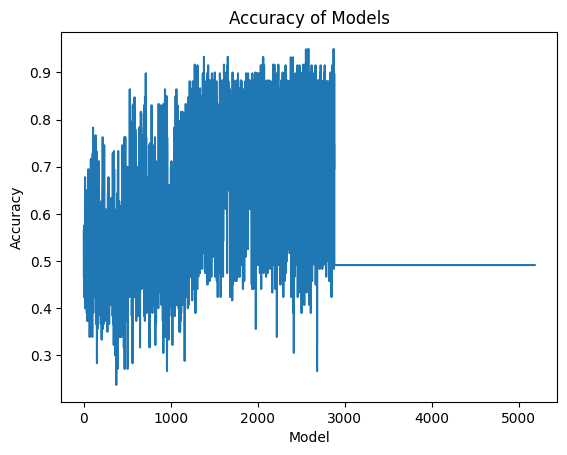

In [45]:
best_accuracy = 0.0
best_hyperparameters = None

for i, lr in enumerate(learning_rate):
  for m, mt in enumerate(momentum):
    for j1, hs1 in enumerate(hidden_size1):
      for j2, hs2 in enumerate(hidden_size2):
        for j3, hs3 in enumerate(hidden_size3):
          for w, wd in enumerate(weight_decay):
              model = MLP3(input_size, hs1, hs2, hs3, output_size)  # Create a new model for each combination
              optimizer = optim.SGD(model.parameters(), lr=lr, momentum=mt, weight_decay=wd)

              model.train()

              epochs = 50

              for epoch in range(epochs):
                y_pred = model(X_train)
                loss = criterion(y_pred, y_train)

          #Backpropagation

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                if (epoch + 1) % 10 == 0:
                        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

              with torch.no_grad():
                model.eval()
                output = model(X_test)
                predictions = (outputs > 0.5).float()
                accuracy = accuracy_score(y_test.numpy(), predictions.numpy())
                accuracy_values.append(accuracy)
                precision = precision_score(y_test.numpy(), predictions.numpy())
                recall = recall_score(y_test.numpy(), predictions.numpy())
                f1 = f1_score(y_test.numpy(), predictions.numpy())
                print(f'Accuracy on the test set: {accuracy:.4f}')
                print(f'Precision: {precision:.4f}')
                print(f'Recall: {recall:.4f}')
                print(f'F1 Score: {f1:.4f}')

              if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_hyperparameters = (lr, mt, hs1, wd)

print("Best Accuracy:", best_accuracy)
print("Best Hyperparameters:", best_hyperparameters)

plt.plot(accuracy_values)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()



MLP with 3 Hidden Layers and Cross Validation

We will now build the Support Vector Machine Model

We will Start by Splitting the data

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Now we will set the hyperparameters, create the model, conduct a grid search with the hyperparameters, choose the most appropriate hyperparameter, preict on the test set and conduct the accuracy scores

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Parameter grid
param_grid = {
    'C':[0.01, 0.1, 1, 10, 100],
    'kernel' : ['linear', 'rbf', 'poly'],
    'gamma' : ['scale', 'auto'],
    'class_weight': [None, 'balanced', {0: 1, 1: 10}]
}

#Create the SVC model
svm_model = SVC(random_state=42)

#Create GridSearchCV instance
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

#Perform grid search
grid_search.fit(X_train, y_train)

#Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#Predict on the test set using the best model
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.4f}')
print(f'Best hyperparameters: {best_params}')

Accuracy on test set: 0.7167
Best hyperparameters: {'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}


Now we will plot the results of the SVC


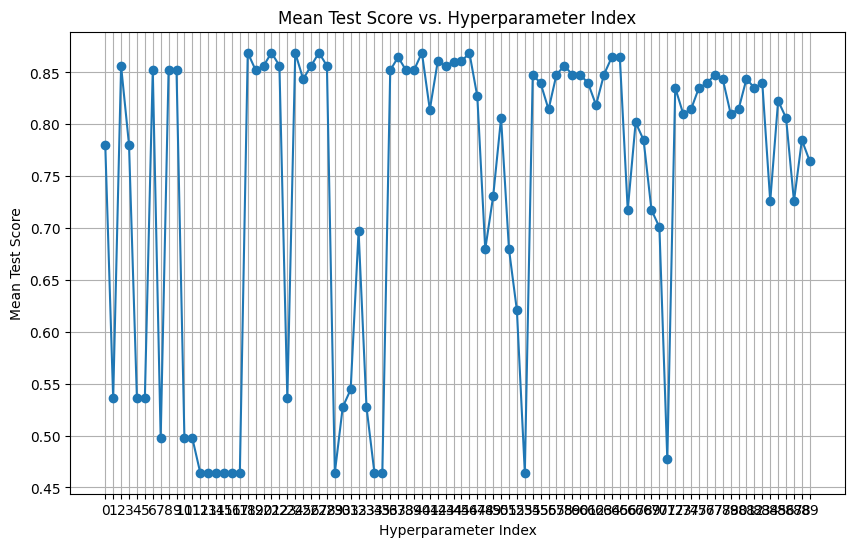

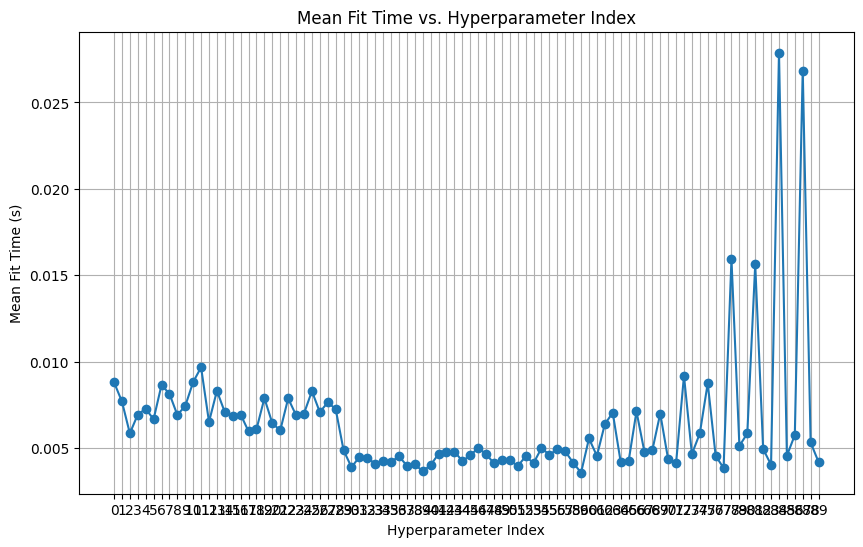

In [51]:
import matplotlib.pyplot as plt

# Extract the mean test scores and fit times
mean_test_scores = grid_search.cv_results_['mean_test_score']
mean_fit_times = grid_search.cv_results_['mean_fit_time']

# Plot accuracy vs. hyperparameters
plt.figure(figsize=(10, 6))
plt.plot(mean_test_scores, marker='o')
plt.title('Mean Test Score vs. Hyperparameter Index')
plt.xlabel('Hyperparameter Index')
plt.ylabel('Mean Test Score')
plt.xticks(range(len(mean_test_scores)), range(len(mean_test_scores)))
plt.grid(True)
plt.show()

# Plot training time vs. hyperparameters
plt.figure(figsize=(10, 6))
plt.plot(mean_fit_times, marker='o')
plt.title('Mean Fit Time vs. Hyperparameter Index')
plt.xlabel('Hyperparameter Index')
plt.ylabel('Mean Fit Time (s)')
plt.xticks(range(len(mean_fit_times)), range(len(mean_fit_times)))
plt.grid(True)
plt.show()